In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import metrics
import random
import statistics

In [2]:
df_train = pd.read_csv('acc_vred.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
df_train

annual_inc  fico_score  term  loan_amnt  home_ownership  int_rate  \
0         0.003442    0.530786   1.0   0.278481        0.666667  0.179907   
1         0.005000    0.828025   0.0   0.189873        0.666667  0.000389   
2         0.009684    0.509554   0.0   0.696203        0.666667  0.100857   
3         0.003273    0.233546   0.0   0.315190        1.000000  0.488707   
4         0.007273    0.573248   1.0   0.518987        0.666667  0.247664   
...            ...         ...   ...        ...             ...       ...   
269355    0.005637    0.276008   1.0   0.594937        0.000000  0.291277   
269356    0.004491    0.318471   1.0   0.351899        1.000000  0.221184   
269357    0.011365    0.254777   1.0   0.797468        0.666667  0.338006   
269358    0.008637    0.467091   1.0   0.908861        0.000000  0.357477   
269359    0.014274    0.530786   1.0   0.797468        0.666667  0.357477   

        all_util      dti  
0       0.161850  0.00826  
1       0.248555  0.01553  
2       0.000000  0.03137  
3       0.000000  0.00680  
4       0.000000  0.02169  
...          ...      ...  
269355  0.294798  0.01546  
269356  0.369942  0.01485  
269357  0.260116  0.03089  
269358  0.456647  0.02250  
269359  0.213873  0.01134  

[269360 rows x 8 columns]

In [157]:
df_pred_full = pd.read_csv('acc_2_pred_final.csv.gz',
                           compression='gzip',
                           header=0,
                           sep=',',
                           quotechar='"')
df_pred_full

loan_amnt  funded_amnt_inv  term  int_rate  installment     grade  \
0        0.612658         0.617500   0.0  0.260125     0.472658  0.333333   
1        0.493671         0.500000   1.0  0.213006     0.245424  0.166667   
2        0.250633         0.260000   1.0  0.667445     0.161740  0.833333   
3        0.289873         0.298750   0.0  0.316589     0.229315  0.333333   
4        0.022785         0.035000   0.0  0.294782     0.019398  0.333333   
...           ...              ...   ...       ...          ...       ...   
674044   1.000000         0.999375   1.0  0.400312     0.556929  0.333333   
674045   0.367089         0.375000   0.0  0.201713     0.277556  0.166667   
674046   0.731646         0.735000   1.0  0.338006     0.392732  0.333333   
674047   0.392405         0.400000   1.0  0.291277     0.204201  0.333333   
674048   0.594937         0.600000   1.0  0.357477     0.322748  0.333333   

        sub_grade  emp_length  home_ownership  annual_inc  ...  \
0        0.294118    1.000000        0.666667    0.006806  ...   
1        0.235294    1.000000        0.666667    0.006597  ...   
2        0.735294    0.363636        0.666667    0.010935  ...   
3        0.352941    0.454545        0.000000    0.003560  ...   
4        0.323529    0.363636        0.666667    0.006702  ...   
...           ...         ...             ...         ...  ...   
674044   0.411765    0.090909        0.666667    0.023037  ...   
674045   0.205882    0.818182        0.666667    0.006283  ...   
674046   0.352941    0.909091        0.666667    0.018931  ...   
674047   0.294118    1.000000        0.000000    0.015707  ...   
674048   0.382353    0.636364        0.000000    0.011518  ...   

        purpose_moving  purpose_other  purpose_renewable_energy  \
0                  0.0            0.0                       0.0   
1                  0.0            0.0                       0.0   
2                  0.0            0.0                       0.0   
3                  0.0            0.0                       0.0   
4                  0.0            1.0                       0.0   
...                ...            ...                       ...   
674044             0.0            0.0                       0.0   
674045             0.0            0.0                       0.0   
674046             0.0            0.0                       0.0   
674047             0.0            0.0                       0.0   
674048             0.0            0.0                       0.0   

        purpose_small_business  purpose_vacation  purpose_wedding  \
0                          1.0               0.0              0.0   
1                          0.0               0.0              0.0   
2                          0.0               0.0              0.0   
3                          0.0               0.0              0.0   
4                          0.0               0.0              0.0   
...                        ...               ...              ...   
674044                     0.0               0.0              0.0   
674045                     0.0               0.0              0.0   
674046                     0.0               0.0              0.0   
674047                     0.0               0.0              0.0   
674048                     0.0               0.0              0.0   

        initial_list_status_w   total_pymnt  funded_amnt       roi  
0                         1.0  25679.660000      24700.0  0.039662  
1                         1.0  22705.924294      20000.0  0.135296  
2                         1.0  11740.500000      10400.0  0.128894  
3                         1.0  13708.948530      11950.0  0.147192  
4                         1.0   1575.160698       1400.0  0.125115  
...                       ...           ...          ...       ...  
674044                    0.0  42089.416411      40000.0  0.052235  
674045                    0.0  15908.001163      15000.0  0.060533  
674046                    0.0  3584

In [4]:
df_pred = df_pred_full[list(df_train.columns)]

In [5]:
df_pred

annual_inc  fico_score  term  loan_amnt  home_ownership  int_rate  \
0         0.006806    0.445860   0.0   0.612658        0.666667  0.260125   
1         0.006597    0.360934   1.0   0.493671        0.666667  0.213006   
2         0.010935    0.360934   1.0   0.250633        0.666667  0.667445   
3         0.003560    0.339703   0.0   0.289873        0.000000  0.316589   
4         0.006702    0.382166   0.0   0.022785        0.666667  0.294782   
...            ...         ...   ...        ...             ...       ...   
674044    0.023037    0.445860   1.0   1.000000        0.666667  0.400312   
674045    0.006283    0.297240   0.0   0.367089        0.666667  0.201713   
674046    0.018931    0.403397   1.0   0.731646        0.666667  0.338006   
674047    0.015707    0.233546   1.0   0.392405        0.000000  0.291277   
674048    0.011518    0.212314   1.0   0.594937        0.000000  0.357477   

        all_util      dti  
0       0.150754  0.01706  
1       0.331658  0.01178  
2       0.396985  0.02637  
3       0.386935  0.01120  
4       0.341709  0.03595  
...          ...      ...  
674044  0.140704  0.01188  
674045  0.185930  0.02740  
674046  0.346734  0.02303  
674047  0.381910  0.01325  
674048  0.371859  0.01930  

[674049 rows x 8 columns]

In [6]:
target_train = pd.read_csv('target_2_train_feateng_dwnsmpl.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
target_train.loan_status_binary.value_counts()

0    134680
1    134680
Name: loan_status_binary, dtype: int64

In [7]:
target_pred = pd.read_csv('target_2_pred_final.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
target_pred.loan_status_binary.value_counts()

0    539369
1    134680
Name: loan_status_binary, dtype: int64

In [8]:
df_fund_train= pd.read_csv('acc_fund_info.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
df_fund_train

funded_amnt   total_pymnt
0            2000.0   2499.418453
1            6000.0   7025.750091
2            4800.0   6361.003877
3           25000.0  27886.391190
4            8000.0   9448.774393
...             ...           ...
269355      24000.0  11031.190000
269356      14400.0   3677.170000
269357      32000.0   8403.350000
269358      36400.0   2539.420000
269359      32000.0   3737.940000

[269360 rows x 2 columns]

In [9]:
df_fund_train['funded_amnt'].mean()

14823.051306801306

In [10]:
df_fund_pred = df_pred_full[list(df_fund_train.columns)]

In [11]:
df_fund_pred

funded_amnt   total_pymnt
0           24700.0  25679.660000
1           20000.0  22705.924294
2           10400.0  11740.500000
3           11950.0  13708.948530
4            1400.0   1575.160698
...             ...           ...
674044      40000.0  42089.416411
674045      15000.0  15908.001163
674046      29400.0  35848.764532
674047      16000.0  18660.607569
674048      24000.0   6755.400000

[674049 rows x 2 columns]

In [12]:
df_fund_pred['roi'] = (df_fund_pred.total_pymnt-df_fund_pred.funded_amnt)/df_fund_pred.funded_amnt
df_fund_pred['label'] = target_pred.loan_status_binary
df_fund_pred

<ipython-input-12-2085cad1e305>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fund_pred['roi'] = (df_fund_pred.total_pymnt-df_fund_pred.funded_amnt)/df_fund_pred.funded_amnt
<ipython-input-12-2085cad1e305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fund_pred['label'] = target_pred.loan_status_binary


funded_amnt   total_pymnt       roi  label
0           24700.0  25679.660000  0.039662      0
1           20000.0  22705.924294  0.135296      0
2           10400.0  11740.500000  0.128894      0
3           11950.0  13708.948530  0.147192      0
4            1400.0   1575.160698  0.125115      0
...             ...           ...       ...    ...
674044      40000.0  42089.416411  0.052235      0
674045      15000.0  15908.001163  0.060533      0
674046      29400.0  35848.764532  0.219346      0
674047      16000.0  18660.607569  0.166288      0
674048      24000.0   6755.400000 -0.718525      1

[674049 rows x 4 columns]

In [13]:
df_fund_pred.describe()

funded_amnt    total_pymnt            roi          label
count  674049.000000  674049.000000  674049.000000  674049.000000
mean    14399.696387   14812.475528       0.033896       0.199807
std      8703.785691   10338.177714       0.291480       0.399856
min       500.000000       0.000000      -1.000000       0.000000
25%      8000.000000    6837.340000       0.035404       0.000000
50%     12000.000000   12120.801933       0.113155       0.000000
75%     20000.000000   20576.306870       0.187218       0.000000
max     40000.000000   62884.797382       1.170300       1.000000

In [14]:
df_fund_pred.loc[df_fund_pred.label == 1].loc[df_fund_pred.roi > 0]

funded_amnt  total_pymnt       roi  label
14          16000.0     17396.63  0.087289      1
60          16000.0     19028.76  0.189297      1
165         10400.0     10784.00  0.036923      1
360          5000.0      5256.93  0.051386      1
591         15000.0     16428.53  0.095235      1
...             ...          ...       ...    ...
671228      16000.0     17713.57  0.107098      1
672670       5325.0      5331.36  0.001194      1
673227      25000.0     29131.62  0.165265      1
673306      10800.0     23439.24  1.170300      1
673625       3600.0      4081.05  0.133625      1

[9542 rows x 4 columns]

In [16]:
target_train = pd.read_csv('target_2_train_feateng_dwnsmpl.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
target_train.head()

loan_status_binary
0                   0
1                   0
2                   0
3                   0
4                   0

In [17]:
# spliting to train-test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, target_train,
                                                    test_size=0.2, random_state=0)
# Must flatten to fit
y_train = y_train.values.flatten()

X_train

annual_inc  fico_score  term  loan_amnt  home_ownership  int_rate  \
171006    0.005455    0.403397   0.0   0.351899        0.666667  0.415888   
269017    0.004200    0.233546   1.0   0.412658        0.000000  0.778037   
50978     0.007728    0.488323   0.0   0.367089        0.000000  0.000389   
133279    0.003439    0.445860   0.0   0.240506        0.666667  0.139798   
38864     0.005455    0.297240   1.0   0.658228        1.000000  0.713396   
...            ...         ...   ...        ...             ...       ...   
211543    0.005228    0.276008   1.0   0.713924        0.000000  0.655763   
86293     0.003637    0.297240   1.0   0.240506        1.000000  0.747274   
122579    0.003637    0.700637   0.0   0.149367        0.666667  0.000389   
152315    0.011819    0.233546   1.0   0.334177        0.000000  0.540498   
117952    0.006046    0.339703   0.0   0.240506        0.666667  0.393302   

        all_util      dti  
171006  0.000000  0.03024  
269017  0.364162  0.03432  
50978   0.161850  0.00838  
133279  0.000000  0.02549  
38864   0.000000  0.02184  
...          ...      ...  
211543  0.000000  0.03202  
86293   0.000000  0.01533  
122579  0.213873  0.02203  
152315  0.000000  0.00764  
117952  0.317919  0.02729  

[215488 rows x 8 columns]

In [165]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.set_params(random_state=0)

grid_para_rf = [{
    "criterion": ["entropy"],
    "min_samples_leaf": [5],
    "min_samples_split": [2],
    "n_estimators":[500],
    "max_depth":[50]
}]

gs_rf = GridSearchCV(rf, grid_para_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose = 1)

%time gs_rf.fit(X_train, y_train)

# create dataframe from array of predictions
predict_rf = pd.DataFrame([gs_rf.best_estimator_.predict(df_pred)])

# transpose dataframe as it will come out as 1 long row
predict_rf = predict_rf.T

# rename column
predict_rf.columns = ['Label']

print('\nprediction accuracy:',round(accuracy_score(target_pred, predict_rf), 5))

confusion_matrix(target_pred, predict_rf)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 3min 53s

prediction accuracy: 0.64976


array([[350935, 188434],
       [ 47644,  87036]], dtype=int64)

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# roc_auc_score =
grid_para_boost = [{
    "min_samples_leaf": [10],
    "n_estimators":[500],
#     "subsample":[0.25,0.5,1.0],
#     "criterion":["friedman_mse", "mae"],
#     "min_samples_split": np.linspace(start=2, stop=30, num=5, dtype=int),
    "min_samples_split": [30],
    "max_depth": [5],
    "random_state":[0]}]

gs_gb = GridSearchCV(gbm, grid_para_boost, scoring= 'roc_auc', cv=5, n_jobs = -1, verbose=2)

%time gs_gb.fit(X_train, y_train)

# create dataframe from array of predictions
predict_gb = pd.DataFrame([gs_gb.best_estimator_.predict(df_pred)])

# transpose dataframe as it will come out as 1 long row
predict_gb = predict_gb.T

# rename column
predict_gb.columns = ['Label']

print('\nprediction accuracy:',round(accuracy_score(target_pred, predict_gb), 5))

confusion_matrix(target_pred, predict_gb)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 4min 30s

prediction accuracy: 0.65782


array([[356729, 182640],
       [ 48003,  86677]], dtype=int64)

In [167]:
import xgboost
from sklearn import model_selection as ms

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=0, shuffle=True)

xgb_clsfr = xgboost.XGBClassifier()

objective_ = ['binary:logistic']
evalmetric = ['auc']
uselabelencoder = [False]
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
njobs = [-1]
randomstate = [0]
booster_ = ['gbtree']

nestimators = [400]
minchildweight = [11]
maxdepth = [7]
learningrate = [0.025]
gamma_ = [1.75]
subsample_ = [0.8]
colsamplebytree = [0.6]

gparam_xgb = {'objective': objective_,
              'eval_metric': evalmetric,
              'use_label_encoder': uselabelencoder,
              'tree_method': treemethod,
              'predictor': predictor_,
              'n_jobs': njobs,
              'booster': booster_,
              'n_estimators': nestimators,
              'min_child_weight': minchildweight,
              'max_depth': maxdepth,
              'learning_rate': learningrate,
              'gamma': gamma_,
              'subsample': subsample_,
              'colsample_bytree': colsamplebytree,
              'random_state': randomstate}

gs_xgb = ms.GridSearchCV(xgb_clsfr, gparam_xgb, cv=n_folds, refit=True,
                          scoring='roc_auc', return_train_score=True, verbose=1)

%time gs_xgb.fit(X_train, y_train)

# create dataframe from array of predictions
predict_xgb = pd.DataFrame([gs_xgb.best_estimator_.predict(df_pred)])

# transpose dataframe as it will come out as 1 long row
predict_xgb = predict_xgb.T

# rename column
predict_xgb.columns = ['Label']

print('\nprediction accuracy:',round(accuracy_score(target_pred, predict_xgb), 5))

confusion_matrix(target_pred, predict_xgb)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 18.7 s

prediction accuracy: 0.65776


array([[356056, 183313],
       [ 47374,  87306]], dtype=int64)

In [186]:
optimum_rf = gs_rf.best_estimator_
predictiions_rf = optimum_rf.predict(df_pred)

optimum_gb = gs_gb.best_estimator_
predictions_gb = optimum_gb.predict(df_pred)

optimum_xgb = gs_xgb.best_estimator_
predictions_xgb = optimum_xgb.predict(df_pred)

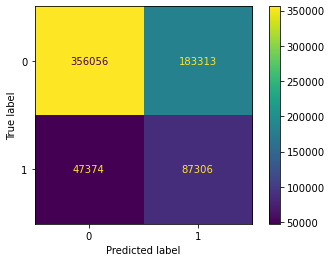

In [169]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(optimum_xgb, df_pred, target_pred)

# Calculate ROI for all 4 quadrants and compare

In [171]:
df_fund_pred_label = df_fund_pred[['label']]
df_fund_pred_label

label
0           0
1           0
2           0
3           0
4           0
...       ...
674044      0
674045      0
674046      0
674047      0
674048      1

[674049 rows x 1 columns]

In [173]:
ypred_rf = predictions_rf.reshape(674049, 1)

# predicted as default and actually default
true_pos_rf = np.logical_and(df_fund_pred_label == ypred_rf, ypred_rf == 1)

# predicted as default, but fully paid
false_pos_rf = np.logical_and(df_fund_pred_label != ypred_rf, ypred_rf == 1)

# predicted as paid off and actually paid off
true_neg_rf = np.logical_and(df_fund_pred_label == ypred_rf, ypred_rf == 0)

# predicted as paid off, but default
false_neg_rf = np.logical_and(df_fund_pred_label != ypred_rf, ypred_rf == 0)

# getting indices of the above
true_pos_rf_index = list(true_pos_rf[true_pos_rf['label']==True].index)
false_pos_rf_index = list(false_pos_rf[false_pos_rf['label']==True].index)
true_neg_rf_index = list(true_neg_rf[true_neg_rf['label']==True].index)
false_neg_rf_index = list(false_neg_rf[false_neg_rf['label']==True].index)

# calculated mean using 'roi' column for each quadrant
print('The ROI for the true positive quadrant is:')
print(df_fund_pred.iloc[true_pos_rf_index][['roi']].mean())
print('\n')
print('The ROI for the false positive quadrant is:')
print(df_fund_pred.iloc[false_pos_rf_index][['roi']].mean())
print('\n')
print('The ROI for the true negative quadrant is:')
print(df_fund_pred.iloc[true_neg_rf_index][['roi']].mean())
print('\n')
print('The ROI for the false negative quadrant is:')
df_fund_pred.iloc[false_neg_rf_index][['roi']].mean()

The ROI for the true positive quadrant is:
roi   -0.474784
dtype: float64


The ROI for the false positive quadrant is:
roi    0.210653
dtype: float64


The ROI for the true negative quadrant is:
roi    0.127648
dtype: float64


The ROI for the false negative quadrant is:


roi   -0.426485
dtype: float64

In [175]:
ypred_gb = predictions_gb.reshape(674049, 1)

# predicted as default and actually default
true_pos_gb = np.logical_and(df_fund_pred_label == ypred_gb, ypred_gb == 1)

# predicted as default, but fully paid
false_pos_gb = np.logical_and(df_fund_pred_label != ypred_gb, ypred_gb == 1)

# predicted as paid off and actually paid off
true_neg_gb = np.logical_and(df_fund_pred_label == ypred_gb, ypred_gb == 0)

# predicted as paid off, but default
false_neg_gb = np.logical_and(df_fund_pred_label != ypred_gb, ypred_gb == 0)

# getting indices of the above
true_pos_gb_index = list(true_pos_gb[true_pos_gb['label']==True].index)
false_pos_gb_index = list(false_pos_gb[false_pos_gb['label']==True].index)
true_neg_gb_index = list(true_neg_gb[true_neg_gb['label']==True].index)
false_neg_gb_index = list(false_neg_gb[false_neg_gb['label']==True].index)

# calculated mean using 'roi' column for each quadrant
print('The ROI for the true positive quadrant is:')
print(df_fund_pred.iloc[true_pos_gb_index][['roi']].mean())
print('\n')
print('The ROI for the false positive quadrant is:')
print(df_fund_pred.iloc[false_pos_gb_index][['roi']].mean())
print('\n')
print('The ROI for the true negative quadrant is:')
print(df_fund_pred.iloc[true_neg_gb_index][['roi']].mean())
print('\n')
print('The ROI for the false negative quadrant is:')
df_fund_pred.iloc[false_neg_gb_index][['roi']].mean()

The ROI for the true positive quadrant is:
roi   -0.476014
dtype: float64


The ROI for the false positive quadrant is:
roi    0.211816
dtype: float64


The ROI for the true negative quadrant is:
roi    0.128401
dtype: float64


The ROI for the false negative quadrant is:


roi   -0.424624
dtype: float64

In [176]:
ypred_xgb = predictions_xgb.reshape(674049, 1)

# predicted as default and actually default
true_pos_xgb = np.logical_and(df_fund_pred_label == ypred_xgb, ypred_xgb == 1)

# predicted as default, but fully paid
false_pos_xgb = np.logical_and(df_fund_pred_label != ypred_xgb, ypred_xgb == 1)

# predicted as paid off and actually paid off
true_neg_xgb = np.logical_and(df_fund_pred_label == ypred_xgb, ypred_xgb == 0)

# predicted as paid off, but default
false_neg_xgb = np.logical_and(df_fund_pred_label != ypred_xgb, ypred_xgb == 0)

# getting indices of the above
true_pos_xgb_index = list(true_pos_xgb[true_pos_xgb['label']==True].index)
false_pos_xgb_index = list(false_pos_xgb[false_pos_xgb['label']==True].index)
true_neg_xgb_index = list(true_neg_xgb[true_neg_xgb['label']==True].index)
false_neg_xgb_index = list(false_neg_xgb[false_neg_xgb['label']==True].index)

# calculated mean using 'roi' column for each quadrant
print('The ROI for the true positive quadrant is:')
print(df_fund_pred.iloc[true_pos_xgb_index][['roi']].mean())
print('\n')
print('The ROI for the false positive quadrant is:')
print(df_fund_pred.iloc[false_pos_xgb_index][['roi']].mean())
print('\n')
print('The ROI for the true negative quadrant is:')
print(df_fund_pred.iloc[true_neg_xgb_index][['roi']].mean())
print('\n')
print('The ROI for the false negative quadrant is:')
df_fund_pred.iloc[false_neg_xgb_index][['roi']].mean()

The ROI for the true positive quadrant is:
roi   -0.474891
dtype: float64


The ROI for the false positive quadrant is:
roi    0.213639
dtype: float64


The ROI for the true negative quadrant is:
roi    0.127305
dtype: float64


The ROI for the false negative quadrant is:


roi   -0.426013
dtype: float64

In [178]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score_rf = metrics.f1_score(df_fund_pred_label, predict_rf)
recall_score_rf = metrics.recall_score(df_fund_pred_label, predict_rf)
precision_score_rf = metrics.precision_score(df_fund_pred_label, predict_rf)
print ("Random Forest performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score_rf))
print('recall score: {0:0.2f}'.format(recall_score_rf))
print('precision score: {0:0.2f}'.format(precision_score_rf))

Random Forest performance
----------------------------------------------------------------------
F1 score: 0.42
recall score: 0.65
precision score: 0.32


In [179]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score_gb = metrics.f1_score(df_fund_pred_label, predict_gb)
recall_score_gb = metrics.recall_score(df_fund_pred_label, predict_gb)
precision_score_gb = metrics.precision_score(df_fund_pred_label, predict_gb)
print ("Gradient Boost performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score_gb))
print('recall score: {0:0.2f}'.format(recall_score_gb))
print('precision score: {0:0.2f}'.format(precision_score_gb))

Gradient Boost performance
----------------------------------------------------------------------
F1 score: 0.43
recall score: 0.64
precision score: 0.32


In [180]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score_xgb = metrics.f1_score(df_fund_pred_label, predict_xgb)
recall_score_xgb = metrics.recall_score(df_fund_pred_label, predict_xgb)
precision_score_xgb = metrics.precision_score(df_fund_pred_label, predict_xgb)
print ("XGBoost performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score_xgb))
print('recall score: {0:0.2f}'.format(recall_score_xgb))
print('precision score: {0:0.2f}'.format(precision_score_xgb))

XGBoost performance
----------------------------------------------------------------------
F1 score: 0.43
recall score: 0.65
precision score: 0.32


In [182]:
# ROC-AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

from sklearn.metrics import roc_auc_score

# RF
print ("Random Forest ROC-AUC score")
print ('-'*70)
roc_auc_score(df_fund_pred_label, predict_rf)

Random Forest ROC-AUC score
----------------------------------------------------------------------


0.6484414303307307

In [183]:
# GB
print ("Gradient boost ROC-AUC score")
print ('-'*70)
roc_auc_score(df_fund_pred_label, predict_gb)

Gradient boost ROC-AUC score
----------------------------------------------------------------------


0.6524797325320947

In [184]:
# XGB
print ("XGBoost ROC-AUC score")
print ('-'*70)
roc_auc_score(df_fund_pred_label, predict_xgb)

XGBoost ROC-AUC score
----------------------------------------------------------------------


0.6541910202070964

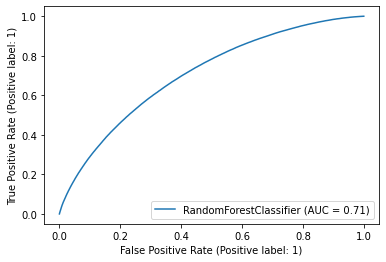

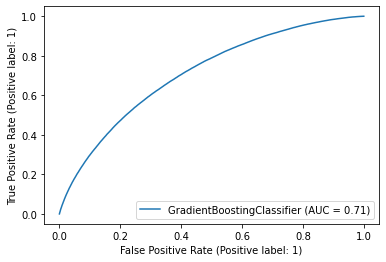

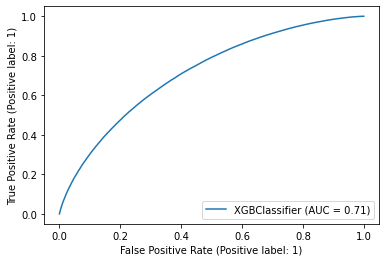

In [187]:
# Receiver operating characteristic (ROC) curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve

from sklearn import metrics
metrics.plot_roc_curve(optimum_rf, df_pred, df_fund_pred_label) 
metrics.plot_roc_curve(optimum_gb, df_pred, df_fund_pred_label) 
metrics.plot_roc_curve(optimum_xgb, df_pred, df_fund_pred_label)

In [193]:
# prediction_df_rf == predict_rf

predict_rf.value_counts()

Label
0        398579
1        275470
dtype: int64

In [194]:
predict_gb.value_counts()

Label
0        404732
1        269317
dtype: int64

In [195]:
predict_xgb.value_counts()

Label
0        403430
1        270619
dtype: int64

In [196]:
df_fund_pred_label

label
0           0
1           0
2           0
3           0
4           0
...       ...
674044      0
674045      0
674046      0
674047      0
674048      1

[674049 rows x 1 columns]

In [201]:
paid_off_index_rf = list(predict_rf.loc[predict_rf['Label']== 0,:].index)
paid_off_index_gb = list(predict_gb.loc[predict_gb['Label']== 0,:].index)
paid_off_index_xgb = list(predict_xgb.loc[ predict_xgb['Label']== 0,:].index)

all_index = list(df_pred.index)

In [202]:
#RF
# Average ROI analysis using our model

random.seed(0)

n_loans = 5       # number of loans to invest by an average investor
n_iter = 10000      # number of of investors to average over-1
ROI_rf = []
for i in range(n_iter):
    random_list = random.sample(paid_off_index_rf, n_loans)
    for j in random_list:
        funded = np.sum(df_fund_pred.iloc[j,0])
        paid = np.sum(df_fund_pred.iloc[j,1])
    ROI_rf.append((paid-funded)/funded)
print('-'* 50)
print('average of ROI using xgb model in percentage :')
print(statistics.mean(ROI_rf)*100)

--------------------------------------------------
average of ROI using xgb model in percentage :
6.462554832201047


In [214]:
# Average ROI analysis using our model

random.seed(0)

n_loans = 5       # number of loans to invest by an average investor
n_iter = 10000      # number of of investors to average over-1
ROI_gb = []
for i in range(n_iter):
    funded = 0
    paid = 0
    random_list = random.sample(paid_off_index_gb, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    ROI_gb.append((paid-funded)/funded)
print('-'* 50)
print('average of ROI using our model in percentage :')
print(statistics.mean(ROI_gb)*100)

--------------------------------------------------
average of ROI using our model in percentage :
6.342427937033284


In [206]:
#XGB
# Average ROI analysis using our model

random.seed(0)

n_loans = 5       # number of loans to invest by an average investor
n_iter = 10000      # number of of investors to average over-1
ROI_xgb = []
for i in range(n_iter):
    funded = 0
    paid = 0
    random_list = random.sample(paid_off_index_xgb, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    ROI_xgb.append((paid-funded)/funded)
print('-'* 50)
print('average of ROI using xgb model in percentage :')
print(statistics.mean(ROI_xgb)*100)

--------------------------------------------------
average of ROI using xgb model in percentage :
6.411164888005841


In [207]:
# Average ROI analysis NOT using our model

random.seed(0)

n_loans = 5       # number of loans to invest by an average investor
n_iter = 10000      # number of of investors to average over-1
ROI_n = []
for i in range(n_iter):
    funded = 0
    paid = 0
    random_list = random.sample(all_index, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    ROI_n.append((paid-funded)/funded)
print('-'* 50)
print('average of ROI NOT using our model in percentage :')
print(statistics.mean(ROI_n)*100)

--------------------------------------------------
average of ROI NOT using our model in percentage :
3.02681538622336


In [209]:
# General ROI analysis using our model

funded = 0
paid = 0
for i in paid_off_index_rf:
        funded = funded + df_fund_pred.iloc[i,0]
        paid = paid + df_fund_pred.iloc[i,1]
ROI_rf = (paid-funded)/funded
print('-'* 50)
print('ROI using our model in percentage :')
print(ROI_rf*100)

--------------------------------------------------
ROI using our model in percentage :
6.23825670011101


In [210]:
# General ROI analysis using our model

funded = 0
paid = 0
for i in paid_off_index_gb:
        funded = funded + df_fund_pred.iloc[i,0]
        paid = paid + df_fund_pred.iloc[i,1]
ROI = (paid-funded)/funded
print('-'* 50)
print('ROI using our model in percentage :')
print(ROI*100)

--------------------------------------------------
ROI using our model in percentage :
6.390916526009319


In [211]:
# General ROI analysis using our model
funded_xgb = 0
paid_xgb = 0
for i in paid_off_index_xgb:
        funded_xgb = funded_xgb + df_fund_pred.iloc[i,0]
        paid_xgb = paid_xgb + df_fund_pred.iloc[i,1]
ROI_xgb = (paid_xgb-funded_xgb)/funded_xgb
print('-'* 50)
print('ROI using our model in percentage :')
print(ROI_xgb*100)

--------------------------------------------------
ROI using our model in percentage :
6.32944314859984


In [212]:
# General ROI analysis NOT using our model
funded = 0
paid = 0
for i in all_index:
        funded = funded + df_fund_pred.iloc[i,0]
        paid = paid + df_fund_pred.iloc[i,1]
ROI = (paid-funded)/funded
print('-'* 50)
print('ROI NOT using our model in percentage :')
print(ROI*100)

--------------------------------------------------
ROI NOT using our model in percentage :
2.8665822504442433


<AxesSubplot:ylabel='Frequency'>

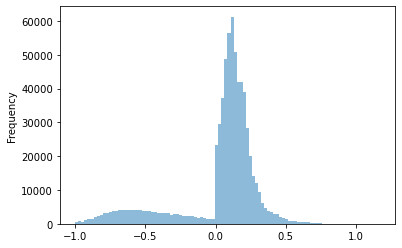

In [213]:
df_fund_pred.roi.plot.hist(bins=100, alpha=0.5)

In [50]:
# Average ROI analysis  for $10,000 investment

random.seed(0)

n_loans = 2       # number of loans to invest by an average investor
n_iter = 10000      # number of of investors to average over-1
investment = 10000 # investment value in dollars

ROI_rf = []
i=0
while i <= n_iter:
    random_list = random.sample(paid_off_index_rf, n_loans)
    for j in random_list:
        funded_rf = np.sum(df_fund_pred.iloc[j,0])
        paid_rf = np.sum(df_fund_pred.iloc[j,1])
    if funded_rf <= investment:
        ROI_rf.append((paid_rf-funded_rf)/funded_rf)
        i = i+1

ROI = []
i=0
while i <= n_iter:
    funded = 0
    paid = 0
    random_list = random.sample(paid_off_index_gb, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    if funded <= investment:
        ROI.append((paid-funded)/funded)
        i = i+1
        
ROI_xgb = []
i=0
while i <= n_iter:
    funded_xgb = 0
    paid_xgb = 0
    random_list = random.sample(paid_off_index_xgb, n_loans)
    for j in random_list:
        funded_xgb = funded_xgb + df_fund_pred.iloc[j,0]
        paid_xgb = paid_xgb + df_fund_pred.iloc[j,1]
    if funded_xgb <= investment:
        ROI_xgb.append((paid_xgb-funded_xgb)/funded_xgb)
        i = i+1

ROI_n = []
i=0
while i <= n_iter:
    funded = 0
    paid = 0
    random_list = random.sample(all_index, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    if funded <= investment:
        ROI_n.append((paid-funded)/funded)
        i = i+1
        
        
        
print('-'* 50)
print('average of ROI using our Random Forest model in percentage :')
print(statistics.mean(ROI_rf)*100)
print('average of ROI using our Gradient Boosting model in percentage :')
print(statistics.mean(ROI)*100)
print('average of ROI using our XGBoost model in percentage :')
print(statistics.mean(ROI_xgb)*100)
print('average of ROI NOT using our model in percentage :')
print(statistics.mean(ROI_n)*100)

--------------------------------------------------
average of ROI using our Random Forest model in percentage :
5.806645659569226
average of ROI using our Gradient Boosting model in percentage :
6.09153407953905
average of ROI using our XGBoost model in percentage :
6.01198796264352
average of ROI NOT using our model in percentage :
4.884699299831055


In [94]:
import copy

df_fund_rf = copy.deepcopy(df_fund_pred)

df_fund_rf = df_fund_rf.drop('label', axis=1)

df_fund_rf = pd.DataFrame(np.concatenate((df_fund_rf, prediction_df_rf), axis=1))
df_fund_rf.columns = df_fund_pred.columns
                          
df_fund_rf

funded_amnt   total_pymnt       roi  label
0           24700.0  25679.660000  0.039662    0.0
1           20000.0  22705.924294  0.135296    0.0
2           10400.0  11740.500000  0.128894    1.0
3           11950.0  13708.948530  0.147192    1.0
4            1400.0   1575.160698  0.125115    0.0
...             ...           ...       ...    ...
674044      40000.0  42089.416411  0.052235    1.0
674045      15000.0  15908.001163  0.060533    0.0
674046      29400.0  35848.764532  0.219346    1.0
674047      16000.0  18660.607569  0.166288    1.0
674048      24000.0   6755.400000 -0.718525    1.0

[674049 rows x 4 columns]

In [102]:
# Average ROI analysis  for different investment ranges 

random.seed(0)

result = []

for n in [1, 10001, 20001, 30001, 40001, 50001]:
    n_loans = 4       # number of loans to invest by an average investor
    n_iter = 10000     # number of of investors to average over-1
    investment_low = n
    investment_high = n+9999  # investment value in dollars
    
    ROI = []
    i=0
    while i <= n_iter:
        funded = 0
        paid = 0
        random_list = random.sample(paid_off_index_rf, n_loans)
        for j in random_list:
            funded = funded + df_fund_pred.iloc[j,0]
            paid = paid + df_fund_pred.iloc[j,1]
        if funded <= investment_high and funded >= investment_low:
            ROI_rf.append((paid-funded)/funded)
            i = i+1
            print(n, ', ', i, ' rf done')
    
    ROI = []
    i=0
    while i <= n_iter:
        funded = 0
        paid = 0
        random_list = random.sample(paid_off_index, n_loans)
        for j in random_list:
            funded = funded + df_fund_pred.iloc[j,0]
            paid = paid + df_fund_pred.iloc[j,1]
        if funded <= investment_high and funded >= investment_low:
            ROI.append((paid-funded)/funded)
            i = i+1
            print(n, ', ', i, ' gb done')
    
    ROI_xgb = []
    i=0
    while i <= n_iter:
        funded = 0
        paid = 0
        random_list = random.sample(paid_off_index_xgb, n_loans)
        for j in random_list:
            funded = funded + df_fund_pred.iloc[j,0]
            paid = paid + df_fund_pred.iloc[j,1]
        if funded <= investment_high and funded >= investment_low:
            ROI_xgb.append((paid-funded)/funded)
            i = i+1
            print(n, ', ', i, ' xgb done')
            
    ROI_n = []
    i=0
    while i <= n_iter:
        funded = 0
        paid = 0
        random_list = random.sample(all_index, n_loans)
        for j in random_list:
            funded = funded + df_fund_pred.iloc[j,0]
            paid = paid + df_fund_pred.iloc[j,1]
        if funded <= investment_high and funded >= investment_low:
            ROI_n.append((paid-funded)/funded)
            i = i+1
            print(n, ', ', i, ' n done')
    
    print('-'* 50)
    print('average of ROI for $%d investement using our Random Fores model in percentage :'%n) 
    print(statistics.mean(ROI_rf)*100)
    print('average of ROI for $%d investement using our Gradient Boosting model in percentage :'%n) 
    print(statistics.mean(ROI)*100)
    print('average of ROI for $%d investement using our XGBoost model in percentage :'%n) 
    print(statistics.mean(ROI_xgb)*100)
    print('average of ROI for $%d investement NOT using our model in percentage :'%n )
    print(statistics.mean(ROI_n)*100)
    
    temp = (statistics.mean(ROI_n),statistics.mean(ROI_rf),
            statistics.mean(ROI),statistics.mean(ROI_xgb))
    result.append(temp)
    
result = pd.DataFrame(result,columns=['Naive Sampling','Random Forest Model',
                                      'Gradient Boosting Model','XGBoosting Model'])
result

1 ,  1  rf done
1 ,  2  rf done
1 ,  3  rf done
1 ,  4  rf done
1 ,  5  rf done
1 ,  6  rf done
1 ,  7  rf done
1 ,  8  rf done
1 ,  9  rf done
1 ,  10  rf done
1 ,  11  rf done
1 ,  12  rf done
1 ,  13  rf done
1 ,  14  rf done
1 ,  15  rf done
1 ,  16  rf done
1 ,  17  rf done
1 ,  18  rf done
1 ,  19  rf done
1 ,  20  rf done
1 ,  21  rf done
1 ,  22  rf done
1 ,  23  rf done
1 ,  24  rf done
1 ,  25  rf done
1 ,  26  rf done
1 ,  27  rf done
1 ,  28  rf done
1 ,  29  rf done
1 ,  30  rf done
1 ,  31  rf done
1 ,  32  rf done
1 ,  33  rf done
1 ,  34  rf done
1 ,  35  rf done
1 ,  36  rf done
1 ,  37  rf done
1 ,  38  rf done
1 ,  39  rf done
1 ,  40  rf done
1 ,  41  rf done
1 ,  42  rf done
1 ,  43  rf done
1 ,  44  rf done
1 ,  45  rf done
1 ,  46  rf done
1 ,  47  rf done
1 ,  48  rf done
1 ,  49  rf done
1 ,  50  rf done
1 ,  51  rf done
1 ,  52  rf done
1 ,  53  rf done
1 ,  54  rf done
1 ,  55  rf done
1 ,  56  rf done
1 ,  57  rf done
1 ,  58  rf done
1 ,  59  rf done
1 ,  6

1 ,  463  rf done
1 ,  464  rf done
1 ,  465  rf done
1 ,  466  rf done
1 ,  467  rf done
1 ,  468  rf done
1 ,  469  rf done
1 ,  470  rf done
1 ,  471  rf done
1 ,  472  rf done
1 ,  473  rf done
1 ,  474  rf done
1 ,  475  rf done
1 ,  476  rf done
1 ,  477  rf done
1 ,  478  rf done
1 ,  479  rf done
1 ,  480  rf done
1 ,  481  rf done
1 ,  482  rf done
1 ,  483  rf done
1 ,  484  rf done
1 ,  485  rf done
1 ,  486  rf done
1 ,  487  rf done
1 ,  488  rf done
1 ,  489  rf done
1 ,  490  rf done
1 ,  491  rf done
1 ,  492  rf done
1 ,  493  rf done
1 ,  494  rf done
1 ,  495  rf done
1 ,  496  rf done
1 ,  497  rf done
1 ,  498  rf done
1 ,  499  rf done
1 ,  500  rf done
1 ,  501  rf done
1 ,  502  rf done
1 ,  503  rf done
1 ,  504  rf done
1 ,  505  rf done
1 ,  506  rf done
1 ,  507  rf done
1 ,  508  rf done
1 ,  509  rf done
1 ,  510  rf done
1 ,  511  rf done
1 ,  512  rf done
1 ,  513  rf done
1 ,  514  rf done
1 ,  515  rf done
1 ,  516  rf done
1 ,  517  rf done
1 ,  518  

1 ,  919  rf done
1 ,  920  rf done
1 ,  921  rf done
1 ,  922  rf done
1 ,  923  rf done
1 ,  924  rf done
1 ,  925  rf done
1 ,  926  rf done
1 ,  927  rf done
1 ,  928  rf done
1 ,  929  rf done
1 ,  930  rf done
1 ,  931  rf done
1 ,  932  rf done
1 ,  933  rf done
1 ,  934  rf done
1 ,  935  rf done
1 ,  936  rf done
1 ,  937  rf done
1 ,  938  rf done
1 ,  939  rf done
1 ,  940  rf done
1 ,  941  rf done
1 ,  942  rf done
1 ,  943  rf done
1 ,  944  rf done
1 ,  945  rf done
1 ,  946  rf done
1 ,  947  rf done
1 ,  948  rf done
1 ,  949  rf done
1 ,  950  rf done
1 ,  951  rf done
1 ,  952  rf done
1 ,  953  rf done
1 ,  954  rf done
1 ,  955  rf done
1 ,  956  rf done
1 ,  957  rf done
1 ,  958  rf done
1 ,  959  rf done
1 ,  960  rf done
1 ,  961  rf done
1 ,  962  rf done
1 ,  963  rf done
1 ,  964  rf done
1 ,  965  rf done
1 ,  966  rf done
1 ,  967  rf done
1 ,  968  rf done
1 ,  969  rf done
1 ,  970  rf done
1 ,  971  rf done
1 ,  972  rf done
1 ,  973  rf done
1 ,  974  

1 ,  1355  rf done
1 ,  1356  rf done
1 ,  1357  rf done
1 ,  1358  rf done
1 ,  1359  rf done
1 ,  1360  rf done
1 ,  1361  rf done
1 ,  1362  rf done
1 ,  1363  rf done
1 ,  1364  rf done
1 ,  1365  rf done
1 ,  1366  rf done
1 ,  1367  rf done
1 ,  1368  rf done
1 ,  1369  rf done
1 ,  1370  rf done
1 ,  1371  rf done
1 ,  1372  rf done
1 ,  1373  rf done
1 ,  1374  rf done
1 ,  1375  rf done
1 ,  1376  rf done
1 ,  1377  rf done
1 ,  1378  rf done
1 ,  1379  rf done
1 ,  1380  rf done
1 ,  1381  rf done
1 ,  1382  rf done
1 ,  1383  rf done
1 ,  1384  rf done
1 ,  1385  rf done
1 ,  1386  rf done
1 ,  1387  rf done
1 ,  1388  rf done
1 ,  1389  rf done
1 ,  1390  rf done
1 ,  1391  rf done
1 ,  1392  rf done
1 ,  1393  rf done
1 ,  1394  rf done
1 ,  1395  rf done
1 ,  1396  rf done
1 ,  1397  rf done
1 ,  1398  rf done
1 ,  1399  rf done
1 ,  1400  rf done
1 ,  1401  rf done
1 ,  1402  rf done
1 ,  1403  rf done
1 ,  1404  rf done
1 ,  1405  rf done
1 ,  1406  rf done
1 ,  1407  r

1 ,  1787  rf done
1 ,  1788  rf done
1 ,  1789  rf done
1 ,  1790  rf done
1 ,  1791  rf done
1 ,  1792  rf done
1 ,  1793  rf done
1 ,  1794  rf done
1 ,  1795  rf done
1 ,  1796  rf done
1 ,  1797  rf done
1 ,  1798  rf done
1 ,  1799  rf done
1 ,  1800  rf done
1 ,  1801  rf done
1 ,  1802  rf done
1 ,  1803  rf done
1 ,  1804  rf done
1 ,  1805  rf done
1 ,  1806  rf done
1 ,  1807  rf done
1 ,  1808  rf done
1 ,  1809  rf done
1 ,  1810  rf done
1 ,  1811  rf done
1 ,  1812  rf done
1 ,  1813  rf done
1 ,  1814  rf done
1 ,  1815  rf done
1 ,  1816  rf done
1 ,  1817  rf done
1 ,  1818  rf done
1 ,  1819  rf done
1 ,  1820  rf done
1 ,  1821  rf done
1 ,  1822  rf done
1 ,  1823  rf done
1 ,  1824  rf done
1 ,  1825  rf done
1 ,  1826  rf done
1 ,  1827  rf done
1 ,  1828  rf done
1 ,  1829  rf done
1 ,  1830  rf done
1 ,  1831  rf done
1 ,  1832  rf done
1 ,  1833  rf done
1 ,  1834  rf done
1 ,  1835  rf done
1 ,  1836  rf done
1 ,  1837  rf done
1 ,  1838  rf done
1 ,  1839  r

1 ,  2219  rf done
1 ,  2220  rf done
1 ,  2221  rf done
1 ,  2222  rf done
1 ,  2223  rf done
1 ,  2224  rf done
1 ,  2225  rf done
1 ,  2226  rf done
1 ,  2227  rf done
1 ,  2228  rf done
1 ,  2229  rf done
1 ,  2230  rf done
1 ,  2231  rf done
1 ,  2232  rf done
1 ,  2233  rf done
1 ,  2234  rf done
1 ,  2235  rf done
1 ,  2236  rf done
1 ,  2237  rf done
1 ,  2238  rf done
1 ,  2239  rf done
1 ,  2240  rf done
1 ,  2241  rf done
1 ,  2242  rf done
1 ,  2243  rf done
1 ,  2244  rf done
1 ,  2245  rf done
1 ,  2246  rf done
1 ,  2247  rf done
1 ,  2248  rf done
1 ,  2249  rf done
1 ,  2250  rf done
1 ,  2251  rf done
1 ,  2252  rf done
1 ,  2253  rf done
1 ,  2254  rf done
1 ,  2255  rf done
1 ,  2256  rf done
1 ,  2257  rf done
1 ,  2258  rf done
1 ,  2259  rf done
1 ,  2260  rf done
1 ,  2261  rf done
1 ,  2262  rf done
1 ,  2263  rf done
1 ,  2264  rf done
1 ,  2265  rf done
1 ,  2266  rf done
1 ,  2267  rf done
1 ,  2268  rf done
1 ,  2269  rf done
1 ,  2270  rf done
1 ,  2271  r

1 ,  2651  rf done
1 ,  2652  rf done
1 ,  2653  rf done
1 ,  2654  rf done
1 ,  2655  rf done
1 ,  2656  rf done
1 ,  2657  rf done
1 ,  2658  rf done
1 ,  2659  rf done
1 ,  2660  rf done
1 ,  2661  rf done
1 ,  2662  rf done
1 ,  2663  rf done
1 ,  2664  rf done
1 ,  2665  rf done
1 ,  2666  rf done
1 ,  2667  rf done
1 ,  2668  rf done
1 ,  2669  rf done
1 ,  2670  rf done
1 ,  2671  rf done
1 ,  2672  rf done
1 ,  2673  rf done
1 ,  2674  rf done
1 ,  2675  rf done
1 ,  2676  rf done
1 ,  2677  rf done
1 ,  2678  rf done
1 ,  2679  rf done
1 ,  2680  rf done
1 ,  2681  rf done
1 ,  2682  rf done
1 ,  2683  rf done
1 ,  2684  rf done
1 ,  2685  rf done
1 ,  2686  rf done
1 ,  2687  rf done
1 ,  2688  rf done
1 ,  2689  rf done
1 ,  2690  rf done
1 ,  2691  rf done
1 ,  2692  rf done
1 ,  2693  rf done
1 ,  2694  rf done
1 ,  2695  rf done
1 ,  2696  rf done
1 ,  2697  rf done
1 ,  2698  rf done
1 ,  2699  rf done
1 ,  2700  rf done
1 ,  2701  rf done
1 ,  2702  rf done
1 ,  2703  r

1 ,  3083  rf done
1 ,  3084  rf done
1 ,  3085  rf done
1 ,  3086  rf done
1 ,  3087  rf done
1 ,  3088  rf done
1 ,  3089  rf done
1 ,  3090  rf done
1 ,  3091  rf done
1 ,  3092  rf done
1 ,  3093  rf done
1 ,  3094  rf done
1 ,  3095  rf done
1 ,  3096  rf done
1 ,  3097  rf done
1 ,  3098  rf done
1 ,  3099  rf done
1 ,  3100  rf done
1 ,  3101  rf done
1 ,  3102  rf done
1 ,  3103  rf done
1 ,  3104  rf done
1 ,  3105  rf done
1 ,  3106  rf done
1 ,  3107  rf done
1 ,  3108  rf done
1 ,  3109  rf done
1 ,  3110  rf done
1 ,  3111  rf done
1 ,  3112  rf done
1 ,  3113  rf done
1 ,  3114  rf done
1 ,  3115  rf done
1 ,  3116  rf done
1 ,  3117  rf done
1 ,  3118  rf done
1 ,  3119  rf done
1 ,  3120  rf done
1 ,  3121  rf done
1 ,  3122  rf done
1 ,  3123  rf done
1 ,  3124  rf done
1 ,  3125  rf done
1 ,  3126  rf done
1 ,  3127  rf done
1 ,  3128  rf done
1 ,  3129  rf done
1 ,  3130  rf done
1 ,  3131  rf done
1 ,  3132  rf done
1 ,  3133  rf done
1 ,  3134  rf done
1 ,  3135  r

1 ,  3516  rf done
1 ,  3517  rf done
1 ,  3518  rf done
1 ,  3519  rf done
1 ,  3520  rf done
1 ,  3521  rf done
1 ,  3522  rf done
1 ,  3523  rf done
1 ,  3524  rf done
1 ,  3525  rf done
1 ,  3526  rf done
1 ,  3527  rf done
1 ,  3528  rf done
1 ,  3529  rf done
1 ,  3530  rf done
1 ,  3531  rf done
1 ,  3532  rf done
1 ,  3533  rf done
1 ,  3534  rf done
1 ,  3535  rf done
1 ,  3536  rf done
1 ,  3537  rf done
1 ,  3538  rf done
1 ,  3539  rf done
1 ,  3540  rf done
1 ,  3541  rf done
1 ,  3542  rf done
1 ,  3543  rf done
1 ,  3544  rf done
1 ,  3545  rf done
1 ,  3546  rf done
1 ,  3547  rf done
1 ,  3548  rf done
1 ,  3549  rf done
1 ,  3550  rf done
1 ,  3551  rf done
1 ,  3552  rf done
1 ,  3553  rf done
1 ,  3554  rf done
1 ,  3555  rf done
1 ,  3556  rf done
1 ,  3557  rf done
1 ,  3558  rf done
1 ,  3559  rf done
1 ,  3560  rf done
1 ,  3561  rf done
1 ,  3562  rf done
1 ,  3563  rf done
1 ,  3564  rf done
1 ,  3565  rf done
1 ,  3566  rf done
1 ,  3567  rf done
1 ,  3568  r

1 ,  3948  rf done
1 ,  3949  rf done
1 ,  3950  rf done
1 ,  3951  rf done
1 ,  3952  rf done
1 ,  3953  rf done
1 ,  3954  rf done
1 ,  3955  rf done
1 ,  3956  rf done
1 ,  3957  rf done
1 ,  3958  rf done
1 ,  3959  rf done
1 ,  3960  rf done
1 ,  3961  rf done
1 ,  3962  rf done
1 ,  3963  rf done
1 ,  3964  rf done
1 ,  3965  rf done
1 ,  3966  rf done
1 ,  3967  rf done
1 ,  3968  rf done
1 ,  3969  rf done
1 ,  3970  rf done
1 ,  3971  rf done
1 ,  3972  rf done
1 ,  3973  rf done
1 ,  3974  rf done
1 ,  3975  rf done
1 ,  3976  rf done
1 ,  3977  rf done
1 ,  3978  rf done
1 ,  3979  rf done
1 ,  3980  rf done
1 ,  3981  rf done
1 ,  3982  rf done
1 ,  3983  rf done
1 ,  3984  rf done
1 ,  3985  rf done
1 ,  3986  rf done
1 ,  3987  rf done
1 ,  3988  rf done
1 ,  3989  rf done
1 ,  3990  rf done
1 ,  3991  rf done
1 ,  3992  rf done
1 ,  3993  rf done
1 ,  3994  rf done
1 ,  3995  rf done
1 ,  3996  rf done
1 ,  3997  rf done
1 ,  3998  rf done
1 ,  3999  rf done
1 ,  4000  r

1 ,  4380  rf done
1 ,  4381  rf done
1 ,  4382  rf done
1 ,  4383  rf done
1 ,  4384  rf done
1 ,  4385  rf done
1 ,  4386  rf done
1 ,  4387  rf done
1 ,  4388  rf done
1 ,  4389  rf done
1 ,  4390  rf done
1 ,  4391  rf done
1 ,  4392  rf done
1 ,  4393  rf done
1 ,  4394  rf done
1 ,  4395  rf done
1 ,  4396  rf done
1 ,  4397  rf done
1 ,  4398  rf done
1 ,  4399  rf done
1 ,  4400  rf done
1 ,  4401  rf done
1 ,  4402  rf done
1 ,  4403  rf done
1 ,  4404  rf done
1 ,  4405  rf done
1 ,  4406  rf done
1 ,  4407  rf done
1 ,  4408  rf done
1 ,  4409  rf done
1 ,  4410  rf done
1 ,  4411  rf done
1 ,  4412  rf done
1 ,  4413  rf done
1 ,  4414  rf done
1 ,  4415  rf done
1 ,  4416  rf done
1 ,  4417  rf done
1 ,  4418  rf done
1 ,  4419  rf done
1 ,  4420  rf done
1 ,  4421  rf done
1 ,  4422  rf done
1 ,  4423  rf done
1 ,  4424  rf done
1 ,  4425  rf done
1 ,  4426  rf done
1 ,  4427  rf done
1 ,  4428  rf done
1 ,  4429  rf done
1 ,  4430  rf done
1 ,  4431  rf done
1 ,  4432  r

1 ,  4812  rf done
1 ,  4813  rf done
1 ,  4814  rf done
1 ,  4815  rf done
1 ,  4816  rf done
1 ,  4817  rf done
1 ,  4818  rf done
1 ,  4819  rf done
1 ,  4820  rf done
1 ,  4821  rf done
1 ,  4822  rf done
1 ,  4823  rf done
1 ,  4824  rf done
1 ,  4825  rf done
1 ,  4826  rf done
1 ,  4827  rf done
1 ,  4828  rf done
1 ,  4829  rf done
1 ,  4830  rf done
1 ,  4831  rf done
1 ,  4832  rf done
1 ,  4833  rf done
1 ,  4834  rf done
1 ,  4835  rf done
1 ,  4836  rf done
1 ,  4837  rf done
1 ,  4838  rf done
1 ,  4839  rf done
1 ,  4840  rf done
1 ,  4841  rf done
1 ,  4842  rf done
1 ,  4843  rf done
1 ,  4844  rf done
1 ,  4845  rf done
1 ,  4846  rf done
1 ,  4847  rf done
1 ,  4848  rf done
1 ,  4849  rf done
1 ,  4850  rf done
1 ,  4851  rf done
1 ,  4852  rf done
1 ,  4853  rf done
1 ,  4854  rf done
1 ,  4855  rf done
1 ,  4856  rf done
1 ,  4857  rf done
1 ,  4858  rf done
1 ,  4859  rf done
1 ,  4860  rf done
1 ,  4861  rf done
1 ,  4862  rf done
1 ,  4863  rf done
1 ,  4864  r

1 ,  5244  rf done
1 ,  5245  rf done
1 ,  5246  rf done
1 ,  5247  rf done
1 ,  5248  rf done
1 ,  5249  rf done
1 ,  5250  rf done
1 ,  5251  rf done
1 ,  5252  rf done
1 ,  5253  rf done
1 ,  5254  rf done
1 ,  5255  rf done
1 ,  5256  rf done
1 ,  5257  rf done
1 ,  5258  rf done
1 ,  5259  rf done
1 ,  5260  rf done
1 ,  5261  rf done
1 ,  5262  rf done
1 ,  5263  rf done
1 ,  5264  rf done
1 ,  5265  rf done
1 ,  5266  rf done
1 ,  5267  rf done
1 ,  5268  rf done
1 ,  5269  rf done
1 ,  5270  rf done
1 ,  5271  rf done
1 ,  5272  rf done
1 ,  5273  rf done
1 ,  5274  rf done
1 ,  5275  rf done
1 ,  5276  rf done
1 ,  5277  rf done
1 ,  5278  rf done
1 ,  5279  rf done
1 ,  5280  rf done
1 ,  5281  rf done
1 ,  5282  rf done
1 ,  5283  rf done
1 ,  5284  rf done
1 ,  5285  rf done
1 ,  5286  rf done
1 ,  5287  rf done
1 ,  5288  rf done
1 ,  5289  rf done
1 ,  5290  rf done
1 ,  5291  rf done
1 ,  5292  rf done
1 ,  5293  rf done
1 ,  5294  rf done
1 ,  5295  rf done
1 ,  5296  r

1 ,  5676  rf done
1 ,  5677  rf done
1 ,  5678  rf done
1 ,  5679  rf done
1 ,  5680  rf done
1 ,  5681  rf done
1 ,  5682  rf done
1 ,  5683  rf done
1 ,  5684  rf done
1 ,  5685  rf done
1 ,  5686  rf done
1 ,  5687  rf done
1 ,  5688  rf done
1 ,  5689  rf done
1 ,  5690  rf done
1 ,  5691  rf done
1 ,  5692  rf done
1 ,  5693  rf done
1 ,  5694  rf done
1 ,  5695  rf done
1 ,  5696  rf done
1 ,  5697  rf done
1 ,  5698  rf done
1 ,  5699  rf done
1 ,  5700  rf done
1 ,  5701  rf done
1 ,  5702  rf done
1 ,  5703  rf done
1 ,  5704  rf done
1 ,  5705  rf done
1 ,  5706  rf done
1 ,  5707  rf done
1 ,  5708  rf done
1 ,  5709  rf done
1 ,  5710  rf done
1 ,  5711  rf done
1 ,  5712  rf done
1 ,  5713  rf done
1 ,  5714  rf done
1 ,  5715  rf done
1 ,  5716  rf done
1 ,  5717  rf done
1 ,  5718  rf done
1 ,  5719  rf done
1 ,  5720  rf done
1 ,  5721  rf done
1 ,  5722  rf done
1 ,  5723  rf done
1 ,  5724  rf done
1 ,  5725  rf done
1 ,  5726  rf done
1 ,  5727  rf done
1 ,  5728  r

1 ,  6108  rf done
1 ,  6109  rf done
1 ,  6110  rf done
1 ,  6111  rf done
1 ,  6112  rf done
1 ,  6113  rf done
1 ,  6114  rf done
1 ,  6115  rf done
1 ,  6116  rf done
1 ,  6117  rf done
1 ,  6118  rf done
1 ,  6119  rf done
1 ,  6120  rf done
1 ,  6121  rf done
1 ,  6122  rf done
1 ,  6123  rf done
1 ,  6124  rf done
1 ,  6125  rf done
1 ,  6126  rf done
1 ,  6127  rf done
1 ,  6128  rf done
1 ,  6129  rf done
1 ,  6130  rf done
1 ,  6131  rf done
1 ,  6132  rf done
1 ,  6133  rf done
1 ,  6134  rf done
1 ,  6135  rf done
1 ,  6136  rf done
1 ,  6137  rf done
1 ,  6138  rf done
1 ,  6139  rf done
1 ,  6140  rf done
1 ,  6141  rf done
1 ,  6142  rf done
1 ,  6143  rf done
1 ,  6144  rf done
1 ,  6145  rf done
1 ,  6146  rf done
1 ,  6147  rf done
1 ,  6148  rf done
1 ,  6149  rf done
1 ,  6150  rf done
1 ,  6151  rf done
1 ,  6152  rf done
1 ,  6153  rf done
1 ,  6154  rf done
1 ,  6155  rf done
1 ,  6156  rf done
1 ,  6157  rf done
1 ,  6158  rf done
1 ,  6159  rf done
1 ,  6160  r

1 ,  6540  rf done
1 ,  6541  rf done
1 ,  6542  rf done
1 ,  6543  rf done
1 ,  6544  rf done
1 ,  6545  rf done
1 ,  6546  rf done
1 ,  6547  rf done
1 ,  6548  rf done
1 ,  6549  rf done
1 ,  6550  rf done
1 ,  6551  rf done
1 ,  6552  rf done
1 ,  6553  rf done
1 ,  6554  rf done
1 ,  6555  rf done
1 ,  6556  rf done
1 ,  6557  rf done
1 ,  6558  rf done
1 ,  6559  rf done
1 ,  6560  rf done
1 ,  6561  rf done
1 ,  6562  rf done
1 ,  6563  rf done
1 ,  6564  rf done
1 ,  6565  rf done
1 ,  6566  rf done
1 ,  6567  rf done
1 ,  6568  rf done
1 ,  6569  rf done
1 ,  6570  rf done
1 ,  6571  rf done
1 ,  6572  rf done
1 ,  6573  rf done
1 ,  6574  rf done
1 ,  6575  rf done
1 ,  6576  rf done
1 ,  6577  rf done
1 ,  6578  rf done
1 ,  6579  rf done
1 ,  6580  rf done
1 ,  6581  rf done
1 ,  6582  rf done
1 ,  6583  rf done
1 ,  6584  rf done
1 ,  6585  rf done
1 ,  6586  rf done
1 ,  6587  rf done
1 ,  6588  rf done
1 ,  6589  rf done
1 ,  6590  rf done
1 ,  6591  rf done
1 ,  6592  r

1 ,  6972  rf done
1 ,  6973  rf done
1 ,  6974  rf done
1 ,  6975  rf done
1 ,  6976  rf done
1 ,  6977  rf done
1 ,  6978  rf done
1 ,  6979  rf done
1 ,  6980  rf done
1 ,  6981  rf done
1 ,  6982  rf done
1 ,  6983  rf done
1 ,  6984  rf done
1 ,  6985  rf done
1 ,  6986  rf done
1 ,  6987  rf done
1 ,  6988  rf done
1 ,  6989  rf done
1 ,  6990  rf done
1 ,  6991  rf done
1 ,  6992  rf done
1 ,  6993  rf done
1 ,  6994  rf done
1 ,  6995  rf done
1 ,  6996  rf done
1 ,  6997  rf done
1 ,  6998  rf done
1 ,  6999  rf done
1 ,  7000  rf done
1 ,  7001  rf done
1 ,  7002  rf done
1 ,  7003  rf done
1 ,  7004  rf done
1 ,  7005  rf done
1 ,  7006  rf done
1 ,  7007  rf done
1 ,  7008  rf done
1 ,  7009  rf done
1 ,  7010  rf done
1 ,  7011  rf done
1 ,  7012  rf done
1 ,  7013  rf done
1 ,  7014  rf done
1 ,  7015  rf done
1 ,  7016  rf done
1 ,  7017  rf done
1 ,  7018  rf done
1 ,  7019  rf done
1 ,  7020  rf done
1 ,  7021  rf done
1 ,  7022  rf done
1 ,  7023  rf done
1 ,  7024  r

1 ,  7404  rf done
1 ,  7405  rf done
1 ,  7406  rf done
1 ,  7407  rf done
1 ,  7408  rf done
1 ,  7409  rf done
1 ,  7410  rf done
1 ,  7411  rf done
1 ,  7412  rf done
1 ,  7413  rf done
1 ,  7414  rf done
1 ,  7415  rf done
1 ,  7416  rf done
1 ,  7417  rf done
1 ,  7418  rf done
1 ,  7419  rf done
1 ,  7420  rf done
1 ,  7421  rf done
1 ,  7422  rf done
1 ,  7423  rf done
1 ,  7424  rf done
1 ,  7425  rf done
1 ,  7426  rf done
1 ,  7427  rf done
1 ,  7428  rf done
1 ,  7429  rf done
1 ,  7430  rf done
1 ,  7431  rf done
1 ,  7432  rf done
1 ,  7433  rf done
1 ,  7434  rf done
1 ,  7435  rf done
1 ,  7436  rf done
1 ,  7437  rf done
1 ,  7438  rf done
1 ,  7439  rf done
1 ,  7440  rf done
1 ,  7441  rf done
1 ,  7442  rf done
1 ,  7443  rf done
1 ,  7444  rf done
1 ,  7445  rf done
1 ,  7446  rf done
1 ,  7447  rf done
1 ,  7448  rf done
1 ,  7449  rf done
1 ,  7450  rf done
1 ,  7451  rf done
1 ,  7452  rf done
1 ,  7453  rf done
1 ,  7454  rf done
1 ,  7455  rf done
1 ,  7456  r

1 ,  7836  rf done
1 ,  7837  rf done
1 ,  7838  rf done
1 ,  7839  rf done
1 ,  7840  rf done
1 ,  7841  rf done
1 ,  7842  rf done
1 ,  7843  rf done
1 ,  7844  rf done
1 ,  7845  rf done
1 ,  7846  rf done
1 ,  7847  rf done
1 ,  7848  rf done
1 ,  7849  rf done
1 ,  7850  rf done
1 ,  7851  rf done
1 ,  7852  rf done
1 ,  7853  rf done
1 ,  7854  rf done
1 ,  7855  rf done
1 ,  7856  rf done
1 ,  7857  rf done
1 ,  7858  rf done
1 ,  7859  rf done
1 ,  7860  rf done
1 ,  7861  rf done
1 ,  7862  rf done
1 ,  7863  rf done
1 ,  7864  rf done
1 ,  7865  rf done
1 ,  7866  rf done
1 ,  7867  rf done
1 ,  7868  rf done
1 ,  7869  rf done
1 ,  7870  rf done
1 ,  7871  rf done
1 ,  7872  rf done
1 ,  7873  rf done
1 ,  7874  rf done
1 ,  7875  rf done
1 ,  7876  rf done
1 ,  7877  rf done
1 ,  7878  rf done
1 ,  7879  rf done
1 ,  7880  rf done
1 ,  7881  rf done
1 ,  7882  rf done
1 ,  7883  rf done
1 ,  7884  rf done
1 ,  7885  rf done
1 ,  7886  rf done
1 ,  7887  rf done
1 ,  7888  r

1 ,  8268  rf done
1 ,  8269  rf done
1 ,  8270  rf done
1 ,  8271  rf done
1 ,  8272  rf done
1 ,  8273  rf done
1 ,  8274  rf done
1 ,  8275  rf done
1 ,  8276  rf done
1 ,  8277  rf done
1 ,  8278  rf done
1 ,  8279  rf done
1 ,  8280  rf done
1 ,  8281  rf done
1 ,  8282  rf done
1 ,  8283  rf done
1 ,  8284  rf done
1 ,  8285  rf done
1 ,  8286  rf done
1 ,  8287  rf done
1 ,  8288  rf done
1 ,  8289  rf done
1 ,  8290  rf done
1 ,  8291  rf done
1 ,  8292  rf done
1 ,  8293  rf done
1 ,  8294  rf done
1 ,  8295  rf done
1 ,  8296  rf done
1 ,  8297  rf done
1 ,  8298  rf done
1 ,  8299  rf done
1 ,  8300  rf done
1 ,  8301  rf done
1 ,  8302  rf done
1 ,  8303  rf done
1 ,  8304  rf done
1 ,  8305  rf done
1 ,  8306  rf done
1 ,  8307  rf done
1 ,  8308  rf done
1 ,  8309  rf done
1 ,  8310  rf done
1 ,  8311  rf done
1 ,  8312  rf done
1 ,  8313  rf done
1 ,  8314  rf done
1 ,  8315  rf done
1 ,  8316  rf done
1 ,  8317  rf done
1 ,  8318  rf done
1 ,  8319  rf done
1 ,  8320  r

1 ,  8700  rf done
1 ,  8701  rf done
1 ,  8702  rf done
1 ,  8703  rf done
1 ,  8704  rf done
1 ,  8705  rf done
1 ,  8706  rf done
1 ,  8707  rf done
1 ,  8708  rf done
1 ,  8709  rf done
1 ,  8710  rf done
1 ,  8711  rf done
1 ,  8712  rf done
1 ,  8713  rf done
1 ,  8714  rf done
1 ,  8715  rf done
1 ,  8716  rf done
1 ,  8717  rf done
1 ,  8718  rf done
1 ,  8719  rf done
1 ,  8720  rf done
1 ,  8721  rf done
1 ,  8722  rf done
1 ,  8723  rf done
1 ,  8724  rf done
1 ,  8725  rf done
1 ,  8726  rf done
1 ,  8727  rf done
1 ,  8728  rf done
1 ,  8729  rf done
1 ,  8730  rf done
1 ,  8731  rf done
1 ,  8732  rf done
1 ,  8733  rf done
1 ,  8734  rf done
1 ,  8735  rf done
1 ,  8736  rf done
1 ,  8737  rf done
1 ,  8738  rf done
1 ,  8739  rf done
1 ,  8740  rf done
1 ,  8741  rf done
1 ,  8742  rf done
1 ,  8743  rf done
1 ,  8744  rf done
1 ,  8745  rf done
1 ,  8746  rf done
1 ,  8747  rf done
1 ,  8748  rf done
1 ,  8749  rf done
1 ,  8750  rf done
1 ,  8751  rf done
1 ,  8752  r

1 ,  9132  rf done
1 ,  9133  rf done
1 ,  9134  rf done
1 ,  9135  rf done
1 ,  9136  rf done
1 ,  9137  rf done
1 ,  9138  rf done
1 ,  9139  rf done
1 ,  9140  rf done
1 ,  9141  rf done
1 ,  9142  rf done
1 ,  9143  rf done
1 ,  9144  rf done
1 ,  9145  rf done
1 ,  9146  rf done
1 ,  9147  rf done
1 ,  9148  rf done
1 ,  9149  rf done
1 ,  9150  rf done
1 ,  9151  rf done
1 ,  9152  rf done
1 ,  9153  rf done
1 ,  9154  rf done
1 ,  9155  rf done
1 ,  9156  rf done
1 ,  9157  rf done
1 ,  9158  rf done
1 ,  9159  rf done
1 ,  9160  rf done
1 ,  9161  rf done
1 ,  9162  rf done
1 ,  9163  rf done
1 ,  9164  rf done
1 ,  9165  rf done
1 ,  9166  rf done
1 ,  9167  rf done
1 ,  9168  rf done
1 ,  9169  rf done
1 ,  9170  rf done
1 ,  9171  rf done
1 ,  9172  rf done
1 ,  9173  rf done
1 ,  9174  rf done
1 ,  9175  rf done
1 ,  9176  rf done
1 ,  9177  rf done
1 ,  9178  rf done
1 ,  9179  rf done
1 ,  9180  rf done
1 ,  9181  rf done
1 ,  9182  rf done
1 ,  9183  rf done
1 ,  9184  r

1 ,  9564  rf done
1 ,  9565  rf done
1 ,  9566  rf done
1 ,  9567  rf done
1 ,  9568  rf done
1 ,  9569  rf done
1 ,  9570  rf done
1 ,  9571  rf done
1 ,  9572  rf done
1 ,  9573  rf done
1 ,  9574  rf done
1 ,  9575  rf done
1 ,  9576  rf done
1 ,  9577  rf done
1 ,  9578  rf done
1 ,  9579  rf done
1 ,  9580  rf done
1 ,  9581  rf done
1 ,  9582  rf done
1 ,  9583  rf done
1 ,  9584  rf done
1 ,  9585  rf done
1 ,  9586  rf done
1 ,  9587  rf done
1 ,  9588  rf done
1 ,  9589  rf done
1 ,  9590  rf done
1 ,  9591  rf done
1 ,  9592  rf done
1 ,  9593  rf done
1 ,  9594  rf done
1 ,  9595  rf done
1 ,  9596  rf done
1 ,  9597  rf done
1 ,  9598  rf done
1 ,  9599  rf done
1 ,  9600  rf done
1 ,  9601  rf done
1 ,  9602  rf done
1 ,  9603  rf done
1 ,  9604  rf done
1 ,  9605  rf done
1 ,  9606  rf done
1 ,  9607  rf done
1 ,  9608  rf done
1 ,  9609  rf done
1 ,  9610  rf done
1 ,  9611  rf done
1 ,  9612  rf done
1 ,  9613  rf done
1 ,  9614  rf done
1 ,  9615  rf done
1 ,  9616  r

1 ,  9996  rf done
1 ,  9997  rf done
1 ,  9998  rf done
1 ,  9999  rf done
1 ,  10000  rf done
1 ,  10001  rf done
1 ,  1  gb done
1 ,  2  gb done
1 ,  3  gb done
1 ,  4  gb done
1 ,  5  gb done
1 ,  6  gb done
1 ,  7  gb done
1 ,  8  gb done
1 ,  9  gb done
1 ,  10  gb done
1 ,  11  gb done
1 ,  12  gb done
1 ,  13  gb done
1 ,  14  gb done
1 ,  15  gb done
1 ,  16  gb done
1 ,  17  gb done
1 ,  18  gb done
1 ,  19  gb done
1 ,  20  gb done
1 ,  21  gb done
1 ,  22  gb done
1 ,  23  gb done
1 ,  24  gb done
1 ,  25  gb done
1 ,  26  gb done
1 ,  27  gb done
1 ,  28  gb done
1 ,  29  gb done
1 ,  30  gb done
1 ,  31  gb done
1 ,  32  gb done
1 ,  33  gb done
1 ,  34  gb done
1 ,  35  gb done
1 ,  36  gb done
1 ,  37  gb done
1 ,  38  gb done
1 ,  39  gb done
1 ,  40  gb done
1 ,  41  gb done
1 ,  42  gb done
1 ,  43  gb done
1 ,  44  gb done
1 ,  45  gb done
1 ,  46  gb done
1 ,  47  gb done
1 ,  48  gb done
1 ,  49  gb done
1 ,  50  gb done
1 ,  51  gb done
1 ,  52  gb done
1 ,  53  

1 ,  456  gb done
1 ,  457  gb done
1 ,  458  gb done
1 ,  459  gb done
1 ,  460  gb done
1 ,  461  gb done
1 ,  462  gb done
1 ,  463  gb done
1 ,  464  gb done
1 ,  465  gb done
1 ,  466  gb done
1 ,  467  gb done
1 ,  468  gb done
1 ,  469  gb done
1 ,  470  gb done
1 ,  471  gb done
1 ,  472  gb done
1 ,  473  gb done
1 ,  474  gb done
1 ,  475  gb done
1 ,  476  gb done
1 ,  477  gb done
1 ,  478  gb done
1 ,  479  gb done
1 ,  480  gb done
1 ,  481  gb done
1 ,  482  gb done
1 ,  483  gb done
1 ,  484  gb done
1 ,  485  gb done
1 ,  486  gb done
1 ,  487  gb done
1 ,  488  gb done
1 ,  489  gb done
1 ,  490  gb done
1 ,  491  gb done
1 ,  492  gb done
1 ,  493  gb done
1 ,  494  gb done
1 ,  495  gb done
1 ,  496  gb done
1 ,  497  gb done
1 ,  498  gb done
1 ,  499  gb done
1 ,  500  gb done
1 ,  501  gb done
1 ,  502  gb done
1 ,  503  gb done
1 ,  504  gb done
1 ,  505  gb done
1 ,  506  gb done
1 ,  507  gb done
1 ,  508  gb done
1 ,  509  gb done
1 ,  510  gb done
1 ,  511  

1 ,  912  gb done
1 ,  913  gb done
1 ,  914  gb done
1 ,  915  gb done
1 ,  916  gb done
1 ,  917  gb done
1 ,  918  gb done
1 ,  919  gb done
1 ,  920  gb done
1 ,  921  gb done
1 ,  922  gb done
1 ,  923  gb done
1 ,  924  gb done
1 ,  925  gb done
1 ,  926  gb done
1 ,  927  gb done
1 ,  928  gb done
1 ,  929  gb done
1 ,  930  gb done
1 ,  931  gb done
1 ,  932  gb done
1 ,  933  gb done
1 ,  934  gb done
1 ,  935  gb done
1 ,  936  gb done
1 ,  937  gb done
1 ,  938  gb done
1 ,  939  gb done
1 ,  940  gb done
1 ,  941  gb done
1 ,  942  gb done
1 ,  943  gb done
1 ,  944  gb done
1 ,  945  gb done
1 ,  946  gb done
1 ,  947  gb done
1 ,  948  gb done
1 ,  949  gb done
1 ,  950  gb done
1 ,  951  gb done
1 ,  952  gb done
1 ,  953  gb done
1 ,  954  gb done
1 ,  955  gb done
1 ,  956  gb done
1 ,  957  gb done
1 ,  958  gb done
1 ,  959  gb done
1 ,  960  gb done
1 ,  961  gb done
1 ,  962  gb done
1 ,  963  gb done
1 ,  964  gb done
1 ,  965  gb done
1 ,  966  gb done
1 ,  967  

1 ,  1348  gb done
1 ,  1349  gb done
1 ,  1350  gb done
1 ,  1351  gb done
1 ,  1352  gb done
1 ,  1353  gb done
1 ,  1354  gb done
1 ,  1355  gb done
1 ,  1356  gb done
1 ,  1357  gb done
1 ,  1358  gb done
1 ,  1359  gb done
1 ,  1360  gb done
1 ,  1361  gb done
1 ,  1362  gb done
1 ,  1363  gb done
1 ,  1364  gb done
1 ,  1365  gb done
1 ,  1366  gb done
1 ,  1367  gb done
1 ,  1368  gb done
1 ,  1369  gb done
1 ,  1370  gb done
1 ,  1371  gb done
1 ,  1372  gb done
1 ,  1373  gb done
1 ,  1374  gb done
1 ,  1375  gb done
1 ,  1376  gb done
1 ,  1377  gb done
1 ,  1378  gb done
1 ,  1379  gb done
1 ,  1380  gb done
1 ,  1381  gb done
1 ,  1382  gb done
1 ,  1383  gb done
1 ,  1384  gb done
1 ,  1385  gb done
1 ,  1386  gb done
1 ,  1387  gb done
1 ,  1388  gb done
1 ,  1389  gb done
1 ,  1390  gb done
1 ,  1391  gb done
1 ,  1392  gb done
1 ,  1393  gb done
1 ,  1394  gb done
1 ,  1395  gb done
1 ,  1396  gb done
1 ,  1397  gb done
1 ,  1398  gb done
1 ,  1399  gb done
1 ,  1400  g

1 ,  1780  gb done
1 ,  1781  gb done
1 ,  1782  gb done
1 ,  1783  gb done
1 ,  1784  gb done
1 ,  1785  gb done
1 ,  1786  gb done
1 ,  1787  gb done
1 ,  1788  gb done
1 ,  1789  gb done
1 ,  1790  gb done
1 ,  1791  gb done
1 ,  1792  gb done
1 ,  1793  gb done
1 ,  1794  gb done
1 ,  1795  gb done
1 ,  1796  gb done
1 ,  1797  gb done
1 ,  1798  gb done
1 ,  1799  gb done
1 ,  1800  gb done
1 ,  1801  gb done
1 ,  1802  gb done
1 ,  1803  gb done
1 ,  1804  gb done
1 ,  1805  gb done
1 ,  1806  gb done
1 ,  1807  gb done
1 ,  1808  gb done
1 ,  1809  gb done
1 ,  1810  gb done
1 ,  1811  gb done
1 ,  1812  gb done
1 ,  1813  gb done
1 ,  1814  gb done
1 ,  1815  gb done
1 ,  1816  gb done
1 ,  1817  gb done
1 ,  1818  gb done
1 ,  1819  gb done
1 ,  1820  gb done
1 ,  1821  gb done
1 ,  1822  gb done
1 ,  1823  gb done
1 ,  1824  gb done
1 ,  1825  gb done
1 ,  1826  gb done
1 ,  1827  gb done
1 ,  1828  gb done
1 ,  1829  gb done
1 ,  1830  gb done
1 ,  1831  gb done
1 ,  1832  g

1 ,  2212  gb done
1 ,  2213  gb done
1 ,  2214  gb done
1 ,  2215  gb done
1 ,  2216  gb done
1 ,  2217  gb done
1 ,  2218  gb done
1 ,  2219  gb done
1 ,  2220  gb done
1 ,  2221  gb done
1 ,  2222  gb done
1 ,  2223  gb done
1 ,  2224  gb done
1 ,  2225  gb done
1 ,  2226  gb done
1 ,  2227  gb done
1 ,  2228  gb done
1 ,  2229  gb done
1 ,  2230  gb done
1 ,  2231  gb done
1 ,  2232  gb done
1 ,  2233  gb done
1 ,  2234  gb done
1 ,  2235  gb done
1 ,  2236  gb done
1 ,  2237  gb done
1 ,  2238  gb done
1 ,  2239  gb done
1 ,  2240  gb done
1 ,  2241  gb done
1 ,  2242  gb done
1 ,  2243  gb done
1 ,  2244  gb done
1 ,  2245  gb done
1 ,  2246  gb done
1 ,  2247  gb done
1 ,  2248  gb done
1 ,  2249  gb done
1 ,  2250  gb done
1 ,  2251  gb done
1 ,  2252  gb done
1 ,  2253  gb done
1 ,  2254  gb done
1 ,  2255  gb done
1 ,  2256  gb done
1 ,  2257  gb done
1 ,  2258  gb done
1 ,  2259  gb done
1 ,  2260  gb done
1 ,  2261  gb done
1 ,  2262  gb done
1 ,  2263  gb done
1 ,  2264  g

1 ,  2644  gb done
1 ,  2645  gb done
1 ,  2646  gb done
1 ,  2647  gb done
1 ,  2648  gb done
1 ,  2649  gb done
1 ,  2650  gb done
1 ,  2651  gb done
1 ,  2652  gb done
1 ,  2653  gb done
1 ,  2654  gb done
1 ,  2655  gb done
1 ,  2656  gb done
1 ,  2657  gb done
1 ,  2658  gb done
1 ,  2659  gb done
1 ,  2660  gb done
1 ,  2661  gb done
1 ,  2662  gb done
1 ,  2663  gb done
1 ,  2664  gb done
1 ,  2665  gb done
1 ,  2666  gb done
1 ,  2667  gb done
1 ,  2668  gb done
1 ,  2669  gb done
1 ,  2670  gb done
1 ,  2671  gb done
1 ,  2672  gb done
1 ,  2673  gb done
1 ,  2674  gb done
1 ,  2675  gb done
1 ,  2676  gb done
1 ,  2677  gb done
1 ,  2678  gb done
1 ,  2679  gb done
1 ,  2680  gb done
1 ,  2681  gb done
1 ,  2682  gb done
1 ,  2683  gb done
1 ,  2684  gb done
1 ,  2685  gb done
1 ,  2686  gb done
1 ,  2687  gb done
1 ,  2688  gb done
1 ,  2689  gb done
1 ,  2690  gb done
1 ,  2691  gb done
1 ,  2692  gb done
1 ,  2693  gb done
1 ,  2694  gb done
1 ,  2695  gb done
1 ,  2696  g

1 ,  3076  gb done
1 ,  3077  gb done
1 ,  3078  gb done
1 ,  3079  gb done
1 ,  3080  gb done
1 ,  3081  gb done
1 ,  3082  gb done
1 ,  3083  gb done
1 ,  3084  gb done
1 ,  3085  gb done
1 ,  3086  gb done
1 ,  3087  gb done
1 ,  3088  gb done
1 ,  3089  gb done
1 ,  3090  gb done
1 ,  3091  gb done
1 ,  3092  gb done
1 ,  3093  gb done
1 ,  3094  gb done
1 ,  3095  gb done
1 ,  3096  gb done
1 ,  3097  gb done
1 ,  3098  gb done
1 ,  3099  gb done
1 ,  3100  gb done
1 ,  3101  gb done
1 ,  3102  gb done
1 ,  3103  gb done
1 ,  3104  gb done
1 ,  3105  gb done
1 ,  3106  gb done
1 ,  3107  gb done
1 ,  3108  gb done
1 ,  3109  gb done
1 ,  3110  gb done
1 ,  3111  gb done
1 ,  3112  gb done
1 ,  3113  gb done
1 ,  3114  gb done
1 ,  3115  gb done
1 ,  3116  gb done
1 ,  3117  gb done
1 ,  3118  gb done
1 ,  3119  gb done
1 ,  3120  gb done
1 ,  3121  gb done
1 ,  3122  gb done
1 ,  3123  gb done
1 ,  3124  gb done
1 ,  3125  gb done
1 ,  3126  gb done
1 ,  3127  gb done
1 ,  3128  g

1 ,  3508  gb done
1 ,  3509  gb done
1 ,  3510  gb done
1 ,  3511  gb done
1 ,  3512  gb done
1 ,  3513  gb done
1 ,  3514  gb done
1 ,  3515  gb done
1 ,  3516  gb done
1 ,  3517  gb done
1 ,  3518  gb done
1 ,  3519  gb done
1 ,  3520  gb done
1 ,  3521  gb done
1 ,  3522  gb done
1 ,  3523  gb done
1 ,  3524  gb done
1 ,  3525  gb done
1 ,  3526  gb done
1 ,  3527  gb done
1 ,  3528  gb done
1 ,  3529  gb done
1 ,  3530  gb done
1 ,  3531  gb done
1 ,  3532  gb done
1 ,  3533  gb done
1 ,  3534  gb done
1 ,  3535  gb done
1 ,  3536  gb done
1 ,  3537  gb done
1 ,  3538  gb done
1 ,  3539  gb done
1 ,  3540  gb done
1 ,  3541  gb done
1 ,  3542  gb done
1 ,  3543  gb done
1 ,  3544  gb done
1 ,  3545  gb done
1 ,  3546  gb done
1 ,  3547  gb done
1 ,  3548  gb done
1 ,  3549  gb done
1 ,  3550  gb done
1 ,  3551  gb done
1 ,  3552  gb done
1 ,  3553  gb done
1 ,  3554  gb done
1 ,  3555  gb done
1 ,  3556  gb done
1 ,  3557  gb done
1 ,  3558  gb done
1 ,  3559  gb done
1 ,  3560  g

1 ,  3940  gb done
1 ,  3941  gb done
1 ,  3942  gb done
1 ,  3943  gb done
1 ,  3944  gb done
1 ,  3945  gb done
1 ,  3946  gb done
1 ,  3947  gb done
1 ,  3948  gb done
1 ,  3949  gb done
1 ,  3950  gb done
1 ,  3951  gb done
1 ,  3952  gb done
1 ,  3953  gb done
1 ,  3954  gb done
1 ,  3955  gb done
1 ,  3956  gb done
1 ,  3957  gb done
1 ,  3958  gb done
1 ,  3959  gb done
1 ,  3960  gb done
1 ,  3961  gb done
1 ,  3962  gb done
1 ,  3963  gb done
1 ,  3964  gb done
1 ,  3965  gb done
1 ,  3966  gb done
1 ,  3967  gb done
1 ,  3968  gb done
1 ,  3969  gb done
1 ,  3970  gb done
1 ,  3971  gb done
1 ,  3972  gb done
1 ,  3973  gb done
1 ,  3974  gb done
1 ,  3975  gb done
1 ,  3976  gb done
1 ,  3977  gb done
1 ,  3978  gb done
1 ,  3979  gb done
1 ,  3980  gb done
1 ,  3981  gb done
1 ,  3982  gb done
1 ,  3983  gb done
1 ,  3984  gb done
1 ,  3985  gb done
1 ,  3986  gb done
1 ,  3987  gb done
1 ,  3988  gb done
1 ,  3989  gb done
1 ,  3990  gb done
1 ,  3991  gb done
1 ,  3992  g

1 ,  4372  gb done
1 ,  4373  gb done
1 ,  4374  gb done
1 ,  4375  gb done
1 ,  4376  gb done
1 ,  4377  gb done
1 ,  4378  gb done
1 ,  4379  gb done
1 ,  4380  gb done
1 ,  4381  gb done
1 ,  4382  gb done
1 ,  4383  gb done
1 ,  4384  gb done
1 ,  4385  gb done
1 ,  4386  gb done
1 ,  4387  gb done
1 ,  4388  gb done
1 ,  4389  gb done
1 ,  4390  gb done
1 ,  4391  gb done
1 ,  4392  gb done
1 ,  4393  gb done
1 ,  4394  gb done
1 ,  4395  gb done
1 ,  4396  gb done
1 ,  4397  gb done
1 ,  4398  gb done
1 ,  4399  gb done
1 ,  4400  gb done
1 ,  4401  gb done
1 ,  4402  gb done
1 ,  4403  gb done
1 ,  4404  gb done
1 ,  4405  gb done
1 ,  4406  gb done
1 ,  4407  gb done
1 ,  4408  gb done
1 ,  4409  gb done
1 ,  4410  gb done
1 ,  4411  gb done
1 ,  4412  gb done
1 ,  4413  gb done
1 ,  4414  gb done
1 ,  4415  gb done
1 ,  4416  gb done
1 ,  4417  gb done
1 ,  4418  gb done
1 ,  4419  gb done
1 ,  4420  gb done
1 ,  4421  gb done
1 ,  4422  gb done
1 ,  4423  gb done
1 ,  4424  g

1 ,  4804  gb done
1 ,  4805  gb done
1 ,  4806  gb done
1 ,  4807  gb done
1 ,  4808  gb done
1 ,  4809  gb done
1 ,  4810  gb done
1 ,  4811  gb done
1 ,  4812  gb done
1 ,  4813  gb done
1 ,  4814  gb done
1 ,  4815  gb done
1 ,  4816  gb done
1 ,  4817  gb done
1 ,  4818  gb done
1 ,  4819  gb done
1 ,  4820  gb done
1 ,  4821  gb done
1 ,  4822  gb done
1 ,  4823  gb done
1 ,  4824  gb done
1 ,  4825  gb done
1 ,  4826  gb done
1 ,  4827  gb done
1 ,  4828  gb done
1 ,  4829  gb done
1 ,  4830  gb done
1 ,  4831  gb done
1 ,  4832  gb done
1 ,  4833  gb done
1 ,  4834  gb done
1 ,  4835  gb done
1 ,  4836  gb done
1 ,  4837  gb done
1 ,  4838  gb done
1 ,  4839  gb done
1 ,  4840  gb done
1 ,  4841  gb done
1 ,  4842  gb done
1 ,  4843  gb done
1 ,  4844  gb done
1 ,  4845  gb done
1 ,  4846  gb done
1 ,  4847  gb done
1 ,  4848  gb done
1 ,  4849  gb done
1 ,  4850  gb done
1 ,  4851  gb done
1 ,  4852  gb done
1 ,  4853  gb done
1 ,  4854  gb done
1 ,  4855  gb done
1 ,  4856  g

1 ,  5236  gb done
1 ,  5237  gb done
1 ,  5238  gb done
1 ,  5239  gb done
1 ,  5240  gb done
1 ,  5241  gb done
1 ,  5242  gb done
1 ,  5243  gb done
1 ,  5244  gb done
1 ,  5245  gb done
1 ,  5246  gb done
1 ,  5247  gb done
1 ,  5248  gb done
1 ,  5249  gb done
1 ,  5250  gb done
1 ,  5251  gb done
1 ,  5252  gb done
1 ,  5253  gb done
1 ,  5254  gb done
1 ,  5255  gb done
1 ,  5256  gb done
1 ,  5257  gb done
1 ,  5258  gb done
1 ,  5259  gb done
1 ,  5260  gb done
1 ,  5261  gb done
1 ,  5262  gb done
1 ,  5263  gb done
1 ,  5264  gb done
1 ,  5265  gb done
1 ,  5266  gb done
1 ,  5267  gb done
1 ,  5268  gb done
1 ,  5269  gb done
1 ,  5270  gb done
1 ,  5271  gb done
1 ,  5272  gb done
1 ,  5273  gb done
1 ,  5274  gb done
1 ,  5275  gb done
1 ,  5276  gb done
1 ,  5277  gb done
1 ,  5278  gb done
1 ,  5279  gb done
1 ,  5280  gb done
1 ,  5281  gb done
1 ,  5282  gb done
1 ,  5283  gb done
1 ,  5284  gb done
1 ,  5285  gb done
1 ,  5286  gb done
1 ,  5287  gb done
1 ,  5288  g

1 ,  5668  gb done
1 ,  5669  gb done
1 ,  5670  gb done
1 ,  5671  gb done
1 ,  5672  gb done
1 ,  5673  gb done
1 ,  5674  gb done
1 ,  5675  gb done
1 ,  5676  gb done
1 ,  5677  gb done
1 ,  5678  gb done
1 ,  5679  gb done
1 ,  5680  gb done
1 ,  5681  gb done
1 ,  5682  gb done
1 ,  5683  gb done
1 ,  5684  gb done
1 ,  5685  gb done
1 ,  5686  gb done
1 ,  5687  gb done
1 ,  5688  gb done
1 ,  5689  gb done
1 ,  5690  gb done
1 ,  5691  gb done
1 ,  5692  gb done
1 ,  5693  gb done
1 ,  5694  gb done
1 ,  5695  gb done
1 ,  5696  gb done
1 ,  5697  gb done
1 ,  5698  gb done
1 ,  5699  gb done
1 ,  5700  gb done
1 ,  5701  gb done
1 ,  5702  gb done
1 ,  5703  gb done
1 ,  5704  gb done
1 ,  5705  gb done
1 ,  5706  gb done
1 ,  5707  gb done
1 ,  5708  gb done
1 ,  5709  gb done
1 ,  5710  gb done
1 ,  5711  gb done
1 ,  5712  gb done
1 ,  5713  gb done
1 ,  5714  gb done
1 ,  5715  gb done
1 ,  5716  gb done
1 ,  5717  gb done
1 ,  5718  gb done
1 ,  5719  gb done
1 ,  5720  g

1 ,  6100  gb done
1 ,  6101  gb done
1 ,  6102  gb done
1 ,  6103  gb done
1 ,  6104  gb done
1 ,  6105  gb done
1 ,  6106  gb done
1 ,  6107  gb done
1 ,  6108  gb done
1 ,  6109  gb done
1 ,  6110  gb done
1 ,  6111  gb done
1 ,  6112  gb done
1 ,  6113  gb done
1 ,  6114  gb done
1 ,  6115  gb done
1 ,  6116  gb done
1 ,  6117  gb done
1 ,  6118  gb done
1 ,  6119  gb done
1 ,  6120  gb done
1 ,  6121  gb done
1 ,  6122  gb done
1 ,  6123  gb done
1 ,  6124  gb done
1 ,  6125  gb done
1 ,  6126  gb done
1 ,  6127  gb done
1 ,  6128  gb done
1 ,  6129  gb done
1 ,  6130  gb done
1 ,  6131  gb done
1 ,  6132  gb done
1 ,  6133  gb done
1 ,  6134  gb done
1 ,  6135  gb done
1 ,  6136  gb done
1 ,  6137  gb done
1 ,  6138  gb done
1 ,  6139  gb done
1 ,  6140  gb done
1 ,  6141  gb done
1 ,  6142  gb done
1 ,  6143  gb done
1 ,  6144  gb done
1 ,  6145  gb done
1 ,  6146  gb done
1 ,  6147  gb done
1 ,  6148  gb done
1 ,  6149  gb done
1 ,  6150  gb done
1 ,  6151  gb done
1 ,  6152  g

1 ,  6532  gb done
1 ,  6533  gb done
1 ,  6534  gb done
1 ,  6535  gb done
1 ,  6536  gb done
1 ,  6537  gb done
1 ,  6538  gb done
1 ,  6539  gb done
1 ,  6540  gb done
1 ,  6541  gb done
1 ,  6542  gb done
1 ,  6543  gb done
1 ,  6544  gb done
1 ,  6545  gb done
1 ,  6546  gb done
1 ,  6547  gb done
1 ,  6548  gb done
1 ,  6549  gb done
1 ,  6550  gb done
1 ,  6551  gb done
1 ,  6552  gb done
1 ,  6553  gb done
1 ,  6554  gb done
1 ,  6555  gb done
1 ,  6556  gb done
1 ,  6557  gb done
1 ,  6558  gb done
1 ,  6559  gb done
1 ,  6560  gb done
1 ,  6561  gb done
1 ,  6562  gb done
1 ,  6563  gb done
1 ,  6564  gb done
1 ,  6565  gb done
1 ,  6566  gb done
1 ,  6567  gb done
1 ,  6568  gb done
1 ,  6569  gb done
1 ,  6570  gb done
1 ,  6571  gb done
1 ,  6572  gb done
1 ,  6573  gb done
1 ,  6574  gb done
1 ,  6575  gb done
1 ,  6576  gb done
1 ,  6577  gb done
1 ,  6578  gb done
1 ,  6579  gb done
1 ,  6580  gb done
1 ,  6581  gb done
1 ,  6582  gb done
1 ,  6583  gb done
1 ,  6584  g

1 ,  6964  gb done
1 ,  6965  gb done
1 ,  6966  gb done
1 ,  6967  gb done
1 ,  6968  gb done
1 ,  6969  gb done
1 ,  6970  gb done
1 ,  6971  gb done
1 ,  6972  gb done
1 ,  6973  gb done
1 ,  6974  gb done
1 ,  6975  gb done
1 ,  6976  gb done
1 ,  6977  gb done
1 ,  6978  gb done
1 ,  6979  gb done
1 ,  6980  gb done
1 ,  6981  gb done
1 ,  6982  gb done
1 ,  6983  gb done
1 ,  6984  gb done
1 ,  6985  gb done
1 ,  6986  gb done
1 ,  6987  gb done
1 ,  6988  gb done
1 ,  6989  gb done
1 ,  6990  gb done
1 ,  6991  gb done
1 ,  6992  gb done
1 ,  6993  gb done
1 ,  6994  gb done
1 ,  6995  gb done
1 ,  6996  gb done
1 ,  6997  gb done
1 ,  6998  gb done
1 ,  6999  gb done
1 ,  7000  gb done
1 ,  7001  gb done
1 ,  7002  gb done
1 ,  7003  gb done
1 ,  7004  gb done
1 ,  7005  gb done
1 ,  7006  gb done
1 ,  7007  gb done
1 ,  7008  gb done
1 ,  7009  gb done
1 ,  7010  gb done
1 ,  7011  gb done
1 ,  7012  gb done
1 ,  7013  gb done
1 ,  7014  gb done
1 ,  7015  gb done
1 ,  7016  g

1 ,  7396  gb done
1 ,  7397  gb done
1 ,  7398  gb done
1 ,  7399  gb done
1 ,  7400  gb done
1 ,  7401  gb done
1 ,  7402  gb done
1 ,  7403  gb done
1 ,  7404  gb done
1 ,  7405  gb done
1 ,  7406  gb done
1 ,  7407  gb done
1 ,  7408  gb done
1 ,  7409  gb done
1 ,  7410  gb done
1 ,  7411  gb done
1 ,  7412  gb done
1 ,  7413  gb done
1 ,  7414  gb done
1 ,  7415  gb done
1 ,  7416  gb done
1 ,  7417  gb done
1 ,  7418  gb done
1 ,  7419  gb done
1 ,  7420  gb done
1 ,  7421  gb done
1 ,  7422  gb done
1 ,  7423  gb done
1 ,  7424  gb done
1 ,  7425  gb done
1 ,  7426  gb done
1 ,  7427  gb done
1 ,  7428  gb done
1 ,  7429  gb done
1 ,  7430  gb done
1 ,  7431  gb done
1 ,  7432  gb done
1 ,  7433  gb done
1 ,  7434  gb done
1 ,  7435  gb done
1 ,  7436  gb done
1 ,  7437  gb done
1 ,  7438  gb done
1 ,  7439  gb done
1 ,  7440  gb done
1 ,  7441  gb done
1 ,  7442  gb done
1 ,  7443  gb done
1 ,  7444  gb done
1 ,  7445  gb done
1 ,  7446  gb done
1 ,  7447  gb done
1 ,  7448  g

1 ,  7828  gb done
1 ,  7829  gb done
1 ,  7830  gb done
1 ,  7831  gb done
1 ,  7832  gb done
1 ,  7833  gb done
1 ,  7834  gb done
1 ,  7835  gb done
1 ,  7836  gb done
1 ,  7837  gb done
1 ,  7838  gb done
1 ,  7839  gb done
1 ,  7840  gb done
1 ,  7841  gb done
1 ,  7842  gb done
1 ,  7843  gb done
1 ,  7844  gb done
1 ,  7845  gb done
1 ,  7846  gb done
1 ,  7847  gb done
1 ,  7848  gb done
1 ,  7849  gb done
1 ,  7850  gb done
1 ,  7851  gb done
1 ,  7852  gb done
1 ,  7853  gb done
1 ,  7854  gb done
1 ,  7855  gb done
1 ,  7856  gb done
1 ,  7857  gb done
1 ,  7858  gb done
1 ,  7859  gb done
1 ,  7860  gb done
1 ,  7861  gb done
1 ,  7862  gb done
1 ,  7863  gb done
1 ,  7864  gb done
1 ,  7865  gb done
1 ,  7866  gb done
1 ,  7867  gb done
1 ,  7868  gb done
1 ,  7869  gb done
1 ,  7870  gb done
1 ,  7871  gb done
1 ,  7872  gb done
1 ,  7873  gb done
1 ,  7874  gb done
1 ,  7875  gb done
1 ,  7876  gb done
1 ,  7877  gb done
1 ,  7878  gb done
1 ,  7879  gb done
1 ,  7880  g

1 ,  8260  gb done
1 ,  8261  gb done
1 ,  8262  gb done
1 ,  8263  gb done
1 ,  8264  gb done
1 ,  8265  gb done
1 ,  8266  gb done
1 ,  8267  gb done
1 ,  8268  gb done
1 ,  8269  gb done
1 ,  8270  gb done
1 ,  8271  gb done
1 ,  8272  gb done
1 ,  8273  gb done
1 ,  8274  gb done
1 ,  8275  gb done
1 ,  8276  gb done
1 ,  8277  gb done
1 ,  8278  gb done
1 ,  8279  gb done
1 ,  8280  gb done
1 ,  8281  gb done
1 ,  8282  gb done
1 ,  8283  gb done
1 ,  8284  gb done
1 ,  8285  gb done
1 ,  8286  gb done
1 ,  8287  gb done
1 ,  8288  gb done
1 ,  8289  gb done
1 ,  8290  gb done
1 ,  8291  gb done
1 ,  8292  gb done
1 ,  8293  gb done
1 ,  8294  gb done
1 ,  8295  gb done
1 ,  8296  gb done
1 ,  8297  gb done
1 ,  8298  gb done
1 ,  8299  gb done
1 ,  8300  gb done
1 ,  8301  gb done
1 ,  8302  gb done
1 ,  8303  gb done
1 ,  8304  gb done
1 ,  8305  gb done
1 ,  8306  gb done
1 ,  8307  gb done
1 ,  8308  gb done
1 ,  8309  gb done
1 ,  8310  gb done
1 ,  8311  gb done
1 ,  8312  g

1 ,  8693  gb done
1 ,  8694  gb done
1 ,  8695  gb done
1 ,  8696  gb done
1 ,  8697  gb done
1 ,  8698  gb done
1 ,  8699  gb done
1 ,  8700  gb done
1 ,  8701  gb done
1 ,  8702  gb done
1 ,  8703  gb done
1 ,  8704  gb done
1 ,  8705  gb done
1 ,  8706  gb done
1 ,  8707  gb done
1 ,  8708  gb done
1 ,  8709  gb done
1 ,  8710  gb done
1 ,  8711  gb done
1 ,  8712  gb done
1 ,  8713  gb done
1 ,  8714  gb done
1 ,  8715  gb done
1 ,  8716  gb done
1 ,  8717  gb done
1 ,  8718  gb done
1 ,  8719  gb done
1 ,  8720  gb done
1 ,  8721  gb done
1 ,  8722  gb done
1 ,  8723  gb done
1 ,  8724  gb done
1 ,  8725  gb done
1 ,  8726  gb done
1 ,  8727  gb done
1 ,  8728  gb done
1 ,  8729  gb done
1 ,  8730  gb done
1 ,  8731  gb done
1 ,  8732  gb done
1 ,  8733  gb done
1 ,  8734  gb done
1 ,  8735  gb done
1 ,  8736  gb done
1 ,  8737  gb done
1 ,  8738  gb done
1 ,  8739  gb done
1 ,  8740  gb done
1 ,  8741  gb done
1 ,  8742  gb done
1 ,  8743  gb done
1 ,  8744  gb done
1 ,  8745  g

1 ,  9125  gb done
1 ,  9126  gb done
1 ,  9127  gb done
1 ,  9128  gb done
1 ,  9129  gb done
1 ,  9130  gb done
1 ,  9131  gb done
1 ,  9132  gb done
1 ,  9133  gb done
1 ,  9134  gb done
1 ,  9135  gb done
1 ,  9136  gb done
1 ,  9137  gb done
1 ,  9138  gb done
1 ,  9139  gb done
1 ,  9140  gb done
1 ,  9141  gb done
1 ,  9142  gb done
1 ,  9143  gb done
1 ,  9144  gb done
1 ,  9145  gb done
1 ,  9146  gb done
1 ,  9147  gb done
1 ,  9148  gb done
1 ,  9149  gb done
1 ,  9150  gb done
1 ,  9151  gb done
1 ,  9152  gb done
1 ,  9153  gb done
1 ,  9154  gb done
1 ,  9155  gb done
1 ,  9156  gb done
1 ,  9157  gb done
1 ,  9158  gb done
1 ,  9159  gb done
1 ,  9160  gb done
1 ,  9161  gb done
1 ,  9162  gb done
1 ,  9163  gb done
1 ,  9164  gb done
1 ,  9165  gb done
1 ,  9166  gb done
1 ,  9167  gb done
1 ,  9168  gb done
1 ,  9169  gb done
1 ,  9170  gb done
1 ,  9171  gb done
1 ,  9172  gb done
1 ,  9173  gb done
1 ,  9174  gb done
1 ,  9175  gb done
1 ,  9176  gb done
1 ,  9177  g

1 ,  9557  gb done
1 ,  9558  gb done
1 ,  9559  gb done
1 ,  9560  gb done
1 ,  9561  gb done
1 ,  9562  gb done
1 ,  9563  gb done
1 ,  9564  gb done
1 ,  9565  gb done
1 ,  9566  gb done
1 ,  9567  gb done
1 ,  9568  gb done
1 ,  9569  gb done
1 ,  9570  gb done
1 ,  9571  gb done
1 ,  9572  gb done
1 ,  9573  gb done
1 ,  9574  gb done
1 ,  9575  gb done
1 ,  9576  gb done
1 ,  9577  gb done
1 ,  9578  gb done
1 ,  9579  gb done
1 ,  9580  gb done
1 ,  9581  gb done
1 ,  9582  gb done
1 ,  9583  gb done
1 ,  9584  gb done
1 ,  9585  gb done
1 ,  9586  gb done
1 ,  9587  gb done
1 ,  9588  gb done
1 ,  9589  gb done
1 ,  9590  gb done
1 ,  9591  gb done
1 ,  9592  gb done
1 ,  9593  gb done
1 ,  9594  gb done
1 ,  9595  gb done
1 ,  9596  gb done
1 ,  9597  gb done
1 ,  9598  gb done
1 ,  9599  gb done
1 ,  9600  gb done
1 ,  9601  gb done
1 ,  9602  gb done
1 ,  9603  gb done
1 ,  9604  gb done
1 ,  9605  gb done
1 ,  9606  gb done
1 ,  9607  gb done
1 ,  9608  gb done
1 ,  9609  g

1 ,  9990  gb done
1 ,  9991  gb done
1 ,  9992  gb done
1 ,  9993  gb done
1 ,  9994  gb done
1 ,  9995  gb done
1 ,  9996  gb done
1 ,  9997  gb done
1 ,  9998  gb done
1 ,  9999  gb done
1 ,  10000  gb done
1 ,  10001  gb done
1 ,  1  xgb done
1 ,  2  xgb done
1 ,  3  xgb done
1 ,  4  xgb done
1 ,  5  xgb done
1 ,  6  xgb done
1 ,  7  xgb done
1 ,  8  xgb done
1 ,  9  xgb done
1 ,  10  xgb done
1 ,  11  xgb done
1 ,  12  xgb done
1 ,  13  xgb done
1 ,  14  xgb done
1 ,  15  xgb done
1 ,  16  xgb done
1 ,  17  xgb done
1 ,  18  xgb done
1 ,  19  xgb done
1 ,  20  xgb done
1 ,  21  xgb done
1 ,  22  xgb done
1 ,  23  xgb done
1 ,  24  xgb done
1 ,  25  xgb done
1 ,  26  xgb done
1 ,  27  xgb done
1 ,  28  xgb done
1 ,  29  xgb done
1 ,  30  xgb done
1 ,  31  xgb done
1 ,  32  xgb done
1 ,  33  xgb done
1 ,  34  xgb done
1 ,  35  xgb done
1 ,  36  xgb done
1 ,  37  xgb done
1 ,  38  xgb done
1 ,  39  xgb done
1 ,  40  xgb done
1 ,  41  xgb done
1 ,  42  xgb done
1 ,  43  xgb done
1 ,  

1 ,  426  xgb done
1 ,  427  xgb done
1 ,  428  xgb done
1 ,  429  xgb done
1 ,  430  xgb done
1 ,  431  xgb done
1 ,  432  xgb done
1 ,  433  xgb done
1 ,  434  xgb done
1 ,  435  xgb done
1 ,  436  xgb done
1 ,  437  xgb done
1 ,  438  xgb done
1 ,  439  xgb done
1 ,  440  xgb done
1 ,  441  xgb done
1 ,  442  xgb done
1 ,  443  xgb done
1 ,  444  xgb done
1 ,  445  xgb done
1 ,  446  xgb done
1 ,  447  xgb done
1 ,  448  xgb done
1 ,  449  xgb done
1 ,  450  xgb done
1 ,  451  xgb done
1 ,  452  xgb done
1 ,  453  xgb done
1 ,  454  xgb done
1 ,  455  xgb done
1 ,  456  xgb done
1 ,  457  xgb done
1 ,  458  xgb done
1 ,  459  xgb done
1 ,  460  xgb done
1 ,  461  xgb done
1 ,  462  xgb done
1 ,  463  xgb done
1 ,  464  xgb done
1 ,  465  xgb done
1 ,  466  xgb done
1 ,  467  xgb done
1 ,  468  xgb done
1 ,  469  xgb done
1 ,  470  xgb done
1 ,  471  xgb done
1 ,  472  xgb done
1 ,  473  xgb done
1 ,  474  xgb done
1 ,  475  xgb done
1 ,  476  xgb done
1 ,  477  xgb done
1 ,  478  xg

1 ,  858  xgb done
1 ,  859  xgb done
1 ,  860  xgb done
1 ,  861  xgb done
1 ,  862  xgb done
1 ,  863  xgb done
1 ,  864  xgb done
1 ,  865  xgb done
1 ,  866  xgb done
1 ,  867  xgb done
1 ,  868  xgb done
1 ,  869  xgb done
1 ,  870  xgb done
1 ,  871  xgb done
1 ,  872  xgb done
1 ,  873  xgb done
1 ,  874  xgb done
1 ,  875  xgb done
1 ,  876  xgb done
1 ,  877  xgb done
1 ,  878  xgb done
1 ,  879  xgb done
1 ,  880  xgb done
1 ,  881  xgb done
1 ,  882  xgb done
1 ,  883  xgb done
1 ,  884  xgb done
1 ,  885  xgb done
1 ,  886  xgb done
1 ,  887  xgb done
1 ,  888  xgb done
1 ,  889  xgb done
1 ,  890  xgb done
1 ,  891  xgb done
1 ,  892  xgb done
1 ,  893  xgb done
1 ,  894  xgb done
1 ,  895  xgb done
1 ,  896  xgb done
1 ,  897  xgb done
1 ,  898  xgb done
1 ,  899  xgb done
1 ,  900  xgb done
1 ,  901  xgb done
1 ,  902  xgb done
1 ,  903  xgb done
1 ,  904  xgb done
1 ,  905  xgb done
1 ,  906  xgb done
1 ,  907  xgb done
1 ,  908  xgb done
1 ,  909  xgb done
1 ,  910  xg

1 ,  1275  xgb done
1 ,  1276  xgb done
1 ,  1277  xgb done
1 ,  1278  xgb done
1 ,  1279  xgb done
1 ,  1280  xgb done
1 ,  1281  xgb done
1 ,  1282  xgb done
1 ,  1283  xgb done
1 ,  1284  xgb done
1 ,  1285  xgb done
1 ,  1286  xgb done
1 ,  1287  xgb done
1 ,  1288  xgb done
1 ,  1289  xgb done
1 ,  1290  xgb done
1 ,  1291  xgb done
1 ,  1292  xgb done
1 ,  1293  xgb done
1 ,  1294  xgb done
1 ,  1295  xgb done
1 ,  1296  xgb done
1 ,  1297  xgb done
1 ,  1298  xgb done
1 ,  1299  xgb done
1 ,  1300  xgb done
1 ,  1301  xgb done
1 ,  1302  xgb done
1 ,  1303  xgb done
1 ,  1304  xgb done
1 ,  1305  xgb done
1 ,  1306  xgb done
1 ,  1307  xgb done
1 ,  1308  xgb done
1 ,  1309  xgb done
1 ,  1310  xgb done
1 ,  1311  xgb done
1 ,  1312  xgb done
1 ,  1313  xgb done
1 ,  1314  xgb done
1 ,  1315  xgb done
1 ,  1316  xgb done
1 ,  1317  xgb done
1 ,  1318  xgb done
1 ,  1319  xgb done
1 ,  1320  xgb done
1 ,  1321  xgb done
1 ,  1322  xgb done
1 ,  1323  xgb done
1 ,  1324  xgb done


1 ,  1685  xgb done
1 ,  1686  xgb done
1 ,  1687  xgb done
1 ,  1688  xgb done
1 ,  1689  xgb done
1 ,  1690  xgb done
1 ,  1691  xgb done
1 ,  1692  xgb done
1 ,  1693  xgb done
1 ,  1694  xgb done
1 ,  1695  xgb done
1 ,  1696  xgb done
1 ,  1697  xgb done
1 ,  1698  xgb done
1 ,  1699  xgb done
1 ,  1700  xgb done
1 ,  1701  xgb done
1 ,  1702  xgb done
1 ,  1703  xgb done
1 ,  1704  xgb done
1 ,  1705  xgb done
1 ,  1706  xgb done
1 ,  1707  xgb done
1 ,  1708  xgb done
1 ,  1709  xgb done
1 ,  1710  xgb done
1 ,  1711  xgb done
1 ,  1712  xgb done
1 ,  1713  xgb done
1 ,  1714  xgb done
1 ,  1715  xgb done
1 ,  1716  xgb done
1 ,  1717  xgb done
1 ,  1718  xgb done
1 ,  1719  xgb done
1 ,  1720  xgb done
1 ,  1721  xgb done
1 ,  1722  xgb done
1 ,  1723  xgb done
1 ,  1724  xgb done
1 ,  1725  xgb done
1 ,  1726  xgb done
1 ,  1727  xgb done
1 ,  1728  xgb done
1 ,  1729  xgb done
1 ,  1730  xgb done
1 ,  1731  xgb done
1 ,  1732  xgb done
1 ,  1733  xgb done
1 ,  1734  xgb done


1 ,  2095  xgb done
1 ,  2096  xgb done
1 ,  2097  xgb done
1 ,  2098  xgb done
1 ,  2099  xgb done
1 ,  2100  xgb done
1 ,  2101  xgb done
1 ,  2102  xgb done
1 ,  2103  xgb done
1 ,  2104  xgb done
1 ,  2105  xgb done
1 ,  2106  xgb done
1 ,  2107  xgb done
1 ,  2108  xgb done
1 ,  2109  xgb done
1 ,  2110  xgb done
1 ,  2111  xgb done
1 ,  2112  xgb done
1 ,  2113  xgb done
1 ,  2114  xgb done
1 ,  2115  xgb done
1 ,  2116  xgb done
1 ,  2117  xgb done
1 ,  2118  xgb done
1 ,  2119  xgb done
1 ,  2120  xgb done
1 ,  2121  xgb done
1 ,  2122  xgb done
1 ,  2123  xgb done
1 ,  2124  xgb done
1 ,  2125  xgb done
1 ,  2126  xgb done
1 ,  2127  xgb done
1 ,  2128  xgb done
1 ,  2129  xgb done
1 ,  2130  xgb done
1 ,  2131  xgb done
1 ,  2132  xgb done
1 ,  2133  xgb done
1 ,  2134  xgb done
1 ,  2135  xgb done
1 ,  2136  xgb done
1 ,  2137  xgb done
1 ,  2138  xgb done
1 ,  2139  xgb done
1 ,  2140  xgb done
1 ,  2141  xgb done
1 ,  2142  xgb done
1 ,  2143  xgb done
1 ,  2144  xgb done


1 ,  2505  xgb done
1 ,  2506  xgb done
1 ,  2507  xgb done
1 ,  2508  xgb done
1 ,  2509  xgb done
1 ,  2510  xgb done
1 ,  2511  xgb done
1 ,  2512  xgb done
1 ,  2513  xgb done
1 ,  2514  xgb done
1 ,  2515  xgb done
1 ,  2516  xgb done
1 ,  2517  xgb done
1 ,  2518  xgb done
1 ,  2519  xgb done
1 ,  2520  xgb done
1 ,  2521  xgb done
1 ,  2522  xgb done
1 ,  2523  xgb done
1 ,  2524  xgb done
1 ,  2525  xgb done
1 ,  2526  xgb done
1 ,  2527  xgb done
1 ,  2528  xgb done
1 ,  2529  xgb done
1 ,  2530  xgb done
1 ,  2531  xgb done
1 ,  2532  xgb done
1 ,  2533  xgb done
1 ,  2534  xgb done
1 ,  2535  xgb done
1 ,  2536  xgb done
1 ,  2537  xgb done
1 ,  2538  xgb done
1 ,  2539  xgb done
1 ,  2540  xgb done
1 ,  2541  xgb done
1 ,  2542  xgb done
1 ,  2543  xgb done
1 ,  2544  xgb done
1 ,  2545  xgb done
1 ,  2546  xgb done
1 ,  2547  xgb done
1 ,  2548  xgb done
1 ,  2549  xgb done
1 ,  2550  xgb done
1 ,  2551  xgb done
1 ,  2552  xgb done
1 ,  2553  xgb done
1 ,  2554  xgb done


1 ,  2915  xgb done
1 ,  2916  xgb done
1 ,  2917  xgb done
1 ,  2918  xgb done
1 ,  2919  xgb done
1 ,  2920  xgb done
1 ,  2921  xgb done
1 ,  2922  xgb done
1 ,  2923  xgb done
1 ,  2924  xgb done
1 ,  2925  xgb done
1 ,  2926  xgb done
1 ,  2927  xgb done
1 ,  2928  xgb done
1 ,  2929  xgb done
1 ,  2930  xgb done
1 ,  2931  xgb done
1 ,  2932  xgb done
1 ,  2933  xgb done
1 ,  2934  xgb done
1 ,  2935  xgb done
1 ,  2936  xgb done
1 ,  2937  xgb done
1 ,  2938  xgb done
1 ,  2939  xgb done
1 ,  2940  xgb done
1 ,  2941  xgb done
1 ,  2942  xgb done
1 ,  2943  xgb done
1 ,  2944  xgb done
1 ,  2945  xgb done
1 ,  2946  xgb done
1 ,  2947  xgb done
1 ,  2948  xgb done
1 ,  2949  xgb done
1 ,  2950  xgb done
1 ,  2951  xgb done
1 ,  2952  xgb done
1 ,  2953  xgb done
1 ,  2954  xgb done
1 ,  2955  xgb done
1 ,  2956  xgb done
1 ,  2957  xgb done
1 ,  2958  xgb done
1 ,  2959  xgb done
1 ,  2960  xgb done
1 ,  2961  xgb done
1 ,  2962  xgb done
1 ,  2963  xgb done
1 ,  2964  xgb done


1 ,  3325  xgb done
1 ,  3326  xgb done
1 ,  3327  xgb done
1 ,  3328  xgb done
1 ,  3329  xgb done
1 ,  3330  xgb done
1 ,  3331  xgb done
1 ,  3332  xgb done
1 ,  3333  xgb done
1 ,  3334  xgb done
1 ,  3335  xgb done
1 ,  3336  xgb done
1 ,  3337  xgb done
1 ,  3338  xgb done
1 ,  3339  xgb done
1 ,  3340  xgb done
1 ,  3341  xgb done
1 ,  3342  xgb done
1 ,  3343  xgb done
1 ,  3344  xgb done
1 ,  3345  xgb done
1 ,  3346  xgb done
1 ,  3347  xgb done
1 ,  3348  xgb done
1 ,  3349  xgb done
1 ,  3350  xgb done
1 ,  3351  xgb done
1 ,  3352  xgb done
1 ,  3353  xgb done
1 ,  3354  xgb done
1 ,  3355  xgb done
1 ,  3356  xgb done
1 ,  3357  xgb done
1 ,  3358  xgb done
1 ,  3359  xgb done
1 ,  3360  xgb done
1 ,  3361  xgb done
1 ,  3362  xgb done
1 ,  3363  xgb done
1 ,  3364  xgb done
1 ,  3365  xgb done
1 ,  3366  xgb done
1 ,  3367  xgb done
1 ,  3368  xgb done
1 ,  3369  xgb done
1 ,  3370  xgb done
1 ,  3371  xgb done
1 ,  3372  xgb done
1 ,  3373  xgb done
1 ,  3374  xgb done


1 ,  3735  xgb done
1 ,  3736  xgb done
1 ,  3737  xgb done
1 ,  3738  xgb done
1 ,  3739  xgb done
1 ,  3740  xgb done
1 ,  3741  xgb done
1 ,  3742  xgb done
1 ,  3743  xgb done
1 ,  3744  xgb done
1 ,  3745  xgb done
1 ,  3746  xgb done
1 ,  3747  xgb done
1 ,  3748  xgb done
1 ,  3749  xgb done
1 ,  3750  xgb done
1 ,  3751  xgb done
1 ,  3752  xgb done
1 ,  3753  xgb done
1 ,  3754  xgb done
1 ,  3755  xgb done
1 ,  3756  xgb done
1 ,  3757  xgb done
1 ,  3758  xgb done
1 ,  3759  xgb done
1 ,  3760  xgb done
1 ,  3761  xgb done
1 ,  3762  xgb done
1 ,  3763  xgb done
1 ,  3764  xgb done
1 ,  3765  xgb done
1 ,  3766  xgb done
1 ,  3767  xgb done
1 ,  3768  xgb done
1 ,  3769  xgb done
1 ,  3770  xgb done
1 ,  3771  xgb done
1 ,  3772  xgb done
1 ,  3773  xgb done
1 ,  3774  xgb done
1 ,  3775  xgb done
1 ,  3776  xgb done
1 ,  3777  xgb done
1 ,  3778  xgb done
1 ,  3779  xgb done
1 ,  3780  xgb done
1 ,  3781  xgb done
1 ,  3782  xgb done
1 ,  3783  xgb done
1 ,  3784  xgb done


1 ,  4145  xgb done
1 ,  4146  xgb done
1 ,  4147  xgb done
1 ,  4148  xgb done
1 ,  4149  xgb done
1 ,  4150  xgb done
1 ,  4151  xgb done
1 ,  4152  xgb done
1 ,  4153  xgb done
1 ,  4154  xgb done
1 ,  4155  xgb done
1 ,  4156  xgb done
1 ,  4157  xgb done
1 ,  4158  xgb done
1 ,  4159  xgb done
1 ,  4160  xgb done
1 ,  4161  xgb done
1 ,  4162  xgb done
1 ,  4163  xgb done
1 ,  4164  xgb done
1 ,  4165  xgb done
1 ,  4166  xgb done
1 ,  4167  xgb done
1 ,  4168  xgb done
1 ,  4169  xgb done
1 ,  4170  xgb done
1 ,  4171  xgb done
1 ,  4172  xgb done
1 ,  4173  xgb done
1 ,  4174  xgb done
1 ,  4175  xgb done
1 ,  4176  xgb done
1 ,  4177  xgb done
1 ,  4178  xgb done
1 ,  4179  xgb done
1 ,  4180  xgb done
1 ,  4181  xgb done
1 ,  4182  xgb done
1 ,  4183  xgb done
1 ,  4184  xgb done
1 ,  4185  xgb done
1 ,  4186  xgb done
1 ,  4187  xgb done
1 ,  4188  xgb done
1 ,  4189  xgb done
1 ,  4190  xgb done
1 ,  4191  xgb done
1 ,  4192  xgb done
1 ,  4193  xgb done
1 ,  4194  xgb done


1 ,  4555  xgb done
1 ,  4556  xgb done
1 ,  4557  xgb done
1 ,  4558  xgb done
1 ,  4559  xgb done
1 ,  4560  xgb done
1 ,  4561  xgb done
1 ,  4562  xgb done
1 ,  4563  xgb done
1 ,  4564  xgb done
1 ,  4565  xgb done
1 ,  4566  xgb done
1 ,  4567  xgb done
1 ,  4568  xgb done
1 ,  4569  xgb done
1 ,  4570  xgb done
1 ,  4571  xgb done
1 ,  4572  xgb done
1 ,  4573  xgb done
1 ,  4574  xgb done
1 ,  4575  xgb done
1 ,  4576  xgb done
1 ,  4577  xgb done
1 ,  4578  xgb done
1 ,  4579  xgb done
1 ,  4580  xgb done
1 ,  4581  xgb done
1 ,  4582  xgb done
1 ,  4583  xgb done
1 ,  4584  xgb done
1 ,  4585  xgb done
1 ,  4586  xgb done
1 ,  4587  xgb done
1 ,  4588  xgb done
1 ,  4589  xgb done
1 ,  4590  xgb done
1 ,  4591  xgb done
1 ,  4592  xgb done
1 ,  4593  xgb done
1 ,  4594  xgb done
1 ,  4595  xgb done
1 ,  4596  xgb done
1 ,  4597  xgb done
1 ,  4598  xgb done
1 ,  4599  xgb done
1 ,  4600  xgb done
1 ,  4601  xgb done
1 ,  4602  xgb done
1 ,  4603  xgb done
1 ,  4604  xgb done


1 ,  4965  xgb done
1 ,  4966  xgb done
1 ,  4967  xgb done
1 ,  4968  xgb done
1 ,  4969  xgb done
1 ,  4970  xgb done
1 ,  4971  xgb done
1 ,  4972  xgb done
1 ,  4973  xgb done
1 ,  4974  xgb done
1 ,  4975  xgb done
1 ,  4976  xgb done
1 ,  4977  xgb done
1 ,  4978  xgb done
1 ,  4979  xgb done
1 ,  4980  xgb done
1 ,  4981  xgb done
1 ,  4982  xgb done
1 ,  4983  xgb done
1 ,  4984  xgb done
1 ,  4985  xgb done
1 ,  4986  xgb done
1 ,  4987  xgb done
1 ,  4988  xgb done
1 ,  4989  xgb done
1 ,  4990  xgb done
1 ,  4991  xgb done
1 ,  4992  xgb done
1 ,  4993  xgb done
1 ,  4994  xgb done
1 ,  4995  xgb done
1 ,  4996  xgb done
1 ,  4997  xgb done
1 ,  4998  xgb done
1 ,  4999  xgb done
1 ,  5000  xgb done
1 ,  5001  xgb done
1 ,  5002  xgb done
1 ,  5003  xgb done
1 ,  5004  xgb done
1 ,  5005  xgb done
1 ,  5006  xgb done
1 ,  5007  xgb done
1 ,  5008  xgb done
1 ,  5009  xgb done
1 ,  5010  xgb done
1 ,  5011  xgb done
1 ,  5012  xgb done
1 ,  5013  xgb done
1 ,  5014  xgb done


1 ,  5375  xgb done
1 ,  5376  xgb done
1 ,  5377  xgb done
1 ,  5378  xgb done
1 ,  5379  xgb done
1 ,  5380  xgb done
1 ,  5381  xgb done
1 ,  5382  xgb done
1 ,  5383  xgb done
1 ,  5384  xgb done
1 ,  5385  xgb done
1 ,  5386  xgb done
1 ,  5387  xgb done
1 ,  5388  xgb done
1 ,  5389  xgb done
1 ,  5390  xgb done
1 ,  5391  xgb done
1 ,  5392  xgb done
1 ,  5393  xgb done
1 ,  5394  xgb done
1 ,  5395  xgb done
1 ,  5396  xgb done
1 ,  5397  xgb done
1 ,  5398  xgb done
1 ,  5399  xgb done
1 ,  5400  xgb done
1 ,  5401  xgb done
1 ,  5402  xgb done
1 ,  5403  xgb done
1 ,  5404  xgb done
1 ,  5405  xgb done
1 ,  5406  xgb done
1 ,  5407  xgb done
1 ,  5408  xgb done
1 ,  5409  xgb done
1 ,  5410  xgb done
1 ,  5411  xgb done
1 ,  5412  xgb done
1 ,  5413  xgb done
1 ,  5414  xgb done
1 ,  5415  xgb done
1 ,  5416  xgb done
1 ,  5417  xgb done
1 ,  5418  xgb done
1 ,  5419  xgb done
1 ,  5420  xgb done
1 ,  5421  xgb done
1 ,  5422  xgb done
1 ,  5423  xgb done
1 ,  5424  xgb done


1 ,  5785  xgb done
1 ,  5786  xgb done
1 ,  5787  xgb done
1 ,  5788  xgb done
1 ,  5789  xgb done
1 ,  5790  xgb done
1 ,  5791  xgb done
1 ,  5792  xgb done
1 ,  5793  xgb done
1 ,  5794  xgb done
1 ,  5795  xgb done
1 ,  5796  xgb done
1 ,  5797  xgb done
1 ,  5798  xgb done
1 ,  5799  xgb done
1 ,  5800  xgb done
1 ,  5801  xgb done
1 ,  5802  xgb done
1 ,  5803  xgb done
1 ,  5804  xgb done
1 ,  5805  xgb done
1 ,  5806  xgb done
1 ,  5807  xgb done
1 ,  5808  xgb done
1 ,  5809  xgb done
1 ,  5810  xgb done
1 ,  5811  xgb done
1 ,  5812  xgb done
1 ,  5813  xgb done
1 ,  5814  xgb done
1 ,  5815  xgb done
1 ,  5816  xgb done
1 ,  5817  xgb done
1 ,  5818  xgb done
1 ,  5819  xgb done
1 ,  5820  xgb done
1 ,  5821  xgb done
1 ,  5822  xgb done
1 ,  5823  xgb done
1 ,  5824  xgb done
1 ,  5825  xgb done
1 ,  5826  xgb done
1 ,  5827  xgb done
1 ,  5828  xgb done
1 ,  5829  xgb done
1 ,  5830  xgb done
1 ,  5831  xgb done
1 ,  5832  xgb done
1 ,  5833  xgb done
1 ,  5834  xgb done


1 ,  6195  xgb done
1 ,  6196  xgb done
1 ,  6197  xgb done
1 ,  6198  xgb done
1 ,  6199  xgb done
1 ,  6200  xgb done
1 ,  6201  xgb done
1 ,  6202  xgb done
1 ,  6203  xgb done
1 ,  6204  xgb done
1 ,  6205  xgb done
1 ,  6206  xgb done
1 ,  6207  xgb done
1 ,  6208  xgb done
1 ,  6209  xgb done
1 ,  6210  xgb done
1 ,  6211  xgb done
1 ,  6212  xgb done
1 ,  6213  xgb done
1 ,  6214  xgb done
1 ,  6215  xgb done
1 ,  6216  xgb done
1 ,  6217  xgb done
1 ,  6218  xgb done
1 ,  6219  xgb done
1 ,  6220  xgb done
1 ,  6221  xgb done
1 ,  6222  xgb done
1 ,  6223  xgb done
1 ,  6224  xgb done
1 ,  6225  xgb done
1 ,  6226  xgb done
1 ,  6227  xgb done
1 ,  6228  xgb done
1 ,  6229  xgb done
1 ,  6230  xgb done
1 ,  6231  xgb done
1 ,  6232  xgb done
1 ,  6233  xgb done
1 ,  6234  xgb done
1 ,  6235  xgb done
1 ,  6236  xgb done
1 ,  6237  xgb done
1 ,  6238  xgb done
1 ,  6239  xgb done
1 ,  6240  xgb done
1 ,  6241  xgb done
1 ,  6242  xgb done
1 ,  6243  xgb done
1 ,  6244  xgb done


1 ,  6605  xgb done
1 ,  6606  xgb done
1 ,  6607  xgb done
1 ,  6608  xgb done
1 ,  6609  xgb done
1 ,  6610  xgb done
1 ,  6611  xgb done
1 ,  6612  xgb done
1 ,  6613  xgb done
1 ,  6614  xgb done
1 ,  6615  xgb done
1 ,  6616  xgb done
1 ,  6617  xgb done
1 ,  6618  xgb done
1 ,  6619  xgb done
1 ,  6620  xgb done
1 ,  6621  xgb done
1 ,  6622  xgb done
1 ,  6623  xgb done
1 ,  6624  xgb done
1 ,  6625  xgb done
1 ,  6626  xgb done
1 ,  6627  xgb done
1 ,  6628  xgb done
1 ,  6629  xgb done
1 ,  6630  xgb done
1 ,  6631  xgb done
1 ,  6632  xgb done
1 ,  6633  xgb done
1 ,  6634  xgb done
1 ,  6635  xgb done
1 ,  6636  xgb done
1 ,  6637  xgb done
1 ,  6638  xgb done
1 ,  6639  xgb done
1 ,  6640  xgb done
1 ,  6641  xgb done
1 ,  6642  xgb done
1 ,  6643  xgb done
1 ,  6644  xgb done
1 ,  6645  xgb done
1 ,  6646  xgb done
1 ,  6647  xgb done
1 ,  6648  xgb done
1 ,  6649  xgb done
1 ,  6650  xgb done
1 ,  6651  xgb done
1 ,  6652  xgb done
1 ,  6653  xgb done
1 ,  6654  xgb done


1 ,  7015  xgb done
1 ,  7016  xgb done
1 ,  7017  xgb done
1 ,  7018  xgb done
1 ,  7019  xgb done
1 ,  7020  xgb done
1 ,  7021  xgb done
1 ,  7022  xgb done
1 ,  7023  xgb done
1 ,  7024  xgb done
1 ,  7025  xgb done
1 ,  7026  xgb done
1 ,  7027  xgb done
1 ,  7028  xgb done
1 ,  7029  xgb done
1 ,  7030  xgb done
1 ,  7031  xgb done
1 ,  7032  xgb done
1 ,  7033  xgb done
1 ,  7034  xgb done
1 ,  7035  xgb done
1 ,  7036  xgb done
1 ,  7037  xgb done
1 ,  7038  xgb done
1 ,  7039  xgb done
1 ,  7040  xgb done
1 ,  7041  xgb done
1 ,  7042  xgb done
1 ,  7043  xgb done
1 ,  7044  xgb done
1 ,  7045  xgb done
1 ,  7046  xgb done
1 ,  7047  xgb done
1 ,  7048  xgb done
1 ,  7049  xgb done
1 ,  7050  xgb done
1 ,  7051  xgb done
1 ,  7052  xgb done
1 ,  7053  xgb done
1 ,  7054  xgb done
1 ,  7055  xgb done
1 ,  7056  xgb done
1 ,  7057  xgb done
1 ,  7058  xgb done
1 ,  7059  xgb done
1 ,  7060  xgb done
1 ,  7061  xgb done
1 ,  7062  xgb done
1 ,  7063  xgb done
1 ,  7064  xgb done


1 ,  7425  xgb done
1 ,  7426  xgb done
1 ,  7427  xgb done
1 ,  7428  xgb done
1 ,  7429  xgb done
1 ,  7430  xgb done
1 ,  7431  xgb done
1 ,  7432  xgb done
1 ,  7433  xgb done
1 ,  7434  xgb done
1 ,  7435  xgb done
1 ,  7436  xgb done
1 ,  7437  xgb done
1 ,  7438  xgb done
1 ,  7439  xgb done
1 ,  7440  xgb done
1 ,  7441  xgb done
1 ,  7442  xgb done
1 ,  7443  xgb done
1 ,  7444  xgb done
1 ,  7445  xgb done
1 ,  7446  xgb done
1 ,  7447  xgb done
1 ,  7448  xgb done
1 ,  7449  xgb done
1 ,  7450  xgb done
1 ,  7451  xgb done
1 ,  7452  xgb done
1 ,  7453  xgb done
1 ,  7454  xgb done
1 ,  7455  xgb done
1 ,  7456  xgb done
1 ,  7457  xgb done
1 ,  7458  xgb done
1 ,  7459  xgb done
1 ,  7460  xgb done
1 ,  7461  xgb done
1 ,  7462  xgb done
1 ,  7463  xgb done
1 ,  7464  xgb done
1 ,  7465  xgb done
1 ,  7466  xgb done
1 ,  7467  xgb done
1 ,  7468  xgb done
1 ,  7469  xgb done
1 ,  7470  xgb done
1 ,  7471  xgb done
1 ,  7472  xgb done
1 ,  7473  xgb done
1 ,  7474  xgb done


1 ,  7835  xgb done
1 ,  7836  xgb done
1 ,  7837  xgb done
1 ,  7838  xgb done
1 ,  7839  xgb done
1 ,  7840  xgb done
1 ,  7841  xgb done
1 ,  7842  xgb done
1 ,  7843  xgb done
1 ,  7844  xgb done
1 ,  7845  xgb done
1 ,  7846  xgb done
1 ,  7847  xgb done
1 ,  7848  xgb done
1 ,  7849  xgb done
1 ,  7850  xgb done
1 ,  7851  xgb done
1 ,  7852  xgb done
1 ,  7853  xgb done
1 ,  7854  xgb done
1 ,  7855  xgb done
1 ,  7856  xgb done
1 ,  7857  xgb done
1 ,  7858  xgb done
1 ,  7859  xgb done
1 ,  7860  xgb done
1 ,  7861  xgb done
1 ,  7862  xgb done
1 ,  7863  xgb done
1 ,  7864  xgb done
1 ,  7865  xgb done
1 ,  7866  xgb done
1 ,  7867  xgb done
1 ,  7868  xgb done
1 ,  7869  xgb done
1 ,  7870  xgb done
1 ,  7871  xgb done
1 ,  7872  xgb done
1 ,  7873  xgb done
1 ,  7874  xgb done
1 ,  7875  xgb done
1 ,  7876  xgb done
1 ,  7877  xgb done
1 ,  7878  xgb done
1 ,  7879  xgb done
1 ,  7880  xgb done
1 ,  7881  xgb done
1 ,  7882  xgb done
1 ,  7883  xgb done
1 ,  7884  xgb done


1 ,  8245  xgb done
1 ,  8246  xgb done
1 ,  8247  xgb done
1 ,  8248  xgb done
1 ,  8249  xgb done
1 ,  8250  xgb done
1 ,  8251  xgb done
1 ,  8252  xgb done
1 ,  8253  xgb done
1 ,  8254  xgb done
1 ,  8255  xgb done
1 ,  8256  xgb done
1 ,  8257  xgb done
1 ,  8258  xgb done
1 ,  8259  xgb done
1 ,  8260  xgb done
1 ,  8261  xgb done
1 ,  8262  xgb done
1 ,  8263  xgb done
1 ,  8264  xgb done
1 ,  8265  xgb done
1 ,  8266  xgb done
1 ,  8267  xgb done
1 ,  8268  xgb done
1 ,  8269  xgb done
1 ,  8270  xgb done
1 ,  8271  xgb done
1 ,  8272  xgb done
1 ,  8273  xgb done
1 ,  8274  xgb done
1 ,  8275  xgb done
1 ,  8276  xgb done
1 ,  8277  xgb done
1 ,  8278  xgb done
1 ,  8279  xgb done
1 ,  8280  xgb done
1 ,  8281  xgb done
1 ,  8282  xgb done
1 ,  8283  xgb done
1 ,  8284  xgb done
1 ,  8285  xgb done
1 ,  8286  xgb done
1 ,  8287  xgb done
1 ,  8288  xgb done
1 ,  8289  xgb done
1 ,  8290  xgb done
1 ,  8291  xgb done
1 ,  8292  xgb done
1 ,  8293  xgb done
1 ,  8294  xgb done


1 ,  8655  xgb done
1 ,  8656  xgb done
1 ,  8657  xgb done
1 ,  8658  xgb done
1 ,  8659  xgb done
1 ,  8660  xgb done
1 ,  8661  xgb done
1 ,  8662  xgb done
1 ,  8663  xgb done
1 ,  8664  xgb done
1 ,  8665  xgb done
1 ,  8666  xgb done
1 ,  8667  xgb done
1 ,  8668  xgb done
1 ,  8669  xgb done
1 ,  8670  xgb done
1 ,  8671  xgb done
1 ,  8672  xgb done
1 ,  8673  xgb done
1 ,  8674  xgb done
1 ,  8675  xgb done
1 ,  8676  xgb done
1 ,  8677  xgb done
1 ,  8678  xgb done
1 ,  8679  xgb done
1 ,  8680  xgb done
1 ,  8681  xgb done
1 ,  8682  xgb done
1 ,  8683  xgb done
1 ,  8684  xgb done
1 ,  8685  xgb done
1 ,  8686  xgb done
1 ,  8687  xgb done
1 ,  8688  xgb done
1 ,  8689  xgb done
1 ,  8690  xgb done
1 ,  8691  xgb done
1 ,  8692  xgb done
1 ,  8693  xgb done
1 ,  8694  xgb done
1 ,  8695  xgb done
1 ,  8696  xgb done
1 ,  8697  xgb done
1 ,  8698  xgb done
1 ,  8699  xgb done
1 ,  8700  xgb done
1 ,  8701  xgb done
1 ,  8702  xgb done
1 ,  8703  xgb done
1 ,  8704  xgb done


1 ,  9065  xgb done
1 ,  9066  xgb done
1 ,  9067  xgb done
1 ,  9068  xgb done
1 ,  9069  xgb done
1 ,  9070  xgb done
1 ,  9071  xgb done
1 ,  9072  xgb done
1 ,  9073  xgb done
1 ,  9074  xgb done
1 ,  9075  xgb done
1 ,  9076  xgb done
1 ,  9077  xgb done
1 ,  9078  xgb done
1 ,  9079  xgb done
1 ,  9080  xgb done
1 ,  9081  xgb done
1 ,  9082  xgb done
1 ,  9083  xgb done
1 ,  9084  xgb done
1 ,  9085  xgb done
1 ,  9086  xgb done
1 ,  9087  xgb done
1 ,  9088  xgb done
1 ,  9089  xgb done
1 ,  9090  xgb done
1 ,  9091  xgb done
1 ,  9092  xgb done
1 ,  9093  xgb done
1 ,  9094  xgb done
1 ,  9095  xgb done
1 ,  9096  xgb done
1 ,  9097  xgb done
1 ,  9098  xgb done
1 ,  9099  xgb done
1 ,  9100  xgb done
1 ,  9101  xgb done
1 ,  9102  xgb done
1 ,  9103  xgb done
1 ,  9104  xgb done
1 ,  9105  xgb done
1 ,  9106  xgb done
1 ,  9107  xgb done
1 ,  9108  xgb done
1 ,  9109  xgb done
1 ,  9110  xgb done
1 ,  9111  xgb done
1 ,  9112  xgb done
1 ,  9113  xgb done
1 ,  9114  xgb done


1 ,  9475  xgb done
1 ,  9476  xgb done
1 ,  9477  xgb done
1 ,  9478  xgb done
1 ,  9479  xgb done
1 ,  9480  xgb done
1 ,  9481  xgb done
1 ,  9482  xgb done
1 ,  9483  xgb done
1 ,  9484  xgb done
1 ,  9485  xgb done
1 ,  9486  xgb done
1 ,  9487  xgb done
1 ,  9488  xgb done
1 ,  9489  xgb done
1 ,  9490  xgb done
1 ,  9491  xgb done
1 ,  9492  xgb done
1 ,  9493  xgb done
1 ,  9494  xgb done
1 ,  9495  xgb done
1 ,  9496  xgb done
1 ,  9497  xgb done
1 ,  9498  xgb done
1 ,  9499  xgb done
1 ,  9500  xgb done
1 ,  9501  xgb done
1 ,  9502  xgb done
1 ,  9503  xgb done
1 ,  9504  xgb done
1 ,  9505  xgb done
1 ,  9506  xgb done
1 ,  9507  xgb done
1 ,  9508  xgb done
1 ,  9509  xgb done
1 ,  9510  xgb done
1 ,  9511  xgb done
1 ,  9512  xgb done
1 ,  9513  xgb done
1 ,  9514  xgb done
1 ,  9515  xgb done
1 ,  9516  xgb done
1 ,  9517  xgb done
1 ,  9518  xgb done
1 ,  9519  xgb done
1 ,  9520  xgb done
1 ,  9521  xgb done
1 ,  9522  xgb done
1 ,  9523  xgb done
1 ,  9524  xgb done


1 ,  9885  xgb done
1 ,  9886  xgb done
1 ,  9887  xgb done
1 ,  9888  xgb done
1 ,  9889  xgb done
1 ,  9890  xgb done
1 ,  9891  xgb done
1 ,  9892  xgb done
1 ,  9893  xgb done
1 ,  9894  xgb done
1 ,  9895  xgb done
1 ,  9896  xgb done
1 ,  9897  xgb done
1 ,  9898  xgb done
1 ,  9899  xgb done
1 ,  9900  xgb done
1 ,  9901  xgb done
1 ,  9902  xgb done
1 ,  9903  xgb done
1 ,  9904  xgb done
1 ,  9905  xgb done
1 ,  9906  xgb done
1 ,  9907  xgb done
1 ,  9908  xgb done
1 ,  9909  xgb done
1 ,  9910  xgb done
1 ,  9911  xgb done
1 ,  9912  xgb done
1 ,  9913  xgb done
1 ,  9914  xgb done
1 ,  9915  xgb done
1 ,  9916  xgb done
1 ,  9917  xgb done
1 ,  9918  xgb done
1 ,  9919  xgb done
1 ,  9920  xgb done
1 ,  9921  xgb done
1 ,  9922  xgb done
1 ,  9923  xgb done
1 ,  9924  xgb done
1 ,  9925  xgb done
1 ,  9926  xgb done
1 ,  9927  xgb done
1 ,  9928  xgb done
1 ,  9929  xgb done
1 ,  9930  xgb done
1 ,  9931  xgb done
1 ,  9932  xgb done
1 ,  9933  xgb done
1 ,  9934  xgb done


1 ,  352  n done
1 ,  353  n done
1 ,  354  n done
1 ,  355  n done
1 ,  356  n done
1 ,  357  n done
1 ,  358  n done
1 ,  359  n done
1 ,  360  n done
1 ,  361  n done
1 ,  362  n done
1 ,  363  n done
1 ,  364  n done
1 ,  365  n done
1 ,  366  n done
1 ,  367  n done
1 ,  368  n done
1 ,  369  n done
1 ,  370  n done
1 ,  371  n done
1 ,  372  n done
1 ,  373  n done
1 ,  374  n done
1 ,  375  n done
1 ,  376  n done
1 ,  377  n done
1 ,  378  n done
1 ,  379  n done
1 ,  380  n done
1 ,  381  n done
1 ,  382  n done
1 ,  383  n done
1 ,  384  n done
1 ,  385  n done
1 ,  386  n done
1 ,  387  n done
1 ,  388  n done
1 ,  389  n done
1 ,  390  n done
1 ,  391  n done
1 ,  392  n done
1 ,  393  n done
1 ,  394  n done
1 ,  395  n done
1 ,  396  n done
1 ,  397  n done
1 ,  398  n done
1 ,  399  n done
1 ,  400  n done
1 ,  401  n done
1 ,  402  n done
1 ,  403  n done
1 ,  404  n done
1 ,  405  n done
1 ,  406  n done
1 ,  407  n done
1 ,  408  n done
1 ,  409  n done
1 ,  410  n do

1 ,  834  n done
1 ,  835  n done
1 ,  836  n done
1 ,  837  n done
1 ,  838  n done
1 ,  839  n done
1 ,  840  n done
1 ,  841  n done
1 ,  842  n done
1 ,  843  n done
1 ,  844  n done
1 ,  845  n done
1 ,  846  n done
1 ,  847  n done
1 ,  848  n done
1 ,  849  n done
1 ,  850  n done
1 ,  851  n done
1 ,  852  n done
1 ,  853  n done
1 ,  854  n done
1 ,  855  n done
1 ,  856  n done
1 ,  857  n done
1 ,  858  n done
1 ,  859  n done
1 ,  860  n done
1 ,  861  n done
1 ,  862  n done
1 ,  863  n done
1 ,  864  n done
1 ,  865  n done
1 ,  866  n done
1 ,  867  n done
1 ,  868  n done
1 ,  869  n done
1 ,  870  n done
1 ,  871  n done
1 ,  872  n done
1 ,  873  n done
1 ,  874  n done
1 ,  875  n done
1 ,  876  n done
1 ,  877  n done
1 ,  878  n done
1 ,  879  n done
1 ,  880  n done
1 ,  881  n done
1 ,  882  n done
1 ,  883  n done
1 ,  884  n done
1 ,  885  n done
1 ,  886  n done
1 ,  887  n done
1 ,  888  n done
1 ,  889  n done
1 ,  890  n done
1 ,  891  n done
1 ,  892  n do

1 ,  1299  n done
1 ,  1300  n done
1 ,  1301  n done
1 ,  1302  n done
1 ,  1303  n done
1 ,  1304  n done
1 ,  1305  n done
1 ,  1306  n done
1 ,  1307  n done
1 ,  1308  n done
1 ,  1309  n done
1 ,  1310  n done
1 ,  1311  n done
1 ,  1312  n done
1 ,  1313  n done
1 ,  1314  n done
1 ,  1315  n done
1 ,  1316  n done
1 ,  1317  n done
1 ,  1318  n done
1 ,  1319  n done
1 ,  1320  n done
1 ,  1321  n done
1 ,  1322  n done
1 ,  1323  n done
1 ,  1324  n done
1 ,  1325  n done
1 ,  1326  n done
1 ,  1327  n done
1 ,  1328  n done
1 ,  1329  n done
1 ,  1330  n done
1 ,  1331  n done
1 ,  1332  n done
1 ,  1333  n done
1 ,  1334  n done
1 ,  1335  n done
1 ,  1336  n done
1 ,  1337  n done
1 ,  1338  n done
1 ,  1339  n done
1 ,  1340  n done
1 ,  1341  n done
1 ,  1342  n done
1 ,  1343  n done
1 ,  1344  n done
1 ,  1345  n done
1 ,  1346  n done
1 ,  1347  n done
1 ,  1348  n done
1 ,  1349  n done
1 ,  1350  n done
1 ,  1351  n done
1 ,  1352  n done
1 ,  1353  n done
1 ,  1354 

1 ,  1755  n done
1 ,  1756  n done
1 ,  1757  n done
1 ,  1758  n done
1 ,  1759  n done
1 ,  1760  n done
1 ,  1761  n done
1 ,  1762  n done
1 ,  1763  n done
1 ,  1764  n done
1 ,  1765  n done
1 ,  1766  n done
1 ,  1767  n done
1 ,  1768  n done
1 ,  1769  n done
1 ,  1770  n done
1 ,  1771  n done
1 ,  1772  n done
1 ,  1773  n done
1 ,  1774  n done
1 ,  1775  n done
1 ,  1776  n done
1 ,  1777  n done
1 ,  1778  n done
1 ,  1779  n done
1 ,  1780  n done
1 ,  1781  n done
1 ,  1782  n done
1 ,  1783  n done
1 ,  1784  n done
1 ,  1785  n done
1 ,  1786  n done
1 ,  1787  n done
1 ,  1788  n done
1 ,  1789  n done
1 ,  1790  n done
1 ,  1791  n done
1 ,  1792  n done
1 ,  1793  n done
1 ,  1794  n done
1 ,  1795  n done
1 ,  1796  n done
1 ,  1797  n done
1 ,  1798  n done
1 ,  1799  n done
1 ,  1800  n done
1 ,  1801  n done
1 ,  1802  n done
1 ,  1803  n done
1 ,  1804  n done
1 ,  1805  n done
1 ,  1806  n done
1 ,  1807  n done
1 ,  1808  n done
1 ,  1809  n done
1 ,  1810 

1 ,  2211  n done
1 ,  2212  n done
1 ,  2213  n done
1 ,  2214  n done
1 ,  2215  n done
1 ,  2216  n done
1 ,  2217  n done
1 ,  2218  n done
1 ,  2219  n done
1 ,  2220  n done
1 ,  2221  n done
1 ,  2222  n done
1 ,  2223  n done
1 ,  2224  n done
1 ,  2225  n done
1 ,  2226  n done
1 ,  2227  n done
1 ,  2228  n done
1 ,  2229  n done
1 ,  2230  n done
1 ,  2231  n done
1 ,  2232  n done
1 ,  2233  n done
1 ,  2234  n done
1 ,  2235  n done
1 ,  2236  n done
1 ,  2237  n done
1 ,  2238  n done
1 ,  2239  n done
1 ,  2240  n done
1 ,  2241  n done
1 ,  2242  n done
1 ,  2243  n done
1 ,  2244  n done
1 ,  2245  n done
1 ,  2246  n done
1 ,  2247  n done
1 ,  2248  n done
1 ,  2249  n done
1 ,  2250  n done
1 ,  2251  n done
1 ,  2252  n done
1 ,  2253  n done
1 ,  2254  n done
1 ,  2255  n done
1 ,  2256  n done
1 ,  2257  n done
1 ,  2258  n done
1 ,  2259  n done
1 ,  2260  n done
1 ,  2261  n done
1 ,  2262  n done
1 ,  2263  n done
1 ,  2264  n done
1 ,  2265  n done
1 ,  2266 

1 ,  2667  n done
1 ,  2668  n done
1 ,  2669  n done
1 ,  2670  n done
1 ,  2671  n done
1 ,  2672  n done
1 ,  2673  n done
1 ,  2674  n done
1 ,  2675  n done
1 ,  2676  n done
1 ,  2677  n done
1 ,  2678  n done
1 ,  2679  n done
1 ,  2680  n done
1 ,  2681  n done
1 ,  2682  n done
1 ,  2683  n done
1 ,  2684  n done
1 ,  2685  n done
1 ,  2686  n done
1 ,  2687  n done
1 ,  2688  n done
1 ,  2689  n done
1 ,  2690  n done
1 ,  2691  n done
1 ,  2692  n done
1 ,  2693  n done
1 ,  2694  n done
1 ,  2695  n done
1 ,  2696  n done
1 ,  2697  n done
1 ,  2698  n done
1 ,  2699  n done
1 ,  2700  n done
1 ,  2701  n done
1 ,  2702  n done
1 ,  2703  n done
1 ,  2704  n done
1 ,  2705  n done
1 ,  2706  n done
1 ,  2707  n done
1 ,  2708  n done
1 ,  2709  n done
1 ,  2710  n done
1 ,  2711  n done
1 ,  2712  n done
1 ,  2713  n done
1 ,  2714  n done
1 ,  2715  n done
1 ,  2716  n done
1 ,  2717  n done
1 ,  2718  n done
1 ,  2719  n done
1 ,  2720  n done
1 ,  2721  n done
1 ,  2722 

1 ,  3123  n done
1 ,  3124  n done
1 ,  3125  n done
1 ,  3126  n done
1 ,  3127  n done
1 ,  3128  n done
1 ,  3129  n done
1 ,  3130  n done
1 ,  3131  n done
1 ,  3132  n done
1 ,  3133  n done
1 ,  3134  n done
1 ,  3135  n done
1 ,  3136  n done
1 ,  3137  n done
1 ,  3138  n done
1 ,  3139  n done
1 ,  3140  n done
1 ,  3141  n done
1 ,  3142  n done
1 ,  3143  n done
1 ,  3144  n done
1 ,  3145  n done
1 ,  3146  n done
1 ,  3147  n done
1 ,  3148  n done
1 ,  3149  n done
1 ,  3150  n done
1 ,  3151  n done
1 ,  3152  n done
1 ,  3153  n done
1 ,  3154  n done
1 ,  3155  n done
1 ,  3156  n done
1 ,  3157  n done
1 ,  3158  n done
1 ,  3159  n done
1 ,  3160  n done
1 ,  3161  n done
1 ,  3162  n done
1 ,  3163  n done
1 ,  3164  n done
1 ,  3165  n done
1 ,  3166  n done
1 ,  3167  n done
1 ,  3168  n done
1 ,  3169  n done
1 ,  3170  n done
1 ,  3171  n done
1 ,  3172  n done
1 ,  3173  n done
1 ,  3174  n done
1 ,  3175  n done
1 ,  3176  n done
1 ,  3177  n done
1 ,  3178 

1 ,  3579  n done
1 ,  3580  n done
1 ,  3581  n done
1 ,  3582  n done
1 ,  3583  n done
1 ,  3584  n done
1 ,  3585  n done
1 ,  3586  n done
1 ,  3587  n done
1 ,  3588  n done
1 ,  3589  n done
1 ,  3590  n done
1 ,  3591  n done
1 ,  3592  n done
1 ,  3593  n done
1 ,  3594  n done
1 ,  3595  n done
1 ,  3596  n done
1 ,  3597  n done
1 ,  3598  n done
1 ,  3599  n done
1 ,  3600  n done
1 ,  3601  n done
1 ,  3602  n done
1 ,  3603  n done
1 ,  3604  n done
1 ,  3605  n done
1 ,  3606  n done
1 ,  3607  n done
1 ,  3608  n done
1 ,  3609  n done
1 ,  3610  n done
1 ,  3611  n done
1 ,  3612  n done
1 ,  3613  n done
1 ,  3614  n done
1 ,  3615  n done
1 ,  3616  n done
1 ,  3617  n done
1 ,  3618  n done
1 ,  3619  n done
1 ,  3620  n done
1 ,  3621  n done
1 ,  3622  n done
1 ,  3623  n done
1 ,  3624  n done
1 ,  3625  n done
1 ,  3626  n done
1 ,  3627  n done
1 ,  3628  n done
1 ,  3629  n done
1 ,  3630  n done
1 ,  3631  n done
1 ,  3632  n done
1 ,  3633  n done
1 ,  3634 

1 ,  4035  n done
1 ,  4036  n done
1 ,  4037  n done
1 ,  4038  n done
1 ,  4039  n done
1 ,  4040  n done
1 ,  4041  n done
1 ,  4042  n done
1 ,  4043  n done
1 ,  4044  n done
1 ,  4045  n done
1 ,  4046  n done
1 ,  4047  n done
1 ,  4048  n done
1 ,  4049  n done
1 ,  4050  n done
1 ,  4051  n done
1 ,  4052  n done
1 ,  4053  n done
1 ,  4054  n done
1 ,  4055  n done
1 ,  4056  n done
1 ,  4057  n done
1 ,  4058  n done
1 ,  4059  n done
1 ,  4060  n done
1 ,  4061  n done
1 ,  4062  n done
1 ,  4063  n done
1 ,  4064  n done
1 ,  4065  n done
1 ,  4066  n done
1 ,  4067  n done
1 ,  4068  n done
1 ,  4069  n done
1 ,  4070  n done
1 ,  4071  n done
1 ,  4072  n done
1 ,  4073  n done
1 ,  4074  n done
1 ,  4075  n done
1 ,  4076  n done
1 ,  4077  n done
1 ,  4078  n done
1 ,  4079  n done
1 ,  4080  n done
1 ,  4081  n done
1 ,  4082  n done
1 ,  4083  n done
1 ,  4084  n done
1 ,  4085  n done
1 ,  4086  n done
1 ,  4087  n done
1 ,  4088  n done
1 ,  4089  n done
1 ,  4090 

1 ,  4491  n done
1 ,  4492  n done
1 ,  4493  n done
1 ,  4494  n done
1 ,  4495  n done
1 ,  4496  n done
1 ,  4497  n done
1 ,  4498  n done
1 ,  4499  n done
1 ,  4500  n done
1 ,  4501  n done
1 ,  4502  n done
1 ,  4503  n done
1 ,  4504  n done
1 ,  4505  n done
1 ,  4506  n done
1 ,  4507  n done
1 ,  4508  n done
1 ,  4509  n done
1 ,  4510  n done
1 ,  4511  n done
1 ,  4512  n done
1 ,  4513  n done
1 ,  4514  n done
1 ,  4515  n done
1 ,  4516  n done
1 ,  4517  n done
1 ,  4518  n done
1 ,  4519  n done
1 ,  4520  n done
1 ,  4521  n done
1 ,  4522  n done
1 ,  4523  n done
1 ,  4524  n done
1 ,  4525  n done
1 ,  4526  n done
1 ,  4527  n done
1 ,  4528  n done
1 ,  4529  n done
1 ,  4530  n done
1 ,  4531  n done
1 ,  4532  n done
1 ,  4533  n done
1 ,  4534  n done
1 ,  4535  n done
1 ,  4536  n done
1 ,  4537  n done
1 ,  4538  n done
1 ,  4539  n done
1 ,  4540  n done
1 ,  4541  n done
1 ,  4542  n done
1 ,  4543  n done
1 ,  4544  n done
1 ,  4545  n done
1 ,  4546 

1 ,  4947  n done
1 ,  4948  n done
1 ,  4949  n done
1 ,  4950  n done
1 ,  4951  n done
1 ,  4952  n done
1 ,  4953  n done
1 ,  4954  n done
1 ,  4955  n done
1 ,  4956  n done
1 ,  4957  n done
1 ,  4958  n done
1 ,  4959  n done
1 ,  4960  n done
1 ,  4961  n done
1 ,  4962  n done
1 ,  4963  n done
1 ,  4964  n done
1 ,  4965  n done
1 ,  4966  n done
1 ,  4967  n done
1 ,  4968  n done
1 ,  4969  n done
1 ,  4970  n done
1 ,  4971  n done
1 ,  4972  n done
1 ,  4973  n done
1 ,  4974  n done
1 ,  4975  n done
1 ,  4976  n done
1 ,  4977  n done
1 ,  4978  n done
1 ,  4979  n done
1 ,  4980  n done
1 ,  4981  n done
1 ,  4982  n done
1 ,  4983  n done
1 ,  4984  n done
1 ,  4985  n done
1 ,  4986  n done
1 ,  4987  n done
1 ,  4988  n done
1 ,  4989  n done
1 ,  4990  n done
1 ,  4991  n done
1 ,  4992  n done
1 ,  4993  n done
1 ,  4994  n done
1 ,  4995  n done
1 ,  4996  n done
1 ,  4997  n done
1 ,  4998  n done
1 ,  4999  n done
1 ,  5000  n done
1 ,  5001  n done
1 ,  5002 

1 ,  5403  n done
1 ,  5404  n done
1 ,  5405  n done
1 ,  5406  n done
1 ,  5407  n done
1 ,  5408  n done
1 ,  5409  n done
1 ,  5410  n done
1 ,  5411  n done
1 ,  5412  n done
1 ,  5413  n done
1 ,  5414  n done
1 ,  5415  n done
1 ,  5416  n done
1 ,  5417  n done
1 ,  5418  n done
1 ,  5419  n done
1 ,  5420  n done
1 ,  5421  n done
1 ,  5422  n done
1 ,  5423  n done
1 ,  5424  n done
1 ,  5425  n done
1 ,  5426  n done
1 ,  5427  n done
1 ,  5428  n done
1 ,  5429  n done
1 ,  5430  n done
1 ,  5431  n done
1 ,  5432  n done
1 ,  5433  n done
1 ,  5434  n done
1 ,  5435  n done
1 ,  5436  n done
1 ,  5437  n done
1 ,  5438  n done
1 ,  5439  n done
1 ,  5440  n done
1 ,  5441  n done
1 ,  5442  n done
1 ,  5443  n done
1 ,  5444  n done
1 ,  5445  n done
1 ,  5446  n done
1 ,  5447  n done
1 ,  5448  n done
1 ,  5449  n done
1 ,  5450  n done
1 ,  5451  n done
1 ,  5452  n done
1 ,  5453  n done
1 ,  5454  n done
1 ,  5455  n done
1 ,  5456  n done
1 ,  5457  n done
1 ,  5458 

1 ,  5859  n done
1 ,  5860  n done
1 ,  5861  n done
1 ,  5862  n done
1 ,  5863  n done
1 ,  5864  n done
1 ,  5865  n done
1 ,  5866  n done
1 ,  5867  n done
1 ,  5868  n done
1 ,  5869  n done
1 ,  5870  n done
1 ,  5871  n done
1 ,  5872  n done
1 ,  5873  n done
1 ,  5874  n done
1 ,  5875  n done
1 ,  5876  n done
1 ,  5877  n done
1 ,  5878  n done
1 ,  5879  n done
1 ,  5880  n done
1 ,  5881  n done
1 ,  5882  n done
1 ,  5883  n done
1 ,  5884  n done
1 ,  5885  n done
1 ,  5886  n done
1 ,  5887  n done
1 ,  5888  n done
1 ,  5889  n done
1 ,  5890  n done
1 ,  5891  n done
1 ,  5892  n done
1 ,  5893  n done
1 ,  5894  n done
1 ,  5895  n done
1 ,  5896  n done
1 ,  5897  n done
1 ,  5898  n done
1 ,  5899  n done
1 ,  5900  n done
1 ,  5901  n done
1 ,  5902  n done
1 ,  5903  n done
1 ,  5904  n done
1 ,  5905  n done
1 ,  5906  n done
1 ,  5907  n done
1 ,  5908  n done
1 ,  5909  n done
1 ,  5910  n done
1 ,  5911  n done
1 ,  5912  n done
1 ,  5913  n done
1 ,  5914 

1 ,  6315  n done
1 ,  6316  n done
1 ,  6317  n done
1 ,  6318  n done
1 ,  6319  n done
1 ,  6320  n done
1 ,  6321  n done
1 ,  6322  n done
1 ,  6323  n done
1 ,  6324  n done
1 ,  6325  n done
1 ,  6326  n done
1 ,  6327  n done
1 ,  6328  n done
1 ,  6329  n done
1 ,  6330  n done
1 ,  6331  n done
1 ,  6332  n done
1 ,  6333  n done
1 ,  6334  n done
1 ,  6335  n done
1 ,  6336  n done
1 ,  6337  n done
1 ,  6338  n done
1 ,  6339  n done
1 ,  6340  n done
1 ,  6341  n done
1 ,  6342  n done
1 ,  6343  n done
1 ,  6344  n done
1 ,  6345  n done
1 ,  6346  n done
1 ,  6347  n done
1 ,  6348  n done
1 ,  6349  n done
1 ,  6350  n done
1 ,  6351  n done
1 ,  6352  n done
1 ,  6353  n done
1 ,  6354  n done
1 ,  6355  n done
1 ,  6356  n done
1 ,  6357  n done
1 ,  6358  n done
1 ,  6359  n done
1 ,  6360  n done
1 ,  6361  n done
1 ,  6362  n done
1 ,  6363  n done
1 ,  6364  n done
1 ,  6365  n done
1 ,  6366  n done
1 ,  6367  n done
1 ,  6368  n done
1 ,  6369  n done
1 ,  6370 

1 ,  6771  n done
1 ,  6772  n done
1 ,  6773  n done
1 ,  6774  n done
1 ,  6775  n done
1 ,  6776  n done
1 ,  6777  n done
1 ,  6778  n done
1 ,  6779  n done
1 ,  6780  n done
1 ,  6781  n done
1 ,  6782  n done
1 ,  6783  n done
1 ,  6784  n done
1 ,  6785  n done
1 ,  6786  n done
1 ,  6787  n done
1 ,  6788  n done
1 ,  6789  n done
1 ,  6790  n done
1 ,  6791  n done
1 ,  6792  n done
1 ,  6793  n done
1 ,  6794  n done
1 ,  6795  n done
1 ,  6796  n done
1 ,  6797  n done
1 ,  6798  n done
1 ,  6799  n done
1 ,  6800  n done
1 ,  6801  n done
1 ,  6802  n done
1 ,  6803  n done
1 ,  6804  n done
1 ,  6805  n done
1 ,  6806  n done
1 ,  6807  n done
1 ,  6808  n done
1 ,  6809  n done
1 ,  6810  n done
1 ,  6811  n done
1 ,  6812  n done
1 ,  6813  n done
1 ,  6814  n done
1 ,  6815  n done
1 ,  6816  n done
1 ,  6817  n done
1 ,  6818  n done
1 ,  6819  n done
1 ,  6820  n done
1 ,  6821  n done
1 ,  6822  n done
1 ,  6823  n done
1 ,  6824  n done
1 ,  6825  n done
1 ,  6826 

1 ,  7227  n done
1 ,  7228  n done
1 ,  7229  n done
1 ,  7230  n done
1 ,  7231  n done
1 ,  7232  n done
1 ,  7233  n done
1 ,  7234  n done
1 ,  7235  n done
1 ,  7236  n done
1 ,  7237  n done
1 ,  7238  n done
1 ,  7239  n done
1 ,  7240  n done
1 ,  7241  n done
1 ,  7242  n done
1 ,  7243  n done
1 ,  7244  n done
1 ,  7245  n done
1 ,  7246  n done
1 ,  7247  n done
1 ,  7248  n done
1 ,  7249  n done
1 ,  7250  n done
1 ,  7251  n done
1 ,  7252  n done
1 ,  7253  n done
1 ,  7254  n done
1 ,  7255  n done
1 ,  7256  n done
1 ,  7257  n done
1 ,  7258  n done
1 ,  7259  n done
1 ,  7260  n done
1 ,  7261  n done
1 ,  7262  n done
1 ,  7263  n done
1 ,  7264  n done
1 ,  7265  n done
1 ,  7266  n done
1 ,  7267  n done
1 ,  7268  n done
1 ,  7269  n done
1 ,  7270  n done
1 ,  7271  n done
1 ,  7272  n done
1 ,  7273  n done
1 ,  7274  n done
1 ,  7275  n done
1 ,  7276  n done
1 ,  7277  n done
1 ,  7278  n done
1 ,  7279  n done
1 ,  7280  n done
1 ,  7281  n done
1 ,  7282 

1 ,  7683  n done
1 ,  7684  n done
1 ,  7685  n done
1 ,  7686  n done
1 ,  7687  n done
1 ,  7688  n done
1 ,  7689  n done
1 ,  7690  n done
1 ,  7691  n done
1 ,  7692  n done
1 ,  7693  n done
1 ,  7694  n done
1 ,  7695  n done
1 ,  7696  n done
1 ,  7697  n done
1 ,  7698  n done
1 ,  7699  n done
1 ,  7700  n done
1 ,  7701  n done
1 ,  7702  n done
1 ,  7703  n done
1 ,  7704  n done
1 ,  7705  n done
1 ,  7706  n done
1 ,  7707  n done
1 ,  7708  n done
1 ,  7709  n done
1 ,  7710  n done
1 ,  7711  n done
1 ,  7712  n done
1 ,  7713  n done
1 ,  7714  n done
1 ,  7715  n done
1 ,  7716  n done
1 ,  7717  n done
1 ,  7718  n done
1 ,  7719  n done
1 ,  7720  n done
1 ,  7721  n done
1 ,  7722  n done
1 ,  7723  n done
1 ,  7724  n done
1 ,  7725  n done
1 ,  7726  n done
1 ,  7727  n done
1 ,  7728  n done
1 ,  7729  n done
1 ,  7730  n done
1 ,  7731  n done
1 ,  7732  n done
1 ,  7733  n done
1 ,  7734  n done
1 ,  7735  n done
1 ,  7736  n done
1 ,  7737  n done
1 ,  7738 

1 ,  8139  n done
1 ,  8140  n done
1 ,  8141  n done
1 ,  8142  n done
1 ,  8143  n done
1 ,  8144  n done
1 ,  8145  n done
1 ,  8146  n done
1 ,  8147  n done
1 ,  8148  n done
1 ,  8149  n done
1 ,  8150  n done
1 ,  8151  n done
1 ,  8152  n done
1 ,  8153  n done
1 ,  8154  n done
1 ,  8155  n done
1 ,  8156  n done
1 ,  8157  n done
1 ,  8158  n done
1 ,  8159  n done
1 ,  8160  n done
1 ,  8161  n done
1 ,  8162  n done
1 ,  8163  n done
1 ,  8164  n done
1 ,  8165  n done
1 ,  8166  n done
1 ,  8167  n done
1 ,  8168  n done
1 ,  8169  n done
1 ,  8170  n done
1 ,  8171  n done
1 ,  8172  n done
1 ,  8173  n done
1 ,  8174  n done
1 ,  8175  n done
1 ,  8176  n done
1 ,  8177  n done
1 ,  8178  n done
1 ,  8179  n done
1 ,  8180  n done
1 ,  8181  n done
1 ,  8182  n done
1 ,  8183  n done
1 ,  8184  n done
1 ,  8185  n done
1 ,  8186  n done
1 ,  8187  n done
1 ,  8188  n done
1 ,  8189  n done
1 ,  8190  n done
1 ,  8191  n done
1 ,  8192  n done
1 ,  8193  n done
1 ,  8194 

1 ,  8595  n done
1 ,  8596  n done
1 ,  8597  n done
1 ,  8598  n done
1 ,  8599  n done
1 ,  8600  n done
1 ,  8601  n done
1 ,  8602  n done
1 ,  8603  n done
1 ,  8604  n done
1 ,  8605  n done
1 ,  8606  n done
1 ,  8607  n done
1 ,  8608  n done
1 ,  8609  n done
1 ,  8610  n done
1 ,  8611  n done
1 ,  8612  n done
1 ,  8613  n done
1 ,  8614  n done
1 ,  8615  n done
1 ,  8616  n done
1 ,  8617  n done
1 ,  8618  n done
1 ,  8619  n done
1 ,  8620  n done
1 ,  8621  n done
1 ,  8622  n done
1 ,  8623  n done
1 ,  8624  n done
1 ,  8625  n done
1 ,  8626  n done
1 ,  8627  n done
1 ,  8628  n done
1 ,  8629  n done
1 ,  8630  n done
1 ,  8631  n done
1 ,  8632  n done
1 ,  8633  n done
1 ,  8634  n done
1 ,  8635  n done
1 ,  8636  n done
1 ,  8637  n done
1 ,  8638  n done
1 ,  8639  n done
1 ,  8640  n done
1 ,  8641  n done
1 ,  8642  n done
1 ,  8643  n done
1 ,  8644  n done
1 ,  8645  n done
1 ,  8646  n done
1 ,  8647  n done
1 ,  8648  n done
1 ,  8649  n done
1 ,  8650 

1 ,  9051  n done
1 ,  9052  n done
1 ,  9053  n done
1 ,  9054  n done
1 ,  9055  n done
1 ,  9056  n done
1 ,  9057  n done
1 ,  9058  n done
1 ,  9059  n done
1 ,  9060  n done
1 ,  9061  n done
1 ,  9062  n done
1 ,  9063  n done
1 ,  9064  n done
1 ,  9065  n done
1 ,  9066  n done
1 ,  9067  n done
1 ,  9068  n done
1 ,  9069  n done
1 ,  9070  n done
1 ,  9071  n done
1 ,  9072  n done
1 ,  9073  n done
1 ,  9074  n done
1 ,  9075  n done
1 ,  9076  n done
1 ,  9077  n done
1 ,  9078  n done
1 ,  9079  n done
1 ,  9080  n done
1 ,  9081  n done
1 ,  9082  n done
1 ,  9083  n done
1 ,  9084  n done
1 ,  9085  n done
1 ,  9086  n done
1 ,  9087  n done
1 ,  9088  n done
1 ,  9089  n done
1 ,  9090  n done
1 ,  9091  n done
1 ,  9092  n done
1 ,  9093  n done
1 ,  9094  n done
1 ,  9095  n done
1 ,  9096  n done
1 ,  9097  n done
1 ,  9098  n done
1 ,  9099  n done
1 ,  9100  n done
1 ,  9101  n done
1 ,  9102  n done
1 ,  9103  n done
1 ,  9104  n done
1 ,  9105  n done
1 ,  9106 

1 ,  9507  n done
1 ,  9508  n done
1 ,  9509  n done
1 ,  9510  n done
1 ,  9511  n done
1 ,  9512  n done
1 ,  9513  n done
1 ,  9514  n done
1 ,  9515  n done
1 ,  9516  n done
1 ,  9517  n done
1 ,  9518  n done
1 ,  9519  n done
1 ,  9520  n done
1 ,  9521  n done
1 ,  9522  n done
1 ,  9523  n done
1 ,  9524  n done
1 ,  9525  n done
1 ,  9526  n done
1 ,  9527  n done
1 ,  9528  n done
1 ,  9529  n done
1 ,  9530  n done
1 ,  9531  n done
1 ,  9532  n done
1 ,  9533  n done
1 ,  9534  n done
1 ,  9535  n done
1 ,  9536  n done
1 ,  9537  n done
1 ,  9538  n done
1 ,  9539  n done
1 ,  9540  n done
1 ,  9541  n done
1 ,  9542  n done
1 ,  9543  n done
1 ,  9544  n done
1 ,  9545  n done
1 ,  9546  n done
1 ,  9547  n done
1 ,  9548  n done
1 ,  9549  n done
1 ,  9550  n done
1 ,  9551  n done
1 ,  9552  n done
1 ,  9553  n done
1 ,  9554  n done
1 ,  9555  n done
1 ,  9556  n done
1 ,  9557  n done
1 ,  9558  n done
1 ,  9559  n done
1 ,  9560  n done
1 ,  9561  n done
1 ,  9562 

1 ,  9963  n done
1 ,  9964  n done
1 ,  9965  n done
1 ,  9966  n done
1 ,  9967  n done
1 ,  9968  n done
1 ,  9969  n done
1 ,  9970  n done
1 ,  9971  n done
1 ,  9972  n done
1 ,  9973  n done
1 ,  9974  n done
1 ,  9975  n done
1 ,  9976  n done
1 ,  9977  n done
1 ,  9978  n done
1 ,  9979  n done
1 ,  9980  n done
1 ,  9981  n done
1 ,  9982  n done
1 ,  9983  n done
1 ,  9984  n done
1 ,  9985  n done
1 ,  9986  n done
1 ,  9987  n done
1 ,  9988  n done
1 ,  9989  n done
1 ,  9990  n done
1 ,  9991  n done
1 ,  9992  n done
1 ,  9993  n done
1 ,  9994  n done
1 ,  9995  n done
1 ,  9996  n done
1 ,  9997  n done
1 ,  9998  n done
1 ,  9999  n done
1 ,  10000  n done
1 ,  10001  n done
--------------------------------------------------
average of ROI for $1 investement using our Random Fores model in percentage :
6.081394578269094
average of ROI for $1 investement using our Gradient Boosting model in percentage :
6.1782069869657334
average of ROI for $1 investement using our X

10001 ,  335  rf done
10001 ,  336  rf done
10001 ,  337  rf done
10001 ,  338  rf done
10001 ,  339  rf done
10001 ,  340  rf done
10001 ,  341  rf done
10001 ,  342  rf done
10001 ,  343  rf done
10001 ,  344  rf done
10001 ,  345  rf done
10001 ,  346  rf done
10001 ,  347  rf done
10001 ,  348  rf done
10001 ,  349  rf done
10001 ,  350  rf done
10001 ,  351  rf done
10001 ,  352  rf done
10001 ,  353  rf done
10001 ,  354  rf done
10001 ,  355  rf done
10001 ,  356  rf done
10001 ,  357  rf done
10001 ,  358  rf done
10001 ,  359  rf done
10001 ,  360  rf done
10001 ,  361  rf done
10001 ,  362  rf done
10001 ,  363  rf done
10001 ,  364  rf done
10001 ,  365  rf done
10001 ,  366  rf done
10001 ,  367  rf done
10001 ,  368  rf done
10001 ,  369  rf done
10001 ,  370  rf done
10001 ,  371  rf done
10001 ,  372  rf done
10001 ,  373  rf done
10001 ,  374  rf done
10001 ,  375  rf done
10001 ,  376  rf done
10001 ,  377  rf done
10001 ,  378  rf done
10001 ,  379  rf done
10001 ,  3

10001 ,  708  rf done
10001 ,  709  rf done
10001 ,  710  rf done
10001 ,  711  rf done
10001 ,  712  rf done
10001 ,  713  rf done
10001 ,  714  rf done
10001 ,  715  rf done
10001 ,  716  rf done
10001 ,  717  rf done
10001 ,  718  rf done
10001 ,  719  rf done
10001 ,  720  rf done
10001 ,  721  rf done
10001 ,  722  rf done
10001 ,  723  rf done
10001 ,  724  rf done
10001 ,  725  rf done
10001 ,  726  rf done
10001 ,  727  rf done
10001 ,  728  rf done
10001 ,  729  rf done
10001 ,  730  rf done
10001 ,  731  rf done
10001 ,  732  rf done
10001 ,  733  rf done
10001 ,  734  rf done
10001 ,  735  rf done
10001 ,  736  rf done
10001 ,  737  rf done
10001 ,  738  rf done
10001 ,  739  rf done
10001 ,  740  rf done
10001 ,  741  rf done
10001 ,  742  rf done
10001 ,  743  rf done
10001 ,  744  rf done
10001 ,  745  rf done
10001 ,  746  rf done
10001 ,  747  rf done
10001 ,  748  rf done
10001 ,  749  rf done
10001 ,  750  rf done
10001 ,  751  rf done
10001 ,  752  rf done
10001 ,  7

10001 ,  1089  rf done
10001 ,  1090  rf done
10001 ,  1091  rf done
10001 ,  1092  rf done
10001 ,  1093  rf done
10001 ,  1094  rf done
10001 ,  1095  rf done
10001 ,  1096  rf done
10001 ,  1097  rf done
10001 ,  1098  rf done
10001 ,  1099  rf done
10001 ,  1100  rf done
10001 ,  1101  rf done
10001 ,  1102  rf done
10001 ,  1103  rf done
10001 ,  1104  rf done
10001 ,  1105  rf done
10001 ,  1106  rf done
10001 ,  1107  rf done
10001 ,  1108  rf done
10001 ,  1109  rf done
10001 ,  1110  rf done
10001 ,  1111  rf done
10001 ,  1112  rf done
10001 ,  1113  rf done
10001 ,  1114  rf done
10001 ,  1115  rf done
10001 ,  1116  rf done
10001 ,  1117  rf done
10001 ,  1118  rf done
10001 ,  1119  rf done
10001 ,  1120  rf done
10001 ,  1121  rf done
10001 ,  1122  rf done
10001 ,  1123  rf done
10001 ,  1124  rf done
10001 ,  1125  rf done
10001 ,  1126  rf done
10001 ,  1127  rf done
10001 ,  1128  rf done
10001 ,  1129  rf done
10001 ,  1130  rf done
10001 ,  1131  rf done
10001 ,  11

10001 ,  1446  rf done
10001 ,  1447  rf done
10001 ,  1448  rf done
10001 ,  1449  rf done
10001 ,  1450  rf done
10001 ,  1451  rf done
10001 ,  1452  rf done
10001 ,  1453  rf done
10001 ,  1454  rf done
10001 ,  1455  rf done
10001 ,  1456  rf done
10001 ,  1457  rf done
10001 ,  1458  rf done
10001 ,  1459  rf done
10001 ,  1460  rf done
10001 ,  1461  rf done
10001 ,  1462  rf done
10001 ,  1463  rf done
10001 ,  1464  rf done
10001 ,  1465  rf done
10001 ,  1466  rf done
10001 ,  1467  rf done
10001 ,  1468  rf done
10001 ,  1469  rf done
10001 ,  1470  rf done
10001 ,  1471  rf done
10001 ,  1472  rf done
10001 ,  1473  rf done
10001 ,  1474  rf done
10001 ,  1475  rf done
10001 ,  1476  rf done
10001 ,  1477  rf done
10001 ,  1478  rf done
10001 ,  1479  rf done
10001 ,  1480  rf done
10001 ,  1481  rf done
10001 ,  1482  rf done
10001 ,  1483  rf done
10001 ,  1484  rf done
10001 ,  1485  rf done
10001 ,  1486  rf done
10001 ,  1487  rf done
10001 ,  1488  rf done
10001 ,  14

10001 ,  1810  rf done
10001 ,  1811  rf done
10001 ,  1812  rf done
10001 ,  1813  rf done
10001 ,  1814  rf done
10001 ,  1815  rf done
10001 ,  1816  rf done
10001 ,  1817  rf done
10001 ,  1818  rf done
10001 ,  1819  rf done
10001 ,  1820  rf done
10001 ,  1821  rf done
10001 ,  1822  rf done
10001 ,  1823  rf done
10001 ,  1824  rf done
10001 ,  1825  rf done
10001 ,  1826  rf done
10001 ,  1827  rf done
10001 ,  1828  rf done
10001 ,  1829  rf done
10001 ,  1830  rf done
10001 ,  1831  rf done
10001 ,  1832  rf done
10001 ,  1833  rf done
10001 ,  1834  rf done
10001 ,  1835  rf done
10001 ,  1836  rf done
10001 ,  1837  rf done
10001 ,  1838  rf done
10001 ,  1839  rf done
10001 ,  1840  rf done
10001 ,  1841  rf done
10001 ,  1842  rf done
10001 ,  1843  rf done
10001 ,  1844  rf done
10001 ,  1845  rf done
10001 ,  1846  rf done
10001 ,  1847  rf done
10001 ,  1848  rf done
10001 ,  1849  rf done
10001 ,  1850  rf done
10001 ,  1851  rf done
10001 ,  1852  rf done
10001 ,  18

10001 ,  2168  rf done
10001 ,  2169  rf done
10001 ,  2170  rf done
10001 ,  2171  rf done
10001 ,  2172  rf done
10001 ,  2173  rf done
10001 ,  2174  rf done
10001 ,  2175  rf done
10001 ,  2176  rf done
10001 ,  2177  rf done
10001 ,  2178  rf done
10001 ,  2179  rf done
10001 ,  2180  rf done
10001 ,  2181  rf done
10001 ,  2182  rf done
10001 ,  2183  rf done
10001 ,  2184  rf done
10001 ,  2185  rf done
10001 ,  2186  rf done
10001 ,  2187  rf done
10001 ,  2188  rf done
10001 ,  2189  rf done
10001 ,  2190  rf done
10001 ,  2191  rf done
10001 ,  2192  rf done
10001 ,  2193  rf done
10001 ,  2194  rf done
10001 ,  2195  rf done
10001 ,  2196  rf done
10001 ,  2197  rf done
10001 ,  2198  rf done
10001 ,  2199  rf done
10001 ,  2200  rf done
10001 ,  2201  rf done
10001 ,  2202  rf done
10001 ,  2203  rf done
10001 ,  2204  rf done
10001 ,  2205  rf done
10001 ,  2206  rf done
10001 ,  2207  rf done
10001 ,  2208  rf done
10001 ,  2209  rf done
10001 ,  2210  rf done
10001 ,  22

10001 ,  2525  rf done
10001 ,  2526  rf done
10001 ,  2527  rf done
10001 ,  2528  rf done
10001 ,  2529  rf done
10001 ,  2530  rf done
10001 ,  2531  rf done
10001 ,  2532  rf done
10001 ,  2533  rf done
10001 ,  2534  rf done
10001 ,  2535  rf done
10001 ,  2536  rf done
10001 ,  2537  rf done
10001 ,  2538  rf done
10001 ,  2539  rf done
10001 ,  2540  rf done
10001 ,  2541  rf done
10001 ,  2542  rf done
10001 ,  2543  rf done
10001 ,  2544  rf done
10001 ,  2545  rf done
10001 ,  2546  rf done
10001 ,  2547  rf done
10001 ,  2548  rf done
10001 ,  2549  rf done
10001 ,  2550  rf done
10001 ,  2551  rf done
10001 ,  2552  rf done
10001 ,  2553  rf done
10001 ,  2554  rf done
10001 ,  2555  rf done
10001 ,  2556  rf done
10001 ,  2557  rf done
10001 ,  2558  rf done
10001 ,  2559  rf done
10001 ,  2560  rf done
10001 ,  2561  rf done
10001 ,  2562  rf done
10001 ,  2563  rf done
10001 ,  2564  rf done
10001 ,  2565  rf done
10001 ,  2566  rf done
10001 ,  2567  rf done
10001 ,  25

10001 ,  2887  rf done
10001 ,  2888  rf done
10001 ,  2889  rf done
10001 ,  2890  rf done
10001 ,  2891  rf done
10001 ,  2892  rf done
10001 ,  2893  rf done
10001 ,  2894  rf done
10001 ,  2895  rf done
10001 ,  2896  rf done
10001 ,  2897  rf done
10001 ,  2898  rf done
10001 ,  2899  rf done
10001 ,  2900  rf done
10001 ,  2901  rf done
10001 ,  2902  rf done
10001 ,  2903  rf done
10001 ,  2904  rf done
10001 ,  2905  rf done
10001 ,  2906  rf done
10001 ,  2907  rf done
10001 ,  2908  rf done
10001 ,  2909  rf done
10001 ,  2910  rf done
10001 ,  2911  rf done
10001 ,  2912  rf done
10001 ,  2913  rf done
10001 ,  2914  rf done
10001 ,  2915  rf done
10001 ,  2916  rf done
10001 ,  2917  rf done
10001 ,  2918  rf done
10001 ,  2919  rf done
10001 ,  2920  rf done
10001 ,  2921  rf done
10001 ,  2922  rf done
10001 ,  2923  rf done
10001 ,  2924  rf done
10001 ,  2925  rf done
10001 ,  2926  rf done
10001 ,  2927  rf done
10001 ,  2928  rf done
10001 ,  2929  rf done
10001 ,  29

10001 ,  3245  rf done
10001 ,  3246  rf done
10001 ,  3247  rf done
10001 ,  3248  rf done
10001 ,  3249  rf done
10001 ,  3250  rf done
10001 ,  3251  rf done
10001 ,  3252  rf done
10001 ,  3253  rf done
10001 ,  3254  rf done
10001 ,  3255  rf done
10001 ,  3256  rf done
10001 ,  3257  rf done
10001 ,  3258  rf done
10001 ,  3259  rf done
10001 ,  3260  rf done
10001 ,  3261  rf done
10001 ,  3262  rf done
10001 ,  3263  rf done
10001 ,  3264  rf done
10001 ,  3265  rf done
10001 ,  3266  rf done
10001 ,  3267  rf done
10001 ,  3268  rf done
10001 ,  3269  rf done
10001 ,  3270  rf done
10001 ,  3271  rf done
10001 ,  3272  rf done
10001 ,  3273  rf done
10001 ,  3274  rf done
10001 ,  3275  rf done
10001 ,  3276  rf done
10001 ,  3277  rf done
10001 ,  3278  rf done
10001 ,  3279  rf done
10001 ,  3280  rf done
10001 ,  3281  rf done
10001 ,  3282  rf done
10001 ,  3283  rf done
10001 ,  3284  rf done
10001 ,  3285  rf done
10001 ,  3286  rf done
10001 ,  3287  rf done
10001 ,  32

10001 ,  3607  rf done
10001 ,  3608  rf done
10001 ,  3609  rf done
10001 ,  3610  rf done
10001 ,  3611  rf done
10001 ,  3612  rf done
10001 ,  3613  rf done
10001 ,  3614  rf done
10001 ,  3615  rf done
10001 ,  3616  rf done
10001 ,  3617  rf done
10001 ,  3618  rf done
10001 ,  3619  rf done
10001 ,  3620  rf done
10001 ,  3621  rf done
10001 ,  3622  rf done
10001 ,  3623  rf done
10001 ,  3624  rf done
10001 ,  3625  rf done
10001 ,  3626  rf done
10001 ,  3627  rf done
10001 ,  3628  rf done
10001 ,  3629  rf done
10001 ,  3630  rf done
10001 ,  3631  rf done
10001 ,  3632  rf done
10001 ,  3633  rf done
10001 ,  3634  rf done
10001 ,  3635  rf done
10001 ,  3636  rf done
10001 ,  3637  rf done
10001 ,  3638  rf done
10001 ,  3639  rf done
10001 ,  3640  rf done
10001 ,  3641  rf done
10001 ,  3642  rf done
10001 ,  3643  rf done
10001 ,  3644  rf done
10001 ,  3645  rf done
10001 ,  3646  rf done
10001 ,  3647  rf done
10001 ,  3648  rf done
10001 ,  3649  rf done
10001 ,  36

10001 ,  3980  rf done
10001 ,  3981  rf done
10001 ,  3982  rf done
10001 ,  3983  rf done
10001 ,  3984  rf done
10001 ,  3985  rf done
10001 ,  3986  rf done
10001 ,  3987  rf done
10001 ,  3988  rf done
10001 ,  3989  rf done
10001 ,  3990  rf done
10001 ,  3991  rf done
10001 ,  3992  rf done
10001 ,  3993  rf done
10001 ,  3994  rf done
10001 ,  3995  rf done
10001 ,  3996  rf done
10001 ,  3997  rf done
10001 ,  3998  rf done
10001 ,  3999  rf done
10001 ,  4000  rf done
10001 ,  4001  rf done
10001 ,  4002  rf done
10001 ,  4003  rf done
10001 ,  4004  rf done
10001 ,  4005  rf done
10001 ,  4006  rf done
10001 ,  4007  rf done
10001 ,  4008  rf done
10001 ,  4009  rf done
10001 ,  4010  rf done
10001 ,  4011  rf done
10001 ,  4012  rf done
10001 ,  4013  rf done
10001 ,  4014  rf done
10001 ,  4015  rf done
10001 ,  4016  rf done
10001 ,  4017  rf done
10001 ,  4018  rf done
10001 ,  4019  rf done
10001 ,  4020  rf done
10001 ,  4021  rf done
10001 ,  4022  rf done
10001 ,  40

10001 ,  4350  rf done
10001 ,  4351  rf done
10001 ,  4352  rf done
10001 ,  4353  rf done
10001 ,  4354  rf done
10001 ,  4355  rf done
10001 ,  4356  rf done
10001 ,  4357  rf done
10001 ,  4358  rf done
10001 ,  4359  rf done
10001 ,  4360  rf done
10001 ,  4361  rf done
10001 ,  4362  rf done
10001 ,  4363  rf done
10001 ,  4364  rf done
10001 ,  4365  rf done
10001 ,  4366  rf done
10001 ,  4367  rf done
10001 ,  4368  rf done
10001 ,  4369  rf done
10001 ,  4370  rf done
10001 ,  4371  rf done
10001 ,  4372  rf done
10001 ,  4373  rf done
10001 ,  4374  rf done
10001 ,  4375  rf done
10001 ,  4376  rf done
10001 ,  4377  rf done
10001 ,  4378  rf done
10001 ,  4379  rf done
10001 ,  4380  rf done
10001 ,  4381  rf done
10001 ,  4382  rf done
10001 ,  4383  rf done
10001 ,  4384  rf done
10001 ,  4385  rf done
10001 ,  4386  rf done
10001 ,  4387  rf done
10001 ,  4388  rf done
10001 ,  4389  rf done
10001 ,  4390  rf done
10001 ,  4391  rf done
10001 ,  4392  rf done
10001 ,  43

10001 ,  4717  rf done
10001 ,  4718  rf done
10001 ,  4719  rf done
10001 ,  4720  rf done
10001 ,  4721  rf done
10001 ,  4722  rf done
10001 ,  4723  rf done
10001 ,  4724  rf done
10001 ,  4725  rf done
10001 ,  4726  rf done
10001 ,  4727  rf done
10001 ,  4728  rf done
10001 ,  4729  rf done
10001 ,  4730  rf done
10001 ,  4731  rf done
10001 ,  4732  rf done
10001 ,  4733  rf done
10001 ,  4734  rf done
10001 ,  4735  rf done
10001 ,  4736  rf done
10001 ,  4737  rf done
10001 ,  4738  rf done
10001 ,  4739  rf done
10001 ,  4740  rf done
10001 ,  4741  rf done
10001 ,  4742  rf done
10001 ,  4743  rf done
10001 ,  4744  rf done
10001 ,  4745  rf done
10001 ,  4746  rf done
10001 ,  4747  rf done
10001 ,  4748  rf done
10001 ,  4749  rf done
10001 ,  4750  rf done
10001 ,  4751  rf done
10001 ,  4752  rf done
10001 ,  4753  rf done
10001 ,  4754  rf done
10001 ,  4755  rf done
10001 ,  4756  rf done
10001 ,  4757  rf done
10001 ,  4758  rf done
10001 ,  4759  rf done
10001 ,  47

10001 ,  5089  rf done
10001 ,  5090  rf done
10001 ,  5091  rf done
10001 ,  5092  rf done
10001 ,  5093  rf done
10001 ,  5094  rf done
10001 ,  5095  rf done
10001 ,  5096  rf done
10001 ,  5097  rf done
10001 ,  5098  rf done
10001 ,  5099  rf done
10001 ,  5100  rf done
10001 ,  5101  rf done
10001 ,  5102  rf done
10001 ,  5103  rf done
10001 ,  5104  rf done
10001 ,  5105  rf done
10001 ,  5106  rf done
10001 ,  5107  rf done
10001 ,  5108  rf done
10001 ,  5109  rf done
10001 ,  5110  rf done
10001 ,  5111  rf done
10001 ,  5112  rf done
10001 ,  5113  rf done
10001 ,  5114  rf done
10001 ,  5115  rf done
10001 ,  5116  rf done
10001 ,  5117  rf done
10001 ,  5118  rf done
10001 ,  5119  rf done
10001 ,  5120  rf done
10001 ,  5121  rf done
10001 ,  5122  rf done
10001 ,  5123  rf done
10001 ,  5124  rf done
10001 ,  5125  rf done
10001 ,  5126  rf done
10001 ,  5127  rf done
10001 ,  5128  rf done
10001 ,  5129  rf done
10001 ,  5130  rf done
10001 ,  5131  rf done
10001 ,  51

10001 ,  5446  rf done
10001 ,  5447  rf done
10001 ,  5448  rf done
10001 ,  5449  rf done
10001 ,  5450  rf done
10001 ,  5451  rf done
10001 ,  5452  rf done
10001 ,  5453  rf done
10001 ,  5454  rf done
10001 ,  5455  rf done
10001 ,  5456  rf done
10001 ,  5457  rf done
10001 ,  5458  rf done
10001 ,  5459  rf done
10001 ,  5460  rf done
10001 ,  5461  rf done
10001 ,  5462  rf done
10001 ,  5463  rf done
10001 ,  5464  rf done
10001 ,  5465  rf done
10001 ,  5466  rf done
10001 ,  5467  rf done
10001 ,  5468  rf done
10001 ,  5469  rf done
10001 ,  5470  rf done
10001 ,  5471  rf done
10001 ,  5472  rf done
10001 ,  5473  rf done
10001 ,  5474  rf done
10001 ,  5475  rf done
10001 ,  5476  rf done
10001 ,  5477  rf done
10001 ,  5478  rf done
10001 ,  5479  rf done
10001 ,  5480  rf done
10001 ,  5481  rf done
10001 ,  5482  rf done
10001 ,  5483  rf done
10001 ,  5484  rf done
10001 ,  5485  rf done
10001 ,  5486  rf done
10001 ,  5487  rf done
10001 ,  5488  rf done
10001 ,  54

10001 ,  5809  rf done
10001 ,  5810  rf done
10001 ,  5811  rf done
10001 ,  5812  rf done
10001 ,  5813  rf done
10001 ,  5814  rf done
10001 ,  5815  rf done
10001 ,  5816  rf done
10001 ,  5817  rf done
10001 ,  5818  rf done
10001 ,  5819  rf done
10001 ,  5820  rf done
10001 ,  5821  rf done
10001 ,  5822  rf done
10001 ,  5823  rf done
10001 ,  5824  rf done
10001 ,  5825  rf done
10001 ,  5826  rf done
10001 ,  5827  rf done
10001 ,  5828  rf done
10001 ,  5829  rf done
10001 ,  5830  rf done
10001 ,  5831  rf done
10001 ,  5832  rf done
10001 ,  5833  rf done
10001 ,  5834  rf done
10001 ,  5835  rf done
10001 ,  5836  rf done
10001 ,  5837  rf done
10001 ,  5838  rf done
10001 ,  5839  rf done
10001 ,  5840  rf done
10001 ,  5841  rf done
10001 ,  5842  rf done
10001 ,  5843  rf done
10001 ,  5844  rf done
10001 ,  5845  rf done
10001 ,  5846  rf done
10001 ,  5847  rf done
10001 ,  5848  rf done
10001 ,  5849  rf done
10001 ,  5850  rf done
10001 ,  5851  rf done
10001 ,  58

10001 ,  6165  rf done
10001 ,  6166  rf done
10001 ,  6167  rf done
10001 ,  6168  rf done
10001 ,  6169  rf done
10001 ,  6170  rf done
10001 ,  6171  rf done
10001 ,  6172  rf done
10001 ,  6173  rf done
10001 ,  6174  rf done
10001 ,  6175  rf done
10001 ,  6176  rf done
10001 ,  6177  rf done
10001 ,  6178  rf done
10001 ,  6179  rf done
10001 ,  6180  rf done
10001 ,  6181  rf done
10001 ,  6182  rf done
10001 ,  6183  rf done
10001 ,  6184  rf done
10001 ,  6185  rf done
10001 ,  6186  rf done
10001 ,  6187  rf done
10001 ,  6188  rf done
10001 ,  6189  rf done
10001 ,  6190  rf done
10001 ,  6191  rf done
10001 ,  6192  rf done
10001 ,  6193  rf done
10001 ,  6194  rf done
10001 ,  6195  rf done
10001 ,  6196  rf done
10001 ,  6197  rf done
10001 ,  6198  rf done
10001 ,  6199  rf done
10001 ,  6200  rf done
10001 ,  6201  rf done
10001 ,  6202  rf done
10001 ,  6203  rf done
10001 ,  6204  rf done
10001 ,  6205  rf done
10001 ,  6206  rf done
10001 ,  6207  rf done
10001 ,  62

10001 ,  6534  rf done
10001 ,  6535  rf done
10001 ,  6536  rf done
10001 ,  6537  rf done
10001 ,  6538  rf done
10001 ,  6539  rf done
10001 ,  6540  rf done
10001 ,  6541  rf done
10001 ,  6542  rf done
10001 ,  6543  rf done
10001 ,  6544  rf done
10001 ,  6545  rf done
10001 ,  6546  rf done
10001 ,  6547  rf done
10001 ,  6548  rf done
10001 ,  6549  rf done
10001 ,  6550  rf done
10001 ,  6551  rf done
10001 ,  6552  rf done
10001 ,  6553  rf done
10001 ,  6554  rf done
10001 ,  6555  rf done
10001 ,  6556  rf done
10001 ,  6557  rf done
10001 ,  6558  rf done
10001 ,  6559  rf done
10001 ,  6560  rf done
10001 ,  6561  rf done
10001 ,  6562  rf done
10001 ,  6563  rf done
10001 ,  6564  rf done
10001 ,  6565  rf done
10001 ,  6566  rf done
10001 ,  6567  rf done
10001 ,  6568  rf done
10001 ,  6569  rf done
10001 ,  6570  rf done
10001 ,  6571  rf done
10001 ,  6572  rf done
10001 ,  6573  rf done
10001 ,  6574  rf done
10001 ,  6575  rf done
10001 ,  6576  rf done
10001 ,  65

10001 ,  6898  rf done
10001 ,  6899  rf done
10001 ,  6900  rf done
10001 ,  6901  rf done
10001 ,  6902  rf done
10001 ,  6903  rf done
10001 ,  6904  rf done
10001 ,  6905  rf done
10001 ,  6906  rf done
10001 ,  6907  rf done
10001 ,  6908  rf done
10001 ,  6909  rf done
10001 ,  6910  rf done
10001 ,  6911  rf done
10001 ,  6912  rf done
10001 ,  6913  rf done
10001 ,  6914  rf done
10001 ,  6915  rf done
10001 ,  6916  rf done
10001 ,  6917  rf done
10001 ,  6918  rf done
10001 ,  6919  rf done
10001 ,  6920  rf done
10001 ,  6921  rf done
10001 ,  6922  rf done
10001 ,  6923  rf done
10001 ,  6924  rf done
10001 ,  6925  rf done
10001 ,  6926  rf done
10001 ,  6927  rf done
10001 ,  6928  rf done
10001 ,  6929  rf done
10001 ,  6930  rf done
10001 ,  6931  rf done
10001 ,  6932  rf done
10001 ,  6933  rf done
10001 ,  6934  rf done
10001 ,  6935  rf done
10001 ,  6936  rf done
10001 ,  6937  rf done
10001 ,  6938  rf done
10001 ,  6939  rf done
10001 ,  6940  rf done
10001 ,  69

10001 ,  7266  rf done
10001 ,  7267  rf done
10001 ,  7268  rf done
10001 ,  7269  rf done
10001 ,  7270  rf done
10001 ,  7271  rf done
10001 ,  7272  rf done
10001 ,  7273  rf done
10001 ,  7274  rf done
10001 ,  7275  rf done
10001 ,  7276  rf done
10001 ,  7277  rf done
10001 ,  7278  rf done
10001 ,  7279  rf done
10001 ,  7280  rf done
10001 ,  7281  rf done
10001 ,  7282  rf done
10001 ,  7283  rf done
10001 ,  7284  rf done
10001 ,  7285  rf done
10001 ,  7286  rf done
10001 ,  7287  rf done
10001 ,  7288  rf done
10001 ,  7289  rf done
10001 ,  7290  rf done
10001 ,  7291  rf done
10001 ,  7292  rf done
10001 ,  7293  rf done
10001 ,  7294  rf done
10001 ,  7295  rf done
10001 ,  7296  rf done
10001 ,  7297  rf done
10001 ,  7298  rf done
10001 ,  7299  rf done
10001 ,  7300  rf done
10001 ,  7301  rf done
10001 ,  7302  rf done
10001 ,  7303  rf done
10001 ,  7304  rf done
10001 ,  7305  rf done
10001 ,  7306  rf done
10001 ,  7307  rf done
10001 ,  7308  rf done
10001 ,  73

10001 ,  7629  rf done
10001 ,  7630  rf done
10001 ,  7631  rf done
10001 ,  7632  rf done
10001 ,  7633  rf done
10001 ,  7634  rf done
10001 ,  7635  rf done
10001 ,  7636  rf done
10001 ,  7637  rf done
10001 ,  7638  rf done
10001 ,  7639  rf done
10001 ,  7640  rf done
10001 ,  7641  rf done
10001 ,  7642  rf done
10001 ,  7643  rf done
10001 ,  7644  rf done
10001 ,  7645  rf done
10001 ,  7646  rf done
10001 ,  7647  rf done
10001 ,  7648  rf done
10001 ,  7649  rf done
10001 ,  7650  rf done
10001 ,  7651  rf done
10001 ,  7652  rf done
10001 ,  7653  rf done
10001 ,  7654  rf done
10001 ,  7655  rf done
10001 ,  7656  rf done
10001 ,  7657  rf done
10001 ,  7658  rf done
10001 ,  7659  rf done
10001 ,  7660  rf done
10001 ,  7661  rf done
10001 ,  7662  rf done
10001 ,  7663  rf done
10001 ,  7664  rf done
10001 ,  7665  rf done
10001 ,  7666  rf done
10001 ,  7667  rf done
10001 ,  7668  rf done
10001 ,  7669  rf done
10001 ,  7670  rf done
10001 ,  7671  rf done
10001 ,  76

10001 ,  7986  rf done
10001 ,  7987  rf done
10001 ,  7988  rf done
10001 ,  7989  rf done
10001 ,  7990  rf done
10001 ,  7991  rf done
10001 ,  7992  rf done
10001 ,  7993  rf done
10001 ,  7994  rf done
10001 ,  7995  rf done
10001 ,  7996  rf done
10001 ,  7997  rf done
10001 ,  7998  rf done
10001 ,  7999  rf done
10001 ,  8000  rf done
10001 ,  8001  rf done
10001 ,  8002  rf done
10001 ,  8003  rf done
10001 ,  8004  rf done
10001 ,  8005  rf done
10001 ,  8006  rf done
10001 ,  8007  rf done
10001 ,  8008  rf done
10001 ,  8009  rf done
10001 ,  8010  rf done
10001 ,  8011  rf done
10001 ,  8012  rf done
10001 ,  8013  rf done
10001 ,  8014  rf done
10001 ,  8015  rf done
10001 ,  8016  rf done
10001 ,  8017  rf done
10001 ,  8018  rf done
10001 ,  8019  rf done
10001 ,  8020  rf done
10001 ,  8021  rf done
10001 ,  8022  rf done
10001 ,  8023  rf done
10001 ,  8024  rf done
10001 ,  8025  rf done
10001 ,  8026  rf done
10001 ,  8027  rf done
10001 ,  8028  rf done
10001 ,  80

10001 ,  8351  rf done
10001 ,  8352  rf done
10001 ,  8353  rf done
10001 ,  8354  rf done
10001 ,  8355  rf done
10001 ,  8356  rf done
10001 ,  8357  rf done
10001 ,  8358  rf done
10001 ,  8359  rf done
10001 ,  8360  rf done
10001 ,  8361  rf done
10001 ,  8362  rf done
10001 ,  8363  rf done
10001 ,  8364  rf done
10001 ,  8365  rf done
10001 ,  8366  rf done
10001 ,  8367  rf done
10001 ,  8368  rf done
10001 ,  8369  rf done
10001 ,  8370  rf done
10001 ,  8371  rf done
10001 ,  8372  rf done
10001 ,  8373  rf done
10001 ,  8374  rf done
10001 ,  8375  rf done
10001 ,  8376  rf done
10001 ,  8377  rf done
10001 ,  8378  rf done
10001 ,  8379  rf done
10001 ,  8380  rf done
10001 ,  8381  rf done
10001 ,  8382  rf done
10001 ,  8383  rf done
10001 ,  8384  rf done
10001 ,  8385  rf done
10001 ,  8386  rf done
10001 ,  8387  rf done
10001 ,  8388  rf done
10001 ,  8389  rf done
10001 ,  8390  rf done
10001 ,  8391  rf done
10001 ,  8392  rf done
10001 ,  8393  rf done
10001 ,  83

10001 ,  8722  rf done
10001 ,  8723  rf done
10001 ,  8724  rf done
10001 ,  8725  rf done
10001 ,  8726  rf done
10001 ,  8727  rf done
10001 ,  8728  rf done
10001 ,  8729  rf done
10001 ,  8730  rf done
10001 ,  8731  rf done
10001 ,  8732  rf done
10001 ,  8733  rf done
10001 ,  8734  rf done
10001 ,  8735  rf done
10001 ,  8736  rf done
10001 ,  8737  rf done
10001 ,  8738  rf done
10001 ,  8739  rf done
10001 ,  8740  rf done
10001 ,  8741  rf done
10001 ,  8742  rf done
10001 ,  8743  rf done
10001 ,  8744  rf done
10001 ,  8745  rf done
10001 ,  8746  rf done
10001 ,  8747  rf done
10001 ,  8748  rf done
10001 ,  8749  rf done
10001 ,  8750  rf done
10001 ,  8751  rf done
10001 ,  8752  rf done
10001 ,  8753  rf done
10001 ,  8754  rf done
10001 ,  8755  rf done
10001 ,  8756  rf done
10001 ,  8757  rf done
10001 ,  8758  rf done
10001 ,  8759  rf done
10001 ,  8760  rf done
10001 ,  8761  rf done
10001 ,  8762  rf done
10001 ,  8763  rf done
10001 ,  8764  rf done
10001 ,  87

10001 ,  9091  rf done
10001 ,  9092  rf done
10001 ,  9093  rf done
10001 ,  9094  rf done
10001 ,  9095  rf done
10001 ,  9096  rf done
10001 ,  9097  rf done
10001 ,  9098  rf done
10001 ,  9099  rf done
10001 ,  9100  rf done
10001 ,  9101  rf done
10001 ,  9102  rf done
10001 ,  9103  rf done
10001 ,  9104  rf done
10001 ,  9105  rf done
10001 ,  9106  rf done
10001 ,  9107  rf done
10001 ,  9108  rf done
10001 ,  9109  rf done
10001 ,  9110  rf done
10001 ,  9111  rf done
10001 ,  9112  rf done
10001 ,  9113  rf done
10001 ,  9114  rf done
10001 ,  9115  rf done
10001 ,  9116  rf done
10001 ,  9117  rf done
10001 ,  9118  rf done
10001 ,  9119  rf done
10001 ,  9120  rf done
10001 ,  9121  rf done
10001 ,  9122  rf done
10001 ,  9123  rf done
10001 ,  9124  rf done
10001 ,  9125  rf done
10001 ,  9126  rf done
10001 ,  9127  rf done
10001 ,  9128  rf done
10001 ,  9129  rf done
10001 ,  9130  rf done
10001 ,  9131  rf done
10001 ,  9132  rf done
10001 ,  9133  rf done
10001 ,  91

10001 ,  9451  rf done
10001 ,  9452  rf done
10001 ,  9453  rf done
10001 ,  9454  rf done
10001 ,  9455  rf done
10001 ,  9456  rf done
10001 ,  9457  rf done
10001 ,  9458  rf done
10001 ,  9459  rf done
10001 ,  9460  rf done
10001 ,  9461  rf done
10001 ,  9462  rf done
10001 ,  9463  rf done
10001 ,  9464  rf done
10001 ,  9465  rf done
10001 ,  9466  rf done
10001 ,  9467  rf done
10001 ,  9468  rf done
10001 ,  9469  rf done
10001 ,  9470  rf done
10001 ,  9471  rf done
10001 ,  9472  rf done
10001 ,  9473  rf done
10001 ,  9474  rf done
10001 ,  9475  rf done
10001 ,  9476  rf done
10001 ,  9477  rf done
10001 ,  9478  rf done
10001 ,  9479  rf done
10001 ,  9480  rf done
10001 ,  9481  rf done
10001 ,  9482  rf done
10001 ,  9483  rf done
10001 ,  9484  rf done
10001 ,  9485  rf done
10001 ,  9486  rf done
10001 ,  9487  rf done
10001 ,  9488  rf done
10001 ,  9489  rf done
10001 ,  9490  rf done
10001 ,  9491  rf done
10001 ,  9492  rf done
10001 ,  9493  rf done
10001 ,  94

10001 ,  9820  rf done
10001 ,  9821  rf done
10001 ,  9822  rf done
10001 ,  9823  rf done
10001 ,  9824  rf done
10001 ,  9825  rf done
10001 ,  9826  rf done
10001 ,  9827  rf done
10001 ,  9828  rf done
10001 ,  9829  rf done
10001 ,  9830  rf done
10001 ,  9831  rf done
10001 ,  9832  rf done
10001 ,  9833  rf done
10001 ,  9834  rf done
10001 ,  9835  rf done
10001 ,  9836  rf done
10001 ,  9837  rf done
10001 ,  9838  rf done
10001 ,  9839  rf done
10001 ,  9840  rf done
10001 ,  9841  rf done
10001 ,  9842  rf done
10001 ,  9843  rf done
10001 ,  9844  rf done
10001 ,  9845  rf done
10001 ,  9846  rf done
10001 ,  9847  rf done
10001 ,  9848  rf done
10001 ,  9849  rf done
10001 ,  9850  rf done
10001 ,  9851  rf done
10001 ,  9852  rf done
10001 ,  9853  rf done
10001 ,  9854  rf done
10001 ,  9855  rf done
10001 ,  9856  rf done
10001 ,  9857  rf done
10001 ,  9858  rf done
10001 ,  9859  rf done
10001 ,  9860  rf done
10001 ,  9861  rf done
10001 ,  9862  rf done
10001 ,  98

10001 ,  193  gb done
10001 ,  194  gb done
10001 ,  195  gb done
10001 ,  196  gb done
10001 ,  197  gb done
10001 ,  198  gb done
10001 ,  199  gb done
10001 ,  200  gb done
10001 ,  201  gb done
10001 ,  202  gb done
10001 ,  203  gb done
10001 ,  204  gb done
10001 ,  205  gb done
10001 ,  206  gb done
10001 ,  207  gb done
10001 ,  208  gb done
10001 ,  209  gb done
10001 ,  210  gb done
10001 ,  211  gb done
10001 ,  212  gb done
10001 ,  213  gb done
10001 ,  214  gb done
10001 ,  215  gb done
10001 ,  216  gb done
10001 ,  217  gb done
10001 ,  218  gb done
10001 ,  219  gb done
10001 ,  220  gb done
10001 ,  221  gb done
10001 ,  222  gb done
10001 ,  223  gb done
10001 ,  224  gb done
10001 ,  225  gb done
10001 ,  226  gb done
10001 ,  227  gb done
10001 ,  228  gb done
10001 ,  229  gb done
10001 ,  230  gb done
10001 ,  231  gb done
10001 ,  232  gb done
10001 ,  233  gb done
10001 ,  234  gb done
10001 ,  235  gb done
10001 ,  236  gb done
10001 ,  237  gb done
10001 ,  2

10001 ,  574  gb done
10001 ,  575  gb done
10001 ,  576  gb done
10001 ,  577  gb done
10001 ,  578  gb done
10001 ,  579  gb done
10001 ,  580  gb done
10001 ,  581  gb done
10001 ,  582  gb done
10001 ,  583  gb done
10001 ,  584  gb done
10001 ,  585  gb done
10001 ,  586  gb done
10001 ,  587  gb done
10001 ,  588  gb done
10001 ,  589  gb done
10001 ,  590  gb done
10001 ,  591  gb done
10001 ,  592  gb done
10001 ,  593  gb done
10001 ,  594  gb done
10001 ,  595  gb done
10001 ,  596  gb done
10001 ,  597  gb done
10001 ,  598  gb done
10001 ,  599  gb done
10001 ,  600  gb done
10001 ,  601  gb done
10001 ,  602  gb done
10001 ,  603  gb done
10001 ,  604  gb done
10001 ,  605  gb done
10001 ,  606  gb done
10001 ,  607  gb done
10001 ,  608  gb done
10001 ,  609  gb done
10001 ,  610  gb done
10001 ,  611  gb done
10001 ,  612  gb done
10001 ,  613  gb done
10001 ,  614  gb done
10001 ,  615  gb done
10001 ,  616  gb done
10001 ,  617  gb done
10001 ,  618  gb done
10001 ,  6

10001 ,  947  gb done
10001 ,  948  gb done
10001 ,  949  gb done
10001 ,  950  gb done
10001 ,  951  gb done
10001 ,  952  gb done
10001 ,  953  gb done
10001 ,  954  gb done
10001 ,  955  gb done
10001 ,  956  gb done
10001 ,  957  gb done
10001 ,  958  gb done
10001 ,  959  gb done
10001 ,  960  gb done
10001 ,  961  gb done
10001 ,  962  gb done
10001 ,  963  gb done
10001 ,  964  gb done
10001 ,  965  gb done
10001 ,  966  gb done
10001 ,  967  gb done
10001 ,  968  gb done
10001 ,  969  gb done
10001 ,  970  gb done
10001 ,  971  gb done
10001 ,  972  gb done
10001 ,  973  gb done
10001 ,  974  gb done
10001 ,  975  gb done
10001 ,  976  gb done
10001 ,  977  gb done
10001 ,  978  gb done
10001 ,  979  gb done
10001 ,  980  gb done
10001 ,  981  gb done
10001 ,  982  gb done
10001 ,  983  gb done
10001 ,  984  gb done
10001 ,  985  gb done
10001 ,  986  gb done
10001 ,  987  gb done
10001 ,  988  gb done
10001 ,  989  gb done
10001 ,  990  gb done
10001 ,  991  gb done
10001 ,  9

10001 ,  1309  gb done
10001 ,  1310  gb done
10001 ,  1311  gb done
10001 ,  1312  gb done
10001 ,  1313  gb done
10001 ,  1314  gb done
10001 ,  1315  gb done
10001 ,  1316  gb done
10001 ,  1317  gb done
10001 ,  1318  gb done
10001 ,  1319  gb done
10001 ,  1320  gb done
10001 ,  1321  gb done
10001 ,  1322  gb done
10001 ,  1323  gb done
10001 ,  1324  gb done
10001 ,  1325  gb done
10001 ,  1326  gb done
10001 ,  1327  gb done
10001 ,  1328  gb done
10001 ,  1329  gb done
10001 ,  1330  gb done
10001 ,  1331  gb done
10001 ,  1332  gb done
10001 ,  1333  gb done
10001 ,  1334  gb done
10001 ,  1335  gb done
10001 ,  1336  gb done
10001 ,  1337  gb done
10001 ,  1338  gb done
10001 ,  1339  gb done
10001 ,  1340  gb done
10001 ,  1341  gb done
10001 ,  1342  gb done
10001 ,  1343  gb done
10001 ,  1344  gb done
10001 ,  1345  gb done
10001 ,  1346  gb done
10001 ,  1347  gb done
10001 ,  1348  gb done
10001 ,  1349  gb done
10001 ,  1350  gb done
10001 ,  1351  gb done
10001 ,  13

10001 ,  1670  gb done
10001 ,  1671  gb done
10001 ,  1672  gb done
10001 ,  1673  gb done
10001 ,  1674  gb done
10001 ,  1675  gb done
10001 ,  1676  gb done
10001 ,  1677  gb done
10001 ,  1678  gb done
10001 ,  1679  gb done
10001 ,  1680  gb done
10001 ,  1681  gb done
10001 ,  1682  gb done
10001 ,  1683  gb done
10001 ,  1684  gb done
10001 ,  1685  gb done
10001 ,  1686  gb done
10001 ,  1687  gb done
10001 ,  1688  gb done
10001 ,  1689  gb done
10001 ,  1690  gb done
10001 ,  1691  gb done
10001 ,  1692  gb done
10001 ,  1693  gb done
10001 ,  1694  gb done
10001 ,  1695  gb done
10001 ,  1696  gb done
10001 ,  1697  gb done
10001 ,  1698  gb done
10001 ,  1699  gb done
10001 ,  1700  gb done
10001 ,  1701  gb done
10001 ,  1702  gb done
10001 ,  1703  gb done
10001 ,  1704  gb done
10001 ,  1705  gb done
10001 ,  1706  gb done
10001 ,  1707  gb done
10001 ,  1708  gb done
10001 ,  1709  gb done
10001 ,  1710  gb done
10001 ,  1711  gb done
10001 ,  1712  gb done
10001 ,  17

10001 ,  2027  gb done
10001 ,  2028  gb done
10001 ,  2029  gb done
10001 ,  2030  gb done
10001 ,  2031  gb done
10001 ,  2032  gb done
10001 ,  2033  gb done
10001 ,  2034  gb done
10001 ,  2035  gb done
10001 ,  2036  gb done
10001 ,  2037  gb done
10001 ,  2038  gb done
10001 ,  2039  gb done
10001 ,  2040  gb done
10001 ,  2041  gb done
10001 ,  2042  gb done
10001 ,  2043  gb done
10001 ,  2044  gb done
10001 ,  2045  gb done
10001 ,  2046  gb done
10001 ,  2047  gb done
10001 ,  2048  gb done
10001 ,  2049  gb done
10001 ,  2050  gb done
10001 ,  2051  gb done
10001 ,  2052  gb done
10001 ,  2053  gb done
10001 ,  2054  gb done
10001 ,  2055  gb done
10001 ,  2056  gb done
10001 ,  2057  gb done
10001 ,  2058  gb done
10001 ,  2059  gb done
10001 ,  2060  gb done
10001 ,  2061  gb done
10001 ,  2062  gb done
10001 ,  2063  gb done
10001 ,  2064  gb done
10001 ,  2065  gb done
10001 ,  2066  gb done
10001 ,  2067  gb done
10001 ,  2068  gb done
10001 ,  2069  gb done
10001 ,  20

10001 ,  2383  gb done
10001 ,  2384  gb done
10001 ,  2385  gb done
10001 ,  2386  gb done
10001 ,  2387  gb done
10001 ,  2388  gb done
10001 ,  2389  gb done
10001 ,  2390  gb done
10001 ,  2391  gb done
10001 ,  2392  gb done
10001 ,  2393  gb done
10001 ,  2394  gb done
10001 ,  2395  gb done
10001 ,  2396  gb done
10001 ,  2397  gb done
10001 ,  2398  gb done
10001 ,  2399  gb done
10001 ,  2400  gb done
10001 ,  2401  gb done
10001 ,  2402  gb done
10001 ,  2403  gb done
10001 ,  2404  gb done
10001 ,  2405  gb done
10001 ,  2406  gb done
10001 ,  2407  gb done
10001 ,  2408  gb done
10001 ,  2409  gb done
10001 ,  2410  gb done
10001 ,  2411  gb done
10001 ,  2412  gb done
10001 ,  2413  gb done
10001 ,  2414  gb done
10001 ,  2415  gb done
10001 ,  2416  gb done
10001 ,  2417  gb done
10001 ,  2418  gb done
10001 ,  2419  gb done
10001 ,  2420  gb done
10001 ,  2421  gb done
10001 ,  2422  gb done
10001 ,  2423  gb done
10001 ,  2424  gb done
10001 ,  2425  gb done
10001 ,  24

10001 ,  2744  gb done
10001 ,  2745  gb done
10001 ,  2746  gb done
10001 ,  2747  gb done
10001 ,  2748  gb done
10001 ,  2749  gb done
10001 ,  2750  gb done
10001 ,  2751  gb done
10001 ,  2752  gb done
10001 ,  2753  gb done
10001 ,  2754  gb done
10001 ,  2755  gb done
10001 ,  2756  gb done
10001 ,  2757  gb done
10001 ,  2758  gb done
10001 ,  2759  gb done
10001 ,  2760  gb done
10001 ,  2761  gb done
10001 ,  2762  gb done
10001 ,  2763  gb done
10001 ,  2764  gb done
10001 ,  2765  gb done
10001 ,  2766  gb done
10001 ,  2767  gb done
10001 ,  2768  gb done
10001 ,  2769  gb done
10001 ,  2770  gb done
10001 ,  2771  gb done
10001 ,  2772  gb done
10001 ,  2773  gb done
10001 ,  2774  gb done
10001 ,  2775  gb done
10001 ,  2776  gb done
10001 ,  2777  gb done
10001 ,  2778  gb done
10001 ,  2779  gb done
10001 ,  2780  gb done
10001 ,  2781  gb done
10001 ,  2782  gb done
10001 ,  2783  gb done
10001 ,  2784  gb done
10001 ,  2785  gb done
10001 ,  2786  gb done
10001 ,  27

10001 ,  3108  gb done
10001 ,  3109  gb done
10001 ,  3110  gb done
10001 ,  3111  gb done
10001 ,  3112  gb done
10001 ,  3113  gb done
10001 ,  3114  gb done
10001 ,  3115  gb done
10001 ,  3116  gb done
10001 ,  3117  gb done
10001 ,  3118  gb done
10001 ,  3119  gb done
10001 ,  3120  gb done
10001 ,  3121  gb done
10001 ,  3122  gb done
10001 ,  3123  gb done
10001 ,  3124  gb done
10001 ,  3125  gb done
10001 ,  3126  gb done
10001 ,  3127  gb done
10001 ,  3128  gb done
10001 ,  3129  gb done
10001 ,  3130  gb done
10001 ,  3131  gb done
10001 ,  3132  gb done
10001 ,  3133  gb done
10001 ,  3134  gb done
10001 ,  3135  gb done
10001 ,  3136  gb done
10001 ,  3137  gb done
10001 ,  3138  gb done
10001 ,  3139  gb done
10001 ,  3140  gb done
10001 ,  3141  gb done
10001 ,  3142  gb done
10001 ,  3143  gb done
10001 ,  3144  gb done
10001 ,  3145  gb done
10001 ,  3146  gb done
10001 ,  3147  gb done
10001 ,  3148  gb done
10001 ,  3149  gb done
10001 ,  3150  gb done
10001 ,  31

10001 ,  3465  gb done
10001 ,  3466  gb done
10001 ,  3467  gb done
10001 ,  3468  gb done
10001 ,  3469  gb done
10001 ,  3470  gb done
10001 ,  3471  gb done
10001 ,  3472  gb done
10001 ,  3473  gb done
10001 ,  3474  gb done
10001 ,  3475  gb done
10001 ,  3476  gb done
10001 ,  3477  gb done
10001 ,  3478  gb done
10001 ,  3479  gb done
10001 ,  3480  gb done
10001 ,  3481  gb done
10001 ,  3482  gb done
10001 ,  3483  gb done
10001 ,  3484  gb done
10001 ,  3485  gb done
10001 ,  3486  gb done
10001 ,  3487  gb done
10001 ,  3488  gb done
10001 ,  3489  gb done
10001 ,  3490  gb done
10001 ,  3491  gb done
10001 ,  3492  gb done
10001 ,  3493  gb done
10001 ,  3494  gb done
10001 ,  3495  gb done
10001 ,  3496  gb done
10001 ,  3497  gb done
10001 ,  3498  gb done
10001 ,  3499  gb done
10001 ,  3500  gb done
10001 ,  3501  gb done
10001 ,  3502  gb done
10001 ,  3503  gb done
10001 ,  3504  gb done
10001 ,  3505  gb done
10001 ,  3506  gb done
10001 ,  3507  gb done
10001 ,  35

10001 ,  3833  gb done
10001 ,  3834  gb done
10001 ,  3835  gb done
10001 ,  3836  gb done
10001 ,  3837  gb done
10001 ,  3838  gb done
10001 ,  3839  gb done
10001 ,  3840  gb done
10001 ,  3841  gb done
10001 ,  3842  gb done
10001 ,  3843  gb done
10001 ,  3844  gb done
10001 ,  3845  gb done
10001 ,  3846  gb done
10001 ,  3847  gb done
10001 ,  3848  gb done
10001 ,  3849  gb done
10001 ,  3850  gb done
10001 ,  3851  gb done
10001 ,  3852  gb done
10001 ,  3853  gb done
10001 ,  3854  gb done
10001 ,  3855  gb done
10001 ,  3856  gb done
10001 ,  3857  gb done
10001 ,  3858  gb done
10001 ,  3859  gb done
10001 ,  3860  gb done
10001 ,  3861  gb done
10001 ,  3862  gb done
10001 ,  3863  gb done
10001 ,  3864  gb done
10001 ,  3865  gb done
10001 ,  3866  gb done
10001 ,  3867  gb done
10001 ,  3868  gb done
10001 ,  3869  gb done
10001 ,  3870  gb done
10001 ,  3871  gb done
10001 ,  3872  gb done
10001 ,  3873  gb done
10001 ,  3874  gb done
10001 ,  3875  gb done
10001 ,  38

10001 ,  4196  gb done
10001 ,  4197  gb done
10001 ,  4198  gb done
10001 ,  4199  gb done
10001 ,  4200  gb done
10001 ,  4201  gb done
10001 ,  4202  gb done
10001 ,  4203  gb done
10001 ,  4204  gb done
10001 ,  4205  gb done
10001 ,  4206  gb done
10001 ,  4207  gb done
10001 ,  4208  gb done
10001 ,  4209  gb done
10001 ,  4210  gb done
10001 ,  4211  gb done
10001 ,  4212  gb done
10001 ,  4213  gb done
10001 ,  4214  gb done
10001 ,  4215  gb done
10001 ,  4216  gb done
10001 ,  4217  gb done
10001 ,  4218  gb done
10001 ,  4219  gb done
10001 ,  4220  gb done
10001 ,  4221  gb done
10001 ,  4222  gb done
10001 ,  4223  gb done
10001 ,  4224  gb done
10001 ,  4225  gb done
10001 ,  4226  gb done
10001 ,  4227  gb done
10001 ,  4228  gb done
10001 ,  4229  gb done
10001 ,  4230  gb done
10001 ,  4231  gb done
10001 ,  4232  gb done
10001 ,  4233  gb done
10001 ,  4234  gb done
10001 ,  4235  gb done
10001 ,  4236  gb done
10001 ,  4237  gb done
10001 ,  4238  gb done
10001 ,  42

10001 ,  4556  gb done
10001 ,  4557  gb done
10001 ,  4558  gb done
10001 ,  4559  gb done
10001 ,  4560  gb done
10001 ,  4561  gb done
10001 ,  4562  gb done
10001 ,  4563  gb done
10001 ,  4564  gb done
10001 ,  4565  gb done
10001 ,  4566  gb done
10001 ,  4567  gb done
10001 ,  4568  gb done
10001 ,  4569  gb done
10001 ,  4570  gb done
10001 ,  4571  gb done
10001 ,  4572  gb done
10001 ,  4573  gb done
10001 ,  4574  gb done
10001 ,  4575  gb done
10001 ,  4576  gb done
10001 ,  4577  gb done
10001 ,  4578  gb done
10001 ,  4579  gb done
10001 ,  4580  gb done
10001 ,  4581  gb done
10001 ,  4582  gb done
10001 ,  4583  gb done
10001 ,  4584  gb done
10001 ,  4585  gb done
10001 ,  4586  gb done
10001 ,  4587  gb done
10001 ,  4588  gb done
10001 ,  4589  gb done
10001 ,  4590  gb done
10001 ,  4591  gb done
10001 ,  4592  gb done
10001 ,  4593  gb done
10001 ,  4594  gb done
10001 ,  4595  gb done
10001 ,  4596  gb done
10001 ,  4597  gb done
10001 ,  4598  gb done
10001 ,  45

10001 ,  4912  gb done
10001 ,  4913  gb done
10001 ,  4914  gb done
10001 ,  4915  gb done
10001 ,  4916  gb done
10001 ,  4917  gb done
10001 ,  4918  gb done
10001 ,  4919  gb done
10001 ,  4920  gb done
10001 ,  4921  gb done
10001 ,  4922  gb done
10001 ,  4923  gb done
10001 ,  4924  gb done
10001 ,  4925  gb done
10001 ,  4926  gb done
10001 ,  4927  gb done
10001 ,  4928  gb done
10001 ,  4929  gb done
10001 ,  4930  gb done
10001 ,  4931  gb done
10001 ,  4932  gb done
10001 ,  4933  gb done
10001 ,  4934  gb done
10001 ,  4935  gb done
10001 ,  4936  gb done
10001 ,  4937  gb done
10001 ,  4938  gb done
10001 ,  4939  gb done
10001 ,  4940  gb done
10001 ,  4941  gb done
10001 ,  4942  gb done
10001 ,  4943  gb done
10001 ,  4944  gb done
10001 ,  4945  gb done
10001 ,  4946  gb done
10001 ,  4947  gb done
10001 ,  4948  gb done
10001 ,  4949  gb done
10001 ,  4950  gb done
10001 ,  4951  gb done
10001 ,  4952  gb done
10001 ,  4953  gb done
10001 ,  4954  gb done
10001 ,  49

10001 ,  5277  gb done
10001 ,  5278  gb done
10001 ,  5279  gb done
10001 ,  5280  gb done
10001 ,  5281  gb done
10001 ,  5282  gb done
10001 ,  5283  gb done
10001 ,  5284  gb done
10001 ,  5285  gb done
10001 ,  5286  gb done
10001 ,  5287  gb done
10001 ,  5288  gb done
10001 ,  5289  gb done
10001 ,  5290  gb done
10001 ,  5291  gb done
10001 ,  5292  gb done
10001 ,  5293  gb done
10001 ,  5294  gb done
10001 ,  5295  gb done
10001 ,  5296  gb done
10001 ,  5297  gb done
10001 ,  5298  gb done
10001 ,  5299  gb done
10001 ,  5300  gb done
10001 ,  5301  gb done
10001 ,  5302  gb done
10001 ,  5303  gb done
10001 ,  5304  gb done
10001 ,  5305  gb done
10001 ,  5306  gb done
10001 ,  5307  gb done
10001 ,  5308  gb done
10001 ,  5309  gb done
10001 ,  5310  gb done
10001 ,  5311  gb done
10001 ,  5312  gb done
10001 ,  5313  gb done
10001 ,  5314  gb done
10001 ,  5315  gb done
10001 ,  5316  gb done
10001 ,  5317  gb done
10001 ,  5318  gb done
10001 ,  5319  gb done
10001 ,  53

10001 ,  5641  gb done
10001 ,  5642  gb done
10001 ,  5643  gb done
10001 ,  5644  gb done
10001 ,  5645  gb done
10001 ,  5646  gb done
10001 ,  5647  gb done
10001 ,  5648  gb done
10001 ,  5649  gb done
10001 ,  5650  gb done
10001 ,  5651  gb done
10001 ,  5652  gb done
10001 ,  5653  gb done
10001 ,  5654  gb done
10001 ,  5655  gb done
10001 ,  5656  gb done
10001 ,  5657  gb done
10001 ,  5658  gb done
10001 ,  5659  gb done
10001 ,  5660  gb done
10001 ,  5661  gb done
10001 ,  5662  gb done
10001 ,  5663  gb done
10001 ,  5664  gb done
10001 ,  5665  gb done
10001 ,  5666  gb done
10001 ,  5667  gb done
10001 ,  5668  gb done
10001 ,  5669  gb done
10001 ,  5670  gb done
10001 ,  5671  gb done
10001 ,  5672  gb done
10001 ,  5673  gb done
10001 ,  5674  gb done
10001 ,  5675  gb done
10001 ,  5676  gb done
10001 ,  5677  gb done
10001 ,  5678  gb done
10001 ,  5679  gb done
10001 ,  5680  gb done
10001 ,  5681  gb done
10001 ,  5682  gb done
10001 ,  5683  gb done
10001 ,  56

10001 ,  6002  gb done
10001 ,  6003  gb done
10001 ,  6004  gb done
10001 ,  6005  gb done
10001 ,  6006  gb done
10001 ,  6007  gb done
10001 ,  6008  gb done
10001 ,  6009  gb done
10001 ,  6010  gb done
10001 ,  6011  gb done
10001 ,  6012  gb done
10001 ,  6013  gb done
10001 ,  6014  gb done
10001 ,  6015  gb done
10001 ,  6016  gb done
10001 ,  6017  gb done
10001 ,  6018  gb done
10001 ,  6019  gb done
10001 ,  6020  gb done
10001 ,  6021  gb done
10001 ,  6022  gb done
10001 ,  6023  gb done
10001 ,  6024  gb done
10001 ,  6025  gb done
10001 ,  6026  gb done
10001 ,  6027  gb done
10001 ,  6028  gb done
10001 ,  6029  gb done
10001 ,  6030  gb done
10001 ,  6031  gb done
10001 ,  6032  gb done
10001 ,  6033  gb done
10001 ,  6034  gb done
10001 ,  6035  gb done
10001 ,  6036  gb done
10001 ,  6037  gb done
10001 ,  6038  gb done
10001 ,  6039  gb done
10001 ,  6040  gb done
10001 ,  6041  gb done
10001 ,  6042  gb done
10001 ,  6043  gb done
10001 ,  6044  gb done
10001 ,  60

10001 ,  6359  gb done
10001 ,  6360  gb done
10001 ,  6361  gb done
10001 ,  6362  gb done
10001 ,  6363  gb done
10001 ,  6364  gb done
10001 ,  6365  gb done
10001 ,  6366  gb done
10001 ,  6367  gb done
10001 ,  6368  gb done
10001 ,  6369  gb done
10001 ,  6370  gb done
10001 ,  6371  gb done
10001 ,  6372  gb done
10001 ,  6373  gb done
10001 ,  6374  gb done
10001 ,  6375  gb done
10001 ,  6376  gb done
10001 ,  6377  gb done
10001 ,  6378  gb done
10001 ,  6379  gb done
10001 ,  6380  gb done
10001 ,  6381  gb done
10001 ,  6382  gb done
10001 ,  6383  gb done
10001 ,  6384  gb done
10001 ,  6385  gb done
10001 ,  6386  gb done
10001 ,  6387  gb done
10001 ,  6388  gb done
10001 ,  6389  gb done
10001 ,  6390  gb done
10001 ,  6391  gb done
10001 ,  6392  gb done
10001 ,  6393  gb done
10001 ,  6394  gb done
10001 ,  6395  gb done
10001 ,  6396  gb done
10001 ,  6397  gb done
10001 ,  6398  gb done
10001 ,  6399  gb done
10001 ,  6400  gb done
10001 ,  6401  gb done
10001 ,  64

10001 ,  6717  gb done
10001 ,  6718  gb done
10001 ,  6719  gb done
10001 ,  6720  gb done
10001 ,  6721  gb done
10001 ,  6722  gb done
10001 ,  6723  gb done
10001 ,  6724  gb done
10001 ,  6725  gb done
10001 ,  6726  gb done
10001 ,  6727  gb done
10001 ,  6728  gb done
10001 ,  6729  gb done
10001 ,  6730  gb done
10001 ,  6731  gb done
10001 ,  6732  gb done
10001 ,  6733  gb done
10001 ,  6734  gb done
10001 ,  6735  gb done
10001 ,  6736  gb done
10001 ,  6737  gb done
10001 ,  6738  gb done
10001 ,  6739  gb done
10001 ,  6740  gb done
10001 ,  6741  gb done
10001 ,  6742  gb done
10001 ,  6743  gb done
10001 ,  6744  gb done
10001 ,  6745  gb done
10001 ,  6746  gb done
10001 ,  6747  gb done
10001 ,  6748  gb done
10001 ,  6749  gb done
10001 ,  6750  gb done
10001 ,  6751  gb done
10001 ,  6752  gb done
10001 ,  6753  gb done
10001 ,  6754  gb done
10001 ,  6755  gb done
10001 ,  6756  gb done
10001 ,  6757  gb done
10001 ,  6758  gb done
10001 ,  6759  gb done
10001 ,  67

10001 ,  7073  gb done
10001 ,  7074  gb done
10001 ,  7075  gb done
10001 ,  7076  gb done
10001 ,  7077  gb done
10001 ,  7078  gb done
10001 ,  7079  gb done
10001 ,  7080  gb done
10001 ,  7081  gb done
10001 ,  7082  gb done
10001 ,  7083  gb done
10001 ,  7084  gb done
10001 ,  7085  gb done
10001 ,  7086  gb done
10001 ,  7087  gb done
10001 ,  7088  gb done
10001 ,  7089  gb done
10001 ,  7090  gb done
10001 ,  7091  gb done
10001 ,  7092  gb done
10001 ,  7093  gb done
10001 ,  7094  gb done
10001 ,  7095  gb done
10001 ,  7096  gb done
10001 ,  7097  gb done
10001 ,  7098  gb done
10001 ,  7099  gb done
10001 ,  7100  gb done
10001 ,  7101  gb done
10001 ,  7102  gb done
10001 ,  7103  gb done
10001 ,  7104  gb done
10001 ,  7105  gb done
10001 ,  7106  gb done
10001 ,  7107  gb done
10001 ,  7108  gb done
10001 ,  7109  gb done
10001 ,  7110  gb done
10001 ,  7111  gb done
10001 ,  7112  gb done
10001 ,  7113  gb done
10001 ,  7114  gb done
10001 ,  7115  gb done
10001 ,  71

10001 ,  7435  gb done
10001 ,  7436  gb done
10001 ,  7437  gb done
10001 ,  7438  gb done
10001 ,  7439  gb done
10001 ,  7440  gb done
10001 ,  7441  gb done
10001 ,  7442  gb done
10001 ,  7443  gb done
10001 ,  7444  gb done
10001 ,  7445  gb done
10001 ,  7446  gb done
10001 ,  7447  gb done
10001 ,  7448  gb done
10001 ,  7449  gb done
10001 ,  7450  gb done
10001 ,  7451  gb done
10001 ,  7452  gb done
10001 ,  7453  gb done
10001 ,  7454  gb done
10001 ,  7455  gb done
10001 ,  7456  gb done
10001 ,  7457  gb done
10001 ,  7458  gb done
10001 ,  7459  gb done
10001 ,  7460  gb done
10001 ,  7461  gb done
10001 ,  7462  gb done
10001 ,  7463  gb done
10001 ,  7464  gb done
10001 ,  7465  gb done
10001 ,  7466  gb done
10001 ,  7467  gb done
10001 ,  7468  gb done
10001 ,  7469  gb done
10001 ,  7470  gb done
10001 ,  7471  gb done
10001 ,  7472  gb done
10001 ,  7473  gb done
10001 ,  7474  gb done
10001 ,  7475  gb done
10001 ,  7476  gb done
10001 ,  7477  gb done
10001 ,  74

10001 ,  7792  gb done
10001 ,  7793  gb done
10001 ,  7794  gb done
10001 ,  7795  gb done
10001 ,  7796  gb done
10001 ,  7797  gb done
10001 ,  7798  gb done
10001 ,  7799  gb done
10001 ,  7800  gb done
10001 ,  7801  gb done
10001 ,  7802  gb done
10001 ,  7803  gb done
10001 ,  7804  gb done
10001 ,  7805  gb done
10001 ,  7806  gb done
10001 ,  7807  gb done
10001 ,  7808  gb done
10001 ,  7809  gb done
10001 ,  7810  gb done
10001 ,  7811  gb done
10001 ,  7812  gb done
10001 ,  7813  gb done
10001 ,  7814  gb done
10001 ,  7815  gb done
10001 ,  7816  gb done
10001 ,  7817  gb done
10001 ,  7818  gb done
10001 ,  7819  gb done
10001 ,  7820  gb done
10001 ,  7821  gb done
10001 ,  7822  gb done
10001 ,  7823  gb done
10001 ,  7824  gb done
10001 ,  7825  gb done
10001 ,  7826  gb done
10001 ,  7827  gb done
10001 ,  7828  gb done
10001 ,  7829  gb done
10001 ,  7830  gb done
10001 ,  7831  gb done
10001 ,  7832  gb done
10001 ,  7833  gb done
10001 ,  7834  gb done
10001 ,  78

10001 ,  8159  gb done
10001 ,  8160  gb done
10001 ,  8161  gb done
10001 ,  8162  gb done
10001 ,  8163  gb done
10001 ,  8164  gb done
10001 ,  8165  gb done
10001 ,  8166  gb done
10001 ,  8167  gb done
10001 ,  8168  gb done
10001 ,  8169  gb done
10001 ,  8170  gb done
10001 ,  8171  gb done
10001 ,  8172  gb done
10001 ,  8173  gb done
10001 ,  8174  gb done
10001 ,  8175  gb done
10001 ,  8176  gb done
10001 ,  8177  gb done
10001 ,  8178  gb done
10001 ,  8179  gb done
10001 ,  8180  gb done
10001 ,  8181  gb done
10001 ,  8182  gb done
10001 ,  8183  gb done
10001 ,  8184  gb done
10001 ,  8185  gb done
10001 ,  8186  gb done
10001 ,  8187  gb done
10001 ,  8188  gb done
10001 ,  8189  gb done
10001 ,  8190  gb done
10001 ,  8191  gb done
10001 ,  8192  gb done
10001 ,  8193  gb done
10001 ,  8194  gb done
10001 ,  8195  gb done
10001 ,  8196  gb done
10001 ,  8197  gb done
10001 ,  8198  gb done
10001 ,  8199  gb done
10001 ,  8200  gb done
10001 ,  8201  gb done
10001 ,  82

10001 ,  8519  gb done
10001 ,  8520  gb done
10001 ,  8521  gb done
10001 ,  8522  gb done
10001 ,  8523  gb done
10001 ,  8524  gb done
10001 ,  8525  gb done
10001 ,  8526  gb done
10001 ,  8527  gb done
10001 ,  8528  gb done
10001 ,  8529  gb done
10001 ,  8530  gb done
10001 ,  8531  gb done
10001 ,  8532  gb done
10001 ,  8533  gb done
10001 ,  8534  gb done
10001 ,  8535  gb done
10001 ,  8536  gb done
10001 ,  8537  gb done
10001 ,  8538  gb done
10001 ,  8539  gb done
10001 ,  8540  gb done
10001 ,  8541  gb done
10001 ,  8542  gb done
10001 ,  8543  gb done
10001 ,  8544  gb done
10001 ,  8545  gb done
10001 ,  8546  gb done
10001 ,  8547  gb done
10001 ,  8548  gb done
10001 ,  8549  gb done
10001 ,  8550  gb done
10001 ,  8551  gb done
10001 ,  8552  gb done
10001 ,  8553  gb done
10001 ,  8554  gb done
10001 ,  8555  gb done
10001 ,  8556  gb done
10001 ,  8557  gb done
10001 ,  8558  gb done
10001 ,  8559  gb done
10001 ,  8560  gb done
10001 ,  8561  gb done
10001 ,  85

10001 ,  8879  gb done
10001 ,  8880  gb done
10001 ,  8881  gb done
10001 ,  8882  gb done
10001 ,  8883  gb done
10001 ,  8884  gb done
10001 ,  8885  gb done
10001 ,  8886  gb done
10001 ,  8887  gb done
10001 ,  8888  gb done
10001 ,  8889  gb done
10001 ,  8890  gb done
10001 ,  8891  gb done
10001 ,  8892  gb done
10001 ,  8893  gb done
10001 ,  8894  gb done
10001 ,  8895  gb done
10001 ,  8896  gb done
10001 ,  8897  gb done
10001 ,  8898  gb done
10001 ,  8899  gb done
10001 ,  8900  gb done
10001 ,  8901  gb done
10001 ,  8902  gb done
10001 ,  8903  gb done
10001 ,  8904  gb done
10001 ,  8905  gb done
10001 ,  8906  gb done
10001 ,  8907  gb done
10001 ,  8908  gb done
10001 ,  8909  gb done
10001 ,  8910  gb done
10001 ,  8911  gb done
10001 ,  8912  gb done
10001 ,  8913  gb done
10001 ,  8914  gb done
10001 ,  8915  gb done
10001 ,  8916  gb done
10001 ,  8917  gb done
10001 ,  8918  gb done
10001 ,  8919  gb done
10001 ,  8920  gb done
10001 ,  8921  gb done
10001 ,  89

10001 ,  9244  gb done
10001 ,  9245  gb done
10001 ,  9246  gb done
10001 ,  9247  gb done
10001 ,  9248  gb done
10001 ,  9249  gb done
10001 ,  9250  gb done
10001 ,  9251  gb done
10001 ,  9252  gb done
10001 ,  9253  gb done
10001 ,  9254  gb done
10001 ,  9255  gb done
10001 ,  9256  gb done
10001 ,  9257  gb done
10001 ,  9258  gb done
10001 ,  9259  gb done
10001 ,  9260  gb done
10001 ,  9261  gb done
10001 ,  9262  gb done
10001 ,  9263  gb done
10001 ,  9264  gb done
10001 ,  9265  gb done
10001 ,  9266  gb done
10001 ,  9267  gb done
10001 ,  9268  gb done
10001 ,  9269  gb done
10001 ,  9270  gb done
10001 ,  9271  gb done
10001 ,  9272  gb done
10001 ,  9273  gb done
10001 ,  9274  gb done
10001 ,  9275  gb done
10001 ,  9276  gb done
10001 ,  9277  gb done
10001 ,  9278  gb done
10001 ,  9279  gb done
10001 ,  9280  gb done
10001 ,  9281  gb done
10001 ,  9282  gb done
10001 ,  9283  gb done
10001 ,  9284  gb done
10001 ,  9285  gb done
10001 ,  9286  gb done
10001 ,  92

10001 ,  9608  gb done
10001 ,  9609  gb done
10001 ,  9610  gb done
10001 ,  9611  gb done
10001 ,  9612  gb done
10001 ,  9613  gb done
10001 ,  9614  gb done
10001 ,  9615  gb done
10001 ,  9616  gb done
10001 ,  9617  gb done
10001 ,  9618  gb done
10001 ,  9619  gb done
10001 ,  9620  gb done
10001 ,  9621  gb done
10001 ,  9622  gb done
10001 ,  9623  gb done
10001 ,  9624  gb done
10001 ,  9625  gb done
10001 ,  9626  gb done
10001 ,  9627  gb done
10001 ,  9628  gb done
10001 ,  9629  gb done
10001 ,  9630  gb done
10001 ,  9631  gb done
10001 ,  9632  gb done
10001 ,  9633  gb done
10001 ,  9634  gb done
10001 ,  9635  gb done
10001 ,  9636  gb done
10001 ,  9637  gb done
10001 ,  9638  gb done
10001 ,  9639  gb done
10001 ,  9640  gb done
10001 ,  9641  gb done
10001 ,  9642  gb done
10001 ,  9643  gb done
10001 ,  9644  gb done
10001 ,  9645  gb done
10001 ,  9646  gb done
10001 ,  9647  gb done
10001 ,  9648  gb done
10001 ,  9649  gb done
10001 ,  9650  gb done
10001 ,  96

10001 ,  9968  gb done
10001 ,  9969  gb done
10001 ,  9970  gb done
10001 ,  9971  gb done
10001 ,  9972  gb done
10001 ,  9973  gb done
10001 ,  9974  gb done
10001 ,  9975  gb done
10001 ,  9976  gb done
10001 ,  9977  gb done
10001 ,  9978  gb done
10001 ,  9979  gb done
10001 ,  9980  gb done
10001 ,  9981  gb done
10001 ,  9982  gb done
10001 ,  9983  gb done
10001 ,  9984  gb done
10001 ,  9985  gb done
10001 ,  9986  gb done
10001 ,  9987  gb done
10001 ,  9988  gb done
10001 ,  9989  gb done
10001 ,  9990  gb done
10001 ,  9991  gb done
10001 ,  9992  gb done
10001 ,  9993  gb done
10001 ,  9994  gb done
10001 ,  9995  gb done
10001 ,  9996  gb done
10001 ,  9997  gb done
10001 ,  9998  gb done
10001 ,  9999  gb done
10001 ,  10000  gb done
10001 ,  10001  gb done
10001 ,  1  xgb done
10001 ,  2  xgb done
10001 ,  3  xgb done
10001 ,  4  xgb done
10001 ,  5  xgb done
10001 ,  6  xgb done
10001 ,  7  xgb done
10001 ,  8  xgb done
10001 ,  9  xgb done
10001 ,  10  xgb done
10001

10001 ,  332  xgb done
10001 ,  333  xgb done
10001 ,  334  xgb done
10001 ,  335  xgb done
10001 ,  336  xgb done
10001 ,  337  xgb done
10001 ,  338  xgb done
10001 ,  339  xgb done
10001 ,  340  xgb done
10001 ,  341  xgb done
10001 ,  342  xgb done
10001 ,  343  xgb done
10001 ,  344  xgb done
10001 ,  345  xgb done
10001 ,  346  xgb done
10001 ,  347  xgb done
10001 ,  348  xgb done
10001 ,  349  xgb done
10001 ,  350  xgb done
10001 ,  351  xgb done
10001 ,  352  xgb done
10001 ,  353  xgb done
10001 ,  354  xgb done
10001 ,  355  xgb done
10001 ,  356  xgb done
10001 ,  357  xgb done
10001 ,  358  xgb done
10001 ,  359  xgb done
10001 ,  360  xgb done
10001 ,  361  xgb done
10001 ,  362  xgb done
10001 ,  363  xgb done
10001 ,  364  xgb done
10001 ,  365  xgb done
10001 ,  366  xgb done
10001 ,  367  xgb done
10001 ,  368  xgb done
10001 ,  369  xgb done
10001 ,  370  xgb done
10001 ,  371  xgb done
10001 ,  372  xgb done
10001 ,  373  xgb done
10001 ,  374  xgb done
10001 ,  37

10001 ,  698  xgb done
10001 ,  699  xgb done
10001 ,  700  xgb done
10001 ,  701  xgb done
10001 ,  702  xgb done
10001 ,  703  xgb done
10001 ,  704  xgb done
10001 ,  705  xgb done
10001 ,  706  xgb done
10001 ,  707  xgb done
10001 ,  708  xgb done
10001 ,  709  xgb done
10001 ,  710  xgb done
10001 ,  711  xgb done
10001 ,  712  xgb done
10001 ,  713  xgb done
10001 ,  714  xgb done
10001 ,  715  xgb done
10001 ,  716  xgb done
10001 ,  717  xgb done
10001 ,  718  xgb done
10001 ,  719  xgb done
10001 ,  720  xgb done
10001 ,  721  xgb done
10001 ,  722  xgb done
10001 ,  723  xgb done
10001 ,  724  xgb done
10001 ,  725  xgb done
10001 ,  726  xgb done
10001 ,  727  xgb done
10001 ,  728  xgb done
10001 ,  729  xgb done
10001 ,  730  xgb done
10001 ,  731  xgb done
10001 ,  732  xgb done
10001 ,  733  xgb done
10001 ,  734  xgb done
10001 ,  735  xgb done
10001 ,  736  xgb done
10001 ,  737  xgb done
10001 ,  738  xgb done
10001 ,  739  xgb done
10001 ,  740  xgb done
10001 ,  74

10001 ,  1058  xgb done
10001 ,  1059  xgb done
10001 ,  1060  xgb done
10001 ,  1061  xgb done
10001 ,  1062  xgb done
10001 ,  1063  xgb done
10001 ,  1064  xgb done
10001 ,  1065  xgb done
10001 ,  1066  xgb done
10001 ,  1067  xgb done
10001 ,  1068  xgb done
10001 ,  1069  xgb done
10001 ,  1070  xgb done
10001 ,  1071  xgb done
10001 ,  1072  xgb done
10001 ,  1073  xgb done
10001 ,  1074  xgb done
10001 ,  1075  xgb done
10001 ,  1076  xgb done
10001 ,  1077  xgb done
10001 ,  1078  xgb done
10001 ,  1079  xgb done
10001 ,  1080  xgb done
10001 ,  1081  xgb done
10001 ,  1082  xgb done
10001 ,  1083  xgb done
10001 ,  1084  xgb done
10001 ,  1085  xgb done
10001 ,  1086  xgb done
10001 ,  1087  xgb done
10001 ,  1088  xgb done
10001 ,  1089  xgb done
10001 ,  1090  xgb done
10001 ,  1091  xgb done
10001 ,  1092  xgb done
10001 ,  1093  xgb done
10001 ,  1094  xgb done
10001 ,  1095  xgb done
10001 ,  1096  xgb done
10001 ,  1097  xgb done
10001 ,  1098  xgb done
10001 ,  1099  x

10001 ,  1403  xgb done
10001 ,  1404  xgb done
10001 ,  1405  xgb done
10001 ,  1406  xgb done
10001 ,  1407  xgb done
10001 ,  1408  xgb done
10001 ,  1409  xgb done
10001 ,  1410  xgb done
10001 ,  1411  xgb done
10001 ,  1412  xgb done
10001 ,  1413  xgb done
10001 ,  1414  xgb done
10001 ,  1415  xgb done
10001 ,  1416  xgb done
10001 ,  1417  xgb done
10001 ,  1418  xgb done
10001 ,  1419  xgb done
10001 ,  1420  xgb done
10001 ,  1421  xgb done
10001 ,  1422  xgb done
10001 ,  1423  xgb done
10001 ,  1424  xgb done
10001 ,  1425  xgb done
10001 ,  1426  xgb done
10001 ,  1427  xgb done
10001 ,  1428  xgb done
10001 ,  1429  xgb done
10001 ,  1430  xgb done
10001 ,  1431  xgb done
10001 ,  1432  xgb done
10001 ,  1433  xgb done
10001 ,  1434  xgb done
10001 ,  1435  xgb done
10001 ,  1436  xgb done
10001 ,  1437  xgb done
10001 ,  1438  xgb done
10001 ,  1439  xgb done
10001 ,  1440  xgb done
10001 ,  1441  xgb done
10001 ,  1442  xgb done
10001 ,  1443  xgb done
10001 ,  1444  x

10001 ,  1751  xgb done
10001 ,  1752  xgb done
10001 ,  1753  xgb done
10001 ,  1754  xgb done
10001 ,  1755  xgb done
10001 ,  1756  xgb done
10001 ,  1757  xgb done
10001 ,  1758  xgb done
10001 ,  1759  xgb done
10001 ,  1760  xgb done
10001 ,  1761  xgb done
10001 ,  1762  xgb done
10001 ,  1763  xgb done
10001 ,  1764  xgb done
10001 ,  1765  xgb done
10001 ,  1766  xgb done
10001 ,  1767  xgb done
10001 ,  1768  xgb done
10001 ,  1769  xgb done
10001 ,  1770  xgb done
10001 ,  1771  xgb done
10001 ,  1772  xgb done
10001 ,  1773  xgb done
10001 ,  1774  xgb done
10001 ,  1775  xgb done
10001 ,  1776  xgb done
10001 ,  1777  xgb done
10001 ,  1778  xgb done
10001 ,  1779  xgb done
10001 ,  1780  xgb done
10001 ,  1781  xgb done
10001 ,  1782  xgb done
10001 ,  1783  xgb done
10001 ,  1784  xgb done
10001 ,  1785  xgb done
10001 ,  1786  xgb done
10001 ,  1787  xgb done
10001 ,  1788  xgb done
10001 ,  1789  xgb done
10001 ,  1790  xgb done
10001 ,  1791  xgb done
10001 ,  1792  x

10001 ,  2095  xgb done
10001 ,  2096  xgb done
10001 ,  2097  xgb done
10001 ,  2098  xgb done
10001 ,  2099  xgb done
10001 ,  2100  xgb done
10001 ,  2101  xgb done
10001 ,  2102  xgb done
10001 ,  2103  xgb done
10001 ,  2104  xgb done
10001 ,  2105  xgb done
10001 ,  2106  xgb done
10001 ,  2107  xgb done
10001 ,  2108  xgb done
10001 ,  2109  xgb done
10001 ,  2110  xgb done
10001 ,  2111  xgb done
10001 ,  2112  xgb done
10001 ,  2113  xgb done
10001 ,  2114  xgb done
10001 ,  2115  xgb done
10001 ,  2116  xgb done
10001 ,  2117  xgb done
10001 ,  2118  xgb done
10001 ,  2119  xgb done
10001 ,  2120  xgb done
10001 ,  2121  xgb done
10001 ,  2122  xgb done
10001 ,  2123  xgb done
10001 ,  2124  xgb done
10001 ,  2125  xgb done
10001 ,  2126  xgb done
10001 ,  2127  xgb done
10001 ,  2128  xgb done
10001 ,  2129  xgb done
10001 ,  2130  xgb done
10001 ,  2131  xgb done
10001 ,  2132  xgb done
10001 ,  2133  xgb done
10001 ,  2134  xgb done
10001 ,  2135  xgb done
10001 ,  2136  x

10001 ,  2447  xgb done
10001 ,  2448  xgb done
10001 ,  2449  xgb done
10001 ,  2450  xgb done
10001 ,  2451  xgb done
10001 ,  2452  xgb done
10001 ,  2453  xgb done
10001 ,  2454  xgb done
10001 ,  2455  xgb done
10001 ,  2456  xgb done
10001 ,  2457  xgb done
10001 ,  2458  xgb done
10001 ,  2459  xgb done
10001 ,  2460  xgb done
10001 ,  2461  xgb done
10001 ,  2462  xgb done
10001 ,  2463  xgb done
10001 ,  2464  xgb done
10001 ,  2465  xgb done
10001 ,  2466  xgb done
10001 ,  2467  xgb done
10001 ,  2468  xgb done
10001 ,  2469  xgb done
10001 ,  2470  xgb done
10001 ,  2471  xgb done
10001 ,  2472  xgb done
10001 ,  2473  xgb done
10001 ,  2474  xgb done
10001 ,  2475  xgb done
10001 ,  2476  xgb done
10001 ,  2477  xgb done
10001 ,  2478  xgb done
10001 ,  2479  xgb done
10001 ,  2480  xgb done
10001 ,  2481  xgb done
10001 ,  2482  xgb done
10001 ,  2483  xgb done
10001 ,  2484  xgb done
10001 ,  2485  xgb done
10001 ,  2486  xgb done
10001 ,  2487  xgb done
10001 ,  2488  x

10001 ,  2796  xgb done
10001 ,  2797  xgb done
10001 ,  2798  xgb done
10001 ,  2799  xgb done
10001 ,  2800  xgb done
10001 ,  2801  xgb done
10001 ,  2802  xgb done
10001 ,  2803  xgb done
10001 ,  2804  xgb done
10001 ,  2805  xgb done
10001 ,  2806  xgb done
10001 ,  2807  xgb done
10001 ,  2808  xgb done
10001 ,  2809  xgb done
10001 ,  2810  xgb done
10001 ,  2811  xgb done
10001 ,  2812  xgb done
10001 ,  2813  xgb done
10001 ,  2814  xgb done
10001 ,  2815  xgb done
10001 ,  2816  xgb done
10001 ,  2817  xgb done
10001 ,  2818  xgb done
10001 ,  2819  xgb done
10001 ,  2820  xgb done
10001 ,  2821  xgb done
10001 ,  2822  xgb done
10001 ,  2823  xgb done
10001 ,  2824  xgb done
10001 ,  2825  xgb done
10001 ,  2826  xgb done
10001 ,  2827  xgb done
10001 ,  2828  xgb done
10001 ,  2829  xgb done
10001 ,  2830  xgb done
10001 ,  2831  xgb done
10001 ,  2832  xgb done
10001 ,  2833  xgb done
10001 ,  2834  xgb done
10001 ,  2835  xgb done
10001 ,  2836  xgb done
10001 ,  2837  x

10001 ,  3141  xgb done
10001 ,  3142  xgb done
10001 ,  3143  xgb done
10001 ,  3144  xgb done
10001 ,  3145  xgb done
10001 ,  3146  xgb done
10001 ,  3147  xgb done
10001 ,  3148  xgb done
10001 ,  3149  xgb done
10001 ,  3150  xgb done
10001 ,  3151  xgb done
10001 ,  3152  xgb done
10001 ,  3153  xgb done
10001 ,  3154  xgb done
10001 ,  3155  xgb done
10001 ,  3156  xgb done
10001 ,  3157  xgb done
10001 ,  3158  xgb done
10001 ,  3159  xgb done
10001 ,  3160  xgb done
10001 ,  3161  xgb done
10001 ,  3162  xgb done
10001 ,  3163  xgb done
10001 ,  3164  xgb done
10001 ,  3165  xgb done
10001 ,  3166  xgb done
10001 ,  3167  xgb done
10001 ,  3168  xgb done
10001 ,  3169  xgb done
10001 ,  3170  xgb done
10001 ,  3171  xgb done
10001 ,  3172  xgb done
10001 ,  3173  xgb done
10001 ,  3174  xgb done
10001 ,  3175  xgb done
10001 ,  3176  xgb done
10001 ,  3177  xgb done
10001 ,  3178  xgb done
10001 ,  3179  xgb done
10001 ,  3180  xgb done
10001 ,  3181  xgb done
10001 ,  3182  x

10001 ,  3495  xgb done
10001 ,  3496  xgb done
10001 ,  3497  xgb done
10001 ,  3498  xgb done
10001 ,  3499  xgb done
10001 ,  3500  xgb done
10001 ,  3501  xgb done
10001 ,  3502  xgb done
10001 ,  3503  xgb done
10001 ,  3504  xgb done
10001 ,  3505  xgb done
10001 ,  3506  xgb done
10001 ,  3507  xgb done
10001 ,  3508  xgb done
10001 ,  3509  xgb done
10001 ,  3510  xgb done
10001 ,  3511  xgb done
10001 ,  3512  xgb done
10001 ,  3513  xgb done
10001 ,  3514  xgb done
10001 ,  3515  xgb done
10001 ,  3516  xgb done
10001 ,  3517  xgb done
10001 ,  3518  xgb done
10001 ,  3519  xgb done
10001 ,  3520  xgb done
10001 ,  3521  xgb done
10001 ,  3522  xgb done
10001 ,  3523  xgb done
10001 ,  3524  xgb done
10001 ,  3525  xgb done
10001 ,  3526  xgb done
10001 ,  3527  xgb done
10001 ,  3528  xgb done
10001 ,  3529  xgb done
10001 ,  3530  xgb done
10001 ,  3531  xgb done
10001 ,  3532  xgb done
10001 ,  3533  xgb done
10001 ,  3534  xgb done
10001 ,  3535  xgb done
10001 ,  3536  x

10001 ,  3840  xgb done
10001 ,  3841  xgb done
10001 ,  3842  xgb done
10001 ,  3843  xgb done
10001 ,  3844  xgb done
10001 ,  3845  xgb done
10001 ,  3846  xgb done
10001 ,  3847  xgb done
10001 ,  3848  xgb done
10001 ,  3849  xgb done
10001 ,  3850  xgb done
10001 ,  3851  xgb done
10001 ,  3852  xgb done
10001 ,  3853  xgb done
10001 ,  3854  xgb done
10001 ,  3855  xgb done
10001 ,  3856  xgb done
10001 ,  3857  xgb done
10001 ,  3858  xgb done
10001 ,  3859  xgb done
10001 ,  3860  xgb done
10001 ,  3861  xgb done
10001 ,  3862  xgb done
10001 ,  3863  xgb done
10001 ,  3864  xgb done
10001 ,  3865  xgb done
10001 ,  3866  xgb done
10001 ,  3867  xgb done
10001 ,  3868  xgb done
10001 ,  3869  xgb done
10001 ,  3870  xgb done
10001 ,  3871  xgb done
10001 ,  3872  xgb done
10001 ,  3873  xgb done
10001 ,  3874  xgb done
10001 ,  3875  xgb done
10001 ,  3876  xgb done
10001 ,  3877  xgb done
10001 ,  3878  xgb done
10001 ,  3879  xgb done
10001 ,  3880  xgb done
10001 ,  3881  x

10001 ,  4182  xgb done
10001 ,  4183  xgb done
10001 ,  4184  xgb done
10001 ,  4185  xgb done
10001 ,  4186  xgb done
10001 ,  4187  xgb done
10001 ,  4188  xgb done
10001 ,  4189  xgb done
10001 ,  4190  xgb done
10001 ,  4191  xgb done
10001 ,  4192  xgb done
10001 ,  4193  xgb done
10001 ,  4194  xgb done
10001 ,  4195  xgb done
10001 ,  4196  xgb done
10001 ,  4197  xgb done
10001 ,  4198  xgb done
10001 ,  4199  xgb done
10001 ,  4200  xgb done
10001 ,  4201  xgb done
10001 ,  4202  xgb done
10001 ,  4203  xgb done
10001 ,  4204  xgb done
10001 ,  4205  xgb done
10001 ,  4206  xgb done
10001 ,  4207  xgb done
10001 ,  4208  xgb done
10001 ,  4209  xgb done
10001 ,  4210  xgb done
10001 ,  4211  xgb done
10001 ,  4212  xgb done
10001 ,  4213  xgb done
10001 ,  4214  xgb done
10001 ,  4215  xgb done
10001 ,  4216  xgb done
10001 ,  4217  xgb done
10001 ,  4218  xgb done
10001 ,  4219  xgb done
10001 ,  4220  xgb done
10001 ,  4221  xgb done
10001 ,  4222  xgb done
10001 ,  4223  x

10001 ,  4529  xgb done
10001 ,  4530  xgb done
10001 ,  4531  xgb done
10001 ,  4532  xgb done
10001 ,  4533  xgb done
10001 ,  4534  xgb done
10001 ,  4535  xgb done
10001 ,  4536  xgb done
10001 ,  4537  xgb done
10001 ,  4538  xgb done
10001 ,  4539  xgb done
10001 ,  4540  xgb done
10001 ,  4541  xgb done
10001 ,  4542  xgb done
10001 ,  4543  xgb done
10001 ,  4544  xgb done
10001 ,  4545  xgb done
10001 ,  4546  xgb done
10001 ,  4547  xgb done
10001 ,  4548  xgb done
10001 ,  4549  xgb done
10001 ,  4550  xgb done
10001 ,  4551  xgb done
10001 ,  4552  xgb done
10001 ,  4553  xgb done
10001 ,  4554  xgb done
10001 ,  4555  xgb done
10001 ,  4556  xgb done
10001 ,  4557  xgb done
10001 ,  4558  xgb done
10001 ,  4559  xgb done
10001 ,  4560  xgb done
10001 ,  4561  xgb done
10001 ,  4562  xgb done
10001 ,  4563  xgb done
10001 ,  4564  xgb done
10001 ,  4565  xgb done
10001 ,  4566  xgb done
10001 ,  4567  xgb done
10001 ,  4568  xgb done
10001 ,  4569  xgb done
10001 ,  4570  x

10001 ,  4875  xgb done
10001 ,  4876  xgb done
10001 ,  4877  xgb done
10001 ,  4878  xgb done
10001 ,  4879  xgb done
10001 ,  4880  xgb done
10001 ,  4881  xgb done
10001 ,  4882  xgb done
10001 ,  4883  xgb done
10001 ,  4884  xgb done
10001 ,  4885  xgb done
10001 ,  4886  xgb done
10001 ,  4887  xgb done
10001 ,  4888  xgb done
10001 ,  4889  xgb done
10001 ,  4890  xgb done
10001 ,  4891  xgb done
10001 ,  4892  xgb done
10001 ,  4893  xgb done
10001 ,  4894  xgb done
10001 ,  4895  xgb done
10001 ,  4896  xgb done
10001 ,  4897  xgb done
10001 ,  4898  xgb done
10001 ,  4899  xgb done
10001 ,  4900  xgb done
10001 ,  4901  xgb done
10001 ,  4902  xgb done
10001 ,  4903  xgb done
10001 ,  4904  xgb done
10001 ,  4905  xgb done
10001 ,  4906  xgb done
10001 ,  4907  xgb done
10001 ,  4908  xgb done
10001 ,  4909  xgb done
10001 ,  4910  xgb done
10001 ,  4911  xgb done
10001 ,  4912  xgb done
10001 ,  4913  xgb done
10001 ,  4914  xgb done
10001 ,  4915  xgb done
10001 ,  4916  x

10001 ,  5222  xgb done
10001 ,  5223  xgb done
10001 ,  5224  xgb done
10001 ,  5225  xgb done
10001 ,  5226  xgb done
10001 ,  5227  xgb done
10001 ,  5228  xgb done
10001 ,  5229  xgb done
10001 ,  5230  xgb done
10001 ,  5231  xgb done
10001 ,  5232  xgb done
10001 ,  5233  xgb done
10001 ,  5234  xgb done
10001 ,  5235  xgb done
10001 ,  5236  xgb done
10001 ,  5237  xgb done
10001 ,  5238  xgb done
10001 ,  5239  xgb done
10001 ,  5240  xgb done
10001 ,  5241  xgb done
10001 ,  5242  xgb done
10001 ,  5243  xgb done
10001 ,  5244  xgb done
10001 ,  5245  xgb done
10001 ,  5246  xgb done
10001 ,  5247  xgb done
10001 ,  5248  xgb done
10001 ,  5249  xgb done
10001 ,  5250  xgb done
10001 ,  5251  xgb done
10001 ,  5252  xgb done
10001 ,  5253  xgb done
10001 ,  5254  xgb done
10001 ,  5255  xgb done
10001 ,  5256  xgb done
10001 ,  5257  xgb done
10001 ,  5258  xgb done
10001 ,  5259  xgb done
10001 ,  5260  xgb done
10001 ,  5261  xgb done
10001 ,  5262  xgb done
10001 ,  5263  x

10001 ,  5569  xgb done
10001 ,  5570  xgb done
10001 ,  5571  xgb done
10001 ,  5572  xgb done
10001 ,  5573  xgb done
10001 ,  5574  xgb done
10001 ,  5575  xgb done
10001 ,  5576  xgb done
10001 ,  5577  xgb done
10001 ,  5578  xgb done
10001 ,  5579  xgb done
10001 ,  5580  xgb done
10001 ,  5581  xgb done
10001 ,  5582  xgb done
10001 ,  5583  xgb done
10001 ,  5584  xgb done
10001 ,  5585  xgb done
10001 ,  5586  xgb done
10001 ,  5587  xgb done
10001 ,  5588  xgb done
10001 ,  5589  xgb done
10001 ,  5590  xgb done
10001 ,  5591  xgb done
10001 ,  5592  xgb done
10001 ,  5593  xgb done
10001 ,  5594  xgb done
10001 ,  5595  xgb done
10001 ,  5596  xgb done
10001 ,  5597  xgb done
10001 ,  5598  xgb done
10001 ,  5599  xgb done
10001 ,  5600  xgb done
10001 ,  5601  xgb done
10001 ,  5602  xgb done
10001 ,  5603  xgb done
10001 ,  5604  xgb done
10001 ,  5605  xgb done
10001 ,  5606  xgb done
10001 ,  5607  xgb done
10001 ,  5608  xgb done
10001 ,  5609  xgb done
10001 ,  5610  x

10001 ,  5918  xgb done
10001 ,  5919  xgb done
10001 ,  5920  xgb done
10001 ,  5921  xgb done
10001 ,  5922  xgb done
10001 ,  5923  xgb done
10001 ,  5924  xgb done
10001 ,  5925  xgb done
10001 ,  5926  xgb done
10001 ,  5927  xgb done
10001 ,  5928  xgb done
10001 ,  5929  xgb done
10001 ,  5930  xgb done
10001 ,  5931  xgb done
10001 ,  5932  xgb done
10001 ,  5933  xgb done
10001 ,  5934  xgb done
10001 ,  5935  xgb done
10001 ,  5936  xgb done
10001 ,  5937  xgb done
10001 ,  5938  xgb done
10001 ,  5939  xgb done
10001 ,  5940  xgb done
10001 ,  5941  xgb done
10001 ,  5942  xgb done
10001 ,  5943  xgb done
10001 ,  5944  xgb done
10001 ,  5945  xgb done
10001 ,  5946  xgb done
10001 ,  5947  xgb done
10001 ,  5948  xgb done
10001 ,  5949  xgb done
10001 ,  5950  xgb done
10001 ,  5951  xgb done
10001 ,  5952  xgb done
10001 ,  5953  xgb done
10001 ,  5954  xgb done
10001 ,  5955  xgb done
10001 ,  5956  xgb done
10001 ,  5957  xgb done
10001 ,  5958  xgb done
10001 ,  5959  x

10001 ,  6262  xgb done
10001 ,  6263  xgb done
10001 ,  6264  xgb done
10001 ,  6265  xgb done
10001 ,  6266  xgb done
10001 ,  6267  xgb done
10001 ,  6268  xgb done
10001 ,  6269  xgb done
10001 ,  6270  xgb done
10001 ,  6271  xgb done
10001 ,  6272  xgb done
10001 ,  6273  xgb done
10001 ,  6274  xgb done
10001 ,  6275  xgb done
10001 ,  6276  xgb done
10001 ,  6277  xgb done
10001 ,  6278  xgb done
10001 ,  6279  xgb done
10001 ,  6280  xgb done
10001 ,  6281  xgb done
10001 ,  6282  xgb done
10001 ,  6283  xgb done
10001 ,  6284  xgb done
10001 ,  6285  xgb done
10001 ,  6286  xgb done
10001 ,  6287  xgb done
10001 ,  6288  xgb done
10001 ,  6289  xgb done
10001 ,  6290  xgb done
10001 ,  6291  xgb done
10001 ,  6292  xgb done
10001 ,  6293  xgb done
10001 ,  6294  xgb done
10001 ,  6295  xgb done
10001 ,  6296  xgb done
10001 ,  6297  xgb done
10001 ,  6298  xgb done
10001 ,  6299  xgb done
10001 ,  6300  xgb done
10001 ,  6301  xgb done
10001 ,  6302  xgb done
10001 ,  6303  x

10001 ,  6608  xgb done
10001 ,  6609  xgb done
10001 ,  6610  xgb done
10001 ,  6611  xgb done
10001 ,  6612  xgb done
10001 ,  6613  xgb done
10001 ,  6614  xgb done
10001 ,  6615  xgb done
10001 ,  6616  xgb done
10001 ,  6617  xgb done
10001 ,  6618  xgb done
10001 ,  6619  xgb done
10001 ,  6620  xgb done
10001 ,  6621  xgb done
10001 ,  6622  xgb done
10001 ,  6623  xgb done
10001 ,  6624  xgb done
10001 ,  6625  xgb done
10001 ,  6626  xgb done
10001 ,  6627  xgb done
10001 ,  6628  xgb done
10001 ,  6629  xgb done
10001 ,  6630  xgb done
10001 ,  6631  xgb done
10001 ,  6632  xgb done
10001 ,  6633  xgb done
10001 ,  6634  xgb done
10001 ,  6635  xgb done
10001 ,  6636  xgb done
10001 ,  6637  xgb done
10001 ,  6638  xgb done
10001 ,  6639  xgb done
10001 ,  6640  xgb done
10001 ,  6641  xgb done
10001 ,  6642  xgb done
10001 ,  6643  xgb done
10001 ,  6644  xgb done
10001 ,  6645  xgb done
10001 ,  6646  xgb done
10001 ,  6647  xgb done
10001 ,  6648  xgb done
10001 ,  6649  x

10001 ,  6951  xgb done
10001 ,  6952  xgb done
10001 ,  6953  xgb done
10001 ,  6954  xgb done
10001 ,  6955  xgb done
10001 ,  6956  xgb done
10001 ,  6957  xgb done
10001 ,  6958  xgb done
10001 ,  6959  xgb done
10001 ,  6960  xgb done
10001 ,  6961  xgb done
10001 ,  6962  xgb done
10001 ,  6963  xgb done
10001 ,  6964  xgb done
10001 ,  6965  xgb done
10001 ,  6966  xgb done
10001 ,  6967  xgb done
10001 ,  6968  xgb done
10001 ,  6969  xgb done
10001 ,  6970  xgb done
10001 ,  6971  xgb done
10001 ,  6972  xgb done
10001 ,  6973  xgb done
10001 ,  6974  xgb done
10001 ,  6975  xgb done
10001 ,  6976  xgb done
10001 ,  6977  xgb done
10001 ,  6978  xgb done
10001 ,  6979  xgb done
10001 ,  6980  xgb done
10001 ,  6981  xgb done
10001 ,  6982  xgb done
10001 ,  6983  xgb done
10001 ,  6984  xgb done
10001 ,  6985  xgb done
10001 ,  6986  xgb done
10001 ,  6987  xgb done
10001 ,  6988  xgb done
10001 ,  6989  xgb done
10001 ,  6990  xgb done
10001 ,  6991  xgb done
10001 ,  6992  x

10001 ,  7302  xgb done
10001 ,  7303  xgb done
10001 ,  7304  xgb done
10001 ,  7305  xgb done
10001 ,  7306  xgb done
10001 ,  7307  xgb done
10001 ,  7308  xgb done
10001 ,  7309  xgb done
10001 ,  7310  xgb done
10001 ,  7311  xgb done
10001 ,  7312  xgb done
10001 ,  7313  xgb done
10001 ,  7314  xgb done
10001 ,  7315  xgb done
10001 ,  7316  xgb done
10001 ,  7317  xgb done
10001 ,  7318  xgb done
10001 ,  7319  xgb done
10001 ,  7320  xgb done
10001 ,  7321  xgb done
10001 ,  7322  xgb done
10001 ,  7323  xgb done
10001 ,  7324  xgb done
10001 ,  7325  xgb done
10001 ,  7326  xgb done
10001 ,  7327  xgb done
10001 ,  7328  xgb done
10001 ,  7329  xgb done
10001 ,  7330  xgb done
10001 ,  7331  xgb done
10001 ,  7332  xgb done
10001 ,  7333  xgb done
10001 ,  7334  xgb done
10001 ,  7335  xgb done
10001 ,  7336  xgb done
10001 ,  7337  xgb done
10001 ,  7338  xgb done
10001 ,  7339  xgb done
10001 ,  7340  xgb done
10001 ,  7341  xgb done
10001 ,  7342  xgb done
10001 ,  7343  x

10001 ,  7650  xgb done
10001 ,  7651  xgb done
10001 ,  7652  xgb done
10001 ,  7653  xgb done
10001 ,  7654  xgb done
10001 ,  7655  xgb done
10001 ,  7656  xgb done
10001 ,  7657  xgb done
10001 ,  7658  xgb done
10001 ,  7659  xgb done
10001 ,  7660  xgb done
10001 ,  7661  xgb done
10001 ,  7662  xgb done
10001 ,  7663  xgb done
10001 ,  7664  xgb done
10001 ,  7665  xgb done
10001 ,  7666  xgb done
10001 ,  7667  xgb done
10001 ,  7668  xgb done
10001 ,  7669  xgb done
10001 ,  7670  xgb done
10001 ,  7671  xgb done
10001 ,  7672  xgb done
10001 ,  7673  xgb done
10001 ,  7674  xgb done
10001 ,  7675  xgb done
10001 ,  7676  xgb done
10001 ,  7677  xgb done
10001 ,  7678  xgb done
10001 ,  7679  xgb done
10001 ,  7680  xgb done
10001 ,  7681  xgb done
10001 ,  7682  xgb done
10001 ,  7683  xgb done
10001 ,  7684  xgb done
10001 ,  7685  xgb done
10001 ,  7686  xgb done
10001 ,  7687  xgb done
10001 ,  7688  xgb done
10001 ,  7689  xgb done
10001 ,  7690  xgb done
10001 ,  7691  x

10001 ,  7998  xgb done
10001 ,  7999  xgb done
10001 ,  8000  xgb done
10001 ,  8001  xgb done
10001 ,  8002  xgb done
10001 ,  8003  xgb done
10001 ,  8004  xgb done
10001 ,  8005  xgb done
10001 ,  8006  xgb done
10001 ,  8007  xgb done
10001 ,  8008  xgb done
10001 ,  8009  xgb done
10001 ,  8010  xgb done
10001 ,  8011  xgb done
10001 ,  8012  xgb done
10001 ,  8013  xgb done
10001 ,  8014  xgb done
10001 ,  8015  xgb done
10001 ,  8016  xgb done
10001 ,  8017  xgb done
10001 ,  8018  xgb done
10001 ,  8019  xgb done
10001 ,  8020  xgb done
10001 ,  8021  xgb done
10001 ,  8022  xgb done
10001 ,  8023  xgb done
10001 ,  8024  xgb done
10001 ,  8025  xgb done
10001 ,  8026  xgb done
10001 ,  8027  xgb done
10001 ,  8028  xgb done
10001 ,  8029  xgb done
10001 ,  8030  xgb done
10001 ,  8031  xgb done
10001 ,  8032  xgb done
10001 ,  8033  xgb done
10001 ,  8034  xgb done
10001 ,  8035  xgb done
10001 ,  8036  xgb done
10001 ,  8037  xgb done
10001 ,  8038  xgb done
10001 ,  8039  x

10001 ,  8340  xgb done
10001 ,  8341  xgb done
10001 ,  8342  xgb done
10001 ,  8343  xgb done
10001 ,  8344  xgb done
10001 ,  8345  xgb done
10001 ,  8346  xgb done
10001 ,  8347  xgb done
10001 ,  8348  xgb done
10001 ,  8349  xgb done
10001 ,  8350  xgb done
10001 ,  8351  xgb done
10001 ,  8352  xgb done
10001 ,  8353  xgb done
10001 ,  8354  xgb done
10001 ,  8355  xgb done
10001 ,  8356  xgb done
10001 ,  8357  xgb done
10001 ,  8358  xgb done
10001 ,  8359  xgb done
10001 ,  8360  xgb done
10001 ,  8361  xgb done
10001 ,  8362  xgb done
10001 ,  8363  xgb done
10001 ,  8364  xgb done
10001 ,  8365  xgb done
10001 ,  8366  xgb done
10001 ,  8367  xgb done
10001 ,  8368  xgb done
10001 ,  8369  xgb done
10001 ,  8370  xgb done
10001 ,  8371  xgb done
10001 ,  8372  xgb done
10001 ,  8373  xgb done
10001 ,  8374  xgb done
10001 ,  8375  xgb done
10001 ,  8376  xgb done
10001 ,  8377  xgb done
10001 ,  8378  xgb done
10001 ,  8379  xgb done
10001 ,  8380  xgb done
10001 ,  8381  x

10001 ,  8685  xgb done
10001 ,  8686  xgb done
10001 ,  8687  xgb done
10001 ,  8688  xgb done
10001 ,  8689  xgb done
10001 ,  8690  xgb done
10001 ,  8691  xgb done
10001 ,  8692  xgb done
10001 ,  8693  xgb done
10001 ,  8694  xgb done
10001 ,  8695  xgb done
10001 ,  8696  xgb done
10001 ,  8697  xgb done
10001 ,  8698  xgb done
10001 ,  8699  xgb done
10001 ,  8700  xgb done
10001 ,  8701  xgb done
10001 ,  8702  xgb done
10001 ,  8703  xgb done
10001 ,  8704  xgb done
10001 ,  8705  xgb done
10001 ,  8706  xgb done
10001 ,  8707  xgb done
10001 ,  8708  xgb done
10001 ,  8709  xgb done
10001 ,  8710  xgb done
10001 ,  8711  xgb done
10001 ,  8712  xgb done
10001 ,  8713  xgb done
10001 ,  8714  xgb done
10001 ,  8715  xgb done
10001 ,  8716  xgb done
10001 ,  8717  xgb done
10001 ,  8718  xgb done
10001 ,  8719  xgb done
10001 ,  8720  xgb done
10001 ,  8721  xgb done
10001 ,  8722  xgb done
10001 ,  8723  xgb done
10001 ,  8724  xgb done
10001 ,  8725  xgb done
10001 ,  8726  x

10001 ,  9035  xgb done
10001 ,  9036  xgb done
10001 ,  9037  xgb done
10001 ,  9038  xgb done
10001 ,  9039  xgb done
10001 ,  9040  xgb done
10001 ,  9041  xgb done
10001 ,  9042  xgb done
10001 ,  9043  xgb done
10001 ,  9044  xgb done
10001 ,  9045  xgb done
10001 ,  9046  xgb done
10001 ,  9047  xgb done
10001 ,  9048  xgb done
10001 ,  9049  xgb done
10001 ,  9050  xgb done
10001 ,  9051  xgb done
10001 ,  9052  xgb done
10001 ,  9053  xgb done
10001 ,  9054  xgb done
10001 ,  9055  xgb done
10001 ,  9056  xgb done
10001 ,  9057  xgb done
10001 ,  9058  xgb done
10001 ,  9059  xgb done
10001 ,  9060  xgb done
10001 ,  9061  xgb done
10001 ,  9062  xgb done
10001 ,  9063  xgb done
10001 ,  9064  xgb done
10001 ,  9065  xgb done
10001 ,  9066  xgb done
10001 ,  9067  xgb done
10001 ,  9068  xgb done
10001 ,  9069  xgb done
10001 ,  9070  xgb done
10001 ,  9071  xgb done
10001 ,  9072  xgb done
10001 ,  9073  xgb done
10001 ,  9074  xgb done
10001 ,  9075  xgb done
10001 ,  9076  x

10001 ,  9388  xgb done
10001 ,  9389  xgb done
10001 ,  9390  xgb done
10001 ,  9391  xgb done
10001 ,  9392  xgb done
10001 ,  9393  xgb done
10001 ,  9394  xgb done
10001 ,  9395  xgb done
10001 ,  9396  xgb done
10001 ,  9397  xgb done
10001 ,  9398  xgb done
10001 ,  9399  xgb done
10001 ,  9400  xgb done
10001 ,  9401  xgb done
10001 ,  9402  xgb done
10001 ,  9403  xgb done
10001 ,  9404  xgb done
10001 ,  9405  xgb done
10001 ,  9406  xgb done
10001 ,  9407  xgb done
10001 ,  9408  xgb done
10001 ,  9409  xgb done
10001 ,  9410  xgb done
10001 ,  9411  xgb done
10001 ,  9412  xgb done
10001 ,  9413  xgb done
10001 ,  9414  xgb done
10001 ,  9415  xgb done
10001 ,  9416  xgb done
10001 ,  9417  xgb done
10001 ,  9418  xgb done
10001 ,  9419  xgb done
10001 ,  9420  xgb done
10001 ,  9421  xgb done
10001 ,  9422  xgb done
10001 ,  9423  xgb done
10001 ,  9424  xgb done
10001 ,  9425  xgb done
10001 ,  9426  xgb done
10001 ,  9427  xgb done
10001 ,  9428  xgb done
10001 ,  9429  x

10001 ,  9745  xgb done
10001 ,  9746  xgb done
10001 ,  9747  xgb done
10001 ,  9748  xgb done
10001 ,  9749  xgb done
10001 ,  9750  xgb done
10001 ,  9751  xgb done
10001 ,  9752  xgb done
10001 ,  9753  xgb done
10001 ,  9754  xgb done
10001 ,  9755  xgb done
10001 ,  9756  xgb done
10001 ,  9757  xgb done
10001 ,  9758  xgb done
10001 ,  9759  xgb done
10001 ,  9760  xgb done
10001 ,  9761  xgb done
10001 ,  9762  xgb done
10001 ,  9763  xgb done
10001 ,  9764  xgb done
10001 ,  9765  xgb done
10001 ,  9766  xgb done
10001 ,  9767  xgb done
10001 ,  9768  xgb done
10001 ,  9769  xgb done
10001 ,  9770  xgb done
10001 ,  9771  xgb done
10001 ,  9772  xgb done
10001 ,  9773  xgb done
10001 ,  9774  xgb done
10001 ,  9775  xgb done
10001 ,  9776  xgb done
10001 ,  9777  xgb done
10001 ,  9778  xgb done
10001 ,  9779  xgb done
10001 ,  9780  xgb done
10001 ,  9781  xgb done
10001 ,  9782  xgb done
10001 ,  9783  xgb done
10001 ,  9784  xgb done
10001 ,  9785  xgb done
10001 ,  9786  x

10001 ,  106  n done
10001 ,  107  n done
10001 ,  108  n done
10001 ,  109  n done
10001 ,  110  n done
10001 ,  111  n done
10001 ,  112  n done
10001 ,  113  n done
10001 ,  114  n done
10001 ,  115  n done
10001 ,  116  n done
10001 ,  117  n done
10001 ,  118  n done
10001 ,  119  n done
10001 ,  120  n done
10001 ,  121  n done
10001 ,  122  n done
10001 ,  123  n done
10001 ,  124  n done
10001 ,  125  n done
10001 ,  126  n done
10001 ,  127  n done
10001 ,  128  n done
10001 ,  129  n done
10001 ,  130  n done
10001 ,  131  n done
10001 ,  132  n done
10001 ,  133  n done
10001 ,  134  n done
10001 ,  135  n done
10001 ,  136  n done
10001 ,  137  n done
10001 ,  138  n done
10001 ,  139  n done
10001 ,  140  n done
10001 ,  141  n done
10001 ,  142  n done
10001 ,  143  n done
10001 ,  144  n done
10001 ,  145  n done
10001 ,  146  n done
10001 ,  147  n done
10001 ,  148  n done
10001 ,  149  n done
10001 ,  150  n done
10001 ,  151  n done
10001 ,  152  n done
10001 ,  153 

10001 ,  500  n done
10001 ,  501  n done
10001 ,  502  n done
10001 ,  503  n done
10001 ,  504  n done
10001 ,  505  n done
10001 ,  506  n done
10001 ,  507  n done
10001 ,  508  n done
10001 ,  509  n done
10001 ,  510  n done
10001 ,  511  n done
10001 ,  512  n done
10001 ,  513  n done
10001 ,  514  n done
10001 ,  515  n done
10001 ,  516  n done
10001 ,  517  n done
10001 ,  518  n done
10001 ,  519  n done
10001 ,  520  n done
10001 ,  521  n done
10001 ,  522  n done
10001 ,  523  n done
10001 ,  524  n done
10001 ,  525  n done
10001 ,  526  n done
10001 ,  527  n done
10001 ,  528  n done
10001 ,  529  n done
10001 ,  530  n done
10001 ,  531  n done
10001 ,  532  n done
10001 ,  533  n done
10001 ,  534  n done
10001 ,  535  n done
10001 ,  536  n done
10001 ,  537  n done
10001 ,  538  n done
10001 ,  539  n done
10001 ,  540  n done
10001 ,  541  n done
10001 ,  542  n done
10001 ,  543  n done
10001 ,  544  n done
10001 ,  545  n done
10001 ,  546  n done
10001 ,  547 

10001 ,  892  n done
10001 ,  893  n done
10001 ,  894  n done
10001 ,  895  n done
10001 ,  896  n done
10001 ,  897  n done
10001 ,  898  n done
10001 ,  899  n done
10001 ,  900  n done
10001 ,  901  n done
10001 ,  902  n done
10001 ,  903  n done
10001 ,  904  n done
10001 ,  905  n done
10001 ,  906  n done
10001 ,  907  n done
10001 ,  908  n done
10001 ,  909  n done
10001 ,  910  n done
10001 ,  911  n done
10001 ,  912  n done
10001 ,  913  n done
10001 ,  914  n done
10001 ,  915  n done
10001 ,  916  n done
10001 ,  917  n done
10001 ,  918  n done
10001 ,  919  n done
10001 ,  920  n done
10001 ,  921  n done
10001 ,  922  n done
10001 ,  923  n done
10001 ,  924  n done
10001 ,  925  n done
10001 ,  926  n done
10001 ,  927  n done
10001 ,  928  n done
10001 ,  929  n done
10001 ,  930  n done
10001 ,  931  n done
10001 ,  932  n done
10001 ,  933  n done
10001 ,  934  n done
10001 ,  935  n done
10001 ,  936  n done
10001 ,  937  n done
10001 ,  938  n done
10001 ,  939 

10001 ,  1276  n done
10001 ,  1277  n done
10001 ,  1278  n done
10001 ,  1279  n done
10001 ,  1280  n done
10001 ,  1281  n done
10001 ,  1282  n done
10001 ,  1283  n done
10001 ,  1284  n done
10001 ,  1285  n done
10001 ,  1286  n done
10001 ,  1287  n done
10001 ,  1288  n done
10001 ,  1289  n done
10001 ,  1290  n done
10001 ,  1291  n done
10001 ,  1292  n done
10001 ,  1293  n done
10001 ,  1294  n done
10001 ,  1295  n done
10001 ,  1296  n done
10001 ,  1297  n done
10001 ,  1298  n done
10001 ,  1299  n done
10001 ,  1300  n done
10001 ,  1301  n done
10001 ,  1302  n done
10001 ,  1303  n done
10001 ,  1304  n done
10001 ,  1305  n done
10001 ,  1306  n done
10001 ,  1307  n done
10001 ,  1308  n done
10001 ,  1309  n done
10001 ,  1310  n done
10001 ,  1311  n done
10001 ,  1312  n done
10001 ,  1313  n done
10001 ,  1314  n done
10001 ,  1315  n done
10001 ,  1316  n done
10001 ,  1317  n done
10001 ,  1318  n done
10001 ,  1319  n done
10001 ,  1320  n done
10001 ,  1

10001 ,  1651  n done
10001 ,  1652  n done
10001 ,  1653  n done
10001 ,  1654  n done
10001 ,  1655  n done
10001 ,  1656  n done
10001 ,  1657  n done
10001 ,  1658  n done
10001 ,  1659  n done
10001 ,  1660  n done
10001 ,  1661  n done
10001 ,  1662  n done
10001 ,  1663  n done
10001 ,  1664  n done
10001 ,  1665  n done
10001 ,  1666  n done
10001 ,  1667  n done
10001 ,  1668  n done
10001 ,  1669  n done
10001 ,  1670  n done
10001 ,  1671  n done
10001 ,  1672  n done
10001 ,  1673  n done
10001 ,  1674  n done
10001 ,  1675  n done
10001 ,  1676  n done
10001 ,  1677  n done
10001 ,  1678  n done
10001 ,  1679  n done
10001 ,  1680  n done
10001 ,  1681  n done
10001 ,  1682  n done
10001 ,  1683  n done
10001 ,  1684  n done
10001 ,  1685  n done
10001 ,  1686  n done
10001 ,  1687  n done
10001 ,  1688  n done
10001 ,  1689  n done
10001 ,  1690  n done
10001 ,  1691  n done
10001 ,  1692  n done
10001 ,  1693  n done
10001 ,  1694  n done
10001 ,  1695  n done
10001 ,  1

10001 ,  2025  n done
10001 ,  2026  n done
10001 ,  2027  n done
10001 ,  2028  n done
10001 ,  2029  n done
10001 ,  2030  n done
10001 ,  2031  n done
10001 ,  2032  n done
10001 ,  2033  n done
10001 ,  2034  n done
10001 ,  2035  n done
10001 ,  2036  n done
10001 ,  2037  n done
10001 ,  2038  n done
10001 ,  2039  n done
10001 ,  2040  n done
10001 ,  2041  n done
10001 ,  2042  n done
10001 ,  2043  n done
10001 ,  2044  n done
10001 ,  2045  n done
10001 ,  2046  n done
10001 ,  2047  n done
10001 ,  2048  n done
10001 ,  2049  n done
10001 ,  2050  n done
10001 ,  2051  n done
10001 ,  2052  n done
10001 ,  2053  n done
10001 ,  2054  n done
10001 ,  2055  n done
10001 ,  2056  n done
10001 ,  2057  n done
10001 ,  2058  n done
10001 ,  2059  n done
10001 ,  2060  n done
10001 ,  2061  n done
10001 ,  2062  n done
10001 ,  2063  n done
10001 ,  2064  n done
10001 ,  2065  n done
10001 ,  2066  n done
10001 ,  2067  n done
10001 ,  2068  n done
10001 ,  2069  n done
10001 ,  2

10001 ,  2400  n done
10001 ,  2401  n done
10001 ,  2402  n done
10001 ,  2403  n done
10001 ,  2404  n done
10001 ,  2405  n done
10001 ,  2406  n done
10001 ,  2407  n done
10001 ,  2408  n done
10001 ,  2409  n done
10001 ,  2410  n done
10001 ,  2411  n done
10001 ,  2412  n done
10001 ,  2413  n done
10001 ,  2414  n done
10001 ,  2415  n done
10001 ,  2416  n done
10001 ,  2417  n done
10001 ,  2418  n done
10001 ,  2419  n done
10001 ,  2420  n done
10001 ,  2421  n done
10001 ,  2422  n done
10001 ,  2423  n done
10001 ,  2424  n done
10001 ,  2425  n done
10001 ,  2426  n done
10001 ,  2427  n done
10001 ,  2428  n done
10001 ,  2429  n done
10001 ,  2430  n done
10001 ,  2431  n done
10001 ,  2432  n done
10001 ,  2433  n done
10001 ,  2434  n done
10001 ,  2435  n done
10001 ,  2436  n done
10001 ,  2437  n done
10001 ,  2438  n done
10001 ,  2439  n done
10001 ,  2440  n done
10001 ,  2441  n done
10001 ,  2442  n done
10001 ,  2443  n done
10001 ,  2444  n done
10001 ,  2

10001 ,  2773  n done
10001 ,  2774  n done
10001 ,  2775  n done
10001 ,  2776  n done
10001 ,  2777  n done
10001 ,  2778  n done
10001 ,  2779  n done
10001 ,  2780  n done
10001 ,  2781  n done
10001 ,  2782  n done
10001 ,  2783  n done
10001 ,  2784  n done
10001 ,  2785  n done
10001 ,  2786  n done
10001 ,  2787  n done
10001 ,  2788  n done
10001 ,  2789  n done
10001 ,  2790  n done
10001 ,  2791  n done
10001 ,  2792  n done
10001 ,  2793  n done
10001 ,  2794  n done
10001 ,  2795  n done
10001 ,  2796  n done
10001 ,  2797  n done
10001 ,  2798  n done
10001 ,  2799  n done
10001 ,  2800  n done
10001 ,  2801  n done
10001 ,  2802  n done
10001 ,  2803  n done
10001 ,  2804  n done
10001 ,  2805  n done
10001 ,  2806  n done
10001 ,  2807  n done
10001 ,  2808  n done
10001 ,  2809  n done
10001 ,  2810  n done
10001 ,  2811  n done
10001 ,  2812  n done
10001 ,  2813  n done
10001 ,  2814  n done
10001 ,  2815  n done
10001 ,  2816  n done
10001 ,  2817  n done
10001 ,  2

10001 ,  3151  n done
10001 ,  3152  n done
10001 ,  3153  n done
10001 ,  3154  n done
10001 ,  3155  n done
10001 ,  3156  n done
10001 ,  3157  n done
10001 ,  3158  n done
10001 ,  3159  n done
10001 ,  3160  n done
10001 ,  3161  n done
10001 ,  3162  n done
10001 ,  3163  n done
10001 ,  3164  n done
10001 ,  3165  n done
10001 ,  3166  n done
10001 ,  3167  n done
10001 ,  3168  n done
10001 ,  3169  n done
10001 ,  3170  n done
10001 ,  3171  n done
10001 ,  3172  n done
10001 ,  3173  n done
10001 ,  3174  n done
10001 ,  3175  n done
10001 ,  3176  n done
10001 ,  3177  n done
10001 ,  3178  n done
10001 ,  3179  n done
10001 ,  3180  n done
10001 ,  3181  n done
10001 ,  3182  n done
10001 ,  3183  n done
10001 ,  3184  n done
10001 ,  3185  n done
10001 ,  3186  n done
10001 ,  3187  n done
10001 ,  3188  n done
10001 ,  3189  n done
10001 ,  3190  n done
10001 ,  3191  n done
10001 ,  3192  n done
10001 ,  3193  n done
10001 ,  3194  n done
10001 ,  3195  n done
10001 ,  3

10001 ,  3528  n done
10001 ,  3529  n done
10001 ,  3530  n done
10001 ,  3531  n done
10001 ,  3532  n done
10001 ,  3533  n done
10001 ,  3534  n done
10001 ,  3535  n done
10001 ,  3536  n done
10001 ,  3537  n done
10001 ,  3538  n done
10001 ,  3539  n done
10001 ,  3540  n done
10001 ,  3541  n done
10001 ,  3542  n done
10001 ,  3543  n done
10001 ,  3544  n done
10001 ,  3545  n done
10001 ,  3546  n done
10001 ,  3547  n done
10001 ,  3548  n done
10001 ,  3549  n done
10001 ,  3550  n done
10001 ,  3551  n done
10001 ,  3552  n done
10001 ,  3553  n done
10001 ,  3554  n done
10001 ,  3555  n done
10001 ,  3556  n done
10001 ,  3557  n done
10001 ,  3558  n done
10001 ,  3559  n done
10001 ,  3560  n done
10001 ,  3561  n done
10001 ,  3562  n done
10001 ,  3563  n done
10001 ,  3564  n done
10001 ,  3565  n done
10001 ,  3566  n done
10001 ,  3567  n done
10001 ,  3568  n done
10001 ,  3569  n done
10001 ,  3570  n done
10001 ,  3571  n done
10001 ,  3572  n done
10001 ,  3

10001 ,  3904  n done
10001 ,  3905  n done
10001 ,  3906  n done
10001 ,  3907  n done
10001 ,  3908  n done
10001 ,  3909  n done
10001 ,  3910  n done
10001 ,  3911  n done
10001 ,  3912  n done
10001 ,  3913  n done
10001 ,  3914  n done
10001 ,  3915  n done
10001 ,  3916  n done
10001 ,  3917  n done
10001 ,  3918  n done
10001 ,  3919  n done
10001 ,  3920  n done
10001 ,  3921  n done
10001 ,  3922  n done
10001 ,  3923  n done
10001 ,  3924  n done
10001 ,  3925  n done
10001 ,  3926  n done
10001 ,  3927  n done
10001 ,  3928  n done
10001 ,  3929  n done
10001 ,  3930  n done
10001 ,  3931  n done
10001 ,  3932  n done
10001 ,  3933  n done
10001 ,  3934  n done
10001 ,  3935  n done
10001 ,  3936  n done
10001 ,  3937  n done
10001 ,  3938  n done
10001 ,  3939  n done
10001 ,  3940  n done
10001 ,  3941  n done
10001 ,  3942  n done
10001 ,  3943  n done
10001 ,  3944  n done
10001 ,  3945  n done
10001 ,  3946  n done
10001 ,  3947  n done
10001 ,  3948  n done
10001 ,  3

10001 ,  4277  n done
10001 ,  4278  n done
10001 ,  4279  n done
10001 ,  4280  n done
10001 ,  4281  n done
10001 ,  4282  n done
10001 ,  4283  n done
10001 ,  4284  n done
10001 ,  4285  n done
10001 ,  4286  n done
10001 ,  4287  n done
10001 ,  4288  n done
10001 ,  4289  n done
10001 ,  4290  n done
10001 ,  4291  n done
10001 ,  4292  n done
10001 ,  4293  n done
10001 ,  4294  n done
10001 ,  4295  n done
10001 ,  4296  n done
10001 ,  4297  n done
10001 ,  4298  n done
10001 ,  4299  n done
10001 ,  4300  n done
10001 ,  4301  n done
10001 ,  4302  n done
10001 ,  4303  n done
10001 ,  4304  n done
10001 ,  4305  n done
10001 ,  4306  n done
10001 ,  4307  n done
10001 ,  4308  n done
10001 ,  4309  n done
10001 ,  4310  n done
10001 ,  4311  n done
10001 ,  4312  n done
10001 ,  4313  n done
10001 ,  4314  n done
10001 ,  4315  n done
10001 ,  4316  n done
10001 ,  4317  n done
10001 ,  4318  n done
10001 ,  4319  n done
10001 ,  4320  n done
10001 ,  4321  n done
10001 ,  4

10001 ,  4654  n done
10001 ,  4655  n done
10001 ,  4656  n done
10001 ,  4657  n done
10001 ,  4658  n done
10001 ,  4659  n done
10001 ,  4660  n done
10001 ,  4661  n done
10001 ,  4662  n done
10001 ,  4663  n done
10001 ,  4664  n done
10001 ,  4665  n done
10001 ,  4666  n done
10001 ,  4667  n done
10001 ,  4668  n done
10001 ,  4669  n done
10001 ,  4670  n done
10001 ,  4671  n done
10001 ,  4672  n done
10001 ,  4673  n done
10001 ,  4674  n done
10001 ,  4675  n done
10001 ,  4676  n done
10001 ,  4677  n done
10001 ,  4678  n done
10001 ,  4679  n done
10001 ,  4680  n done
10001 ,  4681  n done
10001 ,  4682  n done
10001 ,  4683  n done
10001 ,  4684  n done
10001 ,  4685  n done
10001 ,  4686  n done
10001 ,  4687  n done
10001 ,  4688  n done
10001 ,  4689  n done
10001 ,  4690  n done
10001 ,  4691  n done
10001 ,  4692  n done
10001 ,  4693  n done
10001 ,  4694  n done
10001 ,  4695  n done
10001 ,  4696  n done
10001 ,  4697  n done
10001 ,  4698  n done
10001 ,  4

10001 ,  5028  n done
10001 ,  5029  n done
10001 ,  5030  n done
10001 ,  5031  n done
10001 ,  5032  n done
10001 ,  5033  n done
10001 ,  5034  n done
10001 ,  5035  n done
10001 ,  5036  n done
10001 ,  5037  n done
10001 ,  5038  n done
10001 ,  5039  n done
10001 ,  5040  n done
10001 ,  5041  n done
10001 ,  5042  n done
10001 ,  5043  n done
10001 ,  5044  n done
10001 ,  5045  n done
10001 ,  5046  n done
10001 ,  5047  n done
10001 ,  5048  n done
10001 ,  5049  n done
10001 ,  5050  n done
10001 ,  5051  n done
10001 ,  5052  n done
10001 ,  5053  n done
10001 ,  5054  n done
10001 ,  5055  n done
10001 ,  5056  n done
10001 ,  5057  n done
10001 ,  5058  n done
10001 ,  5059  n done
10001 ,  5060  n done
10001 ,  5061  n done
10001 ,  5062  n done
10001 ,  5063  n done
10001 ,  5064  n done
10001 ,  5065  n done
10001 ,  5066  n done
10001 ,  5067  n done
10001 ,  5068  n done
10001 ,  5069  n done
10001 ,  5070  n done
10001 ,  5071  n done
10001 ,  5072  n done
10001 ,  5

10001 ,  5403  n done
10001 ,  5404  n done
10001 ,  5405  n done
10001 ,  5406  n done
10001 ,  5407  n done
10001 ,  5408  n done
10001 ,  5409  n done
10001 ,  5410  n done
10001 ,  5411  n done
10001 ,  5412  n done
10001 ,  5413  n done
10001 ,  5414  n done
10001 ,  5415  n done
10001 ,  5416  n done
10001 ,  5417  n done
10001 ,  5418  n done
10001 ,  5419  n done
10001 ,  5420  n done
10001 ,  5421  n done
10001 ,  5422  n done
10001 ,  5423  n done
10001 ,  5424  n done
10001 ,  5425  n done
10001 ,  5426  n done
10001 ,  5427  n done
10001 ,  5428  n done
10001 ,  5429  n done
10001 ,  5430  n done
10001 ,  5431  n done
10001 ,  5432  n done
10001 ,  5433  n done
10001 ,  5434  n done
10001 ,  5435  n done
10001 ,  5436  n done
10001 ,  5437  n done
10001 ,  5438  n done
10001 ,  5439  n done
10001 ,  5440  n done
10001 ,  5441  n done
10001 ,  5442  n done
10001 ,  5443  n done
10001 ,  5444  n done
10001 ,  5445  n done
10001 ,  5446  n done
10001 ,  5447  n done
10001 ,  5

10001 ,  5781  n done
10001 ,  5782  n done
10001 ,  5783  n done
10001 ,  5784  n done
10001 ,  5785  n done
10001 ,  5786  n done
10001 ,  5787  n done
10001 ,  5788  n done
10001 ,  5789  n done
10001 ,  5790  n done
10001 ,  5791  n done
10001 ,  5792  n done
10001 ,  5793  n done
10001 ,  5794  n done
10001 ,  5795  n done
10001 ,  5796  n done
10001 ,  5797  n done
10001 ,  5798  n done
10001 ,  5799  n done
10001 ,  5800  n done
10001 ,  5801  n done
10001 ,  5802  n done
10001 ,  5803  n done
10001 ,  5804  n done
10001 ,  5805  n done
10001 ,  5806  n done
10001 ,  5807  n done
10001 ,  5808  n done
10001 ,  5809  n done
10001 ,  5810  n done
10001 ,  5811  n done
10001 ,  5812  n done
10001 ,  5813  n done
10001 ,  5814  n done
10001 ,  5815  n done
10001 ,  5816  n done
10001 ,  5817  n done
10001 ,  5818  n done
10001 ,  5819  n done
10001 ,  5820  n done
10001 ,  5821  n done
10001 ,  5822  n done
10001 ,  5823  n done
10001 ,  5824  n done
10001 ,  5825  n done
10001 ,  5

10001 ,  6154  n done
10001 ,  6155  n done
10001 ,  6156  n done
10001 ,  6157  n done
10001 ,  6158  n done
10001 ,  6159  n done
10001 ,  6160  n done
10001 ,  6161  n done
10001 ,  6162  n done
10001 ,  6163  n done
10001 ,  6164  n done
10001 ,  6165  n done
10001 ,  6166  n done
10001 ,  6167  n done
10001 ,  6168  n done
10001 ,  6169  n done
10001 ,  6170  n done
10001 ,  6171  n done
10001 ,  6172  n done
10001 ,  6173  n done
10001 ,  6174  n done
10001 ,  6175  n done
10001 ,  6176  n done
10001 ,  6177  n done
10001 ,  6178  n done
10001 ,  6179  n done
10001 ,  6180  n done
10001 ,  6181  n done
10001 ,  6182  n done
10001 ,  6183  n done
10001 ,  6184  n done
10001 ,  6185  n done
10001 ,  6186  n done
10001 ,  6187  n done
10001 ,  6188  n done
10001 ,  6189  n done
10001 ,  6190  n done
10001 ,  6191  n done
10001 ,  6192  n done
10001 ,  6193  n done
10001 ,  6194  n done
10001 ,  6195  n done
10001 ,  6196  n done
10001 ,  6197  n done
10001 ,  6198  n done
10001 ,  6

10001 ,  6528  n done
10001 ,  6529  n done
10001 ,  6530  n done
10001 ,  6531  n done
10001 ,  6532  n done
10001 ,  6533  n done
10001 ,  6534  n done
10001 ,  6535  n done
10001 ,  6536  n done
10001 ,  6537  n done
10001 ,  6538  n done
10001 ,  6539  n done
10001 ,  6540  n done
10001 ,  6541  n done
10001 ,  6542  n done
10001 ,  6543  n done
10001 ,  6544  n done
10001 ,  6545  n done
10001 ,  6546  n done
10001 ,  6547  n done
10001 ,  6548  n done
10001 ,  6549  n done
10001 ,  6550  n done
10001 ,  6551  n done
10001 ,  6552  n done
10001 ,  6553  n done
10001 ,  6554  n done
10001 ,  6555  n done
10001 ,  6556  n done
10001 ,  6557  n done
10001 ,  6558  n done
10001 ,  6559  n done
10001 ,  6560  n done
10001 ,  6561  n done
10001 ,  6562  n done
10001 ,  6563  n done
10001 ,  6564  n done
10001 ,  6565  n done
10001 ,  6566  n done
10001 ,  6567  n done
10001 ,  6568  n done
10001 ,  6569  n done
10001 ,  6570  n done
10001 ,  6571  n done
10001 ,  6572  n done
10001 ,  6

10001 ,  6908  n done
10001 ,  6909  n done
10001 ,  6910  n done
10001 ,  6911  n done
10001 ,  6912  n done
10001 ,  6913  n done
10001 ,  6914  n done
10001 ,  6915  n done
10001 ,  6916  n done
10001 ,  6917  n done
10001 ,  6918  n done
10001 ,  6919  n done
10001 ,  6920  n done
10001 ,  6921  n done
10001 ,  6922  n done
10001 ,  6923  n done
10001 ,  6924  n done
10001 ,  6925  n done
10001 ,  6926  n done
10001 ,  6927  n done
10001 ,  6928  n done
10001 ,  6929  n done
10001 ,  6930  n done
10001 ,  6931  n done
10001 ,  6932  n done
10001 ,  6933  n done
10001 ,  6934  n done
10001 ,  6935  n done
10001 ,  6936  n done
10001 ,  6937  n done
10001 ,  6938  n done
10001 ,  6939  n done
10001 ,  6940  n done
10001 ,  6941  n done
10001 ,  6942  n done
10001 ,  6943  n done
10001 ,  6944  n done
10001 ,  6945  n done
10001 ,  6946  n done
10001 ,  6947  n done
10001 ,  6948  n done
10001 ,  6949  n done
10001 ,  6950  n done
10001 ,  6951  n done
10001 ,  6952  n done
10001 ,  6

10001 ,  7286  n done
10001 ,  7287  n done
10001 ,  7288  n done
10001 ,  7289  n done
10001 ,  7290  n done
10001 ,  7291  n done
10001 ,  7292  n done
10001 ,  7293  n done
10001 ,  7294  n done
10001 ,  7295  n done
10001 ,  7296  n done
10001 ,  7297  n done
10001 ,  7298  n done
10001 ,  7299  n done
10001 ,  7300  n done
10001 ,  7301  n done
10001 ,  7302  n done
10001 ,  7303  n done
10001 ,  7304  n done
10001 ,  7305  n done
10001 ,  7306  n done
10001 ,  7307  n done
10001 ,  7308  n done
10001 ,  7309  n done
10001 ,  7310  n done
10001 ,  7311  n done
10001 ,  7312  n done
10001 ,  7313  n done
10001 ,  7314  n done
10001 ,  7315  n done
10001 ,  7316  n done
10001 ,  7317  n done
10001 ,  7318  n done
10001 ,  7319  n done
10001 ,  7320  n done
10001 ,  7321  n done
10001 ,  7322  n done
10001 ,  7323  n done
10001 ,  7324  n done
10001 ,  7325  n done
10001 ,  7326  n done
10001 ,  7327  n done
10001 ,  7328  n done
10001 ,  7329  n done
10001 ,  7330  n done
10001 ,  7

10001 ,  7659  n done
10001 ,  7660  n done
10001 ,  7661  n done
10001 ,  7662  n done
10001 ,  7663  n done
10001 ,  7664  n done
10001 ,  7665  n done
10001 ,  7666  n done
10001 ,  7667  n done
10001 ,  7668  n done
10001 ,  7669  n done
10001 ,  7670  n done
10001 ,  7671  n done
10001 ,  7672  n done
10001 ,  7673  n done
10001 ,  7674  n done
10001 ,  7675  n done
10001 ,  7676  n done
10001 ,  7677  n done
10001 ,  7678  n done
10001 ,  7679  n done
10001 ,  7680  n done
10001 ,  7681  n done
10001 ,  7682  n done
10001 ,  7683  n done
10001 ,  7684  n done
10001 ,  7685  n done
10001 ,  7686  n done
10001 ,  7687  n done
10001 ,  7688  n done
10001 ,  7689  n done
10001 ,  7690  n done
10001 ,  7691  n done
10001 ,  7692  n done
10001 ,  7693  n done
10001 ,  7694  n done
10001 ,  7695  n done
10001 ,  7696  n done
10001 ,  7697  n done
10001 ,  7698  n done
10001 ,  7699  n done
10001 ,  7700  n done
10001 ,  7701  n done
10001 ,  7702  n done
10001 ,  7703  n done
10001 ,  7

10001 ,  8035  n done
10001 ,  8036  n done
10001 ,  8037  n done
10001 ,  8038  n done
10001 ,  8039  n done
10001 ,  8040  n done
10001 ,  8041  n done
10001 ,  8042  n done
10001 ,  8043  n done
10001 ,  8044  n done
10001 ,  8045  n done
10001 ,  8046  n done
10001 ,  8047  n done
10001 ,  8048  n done
10001 ,  8049  n done
10001 ,  8050  n done
10001 ,  8051  n done
10001 ,  8052  n done
10001 ,  8053  n done
10001 ,  8054  n done
10001 ,  8055  n done
10001 ,  8056  n done
10001 ,  8057  n done
10001 ,  8058  n done
10001 ,  8059  n done
10001 ,  8060  n done
10001 ,  8061  n done
10001 ,  8062  n done
10001 ,  8063  n done
10001 ,  8064  n done
10001 ,  8065  n done
10001 ,  8066  n done
10001 ,  8067  n done
10001 ,  8068  n done
10001 ,  8069  n done
10001 ,  8070  n done
10001 ,  8071  n done
10001 ,  8072  n done
10001 ,  8073  n done
10001 ,  8074  n done
10001 ,  8075  n done
10001 ,  8076  n done
10001 ,  8077  n done
10001 ,  8078  n done
10001 ,  8079  n done
10001 ,  8

10001 ,  8412  n done
10001 ,  8413  n done
10001 ,  8414  n done
10001 ,  8415  n done
10001 ,  8416  n done
10001 ,  8417  n done
10001 ,  8418  n done
10001 ,  8419  n done
10001 ,  8420  n done
10001 ,  8421  n done
10001 ,  8422  n done
10001 ,  8423  n done
10001 ,  8424  n done
10001 ,  8425  n done
10001 ,  8426  n done
10001 ,  8427  n done
10001 ,  8428  n done
10001 ,  8429  n done
10001 ,  8430  n done
10001 ,  8431  n done
10001 ,  8432  n done
10001 ,  8433  n done
10001 ,  8434  n done
10001 ,  8435  n done
10001 ,  8436  n done
10001 ,  8437  n done
10001 ,  8438  n done
10001 ,  8439  n done
10001 ,  8440  n done
10001 ,  8441  n done
10001 ,  8442  n done
10001 ,  8443  n done
10001 ,  8444  n done
10001 ,  8445  n done
10001 ,  8446  n done
10001 ,  8447  n done
10001 ,  8448  n done
10001 ,  8449  n done
10001 ,  8450  n done
10001 ,  8451  n done
10001 ,  8452  n done
10001 ,  8453  n done
10001 ,  8454  n done
10001 ,  8455  n done
10001 ,  8456  n done
10001 ,  8

10001 ,  8789  n done
10001 ,  8790  n done
10001 ,  8791  n done
10001 ,  8792  n done
10001 ,  8793  n done
10001 ,  8794  n done
10001 ,  8795  n done
10001 ,  8796  n done
10001 ,  8797  n done
10001 ,  8798  n done
10001 ,  8799  n done
10001 ,  8800  n done
10001 ,  8801  n done
10001 ,  8802  n done
10001 ,  8803  n done
10001 ,  8804  n done
10001 ,  8805  n done
10001 ,  8806  n done
10001 ,  8807  n done
10001 ,  8808  n done
10001 ,  8809  n done
10001 ,  8810  n done
10001 ,  8811  n done
10001 ,  8812  n done
10001 ,  8813  n done
10001 ,  8814  n done
10001 ,  8815  n done
10001 ,  8816  n done
10001 ,  8817  n done
10001 ,  8818  n done
10001 ,  8819  n done
10001 ,  8820  n done
10001 ,  8821  n done
10001 ,  8822  n done
10001 ,  8823  n done
10001 ,  8824  n done
10001 ,  8825  n done
10001 ,  8826  n done
10001 ,  8827  n done
10001 ,  8828  n done
10001 ,  8829  n done
10001 ,  8830  n done
10001 ,  8831  n done
10001 ,  8832  n done
10001 ,  8833  n done
10001 ,  8

10001 ,  9162  n done
10001 ,  9163  n done
10001 ,  9164  n done
10001 ,  9165  n done
10001 ,  9166  n done
10001 ,  9167  n done
10001 ,  9168  n done
10001 ,  9169  n done
10001 ,  9170  n done
10001 ,  9171  n done
10001 ,  9172  n done
10001 ,  9173  n done
10001 ,  9174  n done
10001 ,  9175  n done
10001 ,  9176  n done
10001 ,  9177  n done
10001 ,  9178  n done
10001 ,  9179  n done
10001 ,  9180  n done
10001 ,  9181  n done
10001 ,  9182  n done
10001 ,  9183  n done
10001 ,  9184  n done
10001 ,  9185  n done
10001 ,  9186  n done
10001 ,  9187  n done
10001 ,  9188  n done
10001 ,  9189  n done
10001 ,  9190  n done
10001 ,  9191  n done
10001 ,  9192  n done
10001 ,  9193  n done
10001 ,  9194  n done
10001 ,  9195  n done
10001 ,  9196  n done
10001 ,  9197  n done
10001 ,  9198  n done
10001 ,  9199  n done
10001 ,  9200  n done
10001 ,  9201  n done
10001 ,  9202  n done
10001 ,  9203  n done
10001 ,  9204  n done
10001 ,  9205  n done
10001 ,  9206  n done
10001 ,  9

10001 ,  9535  n done
10001 ,  9536  n done
10001 ,  9537  n done
10001 ,  9538  n done
10001 ,  9539  n done
10001 ,  9540  n done
10001 ,  9541  n done
10001 ,  9542  n done
10001 ,  9543  n done
10001 ,  9544  n done
10001 ,  9545  n done
10001 ,  9546  n done
10001 ,  9547  n done
10001 ,  9548  n done
10001 ,  9549  n done
10001 ,  9550  n done
10001 ,  9551  n done
10001 ,  9552  n done
10001 ,  9553  n done
10001 ,  9554  n done
10001 ,  9555  n done
10001 ,  9556  n done
10001 ,  9557  n done
10001 ,  9558  n done
10001 ,  9559  n done
10001 ,  9560  n done
10001 ,  9561  n done
10001 ,  9562  n done
10001 ,  9563  n done
10001 ,  9564  n done
10001 ,  9565  n done
10001 ,  9566  n done
10001 ,  9567  n done
10001 ,  9568  n done
10001 ,  9569  n done
10001 ,  9570  n done
10001 ,  9571  n done
10001 ,  9572  n done
10001 ,  9573  n done
10001 ,  9574  n done
10001 ,  9575  n done
10001 ,  9576  n done
10001 ,  9577  n done
10001 ,  9578  n done
10001 ,  9579  n done
10001 ,  9

10001 ,  9908  n done
10001 ,  9909  n done
10001 ,  9910  n done
10001 ,  9911  n done
10001 ,  9912  n done
10001 ,  9913  n done
10001 ,  9914  n done
10001 ,  9915  n done
10001 ,  9916  n done
10001 ,  9917  n done
10001 ,  9918  n done
10001 ,  9919  n done
10001 ,  9920  n done
10001 ,  9921  n done
10001 ,  9922  n done
10001 ,  9923  n done
10001 ,  9924  n done
10001 ,  9925  n done
10001 ,  9926  n done
10001 ,  9927  n done
10001 ,  9928  n done
10001 ,  9929  n done
10001 ,  9930  n done
10001 ,  9931  n done
10001 ,  9932  n done
10001 ,  9933  n done
10001 ,  9934  n done
10001 ,  9935  n done
10001 ,  9936  n done
10001 ,  9937  n done
10001 ,  9938  n done
10001 ,  9939  n done
10001 ,  9940  n done
10001 ,  9941  n done
10001 ,  9942  n done
10001 ,  9943  n done
10001 ,  9944  n done
10001 ,  9945  n done
10001 ,  9946  n done
10001 ,  9947  n done
10001 ,  9948  n done
10001 ,  9949  n done
10001 ,  9950  n done
10001 ,  9951  n done
10001 ,  9952  n done
10001 ,  9

20001 ,  318  rf done
20001 ,  319  rf done
20001 ,  320  rf done
20001 ,  321  rf done
20001 ,  322  rf done
20001 ,  323  rf done
20001 ,  324  rf done
20001 ,  325  rf done
20001 ,  326  rf done
20001 ,  327  rf done
20001 ,  328  rf done
20001 ,  329  rf done
20001 ,  330  rf done
20001 ,  331  rf done
20001 ,  332  rf done
20001 ,  333  rf done
20001 ,  334  rf done
20001 ,  335  rf done
20001 ,  336  rf done
20001 ,  337  rf done
20001 ,  338  rf done
20001 ,  339  rf done
20001 ,  340  rf done
20001 ,  341  rf done
20001 ,  342  rf done
20001 ,  343  rf done
20001 ,  344  rf done
20001 ,  345  rf done
20001 ,  346  rf done
20001 ,  347  rf done
20001 ,  348  rf done
20001 ,  349  rf done
20001 ,  350  rf done
20001 ,  351  rf done
20001 ,  352  rf done
20001 ,  353  rf done
20001 ,  354  rf done
20001 ,  355  rf done
20001 ,  356  rf done
20001 ,  357  rf done
20001 ,  358  rf done
20001 ,  359  rf done
20001 ,  360  rf done
20001 ,  361  rf done
20001 ,  362  rf done
20001 ,  3

20001 ,  748  rf done
20001 ,  749  rf done
20001 ,  750  rf done
20001 ,  751  rf done
20001 ,  752  rf done
20001 ,  753  rf done
20001 ,  754  rf done
20001 ,  755  rf done
20001 ,  756  rf done
20001 ,  757  rf done
20001 ,  758  rf done
20001 ,  759  rf done
20001 ,  760  rf done
20001 ,  761  rf done
20001 ,  762  rf done
20001 ,  763  rf done
20001 ,  764  rf done
20001 ,  765  rf done
20001 ,  766  rf done
20001 ,  767  rf done
20001 ,  768  rf done
20001 ,  769  rf done
20001 ,  770  rf done
20001 ,  771  rf done
20001 ,  772  rf done
20001 ,  773  rf done
20001 ,  774  rf done
20001 ,  775  rf done
20001 ,  776  rf done
20001 ,  777  rf done
20001 ,  778  rf done
20001 ,  779  rf done
20001 ,  780  rf done
20001 ,  781  rf done
20001 ,  782  rf done
20001 ,  783  rf done
20001 ,  784  rf done
20001 ,  785  rf done
20001 ,  786  rf done
20001 ,  787  rf done
20001 ,  788  rf done
20001 ,  789  rf done
20001 ,  790  rf done
20001 ,  791  rf done
20001 ,  792  rf done
20001 ,  7

20001 ,  1209  rf done
20001 ,  1210  rf done
20001 ,  1211  rf done
20001 ,  1212  rf done
20001 ,  1213  rf done
20001 ,  1214  rf done
20001 ,  1215  rf done
20001 ,  1216  rf done
20001 ,  1217  rf done
20001 ,  1218  rf done
20001 ,  1219  rf done
20001 ,  1220  rf done
20001 ,  1221  rf done
20001 ,  1222  rf done
20001 ,  1223  rf done
20001 ,  1224  rf done
20001 ,  1225  rf done
20001 ,  1226  rf done
20001 ,  1227  rf done
20001 ,  1228  rf done
20001 ,  1229  rf done
20001 ,  1230  rf done
20001 ,  1231  rf done
20001 ,  1232  rf done
20001 ,  1233  rf done
20001 ,  1234  rf done
20001 ,  1235  rf done
20001 ,  1236  rf done
20001 ,  1237  rf done
20001 ,  1238  rf done
20001 ,  1239  rf done
20001 ,  1240  rf done
20001 ,  1241  rf done
20001 ,  1242  rf done
20001 ,  1243  rf done
20001 ,  1244  rf done
20001 ,  1245  rf done
20001 ,  1246  rf done
20001 ,  1247  rf done
20001 ,  1248  rf done
20001 ,  1249  rf done
20001 ,  1250  rf done
20001 ,  1251  rf done
20001 ,  12

20001 ,  1641  rf done
20001 ,  1642  rf done
20001 ,  1643  rf done
20001 ,  1644  rf done
20001 ,  1645  rf done
20001 ,  1646  rf done
20001 ,  1647  rf done
20001 ,  1648  rf done
20001 ,  1649  rf done
20001 ,  1650  rf done
20001 ,  1651  rf done
20001 ,  1652  rf done
20001 ,  1653  rf done
20001 ,  1654  rf done
20001 ,  1655  rf done
20001 ,  1656  rf done
20001 ,  1657  rf done
20001 ,  1658  rf done
20001 ,  1659  rf done
20001 ,  1660  rf done
20001 ,  1661  rf done
20001 ,  1662  rf done
20001 ,  1663  rf done
20001 ,  1664  rf done
20001 ,  1665  rf done
20001 ,  1666  rf done
20001 ,  1667  rf done
20001 ,  1668  rf done
20001 ,  1669  rf done
20001 ,  1670  rf done
20001 ,  1671  rf done
20001 ,  1672  rf done
20001 ,  1673  rf done
20001 ,  1674  rf done
20001 ,  1675  rf done
20001 ,  1676  rf done
20001 ,  1677  rf done
20001 ,  1678  rf done
20001 ,  1679  rf done
20001 ,  1680  rf done
20001 ,  1681  rf done
20001 ,  1682  rf done
20001 ,  1683  rf done
20001 ,  16

20001 ,  2006  rf done
20001 ,  2007  rf done
20001 ,  2008  rf done
20001 ,  2009  rf done
20001 ,  2010  rf done
20001 ,  2011  rf done
20001 ,  2012  rf done
20001 ,  2013  rf done
20001 ,  2014  rf done
20001 ,  2015  rf done
20001 ,  2016  rf done
20001 ,  2017  rf done
20001 ,  2018  rf done
20001 ,  2019  rf done
20001 ,  2020  rf done
20001 ,  2021  rf done
20001 ,  2022  rf done
20001 ,  2023  rf done
20001 ,  2024  rf done
20001 ,  2025  rf done
20001 ,  2026  rf done
20001 ,  2027  rf done
20001 ,  2028  rf done
20001 ,  2029  rf done
20001 ,  2030  rf done
20001 ,  2031  rf done
20001 ,  2032  rf done
20001 ,  2033  rf done
20001 ,  2034  rf done
20001 ,  2035  rf done
20001 ,  2036  rf done
20001 ,  2037  rf done
20001 ,  2038  rf done
20001 ,  2039  rf done
20001 ,  2040  rf done
20001 ,  2041  rf done
20001 ,  2042  rf done
20001 ,  2043  rf done
20001 ,  2044  rf done
20001 ,  2045  rf done
20001 ,  2046  rf done
20001 ,  2047  rf done
20001 ,  2048  rf done
20001 ,  20

20001 ,  2397  rf done
20001 ,  2398  rf done
20001 ,  2399  rf done
20001 ,  2400  rf done
20001 ,  2401  rf done
20001 ,  2402  rf done
20001 ,  2403  rf done
20001 ,  2404  rf done
20001 ,  2405  rf done
20001 ,  2406  rf done
20001 ,  2407  rf done
20001 ,  2408  rf done
20001 ,  2409  rf done
20001 ,  2410  rf done
20001 ,  2411  rf done
20001 ,  2412  rf done
20001 ,  2413  rf done
20001 ,  2414  rf done
20001 ,  2415  rf done
20001 ,  2416  rf done
20001 ,  2417  rf done
20001 ,  2418  rf done
20001 ,  2419  rf done
20001 ,  2420  rf done
20001 ,  2421  rf done
20001 ,  2422  rf done
20001 ,  2423  rf done
20001 ,  2424  rf done
20001 ,  2425  rf done
20001 ,  2426  rf done
20001 ,  2427  rf done
20001 ,  2428  rf done
20001 ,  2429  rf done
20001 ,  2430  rf done
20001 ,  2431  rf done
20001 ,  2432  rf done
20001 ,  2433  rf done
20001 ,  2434  rf done
20001 ,  2435  rf done
20001 ,  2436  rf done
20001 ,  2437  rf done
20001 ,  2438  rf done
20001 ,  2439  rf done
20001 ,  24

20001 ,  2760  rf done
20001 ,  2761  rf done
20001 ,  2762  rf done
20001 ,  2763  rf done
20001 ,  2764  rf done
20001 ,  2765  rf done
20001 ,  2766  rf done
20001 ,  2767  rf done
20001 ,  2768  rf done
20001 ,  2769  rf done
20001 ,  2770  rf done
20001 ,  2771  rf done
20001 ,  2772  rf done
20001 ,  2773  rf done
20001 ,  2774  rf done
20001 ,  2775  rf done
20001 ,  2776  rf done
20001 ,  2777  rf done
20001 ,  2778  rf done
20001 ,  2779  rf done
20001 ,  2780  rf done
20001 ,  2781  rf done
20001 ,  2782  rf done
20001 ,  2783  rf done
20001 ,  2784  rf done
20001 ,  2785  rf done
20001 ,  2786  rf done
20001 ,  2787  rf done
20001 ,  2788  rf done
20001 ,  2789  rf done
20001 ,  2790  rf done
20001 ,  2791  rf done
20001 ,  2792  rf done
20001 ,  2793  rf done
20001 ,  2794  rf done
20001 ,  2795  rf done
20001 ,  2796  rf done
20001 ,  2797  rf done
20001 ,  2798  rf done
20001 ,  2799  rf done
20001 ,  2800  rf done
20001 ,  2801  rf done
20001 ,  2802  rf done
20001 ,  28

20001 ,  3144  rf done
20001 ,  3145  rf done
20001 ,  3146  rf done
20001 ,  3147  rf done
20001 ,  3148  rf done
20001 ,  3149  rf done
20001 ,  3150  rf done
20001 ,  3151  rf done
20001 ,  3152  rf done
20001 ,  3153  rf done
20001 ,  3154  rf done
20001 ,  3155  rf done
20001 ,  3156  rf done
20001 ,  3157  rf done
20001 ,  3158  rf done
20001 ,  3159  rf done
20001 ,  3160  rf done
20001 ,  3161  rf done
20001 ,  3162  rf done
20001 ,  3163  rf done
20001 ,  3164  rf done
20001 ,  3165  rf done
20001 ,  3166  rf done
20001 ,  3167  rf done
20001 ,  3168  rf done
20001 ,  3169  rf done
20001 ,  3170  rf done
20001 ,  3171  rf done
20001 ,  3172  rf done
20001 ,  3173  rf done
20001 ,  3174  rf done
20001 ,  3175  rf done
20001 ,  3176  rf done
20001 ,  3177  rf done
20001 ,  3178  rf done
20001 ,  3179  rf done
20001 ,  3180  rf done
20001 ,  3181  rf done
20001 ,  3182  rf done
20001 ,  3183  rf done
20001 ,  3184  rf done
20001 ,  3185  rf done
20001 ,  3186  rf done
20001 ,  31

20001 ,  3562  rf done
20001 ,  3563  rf done
20001 ,  3564  rf done
20001 ,  3565  rf done
20001 ,  3566  rf done
20001 ,  3567  rf done
20001 ,  3568  rf done
20001 ,  3569  rf done
20001 ,  3570  rf done
20001 ,  3571  rf done
20001 ,  3572  rf done
20001 ,  3573  rf done
20001 ,  3574  rf done
20001 ,  3575  rf done
20001 ,  3576  rf done
20001 ,  3577  rf done
20001 ,  3578  rf done
20001 ,  3579  rf done
20001 ,  3580  rf done
20001 ,  3581  rf done
20001 ,  3582  rf done
20001 ,  3583  rf done
20001 ,  3584  rf done
20001 ,  3585  rf done
20001 ,  3586  rf done
20001 ,  3587  rf done
20001 ,  3588  rf done
20001 ,  3589  rf done
20001 ,  3590  rf done
20001 ,  3591  rf done
20001 ,  3592  rf done
20001 ,  3593  rf done
20001 ,  3594  rf done
20001 ,  3595  rf done
20001 ,  3596  rf done
20001 ,  3597  rf done
20001 ,  3598  rf done
20001 ,  3599  rf done
20001 ,  3600  rf done
20001 ,  3601  rf done
20001 ,  3602  rf done
20001 ,  3603  rf done
20001 ,  3604  rf done
20001 ,  36

20001 ,  3970  rf done
20001 ,  3971  rf done
20001 ,  3972  rf done
20001 ,  3973  rf done
20001 ,  3974  rf done
20001 ,  3975  rf done
20001 ,  3976  rf done
20001 ,  3977  rf done
20001 ,  3978  rf done
20001 ,  3979  rf done
20001 ,  3980  rf done
20001 ,  3981  rf done
20001 ,  3982  rf done
20001 ,  3983  rf done
20001 ,  3984  rf done
20001 ,  3985  rf done
20001 ,  3986  rf done
20001 ,  3987  rf done
20001 ,  3988  rf done
20001 ,  3989  rf done
20001 ,  3990  rf done
20001 ,  3991  rf done
20001 ,  3992  rf done
20001 ,  3993  rf done
20001 ,  3994  rf done
20001 ,  3995  rf done
20001 ,  3996  rf done
20001 ,  3997  rf done
20001 ,  3998  rf done
20001 ,  3999  rf done
20001 ,  4000  rf done
20001 ,  4001  rf done
20001 ,  4002  rf done
20001 ,  4003  rf done
20001 ,  4004  rf done
20001 ,  4005  rf done
20001 ,  4006  rf done
20001 ,  4007  rf done
20001 ,  4008  rf done
20001 ,  4009  rf done
20001 ,  4010  rf done
20001 ,  4011  rf done
20001 ,  4012  rf done
20001 ,  40

20001 ,  4330  rf done
20001 ,  4331  rf done
20001 ,  4332  rf done
20001 ,  4333  rf done
20001 ,  4334  rf done
20001 ,  4335  rf done
20001 ,  4336  rf done
20001 ,  4337  rf done
20001 ,  4338  rf done
20001 ,  4339  rf done
20001 ,  4340  rf done
20001 ,  4341  rf done
20001 ,  4342  rf done
20001 ,  4343  rf done
20001 ,  4344  rf done
20001 ,  4345  rf done
20001 ,  4346  rf done
20001 ,  4347  rf done
20001 ,  4348  rf done
20001 ,  4349  rf done
20001 ,  4350  rf done
20001 ,  4351  rf done
20001 ,  4352  rf done
20001 ,  4353  rf done
20001 ,  4354  rf done
20001 ,  4355  rf done
20001 ,  4356  rf done
20001 ,  4357  rf done
20001 ,  4358  rf done
20001 ,  4359  rf done
20001 ,  4360  rf done
20001 ,  4361  rf done
20001 ,  4362  rf done
20001 ,  4363  rf done
20001 ,  4364  rf done
20001 ,  4365  rf done
20001 ,  4366  rf done
20001 ,  4367  rf done
20001 ,  4368  rf done
20001 ,  4369  rf done
20001 ,  4370  rf done
20001 ,  4371  rf done
20001 ,  4372  rf done
20001 ,  43

20001 ,  4696  rf done
20001 ,  4697  rf done
20001 ,  4698  rf done
20001 ,  4699  rf done
20001 ,  4700  rf done
20001 ,  4701  rf done
20001 ,  4702  rf done
20001 ,  4703  rf done
20001 ,  4704  rf done
20001 ,  4705  rf done
20001 ,  4706  rf done
20001 ,  4707  rf done
20001 ,  4708  rf done
20001 ,  4709  rf done
20001 ,  4710  rf done
20001 ,  4711  rf done
20001 ,  4712  rf done
20001 ,  4713  rf done
20001 ,  4714  rf done
20001 ,  4715  rf done
20001 ,  4716  rf done
20001 ,  4717  rf done
20001 ,  4718  rf done
20001 ,  4719  rf done
20001 ,  4720  rf done
20001 ,  4721  rf done
20001 ,  4722  rf done
20001 ,  4723  rf done
20001 ,  4724  rf done
20001 ,  4725  rf done
20001 ,  4726  rf done
20001 ,  4727  rf done
20001 ,  4728  rf done
20001 ,  4729  rf done
20001 ,  4730  rf done
20001 ,  4731  rf done
20001 ,  4732  rf done
20001 ,  4733  rf done
20001 ,  4734  rf done
20001 ,  4735  rf done
20001 ,  4736  rf done
20001 ,  4737  rf done
20001 ,  4738  rf done
20001 ,  47

20001 ,  5067  rf done
20001 ,  5068  rf done
20001 ,  5069  rf done
20001 ,  5070  rf done
20001 ,  5071  rf done
20001 ,  5072  rf done
20001 ,  5073  rf done
20001 ,  5074  rf done
20001 ,  5075  rf done
20001 ,  5076  rf done
20001 ,  5077  rf done
20001 ,  5078  rf done
20001 ,  5079  rf done
20001 ,  5080  rf done
20001 ,  5081  rf done
20001 ,  5082  rf done
20001 ,  5083  rf done
20001 ,  5084  rf done
20001 ,  5085  rf done
20001 ,  5086  rf done
20001 ,  5087  rf done
20001 ,  5088  rf done
20001 ,  5089  rf done
20001 ,  5090  rf done
20001 ,  5091  rf done
20001 ,  5092  rf done
20001 ,  5093  rf done
20001 ,  5094  rf done
20001 ,  5095  rf done
20001 ,  5096  rf done
20001 ,  5097  rf done
20001 ,  5098  rf done
20001 ,  5099  rf done
20001 ,  5100  rf done
20001 ,  5101  rf done
20001 ,  5102  rf done
20001 ,  5103  rf done
20001 ,  5104  rf done
20001 ,  5105  rf done
20001 ,  5106  rf done
20001 ,  5107  rf done
20001 ,  5108  rf done
20001 ,  5109  rf done
20001 ,  51

20001 ,  5475  rf done
20001 ,  5476  rf done
20001 ,  5477  rf done
20001 ,  5478  rf done
20001 ,  5479  rf done
20001 ,  5480  rf done
20001 ,  5481  rf done
20001 ,  5482  rf done
20001 ,  5483  rf done
20001 ,  5484  rf done
20001 ,  5485  rf done
20001 ,  5486  rf done
20001 ,  5487  rf done
20001 ,  5488  rf done
20001 ,  5489  rf done
20001 ,  5490  rf done
20001 ,  5491  rf done
20001 ,  5492  rf done
20001 ,  5493  rf done
20001 ,  5494  rf done
20001 ,  5495  rf done
20001 ,  5496  rf done
20001 ,  5497  rf done
20001 ,  5498  rf done
20001 ,  5499  rf done
20001 ,  5500  rf done
20001 ,  5501  rf done
20001 ,  5502  rf done
20001 ,  5503  rf done
20001 ,  5504  rf done
20001 ,  5505  rf done
20001 ,  5506  rf done
20001 ,  5507  rf done
20001 ,  5508  rf done
20001 ,  5509  rf done
20001 ,  5510  rf done
20001 ,  5511  rf done
20001 ,  5512  rf done
20001 ,  5513  rf done
20001 ,  5514  rf done
20001 ,  5515  rf done
20001 ,  5516  rf done
20001 ,  5517  rf done
20001 ,  55

20001 ,  5883  rf done
20001 ,  5884  rf done
20001 ,  5885  rf done
20001 ,  5886  rf done
20001 ,  5887  rf done
20001 ,  5888  rf done
20001 ,  5889  rf done
20001 ,  5890  rf done
20001 ,  5891  rf done
20001 ,  5892  rf done
20001 ,  5893  rf done
20001 ,  5894  rf done
20001 ,  5895  rf done
20001 ,  5896  rf done
20001 ,  5897  rf done
20001 ,  5898  rf done
20001 ,  5899  rf done
20001 ,  5900  rf done
20001 ,  5901  rf done
20001 ,  5902  rf done
20001 ,  5903  rf done
20001 ,  5904  rf done
20001 ,  5905  rf done
20001 ,  5906  rf done
20001 ,  5907  rf done
20001 ,  5908  rf done
20001 ,  5909  rf done
20001 ,  5910  rf done
20001 ,  5911  rf done
20001 ,  5912  rf done
20001 ,  5913  rf done
20001 ,  5914  rf done
20001 ,  5915  rf done
20001 ,  5916  rf done
20001 ,  5917  rf done
20001 ,  5918  rf done
20001 ,  5919  rf done
20001 ,  5920  rf done
20001 ,  5921  rf done
20001 ,  5922  rf done
20001 ,  5923  rf done
20001 ,  5924  rf done
20001 ,  5925  rf done
20001 ,  59

20001 ,  6270  rf done
20001 ,  6271  rf done
20001 ,  6272  rf done
20001 ,  6273  rf done
20001 ,  6274  rf done
20001 ,  6275  rf done
20001 ,  6276  rf done
20001 ,  6277  rf done
20001 ,  6278  rf done
20001 ,  6279  rf done
20001 ,  6280  rf done
20001 ,  6281  rf done
20001 ,  6282  rf done
20001 ,  6283  rf done
20001 ,  6284  rf done
20001 ,  6285  rf done
20001 ,  6286  rf done
20001 ,  6287  rf done
20001 ,  6288  rf done
20001 ,  6289  rf done
20001 ,  6290  rf done
20001 ,  6291  rf done
20001 ,  6292  rf done
20001 ,  6293  rf done
20001 ,  6294  rf done
20001 ,  6295  rf done
20001 ,  6296  rf done
20001 ,  6297  rf done
20001 ,  6298  rf done
20001 ,  6299  rf done
20001 ,  6300  rf done
20001 ,  6301  rf done
20001 ,  6302  rf done
20001 ,  6303  rf done
20001 ,  6304  rf done
20001 ,  6305  rf done
20001 ,  6306  rf done
20001 ,  6307  rf done
20001 ,  6308  rf done
20001 ,  6309  rf done
20001 ,  6310  rf done
20001 ,  6311  rf done
20001 ,  6312  rf done
20001 ,  63

20001 ,  6702  rf done
20001 ,  6703  rf done
20001 ,  6704  rf done
20001 ,  6705  rf done
20001 ,  6706  rf done
20001 ,  6707  rf done
20001 ,  6708  rf done
20001 ,  6709  rf done
20001 ,  6710  rf done
20001 ,  6711  rf done
20001 ,  6712  rf done
20001 ,  6713  rf done
20001 ,  6714  rf done
20001 ,  6715  rf done
20001 ,  6716  rf done
20001 ,  6717  rf done
20001 ,  6718  rf done
20001 ,  6719  rf done
20001 ,  6720  rf done
20001 ,  6721  rf done
20001 ,  6722  rf done
20001 ,  6723  rf done
20001 ,  6724  rf done
20001 ,  6725  rf done
20001 ,  6726  rf done
20001 ,  6727  rf done
20001 ,  6728  rf done
20001 ,  6729  rf done
20001 ,  6730  rf done
20001 ,  6731  rf done
20001 ,  6732  rf done
20001 ,  6733  rf done
20001 ,  6734  rf done
20001 ,  6735  rf done
20001 ,  6736  rf done
20001 ,  6737  rf done
20001 ,  6738  rf done
20001 ,  6739  rf done
20001 ,  6740  rf done
20001 ,  6741  rf done
20001 ,  6742  rf done
20001 ,  6743  rf done
20001 ,  6744  rf done
20001 ,  67

20001 ,  7110  rf done
20001 ,  7111  rf done
20001 ,  7112  rf done
20001 ,  7113  rf done
20001 ,  7114  rf done
20001 ,  7115  rf done
20001 ,  7116  rf done
20001 ,  7117  rf done
20001 ,  7118  rf done
20001 ,  7119  rf done
20001 ,  7120  rf done
20001 ,  7121  rf done
20001 ,  7122  rf done
20001 ,  7123  rf done
20001 ,  7124  rf done
20001 ,  7125  rf done
20001 ,  7126  rf done
20001 ,  7127  rf done
20001 ,  7128  rf done
20001 ,  7129  rf done
20001 ,  7130  rf done
20001 ,  7131  rf done
20001 ,  7132  rf done
20001 ,  7133  rf done
20001 ,  7134  rf done
20001 ,  7135  rf done
20001 ,  7136  rf done
20001 ,  7137  rf done
20001 ,  7138  rf done
20001 ,  7139  rf done
20001 ,  7140  rf done
20001 ,  7141  rf done
20001 ,  7142  rf done
20001 ,  7143  rf done
20001 ,  7144  rf done
20001 ,  7145  rf done
20001 ,  7146  rf done
20001 ,  7147  rf done
20001 ,  7148  rf done
20001 ,  7149  rf done
20001 ,  7150  rf done
20001 ,  7151  rf done
20001 ,  7152  rf done
20001 ,  71

20001 ,  7509  rf done
20001 ,  7510  rf done
20001 ,  7511  rf done
20001 ,  7512  rf done
20001 ,  7513  rf done
20001 ,  7514  rf done
20001 ,  7515  rf done
20001 ,  7516  rf done
20001 ,  7517  rf done
20001 ,  7518  rf done
20001 ,  7519  rf done
20001 ,  7520  rf done
20001 ,  7521  rf done
20001 ,  7522  rf done
20001 ,  7523  rf done
20001 ,  7524  rf done
20001 ,  7525  rf done
20001 ,  7526  rf done
20001 ,  7527  rf done
20001 ,  7528  rf done
20001 ,  7529  rf done
20001 ,  7530  rf done
20001 ,  7531  rf done
20001 ,  7532  rf done
20001 ,  7533  rf done
20001 ,  7534  rf done
20001 ,  7535  rf done
20001 ,  7536  rf done
20001 ,  7537  rf done
20001 ,  7538  rf done
20001 ,  7539  rf done
20001 ,  7540  rf done
20001 ,  7541  rf done
20001 ,  7542  rf done
20001 ,  7543  rf done
20001 ,  7544  rf done
20001 ,  7545  rf done
20001 ,  7546  rf done
20001 ,  7547  rf done
20001 ,  7548  rf done
20001 ,  7549  rf done
20001 ,  7550  rf done
20001 ,  7551  rf done
20001 ,  75

20001 ,  7917  rf done
20001 ,  7918  rf done
20001 ,  7919  rf done
20001 ,  7920  rf done
20001 ,  7921  rf done
20001 ,  7922  rf done
20001 ,  7923  rf done
20001 ,  7924  rf done
20001 ,  7925  rf done
20001 ,  7926  rf done
20001 ,  7927  rf done
20001 ,  7928  rf done
20001 ,  7929  rf done
20001 ,  7930  rf done
20001 ,  7931  rf done
20001 ,  7932  rf done
20001 ,  7933  rf done
20001 ,  7934  rf done
20001 ,  7935  rf done
20001 ,  7936  rf done
20001 ,  7937  rf done
20001 ,  7938  rf done
20001 ,  7939  rf done
20001 ,  7940  rf done
20001 ,  7941  rf done
20001 ,  7942  rf done
20001 ,  7943  rf done
20001 ,  7944  rf done
20001 ,  7945  rf done
20001 ,  7946  rf done
20001 ,  7947  rf done
20001 ,  7948  rf done
20001 ,  7949  rf done
20001 ,  7950  rf done
20001 ,  7951  rf done
20001 ,  7952  rf done
20001 ,  7953  rf done
20001 ,  7954  rf done
20001 ,  7955  rf done
20001 ,  7956  rf done
20001 ,  7957  rf done
20001 ,  7958  rf done
20001 ,  7959  rf done
20001 ,  79

20001 ,  8316  rf done
20001 ,  8317  rf done
20001 ,  8318  rf done
20001 ,  8319  rf done
20001 ,  8320  rf done
20001 ,  8321  rf done
20001 ,  8322  rf done
20001 ,  8323  rf done
20001 ,  8324  rf done
20001 ,  8325  rf done
20001 ,  8326  rf done
20001 ,  8327  rf done
20001 ,  8328  rf done
20001 ,  8329  rf done
20001 ,  8330  rf done
20001 ,  8331  rf done
20001 ,  8332  rf done
20001 ,  8333  rf done
20001 ,  8334  rf done
20001 ,  8335  rf done
20001 ,  8336  rf done
20001 ,  8337  rf done
20001 ,  8338  rf done
20001 ,  8339  rf done
20001 ,  8340  rf done
20001 ,  8341  rf done
20001 ,  8342  rf done
20001 ,  8343  rf done
20001 ,  8344  rf done
20001 ,  8345  rf done
20001 ,  8346  rf done
20001 ,  8347  rf done
20001 ,  8348  rf done
20001 ,  8349  rf done
20001 ,  8350  rf done
20001 ,  8351  rf done
20001 ,  8352  rf done
20001 ,  8353  rf done
20001 ,  8354  rf done
20001 ,  8355  rf done
20001 ,  8356  rf done
20001 ,  8357  rf done
20001 ,  8358  rf done
20001 ,  83

20001 ,  8717  rf done
20001 ,  8718  rf done
20001 ,  8719  rf done
20001 ,  8720  rf done
20001 ,  8721  rf done
20001 ,  8722  rf done
20001 ,  8723  rf done
20001 ,  8724  rf done
20001 ,  8725  rf done
20001 ,  8726  rf done
20001 ,  8727  rf done
20001 ,  8728  rf done
20001 ,  8729  rf done
20001 ,  8730  rf done
20001 ,  8731  rf done
20001 ,  8732  rf done
20001 ,  8733  rf done
20001 ,  8734  rf done
20001 ,  8735  rf done
20001 ,  8736  rf done
20001 ,  8737  rf done
20001 ,  8738  rf done
20001 ,  8739  rf done
20001 ,  8740  rf done
20001 ,  8741  rf done
20001 ,  8742  rf done
20001 ,  8743  rf done
20001 ,  8744  rf done
20001 ,  8745  rf done
20001 ,  8746  rf done
20001 ,  8747  rf done
20001 ,  8748  rf done
20001 ,  8749  rf done
20001 ,  8750  rf done
20001 ,  8751  rf done
20001 ,  8752  rf done
20001 ,  8753  rf done
20001 ,  8754  rf done
20001 ,  8755  rf done
20001 ,  8756  rf done
20001 ,  8757  rf done
20001 ,  8758  rf done
20001 ,  8759  rf done
20001 ,  87

20001 ,  9126  rf done
20001 ,  9127  rf done
20001 ,  9128  rf done
20001 ,  9129  rf done
20001 ,  9130  rf done
20001 ,  9131  rf done
20001 ,  9132  rf done
20001 ,  9133  rf done
20001 ,  9134  rf done
20001 ,  9135  rf done
20001 ,  9136  rf done
20001 ,  9137  rf done
20001 ,  9138  rf done
20001 ,  9139  rf done
20001 ,  9140  rf done
20001 ,  9141  rf done
20001 ,  9142  rf done
20001 ,  9143  rf done
20001 ,  9144  rf done
20001 ,  9145  rf done
20001 ,  9146  rf done
20001 ,  9147  rf done
20001 ,  9148  rf done
20001 ,  9149  rf done
20001 ,  9150  rf done
20001 ,  9151  rf done
20001 ,  9152  rf done
20001 ,  9153  rf done
20001 ,  9154  rf done
20001 ,  9155  rf done
20001 ,  9156  rf done
20001 ,  9157  rf done
20001 ,  9158  rf done
20001 ,  9159  rf done
20001 ,  9160  rf done
20001 ,  9161  rf done
20001 ,  9162  rf done
20001 ,  9163  rf done
20001 ,  9164  rf done
20001 ,  9165  rf done
20001 ,  9166  rf done
20001 ,  9167  rf done
20001 ,  9168  rf done
20001 ,  91

20001 ,  9562  rf done
20001 ,  9563  rf done
20001 ,  9564  rf done
20001 ,  9565  rf done
20001 ,  9566  rf done
20001 ,  9567  rf done
20001 ,  9568  rf done
20001 ,  9569  rf done
20001 ,  9570  rf done
20001 ,  9571  rf done
20001 ,  9572  rf done
20001 ,  9573  rf done
20001 ,  9574  rf done
20001 ,  9575  rf done
20001 ,  9576  rf done
20001 ,  9577  rf done
20001 ,  9578  rf done
20001 ,  9579  rf done
20001 ,  9580  rf done
20001 ,  9581  rf done
20001 ,  9582  rf done
20001 ,  9583  rf done
20001 ,  9584  rf done
20001 ,  9585  rf done
20001 ,  9586  rf done
20001 ,  9587  rf done
20001 ,  9588  rf done
20001 ,  9589  rf done
20001 ,  9590  rf done
20001 ,  9591  rf done
20001 ,  9592  rf done
20001 ,  9593  rf done
20001 ,  9594  rf done
20001 ,  9595  rf done
20001 ,  9596  rf done
20001 ,  9597  rf done
20001 ,  9598  rf done
20001 ,  9599  rf done
20001 ,  9600  rf done
20001 ,  9601  rf done
20001 ,  9602  rf done
20001 ,  9603  rf done
20001 ,  9604  rf done
20001 ,  96

20001 ,  9967  rf done
20001 ,  9968  rf done
20001 ,  9969  rf done
20001 ,  9970  rf done
20001 ,  9971  rf done
20001 ,  9972  rf done
20001 ,  9973  rf done
20001 ,  9974  rf done
20001 ,  9975  rf done
20001 ,  9976  rf done
20001 ,  9977  rf done
20001 ,  9978  rf done
20001 ,  9979  rf done
20001 ,  9980  rf done
20001 ,  9981  rf done
20001 ,  9982  rf done
20001 ,  9983  rf done
20001 ,  9984  rf done
20001 ,  9985  rf done
20001 ,  9986  rf done
20001 ,  9987  rf done
20001 ,  9988  rf done
20001 ,  9989  rf done
20001 ,  9990  rf done
20001 ,  9991  rf done
20001 ,  9992  rf done
20001 ,  9993  rf done
20001 ,  9994  rf done
20001 ,  9995  rf done
20001 ,  9996  rf done
20001 ,  9997  rf done
20001 ,  9998  rf done
20001 ,  9999  rf done
20001 ,  10000  rf done
20001 ,  10001  rf done
20001 ,  1  gb done
20001 ,  2  gb done
20001 ,  3  gb done
20001 ,  4  gb done
20001 ,  5  gb done
20001 ,  6  gb done
20001 ,  7  gb done
20001 ,  8  gb done
20001 ,  9  gb done
20001 ,  10  

20001 ,  402  gb done
20001 ,  403  gb done
20001 ,  404  gb done
20001 ,  405  gb done
20001 ,  406  gb done
20001 ,  407  gb done
20001 ,  408  gb done
20001 ,  409  gb done
20001 ,  410  gb done
20001 ,  411  gb done
20001 ,  412  gb done
20001 ,  413  gb done
20001 ,  414  gb done
20001 ,  415  gb done
20001 ,  416  gb done
20001 ,  417  gb done
20001 ,  418  gb done
20001 ,  419  gb done
20001 ,  420  gb done
20001 ,  421  gb done
20001 ,  422  gb done
20001 ,  423  gb done
20001 ,  424  gb done
20001 ,  425  gb done
20001 ,  426  gb done
20001 ,  427  gb done
20001 ,  428  gb done
20001 ,  429  gb done
20001 ,  430  gb done
20001 ,  431  gb done
20001 ,  432  gb done
20001 ,  433  gb done
20001 ,  434  gb done
20001 ,  435  gb done
20001 ,  436  gb done
20001 ,  437  gb done
20001 ,  438  gb done
20001 ,  439  gb done
20001 ,  440  gb done
20001 ,  441  gb done
20001 ,  442  gb done
20001 ,  443  gb done
20001 ,  444  gb done
20001 ,  445  gb done
20001 ,  446  gb done
20001 ,  4

20001 ,  800  gb done
20001 ,  801  gb done
20001 ,  802  gb done
20001 ,  803  gb done
20001 ,  804  gb done
20001 ,  805  gb done
20001 ,  806  gb done
20001 ,  807  gb done
20001 ,  808  gb done
20001 ,  809  gb done
20001 ,  810  gb done
20001 ,  811  gb done
20001 ,  812  gb done
20001 ,  813  gb done
20001 ,  814  gb done
20001 ,  815  gb done
20001 ,  816  gb done
20001 ,  817  gb done
20001 ,  818  gb done
20001 ,  819  gb done
20001 ,  820  gb done
20001 ,  821  gb done
20001 ,  822  gb done
20001 ,  823  gb done
20001 ,  824  gb done
20001 ,  825  gb done
20001 ,  826  gb done
20001 ,  827  gb done
20001 ,  828  gb done
20001 ,  829  gb done
20001 ,  830  gb done
20001 ,  831  gb done
20001 ,  832  gb done
20001 ,  833  gb done
20001 ,  834  gb done
20001 ,  835  gb done
20001 ,  836  gb done
20001 ,  837  gb done
20001 ,  838  gb done
20001 ,  839  gb done
20001 ,  840  gb done
20001 ,  841  gb done
20001 ,  842  gb done
20001 ,  843  gb done
20001 ,  844  gb done
20001 ,  8

20001 ,  1227  gb done
20001 ,  1228  gb done
20001 ,  1229  gb done
20001 ,  1230  gb done
20001 ,  1231  gb done
20001 ,  1232  gb done
20001 ,  1233  gb done
20001 ,  1234  gb done
20001 ,  1235  gb done
20001 ,  1236  gb done
20001 ,  1237  gb done
20001 ,  1238  gb done
20001 ,  1239  gb done
20001 ,  1240  gb done
20001 ,  1241  gb done
20001 ,  1242  gb done
20001 ,  1243  gb done
20001 ,  1244  gb done
20001 ,  1245  gb done
20001 ,  1246  gb done
20001 ,  1247  gb done
20001 ,  1248  gb done
20001 ,  1249  gb done
20001 ,  1250  gb done
20001 ,  1251  gb done
20001 ,  1252  gb done
20001 ,  1253  gb done
20001 ,  1254  gb done
20001 ,  1255  gb done
20001 ,  1256  gb done
20001 ,  1257  gb done
20001 ,  1258  gb done
20001 ,  1259  gb done
20001 ,  1260  gb done
20001 ,  1261  gb done
20001 ,  1262  gb done
20001 ,  1263  gb done
20001 ,  1264  gb done
20001 ,  1265  gb done
20001 ,  1266  gb done
20001 ,  1267  gb done
20001 ,  1268  gb done
20001 ,  1269  gb done
20001 ,  12

20001 ,  1587  gb done
20001 ,  1588  gb done
20001 ,  1589  gb done
20001 ,  1590  gb done
20001 ,  1591  gb done
20001 ,  1592  gb done
20001 ,  1593  gb done
20001 ,  1594  gb done
20001 ,  1595  gb done
20001 ,  1596  gb done
20001 ,  1597  gb done
20001 ,  1598  gb done
20001 ,  1599  gb done
20001 ,  1600  gb done
20001 ,  1601  gb done
20001 ,  1602  gb done
20001 ,  1603  gb done
20001 ,  1604  gb done
20001 ,  1605  gb done
20001 ,  1606  gb done
20001 ,  1607  gb done
20001 ,  1608  gb done
20001 ,  1609  gb done
20001 ,  1610  gb done
20001 ,  1611  gb done
20001 ,  1612  gb done
20001 ,  1613  gb done
20001 ,  1614  gb done
20001 ,  1615  gb done
20001 ,  1616  gb done
20001 ,  1617  gb done
20001 ,  1618  gb done
20001 ,  1619  gb done
20001 ,  1620  gb done
20001 ,  1621  gb done
20001 ,  1622  gb done
20001 ,  1623  gb done
20001 ,  1624  gb done
20001 ,  1625  gb done
20001 ,  1626  gb done
20001 ,  1627  gb done
20001 ,  1628  gb done
20001 ,  1629  gb done
20001 ,  16

20001 ,  1966  gb done
20001 ,  1967  gb done
20001 ,  1968  gb done
20001 ,  1969  gb done
20001 ,  1970  gb done
20001 ,  1971  gb done
20001 ,  1972  gb done
20001 ,  1973  gb done
20001 ,  1974  gb done
20001 ,  1975  gb done
20001 ,  1976  gb done
20001 ,  1977  gb done
20001 ,  1978  gb done
20001 ,  1979  gb done
20001 ,  1980  gb done
20001 ,  1981  gb done
20001 ,  1982  gb done
20001 ,  1983  gb done
20001 ,  1984  gb done
20001 ,  1985  gb done
20001 ,  1986  gb done
20001 ,  1987  gb done
20001 ,  1988  gb done
20001 ,  1989  gb done
20001 ,  1990  gb done
20001 ,  1991  gb done
20001 ,  1992  gb done
20001 ,  1993  gb done
20001 ,  1994  gb done
20001 ,  1995  gb done
20001 ,  1996  gb done
20001 ,  1997  gb done
20001 ,  1998  gb done
20001 ,  1999  gb done
20001 ,  2000  gb done
20001 ,  2001  gb done
20001 ,  2002  gb done
20001 ,  2003  gb done
20001 ,  2004  gb done
20001 ,  2005  gb done
20001 ,  2006  gb done
20001 ,  2007  gb done
20001 ,  2008  gb done
20001 ,  20

20001 ,  2381  gb done
20001 ,  2382  gb done
20001 ,  2383  gb done
20001 ,  2384  gb done
20001 ,  2385  gb done
20001 ,  2386  gb done
20001 ,  2387  gb done
20001 ,  2388  gb done
20001 ,  2389  gb done
20001 ,  2390  gb done
20001 ,  2391  gb done
20001 ,  2392  gb done
20001 ,  2393  gb done
20001 ,  2394  gb done
20001 ,  2395  gb done
20001 ,  2396  gb done
20001 ,  2397  gb done
20001 ,  2398  gb done
20001 ,  2399  gb done
20001 ,  2400  gb done
20001 ,  2401  gb done
20001 ,  2402  gb done
20001 ,  2403  gb done
20001 ,  2404  gb done
20001 ,  2405  gb done
20001 ,  2406  gb done
20001 ,  2407  gb done
20001 ,  2408  gb done
20001 ,  2409  gb done
20001 ,  2410  gb done
20001 ,  2411  gb done
20001 ,  2412  gb done
20001 ,  2413  gb done
20001 ,  2414  gb done
20001 ,  2415  gb done
20001 ,  2416  gb done
20001 ,  2417  gb done
20001 ,  2418  gb done
20001 ,  2419  gb done
20001 ,  2420  gb done
20001 ,  2421  gb done
20001 ,  2422  gb done
20001 ,  2423  gb done
20001 ,  24

20001 ,  2802  gb done
20001 ,  2803  gb done
20001 ,  2804  gb done
20001 ,  2805  gb done
20001 ,  2806  gb done
20001 ,  2807  gb done
20001 ,  2808  gb done
20001 ,  2809  gb done
20001 ,  2810  gb done
20001 ,  2811  gb done
20001 ,  2812  gb done
20001 ,  2813  gb done
20001 ,  2814  gb done
20001 ,  2815  gb done
20001 ,  2816  gb done
20001 ,  2817  gb done
20001 ,  2818  gb done
20001 ,  2819  gb done
20001 ,  2820  gb done
20001 ,  2821  gb done
20001 ,  2822  gb done
20001 ,  2823  gb done
20001 ,  2824  gb done
20001 ,  2825  gb done
20001 ,  2826  gb done
20001 ,  2827  gb done
20001 ,  2828  gb done
20001 ,  2829  gb done
20001 ,  2830  gb done
20001 ,  2831  gb done
20001 ,  2832  gb done
20001 ,  2833  gb done
20001 ,  2834  gb done
20001 ,  2835  gb done
20001 ,  2836  gb done
20001 ,  2837  gb done
20001 ,  2838  gb done
20001 ,  2839  gb done
20001 ,  2840  gb done
20001 ,  2841  gb done
20001 ,  2842  gb done
20001 ,  2843  gb done
20001 ,  2844  gb done
20001 ,  28

20001 ,  3208  gb done
20001 ,  3209  gb done
20001 ,  3210  gb done
20001 ,  3211  gb done
20001 ,  3212  gb done
20001 ,  3213  gb done
20001 ,  3214  gb done
20001 ,  3215  gb done
20001 ,  3216  gb done
20001 ,  3217  gb done
20001 ,  3218  gb done
20001 ,  3219  gb done
20001 ,  3220  gb done
20001 ,  3221  gb done
20001 ,  3222  gb done
20001 ,  3223  gb done
20001 ,  3224  gb done
20001 ,  3225  gb done
20001 ,  3226  gb done
20001 ,  3227  gb done
20001 ,  3228  gb done
20001 ,  3229  gb done
20001 ,  3230  gb done
20001 ,  3231  gb done
20001 ,  3232  gb done
20001 ,  3233  gb done
20001 ,  3234  gb done
20001 ,  3235  gb done
20001 ,  3236  gb done
20001 ,  3237  gb done
20001 ,  3238  gb done
20001 ,  3239  gb done
20001 ,  3240  gb done
20001 ,  3241  gb done
20001 ,  3242  gb done
20001 ,  3243  gb done
20001 ,  3244  gb done
20001 ,  3245  gb done
20001 ,  3246  gb done
20001 ,  3247  gb done
20001 ,  3248  gb done
20001 ,  3249  gb done
20001 ,  3250  gb done
20001 ,  32

20001 ,  3566  gb done
20001 ,  3567  gb done
20001 ,  3568  gb done
20001 ,  3569  gb done
20001 ,  3570  gb done
20001 ,  3571  gb done
20001 ,  3572  gb done
20001 ,  3573  gb done
20001 ,  3574  gb done
20001 ,  3575  gb done
20001 ,  3576  gb done
20001 ,  3577  gb done
20001 ,  3578  gb done
20001 ,  3579  gb done
20001 ,  3580  gb done
20001 ,  3581  gb done
20001 ,  3582  gb done
20001 ,  3583  gb done
20001 ,  3584  gb done
20001 ,  3585  gb done
20001 ,  3586  gb done
20001 ,  3587  gb done
20001 ,  3588  gb done
20001 ,  3589  gb done
20001 ,  3590  gb done
20001 ,  3591  gb done
20001 ,  3592  gb done
20001 ,  3593  gb done
20001 ,  3594  gb done
20001 ,  3595  gb done
20001 ,  3596  gb done
20001 ,  3597  gb done
20001 ,  3598  gb done
20001 ,  3599  gb done
20001 ,  3600  gb done
20001 ,  3601  gb done
20001 ,  3602  gb done
20001 ,  3603  gb done
20001 ,  3604  gb done
20001 ,  3605  gb done
20001 ,  3606  gb done
20001 ,  3607  gb done
20001 ,  3608  gb done
20001 ,  36

20001 ,  3959  gb done
20001 ,  3960  gb done
20001 ,  3961  gb done
20001 ,  3962  gb done
20001 ,  3963  gb done
20001 ,  3964  gb done
20001 ,  3965  gb done
20001 ,  3966  gb done
20001 ,  3967  gb done
20001 ,  3968  gb done
20001 ,  3969  gb done
20001 ,  3970  gb done
20001 ,  3971  gb done
20001 ,  3972  gb done
20001 ,  3973  gb done
20001 ,  3974  gb done
20001 ,  3975  gb done
20001 ,  3976  gb done
20001 ,  3977  gb done
20001 ,  3978  gb done
20001 ,  3979  gb done
20001 ,  3980  gb done
20001 ,  3981  gb done
20001 ,  3982  gb done
20001 ,  3983  gb done
20001 ,  3984  gb done
20001 ,  3985  gb done
20001 ,  3986  gb done
20001 ,  3987  gb done
20001 ,  3988  gb done
20001 ,  3989  gb done
20001 ,  3990  gb done
20001 ,  3991  gb done
20001 ,  3992  gb done
20001 ,  3993  gb done
20001 ,  3994  gb done
20001 ,  3995  gb done
20001 ,  3996  gb done
20001 ,  3997  gb done
20001 ,  3998  gb done
20001 ,  3999  gb done
20001 ,  4000  gb done
20001 ,  4001  gb done
20001 ,  40

20001 ,  4370  gb done
20001 ,  4371  gb done
20001 ,  4372  gb done
20001 ,  4373  gb done
20001 ,  4374  gb done
20001 ,  4375  gb done
20001 ,  4376  gb done
20001 ,  4377  gb done
20001 ,  4378  gb done
20001 ,  4379  gb done
20001 ,  4380  gb done
20001 ,  4381  gb done
20001 ,  4382  gb done
20001 ,  4383  gb done
20001 ,  4384  gb done
20001 ,  4385  gb done
20001 ,  4386  gb done
20001 ,  4387  gb done
20001 ,  4388  gb done
20001 ,  4389  gb done
20001 ,  4390  gb done
20001 ,  4391  gb done
20001 ,  4392  gb done
20001 ,  4393  gb done
20001 ,  4394  gb done
20001 ,  4395  gb done
20001 ,  4396  gb done
20001 ,  4397  gb done
20001 ,  4398  gb done
20001 ,  4399  gb done
20001 ,  4400  gb done
20001 ,  4401  gb done
20001 ,  4402  gb done
20001 ,  4403  gb done
20001 ,  4404  gb done
20001 ,  4405  gb done
20001 ,  4406  gb done
20001 ,  4407  gb done
20001 ,  4408  gb done
20001 ,  4409  gb done
20001 ,  4410  gb done
20001 ,  4411  gb done
20001 ,  4412  gb done
20001 ,  44

20001 ,  4772  gb done
20001 ,  4773  gb done
20001 ,  4774  gb done
20001 ,  4775  gb done
20001 ,  4776  gb done
20001 ,  4777  gb done
20001 ,  4778  gb done
20001 ,  4779  gb done
20001 ,  4780  gb done
20001 ,  4781  gb done
20001 ,  4782  gb done
20001 ,  4783  gb done
20001 ,  4784  gb done
20001 ,  4785  gb done
20001 ,  4786  gb done
20001 ,  4787  gb done
20001 ,  4788  gb done
20001 ,  4789  gb done
20001 ,  4790  gb done
20001 ,  4791  gb done
20001 ,  4792  gb done
20001 ,  4793  gb done
20001 ,  4794  gb done
20001 ,  4795  gb done
20001 ,  4796  gb done
20001 ,  4797  gb done
20001 ,  4798  gb done
20001 ,  4799  gb done
20001 ,  4800  gb done
20001 ,  4801  gb done
20001 ,  4802  gb done
20001 ,  4803  gb done
20001 ,  4804  gb done
20001 ,  4805  gb done
20001 ,  4806  gb done
20001 ,  4807  gb done
20001 ,  4808  gb done
20001 ,  4809  gb done
20001 ,  4810  gb done
20001 ,  4811  gb done
20001 ,  4812  gb done
20001 ,  4813  gb done
20001 ,  4814  gb done
20001 ,  48

20001 ,  5145  gb done
20001 ,  5146  gb done
20001 ,  5147  gb done
20001 ,  5148  gb done
20001 ,  5149  gb done
20001 ,  5150  gb done
20001 ,  5151  gb done
20001 ,  5152  gb done
20001 ,  5153  gb done
20001 ,  5154  gb done
20001 ,  5155  gb done
20001 ,  5156  gb done
20001 ,  5157  gb done
20001 ,  5158  gb done
20001 ,  5159  gb done
20001 ,  5160  gb done
20001 ,  5161  gb done
20001 ,  5162  gb done
20001 ,  5163  gb done
20001 ,  5164  gb done
20001 ,  5165  gb done
20001 ,  5166  gb done
20001 ,  5167  gb done
20001 ,  5168  gb done
20001 ,  5169  gb done
20001 ,  5170  gb done
20001 ,  5171  gb done
20001 ,  5172  gb done
20001 ,  5173  gb done
20001 ,  5174  gb done
20001 ,  5175  gb done
20001 ,  5176  gb done
20001 ,  5177  gb done
20001 ,  5178  gb done
20001 ,  5179  gb done
20001 ,  5180  gb done
20001 ,  5181  gb done
20001 ,  5182  gb done
20001 ,  5183  gb done
20001 ,  5184  gb done
20001 ,  5185  gb done
20001 ,  5186  gb done
20001 ,  5187  gb done
20001 ,  51

20001 ,  5567  gb done
20001 ,  5568  gb done
20001 ,  5569  gb done
20001 ,  5570  gb done
20001 ,  5571  gb done
20001 ,  5572  gb done
20001 ,  5573  gb done
20001 ,  5574  gb done
20001 ,  5575  gb done
20001 ,  5576  gb done
20001 ,  5577  gb done
20001 ,  5578  gb done
20001 ,  5579  gb done
20001 ,  5580  gb done
20001 ,  5581  gb done
20001 ,  5582  gb done
20001 ,  5583  gb done
20001 ,  5584  gb done
20001 ,  5585  gb done
20001 ,  5586  gb done
20001 ,  5587  gb done
20001 ,  5588  gb done
20001 ,  5589  gb done
20001 ,  5590  gb done
20001 ,  5591  gb done
20001 ,  5592  gb done
20001 ,  5593  gb done
20001 ,  5594  gb done
20001 ,  5595  gb done
20001 ,  5596  gb done
20001 ,  5597  gb done
20001 ,  5598  gb done
20001 ,  5599  gb done
20001 ,  5600  gb done
20001 ,  5601  gb done
20001 ,  5602  gb done
20001 ,  5603  gb done
20001 ,  5604  gb done
20001 ,  5605  gb done
20001 ,  5606  gb done
20001 ,  5607  gb done
20001 ,  5608  gb done
20001 ,  5609  gb done
20001 ,  56

20001 ,  5966  gb done
20001 ,  5967  gb done
20001 ,  5968  gb done
20001 ,  5969  gb done
20001 ,  5970  gb done
20001 ,  5971  gb done
20001 ,  5972  gb done
20001 ,  5973  gb done
20001 ,  5974  gb done
20001 ,  5975  gb done
20001 ,  5976  gb done
20001 ,  5977  gb done
20001 ,  5978  gb done
20001 ,  5979  gb done
20001 ,  5980  gb done
20001 ,  5981  gb done
20001 ,  5982  gb done
20001 ,  5983  gb done
20001 ,  5984  gb done
20001 ,  5985  gb done
20001 ,  5986  gb done
20001 ,  5987  gb done
20001 ,  5988  gb done
20001 ,  5989  gb done
20001 ,  5990  gb done
20001 ,  5991  gb done
20001 ,  5992  gb done
20001 ,  5993  gb done
20001 ,  5994  gb done
20001 ,  5995  gb done
20001 ,  5996  gb done
20001 ,  5997  gb done
20001 ,  5998  gb done
20001 ,  5999  gb done
20001 ,  6000  gb done
20001 ,  6001  gb done
20001 ,  6002  gb done
20001 ,  6003  gb done
20001 ,  6004  gb done
20001 ,  6005  gb done
20001 ,  6006  gb done
20001 ,  6007  gb done
20001 ,  6008  gb done
20001 ,  60

20001 ,  6378  gb done
20001 ,  6379  gb done
20001 ,  6380  gb done
20001 ,  6381  gb done
20001 ,  6382  gb done
20001 ,  6383  gb done
20001 ,  6384  gb done
20001 ,  6385  gb done
20001 ,  6386  gb done
20001 ,  6387  gb done
20001 ,  6388  gb done
20001 ,  6389  gb done
20001 ,  6390  gb done
20001 ,  6391  gb done
20001 ,  6392  gb done
20001 ,  6393  gb done
20001 ,  6394  gb done
20001 ,  6395  gb done
20001 ,  6396  gb done
20001 ,  6397  gb done
20001 ,  6398  gb done
20001 ,  6399  gb done
20001 ,  6400  gb done
20001 ,  6401  gb done
20001 ,  6402  gb done
20001 ,  6403  gb done
20001 ,  6404  gb done
20001 ,  6405  gb done
20001 ,  6406  gb done
20001 ,  6407  gb done
20001 ,  6408  gb done
20001 ,  6409  gb done
20001 ,  6410  gb done
20001 ,  6411  gb done
20001 ,  6412  gb done
20001 ,  6413  gb done
20001 ,  6414  gb done
20001 ,  6415  gb done
20001 ,  6416  gb done
20001 ,  6417  gb done
20001 ,  6418  gb done
20001 ,  6419  gb done
20001 ,  6420  gb done
20001 ,  64

20001 ,  6780  gb done
20001 ,  6781  gb done
20001 ,  6782  gb done
20001 ,  6783  gb done
20001 ,  6784  gb done
20001 ,  6785  gb done
20001 ,  6786  gb done
20001 ,  6787  gb done
20001 ,  6788  gb done
20001 ,  6789  gb done
20001 ,  6790  gb done
20001 ,  6791  gb done
20001 ,  6792  gb done
20001 ,  6793  gb done
20001 ,  6794  gb done
20001 ,  6795  gb done
20001 ,  6796  gb done
20001 ,  6797  gb done
20001 ,  6798  gb done
20001 ,  6799  gb done
20001 ,  6800  gb done
20001 ,  6801  gb done
20001 ,  6802  gb done
20001 ,  6803  gb done
20001 ,  6804  gb done
20001 ,  6805  gb done
20001 ,  6806  gb done
20001 ,  6807  gb done
20001 ,  6808  gb done
20001 ,  6809  gb done
20001 ,  6810  gb done
20001 ,  6811  gb done
20001 ,  6812  gb done
20001 ,  6813  gb done
20001 ,  6814  gb done
20001 ,  6815  gb done
20001 ,  6816  gb done
20001 ,  6817  gb done
20001 ,  6818  gb done
20001 ,  6819  gb done
20001 ,  6820  gb done
20001 ,  6821  gb done
20001 ,  6822  gb done
20001 ,  68

20001 ,  7149  gb done
20001 ,  7150  gb done
20001 ,  7151  gb done
20001 ,  7152  gb done
20001 ,  7153  gb done
20001 ,  7154  gb done
20001 ,  7155  gb done
20001 ,  7156  gb done
20001 ,  7157  gb done
20001 ,  7158  gb done
20001 ,  7159  gb done
20001 ,  7160  gb done
20001 ,  7161  gb done
20001 ,  7162  gb done
20001 ,  7163  gb done
20001 ,  7164  gb done
20001 ,  7165  gb done
20001 ,  7166  gb done
20001 ,  7167  gb done
20001 ,  7168  gb done
20001 ,  7169  gb done
20001 ,  7170  gb done
20001 ,  7171  gb done
20001 ,  7172  gb done
20001 ,  7173  gb done
20001 ,  7174  gb done
20001 ,  7175  gb done
20001 ,  7176  gb done
20001 ,  7177  gb done
20001 ,  7178  gb done
20001 ,  7179  gb done
20001 ,  7180  gb done
20001 ,  7181  gb done
20001 ,  7182  gb done
20001 ,  7183  gb done
20001 ,  7184  gb done
20001 ,  7185  gb done
20001 ,  7186  gb done
20001 ,  7187  gb done
20001 ,  7188  gb done
20001 ,  7189  gb done
20001 ,  7190  gb done
20001 ,  7191  gb done
20001 ,  71

20001 ,  7562  gb done
20001 ,  7563  gb done
20001 ,  7564  gb done
20001 ,  7565  gb done
20001 ,  7566  gb done
20001 ,  7567  gb done
20001 ,  7568  gb done
20001 ,  7569  gb done
20001 ,  7570  gb done
20001 ,  7571  gb done
20001 ,  7572  gb done
20001 ,  7573  gb done
20001 ,  7574  gb done
20001 ,  7575  gb done
20001 ,  7576  gb done
20001 ,  7577  gb done
20001 ,  7578  gb done
20001 ,  7579  gb done
20001 ,  7580  gb done
20001 ,  7581  gb done
20001 ,  7582  gb done
20001 ,  7583  gb done
20001 ,  7584  gb done
20001 ,  7585  gb done
20001 ,  7586  gb done
20001 ,  7587  gb done
20001 ,  7588  gb done
20001 ,  7589  gb done
20001 ,  7590  gb done
20001 ,  7591  gb done
20001 ,  7592  gb done
20001 ,  7593  gb done
20001 ,  7594  gb done
20001 ,  7595  gb done
20001 ,  7596  gb done
20001 ,  7597  gb done
20001 ,  7598  gb done
20001 ,  7599  gb done
20001 ,  7600  gb done
20001 ,  7601  gb done
20001 ,  7602  gb done
20001 ,  7603  gb done
20001 ,  7604  gb done
20001 ,  76

20001 ,  7987  gb done
20001 ,  7988  gb done
20001 ,  7989  gb done
20001 ,  7990  gb done
20001 ,  7991  gb done
20001 ,  7992  gb done
20001 ,  7993  gb done
20001 ,  7994  gb done
20001 ,  7995  gb done
20001 ,  7996  gb done
20001 ,  7997  gb done
20001 ,  7998  gb done
20001 ,  7999  gb done
20001 ,  8000  gb done
20001 ,  8001  gb done
20001 ,  8002  gb done
20001 ,  8003  gb done
20001 ,  8004  gb done
20001 ,  8005  gb done
20001 ,  8006  gb done
20001 ,  8007  gb done
20001 ,  8008  gb done
20001 ,  8009  gb done
20001 ,  8010  gb done
20001 ,  8011  gb done
20001 ,  8012  gb done
20001 ,  8013  gb done
20001 ,  8014  gb done
20001 ,  8015  gb done
20001 ,  8016  gb done
20001 ,  8017  gb done
20001 ,  8018  gb done
20001 ,  8019  gb done
20001 ,  8020  gb done
20001 ,  8021  gb done
20001 ,  8022  gb done
20001 ,  8023  gb done
20001 ,  8024  gb done
20001 ,  8025  gb done
20001 ,  8026  gb done
20001 ,  8027  gb done
20001 ,  8028  gb done
20001 ,  8029  gb done
20001 ,  80

20001 ,  8391  gb done
20001 ,  8392  gb done
20001 ,  8393  gb done
20001 ,  8394  gb done
20001 ,  8395  gb done
20001 ,  8396  gb done
20001 ,  8397  gb done
20001 ,  8398  gb done
20001 ,  8399  gb done
20001 ,  8400  gb done
20001 ,  8401  gb done
20001 ,  8402  gb done
20001 ,  8403  gb done
20001 ,  8404  gb done
20001 ,  8405  gb done
20001 ,  8406  gb done
20001 ,  8407  gb done
20001 ,  8408  gb done
20001 ,  8409  gb done
20001 ,  8410  gb done
20001 ,  8411  gb done
20001 ,  8412  gb done
20001 ,  8413  gb done
20001 ,  8414  gb done
20001 ,  8415  gb done
20001 ,  8416  gb done
20001 ,  8417  gb done
20001 ,  8418  gb done
20001 ,  8419  gb done
20001 ,  8420  gb done
20001 ,  8421  gb done
20001 ,  8422  gb done
20001 ,  8423  gb done
20001 ,  8424  gb done
20001 ,  8425  gb done
20001 ,  8426  gb done
20001 ,  8427  gb done
20001 ,  8428  gb done
20001 ,  8429  gb done
20001 ,  8430  gb done
20001 ,  8431  gb done
20001 ,  8432  gb done
20001 ,  8433  gb done
20001 ,  84

20001 ,  8772  gb done
20001 ,  8773  gb done
20001 ,  8774  gb done
20001 ,  8775  gb done
20001 ,  8776  gb done
20001 ,  8777  gb done
20001 ,  8778  gb done
20001 ,  8779  gb done
20001 ,  8780  gb done
20001 ,  8781  gb done
20001 ,  8782  gb done
20001 ,  8783  gb done
20001 ,  8784  gb done
20001 ,  8785  gb done
20001 ,  8786  gb done
20001 ,  8787  gb done
20001 ,  8788  gb done
20001 ,  8789  gb done
20001 ,  8790  gb done
20001 ,  8791  gb done
20001 ,  8792  gb done
20001 ,  8793  gb done
20001 ,  8794  gb done
20001 ,  8795  gb done
20001 ,  8796  gb done
20001 ,  8797  gb done
20001 ,  8798  gb done
20001 ,  8799  gb done
20001 ,  8800  gb done
20001 ,  8801  gb done
20001 ,  8802  gb done
20001 ,  8803  gb done
20001 ,  8804  gb done
20001 ,  8805  gb done
20001 ,  8806  gb done
20001 ,  8807  gb done
20001 ,  8808  gb done
20001 ,  8809  gb done
20001 ,  8810  gb done
20001 ,  8811  gb done
20001 ,  8812  gb done
20001 ,  8813  gb done
20001 ,  8814  gb done
20001 ,  88

20001 ,  9187  gb done
20001 ,  9188  gb done
20001 ,  9189  gb done
20001 ,  9190  gb done
20001 ,  9191  gb done
20001 ,  9192  gb done
20001 ,  9193  gb done
20001 ,  9194  gb done
20001 ,  9195  gb done
20001 ,  9196  gb done
20001 ,  9197  gb done
20001 ,  9198  gb done
20001 ,  9199  gb done
20001 ,  9200  gb done
20001 ,  9201  gb done
20001 ,  9202  gb done
20001 ,  9203  gb done
20001 ,  9204  gb done
20001 ,  9205  gb done
20001 ,  9206  gb done
20001 ,  9207  gb done
20001 ,  9208  gb done
20001 ,  9209  gb done
20001 ,  9210  gb done
20001 ,  9211  gb done
20001 ,  9212  gb done
20001 ,  9213  gb done
20001 ,  9214  gb done
20001 ,  9215  gb done
20001 ,  9216  gb done
20001 ,  9217  gb done
20001 ,  9218  gb done
20001 ,  9219  gb done
20001 ,  9220  gb done
20001 ,  9221  gb done
20001 ,  9222  gb done
20001 ,  9223  gb done
20001 ,  9224  gb done
20001 ,  9225  gb done
20001 ,  9226  gb done
20001 ,  9227  gb done
20001 ,  9228  gb done
20001 ,  9229  gb done
20001 ,  92

20001 ,  9544  gb done
20001 ,  9545  gb done
20001 ,  9546  gb done
20001 ,  9547  gb done
20001 ,  9548  gb done
20001 ,  9549  gb done
20001 ,  9550  gb done
20001 ,  9551  gb done
20001 ,  9552  gb done
20001 ,  9553  gb done
20001 ,  9554  gb done
20001 ,  9555  gb done
20001 ,  9556  gb done
20001 ,  9557  gb done
20001 ,  9558  gb done
20001 ,  9559  gb done
20001 ,  9560  gb done
20001 ,  9561  gb done
20001 ,  9562  gb done
20001 ,  9563  gb done
20001 ,  9564  gb done
20001 ,  9565  gb done
20001 ,  9566  gb done
20001 ,  9567  gb done
20001 ,  9568  gb done
20001 ,  9569  gb done
20001 ,  9570  gb done
20001 ,  9571  gb done
20001 ,  9572  gb done
20001 ,  9573  gb done
20001 ,  9574  gb done
20001 ,  9575  gb done
20001 ,  9576  gb done
20001 ,  9577  gb done
20001 ,  9578  gb done
20001 ,  9579  gb done
20001 ,  9580  gb done
20001 ,  9581  gb done
20001 ,  9582  gb done
20001 ,  9583  gb done
20001 ,  9584  gb done
20001 ,  9585  gb done
20001 ,  9586  gb done
20001 ,  95

20001 ,  9907  gb done
20001 ,  9908  gb done
20001 ,  9909  gb done
20001 ,  9910  gb done
20001 ,  9911  gb done
20001 ,  9912  gb done
20001 ,  9913  gb done
20001 ,  9914  gb done
20001 ,  9915  gb done
20001 ,  9916  gb done
20001 ,  9917  gb done
20001 ,  9918  gb done
20001 ,  9919  gb done
20001 ,  9920  gb done
20001 ,  9921  gb done
20001 ,  9922  gb done
20001 ,  9923  gb done
20001 ,  9924  gb done
20001 ,  9925  gb done
20001 ,  9926  gb done
20001 ,  9927  gb done
20001 ,  9928  gb done
20001 ,  9929  gb done
20001 ,  9930  gb done
20001 ,  9931  gb done
20001 ,  9932  gb done
20001 ,  9933  gb done
20001 ,  9934  gb done
20001 ,  9935  gb done
20001 ,  9936  gb done
20001 ,  9937  gb done
20001 ,  9938  gb done
20001 ,  9939  gb done
20001 ,  9940  gb done
20001 ,  9941  gb done
20001 ,  9942  gb done
20001 ,  9943  gb done
20001 ,  9944  gb done
20001 ,  9945  gb done
20001 ,  9946  gb done
20001 ,  9947  gb done
20001 ,  9948  gb done
20001 ,  9949  gb done
20001 ,  99

20001 ,  332  xgb done
20001 ,  333  xgb done
20001 ,  334  xgb done
20001 ,  335  xgb done
20001 ,  336  xgb done
20001 ,  337  xgb done
20001 ,  338  xgb done
20001 ,  339  xgb done
20001 ,  340  xgb done
20001 ,  341  xgb done
20001 ,  342  xgb done
20001 ,  343  xgb done
20001 ,  344  xgb done
20001 ,  345  xgb done
20001 ,  346  xgb done
20001 ,  347  xgb done
20001 ,  348  xgb done
20001 ,  349  xgb done
20001 ,  350  xgb done
20001 ,  351  xgb done
20001 ,  352  xgb done
20001 ,  353  xgb done
20001 ,  354  xgb done
20001 ,  355  xgb done
20001 ,  356  xgb done
20001 ,  357  xgb done
20001 ,  358  xgb done
20001 ,  359  xgb done
20001 ,  360  xgb done
20001 ,  361  xgb done
20001 ,  362  xgb done
20001 ,  363  xgb done
20001 ,  364  xgb done
20001 ,  365  xgb done
20001 ,  366  xgb done
20001 ,  367  xgb done
20001 ,  368  xgb done
20001 ,  369  xgb done
20001 ,  370  xgb done
20001 ,  371  xgb done
20001 ,  372  xgb done
20001 ,  373  xgb done
20001 ,  374  xgb done
20001 ,  37

20001 ,  708  xgb done
20001 ,  709  xgb done
20001 ,  710  xgb done
20001 ,  711  xgb done
20001 ,  712  xgb done
20001 ,  713  xgb done
20001 ,  714  xgb done
20001 ,  715  xgb done
20001 ,  716  xgb done
20001 ,  717  xgb done
20001 ,  718  xgb done
20001 ,  719  xgb done
20001 ,  720  xgb done
20001 ,  721  xgb done
20001 ,  722  xgb done
20001 ,  723  xgb done
20001 ,  724  xgb done
20001 ,  725  xgb done
20001 ,  726  xgb done
20001 ,  727  xgb done
20001 ,  728  xgb done
20001 ,  729  xgb done
20001 ,  730  xgb done
20001 ,  731  xgb done
20001 ,  732  xgb done
20001 ,  733  xgb done
20001 ,  734  xgb done
20001 ,  735  xgb done
20001 ,  736  xgb done
20001 ,  737  xgb done
20001 ,  738  xgb done
20001 ,  739  xgb done
20001 ,  740  xgb done
20001 ,  741  xgb done
20001 ,  742  xgb done
20001 ,  743  xgb done
20001 ,  744  xgb done
20001 ,  745  xgb done
20001 ,  746  xgb done
20001 ,  747  xgb done
20001 ,  748  xgb done
20001 ,  749  xgb done
20001 ,  750  xgb done
20001 ,  75

20001 ,  1069  xgb done
20001 ,  1070  xgb done
20001 ,  1071  xgb done
20001 ,  1072  xgb done
20001 ,  1073  xgb done
20001 ,  1074  xgb done
20001 ,  1075  xgb done
20001 ,  1076  xgb done
20001 ,  1077  xgb done
20001 ,  1078  xgb done
20001 ,  1079  xgb done
20001 ,  1080  xgb done
20001 ,  1081  xgb done
20001 ,  1082  xgb done
20001 ,  1083  xgb done
20001 ,  1084  xgb done
20001 ,  1085  xgb done
20001 ,  1086  xgb done
20001 ,  1087  xgb done
20001 ,  1088  xgb done
20001 ,  1089  xgb done
20001 ,  1090  xgb done
20001 ,  1091  xgb done
20001 ,  1092  xgb done
20001 ,  1093  xgb done
20001 ,  1094  xgb done
20001 ,  1095  xgb done
20001 ,  1096  xgb done
20001 ,  1097  xgb done
20001 ,  1098  xgb done
20001 ,  1099  xgb done
20001 ,  1100  xgb done
20001 ,  1101  xgb done
20001 ,  1102  xgb done
20001 ,  1103  xgb done
20001 ,  1104  xgb done
20001 ,  1105  xgb done
20001 ,  1106  xgb done
20001 ,  1107  xgb done
20001 ,  1108  xgb done
20001 ,  1109  xgb done
20001 ,  1110  x

20001 ,  1439  xgb done
20001 ,  1440  xgb done
20001 ,  1441  xgb done
20001 ,  1442  xgb done
20001 ,  1443  xgb done
20001 ,  1444  xgb done
20001 ,  1445  xgb done
20001 ,  1446  xgb done
20001 ,  1447  xgb done
20001 ,  1448  xgb done
20001 ,  1449  xgb done
20001 ,  1450  xgb done
20001 ,  1451  xgb done
20001 ,  1452  xgb done
20001 ,  1453  xgb done
20001 ,  1454  xgb done
20001 ,  1455  xgb done
20001 ,  1456  xgb done
20001 ,  1457  xgb done
20001 ,  1458  xgb done
20001 ,  1459  xgb done
20001 ,  1460  xgb done
20001 ,  1461  xgb done
20001 ,  1462  xgb done
20001 ,  1463  xgb done
20001 ,  1464  xgb done
20001 ,  1465  xgb done
20001 ,  1466  xgb done
20001 ,  1467  xgb done
20001 ,  1468  xgb done
20001 ,  1469  xgb done
20001 ,  1470  xgb done
20001 ,  1471  xgb done
20001 ,  1472  xgb done
20001 ,  1473  xgb done
20001 ,  1474  xgb done
20001 ,  1475  xgb done
20001 ,  1476  xgb done
20001 ,  1477  xgb done
20001 ,  1478  xgb done
20001 ,  1479  xgb done
20001 ,  1480  x

20001 ,  1800  xgb done
20001 ,  1801  xgb done
20001 ,  1802  xgb done
20001 ,  1803  xgb done
20001 ,  1804  xgb done
20001 ,  1805  xgb done
20001 ,  1806  xgb done
20001 ,  1807  xgb done
20001 ,  1808  xgb done
20001 ,  1809  xgb done
20001 ,  1810  xgb done
20001 ,  1811  xgb done
20001 ,  1812  xgb done
20001 ,  1813  xgb done
20001 ,  1814  xgb done
20001 ,  1815  xgb done
20001 ,  1816  xgb done
20001 ,  1817  xgb done
20001 ,  1818  xgb done
20001 ,  1819  xgb done
20001 ,  1820  xgb done
20001 ,  1821  xgb done
20001 ,  1822  xgb done
20001 ,  1823  xgb done
20001 ,  1824  xgb done
20001 ,  1825  xgb done
20001 ,  1826  xgb done
20001 ,  1827  xgb done
20001 ,  1828  xgb done
20001 ,  1829  xgb done
20001 ,  1830  xgb done
20001 ,  1831  xgb done
20001 ,  1832  xgb done
20001 ,  1833  xgb done
20001 ,  1834  xgb done
20001 ,  1835  xgb done
20001 ,  1836  xgb done
20001 ,  1837  xgb done
20001 ,  1838  xgb done
20001 ,  1839  xgb done
20001 ,  1840  xgb done
20001 ,  1841  x

20001 ,  2159  xgb done
20001 ,  2160  xgb done
20001 ,  2161  xgb done
20001 ,  2162  xgb done
20001 ,  2163  xgb done
20001 ,  2164  xgb done
20001 ,  2165  xgb done
20001 ,  2166  xgb done
20001 ,  2167  xgb done
20001 ,  2168  xgb done
20001 ,  2169  xgb done
20001 ,  2170  xgb done
20001 ,  2171  xgb done
20001 ,  2172  xgb done
20001 ,  2173  xgb done
20001 ,  2174  xgb done
20001 ,  2175  xgb done
20001 ,  2176  xgb done
20001 ,  2177  xgb done
20001 ,  2178  xgb done
20001 ,  2179  xgb done
20001 ,  2180  xgb done
20001 ,  2181  xgb done
20001 ,  2182  xgb done
20001 ,  2183  xgb done
20001 ,  2184  xgb done
20001 ,  2185  xgb done
20001 ,  2186  xgb done
20001 ,  2187  xgb done
20001 ,  2188  xgb done
20001 ,  2189  xgb done
20001 ,  2190  xgb done
20001 ,  2191  xgb done
20001 ,  2192  xgb done
20001 ,  2193  xgb done
20001 ,  2194  xgb done
20001 ,  2195  xgb done
20001 ,  2196  xgb done
20001 ,  2197  xgb done
20001 ,  2198  xgb done
20001 ,  2199  xgb done
20001 ,  2200  x

20001 ,  2541  xgb done
20001 ,  2542  xgb done
20001 ,  2543  xgb done
20001 ,  2544  xgb done
20001 ,  2545  xgb done
20001 ,  2546  xgb done
20001 ,  2547  xgb done
20001 ,  2548  xgb done
20001 ,  2549  xgb done
20001 ,  2550  xgb done
20001 ,  2551  xgb done
20001 ,  2552  xgb done
20001 ,  2553  xgb done
20001 ,  2554  xgb done
20001 ,  2555  xgb done
20001 ,  2556  xgb done
20001 ,  2557  xgb done
20001 ,  2558  xgb done
20001 ,  2559  xgb done
20001 ,  2560  xgb done
20001 ,  2561  xgb done
20001 ,  2562  xgb done
20001 ,  2563  xgb done
20001 ,  2564  xgb done
20001 ,  2565  xgb done
20001 ,  2566  xgb done
20001 ,  2567  xgb done
20001 ,  2568  xgb done
20001 ,  2569  xgb done
20001 ,  2570  xgb done
20001 ,  2571  xgb done
20001 ,  2572  xgb done
20001 ,  2573  xgb done
20001 ,  2574  xgb done
20001 ,  2575  xgb done
20001 ,  2576  xgb done
20001 ,  2577  xgb done
20001 ,  2578  xgb done
20001 ,  2579  xgb done
20001 ,  2580  xgb done
20001 ,  2581  xgb done
20001 ,  2582  x

20001 ,  2899  xgb done
20001 ,  2900  xgb done
20001 ,  2901  xgb done
20001 ,  2902  xgb done
20001 ,  2903  xgb done
20001 ,  2904  xgb done
20001 ,  2905  xgb done
20001 ,  2906  xgb done
20001 ,  2907  xgb done
20001 ,  2908  xgb done
20001 ,  2909  xgb done
20001 ,  2910  xgb done
20001 ,  2911  xgb done
20001 ,  2912  xgb done
20001 ,  2913  xgb done
20001 ,  2914  xgb done
20001 ,  2915  xgb done
20001 ,  2916  xgb done
20001 ,  2917  xgb done
20001 ,  2918  xgb done
20001 ,  2919  xgb done
20001 ,  2920  xgb done
20001 ,  2921  xgb done
20001 ,  2922  xgb done
20001 ,  2923  xgb done
20001 ,  2924  xgb done
20001 ,  2925  xgb done
20001 ,  2926  xgb done
20001 ,  2927  xgb done
20001 ,  2928  xgb done
20001 ,  2929  xgb done
20001 ,  2930  xgb done
20001 ,  2931  xgb done
20001 ,  2932  xgb done
20001 ,  2933  xgb done
20001 ,  2934  xgb done
20001 ,  2935  xgb done
20001 ,  2936  xgb done
20001 ,  2937  xgb done
20001 ,  2938  xgb done
20001 ,  2939  xgb done
20001 ,  2940  x

20001 ,  3279  xgb done
20001 ,  3280  xgb done
20001 ,  3281  xgb done
20001 ,  3282  xgb done
20001 ,  3283  xgb done
20001 ,  3284  xgb done
20001 ,  3285  xgb done
20001 ,  3286  xgb done
20001 ,  3287  xgb done
20001 ,  3288  xgb done
20001 ,  3289  xgb done
20001 ,  3290  xgb done
20001 ,  3291  xgb done
20001 ,  3292  xgb done
20001 ,  3293  xgb done
20001 ,  3294  xgb done
20001 ,  3295  xgb done
20001 ,  3296  xgb done
20001 ,  3297  xgb done
20001 ,  3298  xgb done
20001 ,  3299  xgb done
20001 ,  3300  xgb done
20001 ,  3301  xgb done
20001 ,  3302  xgb done
20001 ,  3303  xgb done
20001 ,  3304  xgb done
20001 ,  3305  xgb done
20001 ,  3306  xgb done
20001 ,  3307  xgb done
20001 ,  3308  xgb done
20001 ,  3309  xgb done
20001 ,  3310  xgb done
20001 ,  3311  xgb done
20001 ,  3312  xgb done
20001 ,  3313  xgb done
20001 ,  3314  xgb done
20001 ,  3315  xgb done
20001 ,  3316  xgb done
20001 ,  3317  xgb done
20001 ,  3318  xgb done
20001 ,  3319  xgb done
20001 ,  3320  x

20001 ,  3686  xgb done
20001 ,  3687  xgb done
20001 ,  3688  xgb done
20001 ,  3689  xgb done
20001 ,  3690  xgb done
20001 ,  3691  xgb done
20001 ,  3692  xgb done
20001 ,  3693  xgb done
20001 ,  3694  xgb done
20001 ,  3695  xgb done
20001 ,  3696  xgb done
20001 ,  3697  xgb done
20001 ,  3698  xgb done
20001 ,  3699  xgb done
20001 ,  3700  xgb done
20001 ,  3701  xgb done
20001 ,  3702  xgb done
20001 ,  3703  xgb done
20001 ,  3704  xgb done
20001 ,  3705  xgb done
20001 ,  3706  xgb done
20001 ,  3707  xgb done
20001 ,  3708  xgb done
20001 ,  3709  xgb done
20001 ,  3710  xgb done
20001 ,  3711  xgb done
20001 ,  3712  xgb done
20001 ,  3713  xgb done
20001 ,  3714  xgb done
20001 ,  3715  xgb done
20001 ,  3716  xgb done
20001 ,  3717  xgb done
20001 ,  3718  xgb done
20001 ,  3719  xgb done
20001 ,  3720  xgb done
20001 ,  3721  xgb done
20001 ,  3722  xgb done
20001 ,  3723  xgb done
20001 ,  3724  xgb done
20001 ,  3725  xgb done
20001 ,  3726  xgb done
20001 ,  3727  x

20001 ,  4070  xgb done
20001 ,  4071  xgb done
20001 ,  4072  xgb done
20001 ,  4073  xgb done
20001 ,  4074  xgb done
20001 ,  4075  xgb done
20001 ,  4076  xgb done
20001 ,  4077  xgb done
20001 ,  4078  xgb done
20001 ,  4079  xgb done
20001 ,  4080  xgb done
20001 ,  4081  xgb done
20001 ,  4082  xgb done
20001 ,  4083  xgb done
20001 ,  4084  xgb done
20001 ,  4085  xgb done
20001 ,  4086  xgb done
20001 ,  4087  xgb done
20001 ,  4088  xgb done
20001 ,  4089  xgb done
20001 ,  4090  xgb done
20001 ,  4091  xgb done
20001 ,  4092  xgb done
20001 ,  4093  xgb done
20001 ,  4094  xgb done
20001 ,  4095  xgb done
20001 ,  4096  xgb done
20001 ,  4097  xgb done
20001 ,  4098  xgb done
20001 ,  4099  xgb done
20001 ,  4100  xgb done
20001 ,  4101  xgb done
20001 ,  4102  xgb done
20001 ,  4103  xgb done
20001 ,  4104  xgb done
20001 ,  4105  xgb done
20001 ,  4106  xgb done
20001 ,  4107  xgb done
20001 ,  4108  xgb done
20001 ,  4109  xgb done
20001 ,  4110  xgb done
20001 ,  4111  x

20001 ,  4429  xgb done
20001 ,  4430  xgb done
20001 ,  4431  xgb done
20001 ,  4432  xgb done
20001 ,  4433  xgb done
20001 ,  4434  xgb done
20001 ,  4435  xgb done
20001 ,  4436  xgb done
20001 ,  4437  xgb done
20001 ,  4438  xgb done
20001 ,  4439  xgb done
20001 ,  4440  xgb done
20001 ,  4441  xgb done
20001 ,  4442  xgb done
20001 ,  4443  xgb done
20001 ,  4444  xgb done
20001 ,  4445  xgb done
20001 ,  4446  xgb done
20001 ,  4447  xgb done
20001 ,  4448  xgb done
20001 ,  4449  xgb done
20001 ,  4450  xgb done
20001 ,  4451  xgb done
20001 ,  4452  xgb done
20001 ,  4453  xgb done
20001 ,  4454  xgb done
20001 ,  4455  xgb done
20001 ,  4456  xgb done
20001 ,  4457  xgb done
20001 ,  4458  xgb done
20001 ,  4459  xgb done
20001 ,  4460  xgb done
20001 ,  4461  xgb done
20001 ,  4462  xgb done
20001 ,  4463  xgb done
20001 ,  4464  xgb done
20001 ,  4465  xgb done
20001 ,  4466  xgb done
20001 ,  4467  xgb done
20001 ,  4468  xgb done
20001 ,  4469  xgb done
20001 ,  4470  x

20001 ,  4834  xgb done
20001 ,  4835  xgb done
20001 ,  4836  xgb done
20001 ,  4837  xgb done
20001 ,  4838  xgb done
20001 ,  4839  xgb done
20001 ,  4840  xgb done
20001 ,  4841  xgb done
20001 ,  4842  xgb done
20001 ,  4843  xgb done
20001 ,  4844  xgb done
20001 ,  4845  xgb done
20001 ,  4846  xgb done
20001 ,  4847  xgb done
20001 ,  4848  xgb done
20001 ,  4849  xgb done
20001 ,  4850  xgb done
20001 ,  4851  xgb done
20001 ,  4852  xgb done
20001 ,  4853  xgb done
20001 ,  4854  xgb done
20001 ,  4855  xgb done
20001 ,  4856  xgb done
20001 ,  4857  xgb done
20001 ,  4858  xgb done
20001 ,  4859  xgb done
20001 ,  4860  xgb done
20001 ,  4861  xgb done
20001 ,  4862  xgb done
20001 ,  4863  xgb done
20001 ,  4864  xgb done
20001 ,  4865  xgb done
20001 ,  4866  xgb done
20001 ,  4867  xgb done
20001 ,  4868  xgb done
20001 ,  4869  xgb done
20001 ,  4870  xgb done
20001 ,  4871  xgb done
20001 ,  4872  xgb done
20001 ,  4873  xgb done
20001 ,  4874  xgb done
20001 ,  4875  x

20001 ,  5201  xgb done
20001 ,  5202  xgb done
20001 ,  5203  xgb done
20001 ,  5204  xgb done
20001 ,  5205  xgb done
20001 ,  5206  xgb done
20001 ,  5207  xgb done
20001 ,  5208  xgb done
20001 ,  5209  xgb done
20001 ,  5210  xgb done
20001 ,  5211  xgb done
20001 ,  5212  xgb done
20001 ,  5213  xgb done
20001 ,  5214  xgb done
20001 ,  5215  xgb done
20001 ,  5216  xgb done
20001 ,  5217  xgb done
20001 ,  5218  xgb done
20001 ,  5219  xgb done
20001 ,  5220  xgb done
20001 ,  5221  xgb done
20001 ,  5222  xgb done
20001 ,  5223  xgb done
20001 ,  5224  xgb done
20001 ,  5225  xgb done
20001 ,  5226  xgb done
20001 ,  5227  xgb done
20001 ,  5228  xgb done
20001 ,  5229  xgb done
20001 ,  5230  xgb done
20001 ,  5231  xgb done
20001 ,  5232  xgb done
20001 ,  5233  xgb done
20001 ,  5234  xgb done
20001 ,  5235  xgb done
20001 ,  5236  xgb done
20001 ,  5237  xgb done
20001 ,  5238  xgb done
20001 ,  5239  xgb done
20001 ,  5240  xgb done
20001 ,  5241  xgb done
20001 ,  5242  x

20001 ,  5588  xgb done
20001 ,  5589  xgb done
20001 ,  5590  xgb done
20001 ,  5591  xgb done
20001 ,  5592  xgb done
20001 ,  5593  xgb done
20001 ,  5594  xgb done
20001 ,  5595  xgb done
20001 ,  5596  xgb done
20001 ,  5597  xgb done
20001 ,  5598  xgb done
20001 ,  5599  xgb done
20001 ,  5600  xgb done
20001 ,  5601  xgb done
20001 ,  5602  xgb done
20001 ,  5603  xgb done
20001 ,  5604  xgb done
20001 ,  5605  xgb done
20001 ,  5606  xgb done
20001 ,  5607  xgb done
20001 ,  5608  xgb done
20001 ,  5609  xgb done
20001 ,  5610  xgb done
20001 ,  5611  xgb done
20001 ,  5612  xgb done
20001 ,  5613  xgb done
20001 ,  5614  xgb done
20001 ,  5615  xgb done
20001 ,  5616  xgb done
20001 ,  5617  xgb done
20001 ,  5618  xgb done
20001 ,  5619  xgb done
20001 ,  5620  xgb done
20001 ,  5621  xgb done
20001 ,  5622  xgb done
20001 ,  5623  xgb done
20001 ,  5624  xgb done
20001 ,  5625  xgb done
20001 ,  5626  xgb done
20001 ,  5627  xgb done
20001 ,  5628  xgb done
20001 ,  5629  x

20001 ,  5937  xgb done
20001 ,  5938  xgb done
20001 ,  5939  xgb done
20001 ,  5940  xgb done
20001 ,  5941  xgb done
20001 ,  5942  xgb done
20001 ,  5943  xgb done
20001 ,  5944  xgb done
20001 ,  5945  xgb done
20001 ,  5946  xgb done
20001 ,  5947  xgb done
20001 ,  5948  xgb done
20001 ,  5949  xgb done
20001 ,  5950  xgb done
20001 ,  5951  xgb done
20001 ,  5952  xgb done
20001 ,  5953  xgb done
20001 ,  5954  xgb done
20001 ,  5955  xgb done
20001 ,  5956  xgb done
20001 ,  5957  xgb done
20001 ,  5958  xgb done
20001 ,  5959  xgb done
20001 ,  5960  xgb done
20001 ,  5961  xgb done
20001 ,  5962  xgb done
20001 ,  5963  xgb done
20001 ,  5964  xgb done
20001 ,  5965  xgb done
20001 ,  5966  xgb done
20001 ,  5967  xgb done
20001 ,  5968  xgb done
20001 ,  5969  xgb done
20001 ,  5970  xgb done
20001 ,  5971  xgb done
20001 ,  5972  xgb done
20001 ,  5973  xgb done
20001 ,  5974  xgb done
20001 ,  5975  xgb done
20001 ,  5976  xgb done
20001 ,  5977  xgb done
20001 ,  5978  x

20001 ,  6304  xgb done
20001 ,  6305  xgb done
20001 ,  6306  xgb done
20001 ,  6307  xgb done
20001 ,  6308  xgb done
20001 ,  6309  xgb done
20001 ,  6310  xgb done
20001 ,  6311  xgb done
20001 ,  6312  xgb done
20001 ,  6313  xgb done
20001 ,  6314  xgb done
20001 ,  6315  xgb done
20001 ,  6316  xgb done
20001 ,  6317  xgb done
20001 ,  6318  xgb done
20001 ,  6319  xgb done
20001 ,  6320  xgb done
20001 ,  6321  xgb done
20001 ,  6322  xgb done
20001 ,  6323  xgb done
20001 ,  6324  xgb done
20001 ,  6325  xgb done
20001 ,  6326  xgb done
20001 ,  6327  xgb done
20001 ,  6328  xgb done
20001 ,  6329  xgb done
20001 ,  6330  xgb done
20001 ,  6331  xgb done
20001 ,  6332  xgb done
20001 ,  6333  xgb done
20001 ,  6334  xgb done
20001 ,  6335  xgb done
20001 ,  6336  xgb done
20001 ,  6337  xgb done
20001 ,  6338  xgb done
20001 ,  6339  xgb done
20001 ,  6340  xgb done
20001 ,  6341  xgb done
20001 ,  6342  xgb done
20001 ,  6343  xgb done
20001 ,  6344  xgb done
20001 ,  6345  x

20001 ,  6657  xgb done
20001 ,  6658  xgb done
20001 ,  6659  xgb done
20001 ,  6660  xgb done
20001 ,  6661  xgb done
20001 ,  6662  xgb done
20001 ,  6663  xgb done
20001 ,  6664  xgb done
20001 ,  6665  xgb done
20001 ,  6666  xgb done
20001 ,  6667  xgb done
20001 ,  6668  xgb done
20001 ,  6669  xgb done
20001 ,  6670  xgb done
20001 ,  6671  xgb done
20001 ,  6672  xgb done
20001 ,  6673  xgb done
20001 ,  6674  xgb done
20001 ,  6675  xgb done
20001 ,  6676  xgb done
20001 ,  6677  xgb done
20001 ,  6678  xgb done
20001 ,  6679  xgb done
20001 ,  6680  xgb done
20001 ,  6681  xgb done
20001 ,  6682  xgb done
20001 ,  6683  xgb done
20001 ,  6684  xgb done
20001 ,  6685  xgb done
20001 ,  6686  xgb done
20001 ,  6687  xgb done
20001 ,  6688  xgb done
20001 ,  6689  xgb done
20001 ,  6690  xgb done
20001 ,  6691  xgb done
20001 ,  6692  xgb done
20001 ,  6693  xgb done
20001 ,  6694  xgb done
20001 ,  6695  xgb done
20001 ,  6696  xgb done
20001 ,  6697  xgb done
20001 ,  6698  x

20001 ,  7021  xgb done
20001 ,  7022  xgb done
20001 ,  7023  xgb done
20001 ,  7024  xgb done
20001 ,  7025  xgb done
20001 ,  7026  xgb done
20001 ,  7027  xgb done
20001 ,  7028  xgb done
20001 ,  7029  xgb done
20001 ,  7030  xgb done
20001 ,  7031  xgb done
20001 ,  7032  xgb done
20001 ,  7033  xgb done
20001 ,  7034  xgb done
20001 ,  7035  xgb done
20001 ,  7036  xgb done
20001 ,  7037  xgb done
20001 ,  7038  xgb done
20001 ,  7039  xgb done
20001 ,  7040  xgb done
20001 ,  7041  xgb done
20001 ,  7042  xgb done
20001 ,  7043  xgb done
20001 ,  7044  xgb done
20001 ,  7045  xgb done
20001 ,  7046  xgb done
20001 ,  7047  xgb done
20001 ,  7048  xgb done
20001 ,  7049  xgb done
20001 ,  7050  xgb done
20001 ,  7051  xgb done
20001 ,  7052  xgb done
20001 ,  7053  xgb done
20001 ,  7054  xgb done
20001 ,  7055  xgb done
20001 ,  7056  xgb done
20001 ,  7057  xgb done
20001 ,  7058  xgb done
20001 ,  7059  xgb done
20001 ,  7060  xgb done
20001 ,  7061  xgb done
20001 ,  7062  x

20001 ,  7376  xgb done
20001 ,  7377  xgb done
20001 ,  7378  xgb done
20001 ,  7379  xgb done
20001 ,  7380  xgb done
20001 ,  7381  xgb done
20001 ,  7382  xgb done
20001 ,  7383  xgb done
20001 ,  7384  xgb done
20001 ,  7385  xgb done
20001 ,  7386  xgb done
20001 ,  7387  xgb done
20001 ,  7388  xgb done
20001 ,  7389  xgb done
20001 ,  7390  xgb done
20001 ,  7391  xgb done
20001 ,  7392  xgb done
20001 ,  7393  xgb done
20001 ,  7394  xgb done
20001 ,  7395  xgb done
20001 ,  7396  xgb done
20001 ,  7397  xgb done
20001 ,  7398  xgb done
20001 ,  7399  xgb done
20001 ,  7400  xgb done
20001 ,  7401  xgb done
20001 ,  7402  xgb done
20001 ,  7403  xgb done
20001 ,  7404  xgb done
20001 ,  7405  xgb done
20001 ,  7406  xgb done
20001 ,  7407  xgb done
20001 ,  7408  xgb done
20001 ,  7409  xgb done
20001 ,  7410  xgb done
20001 ,  7411  xgb done
20001 ,  7412  xgb done
20001 ,  7413  xgb done
20001 ,  7414  xgb done
20001 ,  7415  xgb done
20001 ,  7416  xgb done
20001 ,  7417  x

20001 ,  7773  xgb done
20001 ,  7774  xgb done
20001 ,  7775  xgb done
20001 ,  7776  xgb done
20001 ,  7777  xgb done
20001 ,  7778  xgb done
20001 ,  7779  xgb done
20001 ,  7780  xgb done
20001 ,  7781  xgb done
20001 ,  7782  xgb done
20001 ,  7783  xgb done
20001 ,  7784  xgb done
20001 ,  7785  xgb done
20001 ,  7786  xgb done
20001 ,  7787  xgb done
20001 ,  7788  xgb done
20001 ,  7789  xgb done
20001 ,  7790  xgb done
20001 ,  7791  xgb done
20001 ,  7792  xgb done
20001 ,  7793  xgb done
20001 ,  7794  xgb done
20001 ,  7795  xgb done
20001 ,  7796  xgb done
20001 ,  7797  xgb done
20001 ,  7798  xgb done
20001 ,  7799  xgb done
20001 ,  7800  xgb done
20001 ,  7801  xgb done
20001 ,  7802  xgb done
20001 ,  7803  xgb done
20001 ,  7804  xgb done
20001 ,  7805  xgb done
20001 ,  7806  xgb done
20001 ,  7807  xgb done
20001 ,  7808  xgb done
20001 ,  7809  xgb done
20001 ,  7810  xgb done
20001 ,  7811  xgb done
20001 ,  7812  xgb done
20001 ,  7813  xgb done
20001 ,  7814  x

20001 ,  8123  xgb done
20001 ,  8124  xgb done
20001 ,  8125  xgb done
20001 ,  8126  xgb done
20001 ,  8127  xgb done
20001 ,  8128  xgb done
20001 ,  8129  xgb done
20001 ,  8130  xgb done
20001 ,  8131  xgb done
20001 ,  8132  xgb done
20001 ,  8133  xgb done
20001 ,  8134  xgb done
20001 ,  8135  xgb done
20001 ,  8136  xgb done
20001 ,  8137  xgb done
20001 ,  8138  xgb done
20001 ,  8139  xgb done
20001 ,  8140  xgb done
20001 ,  8141  xgb done
20001 ,  8142  xgb done
20001 ,  8143  xgb done
20001 ,  8144  xgb done
20001 ,  8145  xgb done
20001 ,  8146  xgb done
20001 ,  8147  xgb done
20001 ,  8148  xgb done
20001 ,  8149  xgb done
20001 ,  8150  xgb done
20001 ,  8151  xgb done
20001 ,  8152  xgb done
20001 ,  8153  xgb done
20001 ,  8154  xgb done
20001 ,  8155  xgb done
20001 ,  8156  xgb done
20001 ,  8157  xgb done
20001 ,  8158  xgb done
20001 ,  8159  xgb done
20001 ,  8160  xgb done
20001 ,  8161  xgb done
20001 ,  8162  xgb done
20001 ,  8163  xgb done
20001 ,  8164  x

20001 ,  8481  xgb done
20001 ,  8482  xgb done
20001 ,  8483  xgb done
20001 ,  8484  xgb done
20001 ,  8485  xgb done
20001 ,  8486  xgb done
20001 ,  8487  xgb done
20001 ,  8488  xgb done
20001 ,  8489  xgb done
20001 ,  8490  xgb done
20001 ,  8491  xgb done
20001 ,  8492  xgb done
20001 ,  8493  xgb done
20001 ,  8494  xgb done
20001 ,  8495  xgb done
20001 ,  8496  xgb done
20001 ,  8497  xgb done
20001 ,  8498  xgb done
20001 ,  8499  xgb done
20001 ,  8500  xgb done
20001 ,  8501  xgb done
20001 ,  8502  xgb done
20001 ,  8503  xgb done
20001 ,  8504  xgb done
20001 ,  8505  xgb done
20001 ,  8506  xgb done
20001 ,  8507  xgb done
20001 ,  8508  xgb done
20001 ,  8509  xgb done
20001 ,  8510  xgb done
20001 ,  8511  xgb done
20001 ,  8512  xgb done
20001 ,  8513  xgb done
20001 ,  8514  xgb done
20001 ,  8515  xgb done
20001 ,  8516  xgb done
20001 ,  8517  xgb done
20001 ,  8518  xgb done
20001 ,  8519  xgb done
20001 ,  8520  xgb done
20001 ,  8521  xgb done
20001 ,  8522  x

20001 ,  8831  xgb done
20001 ,  8832  xgb done
20001 ,  8833  xgb done
20001 ,  8834  xgb done
20001 ,  8835  xgb done
20001 ,  8836  xgb done
20001 ,  8837  xgb done
20001 ,  8838  xgb done
20001 ,  8839  xgb done
20001 ,  8840  xgb done
20001 ,  8841  xgb done
20001 ,  8842  xgb done
20001 ,  8843  xgb done
20001 ,  8844  xgb done
20001 ,  8845  xgb done
20001 ,  8846  xgb done
20001 ,  8847  xgb done
20001 ,  8848  xgb done
20001 ,  8849  xgb done
20001 ,  8850  xgb done
20001 ,  8851  xgb done
20001 ,  8852  xgb done
20001 ,  8853  xgb done
20001 ,  8854  xgb done
20001 ,  8855  xgb done
20001 ,  8856  xgb done
20001 ,  8857  xgb done
20001 ,  8858  xgb done
20001 ,  8859  xgb done
20001 ,  8860  xgb done
20001 ,  8861  xgb done
20001 ,  8862  xgb done
20001 ,  8863  xgb done
20001 ,  8864  xgb done
20001 ,  8865  xgb done
20001 ,  8866  xgb done
20001 ,  8867  xgb done
20001 ,  8868  xgb done
20001 ,  8869  xgb done
20001 ,  8870  xgb done
20001 ,  8871  xgb done
20001 ,  8872  x

20001 ,  9195  xgb done
20001 ,  9196  xgb done
20001 ,  9197  xgb done
20001 ,  9198  xgb done
20001 ,  9199  xgb done
20001 ,  9200  xgb done
20001 ,  9201  xgb done
20001 ,  9202  xgb done
20001 ,  9203  xgb done
20001 ,  9204  xgb done
20001 ,  9205  xgb done
20001 ,  9206  xgb done
20001 ,  9207  xgb done
20001 ,  9208  xgb done
20001 ,  9209  xgb done
20001 ,  9210  xgb done
20001 ,  9211  xgb done
20001 ,  9212  xgb done
20001 ,  9213  xgb done
20001 ,  9214  xgb done
20001 ,  9215  xgb done
20001 ,  9216  xgb done
20001 ,  9217  xgb done
20001 ,  9218  xgb done
20001 ,  9219  xgb done
20001 ,  9220  xgb done
20001 ,  9221  xgb done
20001 ,  9222  xgb done
20001 ,  9223  xgb done
20001 ,  9224  xgb done
20001 ,  9225  xgb done
20001 ,  9226  xgb done
20001 ,  9227  xgb done
20001 ,  9228  xgb done
20001 ,  9229  xgb done
20001 ,  9230  xgb done
20001 ,  9231  xgb done
20001 ,  9232  xgb done
20001 ,  9233  xgb done
20001 ,  9234  xgb done
20001 ,  9235  xgb done
20001 ,  9236  x

20001 ,  9554  xgb done
20001 ,  9555  xgb done
20001 ,  9556  xgb done
20001 ,  9557  xgb done
20001 ,  9558  xgb done
20001 ,  9559  xgb done
20001 ,  9560  xgb done
20001 ,  9561  xgb done
20001 ,  9562  xgb done
20001 ,  9563  xgb done
20001 ,  9564  xgb done
20001 ,  9565  xgb done
20001 ,  9566  xgb done
20001 ,  9567  xgb done
20001 ,  9568  xgb done
20001 ,  9569  xgb done
20001 ,  9570  xgb done
20001 ,  9571  xgb done
20001 ,  9572  xgb done
20001 ,  9573  xgb done
20001 ,  9574  xgb done
20001 ,  9575  xgb done
20001 ,  9576  xgb done
20001 ,  9577  xgb done
20001 ,  9578  xgb done
20001 ,  9579  xgb done
20001 ,  9580  xgb done
20001 ,  9581  xgb done
20001 ,  9582  xgb done
20001 ,  9583  xgb done
20001 ,  9584  xgb done
20001 ,  9585  xgb done
20001 ,  9586  xgb done
20001 ,  9587  xgb done
20001 ,  9588  xgb done
20001 ,  9589  xgb done
20001 ,  9590  xgb done
20001 ,  9591  xgb done
20001 ,  9592  xgb done
20001 ,  9593  xgb done
20001 ,  9594  xgb done
20001 ,  9595  x

20001 ,  9933  xgb done
20001 ,  9934  xgb done
20001 ,  9935  xgb done
20001 ,  9936  xgb done
20001 ,  9937  xgb done
20001 ,  9938  xgb done
20001 ,  9939  xgb done
20001 ,  9940  xgb done
20001 ,  9941  xgb done
20001 ,  9942  xgb done
20001 ,  9943  xgb done
20001 ,  9944  xgb done
20001 ,  9945  xgb done
20001 ,  9946  xgb done
20001 ,  9947  xgb done
20001 ,  9948  xgb done
20001 ,  9949  xgb done
20001 ,  9950  xgb done
20001 ,  9951  xgb done
20001 ,  9952  xgb done
20001 ,  9953  xgb done
20001 ,  9954  xgb done
20001 ,  9955  xgb done
20001 ,  9956  xgb done
20001 ,  9957  xgb done
20001 ,  9958  xgb done
20001 ,  9959  xgb done
20001 ,  9960  xgb done
20001 ,  9961  xgb done
20001 ,  9962  xgb done
20001 ,  9963  xgb done
20001 ,  9964  xgb done
20001 ,  9965  xgb done
20001 ,  9966  xgb done
20001 ,  9967  xgb done
20001 ,  9968  xgb done
20001 ,  9969  xgb done
20001 ,  9970  xgb done
20001 ,  9971  xgb done
20001 ,  9972  xgb done
20001 ,  9973  xgb done
20001 ,  9974  x

20001 ,  357  n done
20001 ,  358  n done
20001 ,  359  n done
20001 ,  360  n done
20001 ,  361  n done
20001 ,  362  n done
20001 ,  363  n done
20001 ,  364  n done
20001 ,  365  n done
20001 ,  366  n done
20001 ,  367  n done
20001 ,  368  n done
20001 ,  369  n done
20001 ,  370  n done
20001 ,  371  n done
20001 ,  372  n done
20001 ,  373  n done
20001 ,  374  n done
20001 ,  375  n done
20001 ,  376  n done
20001 ,  377  n done
20001 ,  378  n done
20001 ,  379  n done
20001 ,  380  n done
20001 ,  381  n done
20001 ,  382  n done
20001 ,  383  n done
20001 ,  384  n done
20001 ,  385  n done
20001 ,  386  n done
20001 ,  387  n done
20001 ,  388  n done
20001 ,  389  n done
20001 ,  390  n done
20001 ,  391  n done
20001 ,  392  n done
20001 ,  393  n done
20001 ,  394  n done
20001 ,  395  n done
20001 ,  396  n done
20001 ,  397  n done
20001 ,  398  n done
20001 ,  399  n done
20001 ,  400  n done
20001 ,  401  n done
20001 ,  402  n done
20001 ,  403  n done
20001 ,  404 

20001 ,  786  n done
20001 ,  787  n done
20001 ,  788  n done
20001 ,  789  n done
20001 ,  790  n done
20001 ,  791  n done
20001 ,  792  n done
20001 ,  793  n done
20001 ,  794  n done
20001 ,  795  n done
20001 ,  796  n done
20001 ,  797  n done
20001 ,  798  n done
20001 ,  799  n done
20001 ,  800  n done
20001 ,  801  n done
20001 ,  802  n done
20001 ,  803  n done
20001 ,  804  n done
20001 ,  805  n done
20001 ,  806  n done
20001 ,  807  n done
20001 ,  808  n done
20001 ,  809  n done
20001 ,  810  n done
20001 ,  811  n done
20001 ,  812  n done
20001 ,  813  n done
20001 ,  814  n done
20001 ,  815  n done
20001 ,  816  n done
20001 ,  817  n done
20001 ,  818  n done
20001 ,  819  n done
20001 ,  820  n done
20001 ,  821  n done
20001 ,  822  n done
20001 ,  823  n done
20001 ,  824  n done
20001 ,  825  n done
20001 ,  826  n done
20001 ,  827  n done
20001 ,  828  n done
20001 ,  829  n done
20001 ,  830  n done
20001 ,  831  n done
20001 ,  832  n done
20001 ,  833 

20001 ,  1185  n done
20001 ,  1186  n done
20001 ,  1187  n done
20001 ,  1188  n done
20001 ,  1189  n done
20001 ,  1190  n done
20001 ,  1191  n done
20001 ,  1192  n done
20001 ,  1193  n done
20001 ,  1194  n done
20001 ,  1195  n done
20001 ,  1196  n done
20001 ,  1197  n done
20001 ,  1198  n done
20001 ,  1199  n done
20001 ,  1200  n done
20001 ,  1201  n done
20001 ,  1202  n done
20001 ,  1203  n done
20001 ,  1204  n done
20001 ,  1205  n done
20001 ,  1206  n done
20001 ,  1207  n done
20001 ,  1208  n done
20001 ,  1209  n done
20001 ,  1210  n done
20001 ,  1211  n done
20001 ,  1212  n done
20001 ,  1213  n done
20001 ,  1214  n done
20001 ,  1215  n done
20001 ,  1216  n done
20001 ,  1217  n done
20001 ,  1218  n done
20001 ,  1219  n done
20001 ,  1220  n done
20001 ,  1221  n done
20001 ,  1222  n done
20001 ,  1223  n done
20001 ,  1224  n done
20001 ,  1225  n done
20001 ,  1226  n done
20001 ,  1227  n done
20001 ,  1228  n done
20001 ,  1229  n done
20001 ,  1

20001 ,  1592  n done
20001 ,  1593  n done
20001 ,  1594  n done
20001 ,  1595  n done
20001 ,  1596  n done
20001 ,  1597  n done
20001 ,  1598  n done
20001 ,  1599  n done
20001 ,  1600  n done
20001 ,  1601  n done
20001 ,  1602  n done
20001 ,  1603  n done
20001 ,  1604  n done
20001 ,  1605  n done
20001 ,  1606  n done
20001 ,  1607  n done
20001 ,  1608  n done
20001 ,  1609  n done
20001 ,  1610  n done
20001 ,  1611  n done
20001 ,  1612  n done
20001 ,  1613  n done
20001 ,  1614  n done
20001 ,  1615  n done
20001 ,  1616  n done
20001 ,  1617  n done
20001 ,  1618  n done
20001 ,  1619  n done
20001 ,  1620  n done
20001 ,  1621  n done
20001 ,  1622  n done
20001 ,  1623  n done
20001 ,  1624  n done
20001 ,  1625  n done
20001 ,  1626  n done
20001 ,  1627  n done
20001 ,  1628  n done
20001 ,  1629  n done
20001 ,  1630  n done
20001 ,  1631  n done
20001 ,  1632  n done
20001 ,  1633  n done
20001 ,  1634  n done
20001 ,  1635  n done
20001 ,  1636  n done
20001 ,  1

20001 ,  1983  n done
20001 ,  1984  n done
20001 ,  1985  n done
20001 ,  1986  n done
20001 ,  1987  n done
20001 ,  1988  n done
20001 ,  1989  n done
20001 ,  1990  n done
20001 ,  1991  n done
20001 ,  1992  n done
20001 ,  1993  n done
20001 ,  1994  n done
20001 ,  1995  n done
20001 ,  1996  n done
20001 ,  1997  n done
20001 ,  1998  n done
20001 ,  1999  n done
20001 ,  2000  n done
20001 ,  2001  n done
20001 ,  2002  n done
20001 ,  2003  n done
20001 ,  2004  n done
20001 ,  2005  n done
20001 ,  2006  n done
20001 ,  2007  n done
20001 ,  2008  n done
20001 ,  2009  n done
20001 ,  2010  n done
20001 ,  2011  n done
20001 ,  2012  n done
20001 ,  2013  n done
20001 ,  2014  n done
20001 ,  2015  n done
20001 ,  2016  n done
20001 ,  2017  n done
20001 ,  2018  n done
20001 ,  2019  n done
20001 ,  2020  n done
20001 ,  2021  n done
20001 ,  2022  n done
20001 ,  2023  n done
20001 ,  2024  n done
20001 ,  2025  n done
20001 ,  2026  n done
20001 ,  2027  n done
20001 ,  2

20001 ,  2377  n done
20001 ,  2378  n done
20001 ,  2379  n done
20001 ,  2380  n done
20001 ,  2381  n done
20001 ,  2382  n done
20001 ,  2383  n done
20001 ,  2384  n done
20001 ,  2385  n done
20001 ,  2386  n done
20001 ,  2387  n done
20001 ,  2388  n done
20001 ,  2389  n done
20001 ,  2390  n done
20001 ,  2391  n done
20001 ,  2392  n done
20001 ,  2393  n done
20001 ,  2394  n done
20001 ,  2395  n done
20001 ,  2396  n done
20001 ,  2397  n done
20001 ,  2398  n done
20001 ,  2399  n done
20001 ,  2400  n done
20001 ,  2401  n done
20001 ,  2402  n done
20001 ,  2403  n done
20001 ,  2404  n done
20001 ,  2405  n done
20001 ,  2406  n done
20001 ,  2407  n done
20001 ,  2408  n done
20001 ,  2409  n done
20001 ,  2410  n done
20001 ,  2411  n done
20001 ,  2412  n done
20001 ,  2413  n done
20001 ,  2414  n done
20001 ,  2415  n done
20001 ,  2416  n done
20001 ,  2417  n done
20001 ,  2418  n done
20001 ,  2419  n done
20001 ,  2420  n done
20001 ,  2421  n done
20001 ,  2

20001 ,  2767  n done
20001 ,  2768  n done
20001 ,  2769  n done
20001 ,  2770  n done
20001 ,  2771  n done
20001 ,  2772  n done
20001 ,  2773  n done
20001 ,  2774  n done
20001 ,  2775  n done
20001 ,  2776  n done
20001 ,  2777  n done
20001 ,  2778  n done
20001 ,  2779  n done
20001 ,  2780  n done
20001 ,  2781  n done
20001 ,  2782  n done
20001 ,  2783  n done
20001 ,  2784  n done
20001 ,  2785  n done
20001 ,  2786  n done
20001 ,  2787  n done
20001 ,  2788  n done
20001 ,  2789  n done
20001 ,  2790  n done
20001 ,  2791  n done
20001 ,  2792  n done
20001 ,  2793  n done
20001 ,  2794  n done
20001 ,  2795  n done
20001 ,  2796  n done
20001 ,  2797  n done
20001 ,  2798  n done
20001 ,  2799  n done
20001 ,  2800  n done
20001 ,  2801  n done
20001 ,  2802  n done
20001 ,  2803  n done
20001 ,  2804  n done
20001 ,  2805  n done
20001 ,  2806  n done
20001 ,  2807  n done
20001 ,  2808  n done
20001 ,  2809  n done
20001 ,  2810  n done
20001 ,  2811  n done
20001 ,  2

20001 ,  3164  n done
20001 ,  3165  n done
20001 ,  3166  n done
20001 ,  3167  n done
20001 ,  3168  n done
20001 ,  3169  n done
20001 ,  3170  n done
20001 ,  3171  n done
20001 ,  3172  n done
20001 ,  3173  n done
20001 ,  3174  n done
20001 ,  3175  n done
20001 ,  3176  n done
20001 ,  3177  n done
20001 ,  3178  n done
20001 ,  3179  n done
20001 ,  3180  n done
20001 ,  3181  n done
20001 ,  3182  n done
20001 ,  3183  n done
20001 ,  3184  n done
20001 ,  3185  n done
20001 ,  3186  n done
20001 ,  3187  n done
20001 ,  3188  n done
20001 ,  3189  n done
20001 ,  3190  n done
20001 ,  3191  n done
20001 ,  3192  n done
20001 ,  3193  n done
20001 ,  3194  n done
20001 ,  3195  n done
20001 ,  3196  n done
20001 ,  3197  n done
20001 ,  3198  n done
20001 ,  3199  n done
20001 ,  3200  n done
20001 ,  3201  n done
20001 ,  3202  n done
20001 ,  3203  n done
20001 ,  3204  n done
20001 ,  3205  n done
20001 ,  3206  n done
20001 ,  3207  n done
20001 ,  3208  n done
20001 ,  3

20001 ,  3569  n done
20001 ,  3570  n done
20001 ,  3571  n done
20001 ,  3572  n done
20001 ,  3573  n done
20001 ,  3574  n done
20001 ,  3575  n done
20001 ,  3576  n done
20001 ,  3577  n done
20001 ,  3578  n done
20001 ,  3579  n done
20001 ,  3580  n done
20001 ,  3581  n done
20001 ,  3582  n done
20001 ,  3583  n done
20001 ,  3584  n done
20001 ,  3585  n done
20001 ,  3586  n done
20001 ,  3587  n done
20001 ,  3588  n done
20001 ,  3589  n done
20001 ,  3590  n done
20001 ,  3591  n done
20001 ,  3592  n done
20001 ,  3593  n done
20001 ,  3594  n done
20001 ,  3595  n done
20001 ,  3596  n done
20001 ,  3597  n done
20001 ,  3598  n done
20001 ,  3599  n done
20001 ,  3600  n done
20001 ,  3601  n done
20001 ,  3602  n done
20001 ,  3603  n done
20001 ,  3604  n done
20001 ,  3605  n done
20001 ,  3606  n done
20001 ,  3607  n done
20001 ,  3608  n done
20001 ,  3609  n done
20001 ,  3610  n done
20001 ,  3611  n done
20001 ,  3612  n done
20001 ,  3613  n done
20001 ,  3

20001 ,  3957  n done
20001 ,  3958  n done
20001 ,  3959  n done
20001 ,  3960  n done
20001 ,  3961  n done
20001 ,  3962  n done
20001 ,  3963  n done
20001 ,  3964  n done
20001 ,  3965  n done
20001 ,  3966  n done
20001 ,  3967  n done
20001 ,  3968  n done
20001 ,  3969  n done
20001 ,  3970  n done
20001 ,  3971  n done
20001 ,  3972  n done
20001 ,  3973  n done
20001 ,  3974  n done
20001 ,  3975  n done
20001 ,  3976  n done
20001 ,  3977  n done
20001 ,  3978  n done
20001 ,  3979  n done
20001 ,  3980  n done
20001 ,  3981  n done
20001 ,  3982  n done
20001 ,  3983  n done
20001 ,  3984  n done
20001 ,  3985  n done
20001 ,  3986  n done
20001 ,  3987  n done
20001 ,  3988  n done
20001 ,  3989  n done
20001 ,  3990  n done
20001 ,  3991  n done
20001 ,  3992  n done
20001 ,  3993  n done
20001 ,  3994  n done
20001 ,  3995  n done
20001 ,  3996  n done
20001 ,  3997  n done
20001 ,  3998  n done
20001 ,  3999  n done
20001 ,  4000  n done
20001 ,  4001  n done
20001 ,  4

20001 ,  4369  n done
20001 ,  4370  n done
20001 ,  4371  n done
20001 ,  4372  n done
20001 ,  4373  n done
20001 ,  4374  n done
20001 ,  4375  n done
20001 ,  4376  n done
20001 ,  4377  n done
20001 ,  4378  n done
20001 ,  4379  n done
20001 ,  4380  n done
20001 ,  4381  n done
20001 ,  4382  n done
20001 ,  4383  n done
20001 ,  4384  n done
20001 ,  4385  n done
20001 ,  4386  n done
20001 ,  4387  n done
20001 ,  4388  n done
20001 ,  4389  n done
20001 ,  4390  n done
20001 ,  4391  n done
20001 ,  4392  n done
20001 ,  4393  n done
20001 ,  4394  n done
20001 ,  4395  n done
20001 ,  4396  n done
20001 ,  4397  n done
20001 ,  4398  n done
20001 ,  4399  n done
20001 ,  4400  n done
20001 ,  4401  n done
20001 ,  4402  n done
20001 ,  4403  n done
20001 ,  4404  n done
20001 ,  4405  n done
20001 ,  4406  n done
20001 ,  4407  n done
20001 ,  4408  n done
20001 ,  4409  n done
20001 ,  4410  n done
20001 ,  4411  n done
20001 ,  4412  n done
20001 ,  4413  n done
20001 ,  4

20001 ,  4786  n done
20001 ,  4787  n done
20001 ,  4788  n done
20001 ,  4789  n done
20001 ,  4790  n done
20001 ,  4791  n done
20001 ,  4792  n done
20001 ,  4793  n done
20001 ,  4794  n done
20001 ,  4795  n done
20001 ,  4796  n done
20001 ,  4797  n done
20001 ,  4798  n done
20001 ,  4799  n done
20001 ,  4800  n done
20001 ,  4801  n done
20001 ,  4802  n done
20001 ,  4803  n done
20001 ,  4804  n done
20001 ,  4805  n done
20001 ,  4806  n done
20001 ,  4807  n done
20001 ,  4808  n done
20001 ,  4809  n done
20001 ,  4810  n done
20001 ,  4811  n done
20001 ,  4812  n done
20001 ,  4813  n done
20001 ,  4814  n done
20001 ,  4815  n done
20001 ,  4816  n done
20001 ,  4817  n done
20001 ,  4818  n done
20001 ,  4819  n done
20001 ,  4820  n done
20001 ,  4821  n done
20001 ,  4822  n done
20001 ,  4823  n done
20001 ,  4824  n done
20001 ,  4825  n done
20001 ,  4826  n done
20001 ,  4827  n done
20001 ,  4828  n done
20001 ,  4829  n done
20001 ,  4830  n done
20001 ,  4

20001 ,  5172  n done
20001 ,  5173  n done
20001 ,  5174  n done
20001 ,  5175  n done
20001 ,  5176  n done
20001 ,  5177  n done
20001 ,  5178  n done
20001 ,  5179  n done
20001 ,  5180  n done
20001 ,  5181  n done
20001 ,  5182  n done
20001 ,  5183  n done
20001 ,  5184  n done
20001 ,  5185  n done
20001 ,  5186  n done
20001 ,  5187  n done
20001 ,  5188  n done
20001 ,  5189  n done
20001 ,  5190  n done
20001 ,  5191  n done
20001 ,  5192  n done
20001 ,  5193  n done
20001 ,  5194  n done
20001 ,  5195  n done
20001 ,  5196  n done
20001 ,  5197  n done
20001 ,  5198  n done
20001 ,  5199  n done
20001 ,  5200  n done
20001 ,  5201  n done
20001 ,  5202  n done
20001 ,  5203  n done
20001 ,  5204  n done
20001 ,  5205  n done
20001 ,  5206  n done
20001 ,  5207  n done
20001 ,  5208  n done
20001 ,  5209  n done
20001 ,  5210  n done
20001 ,  5211  n done
20001 ,  5212  n done
20001 ,  5213  n done
20001 ,  5214  n done
20001 ,  5215  n done
20001 ,  5216  n done
20001 ,  5

20001 ,  5569  n done
20001 ,  5570  n done
20001 ,  5571  n done
20001 ,  5572  n done
20001 ,  5573  n done
20001 ,  5574  n done
20001 ,  5575  n done
20001 ,  5576  n done
20001 ,  5577  n done
20001 ,  5578  n done
20001 ,  5579  n done
20001 ,  5580  n done
20001 ,  5581  n done
20001 ,  5582  n done
20001 ,  5583  n done
20001 ,  5584  n done
20001 ,  5585  n done
20001 ,  5586  n done
20001 ,  5587  n done
20001 ,  5588  n done
20001 ,  5589  n done
20001 ,  5590  n done
20001 ,  5591  n done
20001 ,  5592  n done
20001 ,  5593  n done
20001 ,  5594  n done
20001 ,  5595  n done
20001 ,  5596  n done
20001 ,  5597  n done
20001 ,  5598  n done
20001 ,  5599  n done
20001 ,  5600  n done
20001 ,  5601  n done
20001 ,  5602  n done
20001 ,  5603  n done
20001 ,  5604  n done
20001 ,  5605  n done
20001 ,  5606  n done
20001 ,  5607  n done
20001 ,  5608  n done
20001 ,  5609  n done
20001 ,  5610  n done
20001 ,  5611  n done
20001 ,  5612  n done
20001 ,  5613  n done
20001 ,  5

20001 ,  5960  n done
20001 ,  5961  n done
20001 ,  5962  n done
20001 ,  5963  n done
20001 ,  5964  n done
20001 ,  5965  n done
20001 ,  5966  n done
20001 ,  5967  n done
20001 ,  5968  n done
20001 ,  5969  n done
20001 ,  5970  n done
20001 ,  5971  n done
20001 ,  5972  n done
20001 ,  5973  n done
20001 ,  5974  n done
20001 ,  5975  n done
20001 ,  5976  n done
20001 ,  5977  n done
20001 ,  5978  n done
20001 ,  5979  n done
20001 ,  5980  n done
20001 ,  5981  n done
20001 ,  5982  n done
20001 ,  5983  n done
20001 ,  5984  n done
20001 ,  5985  n done
20001 ,  5986  n done
20001 ,  5987  n done
20001 ,  5988  n done
20001 ,  5989  n done
20001 ,  5990  n done
20001 ,  5991  n done
20001 ,  5992  n done
20001 ,  5993  n done
20001 ,  5994  n done
20001 ,  5995  n done
20001 ,  5996  n done
20001 ,  5997  n done
20001 ,  5998  n done
20001 ,  5999  n done
20001 ,  6000  n done
20001 ,  6001  n done
20001 ,  6002  n done
20001 ,  6003  n done
20001 ,  6004  n done
20001 ,  6

20001 ,  6362  n done
20001 ,  6363  n done
20001 ,  6364  n done
20001 ,  6365  n done
20001 ,  6366  n done
20001 ,  6367  n done
20001 ,  6368  n done
20001 ,  6369  n done
20001 ,  6370  n done
20001 ,  6371  n done
20001 ,  6372  n done
20001 ,  6373  n done
20001 ,  6374  n done
20001 ,  6375  n done
20001 ,  6376  n done
20001 ,  6377  n done
20001 ,  6378  n done
20001 ,  6379  n done
20001 ,  6380  n done
20001 ,  6381  n done
20001 ,  6382  n done
20001 ,  6383  n done
20001 ,  6384  n done
20001 ,  6385  n done
20001 ,  6386  n done
20001 ,  6387  n done
20001 ,  6388  n done
20001 ,  6389  n done
20001 ,  6390  n done
20001 ,  6391  n done
20001 ,  6392  n done
20001 ,  6393  n done
20001 ,  6394  n done
20001 ,  6395  n done
20001 ,  6396  n done
20001 ,  6397  n done
20001 ,  6398  n done
20001 ,  6399  n done
20001 ,  6400  n done
20001 ,  6401  n done
20001 ,  6402  n done
20001 ,  6403  n done
20001 ,  6404  n done
20001 ,  6405  n done
20001 ,  6406  n done
20001 ,  6

20001 ,  6762  n done
20001 ,  6763  n done
20001 ,  6764  n done
20001 ,  6765  n done
20001 ,  6766  n done
20001 ,  6767  n done
20001 ,  6768  n done
20001 ,  6769  n done
20001 ,  6770  n done
20001 ,  6771  n done
20001 ,  6772  n done
20001 ,  6773  n done
20001 ,  6774  n done
20001 ,  6775  n done
20001 ,  6776  n done
20001 ,  6777  n done
20001 ,  6778  n done
20001 ,  6779  n done
20001 ,  6780  n done
20001 ,  6781  n done
20001 ,  6782  n done
20001 ,  6783  n done
20001 ,  6784  n done
20001 ,  6785  n done
20001 ,  6786  n done
20001 ,  6787  n done
20001 ,  6788  n done
20001 ,  6789  n done
20001 ,  6790  n done
20001 ,  6791  n done
20001 ,  6792  n done
20001 ,  6793  n done
20001 ,  6794  n done
20001 ,  6795  n done
20001 ,  6796  n done
20001 ,  6797  n done
20001 ,  6798  n done
20001 ,  6799  n done
20001 ,  6800  n done
20001 ,  6801  n done
20001 ,  6802  n done
20001 ,  6803  n done
20001 ,  6804  n done
20001 ,  6805  n done
20001 ,  6806  n done
20001 ,  6

20001 ,  7158  n done
20001 ,  7159  n done
20001 ,  7160  n done
20001 ,  7161  n done
20001 ,  7162  n done
20001 ,  7163  n done
20001 ,  7164  n done
20001 ,  7165  n done
20001 ,  7166  n done
20001 ,  7167  n done
20001 ,  7168  n done
20001 ,  7169  n done
20001 ,  7170  n done
20001 ,  7171  n done
20001 ,  7172  n done
20001 ,  7173  n done
20001 ,  7174  n done
20001 ,  7175  n done
20001 ,  7176  n done
20001 ,  7177  n done
20001 ,  7178  n done
20001 ,  7179  n done
20001 ,  7180  n done
20001 ,  7181  n done
20001 ,  7182  n done
20001 ,  7183  n done
20001 ,  7184  n done
20001 ,  7185  n done
20001 ,  7186  n done
20001 ,  7187  n done
20001 ,  7188  n done
20001 ,  7189  n done
20001 ,  7190  n done
20001 ,  7191  n done
20001 ,  7192  n done
20001 ,  7193  n done
20001 ,  7194  n done
20001 ,  7195  n done
20001 ,  7196  n done
20001 ,  7197  n done
20001 ,  7198  n done
20001 ,  7199  n done
20001 ,  7200  n done
20001 ,  7201  n done
20001 ,  7202  n done
20001 ,  7

20001 ,  7553  n done
20001 ,  7554  n done
20001 ,  7555  n done
20001 ,  7556  n done
20001 ,  7557  n done
20001 ,  7558  n done
20001 ,  7559  n done
20001 ,  7560  n done
20001 ,  7561  n done
20001 ,  7562  n done
20001 ,  7563  n done
20001 ,  7564  n done
20001 ,  7565  n done
20001 ,  7566  n done
20001 ,  7567  n done
20001 ,  7568  n done
20001 ,  7569  n done
20001 ,  7570  n done
20001 ,  7571  n done
20001 ,  7572  n done
20001 ,  7573  n done
20001 ,  7574  n done
20001 ,  7575  n done
20001 ,  7576  n done
20001 ,  7577  n done
20001 ,  7578  n done
20001 ,  7579  n done
20001 ,  7580  n done
20001 ,  7581  n done
20001 ,  7582  n done
20001 ,  7583  n done
20001 ,  7584  n done
20001 ,  7585  n done
20001 ,  7586  n done
20001 ,  7587  n done
20001 ,  7588  n done
20001 ,  7589  n done
20001 ,  7590  n done
20001 ,  7591  n done
20001 ,  7592  n done
20001 ,  7593  n done
20001 ,  7594  n done
20001 ,  7595  n done
20001 ,  7596  n done
20001 ,  7597  n done
20001 ,  7

20001 ,  7957  n done
20001 ,  7958  n done
20001 ,  7959  n done
20001 ,  7960  n done
20001 ,  7961  n done
20001 ,  7962  n done
20001 ,  7963  n done
20001 ,  7964  n done
20001 ,  7965  n done
20001 ,  7966  n done
20001 ,  7967  n done
20001 ,  7968  n done
20001 ,  7969  n done
20001 ,  7970  n done
20001 ,  7971  n done
20001 ,  7972  n done
20001 ,  7973  n done
20001 ,  7974  n done
20001 ,  7975  n done
20001 ,  7976  n done
20001 ,  7977  n done
20001 ,  7978  n done
20001 ,  7979  n done
20001 ,  7980  n done
20001 ,  7981  n done
20001 ,  7982  n done
20001 ,  7983  n done
20001 ,  7984  n done
20001 ,  7985  n done
20001 ,  7986  n done
20001 ,  7987  n done
20001 ,  7988  n done
20001 ,  7989  n done
20001 ,  7990  n done
20001 ,  7991  n done
20001 ,  7992  n done
20001 ,  7993  n done
20001 ,  7994  n done
20001 ,  7995  n done
20001 ,  7996  n done
20001 ,  7997  n done
20001 ,  7998  n done
20001 ,  7999  n done
20001 ,  8000  n done
20001 ,  8001  n done
20001 ,  8

20001 ,  8336  n done
20001 ,  8337  n done
20001 ,  8338  n done
20001 ,  8339  n done
20001 ,  8340  n done
20001 ,  8341  n done
20001 ,  8342  n done
20001 ,  8343  n done
20001 ,  8344  n done
20001 ,  8345  n done
20001 ,  8346  n done
20001 ,  8347  n done
20001 ,  8348  n done
20001 ,  8349  n done
20001 ,  8350  n done
20001 ,  8351  n done
20001 ,  8352  n done
20001 ,  8353  n done
20001 ,  8354  n done
20001 ,  8355  n done
20001 ,  8356  n done
20001 ,  8357  n done
20001 ,  8358  n done
20001 ,  8359  n done
20001 ,  8360  n done
20001 ,  8361  n done
20001 ,  8362  n done
20001 ,  8363  n done
20001 ,  8364  n done
20001 ,  8365  n done
20001 ,  8366  n done
20001 ,  8367  n done
20001 ,  8368  n done
20001 ,  8369  n done
20001 ,  8370  n done
20001 ,  8371  n done
20001 ,  8372  n done
20001 ,  8373  n done
20001 ,  8374  n done
20001 ,  8375  n done
20001 ,  8376  n done
20001 ,  8377  n done
20001 ,  8378  n done
20001 ,  8379  n done
20001 ,  8380  n done
20001 ,  8

20001 ,  8760  n done
20001 ,  8761  n done
20001 ,  8762  n done
20001 ,  8763  n done
20001 ,  8764  n done
20001 ,  8765  n done
20001 ,  8766  n done
20001 ,  8767  n done
20001 ,  8768  n done
20001 ,  8769  n done
20001 ,  8770  n done
20001 ,  8771  n done
20001 ,  8772  n done
20001 ,  8773  n done
20001 ,  8774  n done
20001 ,  8775  n done
20001 ,  8776  n done
20001 ,  8777  n done
20001 ,  8778  n done
20001 ,  8779  n done
20001 ,  8780  n done
20001 ,  8781  n done
20001 ,  8782  n done
20001 ,  8783  n done
20001 ,  8784  n done
20001 ,  8785  n done
20001 ,  8786  n done
20001 ,  8787  n done
20001 ,  8788  n done
20001 ,  8789  n done
20001 ,  8790  n done
20001 ,  8791  n done
20001 ,  8792  n done
20001 ,  8793  n done
20001 ,  8794  n done
20001 ,  8795  n done
20001 ,  8796  n done
20001 ,  8797  n done
20001 ,  8798  n done
20001 ,  8799  n done
20001 ,  8800  n done
20001 ,  8801  n done
20001 ,  8802  n done
20001 ,  8803  n done
20001 ,  8804  n done
20001 ,  8

20001 ,  9151  n done
20001 ,  9152  n done
20001 ,  9153  n done
20001 ,  9154  n done
20001 ,  9155  n done
20001 ,  9156  n done
20001 ,  9157  n done
20001 ,  9158  n done
20001 ,  9159  n done
20001 ,  9160  n done
20001 ,  9161  n done
20001 ,  9162  n done
20001 ,  9163  n done
20001 ,  9164  n done
20001 ,  9165  n done
20001 ,  9166  n done
20001 ,  9167  n done
20001 ,  9168  n done
20001 ,  9169  n done
20001 ,  9170  n done
20001 ,  9171  n done
20001 ,  9172  n done
20001 ,  9173  n done
20001 ,  9174  n done
20001 ,  9175  n done
20001 ,  9176  n done
20001 ,  9177  n done
20001 ,  9178  n done
20001 ,  9179  n done
20001 ,  9180  n done
20001 ,  9181  n done
20001 ,  9182  n done
20001 ,  9183  n done
20001 ,  9184  n done
20001 ,  9185  n done
20001 ,  9186  n done
20001 ,  9187  n done
20001 ,  9188  n done
20001 ,  9189  n done
20001 ,  9190  n done
20001 ,  9191  n done
20001 ,  9192  n done
20001 ,  9193  n done
20001 ,  9194  n done
20001 ,  9195  n done
20001 ,  9

20001 ,  9556  n done
20001 ,  9557  n done
20001 ,  9558  n done
20001 ,  9559  n done
20001 ,  9560  n done
20001 ,  9561  n done
20001 ,  9562  n done
20001 ,  9563  n done
20001 ,  9564  n done
20001 ,  9565  n done
20001 ,  9566  n done
20001 ,  9567  n done
20001 ,  9568  n done
20001 ,  9569  n done
20001 ,  9570  n done
20001 ,  9571  n done
20001 ,  9572  n done
20001 ,  9573  n done
20001 ,  9574  n done
20001 ,  9575  n done
20001 ,  9576  n done
20001 ,  9577  n done
20001 ,  9578  n done
20001 ,  9579  n done
20001 ,  9580  n done
20001 ,  9581  n done
20001 ,  9582  n done
20001 ,  9583  n done
20001 ,  9584  n done
20001 ,  9585  n done
20001 ,  9586  n done
20001 ,  9587  n done
20001 ,  9588  n done
20001 ,  9589  n done
20001 ,  9590  n done
20001 ,  9591  n done
20001 ,  9592  n done
20001 ,  9593  n done
20001 ,  9594  n done
20001 ,  9595  n done
20001 ,  9596  n done
20001 ,  9597  n done
20001 ,  9598  n done
20001 ,  9599  n done
20001 ,  9600  n done
20001 ,  9

20001 ,  9966  n done
20001 ,  9967  n done
20001 ,  9968  n done
20001 ,  9969  n done
20001 ,  9970  n done
20001 ,  9971  n done
20001 ,  9972  n done
20001 ,  9973  n done
20001 ,  9974  n done
20001 ,  9975  n done
20001 ,  9976  n done
20001 ,  9977  n done
20001 ,  9978  n done
20001 ,  9979  n done
20001 ,  9980  n done
20001 ,  9981  n done
20001 ,  9982  n done
20001 ,  9983  n done
20001 ,  9984  n done
20001 ,  9985  n done
20001 ,  9986  n done
20001 ,  9987  n done
20001 ,  9988  n done
20001 ,  9989  n done
20001 ,  9990  n done
20001 ,  9991  n done
20001 ,  9992  n done
20001 ,  9993  n done
20001 ,  9994  n done
20001 ,  9995  n done
20001 ,  9996  n done
20001 ,  9997  n done
20001 ,  9998  n done
20001 ,  9999  n done
20001 ,  10000  n done
20001 ,  10001  n done
--------------------------------------------------
average of ROI for $20001 investement using our Random Fores model in percentage :
6.072226979615653
average of ROI for $20001 investement using our Gradie

30001 ,  328  rf done
30001 ,  329  rf done
30001 ,  330  rf done
30001 ,  331  rf done
30001 ,  332  rf done
30001 ,  333  rf done
30001 ,  334  rf done
30001 ,  335  rf done
30001 ,  336  rf done
30001 ,  337  rf done
30001 ,  338  rf done
30001 ,  339  rf done
30001 ,  340  rf done
30001 ,  341  rf done
30001 ,  342  rf done
30001 ,  343  rf done
30001 ,  344  rf done
30001 ,  345  rf done
30001 ,  346  rf done
30001 ,  347  rf done
30001 ,  348  rf done
30001 ,  349  rf done
30001 ,  350  rf done
30001 ,  351  rf done
30001 ,  352  rf done
30001 ,  353  rf done
30001 ,  354  rf done
30001 ,  355  rf done
30001 ,  356  rf done
30001 ,  357  rf done
30001 ,  358  rf done
30001 ,  359  rf done
30001 ,  360  rf done
30001 ,  361  rf done
30001 ,  362  rf done
30001 ,  363  rf done
30001 ,  364  rf done
30001 ,  365  rf done
30001 ,  366  rf done
30001 ,  367  rf done
30001 ,  368  rf done
30001 ,  369  rf done
30001 ,  370  rf done
30001 ,  371  rf done
30001 ,  372  rf done
30001 ,  3

30001 ,  768  rf done
30001 ,  769  rf done
30001 ,  770  rf done
30001 ,  771  rf done
30001 ,  772  rf done
30001 ,  773  rf done
30001 ,  774  rf done
30001 ,  775  rf done
30001 ,  776  rf done
30001 ,  777  rf done
30001 ,  778  rf done
30001 ,  779  rf done
30001 ,  780  rf done
30001 ,  781  rf done
30001 ,  782  rf done
30001 ,  783  rf done
30001 ,  784  rf done
30001 ,  785  rf done
30001 ,  786  rf done
30001 ,  787  rf done
30001 ,  788  rf done
30001 ,  789  rf done
30001 ,  790  rf done
30001 ,  791  rf done
30001 ,  792  rf done
30001 ,  793  rf done
30001 ,  794  rf done
30001 ,  795  rf done
30001 ,  796  rf done
30001 ,  797  rf done
30001 ,  798  rf done
30001 ,  799  rf done
30001 ,  800  rf done
30001 ,  801  rf done
30001 ,  802  rf done
30001 ,  803  rf done
30001 ,  804  rf done
30001 ,  805  rf done
30001 ,  806  rf done
30001 ,  807  rf done
30001 ,  808  rf done
30001 ,  809  rf done
30001 ,  810  rf done
30001 ,  811  rf done
30001 ,  812  rf done
30001 ,  8

30001 ,  1162  rf done
30001 ,  1163  rf done
30001 ,  1164  rf done
30001 ,  1165  rf done
30001 ,  1166  rf done
30001 ,  1167  rf done
30001 ,  1168  rf done
30001 ,  1169  rf done
30001 ,  1170  rf done
30001 ,  1171  rf done
30001 ,  1172  rf done
30001 ,  1173  rf done
30001 ,  1174  rf done
30001 ,  1175  rf done
30001 ,  1176  rf done
30001 ,  1177  rf done
30001 ,  1178  rf done
30001 ,  1179  rf done
30001 ,  1180  rf done
30001 ,  1181  rf done
30001 ,  1182  rf done
30001 ,  1183  rf done
30001 ,  1184  rf done
30001 ,  1185  rf done
30001 ,  1186  rf done
30001 ,  1187  rf done
30001 ,  1188  rf done
30001 ,  1189  rf done
30001 ,  1190  rf done
30001 ,  1191  rf done
30001 ,  1192  rf done
30001 ,  1193  rf done
30001 ,  1194  rf done
30001 ,  1195  rf done
30001 ,  1196  rf done
30001 ,  1197  rf done
30001 ,  1198  rf done
30001 ,  1199  rf done
30001 ,  1200  rf done
30001 ,  1201  rf done
30001 ,  1202  rf done
30001 ,  1203  rf done
30001 ,  1204  rf done
30001 ,  12

30001 ,  1546  rf done
30001 ,  1547  rf done
30001 ,  1548  rf done
30001 ,  1549  rf done
30001 ,  1550  rf done
30001 ,  1551  rf done
30001 ,  1552  rf done
30001 ,  1553  rf done
30001 ,  1554  rf done
30001 ,  1555  rf done
30001 ,  1556  rf done
30001 ,  1557  rf done
30001 ,  1558  rf done
30001 ,  1559  rf done
30001 ,  1560  rf done
30001 ,  1561  rf done
30001 ,  1562  rf done
30001 ,  1563  rf done
30001 ,  1564  rf done
30001 ,  1565  rf done
30001 ,  1566  rf done
30001 ,  1567  rf done
30001 ,  1568  rf done
30001 ,  1569  rf done
30001 ,  1570  rf done
30001 ,  1571  rf done
30001 ,  1572  rf done
30001 ,  1573  rf done
30001 ,  1574  rf done
30001 ,  1575  rf done
30001 ,  1576  rf done
30001 ,  1577  rf done
30001 ,  1578  rf done
30001 ,  1579  rf done
30001 ,  1580  rf done
30001 ,  1581  rf done
30001 ,  1582  rf done
30001 ,  1583  rf done
30001 ,  1584  rf done
30001 ,  1585  rf done
30001 ,  1586  rf done
30001 ,  1587  rf done
30001 ,  1588  rf done
30001 ,  15

30001 ,  1925  rf done
30001 ,  1926  rf done
30001 ,  1927  rf done
30001 ,  1928  rf done
30001 ,  1929  rf done
30001 ,  1930  rf done
30001 ,  1931  rf done
30001 ,  1932  rf done
30001 ,  1933  rf done
30001 ,  1934  rf done
30001 ,  1935  rf done
30001 ,  1936  rf done
30001 ,  1937  rf done
30001 ,  1938  rf done
30001 ,  1939  rf done
30001 ,  1940  rf done
30001 ,  1941  rf done
30001 ,  1942  rf done
30001 ,  1943  rf done
30001 ,  1944  rf done
30001 ,  1945  rf done
30001 ,  1946  rf done
30001 ,  1947  rf done
30001 ,  1948  rf done
30001 ,  1949  rf done
30001 ,  1950  rf done
30001 ,  1951  rf done
30001 ,  1952  rf done
30001 ,  1953  rf done
30001 ,  1954  rf done
30001 ,  1955  rf done
30001 ,  1956  rf done
30001 ,  1957  rf done
30001 ,  1958  rf done
30001 ,  1959  rf done
30001 ,  1960  rf done
30001 ,  1961  rf done
30001 ,  1962  rf done
30001 ,  1963  rf done
30001 ,  1964  rf done
30001 ,  1965  rf done
30001 ,  1966  rf done
30001 ,  1967  rf done
30001 ,  19

30001 ,  2311  rf done
30001 ,  2312  rf done
30001 ,  2313  rf done
30001 ,  2314  rf done
30001 ,  2315  rf done
30001 ,  2316  rf done
30001 ,  2317  rf done
30001 ,  2318  rf done
30001 ,  2319  rf done
30001 ,  2320  rf done
30001 ,  2321  rf done
30001 ,  2322  rf done
30001 ,  2323  rf done
30001 ,  2324  rf done
30001 ,  2325  rf done
30001 ,  2326  rf done
30001 ,  2327  rf done
30001 ,  2328  rf done
30001 ,  2329  rf done
30001 ,  2330  rf done
30001 ,  2331  rf done
30001 ,  2332  rf done
30001 ,  2333  rf done
30001 ,  2334  rf done
30001 ,  2335  rf done
30001 ,  2336  rf done
30001 ,  2337  rf done
30001 ,  2338  rf done
30001 ,  2339  rf done
30001 ,  2340  rf done
30001 ,  2341  rf done
30001 ,  2342  rf done
30001 ,  2343  rf done
30001 ,  2344  rf done
30001 ,  2345  rf done
30001 ,  2346  rf done
30001 ,  2347  rf done
30001 ,  2348  rf done
30001 ,  2349  rf done
30001 ,  2350  rf done
30001 ,  2351  rf done
30001 ,  2352  rf done
30001 ,  2353  rf done
30001 ,  23

30001 ,  2738  rf done
30001 ,  2739  rf done
30001 ,  2740  rf done
30001 ,  2741  rf done
30001 ,  2742  rf done
30001 ,  2743  rf done
30001 ,  2744  rf done
30001 ,  2745  rf done
30001 ,  2746  rf done
30001 ,  2747  rf done
30001 ,  2748  rf done
30001 ,  2749  rf done
30001 ,  2750  rf done
30001 ,  2751  rf done
30001 ,  2752  rf done
30001 ,  2753  rf done
30001 ,  2754  rf done
30001 ,  2755  rf done
30001 ,  2756  rf done
30001 ,  2757  rf done
30001 ,  2758  rf done
30001 ,  2759  rf done
30001 ,  2760  rf done
30001 ,  2761  rf done
30001 ,  2762  rf done
30001 ,  2763  rf done
30001 ,  2764  rf done
30001 ,  2765  rf done
30001 ,  2766  rf done
30001 ,  2767  rf done
30001 ,  2768  rf done
30001 ,  2769  rf done
30001 ,  2770  rf done
30001 ,  2771  rf done
30001 ,  2772  rf done
30001 ,  2773  rf done
30001 ,  2774  rf done
30001 ,  2775  rf done
30001 ,  2776  rf done
30001 ,  2777  rf done
30001 ,  2778  rf done
30001 ,  2779  rf done
30001 ,  2780  rf done
30001 ,  27

30001 ,  3129  rf done
30001 ,  3130  rf done
30001 ,  3131  rf done
30001 ,  3132  rf done
30001 ,  3133  rf done
30001 ,  3134  rf done
30001 ,  3135  rf done
30001 ,  3136  rf done
30001 ,  3137  rf done
30001 ,  3138  rf done
30001 ,  3139  rf done
30001 ,  3140  rf done
30001 ,  3141  rf done
30001 ,  3142  rf done
30001 ,  3143  rf done
30001 ,  3144  rf done
30001 ,  3145  rf done
30001 ,  3146  rf done
30001 ,  3147  rf done
30001 ,  3148  rf done
30001 ,  3149  rf done
30001 ,  3150  rf done
30001 ,  3151  rf done
30001 ,  3152  rf done
30001 ,  3153  rf done
30001 ,  3154  rf done
30001 ,  3155  rf done
30001 ,  3156  rf done
30001 ,  3157  rf done
30001 ,  3158  rf done
30001 ,  3159  rf done
30001 ,  3160  rf done
30001 ,  3161  rf done
30001 ,  3162  rf done
30001 ,  3163  rf done
30001 ,  3164  rf done
30001 ,  3165  rf done
30001 ,  3166  rf done
30001 ,  3167  rf done
30001 ,  3168  rf done
30001 ,  3169  rf done
30001 ,  3170  rf done
30001 ,  3171  rf done
30001 ,  31

30001 ,  3511  rf done
30001 ,  3512  rf done
30001 ,  3513  rf done
30001 ,  3514  rf done
30001 ,  3515  rf done
30001 ,  3516  rf done
30001 ,  3517  rf done
30001 ,  3518  rf done
30001 ,  3519  rf done
30001 ,  3520  rf done
30001 ,  3521  rf done
30001 ,  3522  rf done
30001 ,  3523  rf done
30001 ,  3524  rf done
30001 ,  3525  rf done
30001 ,  3526  rf done
30001 ,  3527  rf done
30001 ,  3528  rf done
30001 ,  3529  rf done
30001 ,  3530  rf done
30001 ,  3531  rf done
30001 ,  3532  rf done
30001 ,  3533  rf done
30001 ,  3534  rf done
30001 ,  3535  rf done
30001 ,  3536  rf done
30001 ,  3537  rf done
30001 ,  3538  rf done
30001 ,  3539  rf done
30001 ,  3540  rf done
30001 ,  3541  rf done
30001 ,  3542  rf done
30001 ,  3543  rf done
30001 ,  3544  rf done
30001 ,  3545  rf done
30001 ,  3546  rf done
30001 ,  3547  rf done
30001 ,  3548  rf done
30001 ,  3549  rf done
30001 ,  3550  rf done
30001 ,  3551  rf done
30001 ,  3552  rf done
30001 ,  3553  rf done
30001 ,  35

30001 ,  3902  rf done
30001 ,  3903  rf done
30001 ,  3904  rf done
30001 ,  3905  rf done
30001 ,  3906  rf done
30001 ,  3907  rf done
30001 ,  3908  rf done
30001 ,  3909  rf done
30001 ,  3910  rf done
30001 ,  3911  rf done
30001 ,  3912  rf done
30001 ,  3913  rf done
30001 ,  3914  rf done
30001 ,  3915  rf done
30001 ,  3916  rf done
30001 ,  3917  rf done
30001 ,  3918  rf done
30001 ,  3919  rf done
30001 ,  3920  rf done
30001 ,  3921  rf done
30001 ,  3922  rf done
30001 ,  3923  rf done
30001 ,  3924  rf done
30001 ,  3925  rf done
30001 ,  3926  rf done
30001 ,  3927  rf done
30001 ,  3928  rf done
30001 ,  3929  rf done
30001 ,  3930  rf done
30001 ,  3931  rf done
30001 ,  3932  rf done
30001 ,  3933  rf done
30001 ,  3934  rf done
30001 ,  3935  rf done
30001 ,  3936  rf done
30001 ,  3937  rf done
30001 ,  3938  rf done
30001 ,  3939  rf done
30001 ,  3940  rf done
30001 ,  3941  rf done
30001 ,  3942  rf done
30001 ,  3943  rf done
30001 ,  3944  rf done
30001 ,  39

30001 ,  4309  rf done
30001 ,  4310  rf done
30001 ,  4311  rf done
30001 ,  4312  rf done
30001 ,  4313  rf done
30001 ,  4314  rf done
30001 ,  4315  rf done
30001 ,  4316  rf done
30001 ,  4317  rf done
30001 ,  4318  rf done
30001 ,  4319  rf done
30001 ,  4320  rf done
30001 ,  4321  rf done
30001 ,  4322  rf done
30001 ,  4323  rf done
30001 ,  4324  rf done
30001 ,  4325  rf done
30001 ,  4326  rf done
30001 ,  4327  rf done
30001 ,  4328  rf done
30001 ,  4329  rf done
30001 ,  4330  rf done
30001 ,  4331  rf done
30001 ,  4332  rf done
30001 ,  4333  rf done
30001 ,  4334  rf done
30001 ,  4335  rf done
30001 ,  4336  rf done
30001 ,  4337  rf done
30001 ,  4338  rf done
30001 ,  4339  rf done
30001 ,  4340  rf done
30001 ,  4341  rf done
30001 ,  4342  rf done
30001 ,  4343  rf done
30001 ,  4344  rf done
30001 ,  4345  rf done
30001 ,  4346  rf done
30001 ,  4347  rf done
30001 ,  4348  rf done
30001 ,  4349  rf done
30001 ,  4350  rf done
30001 ,  4351  rf done
30001 ,  43

30001 ,  4730  rf done
30001 ,  4731  rf done
30001 ,  4732  rf done
30001 ,  4733  rf done
30001 ,  4734  rf done
30001 ,  4735  rf done
30001 ,  4736  rf done
30001 ,  4737  rf done
30001 ,  4738  rf done
30001 ,  4739  rf done
30001 ,  4740  rf done
30001 ,  4741  rf done
30001 ,  4742  rf done
30001 ,  4743  rf done
30001 ,  4744  rf done
30001 ,  4745  rf done
30001 ,  4746  rf done
30001 ,  4747  rf done
30001 ,  4748  rf done
30001 ,  4749  rf done
30001 ,  4750  rf done
30001 ,  4751  rf done
30001 ,  4752  rf done
30001 ,  4753  rf done
30001 ,  4754  rf done
30001 ,  4755  rf done
30001 ,  4756  rf done
30001 ,  4757  rf done
30001 ,  4758  rf done
30001 ,  4759  rf done
30001 ,  4760  rf done
30001 ,  4761  rf done
30001 ,  4762  rf done
30001 ,  4763  rf done
30001 ,  4764  rf done
30001 ,  4765  rf done
30001 ,  4766  rf done
30001 ,  4767  rf done
30001 ,  4768  rf done
30001 ,  4769  rf done
30001 ,  4770  rf done
30001 ,  4771  rf done
30001 ,  4772  rf done
30001 ,  47

30001 ,  5124  rf done
30001 ,  5125  rf done
30001 ,  5126  rf done
30001 ,  5127  rf done
30001 ,  5128  rf done
30001 ,  5129  rf done
30001 ,  5130  rf done
30001 ,  5131  rf done
30001 ,  5132  rf done
30001 ,  5133  rf done
30001 ,  5134  rf done
30001 ,  5135  rf done
30001 ,  5136  rf done
30001 ,  5137  rf done
30001 ,  5138  rf done
30001 ,  5139  rf done
30001 ,  5140  rf done
30001 ,  5141  rf done
30001 ,  5142  rf done
30001 ,  5143  rf done
30001 ,  5144  rf done
30001 ,  5145  rf done
30001 ,  5146  rf done
30001 ,  5147  rf done
30001 ,  5148  rf done
30001 ,  5149  rf done
30001 ,  5150  rf done
30001 ,  5151  rf done
30001 ,  5152  rf done
30001 ,  5153  rf done
30001 ,  5154  rf done
30001 ,  5155  rf done
30001 ,  5156  rf done
30001 ,  5157  rf done
30001 ,  5158  rf done
30001 ,  5159  rf done
30001 ,  5160  rf done
30001 ,  5161  rf done
30001 ,  5162  rf done
30001 ,  5163  rf done
30001 ,  5164  rf done
30001 ,  5165  rf done
30001 ,  5166  rf done
30001 ,  51

30001 ,  5512  rf done
30001 ,  5513  rf done
30001 ,  5514  rf done
30001 ,  5515  rf done
30001 ,  5516  rf done
30001 ,  5517  rf done
30001 ,  5518  rf done
30001 ,  5519  rf done
30001 ,  5520  rf done
30001 ,  5521  rf done
30001 ,  5522  rf done
30001 ,  5523  rf done
30001 ,  5524  rf done
30001 ,  5525  rf done
30001 ,  5526  rf done
30001 ,  5527  rf done
30001 ,  5528  rf done
30001 ,  5529  rf done
30001 ,  5530  rf done
30001 ,  5531  rf done
30001 ,  5532  rf done
30001 ,  5533  rf done
30001 ,  5534  rf done
30001 ,  5535  rf done
30001 ,  5536  rf done
30001 ,  5537  rf done
30001 ,  5538  rf done
30001 ,  5539  rf done
30001 ,  5540  rf done
30001 ,  5541  rf done
30001 ,  5542  rf done
30001 ,  5543  rf done
30001 ,  5544  rf done
30001 ,  5545  rf done
30001 ,  5546  rf done
30001 ,  5547  rf done
30001 ,  5548  rf done
30001 ,  5549  rf done
30001 ,  5550  rf done
30001 ,  5551  rf done
30001 ,  5552  rf done
30001 ,  5553  rf done
30001 ,  5554  rf done
30001 ,  55

30001 ,  5908  rf done
30001 ,  5909  rf done
30001 ,  5910  rf done
30001 ,  5911  rf done
30001 ,  5912  rf done
30001 ,  5913  rf done
30001 ,  5914  rf done
30001 ,  5915  rf done
30001 ,  5916  rf done
30001 ,  5917  rf done
30001 ,  5918  rf done
30001 ,  5919  rf done
30001 ,  5920  rf done
30001 ,  5921  rf done
30001 ,  5922  rf done
30001 ,  5923  rf done
30001 ,  5924  rf done
30001 ,  5925  rf done
30001 ,  5926  rf done
30001 ,  5927  rf done
30001 ,  5928  rf done
30001 ,  5929  rf done
30001 ,  5930  rf done
30001 ,  5931  rf done
30001 ,  5932  rf done
30001 ,  5933  rf done
30001 ,  5934  rf done
30001 ,  5935  rf done
30001 ,  5936  rf done
30001 ,  5937  rf done
30001 ,  5938  rf done
30001 ,  5939  rf done
30001 ,  5940  rf done
30001 ,  5941  rf done
30001 ,  5942  rf done
30001 ,  5943  rf done
30001 ,  5944  rf done
30001 ,  5945  rf done
30001 ,  5946  rf done
30001 ,  5947  rf done
30001 ,  5948  rf done
30001 ,  5949  rf done
30001 ,  5950  rf done
30001 ,  59

30001 ,  6308  rf done
30001 ,  6309  rf done
30001 ,  6310  rf done
30001 ,  6311  rf done
30001 ,  6312  rf done
30001 ,  6313  rf done
30001 ,  6314  rf done
30001 ,  6315  rf done
30001 ,  6316  rf done
30001 ,  6317  rf done
30001 ,  6318  rf done
30001 ,  6319  rf done
30001 ,  6320  rf done
30001 ,  6321  rf done
30001 ,  6322  rf done
30001 ,  6323  rf done
30001 ,  6324  rf done
30001 ,  6325  rf done
30001 ,  6326  rf done
30001 ,  6327  rf done
30001 ,  6328  rf done
30001 ,  6329  rf done
30001 ,  6330  rf done
30001 ,  6331  rf done
30001 ,  6332  rf done
30001 ,  6333  rf done
30001 ,  6334  rf done
30001 ,  6335  rf done
30001 ,  6336  rf done
30001 ,  6337  rf done
30001 ,  6338  rf done
30001 ,  6339  rf done
30001 ,  6340  rf done
30001 ,  6341  rf done
30001 ,  6342  rf done
30001 ,  6343  rf done
30001 ,  6344  rf done
30001 ,  6345  rf done
30001 ,  6346  rf done
30001 ,  6347  rf done
30001 ,  6348  rf done
30001 ,  6349  rf done
30001 ,  6350  rf done
30001 ,  63

30001 ,  6703  rf done
30001 ,  6704  rf done
30001 ,  6705  rf done
30001 ,  6706  rf done
30001 ,  6707  rf done
30001 ,  6708  rf done
30001 ,  6709  rf done
30001 ,  6710  rf done
30001 ,  6711  rf done
30001 ,  6712  rf done
30001 ,  6713  rf done
30001 ,  6714  rf done
30001 ,  6715  rf done
30001 ,  6716  rf done
30001 ,  6717  rf done
30001 ,  6718  rf done
30001 ,  6719  rf done
30001 ,  6720  rf done
30001 ,  6721  rf done
30001 ,  6722  rf done
30001 ,  6723  rf done
30001 ,  6724  rf done
30001 ,  6725  rf done
30001 ,  6726  rf done
30001 ,  6727  rf done
30001 ,  6728  rf done
30001 ,  6729  rf done
30001 ,  6730  rf done
30001 ,  6731  rf done
30001 ,  6732  rf done
30001 ,  6733  rf done
30001 ,  6734  rf done
30001 ,  6735  rf done
30001 ,  6736  rf done
30001 ,  6737  rf done
30001 ,  6738  rf done
30001 ,  6739  rf done
30001 ,  6740  rf done
30001 ,  6741  rf done
30001 ,  6742  rf done
30001 ,  6743  rf done
30001 ,  6744  rf done
30001 ,  6745  rf done
30001 ,  67

30001 ,  7083  rf done
30001 ,  7084  rf done
30001 ,  7085  rf done
30001 ,  7086  rf done
30001 ,  7087  rf done
30001 ,  7088  rf done
30001 ,  7089  rf done
30001 ,  7090  rf done
30001 ,  7091  rf done
30001 ,  7092  rf done
30001 ,  7093  rf done
30001 ,  7094  rf done
30001 ,  7095  rf done
30001 ,  7096  rf done
30001 ,  7097  rf done
30001 ,  7098  rf done
30001 ,  7099  rf done
30001 ,  7100  rf done
30001 ,  7101  rf done
30001 ,  7102  rf done
30001 ,  7103  rf done
30001 ,  7104  rf done
30001 ,  7105  rf done
30001 ,  7106  rf done
30001 ,  7107  rf done
30001 ,  7108  rf done
30001 ,  7109  rf done
30001 ,  7110  rf done
30001 ,  7111  rf done
30001 ,  7112  rf done
30001 ,  7113  rf done
30001 ,  7114  rf done
30001 ,  7115  rf done
30001 ,  7116  rf done
30001 ,  7117  rf done
30001 ,  7118  rf done
30001 ,  7119  rf done
30001 ,  7120  rf done
30001 ,  7121  rf done
30001 ,  7122  rf done
30001 ,  7123  rf done
30001 ,  7124  rf done
30001 ,  7125  rf done
30001 ,  71

30001 ,  7477  rf done
30001 ,  7478  rf done
30001 ,  7479  rf done
30001 ,  7480  rf done
30001 ,  7481  rf done
30001 ,  7482  rf done
30001 ,  7483  rf done
30001 ,  7484  rf done
30001 ,  7485  rf done
30001 ,  7486  rf done
30001 ,  7487  rf done
30001 ,  7488  rf done
30001 ,  7489  rf done
30001 ,  7490  rf done
30001 ,  7491  rf done
30001 ,  7492  rf done
30001 ,  7493  rf done
30001 ,  7494  rf done
30001 ,  7495  rf done
30001 ,  7496  rf done
30001 ,  7497  rf done
30001 ,  7498  rf done
30001 ,  7499  rf done
30001 ,  7500  rf done
30001 ,  7501  rf done
30001 ,  7502  rf done
30001 ,  7503  rf done
30001 ,  7504  rf done
30001 ,  7505  rf done
30001 ,  7506  rf done
30001 ,  7507  rf done
30001 ,  7508  rf done
30001 ,  7509  rf done
30001 ,  7510  rf done
30001 ,  7511  rf done
30001 ,  7512  rf done
30001 ,  7513  rf done
30001 ,  7514  rf done
30001 ,  7515  rf done
30001 ,  7516  rf done
30001 ,  7517  rf done
30001 ,  7518  rf done
30001 ,  7519  rf done
30001 ,  75

30001 ,  7879  rf done
30001 ,  7880  rf done
30001 ,  7881  rf done
30001 ,  7882  rf done
30001 ,  7883  rf done
30001 ,  7884  rf done
30001 ,  7885  rf done
30001 ,  7886  rf done
30001 ,  7887  rf done
30001 ,  7888  rf done
30001 ,  7889  rf done
30001 ,  7890  rf done
30001 ,  7891  rf done
30001 ,  7892  rf done
30001 ,  7893  rf done
30001 ,  7894  rf done
30001 ,  7895  rf done
30001 ,  7896  rf done
30001 ,  7897  rf done
30001 ,  7898  rf done
30001 ,  7899  rf done
30001 ,  7900  rf done
30001 ,  7901  rf done
30001 ,  7902  rf done
30001 ,  7903  rf done
30001 ,  7904  rf done
30001 ,  7905  rf done
30001 ,  7906  rf done
30001 ,  7907  rf done
30001 ,  7908  rf done
30001 ,  7909  rf done
30001 ,  7910  rf done
30001 ,  7911  rf done
30001 ,  7912  rf done
30001 ,  7913  rf done
30001 ,  7914  rf done
30001 ,  7915  rf done
30001 ,  7916  rf done
30001 ,  7917  rf done
30001 ,  7918  rf done
30001 ,  7919  rf done
30001 ,  7920  rf done
30001 ,  7921  rf done
30001 ,  79

30001 ,  8263  rf done
30001 ,  8264  rf done
30001 ,  8265  rf done
30001 ,  8266  rf done
30001 ,  8267  rf done
30001 ,  8268  rf done
30001 ,  8269  rf done
30001 ,  8270  rf done
30001 ,  8271  rf done
30001 ,  8272  rf done
30001 ,  8273  rf done
30001 ,  8274  rf done
30001 ,  8275  rf done
30001 ,  8276  rf done
30001 ,  8277  rf done
30001 ,  8278  rf done
30001 ,  8279  rf done
30001 ,  8280  rf done
30001 ,  8281  rf done
30001 ,  8282  rf done
30001 ,  8283  rf done
30001 ,  8284  rf done
30001 ,  8285  rf done
30001 ,  8286  rf done
30001 ,  8287  rf done
30001 ,  8288  rf done
30001 ,  8289  rf done
30001 ,  8290  rf done
30001 ,  8291  rf done
30001 ,  8292  rf done
30001 ,  8293  rf done
30001 ,  8294  rf done
30001 ,  8295  rf done
30001 ,  8296  rf done
30001 ,  8297  rf done
30001 ,  8298  rf done
30001 ,  8299  rf done
30001 ,  8300  rf done
30001 ,  8301  rf done
30001 ,  8302  rf done
30001 ,  8303  rf done
30001 ,  8304  rf done
30001 ,  8305  rf done
30001 ,  83

30001 ,  8655  rf done
30001 ,  8656  rf done
30001 ,  8657  rf done
30001 ,  8658  rf done
30001 ,  8659  rf done
30001 ,  8660  rf done
30001 ,  8661  rf done
30001 ,  8662  rf done
30001 ,  8663  rf done
30001 ,  8664  rf done
30001 ,  8665  rf done
30001 ,  8666  rf done
30001 ,  8667  rf done
30001 ,  8668  rf done
30001 ,  8669  rf done
30001 ,  8670  rf done
30001 ,  8671  rf done
30001 ,  8672  rf done
30001 ,  8673  rf done
30001 ,  8674  rf done
30001 ,  8675  rf done
30001 ,  8676  rf done
30001 ,  8677  rf done
30001 ,  8678  rf done
30001 ,  8679  rf done
30001 ,  8680  rf done
30001 ,  8681  rf done
30001 ,  8682  rf done
30001 ,  8683  rf done
30001 ,  8684  rf done
30001 ,  8685  rf done
30001 ,  8686  rf done
30001 ,  8687  rf done
30001 ,  8688  rf done
30001 ,  8689  rf done
30001 ,  8690  rf done
30001 ,  8691  rf done
30001 ,  8692  rf done
30001 ,  8693  rf done
30001 ,  8694  rf done
30001 ,  8695  rf done
30001 ,  8696  rf done
30001 ,  8697  rf done
30001 ,  86

30001 ,  9056  rf done
30001 ,  9057  rf done
30001 ,  9058  rf done
30001 ,  9059  rf done
30001 ,  9060  rf done
30001 ,  9061  rf done
30001 ,  9062  rf done
30001 ,  9063  rf done
30001 ,  9064  rf done
30001 ,  9065  rf done
30001 ,  9066  rf done
30001 ,  9067  rf done
30001 ,  9068  rf done
30001 ,  9069  rf done
30001 ,  9070  rf done
30001 ,  9071  rf done
30001 ,  9072  rf done
30001 ,  9073  rf done
30001 ,  9074  rf done
30001 ,  9075  rf done
30001 ,  9076  rf done
30001 ,  9077  rf done
30001 ,  9078  rf done
30001 ,  9079  rf done
30001 ,  9080  rf done
30001 ,  9081  rf done
30001 ,  9082  rf done
30001 ,  9083  rf done
30001 ,  9084  rf done
30001 ,  9085  rf done
30001 ,  9086  rf done
30001 ,  9087  rf done
30001 ,  9088  rf done
30001 ,  9089  rf done
30001 ,  9090  rf done
30001 ,  9091  rf done
30001 ,  9092  rf done
30001 ,  9093  rf done
30001 ,  9094  rf done
30001 ,  9095  rf done
30001 ,  9096  rf done
30001 ,  9097  rf done
30001 ,  9098  rf done
30001 ,  90

30001 ,  9455  rf done
30001 ,  9456  rf done
30001 ,  9457  rf done
30001 ,  9458  rf done
30001 ,  9459  rf done
30001 ,  9460  rf done
30001 ,  9461  rf done
30001 ,  9462  rf done
30001 ,  9463  rf done
30001 ,  9464  rf done
30001 ,  9465  rf done
30001 ,  9466  rf done
30001 ,  9467  rf done
30001 ,  9468  rf done
30001 ,  9469  rf done
30001 ,  9470  rf done
30001 ,  9471  rf done
30001 ,  9472  rf done
30001 ,  9473  rf done
30001 ,  9474  rf done
30001 ,  9475  rf done
30001 ,  9476  rf done
30001 ,  9477  rf done
30001 ,  9478  rf done
30001 ,  9479  rf done
30001 ,  9480  rf done
30001 ,  9481  rf done
30001 ,  9482  rf done
30001 ,  9483  rf done
30001 ,  9484  rf done
30001 ,  9485  rf done
30001 ,  9486  rf done
30001 ,  9487  rf done
30001 ,  9488  rf done
30001 ,  9489  rf done
30001 ,  9490  rf done
30001 ,  9491  rf done
30001 ,  9492  rf done
30001 ,  9493  rf done
30001 ,  9494  rf done
30001 ,  9495  rf done
30001 ,  9496  rf done
30001 ,  9497  rf done
30001 ,  94

30001 ,  9856  rf done
30001 ,  9857  rf done
30001 ,  9858  rf done
30001 ,  9859  rf done
30001 ,  9860  rf done
30001 ,  9861  rf done
30001 ,  9862  rf done
30001 ,  9863  rf done
30001 ,  9864  rf done
30001 ,  9865  rf done
30001 ,  9866  rf done
30001 ,  9867  rf done
30001 ,  9868  rf done
30001 ,  9869  rf done
30001 ,  9870  rf done
30001 ,  9871  rf done
30001 ,  9872  rf done
30001 ,  9873  rf done
30001 ,  9874  rf done
30001 ,  9875  rf done
30001 ,  9876  rf done
30001 ,  9877  rf done
30001 ,  9878  rf done
30001 ,  9879  rf done
30001 ,  9880  rf done
30001 ,  9881  rf done
30001 ,  9882  rf done
30001 ,  9883  rf done
30001 ,  9884  rf done
30001 ,  9885  rf done
30001 ,  9886  rf done
30001 ,  9887  rf done
30001 ,  9888  rf done
30001 ,  9889  rf done
30001 ,  9890  rf done
30001 ,  9891  rf done
30001 ,  9892  rf done
30001 ,  9893  rf done
30001 ,  9894  rf done
30001 ,  9895  rf done
30001 ,  9896  rf done
30001 ,  9897  rf done
30001 ,  9898  rf done
30001 ,  98

30001 ,  253  gb done
30001 ,  254  gb done
30001 ,  255  gb done
30001 ,  256  gb done
30001 ,  257  gb done
30001 ,  258  gb done
30001 ,  259  gb done
30001 ,  260  gb done
30001 ,  261  gb done
30001 ,  262  gb done
30001 ,  263  gb done
30001 ,  264  gb done
30001 ,  265  gb done
30001 ,  266  gb done
30001 ,  267  gb done
30001 ,  268  gb done
30001 ,  269  gb done
30001 ,  270  gb done
30001 ,  271  gb done
30001 ,  272  gb done
30001 ,  273  gb done
30001 ,  274  gb done
30001 ,  275  gb done
30001 ,  276  gb done
30001 ,  277  gb done
30001 ,  278  gb done
30001 ,  279  gb done
30001 ,  280  gb done
30001 ,  281  gb done
30001 ,  282  gb done
30001 ,  283  gb done
30001 ,  284  gb done
30001 ,  285  gb done
30001 ,  286  gb done
30001 ,  287  gb done
30001 ,  288  gb done
30001 ,  289  gb done
30001 ,  290  gb done
30001 ,  291  gb done
30001 ,  292  gb done
30001 ,  293  gb done
30001 ,  294  gb done
30001 ,  295  gb done
30001 ,  296  gb done
30001 ,  297  gb done
30001 ,  2

30001 ,  676  gb done
30001 ,  677  gb done
30001 ,  678  gb done
30001 ,  679  gb done
30001 ,  680  gb done
30001 ,  681  gb done
30001 ,  682  gb done
30001 ,  683  gb done
30001 ,  684  gb done
30001 ,  685  gb done
30001 ,  686  gb done
30001 ,  687  gb done
30001 ,  688  gb done
30001 ,  689  gb done
30001 ,  690  gb done
30001 ,  691  gb done
30001 ,  692  gb done
30001 ,  693  gb done
30001 ,  694  gb done
30001 ,  695  gb done
30001 ,  696  gb done
30001 ,  697  gb done
30001 ,  698  gb done
30001 ,  699  gb done
30001 ,  700  gb done
30001 ,  701  gb done
30001 ,  702  gb done
30001 ,  703  gb done
30001 ,  704  gb done
30001 ,  705  gb done
30001 ,  706  gb done
30001 ,  707  gb done
30001 ,  708  gb done
30001 ,  709  gb done
30001 ,  710  gb done
30001 ,  711  gb done
30001 ,  712  gb done
30001 ,  713  gb done
30001 ,  714  gb done
30001 ,  715  gb done
30001 ,  716  gb done
30001 ,  717  gb done
30001 ,  718  gb done
30001 ,  719  gb done
30001 ,  720  gb done
30001 ,  7

30001 ,  1079  gb done
30001 ,  1080  gb done
30001 ,  1081  gb done
30001 ,  1082  gb done
30001 ,  1083  gb done
30001 ,  1084  gb done
30001 ,  1085  gb done
30001 ,  1086  gb done
30001 ,  1087  gb done
30001 ,  1088  gb done
30001 ,  1089  gb done
30001 ,  1090  gb done
30001 ,  1091  gb done
30001 ,  1092  gb done
30001 ,  1093  gb done
30001 ,  1094  gb done
30001 ,  1095  gb done
30001 ,  1096  gb done
30001 ,  1097  gb done
30001 ,  1098  gb done
30001 ,  1099  gb done
30001 ,  1100  gb done
30001 ,  1101  gb done
30001 ,  1102  gb done
30001 ,  1103  gb done
30001 ,  1104  gb done
30001 ,  1105  gb done
30001 ,  1106  gb done
30001 ,  1107  gb done
30001 ,  1108  gb done
30001 ,  1109  gb done
30001 ,  1110  gb done
30001 ,  1111  gb done
30001 ,  1112  gb done
30001 ,  1113  gb done
30001 ,  1114  gb done
30001 ,  1115  gb done
30001 ,  1116  gb done
30001 ,  1117  gb done
30001 ,  1118  gb done
30001 ,  1119  gb done
30001 ,  1120  gb done
30001 ,  1121  gb done
30001 ,  11

30001 ,  1465  gb done
30001 ,  1466  gb done
30001 ,  1467  gb done
30001 ,  1468  gb done
30001 ,  1469  gb done
30001 ,  1470  gb done
30001 ,  1471  gb done
30001 ,  1472  gb done
30001 ,  1473  gb done
30001 ,  1474  gb done
30001 ,  1475  gb done
30001 ,  1476  gb done
30001 ,  1477  gb done
30001 ,  1478  gb done
30001 ,  1479  gb done
30001 ,  1480  gb done
30001 ,  1481  gb done
30001 ,  1482  gb done
30001 ,  1483  gb done
30001 ,  1484  gb done
30001 ,  1485  gb done
30001 ,  1486  gb done
30001 ,  1487  gb done
30001 ,  1488  gb done
30001 ,  1489  gb done
30001 ,  1490  gb done
30001 ,  1491  gb done
30001 ,  1492  gb done
30001 ,  1493  gb done
30001 ,  1494  gb done
30001 ,  1495  gb done
30001 ,  1496  gb done
30001 ,  1497  gb done
30001 ,  1498  gb done
30001 ,  1499  gb done
30001 ,  1500  gb done
30001 ,  1501  gb done
30001 ,  1502  gb done
30001 ,  1503  gb done
30001 ,  1504  gb done
30001 ,  1505  gb done
30001 ,  1506  gb done
30001 ,  1507  gb done
30001 ,  15

30001 ,  1866  gb done
30001 ,  1867  gb done
30001 ,  1868  gb done
30001 ,  1869  gb done
30001 ,  1870  gb done
30001 ,  1871  gb done
30001 ,  1872  gb done
30001 ,  1873  gb done
30001 ,  1874  gb done
30001 ,  1875  gb done
30001 ,  1876  gb done
30001 ,  1877  gb done
30001 ,  1878  gb done
30001 ,  1879  gb done
30001 ,  1880  gb done
30001 ,  1881  gb done
30001 ,  1882  gb done
30001 ,  1883  gb done
30001 ,  1884  gb done
30001 ,  1885  gb done
30001 ,  1886  gb done
30001 ,  1887  gb done
30001 ,  1888  gb done
30001 ,  1889  gb done
30001 ,  1890  gb done
30001 ,  1891  gb done
30001 ,  1892  gb done
30001 ,  1893  gb done
30001 ,  1894  gb done
30001 ,  1895  gb done
30001 ,  1896  gb done
30001 ,  1897  gb done
30001 ,  1898  gb done
30001 ,  1899  gb done
30001 ,  1900  gb done
30001 ,  1901  gb done
30001 ,  1902  gb done
30001 ,  1903  gb done
30001 ,  1904  gb done
30001 ,  1905  gb done
30001 ,  1906  gb done
30001 ,  1907  gb done
30001 ,  1908  gb done
30001 ,  19

30001 ,  2288  gb done
30001 ,  2289  gb done
30001 ,  2290  gb done
30001 ,  2291  gb done
30001 ,  2292  gb done
30001 ,  2293  gb done
30001 ,  2294  gb done
30001 ,  2295  gb done
30001 ,  2296  gb done
30001 ,  2297  gb done
30001 ,  2298  gb done
30001 ,  2299  gb done
30001 ,  2300  gb done
30001 ,  2301  gb done
30001 ,  2302  gb done
30001 ,  2303  gb done
30001 ,  2304  gb done
30001 ,  2305  gb done
30001 ,  2306  gb done
30001 ,  2307  gb done
30001 ,  2308  gb done
30001 ,  2309  gb done
30001 ,  2310  gb done
30001 ,  2311  gb done
30001 ,  2312  gb done
30001 ,  2313  gb done
30001 ,  2314  gb done
30001 ,  2315  gb done
30001 ,  2316  gb done
30001 ,  2317  gb done
30001 ,  2318  gb done
30001 ,  2319  gb done
30001 ,  2320  gb done
30001 ,  2321  gb done
30001 ,  2322  gb done
30001 ,  2323  gb done
30001 ,  2324  gb done
30001 ,  2325  gb done
30001 ,  2326  gb done
30001 ,  2327  gb done
30001 ,  2328  gb done
30001 ,  2329  gb done
30001 ,  2330  gb done
30001 ,  23

30001 ,  2683  gb done
30001 ,  2684  gb done
30001 ,  2685  gb done
30001 ,  2686  gb done
30001 ,  2687  gb done
30001 ,  2688  gb done
30001 ,  2689  gb done
30001 ,  2690  gb done
30001 ,  2691  gb done
30001 ,  2692  gb done
30001 ,  2693  gb done
30001 ,  2694  gb done
30001 ,  2695  gb done
30001 ,  2696  gb done
30001 ,  2697  gb done
30001 ,  2698  gb done
30001 ,  2699  gb done
30001 ,  2700  gb done
30001 ,  2701  gb done
30001 ,  2702  gb done
30001 ,  2703  gb done
30001 ,  2704  gb done
30001 ,  2705  gb done
30001 ,  2706  gb done
30001 ,  2707  gb done
30001 ,  2708  gb done
30001 ,  2709  gb done
30001 ,  2710  gb done
30001 ,  2711  gb done
30001 ,  2712  gb done
30001 ,  2713  gb done
30001 ,  2714  gb done
30001 ,  2715  gb done
30001 ,  2716  gb done
30001 ,  2717  gb done
30001 ,  2718  gb done
30001 ,  2719  gb done
30001 ,  2720  gb done
30001 ,  2721  gb done
30001 ,  2722  gb done
30001 ,  2723  gb done
30001 ,  2724  gb done
30001 ,  2725  gb done
30001 ,  27

30001 ,  3082  gb done
30001 ,  3083  gb done
30001 ,  3084  gb done
30001 ,  3085  gb done
30001 ,  3086  gb done
30001 ,  3087  gb done
30001 ,  3088  gb done
30001 ,  3089  gb done
30001 ,  3090  gb done
30001 ,  3091  gb done
30001 ,  3092  gb done
30001 ,  3093  gb done
30001 ,  3094  gb done
30001 ,  3095  gb done
30001 ,  3096  gb done
30001 ,  3097  gb done
30001 ,  3098  gb done
30001 ,  3099  gb done
30001 ,  3100  gb done
30001 ,  3101  gb done
30001 ,  3102  gb done
30001 ,  3103  gb done
30001 ,  3104  gb done
30001 ,  3105  gb done
30001 ,  3106  gb done
30001 ,  3107  gb done
30001 ,  3108  gb done
30001 ,  3109  gb done
30001 ,  3110  gb done
30001 ,  3111  gb done
30001 ,  3112  gb done
30001 ,  3113  gb done
30001 ,  3114  gb done
30001 ,  3115  gb done
30001 ,  3116  gb done
30001 ,  3117  gb done
30001 ,  3118  gb done
30001 ,  3119  gb done
30001 ,  3120  gb done
30001 ,  3121  gb done
30001 ,  3122  gb done
30001 ,  3123  gb done
30001 ,  3124  gb done
30001 ,  31

30001 ,  3497  gb done
30001 ,  3498  gb done
30001 ,  3499  gb done
30001 ,  3500  gb done
30001 ,  3501  gb done
30001 ,  3502  gb done
30001 ,  3503  gb done
30001 ,  3504  gb done
30001 ,  3505  gb done
30001 ,  3506  gb done
30001 ,  3507  gb done
30001 ,  3508  gb done
30001 ,  3509  gb done
30001 ,  3510  gb done
30001 ,  3511  gb done
30001 ,  3512  gb done
30001 ,  3513  gb done
30001 ,  3514  gb done
30001 ,  3515  gb done
30001 ,  3516  gb done
30001 ,  3517  gb done
30001 ,  3518  gb done
30001 ,  3519  gb done
30001 ,  3520  gb done
30001 ,  3521  gb done
30001 ,  3522  gb done
30001 ,  3523  gb done
30001 ,  3524  gb done
30001 ,  3525  gb done
30001 ,  3526  gb done
30001 ,  3527  gb done
30001 ,  3528  gb done
30001 ,  3529  gb done
30001 ,  3530  gb done
30001 ,  3531  gb done
30001 ,  3532  gb done
30001 ,  3533  gb done
30001 ,  3534  gb done
30001 ,  3535  gb done
30001 ,  3536  gb done
30001 ,  3537  gb done
30001 ,  3538  gb done
30001 ,  3539  gb done
30001 ,  35

30001 ,  3897  gb done
30001 ,  3898  gb done
30001 ,  3899  gb done
30001 ,  3900  gb done
30001 ,  3901  gb done
30001 ,  3902  gb done
30001 ,  3903  gb done
30001 ,  3904  gb done
30001 ,  3905  gb done
30001 ,  3906  gb done
30001 ,  3907  gb done
30001 ,  3908  gb done
30001 ,  3909  gb done
30001 ,  3910  gb done
30001 ,  3911  gb done
30001 ,  3912  gb done
30001 ,  3913  gb done
30001 ,  3914  gb done
30001 ,  3915  gb done
30001 ,  3916  gb done
30001 ,  3917  gb done
30001 ,  3918  gb done
30001 ,  3919  gb done
30001 ,  3920  gb done
30001 ,  3921  gb done
30001 ,  3922  gb done
30001 ,  3923  gb done
30001 ,  3924  gb done
30001 ,  3925  gb done
30001 ,  3926  gb done
30001 ,  3927  gb done
30001 ,  3928  gb done
30001 ,  3929  gb done
30001 ,  3930  gb done
30001 ,  3931  gb done
30001 ,  3932  gb done
30001 ,  3933  gb done
30001 ,  3934  gb done
30001 ,  3935  gb done
30001 ,  3936  gb done
30001 ,  3937  gb done
30001 ,  3938  gb done
30001 ,  3939  gb done
30001 ,  39

30001 ,  4296  gb done
30001 ,  4297  gb done
30001 ,  4298  gb done
30001 ,  4299  gb done
30001 ,  4300  gb done
30001 ,  4301  gb done
30001 ,  4302  gb done
30001 ,  4303  gb done
30001 ,  4304  gb done
30001 ,  4305  gb done
30001 ,  4306  gb done
30001 ,  4307  gb done
30001 ,  4308  gb done
30001 ,  4309  gb done
30001 ,  4310  gb done
30001 ,  4311  gb done
30001 ,  4312  gb done
30001 ,  4313  gb done
30001 ,  4314  gb done
30001 ,  4315  gb done
30001 ,  4316  gb done
30001 ,  4317  gb done
30001 ,  4318  gb done
30001 ,  4319  gb done
30001 ,  4320  gb done
30001 ,  4321  gb done
30001 ,  4322  gb done
30001 ,  4323  gb done
30001 ,  4324  gb done
30001 ,  4325  gb done
30001 ,  4326  gb done
30001 ,  4327  gb done
30001 ,  4328  gb done
30001 ,  4329  gb done
30001 ,  4330  gb done
30001 ,  4331  gb done
30001 ,  4332  gb done
30001 ,  4333  gb done
30001 ,  4334  gb done
30001 ,  4335  gb done
30001 ,  4336  gb done
30001 ,  4337  gb done
30001 ,  4338  gb done
30001 ,  43

30001 ,  4700  gb done
30001 ,  4701  gb done
30001 ,  4702  gb done
30001 ,  4703  gb done
30001 ,  4704  gb done
30001 ,  4705  gb done
30001 ,  4706  gb done
30001 ,  4707  gb done
30001 ,  4708  gb done
30001 ,  4709  gb done
30001 ,  4710  gb done
30001 ,  4711  gb done
30001 ,  4712  gb done
30001 ,  4713  gb done
30001 ,  4714  gb done
30001 ,  4715  gb done
30001 ,  4716  gb done
30001 ,  4717  gb done
30001 ,  4718  gb done
30001 ,  4719  gb done
30001 ,  4720  gb done
30001 ,  4721  gb done
30001 ,  4722  gb done
30001 ,  4723  gb done
30001 ,  4724  gb done
30001 ,  4725  gb done
30001 ,  4726  gb done
30001 ,  4727  gb done
30001 ,  4728  gb done
30001 ,  4729  gb done
30001 ,  4730  gb done
30001 ,  4731  gb done
30001 ,  4732  gb done
30001 ,  4733  gb done
30001 ,  4734  gb done
30001 ,  4735  gb done
30001 ,  4736  gb done
30001 ,  4737  gb done
30001 ,  4738  gb done
30001 ,  4739  gb done
30001 ,  4740  gb done
30001 ,  4741  gb done
30001 ,  4742  gb done
30001 ,  47

30001 ,  5088  gb done
30001 ,  5089  gb done
30001 ,  5090  gb done
30001 ,  5091  gb done
30001 ,  5092  gb done
30001 ,  5093  gb done
30001 ,  5094  gb done
30001 ,  5095  gb done
30001 ,  5096  gb done
30001 ,  5097  gb done
30001 ,  5098  gb done
30001 ,  5099  gb done
30001 ,  5100  gb done
30001 ,  5101  gb done
30001 ,  5102  gb done
30001 ,  5103  gb done
30001 ,  5104  gb done
30001 ,  5105  gb done
30001 ,  5106  gb done
30001 ,  5107  gb done
30001 ,  5108  gb done
30001 ,  5109  gb done
30001 ,  5110  gb done
30001 ,  5111  gb done
30001 ,  5112  gb done
30001 ,  5113  gb done
30001 ,  5114  gb done
30001 ,  5115  gb done
30001 ,  5116  gb done
30001 ,  5117  gb done
30001 ,  5118  gb done
30001 ,  5119  gb done
30001 ,  5120  gb done
30001 ,  5121  gb done
30001 ,  5122  gb done
30001 ,  5123  gb done
30001 ,  5124  gb done
30001 ,  5125  gb done
30001 ,  5126  gb done
30001 ,  5127  gb done
30001 ,  5128  gb done
30001 ,  5129  gb done
30001 ,  5130  gb done
30001 ,  51

30001 ,  5497  gb done
30001 ,  5498  gb done
30001 ,  5499  gb done
30001 ,  5500  gb done
30001 ,  5501  gb done
30001 ,  5502  gb done
30001 ,  5503  gb done
30001 ,  5504  gb done
30001 ,  5505  gb done
30001 ,  5506  gb done
30001 ,  5507  gb done
30001 ,  5508  gb done
30001 ,  5509  gb done
30001 ,  5510  gb done
30001 ,  5511  gb done
30001 ,  5512  gb done
30001 ,  5513  gb done
30001 ,  5514  gb done
30001 ,  5515  gb done
30001 ,  5516  gb done
30001 ,  5517  gb done
30001 ,  5518  gb done
30001 ,  5519  gb done
30001 ,  5520  gb done
30001 ,  5521  gb done
30001 ,  5522  gb done
30001 ,  5523  gb done
30001 ,  5524  gb done
30001 ,  5525  gb done
30001 ,  5526  gb done
30001 ,  5527  gb done
30001 ,  5528  gb done
30001 ,  5529  gb done
30001 ,  5530  gb done
30001 ,  5531  gb done
30001 ,  5532  gb done
30001 ,  5533  gb done
30001 ,  5534  gb done
30001 ,  5535  gb done
30001 ,  5536  gb done
30001 ,  5537  gb done
30001 ,  5538  gb done
30001 ,  5539  gb done
30001 ,  55

30001 ,  5897  gb done
30001 ,  5898  gb done
30001 ,  5899  gb done
30001 ,  5900  gb done
30001 ,  5901  gb done
30001 ,  5902  gb done
30001 ,  5903  gb done
30001 ,  5904  gb done
30001 ,  5905  gb done
30001 ,  5906  gb done
30001 ,  5907  gb done
30001 ,  5908  gb done
30001 ,  5909  gb done
30001 ,  5910  gb done
30001 ,  5911  gb done
30001 ,  5912  gb done
30001 ,  5913  gb done
30001 ,  5914  gb done
30001 ,  5915  gb done
30001 ,  5916  gb done
30001 ,  5917  gb done
30001 ,  5918  gb done
30001 ,  5919  gb done
30001 ,  5920  gb done
30001 ,  5921  gb done
30001 ,  5922  gb done
30001 ,  5923  gb done
30001 ,  5924  gb done
30001 ,  5925  gb done
30001 ,  5926  gb done
30001 ,  5927  gb done
30001 ,  5928  gb done
30001 ,  5929  gb done
30001 ,  5930  gb done
30001 ,  5931  gb done
30001 ,  5932  gb done
30001 ,  5933  gb done
30001 ,  5934  gb done
30001 ,  5935  gb done
30001 ,  5936  gb done
30001 ,  5937  gb done
30001 ,  5938  gb done
30001 ,  5939  gb done
30001 ,  59

30001 ,  6302  gb done
30001 ,  6303  gb done
30001 ,  6304  gb done
30001 ,  6305  gb done
30001 ,  6306  gb done
30001 ,  6307  gb done
30001 ,  6308  gb done
30001 ,  6309  gb done
30001 ,  6310  gb done
30001 ,  6311  gb done
30001 ,  6312  gb done
30001 ,  6313  gb done
30001 ,  6314  gb done
30001 ,  6315  gb done
30001 ,  6316  gb done
30001 ,  6317  gb done
30001 ,  6318  gb done
30001 ,  6319  gb done
30001 ,  6320  gb done
30001 ,  6321  gb done
30001 ,  6322  gb done
30001 ,  6323  gb done
30001 ,  6324  gb done
30001 ,  6325  gb done
30001 ,  6326  gb done
30001 ,  6327  gb done
30001 ,  6328  gb done
30001 ,  6329  gb done
30001 ,  6330  gb done
30001 ,  6331  gb done
30001 ,  6332  gb done
30001 ,  6333  gb done
30001 ,  6334  gb done
30001 ,  6335  gb done
30001 ,  6336  gb done
30001 ,  6337  gb done
30001 ,  6338  gb done
30001 ,  6339  gb done
30001 ,  6340  gb done
30001 ,  6341  gb done
30001 ,  6342  gb done
30001 ,  6343  gb done
30001 ,  6344  gb done
30001 ,  63

30001 ,  6702  gb done
30001 ,  6703  gb done
30001 ,  6704  gb done
30001 ,  6705  gb done
30001 ,  6706  gb done
30001 ,  6707  gb done
30001 ,  6708  gb done
30001 ,  6709  gb done
30001 ,  6710  gb done
30001 ,  6711  gb done
30001 ,  6712  gb done
30001 ,  6713  gb done
30001 ,  6714  gb done
30001 ,  6715  gb done
30001 ,  6716  gb done
30001 ,  6717  gb done
30001 ,  6718  gb done
30001 ,  6719  gb done
30001 ,  6720  gb done
30001 ,  6721  gb done
30001 ,  6722  gb done
30001 ,  6723  gb done
30001 ,  6724  gb done
30001 ,  6725  gb done
30001 ,  6726  gb done
30001 ,  6727  gb done
30001 ,  6728  gb done
30001 ,  6729  gb done
30001 ,  6730  gb done
30001 ,  6731  gb done
30001 ,  6732  gb done
30001 ,  6733  gb done
30001 ,  6734  gb done
30001 ,  6735  gb done
30001 ,  6736  gb done
30001 ,  6737  gb done
30001 ,  6738  gb done
30001 ,  6739  gb done
30001 ,  6740  gb done
30001 ,  6741  gb done
30001 ,  6742  gb done
30001 ,  6743  gb done
30001 ,  6744  gb done
30001 ,  67

30001 ,  7119  gb done
30001 ,  7120  gb done
30001 ,  7121  gb done
30001 ,  7122  gb done
30001 ,  7123  gb done
30001 ,  7124  gb done
30001 ,  7125  gb done
30001 ,  7126  gb done
30001 ,  7127  gb done
30001 ,  7128  gb done
30001 ,  7129  gb done
30001 ,  7130  gb done
30001 ,  7131  gb done
30001 ,  7132  gb done
30001 ,  7133  gb done
30001 ,  7134  gb done
30001 ,  7135  gb done
30001 ,  7136  gb done
30001 ,  7137  gb done
30001 ,  7138  gb done
30001 ,  7139  gb done
30001 ,  7140  gb done
30001 ,  7141  gb done
30001 ,  7142  gb done
30001 ,  7143  gb done
30001 ,  7144  gb done
30001 ,  7145  gb done
30001 ,  7146  gb done
30001 ,  7147  gb done
30001 ,  7148  gb done
30001 ,  7149  gb done
30001 ,  7150  gb done
30001 ,  7151  gb done
30001 ,  7152  gb done
30001 ,  7153  gb done
30001 ,  7154  gb done
30001 ,  7155  gb done
30001 ,  7156  gb done
30001 ,  7157  gb done
30001 ,  7158  gb done
30001 ,  7159  gb done
30001 ,  7160  gb done
30001 ,  7161  gb done
30001 ,  71

30001 ,  7501  gb done
30001 ,  7502  gb done
30001 ,  7503  gb done
30001 ,  7504  gb done
30001 ,  7505  gb done
30001 ,  7506  gb done
30001 ,  7507  gb done
30001 ,  7508  gb done
30001 ,  7509  gb done
30001 ,  7510  gb done
30001 ,  7511  gb done
30001 ,  7512  gb done
30001 ,  7513  gb done
30001 ,  7514  gb done
30001 ,  7515  gb done
30001 ,  7516  gb done
30001 ,  7517  gb done
30001 ,  7518  gb done
30001 ,  7519  gb done
30001 ,  7520  gb done
30001 ,  7521  gb done
30001 ,  7522  gb done
30001 ,  7523  gb done
30001 ,  7524  gb done
30001 ,  7525  gb done
30001 ,  7526  gb done
30001 ,  7527  gb done
30001 ,  7528  gb done
30001 ,  7529  gb done
30001 ,  7530  gb done
30001 ,  7531  gb done
30001 ,  7532  gb done
30001 ,  7533  gb done
30001 ,  7534  gb done
30001 ,  7535  gb done
30001 ,  7536  gb done
30001 ,  7537  gb done
30001 ,  7538  gb done
30001 ,  7539  gb done
30001 ,  7540  gb done
30001 ,  7541  gb done
30001 ,  7542  gb done
30001 ,  7543  gb done
30001 ,  75

30001 ,  7886  gb done
30001 ,  7887  gb done
30001 ,  7888  gb done
30001 ,  7889  gb done
30001 ,  7890  gb done
30001 ,  7891  gb done
30001 ,  7892  gb done
30001 ,  7893  gb done
30001 ,  7894  gb done
30001 ,  7895  gb done
30001 ,  7896  gb done
30001 ,  7897  gb done
30001 ,  7898  gb done
30001 ,  7899  gb done
30001 ,  7900  gb done
30001 ,  7901  gb done
30001 ,  7902  gb done
30001 ,  7903  gb done
30001 ,  7904  gb done
30001 ,  7905  gb done
30001 ,  7906  gb done
30001 ,  7907  gb done
30001 ,  7908  gb done
30001 ,  7909  gb done
30001 ,  7910  gb done
30001 ,  7911  gb done
30001 ,  7912  gb done
30001 ,  7913  gb done
30001 ,  7914  gb done
30001 ,  7915  gb done
30001 ,  7916  gb done
30001 ,  7917  gb done
30001 ,  7918  gb done
30001 ,  7919  gb done
30001 ,  7920  gb done
30001 ,  7921  gb done
30001 ,  7922  gb done
30001 ,  7923  gb done
30001 ,  7924  gb done
30001 ,  7925  gb done
30001 ,  7926  gb done
30001 ,  7927  gb done
30001 ,  7928  gb done
30001 ,  79

30001 ,  8275  gb done
30001 ,  8276  gb done
30001 ,  8277  gb done
30001 ,  8278  gb done
30001 ,  8279  gb done
30001 ,  8280  gb done
30001 ,  8281  gb done
30001 ,  8282  gb done
30001 ,  8283  gb done
30001 ,  8284  gb done
30001 ,  8285  gb done
30001 ,  8286  gb done
30001 ,  8287  gb done
30001 ,  8288  gb done
30001 ,  8289  gb done
30001 ,  8290  gb done
30001 ,  8291  gb done
30001 ,  8292  gb done
30001 ,  8293  gb done
30001 ,  8294  gb done
30001 ,  8295  gb done
30001 ,  8296  gb done
30001 ,  8297  gb done
30001 ,  8298  gb done
30001 ,  8299  gb done
30001 ,  8300  gb done
30001 ,  8301  gb done
30001 ,  8302  gb done
30001 ,  8303  gb done
30001 ,  8304  gb done
30001 ,  8305  gb done
30001 ,  8306  gb done
30001 ,  8307  gb done
30001 ,  8308  gb done
30001 ,  8309  gb done
30001 ,  8310  gb done
30001 ,  8311  gb done
30001 ,  8312  gb done
30001 ,  8313  gb done
30001 ,  8314  gb done
30001 ,  8315  gb done
30001 ,  8316  gb done
30001 ,  8317  gb done
30001 ,  83

30001 ,  8683  gb done
30001 ,  8684  gb done
30001 ,  8685  gb done
30001 ,  8686  gb done
30001 ,  8687  gb done
30001 ,  8688  gb done
30001 ,  8689  gb done
30001 ,  8690  gb done
30001 ,  8691  gb done
30001 ,  8692  gb done
30001 ,  8693  gb done
30001 ,  8694  gb done
30001 ,  8695  gb done
30001 ,  8696  gb done
30001 ,  8697  gb done
30001 ,  8698  gb done
30001 ,  8699  gb done
30001 ,  8700  gb done
30001 ,  8701  gb done
30001 ,  8702  gb done
30001 ,  8703  gb done
30001 ,  8704  gb done
30001 ,  8705  gb done
30001 ,  8706  gb done
30001 ,  8707  gb done
30001 ,  8708  gb done
30001 ,  8709  gb done
30001 ,  8710  gb done
30001 ,  8711  gb done
30001 ,  8712  gb done
30001 ,  8713  gb done
30001 ,  8714  gb done
30001 ,  8715  gb done
30001 ,  8716  gb done
30001 ,  8717  gb done
30001 ,  8718  gb done
30001 ,  8719  gb done
30001 ,  8720  gb done
30001 ,  8721  gb done
30001 ,  8722  gb done
30001 ,  8723  gb done
30001 ,  8724  gb done
30001 ,  8725  gb done
30001 ,  87

30001 ,  9079  gb done
30001 ,  9080  gb done
30001 ,  9081  gb done
30001 ,  9082  gb done
30001 ,  9083  gb done
30001 ,  9084  gb done
30001 ,  9085  gb done
30001 ,  9086  gb done
30001 ,  9087  gb done
30001 ,  9088  gb done
30001 ,  9089  gb done
30001 ,  9090  gb done
30001 ,  9091  gb done
30001 ,  9092  gb done
30001 ,  9093  gb done
30001 ,  9094  gb done
30001 ,  9095  gb done
30001 ,  9096  gb done
30001 ,  9097  gb done
30001 ,  9098  gb done
30001 ,  9099  gb done
30001 ,  9100  gb done
30001 ,  9101  gb done
30001 ,  9102  gb done
30001 ,  9103  gb done
30001 ,  9104  gb done
30001 ,  9105  gb done
30001 ,  9106  gb done
30001 ,  9107  gb done
30001 ,  9108  gb done
30001 ,  9109  gb done
30001 ,  9110  gb done
30001 ,  9111  gb done
30001 ,  9112  gb done
30001 ,  9113  gb done
30001 ,  9114  gb done
30001 ,  9115  gb done
30001 ,  9116  gb done
30001 ,  9117  gb done
30001 ,  9118  gb done
30001 ,  9119  gb done
30001 ,  9120  gb done
30001 ,  9121  gb done
30001 ,  91

30001 ,  9462  gb done
30001 ,  9463  gb done
30001 ,  9464  gb done
30001 ,  9465  gb done
30001 ,  9466  gb done
30001 ,  9467  gb done
30001 ,  9468  gb done
30001 ,  9469  gb done
30001 ,  9470  gb done
30001 ,  9471  gb done
30001 ,  9472  gb done
30001 ,  9473  gb done
30001 ,  9474  gb done
30001 ,  9475  gb done
30001 ,  9476  gb done
30001 ,  9477  gb done
30001 ,  9478  gb done
30001 ,  9479  gb done
30001 ,  9480  gb done
30001 ,  9481  gb done
30001 ,  9482  gb done
30001 ,  9483  gb done
30001 ,  9484  gb done
30001 ,  9485  gb done
30001 ,  9486  gb done
30001 ,  9487  gb done
30001 ,  9488  gb done
30001 ,  9489  gb done
30001 ,  9490  gb done
30001 ,  9491  gb done
30001 ,  9492  gb done
30001 ,  9493  gb done
30001 ,  9494  gb done
30001 ,  9495  gb done
30001 ,  9496  gb done
30001 ,  9497  gb done
30001 ,  9498  gb done
30001 ,  9499  gb done
30001 ,  9500  gb done
30001 ,  9501  gb done
30001 ,  9502  gb done
30001 ,  9503  gb done
30001 ,  9504  gb done
30001 ,  95

30001 ,  9891  gb done
30001 ,  9892  gb done
30001 ,  9893  gb done
30001 ,  9894  gb done
30001 ,  9895  gb done
30001 ,  9896  gb done
30001 ,  9897  gb done
30001 ,  9898  gb done
30001 ,  9899  gb done
30001 ,  9900  gb done
30001 ,  9901  gb done
30001 ,  9902  gb done
30001 ,  9903  gb done
30001 ,  9904  gb done
30001 ,  9905  gb done
30001 ,  9906  gb done
30001 ,  9907  gb done
30001 ,  9908  gb done
30001 ,  9909  gb done
30001 ,  9910  gb done
30001 ,  9911  gb done
30001 ,  9912  gb done
30001 ,  9913  gb done
30001 ,  9914  gb done
30001 ,  9915  gb done
30001 ,  9916  gb done
30001 ,  9917  gb done
30001 ,  9918  gb done
30001 ,  9919  gb done
30001 ,  9920  gb done
30001 ,  9921  gb done
30001 ,  9922  gb done
30001 ,  9923  gb done
30001 ,  9924  gb done
30001 ,  9925  gb done
30001 ,  9926  gb done
30001 ,  9927  gb done
30001 ,  9928  gb done
30001 ,  9929  gb done
30001 ,  9930  gb done
30001 ,  9931  gb done
30001 ,  9932  gb done
30001 ,  9933  gb done
30001 ,  99

30001 ,  291  xgb done
30001 ,  292  xgb done
30001 ,  293  xgb done
30001 ,  294  xgb done
30001 ,  295  xgb done
30001 ,  296  xgb done
30001 ,  297  xgb done
30001 ,  298  xgb done
30001 ,  299  xgb done
30001 ,  300  xgb done
30001 ,  301  xgb done
30001 ,  302  xgb done
30001 ,  303  xgb done
30001 ,  304  xgb done
30001 ,  305  xgb done
30001 ,  306  xgb done
30001 ,  307  xgb done
30001 ,  308  xgb done
30001 ,  309  xgb done
30001 ,  310  xgb done
30001 ,  311  xgb done
30001 ,  312  xgb done
30001 ,  313  xgb done
30001 ,  314  xgb done
30001 ,  315  xgb done
30001 ,  316  xgb done
30001 ,  317  xgb done
30001 ,  318  xgb done
30001 ,  319  xgb done
30001 ,  320  xgb done
30001 ,  321  xgb done
30001 ,  322  xgb done
30001 ,  323  xgb done
30001 ,  324  xgb done
30001 ,  325  xgb done
30001 ,  326  xgb done
30001 ,  327  xgb done
30001 ,  328  xgb done
30001 ,  329  xgb done
30001 ,  330  xgb done
30001 ,  331  xgb done
30001 ,  332  xgb done
30001 ,  333  xgb done
30001 ,  33

30001 ,  698  xgb done
30001 ,  699  xgb done
30001 ,  700  xgb done
30001 ,  701  xgb done
30001 ,  702  xgb done
30001 ,  703  xgb done
30001 ,  704  xgb done
30001 ,  705  xgb done
30001 ,  706  xgb done
30001 ,  707  xgb done
30001 ,  708  xgb done
30001 ,  709  xgb done
30001 ,  710  xgb done
30001 ,  711  xgb done
30001 ,  712  xgb done
30001 ,  713  xgb done
30001 ,  714  xgb done
30001 ,  715  xgb done
30001 ,  716  xgb done
30001 ,  717  xgb done
30001 ,  718  xgb done
30001 ,  719  xgb done
30001 ,  720  xgb done
30001 ,  721  xgb done
30001 ,  722  xgb done
30001 ,  723  xgb done
30001 ,  724  xgb done
30001 ,  725  xgb done
30001 ,  726  xgb done
30001 ,  727  xgb done
30001 ,  728  xgb done
30001 ,  729  xgb done
30001 ,  730  xgb done
30001 ,  731  xgb done
30001 ,  732  xgb done
30001 ,  733  xgb done
30001 ,  734  xgb done
30001 ,  735  xgb done
30001 ,  736  xgb done
30001 ,  737  xgb done
30001 ,  738  xgb done
30001 ,  739  xgb done
30001 ,  740  xgb done
30001 ,  74

30001 ,  1090  xgb done
30001 ,  1091  xgb done
30001 ,  1092  xgb done
30001 ,  1093  xgb done
30001 ,  1094  xgb done
30001 ,  1095  xgb done
30001 ,  1096  xgb done
30001 ,  1097  xgb done
30001 ,  1098  xgb done
30001 ,  1099  xgb done
30001 ,  1100  xgb done
30001 ,  1101  xgb done
30001 ,  1102  xgb done
30001 ,  1103  xgb done
30001 ,  1104  xgb done
30001 ,  1105  xgb done
30001 ,  1106  xgb done
30001 ,  1107  xgb done
30001 ,  1108  xgb done
30001 ,  1109  xgb done
30001 ,  1110  xgb done
30001 ,  1111  xgb done
30001 ,  1112  xgb done
30001 ,  1113  xgb done
30001 ,  1114  xgb done
30001 ,  1115  xgb done
30001 ,  1116  xgb done
30001 ,  1117  xgb done
30001 ,  1118  xgb done
30001 ,  1119  xgb done
30001 ,  1120  xgb done
30001 ,  1121  xgb done
30001 ,  1122  xgb done
30001 ,  1123  xgb done
30001 ,  1124  xgb done
30001 ,  1125  xgb done
30001 ,  1126  xgb done
30001 ,  1127  xgb done
30001 ,  1128  xgb done
30001 ,  1129  xgb done
30001 ,  1130  xgb done
30001 ,  1131  x

30001 ,  1490  xgb done
30001 ,  1491  xgb done
30001 ,  1492  xgb done
30001 ,  1493  xgb done
30001 ,  1494  xgb done
30001 ,  1495  xgb done
30001 ,  1496  xgb done
30001 ,  1497  xgb done
30001 ,  1498  xgb done
30001 ,  1499  xgb done
30001 ,  1500  xgb done
30001 ,  1501  xgb done
30001 ,  1502  xgb done
30001 ,  1503  xgb done
30001 ,  1504  xgb done
30001 ,  1505  xgb done
30001 ,  1506  xgb done
30001 ,  1507  xgb done
30001 ,  1508  xgb done
30001 ,  1509  xgb done
30001 ,  1510  xgb done
30001 ,  1511  xgb done
30001 ,  1512  xgb done
30001 ,  1513  xgb done
30001 ,  1514  xgb done
30001 ,  1515  xgb done
30001 ,  1516  xgb done
30001 ,  1517  xgb done
30001 ,  1518  xgb done
30001 ,  1519  xgb done
30001 ,  1520  xgb done
30001 ,  1521  xgb done
30001 ,  1522  xgb done
30001 ,  1523  xgb done
30001 ,  1524  xgb done
30001 ,  1525  xgb done
30001 ,  1526  xgb done
30001 ,  1527  xgb done
30001 ,  1528  xgb done
30001 ,  1529  xgb done
30001 ,  1530  xgb done
30001 ,  1531  x

30001 ,  1895  xgb done
30001 ,  1896  xgb done
30001 ,  1897  xgb done
30001 ,  1898  xgb done
30001 ,  1899  xgb done
30001 ,  1900  xgb done
30001 ,  1901  xgb done
30001 ,  1902  xgb done
30001 ,  1903  xgb done
30001 ,  1904  xgb done
30001 ,  1905  xgb done
30001 ,  1906  xgb done
30001 ,  1907  xgb done
30001 ,  1908  xgb done
30001 ,  1909  xgb done
30001 ,  1910  xgb done
30001 ,  1911  xgb done
30001 ,  1912  xgb done
30001 ,  1913  xgb done
30001 ,  1914  xgb done
30001 ,  1915  xgb done
30001 ,  1916  xgb done
30001 ,  1917  xgb done
30001 ,  1918  xgb done
30001 ,  1919  xgb done
30001 ,  1920  xgb done
30001 ,  1921  xgb done
30001 ,  1922  xgb done
30001 ,  1923  xgb done
30001 ,  1924  xgb done
30001 ,  1925  xgb done
30001 ,  1926  xgb done
30001 ,  1927  xgb done
30001 ,  1928  xgb done
30001 ,  1929  xgb done
30001 ,  1930  xgb done
30001 ,  1931  xgb done
30001 ,  1932  xgb done
30001 ,  1933  xgb done
30001 ,  1934  xgb done
30001 ,  1935  xgb done
30001 ,  1936  x

30001 ,  2274  xgb done
30001 ,  2275  xgb done
30001 ,  2276  xgb done
30001 ,  2277  xgb done
30001 ,  2278  xgb done
30001 ,  2279  xgb done
30001 ,  2280  xgb done
30001 ,  2281  xgb done
30001 ,  2282  xgb done
30001 ,  2283  xgb done
30001 ,  2284  xgb done
30001 ,  2285  xgb done
30001 ,  2286  xgb done
30001 ,  2287  xgb done
30001 ,  2288  xgb done
30001 ,  2289  xgb done
30001 ,  2290  xgb done
30001 ,  2291  xgb done
30001 ,  2292  xgb done
30001 ,  2293  xgb done
30001 ,  2294  xgb done
30001 ,  2295  xgb done
30001 ,  2296  xgb done
30001 ,  2297  xgb done
30001 ,  2298  xgb done
30001 ,  2299  xgb done
30001 ,  2300  xgb done
30001 ,  2301  xgb done
30001 ,  2302  xgb done
30001 ,  2303  xgb done
30001 ,  2304  xgb done
30001 ,  2305  xgb done
30001 ,  2306  xgb done
30001 ,  2307  xgb done
30001 ,  2308  xgb done
30001 ,  2309  xgb done
30001 ,  2310  xgb done
30001 ,  2311  xgb done
30001 ,  2312  xgb done
30001 ,  2313  xgb done
30001 ,  2314  xgb done
30001 ,  2315  x

30001 ,  2666  xgb done
30001 ,  2667  xgb done
30001 ,  2668  xgb done
30001 ,  2669  xgb done
30001 ,  2670  xgb done
30001 ,  2671  xgb done
30001 ,  2672  xgb done
30001 ,  2673  xgb done
30001 ,  2674  xgb done
30001 ,  2675  xgb done
30001 ,  2676  xgb done
30001 ,  2677  xgb done
30001 ,  2678  xgb done
30001 ,  2679  xgb done
30001 ,  2680  xgb done
30001 ,  2681  xgb done
30001 ,  2682  xgb done
30001 ,  2683  xgb done
30001 ,  2684  xgb done
30001 ,  2685  xgb done
30001 ,  2686  xgb done
30001 ,  2687  xgb done
30001 ,  2688  xgb done
30001 ,  2689  xgb done
30001 ,  2690  xgb done
30001 ,  2691  xgb done
30001 ,  2692  xgb done
30001 ,  2693  xgb done
30001 ,  2694  xgb done
30001 ,  2695  xgb done
30001 ,  2696  xgb done
30001 ,  2697  xgb done
30001 ,  2698  xgb done
30001 ,  2699  xgb done
30001 ,  2700  xgb done
30001 ,  2701  xgb done
30001 ,  2702  xgb done
30001 ,  2703  xgb done
30001 ,  2704  xgb done
30001 ,  2705  xgb done
30001 ,  2706  xgb done
30001 ,  2707  x

30001 ,  3059  xgb done
30001 ,  3060  xgb done
30001 ,  3061  xgb done
30001 ,  3062  xgb done
30001 ,  3063  xgb done
30001 ,  3064  xgb done
30001 ,  3065  xgb done
30001 ,  3066  xgb done
30001 ,  3067  xgb done
30001 ,  3068  xgb done
30001 ,  3069  xgb done
30001 ,  3070  xgb done
30001 ,  3071  xgb done
30001 ,  3072  xgb done
30001 ,  3073  xgb done
30001 ,  3074  xgb done
30001 ,  3075  xgb done
30001 ,  3076  xgb done
30001 ,  3077  xgb done
30001 ,  3078  xgb done
30001 ,  3079  xgb done
30001 ,  3080  xgb done
30001 ,  3081  xgb done
30001 ,  3082  xgb done
30001 ,  3083  xgb done
30001 ,  3084  xgb done
30001 ,  3085  xgb done
30001 ,  3086  xgb done
30001 ,  3087  xgb done
30001 ,  3088  xgb done
30001 ,  3089  xgb done
30001 ,  3090  xgb done
30001 ,  3091  xgb done
30001 ,  3092  xgb done
30001 ,  3093  xgb done
30001 ,  3094  xgb done
30001 ,  3095  xgb done
30001 ,  3096  xgb done
30001 ,  3097  xgb done
30001 ,  3098  xgb done
30001 ,  3099  xgb done
30001 ,  3100  x

30001 ,  3454  xgb done
30001 ,  3455  xgb done
30001 ,  3456  xgb done
30001 ,  3457  xgb done
30001 ,  3458  xgb done
30001 ,  3459  xgb done
30001 ,  3460  xgb done
30001 ,  3461  xgb done
30001 ,  3462  xgb done
30001 ,  3463  xgb done
30001 ,  3464  xgb done
30001 ,  3465  xgb done
30001 ,  3466  xgb done
30001 ,  3467  xgb done
30001 ,  3468  xgb done
30001 ,  3469  xgb done
30001 ,  3470  xgb done
30001 ,  3471  xgb done
30001 ,  3472  xgb done
30001 ,  3473  xgb done
30001 ,  3474  xgb done
30001 ,  3475  xgb done
30001 ,  3476  xgb done
30001 ,  3477  xgb done
30001 ,  3478  xgb done
30001 ,  3479  xgb done
30001 ,  3480  xgb done
30001 ,  3481  xgb done
30001 ,  3482  xgb done
30001 ,  3483  xgb done
30001 ,  3484  xgb done
30001 ,  3485  xgb done
30001 ,  3486  xgb done
30001 ,  3487  xgb done
30001 ,  3488  xgb done
30001 ,  3489  xgb done
30001 ,  3490  xgb done
30001 ,  3491  xgb done
30001 ,  3492  xgb done
30001 ,  3493  xgb done
30001 ,  3494  xgb done
30001 ,  3495  x

30001 ,  3855  xgb done
30001 ,  3856  xgb done
30001 ,  3857  xgb done
30001 ,  3858  xgb done
30001 ,  3859  xgb done
30001 ,  3860  xgb done
30001 ,  3861  xgb done
30001 ,  3862  xgb done
30001 ,  3863  xgb done
30001 ,  3864  xgb done
30001 ,  3865  xgb done
30001 ,  3866  xgb done
30001 ,  3867  xgb done
30001 ,  3868  xgb done
30001 ,  3869  xgb done
30001 ,  3870  xgb done
30001 ,  3871  xgb done
30001 ,  3872  xgb done
30001 ,  3873  xgb done
30001 ,  3874  xgb done
30001 ,  3875  xgb done
30001 ,  3876  xgb done
30001 ,  3877  xgb done
30001 ,  3878  xgb done
30001 ,  3879  xgb done
30001 ,  3880  xgb done
30001 ,  3881  xgb done
30001 ,  3882  xgb done
30001 ,  3883  xgb done
30001 ,  3884  xgb done
30001 ,  3885  xgb done
30001 ,  3886  xgb done
30001 ,  3887  xgb done
30001 ,  3888  xgb done
30001 ,  3889  xgb done
30001 ,  3890  xgb done
30001 ,  3891  xgb done
30001 ,  3892  xgb done
30001 ,  3893  xgb done
30001 ,  3894  xgb done
30001 ,  3895  xgb done
30001 ,  3896  x

30001 ,  4229  xgb done
30001 ,  4230  xgb done
30001 ,  4231  xgb done
30001 ,  4232  xgb done
30001 ,  4233  xgb done
30001 ,  4234  xgb done
30001 ,  4235  xgb done
30001 ,  4236  xgb done
30001 ,  4237  xgb done
30001 ,  4238  xgb done
30001 ,  4239  xgb done
30001 ,  4240  xgb done
30001 ,  4241  xgb done
30001 ,  4242  xgb done
30001 ,  4243  xgb done
30001 ,  4244  xgb done
30001 ,  4245  xgb done
30001 ,  4246  xgb done
30001 ,  4247  xgb done
30001 ,  4248  xgb done
30001 ,  4249  xgb done
30001 ,  4250  xgb done
30001 ,  4251  xgb done
30001 ,  4252  xgb done
30001 ,  4253  xgb done
30001 ,  4254  xgb done
30001 ,  4255  xgb done
30001 ,  4256  xgb done
30001 ,  4257  xgb done
30001 ,  4258  xgb done
30001 ,  4259  xgb done
30001 ,  4260  xgb done
30001 ,  4261  xgb done
30001 ,  4262  xgb done
30001 ,  4263  xgb done
30001 ,  4264  xgb done
30001 ,  4265  xgb done
30001 ,  4266  xgb done
30001 ,  4267  xgb done
30001 ,  4268  xgb done
30001 ,  4269  xgb done
30001 ,  4270  x

30001 ,  4606  xgb done
30001 ,  4607  xgb done
30001 ,  4608  xgb done
30001 ,  4609  xgb done
30001 ,  4610  xgb done
30001 ,  4611  xgb done
30001 ,  4612  xgb done
30001 ,  4613  xgb done
30001 ,  4614  xgb done
30001 ,  4615  xgb done
30001 ,  4616  xgb done
30001 ,  4617  xgb done
30001 ,  4618  xgb done
30001 ,  4619  xgb done
30001 ,  4620  xgb done
30001 ,  4621  xgb done
30001 ,  4622  xgb done
30001 ,  4623  xgb done
30001 ,  4624  xgb done
30001 ,  4625  xgb done
30001 ,  4626  xgb done
30001 ,  4627  xgb done
30001 ,  4628  xgb done
30001 ,  4629  xgb done
30001 ,  4630  xgb done
30001 ,  4631  xgb done
30001 ,  4632  xgb done
30001 ,  4633  xgb done
30001 ,  4634  xgb done
30001 ,  4635  xgb done
30001 ,  4636  xgb done
30001 ,  4637  xgb done
30001 ,  4638  xgb done
30001 ,  4639  xgb done
30001 ,  4640  xgb done
30001 ,  4641  xgb done
30001 ,  4642  xgb done
30001 ,  4643  xgb done
30001 ,  4644  xgb done
30001 ,  4645  xgb done
30001 ,  4646  xgb done
30001 ,  4647  x

30001 ,  4999  xgb done
30001 ,  5000  xgb done
30001 ,  5001  xgb done
30001 ,  5002  xgb done
30001 ,  5003  xgb done
30001 ,  5004  xgb done
30001 ,  5005  xgb done
30001 ,  5006  xgb done
30001 ,  5007  xgb done
30001 ,  5008  xgb done
30001 ,  5009  xgb done
30001 ,  5010  xgb done
30001 ,  5011  xgb done
30001 ,  5012  xgb done
30001 ,  5013  xgb done
30001 ,  5014  xgb done
30001 ,  5015  xgb done
30001 ,  5016  xgb done
30001 ,  5017  xgb done
30001 ,  5018  xgb done
30001 ,  5019  xgb done
30001 ,  5020  xgb done
30001 ,  5021  xgb done
30001 ,  5022  xgb done
30001 ,  5023  xgb done
30001 ,  5024  xgb done
30001 ,  5025  xgb done
30001 ,  5026  xgb done
30001 ,  5027  xgb done
30001 ,  5028  xgb done
30001 ,  5029  xgb done
30001 ,  5030  xgb done
30001 ,  5031  xgb done
30001 ,  5032  xgb done
30001 ,  5033  xgb done
30001 ,  5034  xgb done
30001 ,  5035  xgb done
30001 ,  5036  xgb done
30001 ,  5037  xgb done
30001 ,  5038  xgb done
30001 ,  5039  xgb done
30001 ,  5040  x

30001 ,  5393  xgb done
30001 ,  5394  xgb done
30001 ,  5395  xgb done
30001 ,  5396  xgb done
30001 ,  5397  xgb done
30001 ,  5398  xgb done
30001 ,  5399  xgb done
30001 ,  5400  xgb done
30001 ,  5401  xgb done
30001 ,  5402  xgb done
30001 ,  5403  xgb done
30001 ,  5404  xgb done
30001 ,  5405  xgb done
30001 ,  5406  xgb done
30001 ,  5407  xgb done
30001 ,  5408  xgb done
30001 ,  5409  xgb done
30001 ,  5410  xgb done
30001 ,  5411  xgb done
30001 ,  5412  xgb done
30001 ,  5413  xgb done
30001 ,  5414  xgb done
30001 ,  5415  xgb done
30001 ,  5416  xgb done
30001 ,  5417  xgb done
30001 ,  5418  xgb done
30001 ,  5419  xgb done
30001 ,  5420  xgb done
30001 ,  5421  xgb done
30001 ,  5422  xgb done
30001 ,  5423  xgb done
30001 ,  5424  xgb done
30001 ,  5425  xgb done
30001 ,  5426  xgb done
30001 ,  5427  xgb done
30001 ,  5428  xgb done
30001 ,  5429  xgb done
30001 ,  5430  xgb done
30001 ,  5431  xgb done
30001 ,  5432  xgb done
30001 ,  5433  xgb done
30001 ,  5434  x

30001 ,  5801  xgb done
30001 ,  5802  xgb done
30001 ,  5803  xgb done
30001 ,  5804  xgb done
30001 ,  5805  xgb done
30001 ,  5806  xgb done
30001 ,  5807  xgb done
30001 ,  5808  xgb done
30001 ,  5809  xgb done
30001 ,  5810  xgb done
30001 ,  5811  xgb done
30001 ,  5812  xgb done
30001 ,  5813  xgb done
30001 ,  5814  xgb done
30001 ,  5815  xgb done
30001 ,  5816  xgb done
30001 ,  5817  xgb done
30001 ,  5818  xgb done
30001 ,  5819  xgb done
30001 ,  5820  xgb done
30001 ,  5821  xgb done
30001 ,  5822  xgb done
30001 ,  5823  xgb done
30001 ,  5824  xgb done
30001 ,  5825  xgb done
30001 ,  5826  xgb done
30001 ,  5827  xgb done
30001 ,  5828  xgb done
30001 ,  5829  xgb done
30001 ,  5830  xgb done
30001 ,  5831  xgb done
30001 ,  5832  xgb done
30001 ,  5833  xgb done
30001 ,  5834  xgb done
30001 ,  5835  xgb done
30001 ,  5836  xgb done
30001 ,  5837  xgb done
30001 ,  5838  xgb done
30001 ,  5839  xgb done
30001 ,  5840  xgb done
30001 ,  5841  xgb done
30001 ,  5842  x

30001 ,  6200  xgb done
30001 ,  6201  xgb done
30001 ,  6202  xgb done
30001 ,  6203  xgb done
30001 ,  6204  xgb done
30001 ,  6205  xgb done
30001 ,  6206  xgb done
30001 ,  6207  xgb done
30001 ,  6208  xgb done
30001 ,  6209  xgb done
30001 ,  6210  xgb done
30001 ,  6211  xgb done
30001 ,  6212  xgb done
30001 ,  6213  xgb done
30001 ,  6214  xgb done
30001 ,  6215  xgb done
30001 ,  6216  xgb done
30001 ,  6217  xgb done
30001 ,  6218  xgb done
30001 ,  6219  xgb done
30001 ,  6220  xgb done
30001 ,  6221  xgb done
30001 ,  6222  xgb done
30001 ,  6223  xgb done
30001 ,  6224  xgb done
30001 ,  6225  xgb done
30001 ,  6226  xgb done
30001 ,  6227  xgb done
30001 ,  6228  xgb done
30001 ,  6229  xgb done
30001 ,  6230  xgb done
30001 ,  6231  xgb done
30001 ,  6232  xgb done
30001 ,  6233  xgb done
30001 ,  6234  xgb done
30001 ,  6235  xgb done
30001 ,  6236  xgb done
30001 ,  6237  xgb done
30001 ,  6238  xgb done
30001 ,  6239  xgb done
30001 ,  6240  xgb done
30001 ,  6241  x

30001 ,  6596  xgb done
30001 ,  6597  xgb done
30001 ,  6598  xgb done
30001 ,  6599  xgb done
30001 ,  6600  xgb done
30001 ,  6601  xgb done
30001 ,  6602  xgb done
30001 ,  6603  xgb done
30001 ,  6604  xgb done
30001 ,  6605  xgb done
30001 ,  6606  xgb done
30001 ,  6607  xgb done
30001 ,  6608  xgb done
30001 ,  6609  xgb done
30001 ,  6610  xgb done
30001 ,  6611  xgb done
30001 ,  6612  xgb done
30001 ,  6613  xgb done
30001 ,  6614  xgb done
30001 ,  6615  xgb done
30001 ,  6616  xgb done
30001 ,  6617  xgb done
30001 ,  6618  xgb done
30001 ,  6619  xgb done
30001 ,  6620  xgb done
30001 ,  6621  xgb done
30001 ,  6622  xgb done
30001 ,  6623  xgb done
30001 ,  6624  xgb done
30001 ,  6625  xgb done
30001 ,  6626  xgb done
30001 ,  6627  xgb done
30001 ,  6628  xgb done
30001 ,  6629  xgb done
30001 ,  6630  xgb done
30001 ,  6631  xgb done
30001 ,  6632  xgb done
30001 ,  6633  xgb done
30001 ,  6634  xgb done
30001 ,  6635  xgb done
30001 ,  6636  xgb done
30001 ,  6637  x

30001 ,  7006  xgb done
30001 ,  7007  xgb done
30001 ,  7008  xgb done
30001 ,  7009  xgb done
30001 ,  7010  xgb done
30001 ,  7011  xgb done
30001 ,  7012  xgb done
30001 ,  7013  xgb done
30001 ,  7014  xgb done
30001 ,  7015  xgb done
30001 ,  7016  xgb done
30001 ,  7017  xgb done
30001 ,  7018  xgb done
30001 ,  7019  xgb done
30001 ,  7020  xgb done
30001 ,  7021  xgb done
30001 ,  7022  xgb done
30001 ,  7023  xgb done
30001 ,  7024  xgb done
30001 ,  7025  xgb done
30001 ,  7026  xgb done
30001 ,  7027  xgb done
30001 ,  7028  xgb done
30001 ,  7029  xgb done
30001 ,  7030  xgb done
30001 ,  7031  xgb done
30001 ,  7032  xgb done
30001 ,  7033  xgb done
30001 ,  7034  xgb done
30001 ,  7035  xgb done
30001 ,  7036  xgb done
30001 ,  7037  xgb done
30001 ,  7038  xgb done
30001 ,  7039  xgb done
30001 ,  7040  xgb done
30001 ,  7041  xgb done
30001 ,  7042  xgb done
30001 ,  7043  xgb done
30001 ,  7044  xgb done
30001 ,  7045  xgb done
30001 ,  7046  xgb done
30001 ,  7047  x

30001 ,  7390  xgb done
30001 ,  7391  xgb done
30001 ,  7392  xgb done
30001 ,  7393  xgb done
30001 ,  7394  xgb done
30001 ,  7395  xgb done
30001 ,  7396  xgb done
30001 ,  7397  xgb done
30001 ,  7398  xgb done
30001 ,  7399  xgb done
30001 ,  7400  xgb done
30001 ,  7401  xgb done
30001 ,  7402  xgb done
30001 ,  7403  xgb done
30001 ,  7404  xgb done
30001 ,  7405  xgb done
30001 ,  7406  xgb done
30001 ,  7407  xgb done
30001 ,  7408  xgb done
30001 ,  7409  xgb done
30001 ,  7410  xgb done
30001 ,  7411  xgb done
30001 ,  7412  xgb done
30001 ,  7413  xgb done
30001 ,  7414  xgb done
30001 ,  7415  xgb done
30001 ,  7416  xgb done
30001 ,  7417  xgb done
30001 ,  7418  xgb done
30001 ,  7419  xgb done
30001 ,  7420  xgb done
30001 ,  7421  xgb done
30001 ,  7422  xgb done
30001 ,  7423  xgb done
30001 ,  7424  xgb done
30001 ,  7425  xgb done
30001 ,  7426  xgb done
30001 ,  7427  xgb done
30001 ,  7428  xgb done
30001 ,  7429  xgb done
30001 ,  7430  xgb done
30001 ,  7431  x

30001 ,  7792  xgb done
30001 ,  7793  xgb done
30001 ,  7794  xgb done
30001 ,  7795  xgb done
30001 ,  7796  xgb done
30001 ,  7797  xgb done
30001 ,  7798  xgb done
30001 ,  7799  xgb done
30001 ,  7800  xgb done
30001 ,  7801  xgb done
30001 ,  7802  xgb done
30001 ,  7803  xgb done
30001 ,  7804  xgb done
30001 ,  7805  xgb done
30001 ,  7806  xgb done
30001 ,  7807  xgb done
30001 ,  7808  xgb done
30001 ,  7809  xgb done
30001 ,  7810  xgb done
30001 ,  7811  xgb done
30001 ,  7812  xgb done
30001 ,  7813  xgb done
30001 ,  7814  xgb done
30001 ,  7815  xgb done
30001 ,  7816  xgb done
30001 ,  7817  xgb done
30001 ,  7818  xgb done
30001 ,  7819  xgb done
30001 ,  7820  xgb done
30001 ,  7821  xgb done
30001 ,  7822  xgb done
30001 ,  7823  xgb done
30001 ,  7824  xgb done
30001 ,  7825  xgb done
30001 ,  7826  xgb done
30001 ,  7827  xgb done
30001 ,  7828  xgb done
30001 ,  7829  xgb done
30001 ,  7830  xgb done
30001 ,  7831  xgb done
30001 ,  7832  xgb done
30001 ,  7833  x

30001 ,  8190  xgb done
30001 ,  8191  xgb done
30001 ,  8192  xgb done
30001 ,  8193  xgb done
30001 ,  8194  xgb done
30001 ,  8195  xgb done
30001 ,  8196  xgb done
30001 ,  8197  xgb done
30001 ,  8198  xgb done
30001 ,  8199  xgb done
30001 ,  8200  xgb done
30001 ,  8201  xgb done
30001 ,  8202  xgb done
30001 ,  8203  xgb done
30001 ,  8204  xgb done
30001 ,  8205  xgb done
30001 ,  8206  xgb done
30001 ,  8207  xgb done
30001 ,  8208  xgb done
30001 ,  8209  xgb done
30001 ,  8210  xgb done
30001 ,  8211  xgb done
30001 ,  8212  xgb done
30001 ,  8213  xgb done
30001 ,  8214  xgb done
30001 ,  8215  xgb done
30001 ,  8216  xgb done
30001 ,  8217  xgb done
30001 ,  8218  xgb done
30001 ,  8219  xgb done
30001 ,  8220  xgb done
30001 ,  8221  xgb done
30001 ,  8222  xgb done
30001 ,  8223  xgb done
30001 ,  8224  xgb done
30001 ,  8225  xgb done
30001 ,  8226  xgb done
30001 ,  8227  xgb done
30001 ,  8228  xgb done
30001 ,  8229  xgb done
30001 ,  8230  xgb done
30001 ,  8231  x

30001 ,  8588  xgb done
30001 ,  8589  xgb done
30001 ,  8590  xgb done
30001 ,  8591  xgb done
30001 ,  8592  xgb done
30001 ,  8593  xgb done
30001 ,  8594  xgb done
30001 ,  8595  xgb done
30001 ,  8596  xgb done
30001 ,  8597  xgb done
30001 ,  8598  xgb done
30001 ,  8599  xgb done
30001 ,  8600  xgb done
30001 ,  8601  xgb done
30001 ,  8602  xgb done
30001 ,  8603  xgb done
30001 ,  8604  xgb done
30001 ,  8605  xgb done
30001 ,  8606  xgb done
30001 ,  8607  xgb done
30001 ,  8608  xgb done
30001 ,  8609  xgb done
30001 ,  8610  xgb done
30001 ,  8611  xgb done
30001 ,  8612  xgb done
30001 ,  8613  xgb done
30001 ,  8614  xgb done
30001 ,  8615  xgb done
30001 ,  8616  xgb done
30001 ,  8617  xgb done
30001 ,  8618  xgb done
30001 ,  8619  xgb done
30001 ,  8620  xgb done
30001 ,  8621  xgb done
30001 ,  8622  xgb done
30001 ,  8623  xgb done
30001 ,  8624  xgb done
30001 ,  8625  xgb done
30001 ,  8626  xgb done
30001 ,  8627  xgb done
30001 ,  8628  xgb done
30001 ,  8629  x

30001 ,  8981  xgb done
30001 ,  8982  xgb done
30001 ,  8983  xgb done
30001 ,  8984  xgb done
30001 ,  8985  xgb done
30001 ,  8986  xgb done
30001 ,  8987  xgb done
30001 ,  8988  xgb done
30001 ,  8989  xgb done
30001 ,  8990  xgb done
30001 ,  8991  xgb done
30001 ,  8992  xgb done
30001 ,  8993  xgb done
30001 ,  8994  xgb done
30001 ,  8995  xgb done
30001 ,  8996  xgb done
30001 ,  8997  xgb done
30001 ,  8998  xgb done
30001 ,  8999  xgb done
30001 ,  9000  xgb done
30001 ,  9001  xgb done
30001 ,  9002  xgb done
30001 ,  9003  xgb done
30001 ,  9004  xgb done
30001 ,  9005  xgb done
30001 ,  9006  xgb done
30001 ,  9007  xgb done
30001 ,  9008  xgb done
30001 ,  9009  xgb done
30001 ,  9010  xgb done
30001 ,  9011  xgb done
30001 ,  9012  xgb done
30001 ,  9013  xgb done
30001 ,  9014  xgb done
30001 ,  9015  xgb done
30001 ,  9016  xgb done
30001 ,  9017  xgb done
30001 ,  9018  xgb done
30001 ,  9019  xgb done
30001 ,  9020  xgb done
30001 ,  9021  xgb done
30001 ,  9022  x

30001 ,  9401  xgb done
30001 ,  9402  xgb done
30001 ,  9403  xgb done
30001 ,  9404  xgb done
30001 ,  9405  xgb done
30001 ,  9406  xgb done
30001 ,  9407  xgb done
30001 ,  9408  xgb done
30001 ,  9409  xgb done
30001 ,  9410  xgb done
30001 ,  9411  xgb done
30001 ,  9412  xgb done
30001 ,  9413  xgb done
30001 ,  9414  xgb done
30001 ,  9415  xgb done
30001 ,  9416  xgb done
30001 ,  9417  xgb done
30001 ,  9418  xgb done
30001 ,  9419  xgb done
30001 ,  9420  xgb done
30001 ,  9421  xgb done
30001 ,  9422  xgb done
30001 ,  9423  xgb done
30001 ,  9424  xgb done
30001 ,  9425  xgb done
30001 ,  9426  xgb done
30001 ,  9427  xgb done
30001 ,  9428  xgb done
30001 ,  9429  xgb done
30001 ,  9430  xgb done
30001 ,  9431  xgb done
30001 ,  9432  xgb done
30001 ,  9433  xgb done
30001 ,  9434  xgb done
30001 ,  9435  xgb done
30001 ,  9436  xgb done
30001 ,  9437  xgb done
30001 ,  9438  xgb done
30001 ,  9439  xgb done
30001 ,  9440  xgb done
30001 ,  9441  xgb done
30001 ,  9442  x

30001 ,  9780  xgb done
30001 ,  9781  xgb done
30001 ,  9782  xgb done
30001 ,  9783  xgb done
30001 ,  9784  xgb done
30001 ,  9785  xgb done
30001 ,  9786  xgb done
30001 ,  9787  xgb done
30001 ,  9788  xgb done
30001 ,  9789  xgb done
30001 ,  9790  xgb done
30001 ,  9791  xgb done
30001 ,  9792  xgb done
30001 ,  9793  xgb done
30001 ,  9794  xgb done
30001 ,  9795  xgb done
30001 ,  9796  xgb done
30001 ,  9797  xgb done
30001 ,  9798  xgb done
30001 ,  9799  xgb done
30001 ,  9800  xgb done
30001 ,  9801  xgb done
30001 ,  9802  xgb done
30001 ,  9803  xgb done
30001 ,  9804  xgb done
30001 ,  9805  xgb done
30001 ,  9806  xgb done
30001 ,  9807  xgb done
30001 ,  9808  xgb done
30001 ,  9809  xgb done
30001 ,  9810  xgb done
30001 ,  9811  xgb done
30001 ,  9812  xgb done
30001 ,  9813  xgb done
30001 ,  9814  xgb done
30001 ,  9815  xgb done
30001 ,  9816  xgb done
30001 ,  9817  xgb done
30001 ,  9818  xgb done
30001 ,  9819  xgb done
30001 ,  9820  xgb done
30001 ,  9821  x

30001 ,  213  n done
30001 ,  214  n done
30001 ,  215  n done
30001 ,  216  n done
30001 ,  217  n done
30001 ,  218  n done
30001 ,  219  n done
30001 ,  220  n done
30001 ,  221  n done
30001 ,  222  n done
30001 ,  223  n done
30001 ,  224  n done
30001 ,  225  n done
30001 ,  226  n done
30001 ,  227  n done
30001 ,  228  n done
30001 ,  229  n done
30001 ,  230  n done
30001 ,  231  n done
30001 ,  232  n done
30001 ,  233  n done
30001 ,  234  n done
30001 ,  235  n done
30001 ,  236  n done
30001 ,  237  n done
30001 ,  238  n done
30001 ,  239  n done
30001 ,  240  n done
30001 ,  241  n done
30001 ,  242  n done
30001 ,  243  n done
30001 ,  244  n done
30001 ,  245  n done
30001 ,  246  n done
30001 ,  247  n done
30001 ,  248  n done
30001 ,  249  n done
30001 ,  250  n done
30001 ,  251  n done
30001 ,  252  n done
30001 ,  253  n done
30001 ,  254  n done
30001 ,  255  n done
30001 ,  256  n done
30001 ,  257  n done
30001 ,  258  n done
30001 ,  259  n done
30001 ,  260 

30001 ,  630  n done
30001 ,  631  n done
30001 ,  632  n done
30001 ,  633  n done
30001 ,  634  n done
30001 ,  635  n done
30001 ,  636  n done
30001 ,  637  n done
30001 ,  638  n done
30001 ,  639  n done
30001 ,  640  n done
30001 ,  641  n done
30001 ,  642  n done
30001 ,  643  n done
30001 ,  644  n done
30001 ,  645  n done
30001 ,  646  n done
30001 ,  647  n done
30001 ,  648  n done
30001 ,  649  n done
30001 ,  650  n done
30001 ,  651  n done
30001 ,  652  n done
30001 ,  653  n done
30001 ,  654  n done
30001 ,  655  n done
30001 ,  656  n done
30001 ,  657  n done
30001 ,  658  n done
30001 ,  659  n done
30001 ,  660  n done
30001 ,  661  n done
30001 ,  662  n done
30001 ,  663  n done
30001 ,  664  n done
30001 ,  665  n done
30001 ,  666  n done
30001 ,  667  n done
30001 ,  668  n done
30001 ,  669  n done
30001 ,  670  n done
30001 ,  671  n done
30001 ,  672  n done
30001 ,  673  n done
30001 ,  674  n done
30001 ,  675  n done
30001 ,  676  n done
30001 ,  677 

30001 ,  1046  n done
30001 ,  1047  n done
30001 ,  1048  n done
30001 ,  1049  n done
30001 ,  1050  n done
30001 ,  1051  n done
30001 ,  1052  n done
30001 ,  1053  n done
30001 ,  1054  n done
30001 ,  1055  n done
30001 ,  1056  n done
30001 ,  1057  n done
30001 ,  1058  n done
30001 ,  1059  n done
30001 ,  1060  n done
30001 ,  1061  n done
30001 ,  1062  n done
30001 ,  1063  n done
30001 ,  1064  n done
30001 ,  1065  n done
30001 ,  1066  n done
30001 ,  1067  n done
30001 ,  1068  n done
30001 ,  1069  n done
30001 ,  1070  n done
30001 ,  1071  n done
30001 ,  1072  n done
30001 ,  1073  n done
30001 ,  1074  n done
30001 ,  1075  n done
30001 ,  1076  n done
30001 ,  1077  n done
30001 ,  1078  n done
30001 ,  1079  n done
30001 ,  1080  n done
30001 ,  1081  n done
30001 ,  1082  n done
30001 ,  1083  n done
30001 ,  1084  n done
30001 ,  1085  n done
30001 ,  1086  n done
30001 ,  1087  n done
30001 ,  1088  n done
30001 ,  1089  n done
30001 ,  1090  n done
30001 ,  1

30001 ,  1456  n done
30001 ,  1457  n done
30001 ,  1458  n done
30001 ,  1459  n done
30001 ,  1460  n done
30001 ,  1461  n done
30001 ,  1462  n done
30001 ,  1463  n done
30001 ,  1464  n done
30001 ,  1465  n done
30001 ,  1466  n done
30001 ,  1467  n done
30001 ,  1468  n done
30001 ,  1469  n done
30001 ,  1470  n done
30001 ,  1471  n done
30001 ,  1472  n done
30001 ,  1473  n done
30001 ,  1474  n done
30001 ,  1475  n done
30001 ,  1476  n done
30001 ,  1477  n done
30001 ,  1478  n done
30001 ,  1479  n done
30001 ,  1480  n done
30001 ,  1481  n done
30001 ,  1482  n done
30001 ,  1483  n done
30001 ,  1484  n done
30001 ,  1485  n done
30001 ,  1486  n done
30001 ,  1487  n done
30001 ,  1488  n done
30001 ,  1489  n done
30001 ,  1490  n done
30001 ,  1491  n done
30001 ,  1492  n done
30001 ,  1493  n done
30001 ,  1494  n done
30001 ,  1495  n done
30001 ,  1496  n done
30001 ,  1497  n done
30001 ,  1498  n done
30001 ,  1499  n done
30001 ,  1500  n done
30001 ,  1

30001 ,  1851  n done
30001 ,  1852  n done
30001 ,  1853  n done
30001 ,  1854  n done
30001 ,  1855  n done
30001 ,  1856  n done
30001 ,  1857  n done
30001 ,  1858  n done
30001 ,  1859  n done
30001 ,  1860  n done
30001 ,  1861  n done
30001 ,  1862  n done
30001 ,  1863  n done
30001 ,  1864  n done
30001 ,  1865  n done
30001 ,  1866  n done
30001 ,  1867  n done
30001 ,  1868  n done
30001 ,  1869  n done
30001 ,  1870  n done
30001 ,  1871  n done
30001 ,  1872  n done
30001 ,  1873  n done
30001 ,  1874  n done
30001 ,  1875  n done
30001 ,  1876  n done
30001 ,  1877  n done
30001 ,  1878  n done
30001 ,  1879  n done
30001 ,  1880  n done
30001 ,  1881  n done
30001 ,  1882  n done
30001 ,  1883  n done
30001 ,  1884  n done
30001 ,  1885  n done
30001 ,  1886  n done
30001 ,  1887  n done
30001 ,  1888  n done
30001 ,  1889  n done
30001 ,  1890  n done
30001 ,  1891  n done
30001 ,  1892  n done
30001 ,  1893  n done
30001 ,  1894  n done
30001 ,  1895  n done
30001 ,  1

30001 ,  2244  n done
30001 ,  2245  n done
30001 ,  2246  n done
30001 ,  2247  n done
30001 ,  2248  n done
30001 ,  2249  n done
30001 ,  2250  n done
30001 ,  2251  n done
30001 ,  2252  n done
30001 ,  2253  n done
30001 ,  2254  n done
30001 ,  2255  n done
30001 ,  2256  n done
30001 ,  2257  n done
30001 ,  2258  n done
30001 ,  2259  n done
30001 ,  2260  n done
30001 ,  2261  n done
30001 ,  2262  n done
30001 ,  2263  n done
30001 ,  2264  n done
30001 ,  2265  n done
30001 ,  2266  n done
30001 ,  2267  n done
30001 ,  2268  n done
30001 ,  2269  n done
30001 ,  2270  n done
30001 ,  2271  n done
30001 ,  2272  n done
30001 ,  2273  n done
30001 ,  2274  n done
30001 ,  2275  n done
30001 ,  2276  n done
30001 ,  2277  n done
30001 ,  2278  n done
30001 ,  2279  n done
30001 ,  2280  n done
30001 ,  2281  n done
30001 ,  2282  n done
30001 ,  2283  n done
30001 ,  2284  n done
30001 ,  2285  n done
30001 ,  2286  n done
30001 ,  2287  n done
30001 ,  2288  n done
30001 ,  2

30001 ,  2656  n done
30001 ,  2657  n done
30001 ,  2658  n done
30001 ,  2659  n done
30001 ,  2660  n done
30001 ,  2661  n done
30001 ,  2662  n done
30001 ,  2663  n done
30001 ,  2664  n done
30001 ,  2665  n done
30001 ,  2666  n done
30001 ,  2667  n done
30001 ,  2668  n done
30001 ,  2669  n done
30001 ,  2670  n done
30001 ,  2671  n done
30001 ,  2672  n done
30001 ,  2673  n done
30001 ,  2674  n done
30001 ,  2675  n done
30001 ,  2676  n done
30001 ,  2677  n done
30001 ,  2678  n done
30001 ,  2679  n done
30001 ,  2680  n done
30001 ,  2681  n done
30001 ,  2682  n done
30001 ,  2683  n done
30001 ,  2684  n done
30001 ,  2685  n done
30001 ,  2686  n done
30001 ,  2687  n done
30001 ,  2688  n done
30001 ,  2689  n done
30001 ,  2690  n done
30001 ,  2691  n done
30001 ,  2692  n done
30001 ,  2693  n done
30001 ,  2694  n done
30001 ,  2695  n done
30001 ,  2696  n done
30001 ,  2697  n done
30001 ,  2698  n done
30001 ,  2699  n done
30001 ,  2700  n done
30001 ,  2

30001 ,  3080  n done
30001 ,  3081  n done
30001 ,  3082  n done
30001 ,  3083  n done
30001 ,  3084  n done
30001 ,  3085  n done
30001 ,  3086  n done
30001 ,  3087  n done
30001 ,  3088  n done
30001 ,  3089  n done
30001 ,  3090  n done
30001 ,  3091  n done
30001 ,  3092  n done
30001 ,  3093  n done
30001 ,  3094  n done
30001 ,  3095  n done
30001 ,  3096  n done
30001 ,  3097  n done
30001 ,  3098  n done
30001 ,  3099  n done
30001 ,  3100  n done
30001 ,  3101  n done
30001 ,  3102  n done
30001 ,  3103  n done
30001 ,  3104  n done
30001 ,  3105  n done
30001 ,  3106  n done
30001 ,  3107  n done
30001 ,  3108  n done
30001 ,  3109  n done
30001 ,  3110  n done
30001 ,  3111  n done
30001 ,  3112  n done
30001 ,  3113  n done
30001 ,  3114  n done
30001 ,  3115  n done
30001 ,  3116  n done
30001 ,  3117  n done
30001 ,  3118  n done
30001 ,  3119  n done
30001 ,  3120  n done
30001 ,  3121  n done
30001 ,  3122  n done
30001 ,  3123  n done
30001 ,  3124  n done
30001 ,  3

30001 ,  3484  n done
30001 ,  3485  n done
30001 ,  3486  n done
30001 ,  3487  n done
30001 ,  3488  n done
30001 ,  3489  n done
30001 ,  3490  n done
30001 ,  3491  n done
30001 ,  3492  n done
30001 ,  3493  n done
30001 ,  3494  n done
30001 ,  3495  n done
30001 ,  3496  n done
30001 ,  3497  n done
30001 ,  3498  n done
30001 ,  3499  n done
30001 ,  3500  n done
30001 ,  3501  n done
30001 ,  3502  n done
30001 ,  3503  n done
30001 ,  3504  n done
30001 ,  3505  n done
30001 ,  3506  n done
30001 ,  3507  n done
30001 ,  3508  n done
30001 ,  3509  n done
30001 ,  3510  n done
30001 ,  3511  n done
30001 ,  3512  n done
30001 ,  3513  n done
30001 ,  3514  n done
30001 ,  3515  n done
30001 ,  3516  n done
30001 ,  3517  n done
30001 ,  3518  n done
30001 ,  3519  n done
30001 ,  3520  n done
30001 ,  3521  n done
30001 ,  3522  n done
30001 ,  3523  n done
30001 ,  3524  n done
30001 ,  3525  n done
30001 ,  3526  n done
30001 ,  3527  n done
30001 ,  3528  n done
30001 ,  3

30001 ,  3911  n done
30001 ,  3912  n done
30001 ,  3913  n done
30001 ,  3914  n done
30001 ,  3915  n done
30001 ,  3916  n done
30001 ,  3917  n done
30001 ,  3918  n done
30001 ,  3919  n done
30001 ,  3920  n done
30001 ,  3921  n done
30001 ,  3922  n done
30001 ,  3923  n done
30001 ,  3924  n done
30001 ,  3925  n done
30001 ,  3926  n done
30001 ,  3927  n done
30001 ,  3928  n done
30001 ,  3929  n done
30001 ,  3930  n done
30001 ,  3931  n done
30001 ,  3932  n done
30001 ,  3933  n done
30001 ,  3934  n done
30001 ,  3935  n done
30001 ,  3936  n done
30001 ,  3937  n done
30001 ,  3938  n done
30001 ,  3939  n done
30001 ,  3940  n done
30001 ,  3941  n done
30001 ,  3942  n done
30001 ,  3943  n done
30001 ,  3944  n done
30001 ,  3945  n done
30001 ,  3946  n done
30001 ,  3947  n done
30001 ,  3948  n done
30001 ,  3949  n done
30001 ,  3950  n done
30001 ,  3951  n done
30001 ,  3952  n done
30001 ,  3953  n done
30001 ,  3954  n done
30001 ,  3955  n done
30001 ,  3

30001 ,  4331  n done
30001 ,  4332  n done
30001 ,  4333  n done
30001 ,  4334  n done
30001 ,  4335  n done
30001 ,  4336  n done
30001 ,  4337  n done
30001 ,  4338  n done
30001 ,  4339  n done
30001 ,  4340  n done
30001 ,  4341  n done
30001 ,  4342  n done
30001 ,  4343  n done
30001 ,  4344  n done
30001 ,  4345  n done
30001 ,  4346  n done
30001 ,  4347  n done
30001 ,  4348  n done
30001 ,  4349  n done
30001 ,  4350  n done
30001 ,  4351  n done
30001 ,  4352  n done
30001 ,  4353  n done
30001 ,  4354  n done
30001 ,  4355  n done
30001 ,  4356  n done
30001 ,  4357  n done
30001 ,  4358  n done
30001 ,  4359  n done
30001 ,  4360  n done
30001 ,  4361  n done
30001 ,  4362  n done
30001 ,  4363  n done
30001 ,  4364  n done
30001 ,  4365  n done
30001 ,  4366  n done
30001 ,  4367  n done
30001 ,  4368  n done
30001 ,  4369  n done
30001 ,  4370  n done
30001 ,  4371  n done
30001 ,  4372  n done
30001 ,  4373  n done
30001 ,  4374  n done
30001 ,  4375  n done
30001 ,  4

30001 ,  4743  n done
30001 ,  4744  n done
30001 ,  4745  n done
30001 ,  4746  n done
30001 ,  4747  n done
30001 ,  4748  n done
30001 ,  4749  n done
30001 ,  4750  n done
30001 ,  4751  n done
30001 ,  4752  n done
30001 ,  4753  n done
30001 ,  4754  n done
30001 ,  4755  n done
30001 ,  4756  n done
30001 ,  4757  n done
30001 ,  4758  n done
30001 ,  4759  n done
30001 ,  4760  n done
30001 ,  4761  n done
30001 ,  4762  n done
30001 ,  4763  n done
30001 ,  4764  n done
30001 ,  4765  n done
30001 ,  4766  n done
30001 ,  4767  n done
30001 ,  4768  n done
30001 ,  4769  n done
30001 ,  4770  n done
30001 ,  4771  n done
30001 ,  4772  n done
30001 ,  4773  n done
30001 ,  4774  n done
30001 ,  4775  n done
30001 ,  4776  n done
30001 ,  4777  n done
30001 ,  4778  n done
30001 ,  4779  n done
30001 ,  4780  n done
30001 ,  4781  n done
30001 ,  4782  n done
30001 ,  4783  n done
30001 ,  4784  n done
30001 ,  4785  n done
30001 ,  4786  n done
30001 ,  4787  n done
30001 ,  4

30001 ,  5137  n done
30001 ,  5138  n done
30001 ,  5139  n done
30001 ,  5140  n done
30001 ,  5141  n done
30001 ,  5142  n done
30001 ,  5143  n done
30001 ,  5144  n done
30001 ,  5145  n done
30001 ,  5146  n done
30001 ,  5147  n done
30001 ,  5148  n done
30001 ,  5149  n done
30001 ,  5150  n done
30001 ,  5151  n done
30001 ,  5152  n done
30001 ,  5153  n done
30001 ,  5154  n done
30001 ,  5155  n done
30001 ,  5156  n done
30001 ,  5157  n done
30001 ,  5158  n done
30001 ,  5159  n done
30001 ,  5160  n done
30001 ,  5161  n done
30001 ,  5162  n done
30001 ,  5163  n done
30001 ,  5164  n done
30001 ,  5165  n done
30001 ,  5166  n done
30001 ,  5167  n done
30001 ,  5168  n done
30001 ,  5169  n done
30001 ,  5170  n done
30001 ,  5171  n done
30001 ,  5172  n done
30001 ,  5173  n done
30001 ,  5174  n done
30001 ,  5175  n done
30001 ,  5176  n done
30001 ,  5177  n done
30001 ,  5178  n done
30001 ,  5179  n done
30001 ,  5180  n done
30001 ,  5181  n done
30001 ,  5

30001 ,  5545  n done
30001 ,  5546  n done
30001 ,  5547  n done
30001 ,  5548  n done
30001 ,  5549  n done
30001 ,  5550  n done
30001 ,  5551  n done
30001 ,  5552  n done
30001 ,  5553  n done
30001 ,  5554  n done
30001 ,  5555  n done
30001 ,  5556  n done
30001 ,  5557  n done
30001 ,  5558  n done
30001 ,  5559  n done
30001 ,  5560  n done
30001 ,  5561  n done
30001 ,  5562  n done
30001 ,  5563  n done
30001 ,  5564  n done
30001 ,  5565  n done
30001 ,  5566  n done
30001 ,  5567  n done
30001 ,  5568  n done
30001 ,  5569  n done
30001 ,  5570  n done
30001 ,  5571  n done
30001 ,  5572  n done
30001 ,  5573  n done
30001 ,  5574  n done
30001 ,  5575  n done
30001 ,  5576  n done
30001 ,  5577  n done
30001 ,  5578  n done
30001 ,  5579  n done
30001 ,  5580  n done
30001 ,  5581  n done
30001 ,  5582  n done
30001 ,  5583  n done
30001 ,  5584  n done
30001 ,  5585  n done
30001 ,  5586  n done
30001 ,  5587  n done
30001 ,  5588  n done
30001 ,  5589  n done
30001 ,  5

30001 ,  5950  n done
30001 ,  5951  n done
30001 ,  5952  n done
30001 ,  5953  n done
30001 ,  5954  n done
30001 ,  5955  n done
30001 ,  5956  n done
30001 ,  5957  n done
30001 ,  5958  n done
30001 ,  5959  n done
30001 ,  5960  n done
30001 ,  5961  n done
30001 ,  5962  n done
30001 ,  5963  n done
30001 ,  5964  n done
30001 ,  5965  n done
30001 ,  5966  n done
30001 ,  5967  n done
30001 ,  5968  n done
30001 ,  5969  n done
30001 ,  5970  n done
30001 ,  5971  n done
30001 ,  5972  n done
30001 ,  5973  n done
30001 ,  5974  n done
30001 ,  5975  n done
30001 ,  5976  n done
30001 ,  5977  n done
30001 ,  5978  n done
30001 ,  5979  n done
30001 ,  5980  n done
30001 ,  5981  n done
30001 ,  5982  n done
30001 ,  5983  n done
30001 ,  5984  n done
30001 ,  5985  n done
30001 ,  5986  n done
30001 ,  5987  n done
30001 ,  5988  n done
30001 ,  5989  n done
30001 ,  5990  n done
30001 ,  5991  n done
30001 ,  5992  n done
30001 ,  5993  n done
30001 ,  5994  n done
30001 ,  5

30001 ,  6345  n done
30001 ,  6346  n done
30001 ,  6347  n done
30001 ,  6348  n done
30001 ,  6349  n done
30001 ,  6350  n done
30001 ,  6351  n done
30001 ,  6352  n done
30001 ,  6353  n done
30001 ,  6354  n done
30001 ,  6355  n done
30001 ,  6356  n done
30001 ,  6357  n done
30001 ,  6358  n done
30001 ,  6359  n done
30001 ,  6360  n done
30001 ,  6361  n done
30001 ,  6362  n done
30001 ,  6363  n done
30001 ,  6364  n done
30001 ,  6365  n done
30001 ,  6366  n done
30001 ,  6367  n done
30001 ,  6368  n done
30001 ,  6369  n done
30001 ,  6370  n done
30001 ,  6371  n done
30001 ,  6372  n done
30001 ,  6373  n done
30001 ,  6374  n done
30001 ,  6375  n done
30001 ,  6376  n done
30001 ,  6377  n done
30001 ,  6378  n done
30001 ,  6379  n done
30001 ,  6380  n done
30001 ,  6381  n done
30001 ,  6382  n done
30001 ,  6383  n done
30001 ,  6384  n done
30001 ,  6385  n done
30001 ,  6386  n done
30001 ,  6387  n done
30001 ,  6388  n done
30001 ,  6389  n done
30001 ,  6

30001 ,  6755  n done
30001 ,  6756  n done
30001 ,  6757  n done
30001 ,  6758  n done
30001 ,  6759  n done
30001 ,  6760  n done
30001 ,  6761  n done
30001 ,  6762  n done
30001 ,  6763  n done
30001 ,  6764  n done
30001 ,  6765  n done
30001 ,  6766  n done
30001 ,  6767  n done
30001 ,  6768  n done
30001 ,  6769  n done
30001 ,  6770  n done
30001 ,  6771  n done
30001 ,  6772  n done
30001 ,  6773  n done
30001 ,  6774  n done
30001 ,  6775  n done
30001 ,  6776  n done
30001 ,  6777  n done
30001 ,  6778  n done
30001 ,  6779  n done
30001 ,  6780  n done
30001 ,  6781  n done
30001 ,  6782  n done
30001 ,  6783  n done
30001 ,  6784  n done
30001 ,  6785  n done
30001 ,  6786  n done
30001 ,  6787  n done
30001 ,  6788  n done
30001 ,  6789  n done
30001 ,  6790  n done
30001 ,  6791  n done
30001 ,  6792  n done
30001 ,  6793  n done
30001 ,  6794  n done
30001 ,  6795  n done
30001 ,  6796  n done
30001 ,  6797  n done
30001 ,  6798  n done
30001 ,  6799  n done
30001 ,  6

30001 ,  7169  n done
30001 ,  7170  n done
30001 ,  7171  n done
30001 ,  7172  n done
30001 ,  7173  n done
30001 ,  7174  n done
30001 ,  7175  n done
30001 ,  7176  n done
30001 ,  7177  n done
30001 ,  7178  n done
30001 ,  7179  n done
30001 ,  7180  n done
30001 ,  7181  n done
30001 ,  7182  n done
30001 ,  7183  n done
30001 ,  7184  n done
30001 ,  7185  n done
30001 ,  7186  n done
30001 ,  7187  n done
30001 ,  7188  n done
30001 ,  7189  n done
30001 ,  7190  n done
30001 ,  7191  n done
30001 ,  7192  n done
30001 ,  7193  n done
30001 ,  7194  n done
30001 ,  7195  n done
30001 ,  7196  n done
30001 ,  7197  n done
30001 ,  7198  n done
30001 ,  7199  n done
30001 ,  7200  n done
30001 ,  7201  n done
30001 ,  7202  n done
30001 ,  7203  n done
30001 ,  7204  n done
30001 ,  7205  n done
30001 ,  7206  n done
30001 ,  7207  n done
30001 ,  7208  n done
30001 ,  7209  n done
30001 ,  7210  n done
30001 ,  7211  n done
30001 ,  7212  n done
30001 ,  7213  n done
30001 ,  7

30001 ,  7592  n done
30001 ,  7593  n done
30001 ,  7594  n done
30001 ,  7595  n done
30001 ,  7596  n done
30001 ,  7597  n done
30001 ,  7598  n done
30001 ,  7599  n done
30001 ,  7600  n done
30001 ,  7601  n done
30001 ,  7602  n done
30001 ,  7603  n done
30001 ,  7604  n done
30001 ,  7605  n done
30001 ,  7606  n done
30001 ,  7607  n done
30001 ,  7608  n done
30001 ,  7609  n done
30001 ,  7610  n done
30001 ,  7611  n done
30001 ,  7612  n done
30001 ,  7613  n done
30001 ,  7614  n done
30001 ,  7615  n done
30001 ,  7616  n done
30001 ,  7617  n done
30001 ,  7618  n done
30001 ,  7619  n done
30001 ,  7620  n done
30001 ,  7621  n done
30001 ,  7622  n done
30001 ,  7623  n done
30001 ,  7624  n done
30001 ,  7625  n done
30001 ,  7626  n done
30001 ,  7627  n done
30001 ,  7628  n done
30001 ,  7629  n done
30001 ,  7630  n done
30001 ,  7631  n done
30001 ,  7632  n done
30001 ,  7633  n done
30001 ,  7634  n done
30001 ,  7635  n done
30001 ,  7636  n done
30001 ,  7

30001 ,  7990  n done
30001 ,  7991  n done
30001 ,  7992  n done
30001 ,  7993  n done
30001 ,  7994  n done
30001 ,  7995  n done
30001 ,  7996  n done
30001 ,  7997  n done
30001 ,  7998  n done
30001 ,  7999  n done
30001 ,  8000  n done
30001 ,  8001  n done
30001 ,  8002  n done
30001 ,  8003  n done
30001 ,  8004  n done
30001 ,  8005  n done
30001 ,  8006  n done
30001 ,  8007  n done
30001 ,  8008  n done
30001 ,  8009  n done
30001 ,  8010  n done
30001 ,  8011  n done
30001 ,  8012  n done
30001 ,  8013  n done
30001 ,  8014  n done
30001 ,  8015  n done
30001 ,  8016  n done
30001 ,  8017  n done
30001 ,  8018  n done
30001 ,  8019  n done
30001 ,  8020  n done
30001 ,  8021  n done
30001 ,  8022  n done
30001 ,  8023  n done
30001 ,  8024  n done
30001 ,  8025  n done
30001 ,  8026  n done
30001 ,  8027  n done
30001 ,  8028  n done
30001 ,  8029  n done
30001 ,  8030  n done
30001 ,  8031  n done
30001 ,  8032  n done
30001 ,  8033  n done
30001 ,  8034  n done
30001 ,  8

30001 ,  8410  n done
30001 ,  8411  n done
30001 ,  8412  n done
30001 ,  8413  n done
30001 ,  8414  n done
30001 ,  8415  n done
30001 ,  8416  n done
30001 ,  8417  n done
30001 ,  8418  n done
30001 ,  8419  n done
30001 ,  8420  n done
30001 ,  8421  n done
30001 ,  8422  n done
30001 ,  8423  n done
30001 ,  8424  n done
30001 ,  8425  n done
30001 ,  8426  n done
30001 ,  8427  n done
30001 ,  8428  n done
30001 ,  8429  n done
30001 ,  8430  n done
30001 ,  8431  n done
30001 ,  8432  n done
30001 ,  8433  n done
30001 ,  8434  n done
30001 ,  8435  n done
30001 ,  8436  n done
30001 ,  8437  n done
30001 ,  8438  n done
30001 ,  8439  n done
30001 ,  8440  n done
30001 ,  8441  n done
30001 ,  8442  n done
30001 ,  8443  n done
30001 ,  8444  n done
30001 ,  8445  n done
30001 ,  8446  n done
30001 ,  8447  n done
30001 ,  8448  n done
30001 ,  8449  n done
30001 ,  8450  n done
30001 ,  8451  n done
30001 ,  8452  n done
30001 ,  8453  n done
30001 ,  8454  n done
30001 ,  8

30001 ,  8841  n done
30001 ,  8842  n done
30001 ,  8843  n done
30001 ,  8844  n done
30001 ,  8845  n done
30001 ,  8846  n done
30001 ,  8847  n done
30001 ,  8848  n done
30001 ,  8849  n done
30001 ,  8850  n done
30001 ,  8851  n done
30001 ,  8852  n done
30001 ,  8853  n done
30001 ,  8854  n done
30001 ,  8855  n done
30001 ,  8856  n done
30001 ,  8857  n done
30001 ,  8858  n done
30001 ,  8859  n done
30001 ,  8860  n done
30001 ,  8861  n done
30001 ,  8862  n done
30001 ,  8863  n done
30001 ,  8864  n done
30001 ,  8865  n done
30001 ,  8866  n done
30001 ,  8867  n done
30001 ,  8868  n done
30001 ,  8869  n done
30001 ,  8870  n done
30001 ,  8871  n done
30001 ,  8872  n done
30001 ,  8873  n done
30001 ,  8874  n done
30001 ,  8875  n done
30001 ,  8876  n done
30001 ,  8877  n done
30001 ,  8878  n done
30001 ,  8879  n done
30001 ,  8880  n done
30001 ,  8881  n done
30001 ,  8882  n done
30001 ,  8883  n done
30001 ,  8884  n done
30001 ,  8885  n done
30001 ,  8

30001 ,  9248  n done
30001 ,  9249  n done
30001 ,  9250  n done
30001 ,  9251  n done
30001 ,  9252  n done
30001 ,  9253  n done
30001 ,  9254  n done
30001 ,  9255  n done
30001 ,  9256  n done
30001 ,  9257  n done
30001 ,  9258  n done
30001 ,  9259  n done
30001 ,  9260  n done
30001 ,  9261  n done
30001 ,  9262  n done
30001 ,  9263  n done
30001 ,  9264  n done
30001 ,  9265  n done
30001 ,  9266  n done
30001 ,  9267  n done
30001 ,  9268  n done
30001 ,  9269  n done
30001 ,  9270  n done
30001 ,  9271  n done
30001 ,  9272  n done
30001 ,  9273  n done
30001 ,  9274  n done
30001 ,  9275  n done
30001 ,  9276  n done
30001 ,  9277  n done
30001 ,  9278  n done
30001 ,  9279  n done
30001 ,  9280  n done
30001 ,  9281  n done
30001 ,  9282  n done
30001 ,  9283  n done
30001 ,  9284  n done
30001 ,  9285  n done
30001 ,  9286  n done
30001 ,  9287  n done
30001 ,  9288  n done
30001 ,  9289  n done
30001 ,  9290  n done
30001 ,  9291  n done
30001 ,  9292  n done
30001 ,  9

30001 ,  9670  n done
30001 ,  9671  n done
30001 ,  9672  n done
30001 ,  9673  n done
30001 ,  9674  n done
30001 ,  9675  n done
30001 ,  9676  n done
30001 ,  9677  n done
30001 ,  9678  n done
30001 ,  9679  n done
30001 ,  9680  n done
30001 ,  9681  n done
30001 ,  9682  n done
30001 ,  9683  n done
30001 ,  9684  n done
30001 ,  9685  n done
30001 ,  9686  n done
30001 ,  9687  n done
30001 ,  9688  n done
30001 ,  9689  n done
30001 ,  9690  n done
30001 ,  9691  n done
30001 ,  9692  n done
30001 ,  9693  n done
30001 ,  9694  n done
30001 ,  9695  n done
30001 ,  9696  n done
30001 ,  9697  n done
30001 ,  9698  n done
30001 ,  9699  n done
30001 ,  9700  n done
30001 ,  9701  n done
30001 ,  9702  n done
30001 ,  9703  n done
30001 ,  9704  n done
30001 ,  9705  n done
30001 ,  9706  n done
30001 ,  9707  n done
30001 ,  9708  n done
30001 ,  9709  n done
30001 ,  9710  n done
30001 ,  9711  n done
30001 ,  9712  n done
30001 ,  9713  n done
30001 ,  9714  n done
30001 ,  9

40001 ,  191  rf done
40001 ,  192  rf done
40001 ,  193  rf done
40001 ,  194  rf done
40001 ,  195  rf done
40001 ,  196  rf done
40001 ,  197  rf done
40001 ,  198  rf done
40001 ,  199  rf done
40001 ,  200  rf done
40001 ,  201  rf done
40001 ,  202  rf done
40001 ,  203  rf done
40001 ,  204  rf done
40001 ,  205  rf done
40001 ,  206  rf done
40001 ,  207  rf done
40001 ,  208  rf done
40001 ,  209  rf done
40001 ,  210  rf done
40001 ,  211  rf done
40001 ,  212  rf done
40001 ,  213  rf done
40001 ,  214  rf done
40001 ,  215  rf done
40001 ,  216  rf done
40001 ,  217  rf done
40001 ,  218  rf done
40001 ,  219  rf done
40001 ,  220  rf done
40001 ,  221  rf done
40001 ,  222  rf done
40001 ,  223  rf done
40001 ,  224  rf done
40001 ,  225  rf done
40001 ,  226  rf done
40001 ,  227  rf done
40001 ,  228  rf done
40001 ,  229  rf done
40001 ,  230  rf done
40001 ,  231  rf done
40001 ,  232  rf done
40001 ,  233  rf done
40001 ,  234  rf done
40001 ,  235  rf done
40001 ,  2

40001 ,  696  rf done
40001 ,  697  rf done
40001 ,  698  rf done
40001 ,  699  rf done
40001 ,  700  rf done
40001 ,  701  rf done
40001 ,  702  rf done
40001 ,  703  rf done
40001 ,  704  rf done
40001 ,  705  rf done
40001 ,  706  rf done
40001 ,  707  rf done
40001 ,  708  rf done
40001 ,  709  rf done
40001 ,  710  rf done
40001 ,  711  rf done
40001 ,  712  rf done
40001 ,  713  rf done
40001 ,  714  rf done
40001 ,  715  rf done
40001 ,  716  rf done
40001 ,  717  rf done
40001 ,  718  rf done
40001 ,  719  rf done
40001 ,  720  rf done
40001 ,  721  rf done
40001 ,  722  rf done
40001 ,  723  rf done
40001 ,  724  rf done
40001 ,  725  rf done
40001 ,  726  rf done
40001 ,  727  rf done
40001 ,  728  rf done
40001 ,  729  rf done
40001 ,  730  rf done
40001 ,  731  rf done
40001 ,  732  rf done
40001 ,  733  rf done
40001 ,  734  rf done
40001 ,  735  rf done
40001 ,  736  rf done
40001 ,  737  rf done
40001 ,  738  rf done
40001 ,  739  rf done
40001 ,  740  rf done
40001 ,  7

40001 ,  1154  rf done
40001 ,  1155  rf done
40001 ,  1156  rf done
40001 ,  1157  rf done
40001 ,  1158  rf done
40001 ,  1159  rf done
40001 ,  1160  rf done
40001 ,  1161  rf done
40001 ,  1162  rf done
40001 ,  1163  rf done
40001 ,  1164  rf done
40001 ,  1165  rf done
40001 ,  1166  rf done
40001 ,  1167  rf done
40001 ,  1168  rf done
40001 ,  1169  rf done
40001 ,  1170  rf done
40001 ,  1171  rf done
40001 ,  1172  rf done
40001 ,  1173  rf done
40001 ,  1174  rf done
40001 ,  1175  rf done
40001 ,  1176  rf done
40001 ,  1177  rf done
40001 ,  1178  rf done
40001 ,  1179  rf done
40001 ,  1180  rf done
40001 ,  1181  rf done
40001 ,  1182  rf done
40001 ,  1183  rf done
40001 ,  1184  rf done
40001 ,  1185  rf done
40001 ,  1186  rf done
40001 ,  1187  rf done
40001 ,  1188  rf done
40001 ,  1189  rf done
40001 ,  1190  rf done
40001 ,  1191  rf done
40001 ,  1192  rf done
40001 ,  1193  rf done
40001 ,  1194  rf done
40001 ,  1195  rf done
40001 ,  1196  rf done
40001 ,  11

40001 ,  1609  rf done
40001 ,  1610  rf done
40001 ,  1611  rf done
40001 ,  1612  rf done
40001 ,  1613  rf done
40001 ,  1614  rf done
40001 ,  1615  rf done
40001 ,  1616  rf done
40001 ,  1617  rf done
40001 ,  1618  rf done
40001 ,  1619  rf done
40001 ,  1620  rf done
40001 ,  1621  rf done
40001 ,  1622  rf done
40001 ,  1623  rf done
40001 ,  1624  rf done
40001 ,  1625  rf done
40001 ,  1626  rf done
40001 ,  1627  rf done
40001 ,  1628  rf done
40001 ,  1629  rf done
40001 ,  1630  rf done
40001 ,  1631  rf done
40001 ,  1632  rf done
40001 ,  1633  rf done
40001 ,  1634  rf done
40001 ,  1635  rf done
40001 ,  1636  rf done
40001 ,  1637  rf done
40001 ,  1638  rf done
40001 ,  1639  rf done
40001 ,  1640  rf done
40001 ,  1641  rf done
40001 ,  1642  rf done
40001 ,  1643  rf done
40001 ,  1644  rf done
40001 ,  1645  rf done
40001 ,  1646  rf done
40001 ,  1647  rf done
40001 ,  1648  rf done
40001 ,  1649  rf done
40001 ,  1650  rf done
40001 ,  1651  rf done
40001 ,  16

40001 ,  2074  rf done
40001 ,  2075  rf done
40001 ,  2076  rf done
40001 ,  2077  rf done
40001 ,  2078  rf done
40001 ,  2079  rf done
40001 ,  2080  rf done
40001 ,  2081  rf done
40001 ,  2082  rf done
40001 ,  2083  rf done
40001 ,  2084  rf done
40001 ,  2085  rf done
40001 ,  2086  rf done
40001 ,  2087  rf done
40001 ,  2088  rf done
40001 ,  2089  rf done
40001 ,  2090  rf done
40001 ,  2091  rf done
40001 ,  2092  rf done
40001 ,  2093  rf done
40001 ,  2094  rf done
40001 ,  2095  rf done
40001 ,  2096  rf done
40001 ,  2097  rf done
40001 ,  2098  rf done
40001 ,  2099  rf done
40001 ,  2100  rf done
40001 ,  2101  rf done
40001 ,  2102  rf done
40001 ,  2103  rf done
40001 ,  2104  rf done
40001 ,  2105  rf done
40001 ,  2106  rf done
40001 ,  2107  rf done
40001 ,  2108  rf done
40001 ,  2109  rf done
40001 ,  2110  rf done
40001 ,  2111  rf done
40001 ,  2112  rf done
40001 ,  2113  rf done
40001 ,  2114  rf done
40001 ,  2115  rf done
40001 ,  2116  rf done
40001 ,  21

40001 ,  2554  rf done
40001 ,  2555  rf done
40001 ,  2556  rf done
40001 ,  2557  rf done
40001 ,  2558  rf done
40001 ,  2559  rf done
40001 ,  2560  rf done
40001 ,  2561  rf done
40001 ,  2562  rf done
40001 ,  2563  rf done
40001 ,  2564  rf done
40001 ,  2565  rf done
40001 ,  2566  rf done
40001 ,  2567  rf done
40001 ,  2568  rf done
40001 ,  2569  rf done
40001 ,  2570  rf done
40001 ,  2571  rf done
40001 ,  2572  rf done
40001 ,  2573  rf done
40001 ,  2574  rf done
40001 ,  2575  rf done
40001 ,  2576  rf done
40001 ,  2577  rf done
40001 ,  2578  rf done
40001 ,  2579  rf done
40001 ,  2580  rf done
40001 ,  2581  rf done
40001 ,  2582  rf done
40001 ,  2583  rf done
40001 ,  2584  rf done
40001 ,  2585  rf done
40001 ,  2586  rf done
40001 ,  2587  rf done
40001 ,  2588  rf done
40001 ,  2589  rf done
40001 ,  2590  rf done
40001 ,  2591  rf done
40001 ,  2592  rf done
40001 ,  2593  rf done
40001 ,  2594  rf done
40001 ,  2595  rf done
40001 ,  2596  rf done
40001 ,  25

40001 ,  3039  rf done
40001 ,  3040  rf done
40001 ,  3041  rf done
40001 ,  3042  rf done
40001 ,  3043  rf done
40001 ,  3044  rf done
40001 ,  3045  rf done
40001 ,  3046  rf done
40001 ,  3047  rf done
40001 ,  3048  rf done
40001 ,  3049  rf done
40001 ,  3050  rf done
40001 ,  3051  rf done
40001 ,  3052  rf done
40001 ,  3053  rf done
40001 ,  3054  rf done
40001 ,  3055  rf done
40001 ,  3056  rf done
40001 ,  3057  rf done
40001 ,  3058  rf done
40001 ,  3059  rf done
40001 ,  3060  rf done
40001 ,  3061  rf done
40001 ,  3062  rf done
40001 ,  3063  rf done
40001 ,  3064  rf done
40001 ,  3065  rf done
40001 ,  3066  rf done
40001 ,  3067  rf done
40001 ,  3068  rf done
40001 ,  3069  rf done
40001 ,  3070  rf done
40001 ,  3071  rf done
40001 ,  3072  rf done
40001 ,  3073  rf done
40001 ,  3074  rf done
40001 ,  3075  rf done
40001 ,  3076  rf done
40001 ,  3077  rf done
40001 ,  3078  rf done
40001 ,  3079  rf done
40001 ,  3080  rf done
40001 ,  3081  rf done
40001 ,  30

40001 ,  3503  rf done
40001 ,  3504  rf done
40001 ,  3505  rf done
40001 ,  3506  rf done
40001 ,  3507  rf done
40001 ,  3508  rf done
40001 ,  3509  rf done
40001 ,  3510  rf done
40001 ,  3511  rf done
40001 ,  3512  rf done
40001 ,  3513  rf done
40001 ,  3514  rf done
40001 ,  3515  rf done
40001 ,  3516  rf done
40001 ,  3517  rf done
40001 ,  3518  rf done
40001 ,  3519  rf done
40001 ,  3520  rf done
40001 ,  3521  rf done
40001 ,  3522  rf done
40001 ,  3523  rf done
40001 ,  3524  rf done
40001 ,  3525  rf done
40001 ,  3526  rf done
40001 ,  3527  rf done
40001 ,  3528  rf done
40001 ,  3529  rf done
40001 ,  3530  rf done
40001 ,  3531  rf done
40001 ,  3532  rf done
40001 ,  3533  rf done
40001 ,  3534  rf done
40001 ,  3535  rf done
40001 ,  3536  rf done
40001 ,  3537  rf done
40001 ,  3538  rf done
40001 ,  3539  rf done
40001 ,  3540  rf done
40001 ,  3541  rf done
40001 ,  3542  rf done
40001 ,  3543  rf done
40001 ,  3544  rf done
40001 ,  3545  rf done
40001 ,  35

40001 ,  3980  rf done
40001 ,  3981  rf done
40001 ,  3982  rf done
40001 ,  3983  rf done
40001 ,  3984  rf done
40001 ,  3985  rf done
40001 ,  3986  rf done
40001 ,  3987  rf done
40001 ,  3988  rf done
40001 ,  3989  rf done
40001 ,  3990  rf done
40001 ,  3991  rf done
40001 ,  3992  rf done
40001 ,  3993  rf done
40001 ,  3994  rf done
40001 ,  3995  rf done
40001 ,  3996  rf done
40001 ,  3997  rf done
40001 ,  3998  rf done
40001 ,  3999  rf done
40001 ,  4000  rf done
40001 ,  4001  rf done
40001 ,  4002  rf done
40001 ,  4003  rf done
40001 ,  4004  rf done
40001 ,  4005  rf done
40001 ,  4006  rf done
40001 ,  4007  rf done
40001 ,  4008  rf done
40001 ,  4009  rf done
40001 ,  4010  rf done
40001 ,  4011  rf done
40001 ,  4012  rf done
40001 ,  4013  rf done
40001 ,  4014  rf done
40001 ,  4015  rf done
40001 ,  4016  rf done
40001 ,  4017  rf done
40001 ,  4018  rf done
40001 ,  4019  rf done
40001 ,  4020  rf done
40001 ,  4021  rf done
40001 ,  4022  rf done
40001 ,  40

40001 ,  4441  rf done
40001 ,  4442  rf done
40001 ,  4443  rf done
40001 ,  4444  rf done
40001 ,  4445  rf done
40001 ,  4446  rf done
40001 ,  4447  rf done
40001 ,  4448  rf done
40001 ,  4449  rf done
40001 ,  4450  rf done
40001 ,  4451  rf done
40001 ,  4452  rf done
40001 ,  4453  rf done
40001 ,  4454  rf done
40001 ,  4455  rf done
40001 ,  4456  rf done
40001 ,  4457  rf done
40001 ,  4458  rf done
40001 ,  4459  rf done
40001 ,  4460  rf done
40001 ,  4461  rf done
40001 ,  4462  rf done
40001 ,  4463  rf done
40001 ,  4464  rf done
40001 ,  4465  rf done
40001 ,  4466  rf done
40001 ,  4467  rf done
40001 ,  4468  rf done
40001 ,  4469  rf done
40001 ,  4470  rf done
40001 ,  4471  rf done
40001 ,  4472  rf done
40001 ,  4473  rf done
40001 ,  4474  rf done
40001 ,  4475  rf done
40001 ,  4476  rf done
40001 ,  4477  rf done
40001 ,  4478  rf done
40001 ,  4479  rf done
40001 ,  4480  rf done
40001 ,  4481  rf done
40001 ,  4482  rf done
40001 ,  4483  rf done
40001 ,  44

40001 ,  4922  rf done
40001 ,  4923  rf done
40001 ,  4924  rf done
40001 ,  4925  rf done
40001 ,  4926  rf done
40001 ,  4927  rf done
40001 ,  4928  rf done
40001 ,  4929  rf done
40001 ,  4930  rf done
40001 ,  4931  rf done
40001 ,  4932  rf done
40001 ,  4933  rf done
40001 ,  4934  rf done
40001 ,  4935  rf done
40001 ,  4936  rf done
40001 ,  4937  rf done
40001 ,  4938  rf done
40001 ,  4939  rf done
40001 ,  4940  rf done
40001 ,  4941  rf done
40001 ,  4942  rf done
40001 ,  4943  rf done
40001 ,  4944  rf done
40001 ,  4945  rf done
40001 ,  4946  rf done
40001 ,  4947  rf done
40001 ,  4948  rf done
40001 ,  4949  rf done
40001 ,  4950  rf done
40001 ,  4951  rf done
40001 ,  4952  rf done
40001 ,  4953  rf done
40001 ,  4954  rf done
40001 ,  4955  rf done
40001 ,  4956  rf done
40001 ,  4957  rf done
40001 ,  4958  rf done
40001 ,  4959  rf done
40001 ,  4960  rf done
40001 ,  4961  rf done
40001 ,  4962  rf done
40001 ,  4963  rf done
40001 ,  4964  rf done
40001 ,  49

40001 ,  5389  rf done
40001 ,  5390  rf done
40001 ,  5391  rf done
40001 ,  5392  rf done
40001 ,  5393  rf done
40001 ,  5394  rf done
40001 ,  5395  rf done
40001 ,  5396  rf done
40001 ,  5397  rf done
40001 ,  5398  rf done
40001 ,  5399  rf done
40001 ,  5400  rf done
40001 ,  5401  rf done
40001 ,  5402  rf done
40001 ,  5403  rf done
40001 ,  5404  rf done
40001 ,  5405  rf done
40001 ,  5406  rf done
40001 ,  5407  rf done
40001 ,  5408  rf done
40001 ,  5409  rf done
40001 ,  5410  rf done
40001 ,  5411  rf done
40001 ,  5412  rf done
40001 ,  5413  rf done
40001 ,  5414  rf done
40001 ,  5415  rf done
40001 ,  5416  rf done
40001 ,  5417  rf done
40001 ,  5418  rf done
40001 ,  5419  rf done
40001 ,  5420  rf done
40001 ,  5421  rf done
40001 ,  5422  rf done
40001 ,  5423  rf done
40001 ,  5424  rf done
40001 ,  5425  rf done
40001 ,  5426  rf done
40001 ,  5427  rf done
40001 ,  5428  rf done
40001 ,  5429  rf done
40001 ,  5430  rf done
40001 ,  5431  rf done
40001 ,  54

40001 ,  5857  rf done
40001 ,  5858  rf done
40001 ,  5859  rf done
40001 ,  5860  rf done
40001 ,  5861  rf done
40001 ,  5862  rf done
40001 ,  5863  rf done
40001 ,  5864  rf done
40001 ,  5865  rf done
40001 ,  5866  rf done
40001 ,  5867  rf done
40001 ,  5868  rf done
40001 ,  5869  rf done
40001 ,  5870  rf done
40001 ,  5871  rf done
40001 ,  5872  rf done
40001 ,  5873  rf done
40001 ,  5874  rf done
40001 ,  5875  rf done
40001 ,  5876  rf done
40001 ,  5877  rf done
40001 ,  5878  rf done
40001 ,  5879  rf done
40001 ,  5880  rf done
40001 ,  5881  rf done
40001 ,  5882  rf done
40001 ,  5883  rf done
40001 ,  5884  rf done
40001 ,  5885  rf done
40001 ,  5886  rf done
40001 ,  5887  rf done
40001 ,  5888  rf done
40001 ,  5889  rf done
40001 ,  5890  rf done
40001 ,  5891  rf done
40001 ,  5892  rf done
40001 ,  5893  rf done
40001 ,  5894  rf done
40001 ,  5895  rf done
40001 ,  5896  rf done
40001 ,  5897  rf done
40001 ,  5898  rf done
40001 ,  5899  rf done
40001 ,  59

40001 ,  6316  rf done
40001 ,  6317  rf done
40001 ,  6318  rf done
40001 ,  6319  rf done
40001 ,  6320  rf done
40001 ,  6321  rf done
40001 ,  6322  rf done
40001 ,  6323  rf done
40001 ,  6324  rf done
40001 ,  6325  rf done
40001 ,  6326  rf done
40001 ,  6327  rf done
40001 ,  6328  rf done
40001 ,  6329  rf done
40001 ,  6330  rf done
40001 ,  6331  rf done
40001 ,  6332  rf done
40001 ,  6333  rf done
40001 ,  6334  rf done
40001 ,  6335  rf done
40001 ,  6336  rf done
40001 ,  6337  rf done
40001 ,  6338  rf done
40001 ,  6339  rf done
40001 ,  6340  rf done
40001 ,  6341  rf done
40001 ,  6342  rf done
40001 ,  6343  rf done
40001 ,  6344  rf done
40001 ,  6345  rf done
40001 ,  6346  rf done
40001 ,  6347  rf done
40001 ,  6348  rf done
40001 ,  6349  rf done
40001 ,  6350  rf done
40001 ,  6351  rf done
40001 ,  6352  rf done
40001 ,  6353  rf done
40001 ,  6354  rf done
40001 ,  6355  rf done
40001 ,  6356  rf done
40001 ,  6357  rf done
40001 ,  6358  rf done
40001 ,  63

40001 ,  6760  rf done
40001 ,  6761  rf done
40001 ,  6762  rf done
40001 ,  6763  rf done
40001 ,  6764  rf done
40001 ,  6765  rf done
40001 ,  6766  rf done
40001 ,  6767  rf done
40001 ,  6768  rf done
40001 ,  6769  rf done
40001 ,  6770  rf done
40001 ,  6771  rf done
40001 ,  6772  rf done
40001 ,  6773  rf done
40001 ,  6774  rf done
40001 ,  6775  rf done
40001 ,  6776  rf done
40001 ,  6777  rf done
40001 ,  6778  rf done
40001 ,  6779  rf done
40001 ,  6780  rf done
40001 ,  6781  rf done
40001 ,  6782  rf done
40001 ,  6783  rf done
40001 ,  6784  rf done
40001 ,  6785  rf done
40001 ,  6786  rf done
40001 ,  6787  rf done
40001 ,  6788  rf done
40001 ,  6789  rf done
40001 ,  6790  rf done
40001 ,  6791  rf done
40001 ,  6792  rf done
40001 ,  6793  rf done
40001 ,  6794  rf done
40001 ,  6795  rf done
40001 ,  6796  rf done
40001 ,  6797  rf done
40001 ,  6798  rf done
40001 ,  6799  rf done
40001 ,  6800  rf done
40001 ,  6801  rf done
40001 ,  6802  rf done
40001 ,  68

40001 ,  7231  rf done
40001 ,  7232  rf done
40001 ,  7233  rf done
40001 ,  7234  rf done
40001 ,  7235  rf done
40001 ,  7236  rf done
40001 ,  7237  rf done
40001 ,  7238  rf done
40001 ,  7239  rf done
40001 ,  7240  rf done
40001 ,  7241  rf done
40001 ,  7242  rf done
40001 ,  7243  rf done
40001 ,  7244  rf done
40001 ,  7245  rf done
40001 ,  7246  rf done
40001 ,  7247  rf done
40001 ,  7248  rf done
40001 ,  7249  rf done
40001 ,  7250  rf done
40001 ,  7251  rf done
40001 ,  7252  rf done
40001 ,  7253  rf done
40001 ,  7254  rf done
40001 ,  7255  rf done
40001 ,  7256  rf done
40001 ,  7257  rf done
40001 ,  7258  rf done
40001 ,  7259  rf done
40001 ,  7260  rf done
40001 ,  7261  rf done
40001 ,  7262  rf done
40001 ,  7263  rf done
40001 ,  7264  rf done
40001 ,  7265  rf done
40001 ,  7266  rf done
40001 ,  7267  rf done
40001 ,  7268  rf done
40001 ,  7269  rf done
40001 ,  7270  rf done
40001 ,  7271  rf done
40001 ,  7272  rf done
40001 ,  7273  rf done
40001 ,  72

40001 ,  7687  rf done
40001 ,  7688  rf done
40001 ,  7689  rf done
40001 ,  7690  rf done
40001 ,  7691  rf done
40001 ,  7692  rf done
40001 ,  7693  rf done
40001 ,  7694  rf done
40001 ,  7695  rf done
40001 ,  7696  rf done
40001 ,  7697  rf done
40001 ,  7698  rf done
40001 ,  7699  rf done
40001 ,  7700  rf done
40001 ,  7701  rf done
40001 ,  7702  rf done
40001 ,  7703  rf done
40001 ,  7704  rf done
40001 ,  7705  rf done
40001 ,  7706  rf done
40001 ,  7707  rf done
40001 ,  7708  rf done
40001 ,  7709  rf done
40001 ,  7710  rf done
40001 ,  7711  rf done
40001 ,  7712  rf done
40001 ,  7713  rf done
40001 ,  7714  rf done
40001 ,  7715  rf done
40001 ,  7716  rf done
40001 ,  7717  rf done
40001 ,  7718  rf done
40001 ,  7719  rf done
40001 ,  7720  rf done
40001 ,  7721  rf done
40001 ,  7722  rf done
40001 ,  7723  rf done
40001 ,  7724  rf done
40001 ,  7725  rf done
40001 ,  7726  rf done
40001 ,  7727  rf done
40001 ,  7728  rf done
40001 ,  7729  rf done
40001 ,  77

40001 ,  8149  rf done
40001 ,  8150  rf done
40001 ,  8151  rf done
40001 ,  8152  rf done
40001 ,  8153  rf done
40001 ,  8154  rf done
40001 ,  8155  rf done
40001 ,  8156  rf done
40001 ,  8157  rf done
40001 ,  8158  rf done
40001 ,  8159  rf done
40001 ,  8160  rf done
40001 ,  8161  rf done
40001 ,  8162  rf done
40001 ,  8163  rf done
40001 ,  8164  rf done
40001 ,  8165  rf done
40001 ,  8166  rf done
40001 ,  8167  rf done
40001 ,  8168  rf done
40001 ,  8169  rf done
40001 ,  8170  rf done
40001 ,  8171  rf done
40001 ,  8172  rf done
40001 ,  8173  rf done
40001 ,  8174  rf done
40001 ,  8175  rf done
40001 ,  8176  rf done
40001 ,  8177  rf done
40001 ,  8178  rf done
40001 ,  8179  rf done
40001 ,  8180  rf done
40001 ,  8181  rf done
40001 ,  8182  rf done
40001 ,  8183  rf done
40001 ,  8184  rf done
40001 ,  8185  rf done
40001 ,  8186  rf done
40001 ,  8187  rf done
40001 ,  8188  rf done
40001 ,  8189  rf done
40001 ,  8190  rf done
40001 ,  8191  rf done
40001 ,  81

40001 ,  8608  rf done
40001 ,  8609  rf done
40001 ,  8610  rf done
40001 ,  8611  rf done
40001 ,  8612  rf done
40001 ,  8613  rf done
40001 ,  8614  rf done
40001 ,  8615  rf done
40001 ,  8616  rf done
40001 ,  8617  rf done
40001 ,  8618  rf done
40001 ,  8619  rf done
40001 ,  8620  rf done
40001 ,  8621  rf done
40001 ,  8622  rf done
40001 ,  8623  rf done
40001 ,  8624  rf done
40001 ,  8625  rf done
40001 ,  8626  rf done
40001 ,  8627  rf done
40001 ,  8628  rf done
40001 ,  8629  rf done
40001 ,  8630  rf done
40001 ,  8631  rf done
40001 ,  8632  rf done
40001 ,  8633  rf done
40001 ,  8634  rf done
40001 ,  8635  rf done
40001 ,  8636  rf done
40001 ,  8637  rf done
40001 ,  8638  rf done
40001 ,  8639  rf done
40001 ,  8640  rf done
40001 ,  8641  rf done
40001 ,  8642  rf done
40001 ,  8643  rf done
40001 ,  8644  rf done
40001 ,  8645  rf done
40001 ,  8646  rf done
40001 ,  8647  rf done
40001 ,  8648  rf done
40001 ,  8649  rf done
40001 ,  8650  rf done
40001 ,  86

40001 ,  9083  rf done
40001 ,  9084  rf done
40001 ,  9085  rf done
40001 ,  9086  rf done
40001 ,  9087  rf done
40001 ,  9088  rf done
40001 ,  9089  rf done
40001 ,  9090  rf done
40001 ,  9091  rf done
40001 ,  9092  rf done
40001 ,  9093  rf done
40001 ,  9094  rf done
40001 ,  9095  rf done
40001 ,  9096  rf done
40001 ,  9097  rf done
40001 ,  9098  rf done
40001 ,  9099  rf done
40001 ,  9100  rf done
40001 ,  9101  rf done
40001 ,  9102  rf done
40001 ,  9103  rf done
40001 ,  9104  rf done
40001 ,  9105  rf done
40001 ,  9106  rf done
40001 ,  9107  rf done
40001 ,  9108  rf done
40001 ,  9109  rf done
40001 ,  9110  rf done
40001 ,  9111  rf done
40001 ,  9112  rf done
40001 ,  9113  rf done
40001 ,  9114  rf done
40001 ,  9115  rf done
40001 ,  9116  rf done
40001 ,  9117  rf done
40001 ,  9118  rf done
40001 ,  9119  rf done
40001 ,  9120  rf done
40001 ,  9121  rf done
40001 ,  9122  rf done
40001 ,  9123  rf done
40001 ,  9124  rf done
40001 ,  9125  rf done
40001 ,  91

40001 ,  9555  rf done
40001 ,  9556  rf done
40001 ,  9557  rf done
40001 ,  9558  rf done
40001 ,  9559  rf done
40001 ,  9560  rf done
40001 ,  9561  rf done
40001 ,  9562  rf done
40001 ,  9563  rf done
40001 ,  9564  rf done
40001 ,  9565  rf done
40001 ,  9566  rf done
40001 ,  9567  rf done
40001 ,  9568  rf done
40001 ,  9569  rf done
40001 ,  9570  rf done
40001 ,  9571  rf done
40001 ,  9572  rf done
40001 ,  9573  rf done
40001 ,  9574  rf done
40001 ,  9575  rf done
40001 ,  9576  rf done
40001 ,  9577  rf done
40001 ,  9578  rf done
40001 ,  9579  rf done
40001 ,  9580  rf done
40001 ,  9581  rf done
40001 ,  9582  rf done
40001 ,  9583  rf done
40001 ,  9584  rf done
40001 ,  9585  rf done
40001 ,  9586  rf done
40001 ,  9587  rf done
40001 ,  9588  rf done
40001 ,  9589  rf done
40001 ,  9590  rf done
40001 ,  9591  rf done
40001 ,  9592  rf done
40001 ,  9593  rf done
40001 ,  9594  rf done
40001 ,  9595  rf done
40001 ,  9596  rf done
40001 ,  9597  rf done
40001 ,  95

40001 ,  4  gb done
40001 ,  5  gb done
40001 ,  6  gb done
40001 ,  7  gb done
40001 ,  8  gb done
40001 ,  9  gb done
40001 ,  10  gb done
40001 ,  11  gb done
40001 ,  12  gb done
40001 ,  13  gb done
40001 ,  14  gb done
40001 ,  15  gb done
40001 ,  16  gb done
40001 ,  17  gb done
40001 ,  18  gb done
40001 ,  19  gb done
40001 ,  20  gb done
40001 ,  21  gb done
40001 ,  22  gb done
40001 ,  23  gb done
40001 ,  24  gb done
40001 ,  25  gb done
40001 ,  26  gb done
40001 ,  27  gb done
40001 ,  28  gb done
40001 ,  29  gb done
40001 ,  30  gb done
40001 ,  31  gb done
40001 ,  32  gb done
40001 ,  33  gb done
40001 ,  34  gb done
40001 ,  35  gb done
40001 ,  36  gb done
40001 ,  37  gb done
40001 ,  38  gb done
40001 ,  39  gb done
40001 ,  40  gb done
40001 ,  41  gb done
40001 ,  42  gb done
40001 ,  43  gb done
40001 ,  44  gb done
40001 ,  45  gb done
40001 ,  46  gb done
40001 ,  47  gb done
40001 ,  48  gb done
40001 ,  49  gb done
40001 ,  50  gb done
40001 ,  51  gb don

40001 ,  436  gb done
40001 ,  437  gb done
40001 ,  438  gb done
40001 ,  439  gb done
40001 ,  440  gb done
40001 ,  441  gb done
40001 ,  442  gb done
40001 ,  443  gb done
40001 ,  444  gb done
40001 ,  445  gb done
40001 ,  446  gb done
40001 ,  447  gb done
40001 ,  448  gb done
40001 ,  449  gb done
40001 ,  450  gb done
40001 ,  451  gb done
40001 ,  452  gb done
40001 ,  453  gb done
40001 ,  454  gb done
40001 ,  455  gb done
40001 ,  456  gb done
40001 ,  457  gb done
40001 ,  458  gb done
40001 ,  459  gb done
40001 ,  460  gb done
40001 ,  461  gb done
40001 ,  462  gb done
40001 ,  463  gb done
40001 ,  464  gb done
40001 ,  465  gb done
40001 ,  466  gb done
40001 ,  467  gb done
40001 ,  468  gb done
40001 ,  469  gb done
40001 ,  470  gb done
40001 ,  471  gb done
40001 ,  472  gb done
40001 ,  473  gb done
40001 ,  474  gb done
40001 ,  475  gb done
40001 ,  476  gb done
40001 ,  477  gb done
40001 ,  478  gb done
40001 ,  479  gb done
40001 ,  480  gb done
40001 ,  4

40001 ,  893  gb done
40001 ,  894  gb done
40001 ,  895  gb done
40001 ,  896  gb done
40001 ,  897  gb done
40001 ,  898  gb done
40001 ,  899  gb done
40001 ,  900  gb done
40001 ,  901  gb done
40001 ,  902  gb done
40001 ,  903  gb done
40001 ,  904  gb done
40001 ,  905  gb done
40001 ,  906  gb done
40001 ,  907  gb done
40001 ,  908  gb done
40001 ,  909  gb done
40001 ,  910  gb done
40001 ,  911  gb done
40001 ,  912  gb done
40001 ,  913  gb done
40001 ,  914  gb done
40001 ,  915  gb done
40001 ,  916  gb done
40001 ,  917  gb done
40001 ,  918  gb done
40001 ,  919  gb done
40001 ,  920  gb done
40001 ,  921  gb done
40001 ,  922  gb done
40001 ,  923  gb done
40001 ,  924  gb done
40001 ,  925  gb done
40001 ,  926  gb done
40001 ,  927  gb done
40001 ,  928  gb done
40001 ,  929  gb done
40001 ,  930  gb done
40001 ,  931  gb done
40001 ,  932  gb done
40001 ,  933  gb done
40001 ,  934  gb done
40001 ,  935  gb done
40001 ,  936  gb done
40001 ,  937  gb done
40001 ,  9

40001 ,  1340  gb done
40001 ,  1341  gb done
40001 ,  1342  gb done
40001 ,  1343  gb done
40001 ,  1344  gb done
40001 ,  1345  gb done
40001 ,  1346  gb done
40001 ,  1347  gb done
40001 ,  1348  gb done
40001 ,  1349  gb done
40001 ,  1350  gb done
40001 ,  1351  gb done
40001 ,  1352  gb done
40001 ,  1353  gb done
40001 ,  1354  gb done
40001 ,  1355  gb done
40001 ,  1356  gb done
40001 ,  1357  gb done
40001 ,  1358  gb done
40001 ,  1359  gb done
40001 ,  1360  gb done
40001 ,  1361  gb done
40001 ,  1362  gb done
40001 ,  1363  gb done
40001 ,  1364  gb done
40001 ,  1365  gb done
40001 ,  1366  gb done
40001 ,  1367  gb done
40001 ,  1368  gb done
40001 ,  1369  gb done
40001 ,  1370  gb done
40001 ,  1371  gb done
40001 ,  1372  gb done
40001 ,  1373  gb done
40001 ,  1374  gb done
40001 ,  1375  gb done
40001 ,  1376  gb done
40001 ,  1377  gb done
40001 ,  1378  gb done
40001 ,  1379  gb done
40001 ,  1380  gb done
40001 ,  1381  gb done
40001 ,  1382  gb done
40001 ,  13

40001 ,  1784  gb done
40001 ,  1785  gb done
40001 ,  1786  gb done
40001 ,  1787  gb done
40001 ,  1788  gb done
40001 ,  1789  gb done
40001 ,  1790  gb done
40001 ,  1791  gb done
40001 ,  1792  gb done
40001 ,  1793  gb done
40001 ,  1794  gb done
40001 ,  1795  gb done
40001 ,  1796  gb done
40001 ,  1797  gb done
40001 ,  1798  gb done
40001 ,  1799  gb done
40001 ,  1800  gb done
40001 ,  1801  gb done
40001 ,  1802  gb done
40001 ,  1803  gb done
40001 ,  1804  gb done
40001 ,  1805  gb done
40001 ,  1806  gb done
40001 ,  1807  gb done
40001 ,  1808  gb done
40001 ,  1809  gb done
40001 ,  1810  gb done
40001 ,  1811  gb done
40001 ,  1812  gb done
40001 ,  1813  gb done
40001 ,  1814  gb done
40001 ,  1815  gb done
40001 ,  1816  gb done
40001 ,  1817  gb done
40001 ,  1818  gb done
40001 ,  1819  gb done
40001 ,  1820  gb done
40001 ,  1821  gb done
40001 ,  1822  gb done
40001 ,  1823  gb done
40001 ,  1824  gb done
40001 ,  1825  gb done
40001 ,  1826  gb done
40001 ,  18

40001 ,  2251  gb done
40001 ,  2252  gb done
40001 ,  2253  gb done
40001 ,  2254  gb done
40001 ,  2255  gb done
40001 ,  2256  gb done
40001 ,  2257  gb done
40001 ,  2258  gb done
40001 ,  2259  gb done
40001 ,  2260  gb done
40001 ,  2261  gb done
40001 ,  2262  gb done
40001 ,  2263  gb done
40001 ,  2264  gb done
40001 ,  2265  gb done
40001 ,  2266  gb done
40001 ,  2267  gb done
40001 ,  2268  gb done
40001 ,  2269  gb done
40001 ,  2270  gb done
40001 ,  2271  gb done
40001 ,  2272  gb done
40001 ,  2273  gb done
40001 ,  2274  gb done
40001 ,  2275  gb done
40001 ,  2276  gb done
40001 ,  2277  gb done
40001 ,  2278  gb done
40001 ,  2279  gb done
40001 ,  2280  gb done
40001 ,  2281  gb done
40001 ,  2282  gb done
40001 ,  2283  gb done
40001 ,  2284  gb done
40001 ,  2285  gb done
40001 ,  2286  gb done
40001 ,  2287  gb done
40001 ,  2288  gb done
40001 ,  2289  gb done
40001 ,  2290  gb done
40001 ,  2291  gb done
40001 ,  2292  gb done
40001 ,  2293  gb done
40001 ,  22

40001 ,  2720  gb done
40001 ,  2721  gb done
40001 ,  2722  gb done
40001 ,  2723  gb done
40001 ,  2724  gb done
40001 ,  2725  gb done
40001 ,  2726  gb done
40001 ,  2727  gb done
40001 ,  2728  gb done
40001 ,  2729  gb done
40001 ,  2730  gb done
40001 ,  2731  gb done
40001 ,  2732  gb done
40001 ,  2733  gb done
40001 ,  2734  gb done
40001 ,  2735  gb done
40001 ,  2736  gb done
40001 ,  2737  gb done
40001 ,  2738  gb done
40001 ,  2739  gb done
40001 ,  2740  gb done
40001 ,  2741  gb done
40001 ,  2742  gb done
40001 ,  2743  gb done
40001 ,  2744  gb done
40001 ,  2745  gb done
40001 ,  2746  gb done
40001 ,  2747  gb done
40001 ,  2748  gb done
40001 ,  2749  gb done
40001 ,  2750  gb done
40001 ,  2751  gb done
40001 ,  2752  gb done
40001 ,  2753  gb done
40001 ,  2754  gb done
40001 ,  2755  gb done
40001 ,  2756  gb done
40001 ,  2757  gb done
40001 ,  2758  gb done
40001 ,  2759  gb done
40001 ,  2760  gb done
40001 ,  2761  gb done
40001 ,  2762  gb done
40001 ,  27

40001 ,  3183  gb done
40001 ,  3184  gb done
40001 ,  3185  gb done
40001 ,  3186  gb done
40001 ,  3187  gb done
40001 ,  3188  gb done
40001 ,  3189  gb done
40001 ,  3190  gb done
40001 ,  3191  gb done
40001 ,  3192  gb done
40001 ,  3193  gb done
40001 ,  3194  gb done
40001 ,  3195  gb done
40001 ,  3196  gb done
40001 ,  3197  gb done
40001 ,  3198  gb done
40001 ,  3199  gb done
40001 ,  3200  gb done
40001 ,  3201  gb done
40001 ,  3202  gb done
40001 ,  3203  gb done
40001 ,  3204  gb done
40001 ,  3205  gb done
40001 ,  3206  gb done
40001 ,  3207  gb done
40001 ,  3208  gb done
40001 ,  3209  gb done
40001 ,  3210  gb done
40001 ,  3211  gb done
40001 ,  3212  gb done
40001 ,  3213  gb done
40001 ,  3214  gb done
40001 ,  3215  gb done
40001 ,  3216  gb done
40001 ,  3217  gb done
40001 ,  3218  gb done
40001 ,  3219  gb done
40001 ,  3220  gb done
40001 ,  3221  gb done
40001 ,  3222  gb done
40001 ,  3223  gb done
40001 ,  3224  gb done
40001 ,  3225  gb done
40001 ,  32

40001 ,  3656  gb done
40001 ,  3657  gb done
40001 ,  3658  gb done
40001 ,  3659  gb done
40001 ,  3660  gb done
40001 ,  3661  gb done
40001 ,  3662  gb done
40001 ,  3663  gb done
40001 ,  3664  gb done
40001 ,  3665  gb done
40001 ,  3666  gb done
40001 ,  3667  gb done
40001 ,  3668  gb done
40001 ,  3669  gb done
40001 ,  3670  gb done
40001 ,  3671  gb done
40001 ,  3672  gb done
40001 ,  3673  gb done
40001 ,  3674  gb done
40001 ,  3675  gb done
40001 ,  3676  gb done
40001 ,  3677  gb done
40001 ,  3678  gb done
40001 ,  3679  gb done
40001 ,  3680  gb done
40001 ,  3681  gb done
40001 ,  3682  gb done
40001 ,  3683  gb done
40001 ,  3684  gb done
40001 ,  3685  gb done
40001 ,  3686  gb done
40001 ,  3687  gb done
40001 ,  3688  gb done
40001 ,  3689  gb done
40001 ,  3690  gb done
40001 ,  3691  gb done
40001 ,  3692  gb done
40001 ,  3693  gb done
40001 ,  3694  gb done
40001 ,  3695  gb done
40001 ,  3696  gb done
40001 ,  3697  gb done
40001 ,  3698  gb done
40001 ,  36

40001 ,  4121  gb done
40001 ,  4122  gb done
40001 ,  4123  gb done
40001 ,  4124  gb done
40001 ,  4125  gb done
40001 ,  4126  gb done
40001 ,  4127  gb done
40001 ,  4128  gb done
40001 ,  4129  gb done
40001 ,  4130  gb done
40001 ,  4131  gb done
40001 ,  4132  gb done
40001 ,  4133  gb done
40001 ,  4134  gb done
40001 ,  4135  gb done
40001 ,  4136  gb done
40001 ,  4137  gb done
40001 ,  4138  gb done
40001 ,  4139  gb done
40001 ,  4140  gb done
40001 ,  4141  gb done
40001 ,  4142  gb done
40001 ,  4143  gb done
40001 ,  4144  gb done
40001 ,  4145  gb done
40001 ,  4146  gb done
40001 ,  4147  gb done
40001 ,  4148  gb done
40001 ,  4149  gb done
40001 ,  4150  gb done
40001 ,  4151  gb done
40001 ,  4152  gb done
40001 ,  4153  gb done
40001 ,  4154  gb done
40001 ,  4155  gb done
40001 ,  4156  gb done
40001 ,  4157  gb done
40001 ,  4158  gb done
40001 ,  4159  gb done
40001 ,  4160  gb done
40001 ,  4161  gb done
40001 ,  4162  gb done
40001 ,  4163  gb done
40001 ,  41

40001 ,  4588  gb done
40001 ,  4589  gb done
40001 ,  4590  gb done
40001 ,  4591  gb done
40001 ,  4592  gb done
40001 ,  4593  gb done
40001 ,  4594  gb done
40001 ,  4595  gb done
40001 ,  4596  gb done
40001 ,  4597  gb done
40001 ,  4598  gb done
40001 ,  4599  gb done
40001 ,  4600  gb done
40001 ,  4601  gb done
40001 ,  4602  gb done
40001 ,  4603  gb done
40001 ,  4604  gb done
40001 ,  4605  gb done
40001 ,  4606  gb done
40001 ,  4607  gb done
40001 ,  4608  gb done
40001 ,  4609  gb done
40001 ,  4610  gb done
40001 ,  4611  gb done
40001 ,  4612  gb done
40001 ,  4613  gb done
40001 ,  4614  gb done
40001 ,  4615  gb done
40001 ,  4616  gb done
40001 ,  4617  gb done
40001 ,  4618  gb done
40001 ,  4619  gb done
40001 ,  4620  gb done
40001 ,  4621  gb done
40001 ,  4622  gb done
40001 ,  4623  gb done
40001 ,  4624  gb done
40001 ,  4625  gb done
40001 ,  4626  gb done
40001 ,  4627  gb done
40001 ,  4628  gb done
40001 ,  4629  gb done
40001 ,  4630  gb done
40001 ,  46

40001 ,  5032  gb done
40001 ,  5033  gb done
40001 ,  5034  gb done
40001 ,  5035  gb done
40001 ,  5036  gb done
40001 ,  5037  gb done
40001 ,  5038  gb done
40001 ,  5039  gb done
40001 ,  5040  gb done
40001 ,  5041  gb done
40001 ,  5042  gb done
40001 ,  5043  gb done
40001 ,  5044  gb done
40001 ,  5045  gb done
40001 ,  5046  gb done
40001 ,  5047  gb done
40001 ,  5048  gb done
40001 ,  5049  gb done
40001 ,  5050  gb done
40001 ,  5051  gb done
40001 ,  5052  gb done
40001 ,  5053  gb done
40001 ,  5054  gb done
40001 ,  5055  gb done
40001 ,  5056  gb done
40001 ,  5057  gb done
40001 ,  5058  gb done
40001 ,  5059  gb done
40001 ,  5060  gb done
40001 ,  5061  gb done
40001 ,  5062  gb done
40001 ,  5063  gb done
40001 ,  5064  gb done
40001 ,  5065  gb done
40001 ,  5066  gb done
40001 ,  5067  gb done
40001 ,  5068  gb done
40001 ,  5069  gb done
40001 ,  5070  gb done
40001 ,  5071  gb done
40001 ,  5072  gb done
40001 ,  5073  gb done
40001 ,  5074  gb done
40001 ,  50

40001 ,  5511  gb done
40001 ,  5512  gb done
40001 ,  5513  gb done
40001 ,  5514  gb done
40001 ,  5515  gb done
40001 ,  5516  gb done
40001 ,  5517  gb done
40001 ,  5518  gb done
40001 ,  5519  gb done
40001 ,  5520  gb done
40001 ,  5521  gb done
40001 ,  5522  gb done
40001 ,  5523  gb done
40001 ,  5524  gb done
40001 ,  5525  gb done
40001 ,  5526  gb done
40001 ,  5527  gb done
40001 ,  5528  gb done
40001 ,  5529  gb done
40001 ,  5530  gb done
40001 ,  5531  gb done
40001 ,  5532  gb done
40001 ,  5533  gb done
40001 ,  5534  gb done
40001 ,  5535  gb done
40001 ,  5536  gb done
40001 ,  5537  gb done
40001 ,  5538  gb done
40001 ,  5539  gb done
40001 ,  5540  gb done
40001 ,  5541  gb done
40001 ,  5542  gb done
40001 ,  5543  gb done
40001 ,  5544  gb done
40001 ,  5545  gb done
40001 ,  5546  gb done
40001 ,  5547  gb done
40001 ,  5548  gb done
40001 ,  5549  gb done
40001 ,  5550  gb done
40001 ,  5551  gb done
40001 ,  5552  gb done
40001 ,  5553  gb done
40001 ,  55

40001 ,  5977  gb done
40001 ,  5978  gb done
40001 ,  5979  gb done
40001 ,  5980  gb done
40001 ,  5981  gb done
40001 ,  5982  gb done
40001 ,  5983  gb done
40001 ,  5984  gb done
40001 ,  5985  gb done
40001 ,  5986  gb done
40001 ,  5987  gb done
40001 ,  5988  gb done
40001 ,  5989  gb done
40001 ,  5990  gb done
40001 ,  5991  gb done
40001 ,  5992  gb done
40001 ,  5993  gb done
40001 ,  5994  gb done
40001 ,  5995  gb done
40001 ,  5996  gb done
40001 ,  5997  gb done
40001 ,  5998  gb done
40001 ,  5999  gb done
40001 ,  6000  gb done
40001 ,  6001  gb done
40001 ,  6002  gb done
40001 ,  6003  gb done
40001 ,  6004  gb done
40001 ,  6005  gb done
40001 ,  6006  gb done
40001 ,  6007  gb done
40001 ,  6008  gb done
40001 ,  6009  gb done
40001 ,  6010  gb done
40001 ,  6011  gb done
40001 ,  6012  gb done
40001 ,  6013  gb done
40001 ,  6014  gb done
40001 ,  6015  gb done
40001 ,  6016  gb done
40001 ,  6017  gb done
40001 ,  6018  gb done
40001 ,  6019  gb done
40001 ,  60

40001 ,  6444  gb done
40001 ,  6445  gb done
40001 ,  6446  gb done
40001 ,  6447  gb done
40001 ,  6448  gb done
40001 ,  6449  gb done
40001 ,  6450  gb done
40001 ,  6451  gb done
40001 ,  6452  gb done
40001 ,  6453  gb done
40001 ,  6454  gb done
40001 ,  6455  gb done
40001 ,  6456  gb done
40001 ,  6457  gb done
40001 ,  6458  gb done
40001 ,  6459  gb done
40001 ,  6460  gb done
40001 ,  6461  gb done
40001 ,  6462  gb done
40001 ,  6463  gb done
40001 ,  6464  gb done
40001 ,  6465  gb done
40001 ,  6466  gb done
40001 ,  6467  gb done
40001 ,  6468  gb done
40001 ,  6469  gb done
40001 ,  6470  gb done
40001 ,  6471  gb done
40001 ,  6472  gb done
40001 ,  6473  gb done
40001 ,  6474  gb done
40001 ,  6475  gb done
40001 ,  6476  gb done
40001 ,  6477  gb done
40001 ,  6478  gb done
40001 ,  6479  gb done
40001 ,  6480  gb done
40001 ,  6481  gb done
40001 ,  6482  gb done
40001 ,  6483  gb done
40001 ,  6484  gb done
40001 ,  6485  gb done
40001 ,  6486  gb done
40001 ,  64

40001 ,  6923  gb done
40001 ,  6924  gb done
40001 ,  6925  gb done
40001 ,  6926  gb done
40001 ,  6927  gb done
40001 ,  6928  gb done
40001 ,  6929  gb done
40001 ,  6930  gb done
40001 ,  6931  gb done
40001 ,  6932  gb done
40001 ,  6933  gb done
40001 ,  6934  gb done
40001 ,  6935  gb done
40001 ,  6936  gb done
40001 ,  6937  gb done
40001 ,  6938  gb done
40001 ,  6939  gb done
40001 ,  6940  gb done
40001 ,  6941  gb done
40001 ,  6942  gb done
40001 ,  6943  gb done
40001 ,  6944  gb done
40001 ,  6945  gb done
40001 ,  6946  gb done
40001 ,  6947  gb done
40001 ,  6948  gb done
40001 ,  6949  gb done
40001 ,  6950  gb done
40001 ,  6951  gb done
40001 ,  6952  gb done
40001 ,  6953  gb done
40001 ,  6954  gb done
40001 ,  6955  gb done
40001 ,  6956  gb done
40001 ,  6957  gb done
40001 ,  6958  gb done
40001 ,  6959  gb done
40001 ,  6960  gb done
40001 ,  6961  gb done
40001 ,  6962  gb done
40001 ,  6963  gb done
40001 ,  6964  gb done
40001 ,  6965  gb done
40001 ,  69

40001 ,  7395  gb done
40001 ,  7396  gb done
40001 ,  7397  gb done
40001 ,  7398  gb done
40001 ,  7399  gb done
40001 ,  7400  gb done
40001 ,  7401  gb done
40001 ,  7402  gb done
40001 ,  7403  gb done
40001 ,  7404  gb done
40001 ,  7405  gb done
40001 ,  7406  gb done
40001 ,  7407  gb done
40001 ,  7408  gb done
40001 ,  7409  gb done
40001 ,  7410  gb done
40001 ,  7411  gb done
40001 ,  7412  gb done
40001 ,  7413  gb done
40001 ,  7414  gb done
40001 ,  7415  gb done
40001 ,  7416  gb done
40001 ,  7417  gb done
40001 ,  7418  gb done
40001 ,  7419  gb done
40001 ,  7420  gb done
40001 ,  7421  gb done
40001 ,  7422  gb done
40001 ,  7423  gb done
40001 ,  7424  gb done
40001 ,  7425  gb done
40001 ,  7426  gb done
40001 ,  7427  gb done
40001 ,  7428  gb done
40001 ,  7429  gb done
40001 ,  7430  gb done
40001 ,  7431  gb done
40001 ,  7432  gb done
40001 ,  7433  gb done
40001 ,  7434  gb done
40001 ,  7435  gb done
40001 ,  7436  gb done
40001 ,  7437  gb done
40001 ,  74

40001 ,  7863  gb done
40001 ,  7864  gb done
40001 ,  7865  gb done
40001 ,  7866  gb done
40001 ,  7867  gb done
40001 ,  7868  gb done
40001 ,  7869  gb done
40001 ,  7870  gb done
40001 ,  7871  gb done
40001 ,  7872  gb done
40001 ,  7873  gb done
40001 ,  7874  gb done
40001 ,  7875  gb done
40001 ,  7876  gb done
40001 ,  7877  gb done
40001 ,  7878  gb done
40001 ,  7879  gb done
40001 ,  7880  gb done
40001 ,  7881  gb done
40001 ,  7882  gb done
40001 ,  7883  gb done
40001 ,  7884  gb done
40001 ,  7885  gb done
40001 ,  7886  gb done
40001 ,  7887  gb done
40001 ,  7888  gb done
40001 ,  7889  gb done
40001 ,  7890  gb done
40001 ,  7891  gb done
40001 ,  7892  gb done
40001 ,  7893  gb done
40001 ,  7894  gb done
40001 ,  7895  gb done
40001 ,  7896  gb done
40001 ,  7897  gb done
40001 ,  7898  gb done
40001 ,  7899  gb done
40001 ,  7900  gb done
40001 ,  7901  gb done
40001 ,  7902  gb done
40001 ,  7903  gb done
40001 ,  7904  gb done
40001 ,  7905  gb done
40001 ,  79

40001 ,  8351  gb done
40001 ,  8352  gb done
40001 ,  8353  gb done
40001 ,  8354  gb done
40001 ,  8355  gb done
40001 ,  8356  gb done
40001 ,  8357  gb done
40001 ,  8358  gb done
40001 ,  8359  gb done
40001 ,  8360  gb done
40001 ,  8361  gb done
40001 ,  8362  gb done
40001 ,  8363  gb done
40001 ,  8364  gb done
40001 ,  8365  gb done
40001 ,  8366  gb done
40001 ,  8367  gb done
40001 ,  8368  gb done
40001 ,  8369  gb done
40001 ,  8370  gb done
40001 ,  8371  gb done
40001 ,  8372  gb done
40001 ,  8373  gb done
40001 ,  8374  gb done
40001 ,  8375  gb done
40001 ,  8376  gb done
40001 ,  8377  gb done
40001 ,  8378  gb done
40001 ,  8379  gb done
40001 ,  8380  gb done
40001 ,  8381  gb done
40001 ,  8382  gb done
40001 ,  8383  gb done
40001 ,  8384  gb done
40001 ,  8385  gb done
40001 ,  8386  gb done
40001 ,  8387  gb done
40001 ,  8388  gb done
40001 ,  8389  gb done
40001 ,  8390  gb done
40001 ,  8391  gb done
40001 ,  8392  gb done
40001 ,  8393  gb done
40001 ,  83

40001 ,  8809  gb done
40001 ,  8810  gb done
40001 ,  8811  gb done
40001 ,  8812  gb done
40001 ,  8813  gb done
40001 ,  8814  gb done
40001 ,  8815  gb done
40001 ,  8816  gb done
40001 ,  8817  gb done
40001 ,  8818  gb done
40001 ,  8819  gb done
40001 ,  8820  gb done
40001 ,  8821  gb done
40001 ,  8822  gb done
40001 ,  8823  gb done
40001 ,  8824  gb done
40001 ,  8825  gb done
40001 ,  8826  gb done
40001 ,  8827  gb done
40001 ,  8828  gb done
40001 ,  8829  gb done
40001 ,  8830  gb done
40001 ,  8831  gb done
40001 ,  8832  gb done
40001 ,  8833  gb done
40001 ,  8834  gb done
40001 ,  8835  gb done
40001 ,  8836  gb done
40001 ,  8837  gb done
40001 ,  8838  gb done
40001 ,  8839  gb done
40001 ,  8840  gb done
40001 ,  8841  gb done
40001 ,  8842  gb done
40001 ,  8843  gb done
40001 ,  8844  gb done
40001 ,  8845  gb done
40001 ,  8846  gb done
40001 ,  8847  gb done
40001 ,  8848  gb done
40001 ,  8849  gb done
40001 ,  8850  gb done
40001 ,  8851  gb done
40001 ,  88

40001 ,  9245  gb done
40001 ,  9246  gb done
40001 ,  9247  gb done
40001 ,  9248  gb done
40001 ,  9249  gb done
40001 ,  9250  gb done
40001 ,  9251  gb done
40001 ,  9252  gb done
40001 ,  9253  gb done
40001 ,  9254  gb done
40001 ,  9255  gb done
40001 ,  9256  gb done
40001 ,  9257  gb done
40001 ,  9258  gb done
40001 ,  9259  gb done
40001 ,  9260  gb done
40001 ,  9261  gb done
40001 ,  9262  gb done
40001 ,  9263  gb done
40001 ,  9264  gb done
40001 ,  9265  gb done
40001 ,  9266  gb done
40001 ,  9267  gb done
40001 ,  9268  gb done
40001 ,  9269  gb done
40001 ,  9270  gb done
40001 ,  9271  gb done
40001 ,  9272  gb done
40001 ,  9273  gb done
40001 ,  9274  gb done
40001 ,  9275  gb done
40001 ,  9276  gb done
40001 ,  9277  gb done
40001 ,  9278  gb done
40001 ,  9279  gb done
40001 ,  9280  gb done
40001 ,  9281  gb done
40001 ,  9282  gb done
40001 ,  9283  gb done
40001 ,  9284  gb done
40001 ,  9285  gb done
40001 ,  9286  gb done
40001 ,  9287  gb done
40001 ,  92

40001 ,  9714  gb done
40001 ,  9715  gb done
40001 ,  9716  gb done
40001 ,  9717  gb done
40001 ,  9718  gb done
40001 ,  9719  gb done
40001 ,  9720  gb done
40001 ,  9721  gb done
40001 ,  9722  gb done
40001 ,  9723  gb done
40001 ,  9724  gb done
40001 ,  9725  gb done
40001 ,  9726  gb done
40001 ,  9727  gb done
40001 ,  9728  gb done
40001 ,  9729  gb done
40001 ,  9730  gb done
40001 ,  9731  gb done
40001 ,  9732  gb done
40001 ,  9733  gb done
40001 ,  9734  gb done
40001 ,  9735  gb done
40001 ,  9736  gb done
40001 ,  9737  gb done
40001 ,  9738  gb done
40001 ,  9739  gb done
40001 ,  9740  gb done
40001 ,  9741  gb done
40001 ,  9742  gb done
40001 ,  9743  gb done
40001 ,  9744  gb done
40001 ,  9745  gb done
40001 ,  9746  gb done
40001 ,  9747  gb done
40001 ,  9748  gb done
40001 ,  9749  gb done
40001 ,  9750  gb done
40001 ,  9751  gb done
40001 ,  9752  gb done
40001 ,  9753  gb done
40001 ,  9754  gb done
40001 ,  9755  gb done
40001 ,  9756  gb done
40001 ,  97

40001 ,  173  xgb done
40001 ,  174  xgb done
40001 ,  175  xgb done
40001 ,  176  xgb done
40001 ,  177  xgb done
40001 ,  178  xgb done
40001 ,  179  xgb done
40001 ,  180  xgb done
40001 ,  181  xgb done
40001 ,  182  xgb done
40001 ,  183  xgb done
40001 ,  184  xgb done
40001 ,  185  xgb done
40001 ,  186  xgb done
40001 ,  187  xgb done
40001 ,  188  xgb done
40001 ,  189  xgb done
40001 ,  190  xgb done
40001 ,  191  xgb done
40001 ,  192  xgb done
40001 ,  193  xgb done
40001 ,  194  xgb done
40001 ,  195  xgb done
40001 ,  196  xgb done
40001 ,  197  xgb done
40001 ,  198  xgb done
40001 ,  199  xgb done
40001 ,  200  xgb done
40001 ,  201  xgb done
40001 ,  202  xgb done
40001 ,  203  xgb done
40001 ,  204  xgb done
40001 ,  205  xgb done
40001 ,  206  xgb done
40001 ,  207  xgb done
40001 ,  208  xgb done
40001 ,  209  xgb done
40001 ,  210  xgb done
40001 ,  211  xgb done
40001 ,  212  xgb done
40001 ,  213  xgb done
40001 ,  214  xgb done
40001 ,  215  xgb done
40001 ,  21

40001 ,  617  xgb done
40001 ,  618  xgb done
40001 ,  619  xgb done
40001 ,  620  xgb done
40001 ,  621  xgb done
40001 ,  622  xgb done
40001 ,  623  xgb done
40001 ,  624  xgb done
40001 ,  625  xgb done
40001 ,  626  xgb done
40001 ,  627  xgb done
40001 ,  628  xgb done
40001 ,  629  xgb done
40001 ,  630  xgb done
40001 ,  631  xgb done
40001 ,  632  xgb done
40001 ,  633  xgb done
40001 ,  634  xgb done
40001 ,  635  xgb done
40001 ,  636  xgb done
40001 ,  637  xgb done
40001 ,  638  xgb done
40001 ,  639  xgb done
40001 ,  640  xgb done
40001 ,  641  xgb done
40001 ,  642  xgb done
40001 ,  643  xgb done
40001 ,  644  xgb done
40001 ,  645  xgb done
40001 ,  646  xgb done
40001 ,  647  xgb done
40001 ,  648  xgb done
40001 ,  649  xgb done
40001 ,  650  xgb done
40001 ,  651  xgb done
40001 ,  652  xgb done
40001 ,  653  xgb done
40001 ,  654  xgb done
40001 ,  655  xgb done
40001 ,  656  xgb done
40001 ,  657  xgb done
40001 ,  658  xgb done
40001 ,  659  xgb done
40001 ,  66

40001 ,  1079  xgb done
40001 ,  1080  xgb done
40001 ,  1081  xgb done
40001 ,  1082  xgb done
40001 ,  1083  xgb done
40001 ,  1084  xgb done
40001 ,  1085  xgb done
40001 ,  1086  xgb done
40001 ,  1087  xgb done
40001 ,  1088  xgb done
40001 ,  1089  xgb done
40001 ,  1090  xgb done
40001 ,  1091  xgb done
40001 ,  1092  xgb done
40001 ,  1093  xgb done
40001 ,  1094  xgb done
40001 ,  1095  xgb done
40001 ,  1096  xgb done
40001 ,  1097  xgb done
40001 ,  1098  xgb done
40001 ,  1099  xgb done
40001 ,  1100  xgb done
40001 ,  1101  xgb done
40001 ,  1102  xgb done
40001 ,  1103  xgb done
40001 ,  1104  xgb done
40001 ,  1105  xgb done
40001 ,  1106  xgb done
40001 ,  1107  xgb done
40001 ,  1108  xgb done
40001 ,  1109  xgb done
40001 ,  1110  xgb done
40001 ,  1111  xgb done
40001 ,  1112  xgb done
40001 ,  1113  xgb done
40001 ,  1114  xgb done
40001 ,  1115  xgb done
40001 ,  1116  xgb done
40001 ,  1117  xgb done
40001 ,  1118  xgb done
40001 ,  1119  xgb done
40001 ,  1120  x

40001 ,  1553  xgb done
40001 ,  1554  xgb done
40001 ,  1555  xgb done
40001 ,  1556  xgb done
40001 ,  1557  xgb done
40001 ,  1558  xgb done
40001 ,  1559  xgb done
40001 ,  1560  xgb done
40001 ,  1561  xgb done
40001 ,  1562  xgb done
40001 ,  1563  xgb done
40001 ,  1564  xgb done
40001 ,  1565  xgb done
40001 ,  1566  xgb done
40001 ,  1567  xgb done
40001 ,  1568  xgb done
40001 ,  1569  xgb done
40001 ,  1570  xgb done
40001 ,  1571  xgb done
40001 ,  1572  xgb done
40001 ,  1573  xgb done
40001 ,  1574  xgb done
40001 ,  1575  xgb done
40001 ,  1576  xgb done
40001 ,  1577  xgb done
40001 ,  1578  xgb done
40001 ,  1579  xgb done
40001 ,  1580  xgb done
40001 ,  1581  xgb done
40001 ,  1582  xgb done
40001 ,  1583  xgb done
40001 ,  1584  xgb done
40001 ,  1585  xgb done
40001 ,  1586  xgb done
40001 ,  1587  xgb done
40001 ,  1588  xgb done
40001 ,  1589  xgb done
40001 ,  1590  xgb done
40001 ,  1591  xgb done
40001 ,  1592  xgb done
40001 ,  1593  xgb done
40001 ,  1594  x

40001 ,  2017  xgb done
40001 ,  2018  xgb done
40001 ,  2019  xgb done
40001 ,  2020  xgb done
40001 ,  2021  xgb done
40001 ,  2022  xgb done
40001 ,  2023  xgb done
40001 ,  2024  xgb done
40001 ,  2025  xgb done
40001 ,  2026  xgb done
40001 ,  2027  xgb done
40001 ,  2028  xgb done
40001 ,  2029  xgb done
40001 ,  2030  xgb done
40001 ,  2031  xgb done
40001 ,  2032  xgb done
40001 ,  2033  xgb done
40001 ,  2034  xgb done
40001 ,  2035  xgb done
40001 ,  2036  xgb done
40001 ,  2037  xgb done
40001 ,  2038  xgb done
40001 ,  2039  xgb done
40001 ,  2040  xgb done
40001 ,  2041  xgb done
40001 ,  2042  xgb done
40001 ,  2043  xgb done
40001 ,  2044  xgb done
40001 ,  2045  xgb done
40001 ,  2046  xgb done
40001 ,  2047  xgb done
40001 ,  2048  xgb done
40001 ,  2049  xgb done
40001 ,  2050  xgb done
40001 ,  2051  xgb done
40001 ,  2052  xgb done
40001 ,  2053  xgb done
40001 ,  2054  xgb done
40001 ,  2055  xgb done
40001 ,  2056  xgb done
40001 ,  2057  xgb done
40001 ,  2058  x

40001 ,  2484  xgb done
40001 ,  2485  xgb done
40001 ,  2486  xgb done
40001 ,  2487  xgb done
40001 ,  2488  xgb done
40001 ,  2489  xgb done
40001 ,  2490  xgb done
40001 ,  2491  xgb done
40001 ,  2492  xgb done
40001 ,  2493  xgb done
40001 ,  2494  xgb done
40001 ,  2495  xgb done
40001 ,  2496  xgb done
40001 ,  2497  xgb done
40001 ,  2498  xgb done
40001 ,  2499  xgb done
40001 ,  2500  xgb done
40001 ,  2501  xgb done
40001 ,  2502  xgb done
40001 ,  2503  xgb done
40001 ,  2504  xgb done
40001 ,  2505  xgb done
40001 ,  2506  xgb done
40001 ,  2507  xgb done
40001 ,  2508  xgb done
40001 ,  2509  xgb done
40001 ,  2510  xgb done
40001 ,  2511  xgb done
40001 ,  2512  xgb done
40001 ,  2513  xgb done
40001 ,  2514  xgb done
40001 ,  2515  xgb done
40001 ,  2516  xgb done
40001 ,  2517  xgb done
40001 ,  2518  xgb done
40001 ,  2519  xgb done
40001 ,  2520  xgb done
40001 ,  2521  xgb done
40001 ,  2522  xgb done
40001 ,  2523  xgb done
40001 ,  2524  xgb done
40001 ,  2525  x

40001 ,  2931  xgb done
40001 ,  2932  xgb done
40001 ,  2933  xgb done
40001 ,  2934  xgb done
40001 ,  2935  xgb done
40001 ,  2936  xgb done
40001 ,  2937  xgb done
40001 ,  2938  xgb done
40001 ,  2939  xgb done
40001 ,  2940  xgb done
40001 ,  2941  xgb done
40001 ,  2942  xgb done
40001 ,  2943  xgb done
40001 ,  2944  xgb done
40001 ,  2945  xgb done
40001 ,  2946  xgb done
40001 ,  2947  xgb done
40001 ,  2948  xgb done
40001 ,  2949  xgb done
40001 ,  2950  xgb done
40001 ,  2951  xgb done
40001 ,  2952  xgb done
40001 ,  2953  xgb done
40001 ,  2954  xgb done
40001 ,  2955  xgb done
40001 ,  2956  xgb done
40001 ,  2957  xgb done
40001 ,  2958  xgb done
40001 ,  2959  xgb done
40001 ,  2960  xgb done
40001 ,  2961  xgb done
40001 ,  2962  xgb done
40001 ,  2963  xgb done
40001 ,  2964  xgb done
40001 ,  2965  xgb done
40001 ,  2966  xgb done
40001 ,  2967  xgb done
40001 ,  2968  xgb done
40001 ,  2969  xgb done
40001 ,  2970  xgb done
40001 ,  2971  xgb done
40001 ,  2972  x

40001 ,  3395  xgb done
40001 ,  3396  xgb done
40001 ,  3397  xgb done
40001 ,  3398  xgb done
40001 ,  3399  xgb done
40001 ,  3400  xgb done
40001 ,  3401  xgb done
40001 ,  3402  xgb done
40001 ,  3403  xgb done
40001 ,  3404  xgb done
40001 ,  3405  xgb done
40001 ,  3406  xgb done
40001 ,  3407  xgb done
40001 ,  3408  xgb done
40001 ,  3409  xgb done
40001 ,  3410  xgb done
40001 ,  3411  xgb done
40001 ,  3412  xgb done
40001 ,  3413  xgb done
40001 ,  3414  xgb done
40001 ,  3415  xgb done
40001 ,  3416  xgb done
40001 ,  3417  xgb done
40001 ,  3418  xgb done
40001 ,  3419  xgb done
40001 ,  3420  xgb done
40001 ,  3421  xgb done
40001 ,  3422  xgb done
40001 ,  3423  xgb done
40001 ,  3424  xgb done
40001 ,  3425  xgb done
40001 ,  3426  xgb done
40001 ,  3427  xgb done
40001 ,  3428  xgb done
40001 ,  3429  xgb done
40001 ,  3430  xgb done
40001 ,  3431  xgb done
40001 ,  3432  xgb done
40001 ,  3433  xgb done
40001 ,  3434  xgb done
40001 ,  3435  xgb done
40001 ,  3436  x

40001 ,  3872  xgb done
40001 ,  3873  xgb done
40001 ,  3874  xgb done
40001 ,  3875  xgb done
40001 ,  3876  xgb done
40001 ,  3877  xgb done
40001 ,  3878  xgb done
40001 ,  3879  xgb done
40001 ,  3880  xgb done
40001 ,  3881  xgb done
40001 ,  3882  xgb done
40001 ,  3883  xgb done
40001 ,  3884  xgb done
40001 ,  3885  xgb done
40001 ,  3886  xgb done
40001 ,  3887  xgb done
40001 ,  3888  xgb done
40001 ,  3889  xgb done
40001 ,  3890  xgb done
40001 ,  3891  xgb done
40001 ,  3892  xgb done
40001 ,  3893  xgb done
40001 ,  3894  xgb done
40001 ,  3895  xgb done
40001 ,  3896  xgb done
40001 ,  3897  xgb done
40001 ,  3898  xgb done
40001 ,  3899  xgb done
40001 ,  3900  xgb done
40001 ,  3901  xgb done
40001 ,  3902  xgb done
40001 ,  3903  xgb done
40001 ,  3904  xgb done
40001 ,  3905  xgb done
40001 ,  3906  xgb done
40001 ,  3907  xgb done
40001 ,  3908  xgb done
40001 ,  3909  xgb done
40001 ,  3910  xgb done
40001 ,  3911  xgb done
40001 ,  3912  xgb done
40001 ,  3913  x

40001 ,  4339  xgb done
40001 ,  4340  xgb done
40001 ,  4341  xgb done
40001 ,  4342  xgb done
40001 ,  4343  xgb done
40001 ,  4344  xgb done
40001 ,  4345  xgb done
40001 ,  4346  xgb done
40001 ,  4347  xgb done
40001 ,  4348  xgb done
40001 ,  4349  xgb done
40001 ,  4350  xgb done
40001 ,  4351  xgb done
40001 ,  4352  xgb done
40001 ,  4353  xgb done
40001 ,  4354  xgb done
40001 ,  4355  xgb done
40001 ,  4356  xgb done
40001 ,  4357  xgb done
40001 ,  4358  xgb done
40001 ,  4359  xgb done
40001 ,  4360  xgb done
40001 ,  4361  xgb done
40001 ,  4362  xgb done
40001 ,  4363  xgb done
40001 ,  4364  xgb done
40001 ,  4365  xgb done
40001 ,  4366  xgb done
40001 ,  4367  xgb done
40001 ,  4368  xgb done
40001 ,  4369  xgb done
40001 ,  4370  xgb done
40001 ,  4371  xgb done
40001 ,  4372  xgb done
40001 ,  4373  xgb done
40001 ,  4374  xgb done
40001 ,  4375  xgb done
40001 ,  4376  xgb done
40001 ,  4377  xgb done
40001 ,  4378  xgb done
40001 ,  4379  xgb done
40001 ,  4380  x

40001 ,  4811  xgb done
40001 ,  4812  xgb done
40001 ,  4813  xgb done
40001 ,  4814  xgb done
40001 ,  4815  xgb done
40001 ,  4816  xgb done
40001 ,  4817  xgb done
40001 ,  4818  xgb done
40001 ,  4819  xgb done
40001 ,  4820  xgb done
40001 ,  4821  xgb done
40001 ,  4822  xgb done
40001 ,  4823  xgb done
40001 ,  4824  xgb done
40001 ,  4825  xgb done
40001 ,  4826  xgb done
40001 ,  4827  xgb done
40001 ,  4828  xgb done
40001 ,  4829  xgb done
40001 ,  4830  xgb done
40001 ,  4831  xgb done
40001 ,  4832  xgb done
40001 ,  4833  xgb done
40001 ,  4834  xgb done
40001 ,  4835  xgb done
40001 ,  4836  xgb done
40001 ,  4837  xgb done
40001 ,  4838  xgb done
40001 ,  4839  xgb done
40001 ,  4840  xgb done
40001 ,  4841  xgb done
40001 ,  4842  xgb done
40001 ,  4843  xgb done
40001 ,  4844  xgb done
40001 ,  4845  xgb done
40001 ,  4846  xgb done
40001 ,  4847  xgb done
40001 ,  4848  xgb done
40001 ,  4849  xgb done
40001 ,  4850  xgb done
40001 ,  4851  xgb done
40001 ,  4852  x

40001 ,  5291  xgb done
40001 ,  5292  xgb done
40001 ,  5293  xgb done
40001 ,  5294  xgb done
40001 ,  5295  xgb done
40001 ,  5296  xgb done
40001 ,  5297  xgb done
40001 ,  5298  xgb done
40001 ,  5299  xgb done
40001 ,  5300  xgb done
40001 ,  5301  xgb done
40001 ,  5302  xgb done
40001 ,  5303  xgb done
40001 ,  5304  xgb done
40001 ,  5305  xgb done
40001 ,  5306  xgb done
40001 ,  5307  xgb done
40001 ,  5308  xgb done
40001 ,  5309  xgb done
40001 ,  5310  xgb done
40001 ,  5311  xgb done
40001 ,  5312  xgb done
40001 ,  5313  xgb done
40001 ,  5314  xgb done
40001 ,  5315  xgb done
40001 ,  5316  xgb done
40001 ,  5317  xgb done
40001 ,  5318  xgb done
40001 ,  5319  xgb done
40001 ,  5320  xgb done
40001 ,  5321  xgb done
40001 ,  5322  xgb done
40001 ,  5323  xgb done
40001 ,  5324  xgb done
40001 ,  5325  xgb done
40001 ,  5326  xgb done
40001 ,  5327  xgb done
40001 ,  5328  xgb done
40001 ,  5329  xgb done
40001 ,  5330  xgb done
40001 ,  5331  xgb done
40001 ,  5332  x

40001 ,  5744  xgb done
40001 ,  5745  xgb done
40001 ,  5746  xgb done
40001 ,  5747  xgb done
40001 ,  5748  xgb done
40001 ,  5749  xgb done
40001 ,  5750  xgb done
40001 ,  5751  xgb done
40001 ,  5752  xgb done
40001 ,  5753  xgb done
40001 ,  5754  xgb done
40001 ,  5755  xgb done
40001 ,  5756  xgb done
40001 ,  5757  xgb done
40001 ,  5758  xgb done
40001 ,  5759  xgb done
40001 ,  5760  xgb done
40001 ,  5761  xgb done
40001 ,  5762  xgb done
40001 ,  5763  xgb done
40001 ,  5764  xgb done
40001 ,  5765  xgb done
40001 ,  5766  xgb done
40001 ,  5767  xgb done
40001 ,  5768  xgb done
40001 ,  5769  xgb done
40001 ,  5770  xgb done
40001 ,  5771  xgb done
40001 ,  5772  xgb done
40001 ,  5773  xgb done
40001 ,  5774  xgb done
40001 ,  5775  xgb done
40001 ,  5776  xgb done
40001 ,  5777  xgb done
40001 ,  5778  xgb done
40001 ,  5779  xgb done
40001 ,  5780  xgb done
40001 ,  5781  xgb done
40001 ,  5782  xgb done
40001 ,  5783  xgb done
40001 ,  5784  xgb done
40001 ,  5785  x

40001 ,  6214  xgb done
40001 ,  6215  xgb done
40001 ,  6216  xgb done
40001 ,  6217  xgb done
40001 ,  6218  xgb done
40001 ,  6219  xgb done
40001 ,  6220  xgb done
40001 ,  6221  xgb done
40001 ,  6222  xgb done
40001 ,  6223  xgb done
40001 ,  6224  xgb done
40001 ,  6225  xgb done
40001 ,  6226  xgb done
40001 ,  6227  xgb done
40001 ,  6228  xgb done
40001 ,  6229  xgb done
40001 ,  6230  xgb done
40001 ,  6231  xgb done
40001 ,  6232  xgb done
40001 ,  6233  xgb done
40001 ,  6234  xgb done
40001 ,  6235  xgb done
40001 ,  6236  xgb done
40001 ,  6237  xgb done
40001 ,  6238  xgb done
40001 ,  6239  xgb done
40001 ,  6240  xgb done
40001 ,  6241  xgb done
40001 ,  6242  xgb done
40001 ,  6243  xgb done
40001 ,  6244  xgb done
40001 ,  6245  xgb done
40001 ,  6246  xgb done
40001 ,  6247  xgb done
40001 ,  6248  xgb done
40001 ,  6249  xgb done
40001 ,  6250  xgb done
40001 ,  6251  xgb done
40001 ,  6252  xgb done
40001 ,  6253  xgb done
40001 ,  6254  xgb done
40001 ,  6255  x

40001 ,  6691  xgb done
40001 ,  6692  xgb done
40001 ,  6693  xgb done
40001 ,  6694  xgb done
40001 ,  6695  xgb done
40001 ,  6696  xgb done
40001 ,  6697  xgb done
40001 ,  6698  xgb done
40001 ,  6699  xgb done
40001 ,  6700  xgb done
40001 ,  6701  xgb done
40001 ,  6702  xgb done
40001 ,  6703  xgb done
40001 ,  6704  xgb done
40001 ,  6705  xgb done
40001 ,  6706  xgb done
40001 ,  6707  xgb done
40001 ,  6708  xgb done
40001 ,  6709  xgb done
40001 ,  6710  xgb done
40001 ,  6711  xgb done
40001 ,  6712  xgb done
40001 ,  6713  xgb done
40001 ,  6714  xgb done
40001 ,  6715  xgb done
40001 ,  6716  xgb done
40001 ,  6717  xgb done
40001 ,  6718  xgb done
40001 ,  6719  xgb done
40001 ,  6720  xgb done
40001 ,  6721  xgb done
40001 ,  6722  xgb done
40001 ,  6723  xgb done
40001 ,  6724  xgb done
40001 ,  6725  xgb done
40001 ,  6726  xgb done
40001 ,  6727  xgb done
40001 ,  6728  xgb done
40001 ,  6729  xgb done
40001 ,  6730  xgb done
40001 ,  6731  xgb done
40001 ,  6732  x

40001 ,  7159  xgb done
40001 ,  7160  xgb done
40001 ,  7161  xgb done
40001 ,  7162  xgb done
40001 ,  7163  xgb done
40001 ,  7164  xgb done
40001 ,  7165  xgb done
40001 ,  7166  xgb done
40001 ,  7167  xgb done
40001 ,  7168  xgb done
40001 ,  7169  xgb done
40001 ,  7170  xgb done
40001 ,  7171  xgb done
40001 ,  7172  xgb done
40001 ,  7173  xgb done
40001 ,  7174  xgb done
40001 ,  7175  xgb done
40001 ,  7176  xgb done
40001 ,  7177  xgb done
40001 ,  7178  xgb done
40001 ,  7179  xgb done
40001 ,  7180  xgb done
40001 ,  7181  xgb done
40001 ,  7182  xgb done
40001 ,  7183  xgb done
40001 ,  7184  xgb done
40001 ,  7185  xgb done
40001 ,  7186  xgb done
40001 ,  7187  xgb done
40001 ,  7188  xgb done
40001 ,  7189  xgb done
40001 ,  7190  xgb done
40001 ,  7191  xgb done
40001 ,  7192  xgb done
40001 ,  7193  xgb done
40001 ,  7194  xgb done
40001 ,  7195  xgb done
40001 ,  7196  xgb done
40001 ,  7197  xgb done
40001 ,  7198  xgb done
40001 ,  7199  xgb done
40001 ,  7200  x

40001 ,  7630  xgb done
40001 ,  7631  xgb done
40001 ,  7632  xgb done
40001 ,  7633  xgb done
40001 ,  7634  xgb done
40001 ,  7635  xgb done
40001 ,  7636  xgb done
40001 ,  7637  xgb done
40001 ,  7638  xgb done
40001 ,  7639  xgb done
40001 ,  7640  xgb done
40001 ,  7641  xgb done
40001 ,  7642  xgb done
40001 ,  7643  xgb done
40001 ,  7644  xgb done
40001 ,  7645  xgb done
40001 ,  7646  xgb done
40001 ,  7647  xgb done
40001 ,  7648  xgb done
40001 ,  7649  xgb done
40001 ,  7650  xgb done
40001 ,  7651  xgb done
40001 ,  7652  xgb done
40001 ,  7653  xgb done
40001 ,  7654  xgb done
40001 ,  7655  xgb done
40001 ,  7656  xgb done
40001 ,  7657  xgb done
40001 ,  7658  xgb done
40001 ,  7659  xgb done
40001 ,  7660  xgb done
40001 ,  7661  xgb done
40001 ,  7662  xgb done
40001 ,  7663  xgb done
40001 ,  7664  xgb done
40001 ,  7665  xgb done
40001 ,  7666  xgb done
40001 ,  7667  xgb done
40001 ,  7668  xgb done
40001 ,  7669  xgb done
40001 ,  7670  xgb done
40001 ,  7671  x

40001 ,  8096  xgb done
40001 ,  8097  xgb done
40001 ,  8098  xgb done
40001 ,  8099  xgb done
40001 ,  8100  xgb done
40001 ,  8101  xgb done
40001 ,  8102  xgb done
40001 ,  8103  xgb done
40001 ,  8104  xgb done
40001 ,  8105  xgb done
40001 ,  8106  xgb done
40001 ,  8107  xgb done
40001 ,  8108  xgb done
40001 ,  8109  xgb done
40001 ,  8110  xgb done
40001 ,  8111  xgb done
40001 ,  8112  xgb done
40001 ,  8113  xgb done
40001 ,  8114  xgb done
40001 ,  8115  xgb done
40001 ,  8116  xgb done
40001 ,  8117  xgb done
40001 ,  8118  xgb done
40001 ,  8119  xgb done
40001 ,  8120  xgb done
40001 ,  8121  xgb done
40001 ,  8122  xgb done
40001 ,  8123  xgb done
40001 ,  8124  xgb done
40001 ,  8125  xgb done
40001 ,  8126  xgb done
40001 ,  8127  xgb done
40001 ,  8128  xgb done
40001 ,  8129  xgb done
40001 ,  8130  xgb done
40001 ,  8131  xgb done
40001 ,  8132  xgb done
40001 ,  8133  xgb done
40001 ,  8134  xgb done
40001 ,  8135  xgb done
40001 ,  8136  xgb done
40001 ,  8137  x

40001 ,  8549  xgb done
40001 ,  8550  xgb done
40001 ,  8551  xgb done
40001 ,  8552  xgb done
40001 ,  8553  xgb done
40001 ,  8554  xgb done
40001 ,  8555  xgb done
40001 ,  8556  xgb done
40001 ,  8557  xgb done
40001 ,  8558  xgb done
40001 ,  8559  xgb done
40001 ,  8560  xgb done
40001 ,  8561  xgb done
40001 ,  8562  xgb done
40001 ,  8563  xgb done
40001 ,  8564  xgb done
40001 ,  8565  xgb done
40001 ,  8566  xgb done
40001 ,  8567  xgb done
40001 ,  8568  xgb done
40001 ,  8569  xgb done
40001 ,  8570  xgb done
40001 ,  8571  xgb done
40001 ,  8572  xgb done
40001 ,  8573  xgb done
40001 ,  8574  xgb done
40001 ,  8575  xgb done
40001 ,  8576  xgb done
40001 ,  8577  xgb done
40001 ,  8578  xgb done
40001 ,  8579  xgb done
40001 ,  8580  xgb done
40001 ,  8581  xgb done
40001 ,  8582  xgb done
40001 ,  8583  xgb done
40001 ,  8584  xgb done
40001 ,  8585  xgb done
40001 ,  8586  xgb done
40001 ,  8587  xgb done
40001 ,  8588  xgb done
40001 ,  8589  xgb done
40001 ,  8590  x

40001 ,  9035  xgb done
40001 ,  9036  xgb done
40001 ,  9037  xgb done
40001 ,  9038  xgb done
40001 ,  9039  xgb done
40001 ,  9040  xgb done
40001 ,  9041  xgb done
40001 ,  9042  xgb done
40001 ,  9043  xgb done
40001 ,  9044  xgb done
40001 ,  9045  xgb done
40001 ,  9046  xgb done
40001 ,  9047  xgb done
40001 ,  9048  xgb done
40001 ,  9049  xgb done
40001 ,  9050  xgb done
40001 ,  9051  xgb done
40001 ,  9052  xgb done
40001 ,  9053  xgb done
40001 ,  9054  xgb done
40001 ,  9055  xgb done
40001 ,  9056  xgb done
40001 ,  9057  xgb done
40001 ,  9058  xgb done
40001 ,  9059  xgb done
40001 ,  9060  xgb done
40001 ,  9061  xgb done
40001 ,  9062  xgb done
40001 ,  9063  xgb done
40001 ,  9064  xgb done
40001 ,  9065  xgb done
40001 ,  9066  xgb done
40001 ,  9067  xgb done
40001 ,  9068  xgb done
40001 ,  9069  xgb done
40001 ,  9070  xgb done
40001 ,  9071  xgb done
40001 ,  9072  xgb done
40001 ,  9073  xgb done
40001 ,  9074  xgb done
40001 ,  9075  xgb done
40001 ,  9076  x

40001 ,  9490  xgb done
40001 ,  9491  xgb done
40001 ,  9492  xgb done
40001 ,  9493  xgb done
40001 ,  9494  xgb done
40001 ,  9495  xgb done
40001 ,  9496  xgb done
40001 ,  9497  xgb done
40001 ,  9498  xgb done
40001 ,  9499  xgb done
40001 ,  9500  xgb done
40001 ,  9501  xgb done
40001 ,  9502  xgb done
40001 ,  9503  xgb done
40001 ,  9504  xgb done
40001 ,  9505  xgb done
40001 ,  9506  xgb done
40001 ,  9507  xgb done
40001 ,  9508  xgb done
40001 ,  9509  xgb done
40001 ,  9510  xgb done
40001 ,  9511  xgb done
40001 ,  9512  xgb done
40001 ,  9513  xgb done
40001 ,  9514  xgb done
40001 ,  9515  xgb done
40001 ,  9516  xgb done
40001 ,  9517  xgb done
40001 ,  9518  xgb done
40001 ,  9519  xgb done
40001 ,  9520  xgb done
40001 ,  9521  xgb done
40001 ,  9522  xgb done
40001 ,  9523  xgb done
40001 ,  9524  xgb done
40001 ,  9525  xgb done
40001 ,  9526  xgb done
40001 ,  9527  xgb done
40001 ,  9528  xgb done
40001 ,  9529  xgb done
40001 ,  9530  xgb done
40001 ,  9531  x

40001 ,  9966  xgb done
40001 ,  9967  xgb done
40001 ,  9968  xgb done
40001 ,  9969  xgb done
40001 ,  9970  xgb done
40001 ,  9971  xgb done
40001 ,  9972  xgb done
40001 ,  9973  xgb done
40001 ,  9974  xgb done
40001 ,  9975  xgb done
40001 ,  9976  xgb done
40001 ,  9977  xgb done
40001 ,  9978  xgb done
40001 ,  9979  xgb done
40001 ,  9980  xgb done
40001 ,  9981  xgb done
40001 ,  9982  xgb done
40001 ,  9983  xgb done
40001 ,  9984  xgb done
40001 ,  9985  xgb done
40001 ,  9986  xgb done
40001 ,  9987  xgb done
40001 ,  9988  xgb done
40001 ,  9989  xgb done
40001 ,  9990  xgb done
40001 ,  9991  xgb done
40001 ,  9992  xgb done
40001 ,  9993  xgb done
40001 ,  9994  xgb done
40001 ,  9995  xgb done
40001 ,  9996  xgb done
40001 ,  9997  xgb done
40001 ,  9998  xgb done
40001 ,  9999  xgb done
40001 ,  10000  xgb done
40001 ,  10001  xgb done
40001 ,  1  n done
40001 ,  2  n done
40001 ,  3  n done
40001 ,  4  n done
40001 ,  5  n done
40001 ,  6  n done
40001 ,  7  n done
4

40001 ,  389  n done
40001 ,  390  n done
40001 ,  391  n done
40001 ,  392  n done
40001 ,  393  n done
40001 ,  394  n done
40001 ,  395  n done
40001 ,  396  n done
40001 ,  397  n done
40001 ,  398  n done
40001 ,  399  n done
40001 ,  400  n done
40001 ,  401  n done
40001 ,  402  n done
40001 ,  403  n done
40001 ,  404  n done
40001 ,  405  n done
40001 ,  406  n done
40001 ,  407  n done
40001 ,  408  n done
40001 ,  409  n done
40001 ,  410  n done
40001 ,  411  n done
40001 ,  412  n done
40001 ,  413  n done
40001 ,  414  n done
40001 ,  415  n done
40001 ,  416  n done
40001 ,  417  n done
40001 ,  418  n done
40001 ,  419  n done
40001 ,  420  n done
40001 ,  421  n done
40001 ,  422  n done
40001 ,  423  n done
40001 ,  424  n done
40001 ,  425  n done
40001 ,  426  n done
40001 ,  427  n done
40001 ,  428  n done
40001 ,  429  n done
40001 ,  430  n done
40001 ,  431  n done
40001 ,  432  n done
40001 ,  433  n done
40001 ,  434  n done
40001 ,  435  n done
40001 ,  436 

40001 ,  819  n done
40001 ,  820  n done
40001 ,  821  n done
40001 ,  822  n done
40001 ,  823  n done
40001 ,  824  n done
40001 ,  825  n done
40001 ,  826  n done
40001 ,  827  n done
40001 ,  828  n done
40001 ,  829  n done
40001 ,  830  n done
40001 ,  831  n done
40001 ,  832  n done
40001 ,  833  n done
40001 ,  834  n done
40001 ,  835  n done
40001 ,  836  n done
40001 ,  837  n done
40001 ,  838  n done
40001 ,  839  n done
40001 ,  840  n done
40001 ,  841  n done
40001 ,  842  n done
40001 ,  843  n done
40001 ,  844  n done
40001 ,  845  n done
40001 ,  846  n done
40001 ,  847  n done
40001 ,  848  n done
40001 ,  849  n done
40001 ,  850  n done
40001 ,  851  n done
40001 ,  852  n done
40001 ,  853  n done
40001 ,  854  n done
40001 ,  855  n done
40001 ,  856  n done
40001 ,  857  n done
40001 ,  858  n done
40001 ,  859  n done
40001 ,  860  n done
40001 ,  861  n done
40001 ,  862  n done
40001 ,  863  n done
40001 ,  864  n done
40001 ,  865  n done
40001 ,  866 

40001 ,  1234  n done
40001 ,  1235  n done
40001 ,  1236  n done
40001 ,  1237  n done
40001 ,  1238  n done
40001 ,  1239  n done
40001 ,  1240  n done
40001 ,  1241  n done
40001 ,  1242  n done
40001 ,  1243  n done
40001 ,  1244  n done
40001 ,  1245  n done
40001 ,  1246  n done
40001 ,  1247  n done
40001 ,  1248  n done
40001 ,  1249  n done
40001 ,  1250  n done
40001 ,  1251  n done
40001 ,  1252  n done
40001 ,  1253  n done
40001 ,  1254  n done
40001 ,  1255  n done
40001 ,  1256  n done
40001 ,  1257  n done
40001 ,  1258  n done
40001 ,  1259  n done
40001 ,  1260  n done
40001 ,  1261  n done
40001 ,  1262  n done
40001 ,  1263  n done
40001 ,  1264  n done
40001 ,  1265  n done
40001 ,  1266  n done
40001 ,  1267  n done
40001 ,  1268  n done
40001 ,  1269  n done
40001 ,  1270  n done
40001 ,  1271  n done
40001 ,  1272  n done
40001 ,  1273  n done
40001 ,  1274  n done
40001 ,  1275  n done
40001 ,  1276  n done
40001 ,  1277  n done
40001 ,  1278  n done
40001 ,  1

40001 ,  1663  n done
40001 ,  1664  n done
40001 ,  1665  n done
40001 ,  1666  n done
40001 ,  1667  n done
40001 ,  1668  n done
40001 ,  1669  n done
40001 ,  1670  n done
40001 ,  1671  n done
40001 ,  1672  n done
40001 ,  1673  n done
40001 ,  1674  n done
40001 ,  1675  n done
40001 ,  1676  n done
40001 ,  1677  n done
40001 ,  1678  n done
40001 ,  1679  n done
40001 ,  1680  n done
40001 ,  1681  n done
40001 ,  1682  n done
40001 ,  1683  n done
40001 ,  1684  n done
40001 ,  1685  n done
40001 ,  1686  n done
40001 ,  1687  n done
40001 ,  1688  n done
40001 ,  1689  n done
40001 ,  1690  n done
40001 ,  1691  n done
40001 ,  1692  n done
40001 ,  1693  n done
40001 ,  1694  n done
40001 ,  1695  n done
40001 ,  1696  n done
40001 ,  1697  n done
40001 ,  1698  n done
40001 ,  1699  n done
40001 ,  1700  n done
40001 ,  1701  n done
40001 ,  1702  n done
40001 ,  1703  n done
40001 ,  1704  n done
40001 ,  1705  n done
40001 ,  1706  n done
40001 ,  1707  n done
40001 ,  1

40001 ,  2092  n done
40001 ,  2093  n done
40001 ,  2094  n done
40001 ,  2095  n done
40001 ,  2096  n done
40001 ,  2097  n done
40001 ,  2098  n done
40001 ,  2099  n done
40001 ,  2100  n done
40001 ,  2101  n done
40001 ,  2102  n done
40001 ,  2103  n done
40001 ,  2104  n done
40001 ,  2105  n done
40001 ,  2106  n done
40001 ,  2107  n done
40001 ,  2108  n done
40001 ,  2109  n done
40001 ,  2110  n done
40001 ,  2111  n done
40001 ,  2112  n done
40001 ,  2113  n done
40001 ,  2114  n done
40001 ,  2115  n done
40001 ,  2116  n done
40001 ,  2117  n done
40001 ,  2118  n done
40001 ,  2119  n done
40001 ,  2120  n done
40001 ,  2121  n done
40001 ,  2122  n done
40001 ,  2123  n done
40001 ,  2124  n done
40001 ,  2125  n done
40001 ,  2126  n done
40001 ,  2127  n done
40001 ,  2128  n done
40001 ,  2129  n done
40001 ,  2130  n done
40001 ,  2131  n done
40001 ,  2132  n done
40001 ,  2133  n done
40001 ,  2134  n done
40001 ,  2135  n done
40001 ,  2136  n done
40001 ,  2

40001 ,  2514  n done
40001 ,  2515  n done
40001 ,  2516  n done
40001 ,  2517  n done
40001 ,  2518  n done
40001 ,  2519  n done
40001 ,  2520  n done
40001 ,  2521  n done
40001 ,  2522  n done
40001 ,  2523  n done
40001 ,  2524  n done
40001 ,  2525  n done
40001 ,  2526  n done
40001 ,  2527  n done
40001 ,  2528  n done
40001 ,  2529  n done
40001 ,  2530  n done
40001 ,  2531  n done
40001 ,  2532  n done
40001 ,  2533  n done
40001 ,  2534  n done
40001 ,  2535  n done
40001 ,  2536  n done
40001 ,  2537  n done
40001 ,  2538  n done
40001 ,  2539  n done
40001 ,  2540  n done
40001 ,  2541  n done
40001 ,  2542  n done
40001 ,  2543  n done
40001 ,  2544  n done
40001 ,  2545  n done
40001 ,  2546  n done
40001 ,  2547  n done
40001 ,  2548  n done
40001 ,  2549  n done
40001 ,  2550  n done
40001 ,  2551  n done
40001 ,  2552  n done
40001 ,  2553  n done
40001 ,  2554  n done
40001 ,  2555  n done
40001 ,  2556  n done
40001 ,  2557  n done
40001 ,  2558  n done
40001 ,  2

40001 ,  2937  n done
40001 ,  2938  n done
40001 ,  2939  n done
40001 ,  2940  n done
40001 ,  2941  n done
40001 ,  2942  n done
40001 ,  2943  n done
40001 ,  2944  n done
40001 ,  2945  n done
40001 ,  2946  n done
40001 ,  2947  n done
40001 ,  2948  n done
40001 ,  2949  n done
40001 ,  2950  n done
40001 ,  2951  n done
40001 ,  2952  n done
40001 ,  2953  n done
40001 ,  2954  n done
40001 ,  2955  n done
40001 ,  2956  n done
40001 ,  2957  n done
40001 ,  2958  n done
40001 ,  2959  n done
40001 ,  2960  n done
40001 ,  2961  n done
40001 ,  2962  n done
40001 ,  2963  n done
40001 ,  2964  n done
40001 ,  2965  n done
40001 ,  2966  n done
40001 ,  2967  n done
40001 ,  2968  n done
40001 ,  2969  n done
40001 ,  2970  n done
40001 ,  2971  n done
40001 ,  2972  n done
40001 ,  2973  n done
40001 ,  2974  n done
40001 ,  2975  n done
40001 ,  2976  n done
40001 ,  2977  n done
40001 ,  2978  n done
40001 ,  2979  n done
40001 ,  2980  n done
40001 ,  2981  n done
40001 ,  2

40001 ,  3367  n done
40001 ,  3368  n done
40001 ,  3369  n done
40001 ,  3370  n done
40001 ,  3371  n done
40001 ,  3372  n done
40001 ,  3373  n done
40001 ,  3374  n done
40001 ,  3375  n done
40001 ,  3376  n done
40001 ,  3377  n done
40001 ,  3378  n done
40001 ,  3379  n done
40001 ,  3380  n done
40001 ,  3381  n done
40001 ,  3382  n done
40001 ,  3383  n done
40001 ,  3384  n done
40001 ,  3385  n done
40001 ,  3386  n done
40001 ,  3387  n done
40001 ,  3388  n done
40001 ,  3389  n done
40001 ,  3390  n done
40001 ,  3391  n done
40001 ,  3392  n done
40001 ,  3393  n done
40001 ,  3394  n done
40001 ,  3395  n done
40001 ,  3396  n done
40001 ,  3397  n done
40001 ,  3398  n done
40001 ,  3399  n done
40001 ,  3400  n done
40001 ,  3401  n done
40001 ,  3402  n done
40001 ,  3403  n done
40001 ,  3404  n done
40001 ,  3405  n done
40001 ,  3406  n done
40001 ,  3407  n done
40001 ,  3408  n done
40001 ,  3409  n done
40001 ,  3410  n done
40001 ,  3411  n done
40001 ,  3

40001 ,  3789  n done
40001 ,  3790  n done
40001 ,  3791  n done
40001 ,  3792  n done
40001 ,  3793  n done
40001 ,  3794  n done
40001 ,  3795  n done
40001 ,  3796  n done
40001 ,  3797  n done
40001 ,  3798  n done
40001 ,  3799  n done
40001 ,  3800  n done
40001 ,  3801  n done
40001 ,  3802  n done
40001 ,  3803  n done
40001 ,  3804  n done
40001 ,  3805  n done
40001 ,  3806  n done
40001 ,  3807  n done
40001 ,  3808  n done
40001 ,  3809  n done
40001 ,  3810  n done
40001 ,  3811  n done
40001 ,  3812  n done
40001 ,  3813  n done
40001 ,  3814  n done
40001 ,  3815  n done
40001 ,  3816  n done
40001 ,  3817  n done
40001 ,  3818  n done
40001 ,  3819  n done
40001 ,  3820  n done
40001 ,  3821  n done
40001 ,  3822  n done
40001 ,  3823  n done
40001 ,  3824  n done
40001 ,  3825  n done
40001 ,  3826  n done
40001 ,  3827  n done
40001 ,  3828  n done
40001 ,  3829  n done
40001 ,  3830  n done
40001 ,  3831  n done
40001 ,  3832  n done
40001 ,  3833  n done
40001 ,  3

40001 ,  4231  n done
40001 ,  4232  n done
40001 ,  4233  n done
40001 ,  4234  n done
40001 ,  4235  n done
40001 ,  4236  n done
40001 ,  4237  n done
40001 ,  4238  n done
40001 ,  4239  n done
40001 ,  4240  n done
40001 ,  4241  n done
40001 ,  4242  n done
40001 ,  4243  n done
40001 ,  4244  n done
40001 ,  4245  n done
40001 ,  4246  n done
40001 ,  4247  n done
40001 ,  4248  n done
40001 ,  4249  n done
40001 ,  4250  n done
40001 ,  4251  n done
40001 ,  4252  n done
40001 ,  4253  n done
40001 ,  4254  n done
40001 ,  4255  n done
40001 ,  4256  n done
40001 ,  4257  n done
40001 ,  4258  n done
40001 ,  4259  n done
40001 ,  4260  n done
40001 ,  4261  n done
40001 ,  4262  n done
40001 ,  4263  n done
40001 ,  4264  n done
40001 ,  4265  n done
40001 ,  4266  n done
40001 ,  4267  n done
40001 ,  4268  n done
40001 ,  4269  n done
40001 ,  4270  n done
40001 ,  4271  n done
40001 ,  4272  n done
40001 ,  4273  n done
40001 ,  4274  n done
40001 ,  4275  n done
40001 ,  4

40001 ,  4663  n done
40001 ,  4664  n done
40001 ,  4665  n done
40001 ,  4666  n done
40001 ,  4667  n done
40001 ,  4668  n done
40001 ,  4669  n done
40001 ,  4670  n done
40001 ,  4671  n done
40001 ,  4672  n done
40001 ,  4673  n done
40001 ,  4674  n done
40001 ,  4675  n done
40001 ,  4676  n done
40001 ,  4677  n done
40001 ,  4678  n done
40001 ,  4679  n done
40001 ,  4680  n done
40001 ,  4681  n done
40001 ,  4682  n done
40001 ,  4683  n done
40001 ,  4684  n done
40001 ,  4685  n done
40001 ,  4686  n done
40001 ,  4687  n done
40001 ,  4688  n done
40001 ,  4689  n done
40001 ,  4690  n done
40001 ,  4691  n done
40001 ,  4692  n done
40001 ,  4693  n done
40001 ,  4694  n done
40001 ,  4695  n done
40001 ,  4696  n done
40001 ,  4697  n done
40001 ,  4698  n done
40001 ,  4699  n done
40001 ,  4700  n done
40001 ,  4701  n done
40001 ,  4702  n done
40001 ,  4703  n done
40001 ,  4704  n done
40001 ,  4705  n done
40001 ,  4706  n done
40001 ,  4707  n done
40001 ,  4

40001 ,  5065  n done
40001 ,  5066  n done
40001 ,  5067  n done
40001 ,  5068  n done
40001 ,  5069  n done
40001 ,  5070  n done
40001 ,  5071  n done
40001 ,  5072  n done
40001 ,  5073  n done
40001 ,  5074  n done
40001 ,  5075  n done
40001 ,  5076  n done
40001 ,  5077  n done
40001 ,  5078  n done
40001 ,  5079  n done
40001 ,  5080  n done
40001 ,  5081  n done
40001 ,  5082  n done
40001 ,  5083  n done
40001 ,  5084  n done
40001 ,  5085  n done
40001 ,  5086  n done
40001 ,  5087  n done
40001 ,  5088  n done
40001 ,  5089  n done
40001 ,  5090  n done
40001 ,  5091  n done
40001 ,  5092  n done
40001 ,  5093  n done
40001 ,  5094  n done
40001 ,  5095  n done
40001 ,  5096  n done
40001 ,  5097  n done
40001 ,  5098  n done
40001 ,  5099  n done
40001 ,  5100  n done
40001 ,  5101  n done
40001 ,  5102  n done
40001 ,  5103  n done
40001 ,  5104  n done
40001 ,  5105  n done
40001 ,  5106  n done
40001 ,  5107  n done
40001 ,  5108  n done
40001 ,  5109  n done
40001 ,  5

40001 ,  5488  n done
40001 ,  5489  n done
40001 ,  5490  n done
40001 ,  5491  n done
40001 ,  5492  n done
40001 ,  5493  n done
40001 ,  5494  n done
40001 ,  5495  n done
40001 ,  5496  n done
40001 ,  5497  n done
40001 ,  5498  n done
40001 ,  5499  n done
40001 ,  5500  n done
40001 ,  5501  n done
40001 ,  5502  n done
40001 ,  5503  n done
40001 ,  5504  n done
40001 ,  5505  n done
40001 ,  5506  n done
40001 ,  5507  n done
40001 ,  5508  n done
40001 ,  5509  n done
40001 ,  5510  n done
40001 ,  5511  n done
40001 ,  5512  n done
40001 ,  5513  n done
40001 ,  5514  n done
40001 ,  5515  n done
40001 ,  5516  n done
40001 ,  5517  n done
40001 ,  5518  n done
40001 ,  5519  n done
40001 ,  5520  n done
40001 ,  5521  n done
40001 ,  5522  n done
40001 ,  5523  n done
40001 ,  5524  n done
40001 ,  5525  n done
40001 ,  5526  n done
40001 ,  5527  n done
40001 ,  5528  n done
40001 ,  5529  n done
40001 ,  5530  n done
40001 ,  5531  n done
40001 ,  5532  n done
40001 ,  5

40001 ,  5910  n done
40001 ,  5911  n done
40001 ,  5912  n done
40001 ,  5913  n done
40001 ,  5914  n done
40001 ,  5915  n done
40001 ,  5916  n done
40001 ,  5917  n done
40001 ,  5918  n done
40001 ,  5919  n done
40001 ,  5920  n done
40001 ,  5921  n done
40001 ,  5922  n done
40001 ,  5923  n done
40001 ,  5924  n done
40001 ,  5925  n done
40001 ,  5926  n done
40001 ,  5927  n done
40001 ,  5928  n done
40001 ,  5929  n done
40001 ,  5930  n done
40001 ,  5931  n done
40001 ,  5932  n done
40001 ,  5933  n done
40001 ,  5934  n done
40001 ,  5935  n done
40001 ,  5936  n done
40001 ,  5937  n done
40001 ,  5938  n done
40001 ,  5939  n done
40001 ,  5940  n done
40001 ,  5941  n done
40001 ,  5942  n done
40001 ,  5943  n done
40001 ,  5944  n done
40001 ,  5945  n done
40001 ,  5946  n done
40001 ,  5947  n done
40001 ,  5948  n done
40001 ,  5949  n done
40001 ,  5950  n done
40001 ,  5951  n done
40001 ,  5952  n done
40001 ,  5953  n done
40001 ,  5954  n done
40001 ,  5

40001 ,  6321  n done
40001 ,  6322  n done
40001 ,  6323  n done
40001 ,  6324  n done
40001 ,  6325  n done
40001 ,  6326  n done
40001 ,  6327  n done
40001 ,  6328  n done
40001 ,  6329  n done
40001 ,  6330  n done
40001 ,  6331  n done
40001 ,  6332  n done
40001 ,  6333  n done
40001 ,  6334  n done
40001 ,  6335  n done
40001 ,  6336  n done
40001 ,  6337  n done
40001 ,  6338  n done
40001 ,  6339  n done
40001 ,  6340  n done
40001 ,  6341  n done
40001 ,  6342  n done
40001 ,  6343  n done
40001 ,  6344  n done
40001 ,  6345  n done
40001 ,  6346  n done
40001 ,  6347  n done
40001 ,  6348  n done
40001 ,  6349  n done
40001 ,  6350  n done
40001 ,  6351  n done
40001 ,  6352  n done
40001 ,  6353  n done
40001 ,  6354  n done
40001 ,  6355  n done
40001 ,  6356  n done
40001 ,  6357  n done
40001 ,  6358  n done
40001 ,  6359  n done
40001 ,  6360  n done
40001 ,  6361  n done
40001 ,  6362  n done
40001 ,  6363  n done
40001 ,  6364  n done
40001 ,  6365  n done
40001 ,  6

40001 ,  6739  n done
40001 ,  6740  n done
40001 ,  6741  n done
40001 ,  6742  n done
40001 ,  6743  n done
40001 ,  6744  n done
40001 ,  6745  n done
40001 ,  6746  n done
40001 ,  6747  n done
40001 ,  6748  n done
40001 ,  6749  n done
40001 ,  6750  n done
40001 ,  6751  n done
40001 ,  6752  n done
40001 ,  6753  n done
40001 ,  6754  n done
40001 ,  6755  n done
40001 ,  6756  n done
40001 ,  6757  n done
40001 ,  6758  n done
40001 ,  6759  n done
40001 ,  6760  n done
40001 ,  6761  n done
40001 ,  6762  n done
40001 ,  6763  n done
40001 ,  6764  n done
40001 ,  6765  n done
40001 ,  6766  n done
40001 ,  6767  n done
40001 ,  6768  n done
40001 ,  6769  n done
40001 ,  6770  n done
40001 ,  6771  n done
40001 ,  6772  n done
40001 ,  6773  n done
40001 ,  6774  n done
40001 ,  6775  n done
40001 ,  6776  n done
40001 ,  6777  n done
40001 ,  6778  n done
40001 ,  6779  n done
40001 ,  6780  n done
40001 ,  6781  n done
40001 ,  6782  n done
40001 ,  6783  n done
40001 ,  6

40001 ,  7143  n done
40001 ,  7144  n done
40001 ,  7145  n done
40001 ,  7146  n done
40001 ,  7147  n done
40001 ,  7148  n done
40001 ,  7149  n done
40001 ,  7150  n done
40001 ,  7151  n done
40001 ,  7152  n done
40001 ,  7153  n done
40001 ,  7154  n done
40001 ,  7155  n done
40001 ,  7156  n done
40001 ,  7157  n done
40001 ,  7158  n done
40001 ,  7159  n done
40001 ,  7160  n done
40001 ,  7161  n done
40001 ,  7162  n done
40001 ,  7163  n done
40001 ,  7164  n done
40001 ,  7165  n done
40001 ,  7166  n done
40001 ,  7167  n done
40001 ,  7168  n done
40001 ,  7169  n done
40001 ,  7170  n done
40001 ,  7171  n done
40001 ,  7172  n done
40001 ,  7173  n done
40001 ,  7174  n done
40001 ,  7175  n done
40001 ,  7176  n done
40001 ,  7177  n done
40001 ,  7178  n done
40001 ,  7179  n done
40001 ,  7180  n done
40001 ,  7181  n done
40001 ,  7182  n done
40001 ,  7183  n done
40001 ,  7184  n done
40001 ,  7185  n done
40001 ,  7186  n done
40001 ,  7187  n done
40001 ,  7

40001 ,  7542  n done
40001 ,  7543  n done
40001 ,  7544  n done
40001 ,  7545  n done
40001 ,  7546  n done
40001 ,  7547  n done
40001 ,  7548  n done
40001 ,  7549  n done
40001 ,  7550  n done
40001 ,  7551  n done
40001 ,  7552  n done
40001 ,  7553  n done
40001 ,  7554  n done
40001 ,  7555  n done
40001 ,  7556  n done
40001 ,  7557  n done
40001 ,  7558  n done
40001 ,  7559  n done
40001 ,  7560  n done
40001 ,  7561  n done
40001 ,  7562  n done
40001 ,  7563  n done
40001 ,  7564  n done
40001 ,  7565  n done
40001 ,  7566  n done
40001 ,  7567  n done
40001 ,  7568  n done
40001 ,  7569  n done
40001 ,  7570  n done
40001 ,  7571  n done
40001 ,  7572  n done
40001 ,  7573  n done
40001 ,  7574  n done
40001 ,  7575  n done
40001 ,  7576  n done
40001 ,  7577  n done
40001 ,  7578  n done
40001 ,  7579  n done
40001 ,  7580  n done
40001 ,  7581  n done
40001 ,  7582  n done
40001 ,  7583  n done
40001 ,  7584  n done
40001 ,  7585  n done
40001 ,  7586  n done
40001 ,  7

40001 ,  7969  n done
40001 ,  7970  n done
40001 ,  7971  n done
40001 ,  7972  n done
40001 ,  7973  n done
40001 ,  7974  n done
40001 ,  7975  n done
40001 ,  7976  n done
40001 ,  7977  n done
40001 ,  7978  n done
40001 ,  7979  n done
40001 ,  7980  n done
40001 ,  7981  n done
40001 ,  7982  n done
40001 ,  7983  n done
40001 ,  7984  n done
40001 ,  7985  n done
40001 ,  7986  n done
40001 ,  7987  n done
40001 ,  7988  n done
40001 ,  7989  n done
40001 ,  7990  n done
40001 ,  7991  n done
40001 ,  7992  n done
40001 ,  7993  n done
40001 ,  7994  n done
40001 ,  7995  n done
40001 ,  7996  n done
40001 ,  7997  n done
40001 ,  7998  n done
40001 ,  7999  n done
40001 ,  8000  n done
40001 ,  8001  n done
40001 ,  8002  n done
40001 ,  8003  n done
40001 ,  8004  n done
40001 ,  8005  n done
40001 ,  8006  n done
40001 ,  8007  n done
40001 ,  8008  n done
40001 ,  8009  n done
40001 ,  8010  n done
40001 ,  8011  n done
40001 ,  8012  n done
40001 ,  8013  n done
40001 ,  8

40001 ,  8379  n done
40001 ,  8380  n done
40001 ,  8381  n done
40001 ,  8382  n done
40001 ,  8383  n done
40001 ,  8384  n done
40001 ,  8385  n done
40001 ,  8386  n done
40001 ,  8387  n done
40001 ,  8388  n done
40001 ,  8389  n done
40001 ,  8390  n done
40001 ,  8391  n done
40001 ,  8392  n done
40001 ,  8393  n done
40001 ,  8394  n done
40001 ,  8395  n done
40001 ,  8396  n done
40001 ,  8397  n done
40001 ,  8398  n done
40001 ,  8399  n done
40001 ,  8400  n done
40001 ,  8401  n done
40001 ,  8402  n done
40001 ,  8403  n done
40001 ,  8404  n done
40001 ,  8405  n done
40001 ,  8406  n done
40001 ,  8407  n done
40001 ,  8408  n done
40001 ,  8409  n done
40001 ,  8410  n done
40001 ,  8411  n done
40001 ,  8412  n done
40001 ,  8413  n done
40001 ,  8414  n done
40001 ,  8415  n done
40001 ,  8416  n done
40001 ,  8417  n done
40001 ,  8418  n done
40001 ,  8419  n done
40001 ,  8420  n done
40001 ,  8421  n done
40001 ,  8422  n done
40001 ,  8423  n done
40001 ,  8

40001 ,  8809  n done
40001 ,  8810  n done
40001 ,  8811  n done
40001 ,  8812  n done
40001 ,  8813  n done
40001 ,  8814  n done
40001 ,  8815  n done
40001 ,  8816  n done
40001 ,  8817  n done
40001 ,  8818  n done
40001 ,  8819  n done
40001 ,  8820  n done
40001 ,  8821  n done
40001 ,  8822  n done
40001 ,  8823  n done
40001 ,  8824  n done
40001 ,  8825  n done
40001 ,  8826  n done
40001 ,  8827  n done
40001 ,  8828  n done
40001 ,  8829  n done
40001 ,  8830  n done
40001 ,  8831  n done
40001 ,  8832  n done
40001 ,  8833  n done
40001 ,  8834  n done
40001 ,  8835  n done
40001 ,  8836  n done
40001 ,  8837  n done
40001 ,  8838  n done
40001 ,  8839  n done
40001 ,  8840  n done
40001 ,  8841  n done
40001 ,  8842  n done
40001 ,  8843  n done
40001 ,  8844  n done
40001 ,  8845  n done
40001 ,  8846  n done
40001 ,  8847  n done
40001 ,  8848  n done
40001 ,  8849  n done
40001 ,  8850  n done
40001 ,  8851  n done
40001 ,  8852  n done
40001 ,  8853  n done
40001 ,  8

40001 ,  9227  n done
40001 ,  9228  n done
40001 ,  9229  n done
40001 ,  9230  n done
40001 ,  9231  n done
40001 ,  9232  n done
40001 ,  9233  n done
40001 ,  9234  n done
40001 ,  9235  n done
40001 ,  9236  n done
40001 ,  9237  n done
40001 ,  9238  n done
40001 ,  9239  n done
40001 ,  9240  n done
40001 ,  9241  n done
40001 ,  9242  n done
40001 ,  9243  n done
40001 ,  9244  n done
40001 ,  9245  n done
40001 ,  9246  n done
40001 ,  9247  n done
40001 ,  9248  n done
40001 ,  9249  n done
40001 ,  9250  n done
40001 ,  9251  n done
40001 ,  9252  n done
40001 ,  9253  n done
40001 ,  9254  n done
40001 ,  9255  n done
40001 ,  9256  n done
40001 ,  9257  n done
40001 ,  9258  n done
40001 ,  9259  n done
40001 ,  9260  n done
40001 ,  9261  n done
40001 ,  9262  n done
40001 ,  9263  n done
40001 ,  9264  n done
40001 ,  9265  n done
40001 ,  9266  n done
40001 ,  9267  n done
40001 ,  9268  n done
40001 ,  9269  n done
40001 ,  9270  n done
40001 ,  9271  n done
40001 ,  9

40001 ,  9631  n done
40001 ,  9632  n done
40001 ,  9633  n done
40001 ,  9634  n done
40001 ,  9635  n done
40001 ,  9636  n done
40001 ,  9637  n done
40001 ,  9638  n done
40001 ,  9639  n done
40001 ,  9640  n done
40001 ,  9641  n done
40001 ,  9642  n done
40001 ,  9643  n done
40001 ,  9644  n done
40001 ,  9645  n done
40001 ,  9646  n done
40001 ,  9647  n done
40001 ,  9648  n done
40001 ,  9649  n done
40001 ,  9650  n done
40001 ,  9651  n done
40001 ,  9652  n done
40001 ,  9653  n done
40001 ,  9654  n done
40001 ,  9655  n done
40001 ,  9656  n done
40001 ,  9657  n done
40001 ,  9658  n done
40001 ,  9659  n done
40001 ,  9660  n done
40001 ,  9661  n done
40001 ,  9662  n done
40001 ,  9663  n done
40001 ,  9664  n done
40001 ,  9665  n done
40001 ,  9666  n done
40001 ,  9667  n done
40001 ,  9668  n done
40001 ,  9669  n done
40001 ,  9670  n done
40001 ,  9671  n done
40001 ,  9672  n done
40001 ,  9673  n done
40001 ,  9674  n done
40001 ,  9675  n done
40001 ,  9

6.080265700127369
average of ROI for $40001 investement using our Gradient Boosting model in percentage :
6.382054166225528
average of ROI for $40001 investement using our XGBoost model in percentage :
6.295323764649528
average of ROI for $40001 investement NOT using our model in percentage :
3.320145515393416
50001 ,  1  rf done
50001 ,  2  rf done
50001 ,  3  rf done
50001 ,  4  rf done
50001 ,  5  rf done
50001 ,  6  rf done
50001 ,  7  rf done
50001 ,  8  rf done
50001 ,  9  rf done
50001 ,  10  rf done
50001 ,  11  rf done
50001 ,  12  rf done
50001 ,  13  rf done
50001 ,  14  rf done
50001 ,  15  rf done
50001 ,  16  rf done
50001 ,  17  rf done
50001 ,  18  rf done
50001 ,  19  rf done
50001 ,  20  rf done
50001 ,  21  rf done
50001 ,  22  rf done
50001 ,  23  rf done
50001 ,  24  rf done
50001 ,  25  rf done
50001 ,  26  rf done
50001 ,  27  rf done
50001 ,  28  rf done
50001 ,  29  rf done
50001 ,  30  rf done
50001 ,  31  rf done
50001 ,  32  rf done
50001 ,  33  rf done
5000

50001 ,  500  rf done
50001 ,  501  rf done
50001 ,  502  rf done
50001 ,  503  rf done
50001 ,  504  rf done
50001 ,  505  rf done
50001 ,  506  rf done
50001 ,  507  rf done
50001 ,  508  rf done
50001 ,  509  rf done
50001 ,  510  rf done
50001 ,  511  rf done
50001 ,  512  rf done
50001 ,  513  rf done
50001 ,  514  rf done
50001 ,  515  rf done
50001 ,  516  rf done
50001 ,  517  rf done
50001 ,  518  rf done
50001 ,  519  rf done
50001 ,  520  rf done
50001 ,  521  rf done
50001 ,  522  rf done
50001 ,  523  rf done
50001 ,  524  rf done
50001 ,  525  rf done
50001 ,  526  rf done
50001 ,  527  rf done
50001 ,  528  rf done
50001 ,  529  rf done
50001 ,  530  rf done
50001 ,  531  rf done
50001 ,  532  rf done
50001 ,  533  rf done
50001 ,  534  rf done
50001 ,  535  rf done
50001 ,  536  rf done
50001 ,  537  rf done
50001 ,  538  rf done
50001 ,  539  rf done
50001 ,  540  rf done
50001 ,  541  rf done
50001 ,  542  rf done
50001 ,  543  rf done
50001 ,  544  rf done
50001 ,  5

50001 ,  938  rf done
50001 ,  939  rf done
50001 ,  940  rf done
50001 ,  941  rf done
50001 ,  942  rf done
50001 ,  943  rf done
50001 ,  944  rf done
50001 ,  945  rf done
50001 ,  946  rf done
50001 ,  947  rf done
50001 ,  948  rf done
50001 ,  949  rf done
50001 ,  950  rf done
50001 ,  951  rf done
50001 ,  952  rf done
50001 ,  953  rf done
50001 ,  954  rf done
50001 ,  955  rf done
50001 ,  956  rf done
50001 ,  957  rf done
50001 ,  958  rf done
50001 ,  959  rf done
50001 ,  960  rf done
50001 ,  961  rf done
50001 ,  962  rf done
50001 ,  963  rf done
50001 ,  964  rf done
50001 ,  965  rf done
50001 ,  966  rf done
50001 ,  967  rf done
50001 ,  968  rf done
50001 ,  969  rf done
50001 ,  970  rf done
50001 ,  971  rf done
50001 ,  972  rf done
50001 ,  973  rf done
50001 ,  974  rf done
50001 ,  975  rf done
50001 ,  976  rf done
50001 ,  977  rf done
50001 ,  978  rf done
50001 ,  979  rf done
50001 ,  980  rf done
50001 ,  981  rf done
50001 ,  982  rf done
50001 ,  9

50001 ,  1399  rf done
50001 ,  1400  rf done
50001 ,  1401  rf done
50001 ,  1402  rf done
50001 ,  1403  rf done
50001 ,  1404  rf done
50001 ,  1405  rf done
50001 ,  1406  rf done
50001 ,  1407  rf done
50001 ,  1408  rf done
50001 ,  1409  rf done
50001 ,  1410  rf done
50001 ,  1411  rf done
50001 ,  1412  rf done
50001 ,  1413  rf done
50001 ,  1414  rf done
50001 ,  1415  rf done
50001 ,  1416  rf done
50001 ,  1417  rf done
50001 ,  1418  rf done
50001 ,  1419  rf done
50001 ,  1420  rf done
50001 ,  1421  rf done
50001 ,  1422  rf done
50001 ,  1423  rf done
50001 ,  1424  rf done
50001 ,  1425  rf done
50001 ,  1426  rf done
50001 ,  1427  rf done
50001 ,  1428  rf done
50001 ,  1429  rf done
50001 ,  1430  rf done
50001 ,  1431  rf done
50001 ,  1432  rf done
50001 ,  1433  rf done
50001 ,  1434  rf done
50001 ,  1435  rf done
50001 ,  1436  rf done
50001 ,  1437  rf done
50001 ,  1438  rf done
50001 ,  1439  rf done
50001 ,  1440  rf done
50001 ,  1441  rf done
50001 ,  14

50001 ,  1837  rf done
50001 ,  1838  rf done
50001 ,  1839  rf done
50001 ,  1840  rf done
50001 ,  1841  rf done
50001 ,  1842  rf done
50001 ,  1843  rf done
50001 ,  1844  rf done
50001 ,  1845  rf done
50001 ,  1846  rf done
50001 ,  1847  rf done
50001 ,  1848  rf done
50001 ,  1849  rf done
50001 ,  1850  rf done
50001 ,  1851  rf done
50001 ,  1852  rf done
50001 ,  1853  rf done
50001 ,  1854  rf done
50001 ,  1855  rf done
50001 ,  1856  rf done
50001 ,  1857  rf done
50001 ,  1858  rf done
50001 ,  1859  rf done
50001 ,  1860  rf done
50001 ,  1861  rf done
50001 ,  1862  rf done
50001 ,  1863  rf done
50001 ,  1864  rf done
50001 ,  1865  rf done
50001 ,  1866  rf done
50001 ,  1867  rf done
50001 ,  1868  rf done
50001 ,  1869  rf done
50001 ,  1870  rf done
50001 ,  1871  rf done
50001 ,  1872  rf done
50001 ,  1873  rf done
50001 ,  1874  rf done
50001 ,  1875  rf done
50001 ,  1876  rf done
50001 ,  1877  rf done
50001 ,  1878  rf done
50001 ,  1879  rf done
50001 ,  18

50001 ,  2279  rf done
50001 ,  2280  rf done
50001 ,  2281  rf done
50001 ,  2282  rf done
50001 ,  2283  rf done
50001 ,  2284  rf done
50001 ,  2285  rf done
50001 ,  2286  rf done
50001 ,  2287  rf done
50001 ,  2288  rf done
50001 ,  2289  rf done
50001 ,  2290  rf done
50001 ,  2291  rf done
50001 ,  2292  rf done
50001 ,  2293  rf done
50001 ,  2294  rf done
50001 ,  2295  rf done
50001 ,  2296  rf done
50001 ,  2297  rf done
50001 ,  2298  rf done
50001 ,  2299  rf done
50001 ,  2300  rf done
50001 ,  2301  rf done
50001 ,  2302  rf done
50001 ,  2303  rf done
50001 ,  2304  rf done
50001 ,  2305  rf done
50001 ,  2306  rf done
50001 ,  2307  rf done
50001 ,  2308  rf done
50001 ,  2309  rf done
50001 ,  2310  rf done
50001 ,  2311  rf done
50001 ,  2312  rf done
50001 ,  2313  rf done
50001 ,  2314  rf done
50001 ,  2315  rf done
50001 ,  2316  rf done
50001 ,  2317  rf done
50001 ,  2318  rf done
50001 ,  2319  rf done
50001 ,  2320  rf done
50001 ,  2321  rf done
50001 ,  23

50001 ,  2727  rf done
50001 ,  2728  rf done
50001 ,  2729  rf done
50001 ,  2730  rf done
50001 ,  2731  rf done
50001 ,  2732  rf done
50001 ,  2733  rf done
50001 ,  2734  rf done
50001 ,  2735  rf done
50001 ,  2736  rf done
50001 ,  2737  rf done
50001 ,  2738  rf done
50001 ,  2739  rf done
50001 ,  2740  rf done
50001 ,  2741  rf done
50001 ,  2742  rf done
50001 ,  2743  rf done
50001 ,  2744  rf done
50001 ,  2745  rf done
50001 ,  2746  rf done
50001 ,  2747  rf done
50001 ,  2748  rf done
50001 ,  2749  rf done
50001 ,  2750  rf done
50001 ,  2751  rf done
50001 ,  2752  rf done
50001 ,  2753  rf done
50001 ,  2754  rf done
50001 ,  2755  rf done
50001 ,  2756  rf done
50001 ,  2757  rf done
50001 ,  2758  rf done
50001 ,  2759  rf done
50001 ,  2760  rf done
50001 ,  2761  rf done
50001 ,  2762  rf done
50001 ,  2763  rf done
50001 ,  2764  rf done
50001 ,  2765  rf done
50001 ,  2766  rf done
50001 ,  2767  rf done
50001 ,  2768  rf done
50001 ,  2769  rf done
50001 ,  27

50001 ,  3175  rf done
50001 ,  3176  rf done
50001 ,  3177  rf done
50001 ,  3178  rf done
50001 ,  3179  rf done
50001 ,  3180  rf done
50001 ,  3181  rf done
50001 ,  3182  rf done
50001 ,  3183  rf done
50001 ,  3184  rf done
50001 ,  3185  rf done
50001 ,  3186  rf done
50001 ,  3187  rf done
50001 ,  3188  rf done
50001 ,  3189  rf done
50001 ,  3190  rf done
50001 ,  3191  rf done
50001 ,  3192  rf done
50001 ,  3193  rf done
50001 ,  3194  rf done
50001 ,  3195  rf done
50001 ,  3196  rf done
50001 ,  3197  rf done
50001 ,  3198  rf done
50001 ,  3199  rf done
50001 ,  3200  rf done
50001 ,  3201  rf done
50001 ,  3202  rf done
50001 ,  3203  rf done
50001 ,  3204  rf done
50001 ,  3205  rf done
50001 ,  3206  rf done
50001 ,  3207  rf done
50001 ,  3208  rf done
50001 ,  3209  rf done
50001 ,  3210  rf done
50001 ,  3211  rf done
50001 ,  3212  rf done
50001 ,  3213  rf done
50001 ,  3214  rf done
50001 ,  3215  rf done
50001 ,  3216  rf done
50001 ,  3217  rf done
50001 ,  32

50001 ,  3620  rf done
50001 ,  3621  rf done
50001 ,  3622  rf done
50001 ,  3623  rf done
50001 ,  3624  rf done
50001 ,  3625  rf done
50001 ,  3626  rf done
50001 ,  3627  rf done
50001 ,  3628  rf done
50001 ,  3629  rf done
50001 ,  3630  rf done
50001 ,  3631  rf done
50001 ,  3632  rf done
50001 ,  3633  rf done
50001 ,  3634  rf done
50001 ,  3635  rf done
50001 ,  3636  rf done
50001 ,  3637  rf done
50001 ,  3638  rf done
50001 ,  3639  rf done
50001 ,  3640  rf done
50001 ,  3641  rf done
50001 ,  3642  rf done
50001 ,  3643  rf done
50001 ,  3644  rf done
50001 ,  3645  rf done
50001 ,  3646  rf done
50001 ,  3647  rf done
50001 ,  3648  rf done
50001 ,  3649  rf done
50001 ,  3650  rf done
50001 ,  3651  rf done
50001 ,  3652  rf done
50001 ,  3653  rf done
50001 ,  3654  rf done
50001 ,  3655  rf done
50001 ,  3656  rf done
50001 ,  3657  rf done
50001 ,  3658  rf done
50001 ,  3659  rf done
50001 ,  3660  rf done
50001 ,  3661  rf done
50001 ,  3662  rf done
50001 ,  36

50001 ,  4058  rf done
50001 ,  4059  rf done
50001 ,  4060  rf done
50001 ,  4061  rf done
50001 ,  4062  rf done
50001 ,  4063  rf done
50001 ,  4064  rf done
50001 ,  4065  rf done
50001 ,  4066  rf done
50001 ,  4067  rf done
50001 ,  4068  rf done
50001 ,  4069  rf done
50001 ,  4070  rf done
50001 ,  4071  rf done
50001 ,  4072  rf done
50001 ,  4073  rf done
50001 ,  4074  rf done
50001 ,  4075  rf done
50001 ,  4076  rf done
50001 ,  4077  rf done
50001 ,  4078  rf done
50001 ,  4079  rf done
50001 ,  4080  rf done
50001 ,  4081  rf done
50001 ,  4082  rf done
50001 ,  4083  rf done
50001 ,  4084  rf done
50001 ,  4085  rf done
50001 ,  4086  rf done
50001 ,  4087  rf done
50001 ,  4088  rf done
50001 ,  4089  rf done
50001 ,  4090  rf done
50001 ,  4091  rf done
50001 ,  4092  rf done
50001 ,  4093  rf done
50001 ,  4094  rf done
50001 ,  4095  rf done
50001 ,  4096  rf done
50001 ,  4097  rf done
50001 ,  4098  rf done
50001 ,  4099  rf done
50001 ,  4100  rf done
50001 ,  41

50001 ,  4514  rf done
50001 ,  4515  rf done
50001 ,  4516  rf done
50001 ,  4517  rf done
50001 ,  4518  rf done
50001 ,  4519  rf done
50001 ,  4520  rf done
50001 ,  4521  rf done
50001 ,  4522  rf done
50001 ,  4523  rf done
50001 ,  4524  rf done
50001 ,  4525  rf done
50001 ,  4526  rf done
50001 ,  4527  rf done
50001 ,  4528  rf done
50001 ,  4529  rf done
50001 ,  4530  rf done
50001 ,  4531  rf done
50001 ,  4532  rf done
50001 ,  4533  rf done
50001 ,  4534  rf done
50001 ,  4535  rf done
50001 ,  4536  rf done
50001 ,  4537  rf done
50001 ,  4538  rf done
50001 ,  4539  rf done
50001 ,  4540  rf done
50001 ,  4541  rf done
50001 ,  4542  rf done
50001 ,  4543  rf done
50001 ,  4544  rf done
50001 ,  4545  rf done
50001 ,  4546  rf done
50001 ,  4547  rf done
50001 ,  4548  rf done
50001 ,  4549  rf done
50001 ,  4550  rf done
50001 ,  4551  rf done
50001 ,  4552  rf done
50001 ,  4553  rf done
50001 ,  4554  rf done
50001 ,  4555  rf done
50001 ,  4556  rf done
50001 ,  45

50001 ,  4952  rf done
50001 ,  4953  rf done
50001 ,  4954  rf done
50001 ,  4955  rf done
50001 ,  4956  rf done
50001 ,  4957  rf done
50001 ,  4958  rf done
50001 ,  4959  rf done
50001 ,  4960  rf done
50001 ,  4961  rf done
50001 ,  4962  rf done
50001 ,  4963  rf done
50001 ,  4964  rf done
50001 ,  4965  rf done
50001 ,  4966  rf done
50001 ,  4967  rf done
50001 ,  4968  rf done
50001 ,  4969  rf done
50001 ,  4970  rf done
50001 ,  4971  rf done
50001 ,  4972  rf done
50001 ,  4973  rf done
50001 ,  4974  rf done
50001 ,  4975  rf done
50001 ,  4976  rf done
50001 ,  4977  rf done
50001 ,  4978  rf done
50001 ,  4979  rf done
50001 ,  4980  rf done
50001 ,  4981  rf done
50001 ,  4982  rf done
50001 ,  4983  rf done
50001 ,  4984  rf done
50001 ,  4985  rf done
50001 ,  4986  rf done
50001 ,  4987  rf done
50001 ,  4988  rf done
50001 ,  4989  rf done
50001 ,  4990  rf done
50001 ,  4991  rf done
50001 ,  4992  rf done
50001 ,  4993  rf done
50001 ,  4994  rf done
50001 ,  49

50001 ,  5396  rf done
50001 ,  5397  rf done
50001 ,  5398  rf done
50001 ,  5399  rf done
50001 ,  5400  rf done
50001 ,  5401  rf done
50001 ,  5402  rf done
50001 ,  5403  rf done
50001 ,  5404  rf done
50001 ,  5405  rf done
50001 ,  5406  rf done
50001 ,  5407  rf done
50001 ,  5408  rf done
50001 ,  5409  rf done
50001 ,  5410  rf done
50001 ,  5411  rf done
50001 ,  5412  rf done
50001 ,  5413  rf done
50001 ,  5414  rf done
50001 ,  5415  rf done
50001 ,  5416  rf done
50001 ,  5417  rf done
50001 ,  5418  rf done
50001 ,  5419  rf done
50001 ,  5420  rf done
50001 ,  5421  rf done
50001 ,  5422  rf done
50001 ,  5423  rf done
50001 ,  5424  rf done
50001 ,  5425  rf done
50001 ,  5426  rf done
50001 ,  5427  rf done
50001 ,  5428  rf done
50001 ,  5429  rf done
50001 ,  5430  rf done
50001 ,  5431  rf done
50001 ,  5432  rf done
50001 ,  5433  rf done
50001 ,  5434  rf done
50001 ,  5435  rf done
50001 ,  5436  rf done
50001 ,  5437  rf done
50001 ,  5438  rf done
50001 ,  54

50001 ,  5830  rf done
50001 ,  5831  rf done
50001 ,  5832  rf done
50001 ,  5833  rf done
50001 ,  5834  rf done
50001 ,  5835  rf done
50001 ,  5836  rf done
50001 ,  5837  rf done
50001 ,  5838  rf done
50001 ,  5839  rf done
50001 ,  5840  rf done
50001 ,  5841  rf done
50001 ,  5842  rf done
50001 ,  5843  rf done
50001 ,  5844  rf done
50001 ,  5845  rf done
50001 ,  5846  rf done
50001 ,  5847  rf done
50001 ,  5848  rf done
50001 ,  5849  rf done
50001 ,  5850  rf done
50001 ,  5851  rf done
50001 ,  5852  rf done
50001 ,  5853  rf done
50001 ,  5854  rf done
50001 ,  5855  rf done
50001 ,  5856  rf done
50001 ,  5857  rf done
50001 ,  5858  rf done
50001 ,  5859  rf done
50001 ,  5860  rf done
50001 ,  5861  rf done
50001 ,  5862  rf done
50001 ,  5863  rf done
50001 ,  5864  rf done
50001 ,  5865  rf done
50001 ,  5866  rf done
50001 ,  5867  rf done
50001 ,  5868  rf done
50001 ,  5869  rf done
50001 ,  5870  rf done
50001 ,  5871  rf done
50001 ,  5872  rf done
50001 ,  58

50001 ,  6268  rf done
50001 ,  6269  rf done
50001 ,  6270  rf done
50001 ,  6271  rf done
50001 ,  6272  rf done
50001 ,  6273  rf done
50001 ,  6274  rf done
50001 ,  6275  rf done
50001 ,  6276  rf done
50001 ,  6277  rf done
50001 ,  6278  rf done
50001 ,  6279  rf done
50001 ,  6280  rf done
50001 ,  6281  rf done
50001 ,  6282  rf done
50001 ,  6283  rf done
50001 ,  6284  rf done
50001 ,  6285  rf done
50001 ,  6286  rf done
50001 ,  6287  rf done
50001 ,  6288  rf done
50001 ,  6289  rf done
50001 ,  6290  rf done
50001 ,  6291  rf done
50001 ,  6292  rf done
50001 ,  6293  rf done
50001 ,  6294  rf done
50001 ,  6295  rf done
50001 ,  6296  rf done
50001 ,  6297  rf done
50001 ,  6298  rf done
50001 ,  6299  rf done
50001 ,  6300  rf done
50001 ,  6301  rf done
50001 ,  6302  rf done
50001 ,  6303  rf done
50001 ,  6304  rf done
50001 ,  6305  rf done
50001 ,  6306  rf done
50001 ,  6307  rf done
50001 ,  6308  rf done
50001 ,  6309  rf done
50001 ,  6310  rf done
50001 ,  63

50001 ,  6723  rf done
50001 ,  6724  rf done
50001 ,  6725  rf done
50001 ,  6726  rf done
50001 ,  6727  rf done
50001 ,  6728  rf done
50001 ,  6729  rf done
50001 ,  6730  rf done
50001 ,  6731  rf done
50001 ,  6732  rf done
50001 ,  6733  rf done
50001 ,  6734  rf done
50001 ,  6735  rf done
50001 ,  6736  rf done
50001 ,  6737  rf done
50001 ,  6738  rf done
50001 ,  6739  rf done
50001 ,  6740  rf done
50001 ,  6741  rf done
50001 ,  6742  rf done
50001 ,  6743  rf done
50001 ,  6744  rf done
50001 ,  6745  rf done
50001 ,  6746  rf done
50001 ,  6747  rf done
50001 ,  6748  rf done
50001 ,  6749  rf done
50001 ,  6750  rf done
50001 ,  6751  rf done
50001 ,  6752  rf done
50001 ,  6753  rf done
50001 ,  6754  rf done
50001 ,  6755  rf done
50001 ,  6756  rf done
50001 ,  6757  rf done
50001 ,  6758  rf done
50001 ,  6759  rf done
50001 ,  6760  rf done
50001 ,  6761  rf done
50001 ,  6762  rf done
50001 ,  6763  rf done
50001 ,  6764  rf done
50001 ,  6765  rf done
50001 ,  67

50001 ,  7150  rf done
50001 ,  7151  rf done
50001 ,  7152  rf done
50001 ,  7153  rf done
50001 ,  7154  rf done
50001 ,  7155  rf done
50001 ,  7156  rf done
50001 ,  7157  rf done
50001 ,  7158  rf done
50001 ,  7159  rf done
50001 ,  7160  rf done
50001 ,  7161  rf done
50001 ,  7162  rf done
50001 ,  7163  rf done
50001 ,  7164  rf done
50001 ,  7165  rf done
50001 ,  7166  rf done
50001 ,  7167  rf done
50001 ,  7168  rf done
50001 ,  7169  rf done
50001 ,  7170  rf done
50001 ,  7171  rf done
50001 ,  7172  rf done
50001 ,  7173  rf done
50001 ,  7174  rf done
50001 ,  7175  rf done
50001 ,  7176  rf done
50001 ,  7177  rf done
50001 ,  7178  rf done
50001 ,  7179  rf done
50001 ,  7180  rf done
50001 ,  7181  rf done
50001 ,  7182  rf done
50001 ,  7183  rf done
50001 ,  7184  rf done
50001 ,  7185  rf done
50001 ,  7186  rf done
50001 ,  7187  rf done
50001 ,  7188  rf done
50001 ,  7189  rf done
50001 ,  7190  rf done
50001 ,  7191  rf done
50001 ,  7192  rf done
50001 ,  71

50001 ,  7601  rf done
50001 ,  7602  rf done
50001 ,  7603  rf done
50001 ,  7604  rf done
50001 ,  7605  rf done
50001 ,  7606  rf done
50001 ,  7607  rf done
50001 ,  7608  rf done
50001 ,  7609  rf done
50001 ,  7610  rf done
50001 ,  7611  rf done
50001 ,  7612  rf done
50001 ,  7613  rf done
50001 ,  7614  rf done
50001 ,  7615  rf done
50001 ,  7616  rf done
50001 ,  7617  rf done
50001 ,  7618  rf done
50001 ,  7619  rf done
50001 ,  7620  rf done
50001 ,  7621  rf done
50001 ,  7622  rf done
50001 ,  7623  rf done
50001 ,  7624  rf done
50001 ,  7625  rf done
50001 ,  7626  rf done
50001 ,  7627  rf done
50001 ,  7628  rf done
50001 ,  7629  rf done
50001 ,  7630  rf done
50001 ,  7631  rf done
50001 ,  7632  rf done
50001 ,  7633  rf done
50001 ,  7634  rf done
50001 ,  7635  rf done
50001 ,  7636  rf done
50001 ,  7637  rf done
50001 ,  7638  rf done
50001 ,  7639  rf done
50001 ,  7640  rf done
50001 ,  7641  rf done
50001 ,  7642  rf done
50001 ,  7643  rf done
50001 ,  76

50001 ,  8038  rf done
50001 ,  8039  rf done
50001 ,  8040  rf done
50001 ,  8041  rf done
50001 ,  8042  rf done
50001 ,  8043  rf done
50001 ,  8044  rf done
50001 ,  8045  rf done
50001 ,  8046  rf done
50001 ,  8047  rf done
50001 ,  8048  rf done
50001 ,  8049  rf done
50001 ,  8050  rf done
50001 ,  8051  rf done
50001 ,  8052  rf done
50001 ,  8053  rf done
50001 ,  8054  rf done
50001 ,  8055  rf done
50001 ,  8056  rf done
50001 ,  8057  rf done
50001 ,  8058  rf done
50001 ,  8059  rf done
50001 ,  8060  rf done
50001 ,  8061  rf done
50001 ,  8062  rf done
50001 ,  8063  rf done
50001 ,  8064  rf done
50001 ,  8065  rf done
50001 ,  8066  rf done
50001 ,  8067  rf done
50001 ,  8068  rf done
50001 ,  8069  rf done
50001 ,  8070  rf done
50001 ,  8071  rf done
50001 ,  8072  rf done
50001 ,  8073  rf done
50001 ,  8074  rf done
50001 ,  8075  rf done
50001 ,  8076  rf done
50001 ,  8077  rf done
50001 ,  8078  rf done
50001 ,  8079  rf done
50001 ,  8080  rf done
50001 ,  80

50001 ,  8468  rf done
50001 ,  8469  rf done
50001 ,  8470  rf done
50001 ,  8471  rf done
50001 ,  8472  rf done
50001 ,  8473  rf done
50001 ,  8474  rf done
50001 ,  8475  rf done
50001 ,  8476  rf done
50001 ,  8477  rf done
50001 ,  8478  rf done
50001 ,  8479  rf done
50001 ,  8480  rf done
50001 ,  8481  rf done
50001 ,  8482  rf done
50001 ,  8483  rf done
50001 ,  8484  rf done
50001 ,  8485  rf done
50001 ,  8486  rf done
50001 ,  8487  rf done
50001 ,  8488  rf done
50001 ,  8489  rf done
50001 ,  8490  rf done
50001 ,  8491  rf done
50001 ,  8492  rf done
50001 ,  8493  rf done
50001 ,  8494  rf done
50001 ,  8495  rf done
50001 ,  8496  rf done
50001 ,  8497  rf done
50001 ,  8498  rf done
50001 ,  8499  rf done
50001 ,  8500  rf done
50001 ,  8501  rf done
50001 ,  8502  rf done
50001 ,  8503  rf done
50001 ,  8504  rf done
50001 ,  8505  rf done
50001 ,  8506  rf done
50001 ,  8507  rf done
50001 ,  8508  rf done
50001 ,  8509  rf done
50001 ,  8510  rf done
50001 ,  85

50001 ,  8898  rf done
50001 ,  8899  rf done
50001 ,  8900  rf done
50001 ,  8901  rf done
50001 ,  8902  rf done
50001 ,  8903  rf done
50001 ,  8904  rf done
50001 ,  8905  rf done
50001 ,  8906  rf done
50001 ,  8907  rf done
50001 ,  8908  rf done
50001 ,  8909  rf done
50001 ,  8910  rf done
50001 ,  8911  rf done
50001 ,  8912  rf done
50001 ,  8913  rf done
50001 ,  8914  rf done
50001 ,  8915  rf done
50001 ,  8916  rf done
50001 ,  8917  rf done
50001 ,  8918  rf done
50001 ,  8919  rf done
50001 ,  8920  rf done
50001 ,  8921  rf done
50001 ,  8922  rf done
50001 ,  8923  rf done
50001 ,  8924  rf done
50001 ,  8925  rf done
50001 ,  8926  rf done
50001 ,  8927  rf done
50001 ,  8928  rf done
50001 ,  8929  rf done
50001 ,  8930  rf done
50001 ,  8931  rf done
50001 ,  8932  rf done
50001 ,  8933  rf done
50001 ,  8934  rf done
50001 ,  8935  rf done
50001 ,  8936  rf done
50001 ,  8937  rf done
50001 ,  8938  rf done
50001 ,  8939  rf done
50001 ,  8940  rf done
50001 ,  89

50001 ,  9345  rf done
50001 ,  9346  rf done
50001 ,  9347  rf done
50001 ,  9348  rf done
50001 ,  9349  rf done
50001 ,  9350  rf done
50001 ,  9351  rf done
50001 ,  9352  rf done
50001 ,  9353  rf done
50001 ,  9354  rf done
50001 ,  9355  rf done
50001 ,  9356  rf done
50001 ,  9357  rf done
50001 ,  9358  rf done
50001 ,  9359  rf done
50001 ,  9360  rf done
50001 ,  9361  rf done
50001 ,  9362  rf done
50001 ,  9363  rf done
50001 ,  9364  rf done
50001 ,  9365  rf done
50001 ,  9366  rf done
50001 ,  9367  rf done
50001 ,  9368  rf done
50001 ,  9369  rf done
50001 ,  9370  rf done
50001 ,  9371  rf done
50001 ,  9372  rf done
50001 ,  9373  rf done
50001 ,  9374  rf done
50001 ,  9375  rf done
50001 ,  9376  rf done
50001 ,  9377  rf done
50001 ,  9378  rf done
50001 ,  9379  rf done
50001 ,  9380  rf done
50001 ,  9381  rf done
50001 ,  9382  rf done
50001 ,  9383  rf done
50001 ,  9384  rf done
50001 ,  9385  rf done
50001 ,  9386  rf done
50001 ,  9387  rf done
50001 ,  93

50001 ,  9775  rf done
50001 ,  9776  rf done
50001 ,  9777  rf done
50001 ,  9778  rf done
50001 ,  9779  rf done
50001 ,  9780  rf done
50001 ,  9781  rf done
50001 ,  9782  rf done
50001 ,  9783  rf done
50001 ,  9784  rf done
50001 ,  9785  rf done
50001 ,  9786  rf done
50001 ,  9787  rf done
50001 ,  9788  rf done
50001 ,  9789  rf done
50001 ,  9790  rf done
50001 ,  9791  rf done
50001 ,  9792  rf done
50001 ,  9793  rf done
50001 ,  9794  rf done
50001 ,  9795  rf done
50001 ,  9796  rf done
50001 ,  9797  rf done
50001 ,  9798  rf done
50001 ,  9799  rf done
50001 ,  9800  rf done
50001 ,  9801  rf done
50001 ,  9802  rf done
50001 ,  9803  rf done
50001 ,  9804  rf done
50001 ,  9805  rf done
50001 ,  9806  rf done
50001 ,  9807  rf done
50001 ,  9808  rf done
50001 ,  9809  rf done
50001 ,  9810  rf done
50001 ,  9811  rf done
50001 ,  9812  rf done
50001 ,  9813  rf done
50001 ,  9814  rf done
50001 ,  9815  rf done
50001 ,  9816  rf done
50001 ,  9817  rf done
50001 ,  98

50001 ,  205  gb done
50001 ,  206  gb done
50001 ,  207  gb done
50001 ,  208  gb done
50001 ,  209  gb done
50001 ,  210  gb done
50001 ,  211  gb done
50001 ,  212  gb done
50001 ,  213  gb done
50001 ,  214  gb done
50001 ,  215  gb done
50001 ,  216  gb done
50001 ,  217  gb done
50001 ,  218  gb done
50001 ,  219  gb done
50001 ,  220  gb done
50001 ,  221  gb done
50001 ,  222  gb done
50001 ,  223  gb done
50001 ,  224  gb done
50001 ,  225  gb done
50001 ,  226  gb done
50001 ,  227  gb done
50001 ,  228  gb done
50001 ,  229  gb done
50001 ,  230  gb done
50001 ,  231  gb done
50001 ,  232  gb done
50001 ,  233  gb done
50001 ,  234  gb done
50001 ,  235  gb done
50001 ,  236  gb done
50001 ,  237  gb done
50001 ,  238  gb done
50001 ,  239  gb done
50001 ,  240  gb done
50001 ,  241  gb done
50001 ,  242  gb done
50001 ,  243  gb done
50001 ,  244  gb done
50001 ,  245  gb done
50001 ,  246  gb done
50001 ,  247  gb done
50001 ,  248  gb done
50001 ,  249  gb done
50001 ,  2

50001 ,  665  gb done
50001 ,  666  gb done
50001 ,  667  gb done
50001 ,  668  gb done
50001 ,  669  gb done
50001 ,  670  gb done
50001 ,  671  gb done
50001 ,  672  gb done
50001 ,  673  gb done
50001 ,  674  gb done
50001 ,  675  gb done
50001 ,  676  gb done
50001 ,  677  gb done
50001 ,  678  gb done
50001 ,  679  gb done
50001 ,  680  gb done
50001 ,  681  gb done
50001 ,  682  gb done
50001 ,  683  gb done
50001 ,  684  gb done
50001 ,  685  gb done
50001 ,  686  gb done
50001 ,  687  gb done
50001 ,  688  gb done
50001 ,  689  gb done
50001 ,  690  gb done
50001 ,  691  gb done
50001 ,  692  gb done
50001 ,  693  gb done
50001 ,  694  gb done
50001 ,  695  gb done
50001 ,  696  gb done
50001 ,  697  gb done
50001 ,  698  gb done
50001 ,  699  gb done
50001 ,  700  gb done
50001 ,  701  gb done
50001 ,  702  gb done
50001 ,  703  gb done
50001 ,  704  gb done
50001 ,  705  gb done
50001 ,  706  gb done
50001 ,  707  gb done
50001 ,  708  gb done
50001 ,  709  gb done
50001 ,  7

50001 ,  1103  gb done
50001 ,  1104  gb done
50001 ,  1105  gb done
50001 ,  1106  gb done
50001 ,  1107  gb done
50001 ,  1108  gb done
50001 ,  1109  gb done
50001 ,  1110  gb done
50001 ,  1111  gb done
50001 ,  1112  gb done
50001 ,  1113  gb done
50001 ,  1114  gb done
50001 ,  1115  gb done
50001 ,  1116  gb done
50001 ,  1117  gb done
50001 ,  1118  gb done
50001 ,  1119  gb done
50001 ,  1120  gb done
50001 ,  1121  gb done
50001 ,  1122  gb done
50001 ,  1123  gb done
50001 ,  1124  gb done
50001 ,  1125  gb done
50001 ,  1126  gb done
50001 ,  1127  gb done
50001 ,  1128  gb done
50001 ,  1129  gb done
50001 ,  1130  gb done
50001 ,  1131  gb done
50001 ,  1132  gb done
50001 ,  1133  gb done
50001 ,  1134  gb done
50001 ,  1135  gb done
50001 ,  1136  gb done
50001 ,  1137  gb done
50001 ,  1138  gb done
50001 ,  1139  gb done
50001 ,  1140  gb done
50001 ,  1141  gb done
50001 ,  1142  gb done
50001 ,  1143  gb done
50001 ,  1144  gb done
50001 ,  1145  gb done
50001 ,  11

50001 ,  1581  gb done
50001 ,  1582  gb done
50001 ,  1583  gb done
50001 ,  1584  gb done
50001 ,  1585  gb done
50001 ,  1586  gb done
50001 ,  1587  gb done
50001 ,  1588  gb done
50001 ,  1589  gb done
50001 ,  1590  gb done
50001 ,  1591  gb done
50001 ,  1592  gb done
50001 ,  1593  gb done
50001 ,  1594  gb done
50001 ,  1595  gb done
50001 ,  1596  gb done
50001 ,  1597  gb done
50001 ,  1598  gb done
50001 ,  1599  gb done
50001 ,  1600  gb done
50001 ,  1601  gb done
50001 ,  1602  gb done
50001 ,  1603  gb done
50001 ,  1604  gb done
50001 ,  1605  gb done
50001 ,  1606  gb done
50001 ,  1607  gb done
50001 ,  1608  gb done
50001 ,  1609  gb done
50001 ,  1610  gb done
50001 ,  1611  gb done
50001 ,  1612  gb done
50001 ,  1613  gb done
50001 ,  1614  gb done
50001 ,  1615  gb done
50001 ,  1616  gb done
50001 ,  1617  gb done
50001 ,  1618  gb done
50001 ,  1619  gb done
50001 ,  1620  gb done
50001 ,  1621  gb done
50001 ,  1622  gb done
50001 ,  1623  gb done
50001 ,  16

50001 ,  2035  gb done
50001 ,  2036  gb done
50001 ,  2037  gb done
50001 ,  2038  gb done
50001 ,  2039  gb done
50001 ,  2040  gb done
50001 ,  2041  gb done
50001 ,  2042  gb done
50001 ,  2043  gb done
50001 ,  2044  gb done
50001 ,  2045  gb done
50001 ,  2046  gb done
50001 ,  2047  gb done
50001 ,  2048  gb done
50001 ,  2049  gb done
50001 ,  2050  gb done
50001 ,  2051  gb done
50001 ,  2052  gb done
50001 ,  2053  gb done
50001 ,  2054  gb done
50001 ,  2055  gb done
50001 ,  2056  gb done
50001 ,  2057  gb done
50001 ,  2058  gb done
50001 ,  2059  gb done
50001 ,  2060  gb done
50001 ,  2061  gb done
50001 ,  2062  gb done
50001 ,  2063  gb done
50001 ,  2064  gb done
50001 ,  2065  gb done
50001 ,  2066  gb done
50001 ,  2067  gb done
50001 ,  2068  gb done
50001 ,  2069  gb done
50001 ,  2070  gb done
50001 ,  2071  gb done
50001 ,  2072  gb done
50001 ,  2073  gb done
50001 ,  2074  gb done
50001 ,  2075  gb done
50001 ,  2076  gb done
50001 ,  2077  gb done
50001 ,  20

50001 ,  2485  gb done
50001 ,  2486  gb done
50001 ,  2487  gb done
50001 ,  2488  gb done
50001 ,  2489  gb done
50001 ,  2490  gb done
50001 ,  2491  gb done
50001 ,  2492  gb done
50001 ,  2493  gb done
50001 ,  2494  gb done
50001 ,  2495  gb done
50001 ,  2496  gb done
50001 ,  2497  gb done
50001 ,  2498  gb done
50001 ,  2499  gb done
50001 ,  2500  gb done
50001 ,  2501  gb done
50001 ,  2502  gb done
50001 ,  2503  gb done
50001 ,  2504  gb done
50001 ,  2505  gb done
50001 ,  2506  gb done
50001 ,  2507  gb done
50001 ,  2508  gb done
50001 ,  2509  gb done
50001 ,  2510  gb done
50001 ,  2511  gb done
50001 ,  2512  gb done
50001 ,  2513  gb done
50001 ,  2514  gb done
50001 ,  2515  gb done
50001 ,  2516  gb done
50001 ,  2517  gb done
50001 ,  2518  gb done
50001 ,  2519  gb done
50001 ,  2520  gb done
50001 ,  2521  gb done
50001 ,  2522  gb done
50001 ,  2523  gb done
50001 ,  2524  gb done
50001 ,  2525  gb done
50001 ,  2526  gb done
50001 ,  2527  gb done
50001 ,  25

50001 ,  2938  gb done
50001 ,  2939  gb done
50001 ,  2940  gb done
50001 ,  2941  gb done
50001 ,  2942  gb done
50001 ,  2943  gb done
50001 ,  2944  gb done
50001 ,  2945  gb done
50001 ,  2946  gb done
50001 ,  2947  gb done
50001 ,  2948  gb done
50001 ,  2949  gb done
50001 ,  2950  gb done
50001 ,  2951  gb done
50001 ,  2952  gb done
50001 ,  2953  gb done
50001 ,  2954  gb done
50001 ,  2955  gb done
50001 ,  2956  gb done
50001 ,  2957  gb done
50001 ,  2958  gb done
50001 ,  2959  gb done
50001 ,  2960  gb done
50001 ,  2961  gb done
50001 ,  2962  gb done
50001 ,  2963  gb done
50001 ,  2964  gb done
50001 ,  2965  gb done
50001 ,  2966  gb done
50001 ,  2967  gb done
50001 ,  2968  gb done
50001 ,  2969  gb done
50001 ,  2970  gb done
50001 ,  2971  gb done
50001 ,  2972  gb done
50001 ,  2973  gb done
50001 ,  2974  gb done
50001 ,  2975  gb done
50001 ,  2976  gb done
50001 ,  2977  gb done
50001 ,  2978  gb done
50001 ,  2979  gb done
50001 ,  2980  gb done
50001 ,  29

50001 ,  3393  gb done
50001 ,  3394  gb done
50001 ,  3395  gb done
50001 ,  3396  gb done
50001 ,  3397  gb done
50001 ,  3398  gb done
50001 ,  3399  gb done
50001 ,  3400  gb done
50001 ,  3401  gb done
50001 ,  3402  gb done
50001 ,  3403  gb done
50001 ,  3404  gb done
50001 ,  3405  gb done
50001 ,  3406  gb done
50001 ,  3407  gb done
50001 ,  3408  gb done
50001 ,  3409  gb done
50001 ,  3410  gb done
50001 ,  3411  gb done
50001 ,  3412  gb done
50001 ,  3413  gb done
50001 ,  3414  gb done
50001 ,  3415  gb done
50001 ,  3416  gb done
50001 ,  3417  gb done
50001 ,  3418  gb done
50001 ,  3419  gb done
50001 ,  3420  gb done
50001 ,  3421  gb done
50001 ,  3422  gb done
50001 ,  3423  gb done
50001 ,  3424  gb done
50001 ,  3425  gb done
50001 ,  3426  gb done
50001 ,  3427  gb done
50001 ,  3428  gb done
50001 ,  3429  gb done
50001 ,  3430  gb done
50001 ,  3431  gb done
50001 ,  3432  gb done
50001 ,  3433  gb done
50001 ,  3434  gb done
50001 ,  3435  gb done
50001 ,  34

50001 ,  3851  gb done
50001 ,  3852  gb done
50001 ,  3853  gb done
50001 ,  3854  gb done
50001 ,  3855  gb done
50001 ,  3856  gb done
50001 ,  3857  gb done
50001 ,  3858  gb done
50001 ,  3859  gb done
50001 ,  3860  gb done
50001 ,  3861  gb done
50001 ,  3862  gb done
50001 ,  3863  gb done
50001 ,  3864  gb done
50001 ,  3865  gb done
50001 ,  3866  gb done
50001 ,  3867  gb done
50001 ,  3868  gb done
50001 ,  3869  gb done
50001 ,  3870  gb done
50001 ,  3871  gb done
50001 ,  3872  gb done
50001 ,  3873  gb done
50001 ,  3874  gb done
50001 ,  3875  gb done
50001 ,  3876  gb done
50001 ,  3877  gb done
50001 ,  3878  gb done
50001 ,  3879  gb done
50001 ,  3880  gb done
50001 ,  3881  gb done
50001 ,  3882  gb done
50001 ,  3883  gb done
50001 ,  3884  gb done
50001 ,  3885  gb done
50001 ,  3886  gb done
50001 ,  3887  gb done
50001 ,  3888  gb done
50001 ,  3889  gb done
50001 ,  3890  gb done
50001 ,  3891  gb done
50001 ,  3892  gb done
50001 ,  3893  gb done
50001 ,  38

50001 ,  4275  gb done
50001 ,  4276  gb done
50001 ,  4277  gb done
50001 ,  4278  gb done
50001 ,  4279  gb done
50001 ,  4280  gb done
50001 ,  4281  gb done
50001 ,  4282  gb done
50001 ,  4283  gb done
50001 ,  4284  gb done
50001 ,  4285  gb done
50001 ,  4286  gb done
50001 ,  4287  gb done
50001 ,  4288  gb done
50001 ,  4289  gb done
50001 ,  4290  gb done
50001 ,  4291  gb done
50001 ,  4292  gb done
50001 ,  4293  gb done
50001 ,  4294  gb done
50001 ,  4295  gb done
50001 ,  4296  gb done
50001 ,  4297  gb done
50001 ,  4298  gb done
50001 ,  4299  gb done
50001 ,  4300  gb done
50001 ,  4301  gb done
50001 ,  4302  gb done
50001 ,  4303  gb done
50001 ,  4304  gb done
50001 ,  4305  gb done
50001 ,  4306  gb done
50001 ,  4307  gb done
50001 ,  4308  gb done
50001 ,  4309  gb done
50001 ,  4310  gb done
50001 ,  4311  gb done
50001 ,  4312  gb done
50001 ,  4313  gb done
50001 ,  4314  gb done
50001 ,  4315  gb done
50001 ,  4316  gb done
50001 ,  4317  gb done
50001 ,  43

50001 ,  4734  gb done
50001 ,  4735  gb done
50001 ,  4736  gb done
50001 ,  4737  gb done
50001 ,  4738  gb done
50001 ,  4739  gb done
50001 ,  4740  gb done
50001 ,  4741  gb done
50001 ,  4742  gb done
50001 ,  4743  gb done
50001 ,  4744  gb done
50001 ,  4745  gb done
50001 ,  4746  gb done
50001 ,  4747  gb done
50001 ,  4748  gb done
50001 ,  4749  gb done
50001 ,  4750  gb done
50001 ,  4751  gb done
50001 ,  4752  gb done
50001 ,  4753  gb done
50001 ,  4754  gb done
50001 ,  4755  gb done
50001 ,  4756  gb done
50001 ,  4757  gb done
50001 ,  4758  gb done
50001 ,  4759  gb done
50001 ,  4760  gb done
50001 ,  4761  gb done
50001 ,  4762  gb done
50001 ,  4763  gb done
50001 ,  4764  gb done
50001 ,  4765  gb done
50001 ,  4766  gb done
50001 ,  4767  gb done
50001 ,  4768  gb done
50001 ,  4769  gb done
50001 ,  4770  gb done
50001 ,  4771  gb done
50001 ,  4772  gb done
50001 ,  4773  gb done
50001 ,  4774  gb done
50001 ,  4775  gb done
50001 ,  4776  gb done
50001 ,  47

50001 ,  5196  gb done
50001 ,  5197  gb done
50001 ,  5198  gb done
50001 ,  5199  gb done
50001 ,  5200  gb done
50001 ,  5201  gb done
50001 ,  5202  gb done
50001 ,  5203  gb done
50001 ,  5204  gb done
50001 ,  5205  gb done
50001 ,  5206  gb done
50001 ,  5207  gb done
50001 ,  5208  gb done
50001 ,  5209  gb done
50001 ,  5210  gb done
50001 ,  5211  gb done
50001 ,  5212  gb done
50001 ,  5213  gb done
50001 ,  5214  gb done
50001 ,  5215  gb done
50001 ,  5216  gb done
50001 ,  5217  gb done
50001 ,  5218  gb done
50001 ,  5219  gb done
50001 ,  5220  gb done
50001 ,  5221  gb done
50001 ,  5222  gb done
50001 ,  5223  gb done
50001 ,  5224  gb done
50001 ,  5225  gb done
50001 ,  5226  gb done
50001 ,  5227  gb done
50001 ,  5228  gb done
50001 ,  5229  gb done
50001 ,  5230  gb done
50001 ,  5231  gb done
50001 ,  5232  gb done
50001 ,  5233  gb done
50001 ,  5234  gb done
50001 ,  5235  gb done
50001 ,  5236  gb done
50001 ,  5237  gb done
50001 ,  5238  gb done
50001 ,  52

50001 ,  5637  gb done
50001 ,  5638  gb done
50001 ,  5639  gb done
50001 ,  5640  gb done
50001 ,  5641  gb done
50001 ,  5642  gb done
50001 ,  5643  gb done
50001 ,  5644  gb done
50001 ,  5645  gb done
50001 ,  5646  gb done
50001 ,  5647  gb done
50001 ,  5648  gb done
50001 ,  5649  gb done
50001 ,  5650  gb done
50001 ,  5651  gb done
50001 ,  5652  gb done
50001 ,  5653  gb done
50001 ,  5654  gb done
50001 ,  5655  gb done
50001 ,  5656  gb done
50001 ,  5657  gb done
50001 ,  5658  gb done
50001 ,  5659  gb done
50001 ,  5660  gb done
50001 ,  5661  gb done
50001 ,  5662  gb done
50001 ,  5663  gb done
50001 ,  5664  gb done
50001 ,  5665  gb done
50001 ,  5666  gb done
50001 ,  5667  gb done
50001 ,  5668  gb done
50001 ,  5669  gb done
50001 ,  5670  gb done
50001 ,  5671  gb done
50001 ,  5672  gb done
50001 ,  5673  gb done
50001 ,  5674  gb done
50001 ,  5675  gb done
50001 ,  5676  gb done
50001 ,  5677  gb done
50001 ,  5678  gb done
50001 ,  5679  gb done
50001 ,  56

50001 ,  6091  gb done
50001 ,  6092  gb done
50001 ,  6093  gb done
50001 ,  6094  gb done
50001 ,  6095  gb done
50001 ,  6096  gb done
50001 ,  6097  gb done
50001 ,  6098  gb done
50001 ,  6099  gb done
50001 ,  6100  gb done
50001 ,  6101  gb done
50001 ,  6102  gb done
50001 ,  6103  gb done
50001 ,  6104  gb done
50001 ,  6105  gb done
50001 ,  6106  gb done
50001 ,  6107  gb done
50001 ,  6108  gb done
50001 ,  6109  gb done
50001 ,  6110  gb done
50001 ,  6111  gb done
50001 ,  6112  gb done
50001 ,  6113  gb done
50001 ,  6114  gb done
50001 ,  6115  gb done
50001 ,  6116  gb done
50001 ,  6117  gb done
50001 ,  6118  gb done
50001 ,  6119  gb done
50001 ,  6120  gb done
50001 ,  6121  gb done
50001 ,  6122  gb done
50001 ,  6123  gb done
50001 ,  6124  gb done
50001 ,  6125  gb done
50001 ,  6126  gb done
50001 ,  6127  gb done
50001 ,  6128  gb done
50001 ,  6129  gb done
50001 ,  6130  gb done
50001 ,  6131  gb done
50001 ,  6132  gb done
50001 ,  6133  gb done
50001 ,  61

50001 ,  6554  gb done
50001 ,  6555  gb done
50001 ,  6556  gb done
50001 ,  6557  gb done
50001 ,  6558  gb done
50001 ,  6559  gb done
50001 ,  6560  gb done
50001 ,  6561  gb done
50001 ,  6562  gb done
50001 ,  6563  gb done
50001 ,  6564  gb done
50001 ,  6565  gb done
50001 ,  6566  gb done
50001 ,  6567  gb done
50001 ,  6568  gb done
50001 ,  6569  gb done
50001 ,  6570  gb done
50001 ,  6571  gb done
50001 ,  6572  gb done
50001 ,  6573  gb done
50001 ,  6574  gb done
50001 ,  6575  gb done
50001 ,  6576  gb done
50001 ,  6577  gb done
50001 ,  6578  gb done
50001 ,  6579  gb done
50001 ,  6580  gb done
50001 ,  6581  gb done
50001 ,  6582  gb done
50001 ,  6583  gb done
50001 ,  6584  gb done
50001 ,  6585  gb done
50001 ,  6586  gb done
50001 ,  6587  gb done
50001 ,  6588  gb done
50001 ,  6589  gb done
50001 ,  6590  gb done
50001 ,  6591  gb done
50001 ,  6592  gb done
50001 ,  6593  gb done
50001 ,  6594  gb done
50001 ,  6595  gb done
50001 ,  6596  gb done
50001 ,  65

50001 ,  7001  gb done
50001 ,  7002  gb done
50001 ,  7003  gb done
50001 ,  7004  gb done
50001 ,  7005  gb done
50001 ,  7006  gb done
50001 ,  7007  gb done
50001 ,  7008  gb done
50001 ,  7009  gb done
50001 ,  7010  gb done
50001 ,  7011  gb done
50001 ,  7012  gb done
50001 ,  7013  gb done
50001 ,  7014  gb done
50001 ,  7015  gb done
50001 ,  7016  gb done
50001 ,  7017  gb done
50001 ,  7018  gb done
50001 ,  7019  gb done
50001 ,  7020  gb done
50001 ,  7021  gb done
50001 ,  7022  gb done
50001 ,  7023  gb done
50001 ,  7024  gb done
50001 ,  7025  gb done
50001 ,  7026  gb done
50001 ,  7027  gb done
50001 ,  7028  gb done
50001 ,  7029  gb done
50001 ,  7030  gb done
50001 ,  7031  gb done
50001 ,  7032  gb done
50001 ,  7033  gb done
50001 ,  7034  gb done
50001 ,  7035  gb done
50001 ,  7036  gb done
50001 ,  7037  gb done
50001 ,  7038  gb done
50001 ,  7039  gb done
50001 ,  7040  gb done
50001 ,  7041  gb done
50001 ,  7042  gb done
50001 ,  7043  gb done
50001 ,  70

50001 ,  7439  gb done
50001 ,  7440  gb done
50001 ,  7441  gb done
50001 ,  7442  gb done
50001 ,  7443  gb done
50001 ,  7444  gb done
50001 ,  7445  gb done
50001 ,  7446  gb done
50001 ,  7447  gb done
50001 ,  7448  gb done
50001 ,  7449  gb done
50001 ,  7450  gb done
50001 ,  7451  gb done
50001 ,  7452  gb done
50001 ,  7453  gb done
50001 ,  7454  gb done
50001 ,  7455  gb done
50001 ,  7456  gb done
50001 ,  7457  gb done
50001 ,  7458  gb done
50001 ,  7459  gb done
50001 ,  7460  gb done
50001 ,  7461  gb done
50001 ,  7462  gb done
50001 ,  7463  gb done
50001 ,  7464  gb done
50001 ,  7465  gb done
50001 ,  7466  gb done
50001 ,  7467  gb done
50001 ,  7468  gb done
50001 ,  7469  gb done
50001 ,  7470  gb done
50001 ,  7471  gb done
50001 ,  7472  gb done
50001 ,  7473  gb done
50001 ,  7474  gb done
50001 ,  7475  gb done
50001 ,  7476  gb done
50001 ,  7477  gb done
50001 ,  7478  gb done
50001 ,  7479  gb done
50001 ,  7480  gb done
50001 ,  7481  gb done
50001 ,  74

50001 ,  7887  gb done
50001 ,  7888  gb done
50001 ,  7889  gb done
50001 ,  7890  gb done
50001 ,  7891  gb done
50001 ,  7892  gb done
50001 ,  7893  gb done
50001 ,  7894  gb done
50001 ,  7895  gb done
50001 ,  7896  gb done
50001 ,  7897  gb done
50001 ,  7898  gb done
50001 ,  7899  gb done
50001 ,  7900  gb done
50001 ,  7901  gb done
50001 ,  7902  gb done
50001 ,  7903  gb done
50001 ,  7904  gb done
50001 ,  7905  gb done
50001 ,  7906  gb done
50001 ,  7907  gb done
50001 ,  7908  gb done
50001 ,  7909  gb done
50001 ,  7910  gb done
50001 ,  7911  gb done
50001 ,  7912  gb done
50001 ,  7913  gb done
50001 ,  7914  gb done
50001 ,  7915  gb done
50001 ,  7916  gb done
50001 ,  7917  gb done
50001 ,  7918  gb done
50001 ,  7919  gb done
50001 ,  7920  gb done
50001 ,  7921  gb done
50001 ,  7922  gb done
50001 ,  7923  gb done
50001 ,  7924  gb done
50001 ,  7925  gb done
50001 ,  7926  gb done
50001 ,  7927  gb done
50001 ,  7928  gb done
50001 ,  7929  gb done
50001 ,  79

50001 ,  8337  gb done
50001 ,  8338  gb done
50001 ,  8339  gb done
50001 ,  8340  gb done
50001 ,  8341  gb done
50001 ,  8342  gb done
50001 ,  8343  gb done
50001 ,  8344  gb done
50001 ,  8345  gb done
50001 ,  8346  gb done
50001 ,  8347  gb done
50001 ,  8348  gb done
50001 ,  8349  gb done
50001 ,  8350  gb done
50001 ,  8351  gb done
50001 ,  8352  gb done
50001 ,  8353  gb done
50001 ,  8354  gb done
50001 ,  8355  gb done
50001 ,  8356  gb done
50001 ,  8357  gb done
50001 ,  8358  gb done
50001 ,  8359  gb done
50001 ,  8360  gb done
50001 ,  8361  gb done
50001 ,  8362  gb done
50001 ,  8363  gb done
50001 ,  8364  gb done
50001 ,  8365  gb done
50001 ,  8366  gb done
50001 ,  8367  gb done
50001 ,  8368  gb done
50001 ,  8369  gb done
50001 ,  8370  gb done
50001 ,  8371  gb done
50001 ,  8372  gb done
50001 ,  8373  gb done
50001 ,  8374  gb done
50001 ,  8375  gb done
50001 ,  8376  gb done
50001 ,  8377  gb done
50001 ,  8378  gb done
50001 ,  8379  gb done
50001 ,  83

50001 ,  8798  gb done
50001 ,  8799  gb done
50001 ,  8800  gb done
50001 ,  8801  gb done
50001 ,  8802  gb done
50001 ,  8803  gb done
50001 ,  8804  gb done
50001 ,  8805  gb done
50001 ,  8806  gb done
50001 ,  8807  gb done
50001 ,  8808  gb done
50001 ,  8809  gb done
50001 ,  8810  gb done
50001 ,  8811  gb done
50001 ,  8812  gb done
50001 ,  8813  gb done
50001 ,  8814  gb done
50001 ,  8815  gb done
50001 ,  8816  gb done
50001 ,  8817  gb done
50001 ,  8818  gb done
50001 ,  8819  gb done
50001 ,  8820  gb done
50001 ,  8821  gb done
50001 ,  8822  gb done
50001 ,  8823  gb done
50001 ,  8824  gb done
50001 ,  8825  gb done
50001 ,  8826  gb done
50001 ,  8827  gb done
50001 ,  8828  gb done
50001 ,  8829  gb done
50001 ,  8830  gb done
50001 ,  8831  gb done
50001 ,  8832  gb done
50001 ,  8833  gb done
50001 ,  8834  gb done
50001 ,  8835  gb done
50001 ,  8836  gb done
50001 ,  8837  gb done
50001 ,  8838  gb done
50001 ,  8839  gb done
50001 ,  8840  gb done
50001 ,  88

50001 ,  9270  gb done
50001 ,  9271  gb done
50001 ,  9272  gb done
50001 ,  9273  gb done
50001 ,  9274  gb done
50001 ,  9275  gb done
50001 ,  9276  gb done
50001 ,  9277  gb done
50001 ,  9278  gb done
50001 ,  9279  gb done
50001 ,  9280  gb done
50001 ,  9281  gb done
50001 ,  9282  gb done
50001 ,  9283  gb done
50001 ,  9284  gb done
50001 ,  9285  gb done
50001 ,  9286  gb done
50001 ,  9287  gb done
50001 ,  9288  gb done
50001 ,  9289  gb done
50001 ,  9290  gb done
50001 ,  9291  gb done
50001 ,  9292  gb done
50001 ,  9293  gb done
50001 ,  9294  gb done
50001 ,  9295  gb done
50001 ,  9296  gb done
50001 ,  9297  gb done
50001 ,  9298  gb done
50001 ,  9299  gb done
50001 ,  9300  gb done
50001 ,  9301  gb done
50001 ,  9302  gb done
50001 ,  9303  gb done
50001 ,  9304  gb done
50001 ,  9305  gb done
50001 ,  9306  gb done
50001 ,  9307  gb done
50001 ,  9308  gb done
50001 ,  9309  gb done
50001 ,  9310  gb done
50001 ,  9311  gb done
50001 ,  9312  gb done
50001 ,  93

50001 ,  9749  gb done
50001 ,  9750  gb done
50001 ,  9751  gb done
50001 ,  9752  gb done
50001 ,  9753  gb done
50001 ,  9754  gb done
50001 ,  9755  gb done
50001 ,  9756  gb done
50001 ,  9757  gb done
50001 ,  9758  gb done
50001 ,  9759  gb done
50001 ,  9760  gb done
50001 ,  9761  gb done
50001 ,  9762  gb done
50001 ,  9763  gb done
50001 ,  9764  gb done
50001 ,  9765  gb done
50001 ,  9766  gb done
50001 ,  9767  gb done
50001 ,  9768  gb done
50001 ,  9769  gb done
50001 ,  9770  gb done
50001 ,  9771  gb done
50001 ,  9772  gb done
50001 ,  9773  gb done
50001 ,  9774  gb done
50001 ,  9775  gb done
50001 ,  9776  gb done
50001 ,  9777  gb done
50001 ,  9778  gb done
50001 ,  9779  gb done
50001 ,  9780  gb done
50001 ,  9781  gb done
50001 ,  9782  gb done
50001 ,  9783  gb done
50001 ,  9784  gb done
50001 ,  9785  gb done
50001 ,  9786  gb done
50001 ,  9787  gb done
50001 ,  9788  gb done
50001 ,  9789  gb done
50001 ,  9790  gb done
50001 ,  9791  gb done
50001 ,  97

50001 ,  211  xgb done
50001 ,  212  xgb done
50001 ,  213  xgb done
50001 ,  214  xgb done
50001 ,  215  xgb done
50001 ,  216  xgb done
50001 ,  217  xgb done
50001 ,  218  xgb done
50001 ,  219  xgb done
50001 ,  220  xgb done
50001 ,  221  xgb done
50001 ,  222  xgb done
50001 ,  223  xgb done
50001 ,  224  xgb done
50001 ,  225  xgb done
50001 ,  226  xgb done
50001 ,  227  xgb done
50001 ,  228  xgb done
50001 ,  229  xgb done
50001 ,  230  xgb done
50001 ,  231  xgb done
50001 ,  232  xgb done
50001 ,  233  xgb done
50001 ,  234  xgb done
50001 ,  235  xgb done
50001 ,  236  xgb done
50001 ,  237  xgb done
50001 ,  238  xgb done
50001 ,  239  xgb done
50001 ,  240  xgb done
50001 ,  241  xgb done
50001 ,  242  xgb done
50001 ,  243  xgb done
50001 ,  244  xgb done
50001 ,  245  xgb done
50001 ,  246  xgb done
50001 ,  247  xgb done
50001 ,  248  xgb done
50001 ,  249  xgb done
50001 ,  250  xgb done
50001 ,  251  xgb done
50001 ,  252  xgb done
50001 ,  253  xgb done
50001 ,  25

50001 ,  661  xgb done
50001 ,  662  xgb done
50001 ,  663  xgb done
50001 ,  664  xgb done
50001 ,  665  xgb done
50001 ,  666  xgb done
50001 ,  667  xgb done
50001 ,  668  xgb done
50001 ,  669  xgb done
50001 ,  670  xgb done
50001 ,  671  xgb done
50001 ,  672  xgb done
50001 ,  673  xgb done
50001 ,  674  xgb done
50001 ,  675  xgb done
50001 ,  676  xgb done
50001 ,  677  xgb done
50001 ,  678  xgb done
50001 ,  679  xgb done
50001 ,  680  xgb done
50001 ,  681  xgb done
50001 ,  682  xgb done
50001 ,  683  xgb done
50001 ,  684  xgb done
50001 ,  685  xgb done
50001 ,  686  xgb done
50001 ,  687  xgb done
50001 ,  688  xgb done
50001 ,  689  xgb done
50001 ,  690  xgb done
50001 ,  691  xgb done
50001 ,  692  xgb done
50001 ,  693  xgb done
50001 ,  694  xgb done
50001 ,  695  xgb done
50001 ,  696  xgb done
50001 ,  697  xgb done
50001 ,  698  xgb done
50001 ,  699  xgb done
50001 ,  700  xgb done
50001 ,  701  xgb done
50001 ,  702  xgb done
50001 ,  703  xgb done
50001 ,  70

50001 ,  1100  xgb done
50001 ,  1101  xgb done
50001 ,  1102  xgb done
50001 ,  1103  xgb done
50001 ,  1104  xgb done
50001 ,  1105  xgb done
50001 ,  1106  xgb done
50001 ,  1107  xgb done
50001 ,  1108  xgb done
50001 ,  1109  xgb done
50001 ,  1110  xgb done
50001 ,  1111  xgb done
50001 ,  1112  xgb done
50001 ,  1113  xgb done
50001 ,  1114  xgb done
50001 ,  1115  xgb done
50001 ,  1116  xgb done
50001 ,  1117  xgb done
50001 ,  1118  xgb done
50001 ,  1119  xgb done
50001 ,  1120  xgb done
50001 ,  1121  xgb done
50001 ,  1122  xgb done
50001 ,  1123  xgb done
50001 ,  1124  xgb done
50001 ,  1125  xgb done
50001 ,  1126  xgb done
50001 ,  1127  xgb done
50001 ,  1128  xgb done
50001 ,  1129  xgb done
50001 ,  1130  xgb done
50001 ,  1131  xgb done
50001 ,  1132  xgb done
50001 ,  1133  xgb done
50001 ,  1134  xgb done
50001 ,  1135  xgb done
50001 ,  1136  xgb done
50001 ,  1137  xgb done
50001 ,  1138  xgb done
50001 ,  1139  xgb done
50001 ,  1140  xgb done
50001 ,  1141  x

50001 ,  1546  xgb done
50001 ,  1547  xgb done
50001 ,  1548  xgb done
50001 ,  1549  xgb done
50001 ,  1550  xgb done
50001 ,  1551  xgb done
50001 ,  1552  xgb done
50001 ,  1553  xgb done
50001 ,  1554  xgb done
50001 ,  1555  xgb done
50001 ,  1556  xgb done
50001 ,  1557  xgb done
50001 ,  1558  xgb done
50001 ,  1559  xgb done
50001 ,  1560  xgb done
50001 ,  1561  xgb done
50001 ,  1562  xgb done
50001 ,  1563  xgb done
50001 ,  1564  xgb done
50001 ,  1565  xgb done
50001 ,  1566  xgb done
50001 ,  1567  xgb done
50001 ,  1568  xgb done
50001 ,  1569  xgb done
50001 ,  1570  xgb done
50001 ,  1571  xgb done
50001 ,  1572  xgb done
50001 ,  1573  xgb done
50001 ,  1574  xgb done
50001 ,  1575  xgb done
50001 ,  1576  xgb done
50001 ,  1577  xgb done
50001 ,  1578  xgb done
50001 ,  1579  xgb done
50001 ,  1580  xgb done
50001 ,  1581  xgb done
50001 ,  1582  xgb done
50001 ,  1583  xgb done
50001 ,  1584  xgb done
50001 ,  1585  xgb done
50001 ,  1586  xgb done
50001 ,  1587  x

50001 ,  1979  xgb done
50001 ,  1980  xgb done
50001 ,  1981  xgb done
50001 ,  1982  xgb done
50001 ,  1983  xgb done
50001 ,  1984  xgb done
50001 ,  1985  xgb done
50001 ,  1986  xgb done
50001 ,  1987  xgb done
50001 ,  1988  xgb done
50001 ,  1989  xgb done
50001 ,  1990  xgb done
50001 ,  1991  xgb done
50001 ,  1992  xgb done
50001 ,  1993  xgb done
50001 ,  1994  xgb done
50001 ,  1995  xgb done
50001 ,  1996  xgb done
50001 ,  1997  xgb done
50001 ,  1998  xgb done
50001 ,  1999  xgb done
50001 ,  2000  xgb done
50001 ,  2001  xgb done
50001 ,  2002  xgb done
50001 ,  2003  xgb done
50001 ,  2004  xgb done
50001 ,  2005  xgb done
50001 ,  2006  xgb done
50001 ,  2007  xgb done
50001 ,  2008  xgb done
50001 ,  2009  xgb done
50001 ,  2010  xgb done
50001 ,  2011  xgb done
50001 ,  2012  xgb done
50001 ,  2013  xgb done
50001 ,  2014  xgb done
50001 ,  2015  xgb done
50001 ,  2016  xgb done
50001 ,  2017  xgb done
50001 ,  2018  xgb done
50001 ,  2019  xgb done
50001 ,  2020  x

50001 ,  2431  xgb done
50001 ,  2432  xgb done
50001 ,  2433  xgb done
50001 ,  2434  xgb done
50001 ,  2435  xgb done
50001 ,  2436  xgb done
50001 ,  2437  xgb done
50001 ,  2438  xgb done
50001 ,  2439  xgb done
50001 ,  2440  xgb done
50001 ,  2441  xgb done
50001 ,  2442  xgb done
50001 ,  2443  xgb done
50001 ,  2444  xgb done
50001 ,  2445  xgb done
50001 ,  2446  xgb done
50001 ,  2447  xgb done
50001 ,  2448  xgb done
50001 ,  2449  xgb done
50001 ,  2450  xgb done
50001 ,  2451  xgb done
50001 ,  2452  xgb done
50001 ,  2453  xgb done
50001 ,  2454  xgb done
50001 ,  2455  xgb done
50001 ,  2456  xgb done
50001 ,  2457  xgb done
50001 ,  2458  xgb done
50001 ,  2459  xgb done
50001 ,  2460  xgb done
50001 ,  2461  xgb done
50001 ,  2462  xgb done
50001 ,  2463  xgb done
50001 ,  2464  xgb done
50001 ,  2465  xgb done
50001 ,  2466  xgb done
50001 ,  2467  xgb done
50001 ,  2468  xgb done
50001 ,  2469  xgb done
50001 ,  2470  xgb done
50001 ,  2471  xgb done
50001 ,  2472  x

50001 ,  2876  xgb done
50001 ,  2877  xgb done
50001 ,  2878  xgb done
50001 ,  2879  xgb done
50001 ,  2880  xgb done
50001 ,  2881  xgb done
50001 ,  2882  xgb done
50001 ,  2883  xgb done
50001 ,  2884  xgb done
50001 ,  2885  xgb done
50001 ,  2886  xgb done
50001 ,  2887  xgb done
50001 ,  2888  xgb done
50001 ,  2889  xgb done
50001 ,  2890  xgb done
50001 ,  2891  xgb done
50001 ,  2892  xgb done
50001 ,  2893  xgb done
50001 ,  2894  xgb done
50001 ,  2895  xgb done
50001 ,  2896  xgb done
50001 ,  2897  xgb done
50001 ,  2898  xgb done
50001 ,  2899  xgb done
50001 ,  2900  xgb done
50001 ,  2901  xgb done
50001 ,  2902  xgb done
50001 ,  2903  xgb done
50001 ,  2904  xgb done
50001 ,  2905  xgb done
50001 ,  2906  xgb done
50001 ,  2907  xgb done
50001 ,  2908  xgb done
50001 ,  2909  xgb done
50001 ,  2910  xgb done
50001 ,  2911  xgb done
50001 ,  2912  xgb done
50001 ,  2913  xgb done
50001 ,  2914  xgb done
50001 ,  2915  xgb done
50001 ,  2916  xgb done
50001 ,  2917  x

50001 ,  3298  xgb done
50001 ,  3299  xgb done
50001 ,  3300  xgb done
50001 ,  3301  xgb done
50001 ,  3302  xgb done
50001 ,  3303  xgb done
50001 ,  3304  xgb done
50001 ,  3305  xgb done
50001 ,  3306  xgb done
50001 ,  3307  xgb done
50001 ,  3308  xgb done
50001 ,  3309  xgb done
50001 ,  3310  xgb done
50001 ,  3311  xgb done
50001 ,  3312  xgb done
50001 ,  3313  xgb done
50001 ,  3314  xgb done
50001 ,  3315  xgb done
50001 ,  3316  xgb done
50001 ,  3317  xgb done
50001 ,  3318  xgb done
50001 ,  3319  xgb done
50001 ,  3320  xgb done
50001 ,  3321  xgb done
50001 ,  3322  xgb done
50001 ,  3323  xgb done
50001 ,  3324  xgb done
50001 ,  3325  xgb done
50001 ,  3326  xgb done
50001 ,  3327  xgb done
50001 ,  3328  xgb done
50001 ,  3329  xgb done
50001 ,  3330  xgb done
50001 ,  3331  xgb done
50001 ,  3332  xgb done
50001 ,  3333  xgb done
50001 ,  3334  xgb done
50001 ,  3335  xgb done
50001 ,  3336  xgb done
50001 ,  3337  xgb done
50001 ,  3338  xgb done
50001 ,  3339  x

50001 ,  3756  xgb done
50001 ,  3757  xgb done
50001 ,  3758  xgb done
50001 ,  3759  xgb done
50001 ,  3760  xgb done
50001 ,  3761  xgb done
50001 ,  3762  xgb done
50001 ,  3763  xgb done
50001 ,  3764  xgb done
50001 ,  3765  xgb done
50001 ,  3766  xgb done
50001 ,  3767  xgb done
50001 ,  3768  xgb done
50001 ,  3769  xgb done
50001 ,  3770  xgb done
50001 ,  3771  xgb done
50001 ,  3772  xgb done
50001 ,  3773  xgb done
50001 ,  3774  xgb done
50001 ,  3775  xgb done
50001 ,  3776  xgb done
50001 ,  3777  xgb done
50001 ,  3778  xgb done
50001 ,  3779  xgb done
50001 ,  3780  xgb done
50001 ,  3781  xgb done
50001 ,  3782  xgb done
50001 ,  3783  xgb done
50001 ,  3784  xgb done
50001 ,  3785  xgb done
50001 ,  3786  xgb done
50001 ,  3787  xgb done
50001 ,  3788  xgb done
50001 ,  3789  xgb done
50001 ,  3790  xgb done
50001 ,  3791  xgb done
50001 ,  3792  xgb done
50001 ,  3793  xgb done
50001 ,  3794  xgb done
50001 ,  3795  xgb done
50001 ,  3796  xgb done
50001 ,  3797  x

50001 ,  4200  xgb done
50001 ,  4201  xgb done
50001 ,  4202  xgb done
50001 ,  4203  xgb done
50001 ,  4204  xgb done
50001 ,  4205  xgb done
50001 ,  4206  xgb done
50001 ,  4207  xgb done
50001 ,  4208  xgb done
50001 ,  4209  xgb done
50001 ,  4210  xgb done
50001 ,  4211  xgb done
50001 ,  4212  xgb done
50001 ,  4213  xgb done
50001 ,  4214  xgb done
50001 ,  4215  xgb done
50001 ,  4216  xgb done
50001 ,  4217  xgb done
50001 ,  4218  xgb done
50001 ,  4219  xgb done
50001 ,  4220  xgb done
50001 ,  4221  xgb done
50001 ,  4222  xgb done
50001 ,  4223  xgb done
50001 ,  4224  xgb done
50001 ,  4225  xgb done
50001 ,  4226  xgb done
50001 ,  4227  xgb done
50001 ,  4228  xgb done
50001 ,  4229  xgb done
50001 ,  4230  xgb done
50001 ,  4231  xgb done
50001 ,  4232  xgb done
50001 ,  4233  xgb done
50001 ,  4234  xgb done
50001 ,  4235  xgb done
50001 ,  4236  xgb done
50001 ,  4237  xgb done
50001 ,  4238  xgb done
50001 ,  4239  xgb done
50001 ,  4240  xgb done
50001 ,  4241  x

50001 ,  4631  xgb done
50001 ,  4632  xgb done
50001 ,  4633  xgb done
50001 ,  4634  xgb done
50001 ,  4635  xgb done
50001 ,  4636  xgb done
50001 ,  4637  xgb done
50001 ,  4638  xgb done
50001 ,  4639  xgb done
50001 ,  4640  xgb done
50001 ,  4641  xgb done
50001 ,  4642  xgb done
50001 ,  4643  xgb done
50001 ,  4644  xgb done
50001 ,  4645  xgb done
50001 ,  4646  xgb done
50001 ,  4647  xgb done
50001 ,  4648  xgb done
50001 ,  4649  xgb done
50001 ,  4650  xgb done
50001 ,  4651  xgb done
50001 ,  4652  xgb done
50001 ,  4653  xgb done
50001 ,  4654  xgb done
50001 ,  4655  xgb done
50001 ,  4656  xgb done
50001 ,  4657  xgb done
50001 ,  4658  xgb done
50001 ,  4659  xgb done
50001 ,  4660  xgb done
50001 ,  4661  xgb done
50001 ,  4662  xgb done
50001 ,  4663  xgb done
50001 ,  4664  xgb done
50001 ,  4665  xgb done
50001 ,  4666  xgb done
50001 ,  4667  xgb done
50001 ,  4668  xgb done
50001 ,  4669  xgb done
50001 ,  4670  xgb done
50001 ,  4671  xgb done
50001 ,  4672  x

50001 ,  5061  xgb done
50001 ,  5062  xgb done
50001 ,  5063  xgb done
50001 ,  5064  xgb done
50001 ,  5065  xgb done
50001 ,  5066  xgb done
50001 ,  5067  xgb done
50001 ,  5068  xgb done
50001 ,  5069  xgb done
50001 ,  5070  xgb done
50001 ,  5071  xgb done
50001 ,  5072  xgb done
50001 ,  5073  xgb done
50001 ,  5074  xgb done
50001 ,  5075  xgb done
50001 ,  5076  xgb done
50001 ,  5077  xgb done
50001 ,  5078  xgb done
50001 ,  5079  xgb done
50001 ,  5080  xgb done
50001 ,  5081  xgb done
50001 ,  5082  xgb done
50001 ,  5083  xgb done
50001 ,  5084  xgb done
50001 ,  5085  xgb done
50001 ,  5086  xgb done
50001 ,  5087  xgb done
50001 ,  5088  xgb done
50001 ,  5089  xgb done
50001 ,  5090  xgb done
50001 ,  5091  xgb done
50001 ,  5092  xgb done
50001 ,  5093  xgb done
50001 ,  5094  xgb done
50001 ,  5095  xgb done
50001 ,  5096  xgb done
50001 ,  5097  xgb done
50001 ,  5098  xgb done
50001 ,  5099  xgb done
50001 ,  5100  xgb done
50001 ,  5101  xgb done
50001 ,  5102  x

50001 ,  5491  xgb done
50001 ,  5492  xgb done
50001 ,  5493  xgb done
50001 ,  5494  xgb done
50001 ,  5495  xgb done
50001 ,  5496  xgb done
50001 ,  5497  xgb done
50001 ,  5498  xgb done
50001 ,  5499  xgb done
50001 ,  5500  xgb done
50001 ,  5501  xgb done
50001 ,  5502  xgb done
50001 ,  5503  xgb done
50001 ,  5504  xgb done
50001 ,  5505  xgb done
50001 ,  5506  xgb done
50001 ,  5507  xgb done
50001 ,  5508  xgb done
50001 ,  5509  xgb done
50001 ,  5510  xgb done
50001 ,  5511  xgb done
50001 ,  5512  xgb done
50001 ,  5513  xgb done
50001 ,  5514  xgb done
50001 ,  5515  xgb done
50001 ,  5516  xgb done
50001 ,  5517  xgb done
50001 ,  5518  xgb done
50001 ,  5519  xgb done
50001 ,  5520  xgb done
50001 ,  5521  xgb done
50001 ,  5522  xgb done
50001 ,  5523  xgb done
50001 ,  5524  xgb done
50001 ,  5525  xgb done
50001 ,  5526  xgb done
50001 ,  5527  xgb done
50001 ,  5528  xgb done
50001 ,  5529  xgb done
50001 ,  5530  xgb done
50001 ,  5531  xgb done
50001 ,  5532  x

50001 ,  5918  xgb done
50001 ,  5919  xgb done
50001 ,  5920  xgb done
50001 ,  5921  xgb done
50001 ,  5922  xgb done
50001 ,  5923  xgb done
50001 ,  5924  xgb done
50001 ,  5925  xgb done
50001 ,  5926  xgb done
50001 ,  5927  xgb done
50001 ,  5928  xgb done
50001 ,  5929  xgb done
50001 ,  5930  xgb done
50001 ,  5931  xgb done
50001 ,  5932  xgb done
50001 ,  5933  xgb done
50001 ,  5934  xgb done
50001 ,  5935  xgb done
50001 ,  5936  xgb done
50001 ,  5937  xgb done
50001 ,  5938  xgb done
50001 ,  5939  xgb done
50001 ,  5940  xgb done
50001 ,  5941  xgb done
50001 ,  5942  xgb done
50001 ,  5943  xgb done
50001 ,  5944  xgb done
50001 ,  5945  xgb done
50001 ,  5946  xgb done
50001 ,  5947  xgb done
50001 ,  5948  xgb done
50001 ,  5949  xgb done
50001 ,  5950  xgb done
50001 ,  5951  xgb done
50001 ,  5952  xgb done
50001 ,  5953  xgb done
50001 ,  5954  xgb done
50001 ,  5955  xgb done
50001 ,  5956  xgb done
50001 ,  5957  xgb done
50001 ,  5958  xgb done
50001 ,  5959  x

50001 ,  6346  xgb done
50001 ,  6347  xgb done
50001 ,  6348  xgb done
50001 ,  6349  xgb done
50001 ,  6350  xgb done
50001 ,  6351  xgb done
50001 ,  6352  xgb done
50001 ,  6353  xgb done
50001 ,  6354  xgb done
50001 ,  6355  xgb done
50001 ,  6356  xgb done
50001 ,  6357  xgb done
50001 ,  6358  xgb done
50001 ,  6359  xgb done
50001 ,  6360  xgb done
50001 ,  6361  xgb done
50001 ,  6362  xgb done
50001 ,  6363  xgb done
50001 ,  6364  xgb done
50001 ,  6365  xgb done
50001 ,  6366  xgb done
50001 ,  6367  xgb done
50001 ,  6368  xgb done
50001 ,  6369  xgb done
50001 ,  6370  xgb done
50001 ,  6371  xgb done
50001 ,  6372  xgb done
50001 ,  6373  xgb done
50001 ,  6374  xgb done
50001 ,  6375  xgb done
50001 ,  6376  xgb done
50001 ,  6377  xgb done
50001 ,  6378  xgb done
50001 ,  6379  xgb done
50001 ,  6380  xgb done
50001 ,  6381  xgb done
50001 ,  6382  xgb done
50001 ,  6383  xgb done
50001 ,  6384  xgb done
50001 ,  6385  xgb done
50001 ,  6386  xgb done
50001 ,  6387  x

50001 ,  6766  xgb done
50001 ,  6767  xgb done
50001 ,  6768  xgb done
50001 ,  6769  xgb done
50001 ,  6770  xgb done
50001 ,  6771  xgb done
50001 ,  6772  xgb done
50001 ,  6773  xgb done
50001 ,  6774  xgb done
50001 ,  6775  xgb done
50001 ,  6776  xgb done
50001 ,  6777  xgb done
50001 ,  6778  xgb done
50001 ,  6779  xgb done
50001 ,  6780  xgb done
50001 ,  6781  xgb done
50001 ,  6782  xgb done
50001 ,  6783  xgb done
50001 ,  6784  xgb done
50001 ,  6785  xgb done
50001 ,  6786  xgb done
50001 ,  6787  xgb done
50001 ,  6788  xgb done
50001 ,  6789  xgb done
50001 ,  6790  xgb done
50001 ,  6791  xgb done
50001 ,  6792  xgb done
50001 ,  6793  xgb done
50001 ,  6794  xgb done
50001 ,  6795  xgb done
50001 ,  6796  xgb done
50001 ,  6797  xgb done
50001 ,  6798  xgb done
50001 ,  6799  xgb done
50001 ,  6800  xgb done
50001 ,  6801  xgb done
50001 ,  6802  xgb done
50001 ,  6803  xgb done
50001 ,  6804  xgb done
50001 ,  6805  xgb done
50001 ,  6806  xgb done
50001 ,  6807  x

50001 ,  7190  xgb done
50001 ,  7191  xgb done
50001 ,  7192  xgb done
50001 ,  7193  xgb done
50001 ,  7194  xgb done
50001 ,  7195  xgb done
50001 ,  7196  xgb done
50001 ,  7197  xgb done
50001 ,  7198  xgb done
50001 ,  7199  xgb done
50001 ,  7200  xgb done
50001 ,  7201  xgb done
50001 ,  7202  xgb done
50001 ,  7203  xgb done
50001 ,  7204  xgb done
50001 ,  7205  xgb done
50001 ,  7206  xgb done
50001 ,  7207  xgb done
50001 ,  7208  xgb done
50001 ,  7209  xgb done
50001 ,  7210  xgb done
50001 ,  7211  xgb done
50001 ,  7212  xgb done
50001 ,  7213  xgb done
50001 ,  7214  xgb done
50001 ,  7215  xgb done
50001 ,  7216  xgb done
50001 ,  7217  xgb done
50001 ,  7218  xgb done
50001 ,  7219  xgb done
50001 ,  7220  xgb done
50001 ,  7221  xgb done
50001 ,  7222  xgb done
50001 ,  7223  xgb done
50001 ,  7224  xgb done
50001 ,  7225  xgb done
50001 ,  7226  xgb done
50001 ,  7227  xgb done
50001 ,  7228  xgb done
50001 ,  7229  xgb done
50001 ,  7230  xgb done
50001 ,  7231  x

50001 ,  7635  xgb done
50001 ,  7636  xgb done
50001 ,  7637  xgb done
50001 ,  7638  xgb done
50001 ,  7639  xgb done
50001 ,  7640  xgb done
50001 ,  7641  xgb done
50001 ,  7642  xgb done
50001 ,  7643  xgb done
50001 ,  7644  xgb done
50001 ,  7645  xgb done
50001 ,  7646  xgb done
50001 ,  7647  xgb done
50001 ,  7648  xgb done
50001 ,  7649  xgb done
50001 ,  7650  xgb done
50001 ,  7651  xgb done
50001 ,  7652  xgb done
50001 ,  7653  xgb done
50001 ,  7654  xgb done
50001 ,  7655  xgb done
50001 ,  7656  xgb done
50001 ,  7657  xgb done
50001 ,  7658  xgb done
50001 ,  7659  xgb done
50001 ,  7660  xgb done
50001 ,  7661  xgb done
50001 ,  7662  xgb done
50001 ,  7663  xgb done
50001 ,  7664  xgb done
50001 ,  7665  xgb done
50001 ,  7666  xgb done
50001 ,  7667  xgb done
50001 ,  7668  xgb done
50001 ,  7669  xgb done
50001 ,  7670  xgb done
50001 ,  7671  xgb done
50001 ,  7672  xgb done
50001 ,  7673  xgb done
50001 ,  7674  xgb done
50001 ,  7675  xgb done
50001 ,  7676  x

50001 ,  8065  xgb done
50001 ,  8066  xgb done
50001 ,  8067  xgb done
50001 ,  8068  xgb done
50001 ,  8069  xgb done
50001 ,  8070  xgb done
50001 ,  8071  xgb done
50001 ,  8072  xgb done
50001 ,  8073  xgb done
50001 ,  8074  xgb done
50001 ,  8075  xgb done
50001 ,  8076  xgb done
50001 ,  8077  xgb done
50001 ,  8078  xgb done
50001 ,  8079  xgb done
50001 ,  8080  xgb done
50001 ,  8081  xgb done
50001 ,  8082  xgb done
50001 ,  8083  xgb done
50001 ,  8084  xgb done
50001 ,  8085  xgb done
50001 ,  8086  xgb done
50001 ,  8087  xgb done
50001 ,  8088  xgb done
50001 ,  8089  xgb done
50001 ,  8090  xgb done
50001 ,  8091  xgb done
50001 ,  8092  xgb done
50001 ,  8093  xgb done
50001 ,  8094  xgb done
50001 ,  8095  xgb done
50001 ,  8096  xgb done
50001 ,  8097  xgb done
50001 ,  8098  xgb done
50001 ,  8099  xgb done
50001 ,  8100  xgb done
50001 ,  8101  xgb done
50001 ,  8102  xgb done
50001 ,  8103  xgb done
50001 ,  8104  xgb done
50001 ,  8105  xgb done
50001 ,  8106  x

50001 ,  8527  xgb done
50001 ,  8528  xgb done
50001 ,  8529  xgb done
50001 ,  8530  xgb done
50001 ,  8531  xgb done
50001 ,  8532  xgb done
50001 ,  8533  xgb done
50001 ,  8534  xgb done
50001 ,  8535  xgb done
50001 ,  8536  xgb done
50001 ,  8537  xgb done
50001 ,  8538  xgb done
50001 ,  8539  xgb done
50001 ,  8540  xgb done
50001 ,  8541  xgb done
50001 ,  8542  xgb done
50001 ,  8543  xgb done
50001 ,  8544  xgb done
50001 ,  8545  xgb done
50001 ,  8546  xgb done
50001 ,  8547  xgb done
50001 ,  8548  xgb done
50001 ,  8549  xgb done
50001 ,  8550  xgb done
50001 ,  8551  xgb done
50001 ,  8552  xgb done
50001 ,  8553  xgb done
50001 ,  8554  xgb done
50001 ,  8555  xgb done
50001 ,  8556  xgb done
50001 ,  8557  xgb done
50001 ,  8558  xgb done
50001 ,  8559  xgb done
50001 ,  8560  xgb done
50001 ,  8561  xgb done
50001 ,  8562  xgb done
50001 ,  8563  xgb done
50001 ,  8564  xgb done
50001 ,  8565  xgb done
50001 ,  8566  xgb done
50001 ,  8567  xgb done
50001 ,  8568  x

50001 ,  8978  xgb done
50001 ,  8979  xgb done
50001 ,  8980  xgb done
50001 ,  8981  xgb done
50001 ,  8982  xgb done
50001 ,  8983  xgb done
50001 ,  8984  xgb done
50001 ,  8985  xgb done
50001 ,  8986  xgb done
50001 ,  8987  xgb done
50001 ,  8988  xgb done
50001 ,  8989  xgb done
50001 ,  8990  xgb done
50001 ,  8991  xgb done
50001 ,  8992  xgb done
50001 ,  8993  xgb done
50001 ,  8994  xgb done
50001 ,  8995  xgb done
50001 ,  8996  xgb done
50001 ,  8997  xgb done
50001 ,  8998  xgb done
50001 ,  8999  xgb done
50001 ,  9000  xgb done
50001 ,  9001  xgb done
50001 ,  9002  xgb done
50001 ,  9003  xgb done
50001 ,  9004  xgb done
50001 ,  9005  xgb done
50001 ,  9006  xgb done
50001 ,  9007  xgb done
50001 ,  9008  xgb done
50001 ,  9009  xgb done
50001 ,  9010  xgb done
50001 ,  9011  xgb done
50001 ,  9012  xgb done
50001 ,  9013  xgb done
50001 ,  9014  xgb done
50001 ,  9015  xgb done
50001 ,  9016  xgb done
50001 ,  9017  xgb done
50001 ,  9018  xgb done
50001 ,  9019  x

50001 ,  9404  xgb done
50001 ,  9405  xgb done
50001 ,  9406  xgb done
50001 ,  9407  xgb done
50001 ,  9408  xgb done
50001 ,  9409  xgb done
50001 ,  9410  xgb done
50001 ,  9411  xgb done
50001 ,  9412  xgb done
50001 ,  9413  xgb done
50001 ,  9414  xgb done
50001 ,  9415  xgb done
50001 ,  9416  xgb done
50001 ,  9417  xgb done
50001 ,  9418  xgb done
50001 ,  9419  xgb done
50001 ,  9420  xgb done
50001 ,  9421  xgb done
50001 ,  9422  xgb done
50001 ,  9423  xgb done
50001 ,  9424  xgb done
50001 ,  9425  xgb done
50001 ,  9426  xgb done
50001 ,  9427  xgb done
50001 ,  9428  xgb done
50001 ,  9429  xgb done
50001 ,  9430  xgb done
50001 ,  9431  xgb done
50001 ,  9432  xgb done
50001 ,  9433  xgb done
50001 ,  9434  xgb done
50001 ,  9435  xgb done
50001 ,  9436  xgb done
50001 ,  9437  xgb done
50001 ,  9438  xgb done
50001 ,  9439  xgb done
50001 ,  9440  xgb done
50001 ,  9441  xgb done
50001 ,  9442  xgb done
50001 ,  9443  xgb done
50001 ,  9444  xgb done
50001 ,  9445  x

50001 ,  9843  xgb done
50001 ,  9844  xgb done
50001 ,  9845  xgb done
50001 ,  9846  xgb done
50001 ,  9847  xgb done
50001 ,  9848  xgb done
50001 ,  9849  xgb done
50001 ,  9850  xgb done
50001 ,  9851  xgb done
50001 ,  9852  xgb done
50001 ,  9853  xgb done
50001 ,  9854  xgb done
50001 ,  9855  xgb done
50001 ,  9856  xgb done
50001 ,  9857  xgb done
50001 ,  9858  xgb done
50001 ,  9859  xgb done
50001 ,  9860  xgb done
50001 ,  9861  xgb done
50001 ,  9862  xgb done
50001 ,  9863  xgb done
50001 ,  9864  xgb done
50001 ,  9865  xgb done
50001 ,  9866  xgb done
50001 ,  9867  xgb done
50001 ,  9868  xgb done
50001 ,  9869  xgb done
50001 ,  9870  xgb done
50001 ,  9871  xgb done
50001 ,  9872  xgb done
50001 ,  9873  xgb done
50001 ,  9874  xgb done
50001 ,  9875  xgb done
50001 ,  9876  xgb done
50001 ,  9877  xgb done
50001 ,  9878  xgb done
50001 ,  9879  xgb done
50001 ,  9880  xgb done
50001 ,  9881  xgb done
50001 ,  9882  xgb done
50001 ,  9883  xgb done
50001 ,  9884  x

50001 ,  279  n done
50001 ,  280  n done
50001 ,  281  n done
50001 ,  282  n done
50001 ,  283  n done
50001 ,  284  n done
50001 ,  285  n done
50001 ,  286  n done
50001 ,  287  n done
50001 ,  288  n done
50001 ,  289  n done
50001 ,  290  n done
50001 ,  291  n done
50001 ,  292  n done
50001 ,  293  n done
50001 ,  294  n done
50001 ,  295  n done
50001 ,  296  n done
50001 ,  297  n done
50001 ,  298  n done
50001 ,  299  n done
50001 ,  300  n done
50001 ,  301  n done
50001 ,  302  n done
50001 ,  303  n done
50001 ,  304  n done
50001 ,  305  n done
50001 ,  306  n done
50001 ,  307  n done
50001 ,  308  n done
50001 ,  309  n done
50001 ,  310  n done
50001 ,  311  n done
50001 ,  312  n done
50001 ,  313  n done
50001 ,  314  n done
50001 ,  315  n done
50001 ,  316  n done
50001 ,  317  n done
50001 ,  318  n done
50001 ,  319  n done
50001 ,  320  n done
50001 ,  321  n done
50001 ,  322  n done
50001 ,  323  n done
50001 ,  324  n done
50001 ,  325  n done
50001 ,  326 

50001 ,  707  n done
50001 ,  708  n done
50001 ,  709  n done
50001 ,  710  n done
50001 ,  711  n done
50001 ,  712  n done
50001 ,  713  n done
50001 ,  714  n done
50001 ,  715  n done
50001 ,  716  n done
50001 ,  717  n done
50001 ,  718  n done
50001 ,  719  n done
50001 ,  720  n done
50001 ,  721  n done
50001 ,  722  n done
50001 ,  723  n done
50001 ,  724  n done
50001 ,  725  n done
50001 ,  726  n done
50001 ,  727  n done
50001 ,  728  n done
50001 ,  729  n done
50001 ,  730  n done
50001 ,  731  n done
50001 ,  732  n done
50001 ,  733  n done
50001 ,  734  n done
50001 ,  735  n done
50001 ,  736  n done
50001 ,  737  n done
50001 ,  738  n done
50001 ,  739  n done
50001 ,  740  n done
50001 ,  741  n done
50001 ,  742  n done
50001 ,  743  n done
50001 ,  744  n done
50001 ,  745  n done
50001 ,  746  n done
50001 ,  747  n done
50001 ,  748  n done
50001 ,  749  n done
50001 ,  750  n done
50001 ,  751  n done
50001 ,  752  n done
50001 ,  753  n done
50001 ,  754 

50001 ,  1153  n done
50001 ,  1154  n done
50001 ,  1155  n done
50001 ,  1156  n done
50001 ,  1157  n done
50001 ,  1158  n done
50001 ,  1159  n done
50001 ,  1160  n done
50001 ,  1161  n done
50001 ,  1162  n done
50001 ,  1163  n done
50001 ,  1164  n done
50001 ,  1165  n done
50001 ,  1166  n done
50001 ,  1167  n done
50001 ,  1168  n done
50001 ,  1169  n done
50001 ,  1170  n done
50001 ,  1171  n done
50001 ,  1172  n done
50001 ,  1173  n done
50001 ,  1174  n done
50001 ,  1175  n done
50001 ,  1176  n done
50001 ,  1177  n done
50001 ,  1178  n done
50001 ,  1179  n done
50001 ,  1180  n done
50001 ,  1181  n done
50001 ,  1182  n done
50001 ,  1183  n done
50001 ,  1184  n done
50001 ,  1185  n done
50001 ,  1186  n done
50001 ,  1187  n done
50001 ,  1188  n done
50001 ,  1189  n done
50001 ,  1190  n done
50001 ,  1191  n done
50001 ,  1192  n done
50001 ,  1193  n done
50001 ,  1194  n done
50001 ,  1195  n done
50001 ,  1196  n done
50001 ,  1197  n done
50001 ,  1

50001 ,  1573  n done
50001 ,  1574  n done
50001 ,  1575  n done
50001 ,  1576  n done
50001 ,  1577  n done
50001 ,  1578  n done
50001 ,  1579  n done
50001 ,  1580  n done
50001 ,  1581  n done
50001 ,  1582  n done
50001 ,  1583  n done
50001 ,  1584  n done
50001 ,  1585  n done
50001 ,  1586  n done
50001 ,  1587  n done
50001 ,  1588  n done
50001 ,  1589  n done
50001 ,  1590  n done
50001 ,  1591  n done
50001 ,  1592  n done
50001 ,  1593  n done
50001 ,  1594  n done
50001 ,  1595  n done
50001 ,  1596  n done
50001 ,  1597  n done
50001 ,  1598  n done
50001 ,  1599  n done
50001 ,  1600  n done
50001 ,  1601  n done
50001 ,  1602  n done
50001 ,  1603  n done
50001 ,  1604  n done
50001 ,  1605  n done
50001 ,  1606  n done
50001 ,  1607  n done
50001 ,  1608  n done
50001 ,  1609  n done
50001 ,  1610  n done
50001 ,  1611  n done
50001 ,  1612  n done
50001 ,  1613  n done
50001 ,  1614  n done
50001 ,  1615  n done
50001 ,  1616  n done
50001 ,  1617  n done
50001 ,  1

50001 ,  2033  n done
50001 ,  2034  n done
50001 ,  2035  n done
50001 ,  2036  n done
50001 ,  2037  n done
50001 ,  2038  n done
50001 ,  2039  n done
50001 ,  2040  n done
50001 ,  2041  n done
50001 ,  2042  n done
50001 ,  2043  n done
50001 ,  2044  n done
50001 ,  2045  n done
50001 ,  2046  n done
50001 ,  2047  n done
50001 ,  2048  n done
50001 ,  2049  n done
50001 ,  2050  n done
50001 ,  2051  n done
50001 ,  2052  n done
50001 ,  2053  n done
50001 ,  2054  n done
50001 ,  2055  n done
50001 ,  2056  n done
50001 ,  2057  n done
50001 ,  2058  n done
50001 ,  2059  n done
50001 ,  2060  n done
50001 ,  2061  n done
50001 ,  2062  n done
50001 ,  2063  n done
50001 ,  2064  n done
50001 ,  2065  n done
50001 ,  2066  n done
50001 ,  2067  n done
50001 ,  2068  n done
50001 ,  2069  n done
50001 ,  2070  n done
50001 ,  2071  n done
50001 ,  2072  n done
50001 ,  2073  n done
50001 ,  2074  n done
50001 ,  2075  n done
50001 ,  2076  n done
50001 ,  2077  n done
50001 ,  2

50001 ,  2465  n done
50001 ,  2466  n done
50001 ,  2467  n done
50001 ,  2468  n done
50001 ,  2469  n done
50001 ,  2470  n done
50001 ,  2471  n done
50001 ,  2472  n done
50001 ,  2473  n done
50001 ,  2474  n done
50001 ,  2475  n done
50001 ,  2476  n done
50001 ,  2477  n done
50001 ,  2478  n done
50001 ,  2479  n done
50001 ,  2480  n done
50001 ,  2481  n done
50001 ,  2482  n done
50001 ,  2483  n done
50001 ,  2484  n done
50001 ,  2485  n done
50001 ,  2486  n done
50001 ,  2487  n done
50001 ,  2488  n done
50001 ,  2489  n done
50001 ,  2490  n done
50001 ,  2491  n done
50001 ,  2492  n done
50001 ,  2493  n done
50001 ,  2494  n done
50001 ,  2495  n done
50001 ,  2496  n done
50001 ,  2497  n done
50001 ,  2498  n done
50001 ,  2499  n done
50001 ,  2500  n done
50001 ,  2501  n done
50001 ,  2502  n done
50001 ,  2503  n done
50001 ,  2504  n done
50001 ,  2505  n done
50001 ,  2506  n done
50001 ,  2507  n done
50001 ,  2508  n done
50001 ,  2509  n done
50001 ,  2

50001 ,  2914  n done
50001 ,  2915  n done
50001 ,  2916  n done
50001 ,  2917  n done
50001 ,  2918  n done
50001 ,  2919  n done
50001 ,  2920  n done
50001 ,  2921  n done
50001 ,  2922  n done
50001 ,  2923  n done
50001 ,  2924  n done
50001 ,  2925  n done
50001 ,  2926  n done
50001 ,  2927  n done
50001 ,  2928  n done
50001 ,  2929  n done
50001 ,  2930  n done
50001 ,  2931  n done
50001 ,  2932  n done
50001 ,  2933  n done
50001 ,  2934  n done
50001 ,  2935  n done
50001 ,  2936  n done
50001 ,  2937  n done
50001 ,  2938  n done
50001 ,  2939  n done
50001 ,  2940  n done
50001 ,  2941  n done
50001 ,  2942  n done
50001 ,  2943  n done
50001 ,  2944  n done
50001 ,  2945  n done
50001 ,  2946  n done
50001 ,  2947  n done
50001 ,  2948  n done
50001 ,  2949  n done
50001 ,  2950  n done
50001 ,  2951  n done
50001 ,  2952  n done
50001 ,  2953  n done
50001 ,  2954  n done
50001 ,  2955  n done
50001 ,  2956  n done
50001 ,  2957  n done
50001 ,  2958  n done
50001 ,  2

50001 ,  3365  n done
50001 ,  3366  n done
50001 ,  3367  n done
50001 ,  3368  n done
50001 ,  3369  n done
50001 ,  3370  n done
50001 ,  3371  n done
50001 ,  3372  n done
50001 ,  3373  n done
50001 ,  3374  n done
50001 ,  3375  n done
50001 ,  3376  n done
50001 ,  3377  n done
50001 ,  3378  n done
50001 ,  3379  n done
50001 ,  3380  n done
50001 ,  3381  n done
50001 ,  3382  n done
50001 ,  3383  n done
50001 ,  3384  n done
50001 ,  3385  n done
50001 ,  3386  n done
50001 ,  3387  n done
50001 ,  3388  n done
50001 ,  3389  n done
50001 ,  3390  n done
50001 ,  3391  n done
50001 ,  3392  n done
50001 ,  3393  n done
50001 ,  3394  n done
50001 ,  3395  n done
50001 ,  3396  n done
50001 ,  3397  n done
50001 ,  3398  n done
50001 ,  3399  n done
50001 ,  3400  n done
50001 ,  3401  n done
50001 ,  3402  n done
50001 ,  3403  n done
50001 ,  3404  n done
50001 ,  3405  n done
50001 ,  3406  n done
50001 ,  3407  n done
50001 ,  3408  n done
50001 ,  3409  n done
50001 ,  3

50001 ,  3811  n done
50001 ,  3812  n done
50001 ,  3813  n done
50001 ,  3814  n done
50001 ,  3815  n done
50001 ,  3816  n done
50001 ,  3817  n done
50001 ,  3818  n done
50001 ,  3819  n done
50001 ,  3820  n done
50001 ,  3821  n done
50001 ,  3822  n done
50001 ,  3823  n done
50001 ,  3824  n done
50001 ,  3825  n done
50001 ,  3826  n done
50001 ,  3827  n done
50001 ,  3828  n done
50001 ,  3829  n done
50001 ,  3830  n done
50001 ,  3831  n done
50001 ,  3832  n done
50001 ,  3833  n done
50001 ,  3834  n done
50001 ,  3835  n done
50001 ,  3836  n done
50001 ,  3837  n done
50001 ,  3838  n done
50001 ,  3839  n done
50001 ,  3840  n done
50001 ,  3841  n done
50001 ,  3842  n done
50001 ,  3843  n done
50001 ,  3844  n done
50001 ,  3845  n done
50001 ,  3846  n done
50001 ,  3847  n done
50001 ,  3848  n done
50001 ,  3849  n done
50001 ,  3850  n done
50001 ,  3851  n done
50001 ,  3852  n done
50001 ,  3853  n done
50001 ,  3854  n done
50001 ,  3855  n done
50001 ,  3

50001 ,  4251  n done
50001 ,  4252  n done
50001 ,  4253  n done
50001 ,  4254  n done
50001 ,  4255  n done
50001 ,  4256  n done
50001 ,  4257  n done
50001 ,  4258  n done
50001 ,  4259  n done
50001 ,  4260  n done
50001 ,  4261  n done
50001 ,  4262  n done
50001 ,  4263  n done
50001 ,  4264  n done
50001 ,  4265  n done
50001 ,  4266  n done
50001 ,  4267  n done
50001 ,  4268  n done
50001 ,  4269  n done
50001 ,  4270  n done
50001 ,  4271  n done
50001 ,  4272  n done
50001 ,  4273  n done
50001 ,  4274  n done
50001 ,  4275  n done
50001 ,  4276  n done
50001 ,  4277  n done
50001 ,  4278  n done
50001 ,  4279  n done
50001 ,  4280  n done
50001 ,  4281  n done
50001 ,  4282  n done
50001 ,  4283  n done
50001 ,  4284  n done
50001 ,  4285  n done
50001 ,  4286  n done
50001 ,  4287  n done
50001 ,  4288  n done
50001 ,  4289  n done
50001 ,  4290  n done
50001 ,  4291  n done
50001 ,  4292  n done
50001 ,  4293  n done
50001 ,  4294  n done
50001 ,  4295  n done
50001 ,  4

50001 ,  4698  n done
50001 ,  4699  n done
50001 ,  4700  n done
50001 ,  4701  n done
50001 ,  4702  n done
50001 ,  4703  n done
50001 ,  4704  n done
50001 ,  4705  n done
50001 ,  4706  n done
50001 ,  4707  n done
50001 ,  4708  n done
50001 ,  4709  n done
50001 ,  4710  n done
50001 ,  4711  n done
50001 ,  4712  n done
50001 ,  4713  n done
50001 ,  4714  n done
50001 ,  4715  n done
50001 ,  4716  n done
50001 ,  4717  n done
50001 ,  4718  n done
50001 ,  4719  n done
50001 ,  4720  n done
50001 ,  4721  n done
50001 ,  4722  n done
50001 ,  4723  n done
50001 ,  4724  n done
50001 ,  4725  n done
50001 ,  4726  n done
50001 ,  4727  n done
50001 ,  4728  n done
50001 ,  4729  n done
50001 ,  4730  n done
50001 ,  4731  n done
50001 ,  4732  n done
50001 ,  4733  n done
50001 ,  4734  n done
50001 ,  4735  n done
50001 ,  4736  n done
50001 ,  4737  n done
50001 ,  4738  n done
50001 ,  4739  n done
50001 ,  4740  n done
50001 ,  4741  n done
50001 ,  4742  n done
50001 ,  4

50001 ,  5132  n done
50001 ,  5133  n done
50001 ,  5134  n done
50001 ,  5135  n done
50001 ,  5136  n done
50001 ,  5137  n done
50001 ,  5138  n done
50001 ,  5139  n done
50001 ,  5140  n done
50001 ,  5141  n done
50001 ,  5142  n done
50001 ,  5143  n done
50001 ,  5144  n done
50001 ,  5145  n done
50001 ,  5146  n done
50001 ,  5147  n done
50001 ,  5148  n done
50001 ,  5149  n done
50001 ,  5150  n done
50001 ,  5151  n done
50001 ,  5152  n done
50001 ,  5153  n done
50001 ,  5154  n done
50001 ,  5155  n done
50001 ,  5156  n done
50001 ,  5157  n done
50001 ,  5158  n done
50001 ,  5159  n done
50001 ,  5160  n done
50001 ,  5161  n done
50001 ,  5162  n done
50001 ,  5163  n done
50001 ,  5164  n done
50001 ,  5165  n done
50001 ,  5166  n done
50001 ,  5167  n done
50001 ,  5168  n done
50001 ,  5169  n done
50001 ,  5170  n done
50001 ,  5171  n done
50001 ,  5172  n done
50001 ,  5173  n done
50001 ,  5174  n done
50001 ,  5175  n done
50001 ,  5176  n done
50001 ,  5

50001 ,  5590  n done
50001 ,  5591  n done
50001 ,  5592  n done
50001 ,  5593  n done
50001 ,  5594  n done
50001 ,  5595  n done
50001 ,  5596  n done
50001 ,  5597  n done
50001 ,  5598  n done
50001 ,  5599  n done
50001 ,  5600  n done
50001 ,  5601  n done
50001 ,  5602  n done
50001 ,  5603  n done
50001 ,  5604  n done
50001 ,  5605  n done
50001 ,  5606  n done
50001 ,  5607  n done
50001 ,  5608  n done
50001 ,  5609  n done
50001 ,  5610  n done
50001 ,  5611  n done
50001 ,  5612  n done
50001 ,  5613  n done
50001 ,  5614  n done
50001 ,  5615  n done
50001 ,  5616  n done
50001 ,  5617  n done
50001 ,  5618  n done
50001 ,  5619  n done
50001 ,  5620  n done
50001 ,  5621  n done
50001 ,  5622  n done
50001 ,  5623  n done
50001 ,  5624  n done
50001 ,  5625  n done
50001 ,  5626  n done
50001 ,  5627  n done
50001 ,  5628  n done
50001 ,  5629  n done
50001 ,  5630  n done
50001 ,  5631  n done
50001 ,  5632  n done
50001 ,  5633  n done
50001 ,  5634  n done
50001 ,  5

50001 ,  6042  n done
50001 ,  6043  n done
50001 ,  6044  n done
50001 ,  6045  n done
50001 ,  6046  n done
50001 ,  6047  n done
50001 ,  6048  n done
50001 ,  6049  n done
50001 ,  6050  n done
50001 ,  6051  n done
50001 ,  6052  n done
50001 ,  6053  n done
50001 ,  6054  n done
50001 ,  6055  n done
50001 ,  6056  n done
50001 ,  6057  n done
50001 ,  6058  n done
50001 ,  6059  n done
50001 ,  6060  n done
50001 ,  6061  n done
50001 ,  6062  n done
50001 ,  6063  n done
50001 ,  6064  n done
50001 ,  6065  n done
50001 ,  6066  n done
50001 ,  6067  n done
50001 ,  6068  n done
50001 ,  6069  n done
50001 ,  6070  n done
50001 ,  6071  n done
50001 ,  6072  n done
50001 ,  6073  n done
50001 ,  6074  n done
50001 ,  6075  n done
50001 ,  6076  n done
50001 ,  6077  n done
50001 ,  6078  n done
50001 ,  6079  n done
50001 ,  6080  n done
50001 ,  6081  n done
50001 ,  6082  n done
50001 ,  6083  n done
50001 ,  6084  n done
50001 ,  6085  n done
50001 ,  6086  n done
50001 ,  6

50001 ,  6496  n done
50001 ,  6497  n done
50001 ,  6498  n done
50001 ,  6499  n done
50001 ,  6500  n done
50001 ,  6501  n done
50001 ,  6502  n done
50001 ,  6503  n done
50001 ,  6504  n done
50001 ,  6505  n done
50001 ,  6506  n done
50001 ,  6507  n done
50001 ,  6508  n done
50001 ,  6509  n done
50001 ,  6510  n done
50001 ,  6511  n done
50001 ,  6512  n done
50001 ,  6513  n done
50001 ,  6514  n done
50001 ,  6515  n done
50001 ,  6516  n done
50001 ,  6517  n done
50001 ,  6518  n done
50001 ,  6519  n done
50001 ,  6520  n done
50001 ,  6521  n done
50001 ,  6522  n done
50001 ,  6523  n done
50001 ,  6524  n done
50001 ,  6525  n done
50001 ,  6526  n done
50001 ,  6527  n done
50001 ,  6528  n done
50001 ,  6529  n done
50001 ,  6530  n done
50001 ,  6531  n done
50001 ,  6532  n done
50001 ,  6533  n done
50001 ,  6534  n done
50001 ,  6535  n done
50001 ,  6536  n done
50001 ,  6537  n done
50001 ,  6538  n done
50001 ,  6539  n done
50001 ,  6540  n done
50001 ,  6

50001 ,  6950  n done
50001 ,  6951  n done
50001 ,  6952  n done
50001 ,  6953  n done
50001 ,  6954  n done
50001 ,  6955  n done
50001 ,  6956  n done
50001 ,  6957  n done
50001 ,  6958  n done
50001 ,  6959  n done
50001 ,  6960  n done
50001 ,  6961  n done
50001 ,  6962  n done
50001 ,  6963  n done
50001 ,  6964  n done
50001 ,  6965  n done
50001 ,  6966  n done
50001 ,  6967  n done
50001 ,  6968  n done
50001 ,  6969  n done
50001 ,  6970  n done
50001 ,  6971  n done
50001 ,  6972  n done
50001 ,  6973  n done
50001 ,  6974  n done
50001 ,  6975  n done
50001 ,  6976  n done
50001 ,  6977  n done
50001 ,  6978  n done
50001 ,  6979  n done
50001 ,  6980  n done
50001 ,  6981  n done
50001 ,  6982  n done
50001 ,  6983  n done
50001 ,  6984  n done
50001 ,  6985  n done
50001 ,  6986  n done
50001 ,  6987  n done
50001 ,  6988  n done
50001 ,  6989  n done
50001 ,  6990  n done
50001 ,  6991  n done
50001 ,  6992  n done
50001 ,  6993  n done
50001 ,  6994  n done
50001 ,  6

50001 ,  7418  n done
50001 ,  7419  n done
50001 ,  7420  n done
50001 ,  7421  n done
50001 ,  7422  n done
50001 ,  7423  n done
50001 ,  7424  n done
50001 ,  7425  n done
50001 ,  7426  n done
50001 ,  7427  n done
50001 ,  7428  n done
50001 ,  7429  n done
50001 ,  7430  n done
50001 ,  7431  n done
50001 ,  7432  n done
50001 ,  7433  n done
50001 ,  7434  n done
50001 ,  7435  n done
50001 ,  7436  n done
50001 ,  7437  n done
50001 ,  7438  n done
50001 ,  7439  n done
50001 ,  7440  n done
50001 ,  7441  n done
50001 ,  7442  n done
50001 ,  7443  n done
50001 ,  7444  n done
50001 ,  7445  n done
50001 ,  7446  n done
50001 ,  7447  n done
50001 ,  7448  n done
50001 ,  7449  n done
50001 ,  7450  n done
50001 ,  7451  n done
50001 ,  7452  n done
50001 ,  7453  n done
50001 ,  7454  n done
50001 ,  7455  n done
50001 ,  7456  n done
50001 ,  7457  n done
50001 ,  7458  n done
50001 ,  7459  n done
50001 ,  7460  n done
50001 ,  7461  n done
50001 ,  7462  n done
50001 ,  7

50001 ,  7871  n done
50001 ,  7872  n done
50001 ,  7873  n done
50001 ,  7874  n done
50001 ,  7875  n done
50001 ,  7876  n done
50001 ,  7877  n done
50001 ,  7878  n done
50001 ,  7879  n done
50001 ,  7880  n done
50001 ,  7881  n done
50001 ,  7882  n done
50001 ,  7883  n done
50001 ,  7884  n done
50001 ,  7885  n done
50001 ,  7886  n done
50001 ,  7887  n done
50001 ,  7888  n done
50001 ,  7889  n done
50001 ,  7890  n done
50001 ,  7891  n done
50001 ,  7892  n done
50001 ,  7893  n done
50001 ,  7894  n done
50001 ,  7895  n done
50001 ,  7896  n done
50001 ,  7897  n done
50001 ,  7898  n done
50001 ,  7899  n done
50001 ,  7900  n done
50001 ,  7901  n done
50001 ,  7902  n done
50001 ,  7903  n done
50001 ,  7904  n done
50001 ,  7905  n done
50001 ,  7906  n done
50001 ,  7907  n done
50001 ,  7908  n done
50001 ,  7909  n done
50001 ,  7910  n done
50001 ,  7911  n done
50001 ,  7912  n done
50001 ,  7913  n done
50001 ,  7914  n done
50001 ,  7915  n done
50001 ,  7

50001 ,  8320  n done
50001 ,  8321  n done
50001 ,  8322  n done
50001 ,  8323  n done
50001 ,  8324  n done
50001 ,  8325  n done
50001 ,  8326  n done
50001 ,  8327  n done
50001 ,  8328  n done
50001 ,  8329  n done
50001 ,  8330  n done
50001 ,  8331  n done
50001 ,  8332  n done
50001 ,  8333  n done
50001 ,  8334  n done
50001 ,  8335  n done
50001 ,  8336  n done
50001 ,  8337  n done
50001 ,  8338  n done
50001 ,  8339  n done
50001 ,  8340  n done
50001 ,  8341  n done
50001 ,  8342  n done
50001 ,  8343  n done
50001 ,  8344  n done
50001 ,  8345  n done
50001 ,  8346  n done
50001 ,  8347  n done
50001 ,  8348  n done
50001 ,  8349  n done
50001 ,  8350  n done
50001 ,  8351  n done
50001 ,  8352  n done
50001 ,  8353  n done
50001 ,  8354  n done
50001 ,  8355  n done
50001 ,  8356  n done
50001 ,  8357  n done
50001 ,  8358  n done
50001 ,  8359  n done
50001 ,  8360  n done
50001 ,  8361  n done
50001 ,  8362  n done
50001 ,  8363  n done
50001 ,  8364  n done
50001 ,  8

50001 ,  8776  n done
50001 ,  8777  n done
50001 ,  8778  n done
50001 ,  8779  n done
50001 ,  8780  n done
50001 ,  8781  n done
50001 ,  8782  n done
50001 ,  8783  n done
50001 ,  8784  n done
50001 ,  8785  n done
50001 ,  8786  n done
50001 ,  8787  n done
50001 ,  8788  n done
50001 ,  8789  n done
50001 ,  8790  n done
50001 ,  8791  n done
50001 ,  8792  n done
50001 ,  8793  n done
50001 ,  8794  n done
50001 ,  8795  n done
50001 ,  8796  n done
50001 ,  8797  n done
50001 ,  8798  n done
50001 ,  8799  n done
50001 ,  8800  n done
50001 ,  8801  n done
50001 ,  8802  n done
50001 ,  8803  n done
50001 ,  8804  n done
50001 ,  8805  n done
50001 ,  8806  n done
50001 ,  8807  n done
50001 ,  8808  n done
50001 ,  8809  n done
50001 ,  8810  n done
50001 ,  8811  n done
50001 ,  8812  n done
50001 ,  8813  n done
50001 ,  8814  n done
50001 ,  8815  n done
50001 ,  8816  n done
50001 ,  8817  n done
50001 ,  8818  n done
50001 ,  8819  n done
50001 ,  8820  n done
50001 ,  8

50001 ,  9218  n done
50001 ,  9219  n done
50001 ,  9220  n done
50001 ,  9221  n done
50001 ,  9222  n done
50001 ,  9223  n done
50001 ,  9224  n done
50001 ,  9225  n done
50001 ,  9226  n done
50001 ,  9227  n done
50001 ,  9228  n done
50001 ,  9229  n done
50001 ,  9230  n done
50001 ,  9231  n done
50001 ,  9232  n done
50001 ,  9233  n done
50001 ,  9234  n done
50001 ,  9235  n done
50001 ,  9236  n done
50001 ,  9237  n done
50001 ,  9238  n done
50001 ,  9239  n done
50001 ,  9240  n done
50001 ,  9241  n done
50001 ,  9242  n done
50001 ,  9243  n done
50001 ,  9244  n done
50001 ,  9245  n done
50001 ,  9246  n done
50001 ,  9247  n done
50001 ,  9248  n done
50001 ,  9249  n done
50001 ,  9250  n done
50001 ,  9251  n done
50001 ,  9252  n done
50001 ,  9253  n done
50001 ,  9254  n done
50001 ,  9255  n done
50001 ,  9256  n done
50001 ,  9257  n done
50001 ,  9258  n done
50001 ,  9259  n done
50001 ,  9260  n done
50001 ,  9261  n done
50001 ,  9262  n done
50001 ,  9

50001 ,  9675  n done
50001 ,  9676  n done
50001 ,  9677  n done
50001 ,  9678  n done
50001 ,  9679  n done
50001 ,  9680  n done
50001 ,  9681  n done
50001 ,  9682  n done
50001 ,  9683  n done
50001 ,  9684  n done
50001 ,  9685  n done
50001 ,  9686  n done
50001 ,  9687  n done
50001 ,  9688  n done
50001 ,  9689  n done
50001 ,  9690  n done
50001 ,  9691  n done
50001 ,  9692  n done
50001 ,  9693  n done
50001 ,  9694  n done
50001 ,  9695  n done
50001 ,  9696  n done
50001 ,  9697  n done
50001 ,  9698  n done
50001 ,  9699  n done
50001 ,  9700  n done
50001 ,  9701  n done
50001 ,  9702  n done
50001 ,  9703  n done
50001 ,  9704  n done
50001 ,  9705  n done
50001 ,  9706  n done
50001 ,  9707  n done
50001 ,  9708  n done
50001 ,  9709  n done
50001 ,  9710  n done
50001 ,  9711  n done
50001 ,  9712  n done
50001 ,  9713  n done
50001 ,  9714  n done
50001 ,  9715  n done
50001 ,  9716  n done
50001 ,  9717  n done
50001 ,  9718  n done
50001 ,  9719  n done
50001 ,  9

Naive Sampling  Random Forest Model  Gradient Boosting Model  \
0        0.051459             0.060814                 0.061782   
1        0.045511             0.060756                 0.059571   
2        0.040945             0.060722                 0.061537   
3        0.037333             0.060793                 0.062110   
4        0.033201             0.060803                 0.063821   
5        0.029282             0.060891                 0.065419   

   XGBoosting Model  
0          0.060940  
1          0.060714  
2          0.060953  
3          0.060122  
4          0.062953  
5          0.066605

In [126]:
result2 = result * 100
result2

Naive Sampling  Random Forest Model  Gradient Boosting Model  \
0        5.145891             6.081395                 6.178207   
1        4.551112             6.075591                 5.957086   
2        4.094534             6.072227                 6.153699   
3        3.733266             6.079319                 6.210974   
4        3.320146             6.080266                 6.382054   
5        2.928181             6.089077                 6.541909   

   XGBoosting Model  
0          6.093984  
1          6.071431  
2          6.095261  
3          6.012235  
4          6.295324  
5          6.660457

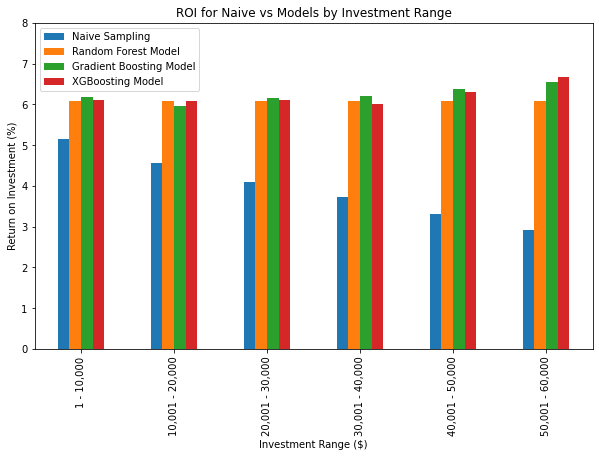

In [128]:
# graphing the results
# result2 = result2.set_index('Investment')
result2.plot(kind='bar', figsize=(10,6))
x_label =('1 - 10,000', '10,001 - 20,000', '20,001 - 30,000',
     '30,001 - 40,000', '40,001 - 50,000', '50,001 - 60,000')
x_pos = (0, 1, 2, 3, 4, 5)
plt.xticks(x_pos, x_label)
plt.ylim([0,8])
plt.xlabel('Investment Range ($)')
plt.ylabel('Return on Investment (%)')
plt.title('ROI for Naive vs Models by Investment Range')
plt.legend(loc=2)